In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
(train_image, train_label), (test_image, test_label)=tf.keras.datasets.fashion_mnist.load_data()

In [21]:
train_image = np.expand_dims(train_image, -1)
train_iamge = train_image/255
train_image1 = train_image[:50000,:]
test_image = train_image[50000:,:]
train_label1 = train_label[:50000]
test_label = train_label[50000:]
train_image1.shape

(50000, 28, 28, 1)

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128, (3, 3), 
                                 input_shape=(28, 28, 1), 
                                 activation='relu',
                                 padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(512, (5, 5), activation='relu', padding='same'))
model.add(tf.keras.layers.GlobalAveragePooling2D()) #类似Fallten
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 512)       3277312   
_________________________________________________________________
global_average_pooling2d_7 ( (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
history = model.fit(train_image1, train_label1, 
                    epochs=30, 
                    validation_data=(test_image,test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30


   32/50000 [..............................] - ETA: 8:24 - loss: 5.4701 - acc: 0.0625

  128/50000 [..............................] - ETA: 2:32 - loss: 46.4405 - acc: 0.0703

  224/50000 [..............................] - ETA: 1:42 - loss: 29.3120 - acc: 0.0893



  320/50000 [..............................] - ETA: 1:21 - loss: 21.2234 - acc: 0.0938



  416/50000 [..............................] - ETA: 1:10 - loss: 16.8492 - acc: 0.1058

  512/50000 [..............................] - ETA: 1:03 - loss: 14.1144 - acc: 0.1055



  608/50000 [..............................] - ETA: 59s - loss: 12.2407 - acc: 0.0921 

  704/50000 [..............................] - ETA: 55s - loss: 10.8607 - acc: 0.0966

  800/50000 [..............................] - ETA: 52s - loss: 9.8089 - acc: 0.0950 

  896/50000 [..............................] - ETA: 50s - loss: 8.9763 - acc: 0.1016

  992/50000 [..............................] - ETA: 48s - loss: 8.3037 - acc: 0.1038

 1088/50000 [..............................] - ETA: 47s - loss: 7.7498 - acc: 0.1085

 1184/50000 [..............................] - ETA: 45s - loss: 7.2844 - acc: 0.1115

 1280/50000 [..............................] - ETA: 44s - loss: 6.8917 - acc: 0.1086

 1376/50000 [..............................] - ETA: 43s - loss: 6.5461 - acc: 0.1090

 1472/50000 [..............................] - ETA: 43s - loss: 6.2529 - acc: 0.1094

 1568/50000 [..............................] - ETA: 42s - loss: 5.9910 - acc: 0.1161

 1664/50000 [..............................] - ETA: 41s - loss: 5.7564 - acc: 0.1184

 1760/50000 [>.............................] - ETA: 41s - loss: 5.5455 - acc: 0.1256

 1856/50000 [>.............................] - ETA: 40s - loss: 5.3598 - acc: 0.1309

 1952/50000 [>.............................] - ETA: 40s - loss: 5.1851 - acc: 0.1409

 2048/50000 [>.............................] - ETA: 39s - loss: 5.0269 - acc: 0.1484

 2144/50000 [>.............................] - ETA: 39s - loss: 4.8854 - acc: 0.1530

 2240/50000 [>.............................] - ETA: 38s - loss: 4.7526 - acc: 0.1598

 2336/50000 [>.............................] - ETA: 38s - loss: 4.6225 - acc: 0.1687

 2432/50000 [>.............................] - ETA: 38s - loss: 4.5083 - acc: 0.1743

 2528/50000 [>.............................] - ETA: 37s - loss: 4.3974 - acc: 0.1828

 2624/50000 [>.............................] - ETA: 37s - loss: 4.2948 - acc: 0.1890

 2720/50000 [>.............................] - ETA: 37s - loss: 4.1984 - acc: 0.1971

 2816/50000 [>.............................] - ETA: 36s - loss: 4.1095 - acc: 0.2049

 2912/50000 [>.............................] - ETA: 36s - loss: 4.0152 - acc: 0.2194

 3008/50000 [>.............................] - ETA: 36s - loss: 3.9325 - acc: 0.2287

 3104/50000 [>.............................] - ETA: 36s - loss: 3.8518 - acc: 0.2374

 3200/50000 [>.............................] - ETA: 35s - loss: 3.7811 - acc: 0.2438

 3296/50000 [>.............................] - ETA: 35s - loss: 3.7126 - acc: 0.2485

 3392/50000 [=>............................] - ETA: 35s - loss: 3.6515 - acc: 0.2529

 3488/50000 [=>............................] - ETA: 35s - loss: 3.5868 - acc: 0.2586

 3584/50000 [=>............................] - ETA: 35s - loss: 3.5201 - acc: 0.2673

 3680/50000 [=>............................] - ETA: 34s - loss: 3.4672 - acc: 0.2731

 3776/50000 [=>............................] - ETA: 34s - loss: 3.4056 - acc: 0.2826

 3872/50000 [=>............................] - ETA: 34s - loss: 3.3496 - acc: 0.2885

 3968/50000 [=>............................] - ETA: 34s - loss: 3.2969 - acc: 0.2959

 4064/50000 [=>............................] - ETA: 34s - loss: 3.2448 - acc: 0.3019

 4160/50000 [=>............................] - ETA: 34s - loss: 3.1947 - acc: 0.3089

 4256/50000 [=>............................] - ETA: 34s - loss: 3.1458 - acc: 0.3160

 4352/50000 [=>............................] - ETA: 33s - loss: 3.0958 - acc: 0.3251

 4448/50000 [=>............................] - ETA: 33s - loss: 3.0518 - acc: 0.3312

 4544/50000 [=>............................] - ETA: 33s - loss: 3.0172 - acc: 0.3349

 4640/50000 [=>............................] - ETA: 33s - loss: 2.9752 - acc: 0.3422

 4736/50000 [=>............................] - ETA: 33s - loss: 2.9340 - acc: 0.3488

 4832/50000 [=>............................] - ETA: 33s - loss: 2.8951 - acc: 0.3535

 4928/50000 [=>............................] - ETA: 33s - loss: 2.8555 - acc: 0.3598

 5024/50000 [==>...........................] - ETA: 32s - loss: 2.8219 - acc: 0.3639

 5120/50000 [==>...........................] - ETA: 32s - loss: 2.7905 - acc: 0.3688

 5216/50000 [==>...........................] - ETA: 32s - loss: 2.7601 - acc: 0.3733

 5312/50000 [==>...........................] - ETA: 32s - loss: 2.7287 - acc: 0.3778

 5408/50000 [==>...........................] - ETA: 32s - loss: 2.6984 - acc: 0.3818

 5504/50000 [==>...........................] - ETA: 32s - loss: 2.6668 - acc: 0.3868

 5600/50000 [==>...........................] - ETA: 32s - loss: 2.6366 - acc: 0.3925

 5696/50000 [==>...........................] - ETA: 32s - loss: 2.6096 - acc: 0.3962

 5792/50000 [==>...........................] - ETA: 31s - loss: 2.5800 - acc: 0.4012

 5888/50000 [==>...........................] - ETA: 31s - loss: 2.5534 - acc: 0.4057

 5984/50000 [==>...........................] - ETA: 31s - loss: 2.5257 - acc: 0.4106

 6080/50000 [==>...........................] - ETA: 31s - loss: 2.5010 - acc: 0.4133

 6176/50000 [==>...........................] - ETA: 31s - loss: 2.4764 - acc: 0.4166

 6272/50000 [==>...........................] - ETA: 31s - loss: 2.4533 - acc: 0.4192

 6368/50000 [==>...........................] - ETA: 31s - loss: 2.4300 - acc: 0.4221

 6464/50000 [==>...........................] - ETA: 31s - loss: 2.4087 - acc: 0.4254

 6560/50000 [==>...........................] - ETA: 31s - loss: 2.3877 - acc: 0.4282

 6656/50000 [==>...........................] - ETA: 31s - loss: 2.3649 - acc: 0.4319

 6752/50000 [===>..........................] - ETA: 30s - loss: 2.3426 - acc: 0.4357

 6848/50000 [===>..........................] - ETA: 30s - loss: 2.3248 - acc: 0.4385

 6944/50000 [===>..........................] - ETA: 30s - loss: 2.3044 - acc: 0.4423

 7040/50000 [===>..........................] - ETA: 30s - loss: 2.2841 - acc: 0.4459

 7136/50000 [===>..........................] - ETA: 30s - loss: 2.2644 - acc: 0.4494

 7232/50000 [===>..........................] - ETA: 30s - loss: 2.2451 - acc: 0.4524

 7328/50000 [===>..........................] - ETA: 30s - loss: 2.2284 - acc: 0.4552

 7424/50000 [===>..........................] - ETA: 30s - loss: 2.2119 - acc: 0.4586

 7520/50000 [===>..........................] - ETA: 30s - loss: 2.1959 - acc: 0.4612

 7616/50000 [===>..........................] - ETA: 30s - loss: 2.1809 - acc: 0.4640

 7712/50000 [===>..........................] - ETA: 30s - loss: 2.1646 - acc: 0.4664

 7808/50000 [===>..........................] - ETA: 29s - loss: 2.1479 - acc: 0.4700

 7904/50000 [===>..........................] - ETA: 29s - loss: 2.1338 - acc: 0.4720

 8000/50000 [===>..........................] - ETA: 29s - loss: 2.1162 - acc: 0.4762

 8096/50000 [===>..........................] - ETA: 29s - loss: 2.0992 - acc: 0.4795

 8192/50000 [===>..........................] - ETA: 29s - loss: 2.0839 - acc: 0.4822

 8288/50000 [===>..........................] - ETA: 29s - loss: 2.0691 - acc: 0.4847

 8384/50000 [====>.........................] - ETA: 29s - loss: 2.0537 - acc: 0.4880

 8480/50000 [====>.........................] - ETA: 29s - loss: 2.0412 - acc: 0.4901

 8576/50000 [====>.........................] - ETA: 29s - loss: 2.0263 - acc: 0.4934

 8672/50000 [====>.........................] - ETA: 29s - loss: 2.0125 - acc: 0.4952

 8768/50000 [====>.........................] - ETA: 29s - loss: 1.9970 - acc: 0.4985

 8864/50000 [====>.........................] - ETA: 28s - loss: 1.9825 - acc: 0.5017

 8960/50000 [====>.........................] - ETA: 28s - loss: 1.9672 - acc: 0.5048

 9056/50000 [====>.........................] - ETA: 28s - loss: 1.9555 - acc: 0.5072

 9152/50000 [====>.........................] - ETA: 28s - loss: 1.9420 - acc: 0.5095

 9248/50000 [====>.........................] - ETA: 28s - loss: 1.9307 - acc: 0.5110

 9344/50000 [====>.........................] - ETA: 28s - loss: 1.9196 - acc: 0.5136

 9440/50000 [====>.........................] - ETA: 28s - loss: 1.9084 - acc: 0.5153

 9536/50000 [====>.........................] - ETA: 28s - loss: 1.8962 - acc: 0.5174

 9632/50000 [====>.........................] - ETA: 28s - loss: 1.8855 - acc: 0.5197

 9728/50000 [====>.........................] - ETA: 28s - loss: 1.8743 - acc: 0.5225

 9824/50000 [====>.........................] - ETA: 28s - loss: 1.8628 - acc: 0.5244

 9920/50000 [====>.........................] - ETA: 28s - loss: 1.8528 - acc: 0.5262

10016/50000 [=====>........................] - ETA: 27s - loss: 1.8436 - acc: 0.5281

10112/50000 [=====>........................] - ETA: 27s - loss: 1.8331 - acc: 0.5306

10208/50000 [=====>........................] - ETA: 27s - loss: 1.8237 - acc: 0.5319

10304/50000 [=====>........................] - ETA: 27s - loss: 1.8148 - acc: 0.5337

10400/50000 [=====>........................] - ETA: 27s - loss: 1.8051 - acc: 0.5352

10496/50000 [=====>........................] - ETA: 27s - loss: 1.7954 - acc: 0.5369

10592/50000 [=====>........................] - ETA: 27s - loss: 1.7848 - acc: 0.5394

10688/50000 [=====>........................] - ETA: 27s - loss: 1.7748 - acc: 0.5417

10784/50000 [=====>........................] - ETA: 27s - loss: 1.7655 - acc: 0.5432

10880/50000 [=====>........................] - ETA: 27s - loss: 1.7562 - acc: 0.5454

10976/50000 [=====>........................] - ETA: 27s - loss: 1.7484 - acc: 0.5471

11072/50000 [=====>........................] - ETA: 27s - loss: 1.7396 - acc: 0.5483

11168/50000 [=====>........................] - ETA: 27s - loss: 1.7309 - acc: 0.5505

11264/50000 [=====>........................] - ETA: 26s - loss: 1.7243 - acc: 0.5514

11360/50000 [=====>........................] - ETA: 26s - loss: 1.7146 - acc: 0.5538

11456/50000 [=====>........................] - ETA: 26s - loss: 1.7062 - acc: 0.5553

11552/50000 [=====>........................] - ETA: 26s - loss: 1.6985 - acc: 0.5565

11648/50000 [=====>........................] - ETA: 26s - loss: 1.6892 - acc: 0.5587

11744/50000 [======>.......................] - ETA: 26s - loss: 1.6800 - acc: 0.5607

11840/50000 [======>.......................] - ETA: 26s - loss: 1.6728 - acc: 0.5621

11936/50000 [======>.......................] - ETA: 26s - loss: 1.6648 - acc: 0.5637

12032/50000 [======>.......................] - ETA: 26s - loss: 1.6573 - acc: 0.5649

12128/50000 [======>.......................] - ETA: 26s - loss: 1.6497 - acc: 0.5665

12224/50000 [======>.......................] - ETA: 26s - loss: 1.6438 - acc: 0.5668

12320/50000 [======>.......................] - ETA: 26s - loss: 1.6360 - acc: 0.5683

12416/50000 [======>.......................] - ETA: 26s - loss: 1.6276 - acc: 0.5702

12512/50000 [======>.......................] - ETA: 25s - loss: 1.6222 - acc: 0.5707

12608/50000 [======>.......................] - ETA: 25s - loss: 1.6148 - acc: 0.5723

12704/50000 [======>.......................] - ETA: 25s - loss: 1.6087 - acc: 0.5736

12800/50000 [======>.......................] - ETA: 25s - loss: 1.6019 - acc: 0.5747

12896/50000 [======>.......................] - ETA: 25s - loss: 1.5948 - acc: 0.5759

12992/50000 [======>.......................] - ETA: 25s - loss: 1.5886 - acc: 0.5772

13088/50000 [======>.......................] - ETA: 25s - loss: 1.5811 - acc: 0.5789

13184/50000 [======>.......................] - ETA: 25s - loss: 1.5734 - acc: 0.5808

13280/50000 [======>.......................] - ETA: 25s - loss: 1.5664 - acc: 0.5820

13376/50000 [=======>......................] - ETA: 25s - loss: 1.5600 - acc: 0.5833

13472/50000 [=======>......................] - ETA: 25s - loss: 1.5546 - acc: 0.5846

13568/50000 [=======>......................] - ETA: 25s - loss: 1.5478 - acc: 0.5859

13664/50000 [=======>......................] - ETA: 25s - loss: 1.5416 - acc: 0.5874

13760/50000 [=======>......................] - ETA: 25s - loss: 1.5356 - acc: 0.5885

13856/50000 [=======>......................] - ETA: 24s - loss: 1.5309 - acc: 0.5895

13952/50000 [=======>......................] - ETA: 24s - loss: 1.5255 - acc: 0.5907

14048/50000 [=======>......................] - ETA: 24s - loss: 1.5203 - acc: 0.5918

14144/50000 [=======>......................] - ETA: 24s - loss: 1.5149 - acc: 0.5927

14240/50000 [=======>......................] - ETA: 24s - loss: 1.5093 - acc: 0.5939

14336/50000 [=======>......................] - ETA: 24s - loss: 1.5047 - acc: 0.5948

14432/50000 [=======>......................] - ETA: 24s - loss: 1.4995 - acc: 0.5957

14528/50000 [=======>......................] - ETA: 24s - loss: 1.4952 - acc: 0.5968

14624/50000 [=======>......................] - ETA: 24s - loss: 1.4919 - acc: 0.5974

14720/50000 [=======>......................] - ETA: 24s - loss: 1.4876 - acc: 0.5979

14816/50000 [=======>......................] - ETA: 24s - loss: 1.4827 - acc: 0.5989

14912/50000 [=======>......................] - ETA: 24s - loss: 1.4776 - acc: 0.6001

15008/50000 [========>.....................] - ETA: 24s - loss: 1.4728 - acc: 0.6008

15104/50000 [========>.....................] - ETA: 24s - loss: 1.4677 - acc: 0.6020

15200/50000 [========>.....................] - ETA: 23s - loss: 1.4635 - acc: 0.6030

15296/50000 [========>.....................] - ETA: 23s - loss: 1.4588 - acc: 0.6039

15392/50000 [========>.....................] - ETA: 23s - loss: 1.4532 - acc: 0.6052

15488/50000 [========>.....................] - ETA: 23s - loss: 1.4484 - acc: 0.6062

15584/50000 [========>.....................] - ETA: 23s - loss: 1.4443 - acc: 0.6072

15680/50000 [========>.....................] - ETA: 23s - loss: 1.4398 - acc: 0.6078

15776/50000 [========>.....................] - ETA: 23s - loss: 1.4350 - acc: 0.6089

15872/50000 [========>.....................] - ETA: 23s - loss: 1.4299 - acc: 0.6099

15968/50000 [========>.....................] - ETA: 23s - loss: 1.4259 - acc: 0.6106

16064/50000 [========>.....................] - ETA: 23s - loss: 1.4209 - acc: 0.6117

16160/50000 [========>.....................] - ETA: 23s - loss: 1.4160 - acc: 0.6126

16256/50000 [========>.....................] - ETA: 23s - loss: 1.4124 - acc: 0.6133

16352/50000 [========>.....................] - ETA: 23s - loss: 1.4097 - acc: 0.6135

16448/50000 [========>.....................] - ETA: 23s - loss: 1.4064 - acc: 0.6140

16544/50000 [========>.....................] - ETA: 22s - loss: 1.4009 - acc: 0.6154

16640/50000 [========>.....................] - ETA: 22s - loss: 1.3969 - acc: 0.6163

16736/50000 [=========>....................] - ETA: 22s - loss: 1.3931 - acc: 0.6170

16832/50000 [=========>....................] - ETA: 22s - loss: 1.3887 - acc: 0.6180

16928/50000 [=========>....................] - ETA: 22s - loss: 1.3854 - acc: 0.6187

17024/50000 [=========>....................] - ETA: 22s - loss: 1.3815 - acc: 0.6192

17120/50000 [=========>....................] - ETA: 22s - loss: 1.3770 - acc: 0.6202

17216/50000 [=========>....................] - ETA: 22s - loss: 1.3731 - acc: 0.6209

17312/50000 [=========>....................] - ETA: 22s - loss: 1.3692 - acc: 0.6216

17408/50000 [=========>....................] - ETA: 22s - loss: 1.3648 - acc: 0.6225

17504/50000 [=========>....................] - ETA: 22s - loss: 1.3609 - acc: 0.6230

17600/50000 [=========>....................] - ETA: 22s - loss: 1.3570 - acc: 0.6236

17696/50000 [=========>....................] - ETA: 22s - loss: 1.3535 - acc: 0.6240

17792/50000 [=========>....................] - ETA: 22s - loss: 1.3494 - acc: 0.6247

17888/50000 [=========>....................] - ETA: 22s - loss: 1.3464 - acc: 0.6249

17984/50000 [=========>....................] - ETA: 21s - loss: 1.3431 - acc: 0.6253

18080/50000 [=========>....................] - ETA: 21s - loss: 1.3399 - acc: 0.6259

18176/50000 [=========>....................] - ETA: 21s - loss: 1.3366 - acc: 0.6264

18272/50000 [=========>....................] - ETA: 21s - loss: 1.3341 - acc: 0.6268

18368/50000 [==========>...................] - ETA: 21s - loss: 1.3302 - acc: 0.6276

18464/50000 [==========>...................] - ETA: 21s - loss: 1.3266 - acc: 0.6285

18560/50000 [==========>...................] - ETA: 21s - loss: 1.3237 - acc: 0.6289

18656/50000 [==========>...................] - ETA: 21s - loss: 1.3206 - acc: 0.6292

18752/50000 [==========>...................] - ETA: 21s - loss: 1.3171 - acc: 0.6301

18848/50000 [==========>...................] - ETA: 21s - loss: 1.3139 - acc: 0.6307

18944/50000 [==========>...................] - ETA: 21s - loss: 1.3107 - acc: 0.6315

19040/50000 [==========>...................] - ETA: 21s - loss: 1.3078 - acc: 0.6320

19136/50000 [==========>...................] - ETA: 21s - loss: 1.3045 - acc: 0.6328

19232/50000 [==========>...................] - ETA: 21s - loss: 1.3013 - acc: 0.6335

19328/50000 [==========>...................] - ETA: 20s - loss: 1.2986 - acc: 0.6340

19424/50000 [==========>...................] - ETA: 20s - loss: 1.2951 - acc: 0.6349

19520/50000 [==========>...................] - ETA: 20s - loss: 1.2926 - acc: 0.6356

19616/50000 [==========>...................] - ETA: 20s - loss: 1.2891 - acc: 0.6368

19712/50000 [==========>...................] - ETA: 20s - loss: 1.2860 - acc: 0.6372

19808/50000 [==========>...................] - ETA: 20s - loss: 1.2829 - acc: 0.6379

19904/50000 [==========>...................] - ETA: 20s - loss: 1.2811 - acc: 0.6382

20000/50000 [===========>..................] - ETA: 20s - loss: 1.2786 - acc: 0.6385

20096/50000 [===========>..................] - ETA: 20s - loss: 1.2757 - acc: 0.6391

20192/50000 [===========>..................] - ETA: 20s - loss: 1.2730 - acc: 0.6396

20288/50000 [===========>..................] - ETA: 20s - loss: 1.2702 - acc: 0.6402

20384/50000 [===========>..................] - ETA: 20s - loss: 1.2682 - acc: 0.6406

20480/50000 [===========>..................] - ETA: 20s - loss: 1.2656 - acc: 0.6409

20576/50000 [===========>..................] - ETA: 20s - loss: 1.2623 - acc: 0.6416

20672/50000 [===========>..................] - ETA: 20s - loss: 1.2587 - acc: 0.6425

20768/50000 [===========>..................] - ETA: 19s - loss: 1.2554 - acc: 0.6433

20864/50000 [===========>..................] - ETA: 19s - loss: 1.2524 - acc: 0.6439

20960/50000 [===========>..................] - ETA: 19s - loss: 1.2491 - acc: 0.6446

21056/50000 [===========>..................] - ETA: 19s - loss: 1.2461 - acc: 0.6453

21152/50000 [===========>..................] - ETA: 19s - loss: 1.2434 - acc: 0.6461

21248/50000 [===========>..................] - ETA: 19s - loss: 1.2400 - acc: 0.6469

21344/50000 [===========>..................] - ETA: 19s - loss: 1.2372 - acc: 0.6476

21440/50000 [===========>..................] - ETA: 19s - loss: 1.2345 - acc: 0.6481

21536/50000 [===========>..................] - ETA: 19s - loss: 1.2326 - acc: 0.6484

21632/50000 [===========>..................] - ETA: 19s - loss: 1.2300 - acc: 0.6490

21728/50000 [============>.................] - ETA: 19s - loss: 1.2274 - acc: 0.6494

21824/50000 [============>.................] - ETA: 19s - loss: 1.2243 - acc: 0.6502

21920/50000 [============>.................] - ETA: 19s - loss: 1.2215 - acc: 0.6508

22016/50000 [============>.................] - ETA: 19s - loss: 1.2187 - acc: 0.6513

22112/50000 [============>.................] - ETA: 19s - loss: 1.2168 - acc: 0.6520

22208/50000 [============>.................] - ETA: 18s - loss: 1.2139 - acc: 0.6526

22304/50000 [============>.................] - ETA: 18s - loss: 1.2115 - acc: 0.6532

22400/50000 [============>.................] - ETA: 18s - loss: 1.2085 - acc: 0.6538

22496/50000 [============>.................] - ETA: 18s - loss: 1.2060 - acc: 0.6543

22592/50000 [============>.................] - ETA: 18s - loss: 1.2031 - acc: 0.6551

22688/50000 [============>.................] - ETA: 18s - loss: 1.2008 - acc: 0.6554

22784/50000 [============>.................] - ETA: 18s - loss: 1.1976 - acc: 0.6562

22880/50000 [============>.................] - ETA: 18s - loss: 1.1947 - acc: 0.6569

22976/50000 [============>.................] - ETA: 18s - loss: 1.1919 - acc: 0.6576

23072/50000 [============>.................] - ETA: 18s - loss: 1.1890 - acc: 0.6583

23168/50000 [============>.................] - ETA: 18s - loss: 1.1857 - acc: 0.6591

23264/50000 [============>.................] - ETA: 18s - loss: 1.1836 - acc: 0.6594

23360/50000 [=============>................] - ETA: 18s - loss: 1.1818 - acc: 0.6596

23456/50000 [=============>................] - ETA: 18s - loss: 1.1790 - acc: 0.6601

23552/50000 [=============>................] - ETA: 18s - loss: 1.1761 - acc: 0.6608

23648/50000 [=============>................] - ETA: 17s - loss: 1.1735 - acc: 0.6613

23744/50000 [=============>................] - ETA: 17s - loss: 1.1710 - acc: 0.6617

23840/50000 [=============>................] - ETA: 17s - loss: 1.1686 - acc: 0.6621

23936/50000 [=============>................] - ETA: 17s - loss: 1.1667 - acc: 0.6623

24032/50000 [=============>................] - ETA: 17s - loss: 1.1650 - acc: 0.6627

24128/50000 [=============>................] - ETA: 17s - loss: 1.1625 - acc: 0.6633

24224/50000 [=============>................] - ETA: 17s - loss: 1.1601 - acc: 0.6638

24320/50000 [=============>................] - ETA: 17s - loss: 1.1584 - acc: 0.6642

24416/50000 [=============>................] - ETA: 17s - loss: 1.1557 - acc: 0.6649

24512/50000 [=============>................] - ETA: 17s - loss: 1.1531 - acc: 0.6655

24608/50000 [=============>................] - ETA: 17s - loss: 1.1506 - acc: 0.6662

24704/50000 [=============>................] - ETA: 17s - loss: 1.1487 - acc: 0.6666

24800/50000 [=============>................] - ETA: 17s - loss: 1.1466 - acc: 0.6670

24896/50000 [=============>................] - ETA: 17s - loss: 1.1444 - acc: 0.6673

24992/50000 [=============>................] - ETA: 17s - loss: 1.1416 - acc: 0.6679

25088/50000 [==============>...............] - ETA: 16s - loss: 1.1389 - acc: 0.6687

25184/50000 [==============>...............] - ETA: 16s - loss: 1.1364 - acc: 0.6694

25280/50000 [==============>...............] - ETA: 16s - loss: 1.1342 - acc: 0.6699

25376/50000 [==============>...............] - ETA: 16s - loss: 1.1321 - acc: 0.6703

25472/50000 [==============>...............] - ETA: 16s - loss: 1.1300 - acc: 0.6709

25568/50000 [==============>...............] - ETA: 16s - loss: 1.1285 - acc: 0.6712

25664/50000 [==============>...............] - ETA: 16s - loss: 1.1258 - acc: 0.6718

25760/50000 [==============>...............] - ETA: 16s - loss: 1.1236 - acc: 0.6721

25856/50000 [==============>...............] - ETA: 16s - loss: 1.1215 - acc: 0.6724

25952/50000 [==============>...............] - ETA: 16s - loss: 1.1190 - acc: 0.6730

26048/50000 [==============>...............] - ETA: 16s - loss: 1.1178 - acc: 0.6730

26144/50000 [==============>...............] - ETA: 16s - loss: 1.1153 - acc: 0.6737

26240/50000 [==============>...............] - ETA: 16s - loss: 1.1130 - acc: 0.6741

26336/50000 [==============>...............] - ETA: 16s - loss: 1.1113 - acc: 0.6746

26432/50000 [==============>...............] - ETA: 16s - loss: 1.1095 - acc: 0.6748

26528/50000 [==============>...............] - ETA: 15s - loss: 1.1075 - acc: 0.6754

26624/50000 [==============>...............] - ETA: 15s - loss: 1.1051 - acc: 0.6761

26720/50000 [===============>..............] - ETA: 15s - loss: 1.1031 - acc: 0.6766

26816/50000 [===============>..............] - ETA: 15s - loss: 1.1012 - acc: 0.6771

26912/50000 [===============>..............] - ETA: 15s - loss: 1.0994 - acc: 0.6775

27008/50000 [===============>..............] - ETA: 15s - loss: 1.0978 - acc: 0.6778

27104/50000 [===============>..............] - ETA: 15s - loss: 1.0960 - acc: 0.6781

27200/50000 [===============>..............] - ETA: 15s - loss: 1.0944 - acc: 0.6786

27296/50000 [===============>..............] - ETA: 15s - loss: 1.0924 - acc: 0.6792

27392/50000 [===============>..............] - ETA: 15s - loss: 1.0906 - acc: 0.6796

27488/50000 [===============>..............] - ETA: 15s - loss: 1.0890 - acc: 0.6798

27584/50000 [===============>..............] - ETA: 15s - loss: 1.0870 - acc: 0.6803

27680/50000 [===============>..............] - ETA: 15s - loss: 1.0856 - acc: 0.6806

27776/50000 [===============>..............] - ETA: 15s - loss: 1.0836 - acc: 0.6813

27872/50000 [===============>..............] - ETA: 15s - loss: 1.0825 - acc: 0.6819

27968/50000 [===============>..............] - ETA: 14s - loss: 1.0804 - acc: 0.6824

28064/50000 [===============>..............] - ETA: 14s - loss: 1.0784 - acc: 0.6827

28160/50000 [===============>..............] - ETA: 14s - loss: 1.0767 - acc: 0.6830

28256/50000 [===============>..............] - ETA: 14s - loss: 1.0752 - acc: 0.6834

28352/50000 [================>.............] - ETA: 14s - loss: 1.0735 - acc: 0.6838

28448/50000 [================>.............] - ETA: 14s - loss: 1.0715 - acc: 0.6843

28544/50000 [================>.............] - ETA: 14s - loss: 1.0696 - acc: 0.6848

28640/50000 [================>.............] - ETA: 14s - loss: 1.0683 - acc: 0.6850

28736/50000 [================>.............] - ETA: 14s - loss: 1.0662 - acc: 0.6854

28832/50000 [================>.............] - ETA: 14s - loss: 1.0648 - acc: 0.6856

28928/50000 [================>.............] - ETA: 14s - loss: 1.0629 - acc: 0.6859

29024/50000 [================>.............] - ETA: 14s - loss: 1.0613 - acc: 0.6863

29120/50000 [================>.............] - ETA: 14s - loss: 1.0594 - acc: 0.6869

29216/50000 [================>.............] - ETA: 14s - loss: 1.0576 - acc: 0.6873

29312/50000 [================>.............] - ETA: 14s - loss: 1.0557 - acc: 0.6878

29408/50000 [================>.............] - ETA: 13s - loss: 1.0537 - acc: 0.6882

29504/50000 [================>.............] - ETA: 13s - loss: 1.0521 - acc: 0.6886

29600/50000 [================>.............] - ETA: 13s - loss: 1.0513 - acc: 0.6887

29696/50000 [================>.............] - ETA: 13s - loss: 1.0499 - acc: 0.6890

29792/50000 [================>.............] - ETA: 13s - loss: 1.0488 - acc: 0.6892

29888/50000 [================>.............] - ETA: 13s - loss: 1.0480 - acc: 0.6893

29984/50000 [================>.............] - ETA: 13s - loss: 1.0466 - acc: 0.6897

30080/50000 [=================>............] - ETA: 13s - loss: 1.0451 - acc: 0.6899

30176/50000 [=================>............] - ETA: 13s - loss: 1.0434 - acc: 0.6903

30272/50000 [=================>............] - ETA: 13s - loss: 1.0422 - acc: 0.6907

30368/50000 [=================>............] - ETA: 13s - loss: 1.0409 - acc: 0.6908

30464/50000 [=================>............] - ETA: 13s - loss: 1.0391 - acc: 0.6912

30560/50000 [=================>............] - ETA: 13s - loss: 1.0378 - acc: 0.6917

30656/50000 [=================>............] - ETA: 13s - loss: 1.0361 - acc: 0.6922

30752/50000 [=================>............] - ETA: 13s - loss: 1.0346 - acc: 0.6926

30848/50000 [=================>............] - ETA: 13s - loss: 1.0329 - acc: 0.6930

30944/50000 [=================>............] - ETA: 12s - loss: 1.0315 - acc: 0.6933

31040/50000 [=================>............] - ETA: 12s - loss: 1.0300 - acc: 0.6937

31136/50000 [=================>............] - ETA: 12s - loss: 1.0290 - acc: 0.6938

31232/50000 [=================>............] - ETA: 12s - loss: 1.0279 - acc: 0.6940

31328/50000 [=================>............] - ETA: 12s - loss: 1.0268 - acc: 0.6941

31424/50000 [=================>............] - ETA: 12s - loss: 1.0251 - acc: 0.6946

31520/50000 [=================>............] - ETA: 12s - loss: 1.0243 - acc: 0.6949

31616/50000 [=================>............] - ETA: 12s - loss: 1.0233 - acc: 0.6949

31712/50000 [==================>...........] - ETA: 12s - loss: 1.0220 - acc: 0.6953

31808/50000 [==================>...........] - ETA: 12s - loss: 1.0205 - acc: 0.6956

31904/50000 [==================>...........] - ETA: 12s - loss: 1.0189 - acc: 0.6959

32000/50000 [==================>...........] - ETA: 12s - loss: 1.0177 - acc: 0.6961

32096/50000 [==================>...........] - ETA: 12s - loss: 1.0168 - acc: 0.6963

32192/50000 [==================>...........] - ETA: 12s - loss: 1.0153 - acc: 0.6968

32288/50000 [==================>...........] - ETA: 12s - loss: 1.0142 - acc: 0.6971

32384/50000 [==================>...........] - ETA: 11s - loss: 1.0125 - acc: 0.6975

32480/50000 [==================>...........] - ETA: 11s - loss: 1.0110 - acc: 0.6979

32576/50000 [==================>...........] - ETA: 11s - loss: 1.0095 - acc: 0.6984

32672/50000 [==================>...........] - ETA: 11s - loss: 1.0084 - acc: 0.6986

32768/50000 [==================>...........] - ETA: 11s - loss: 1.0069 - acc: 0.6989

32864/50000 [==================>...........] - ETA: 11s - loss: 1.0058 - acc: 0.6993

32960/50000 [==================>...........] - ETA: 11s - loss: 1.0040 - acc: 0.6998

33056/50000 [==================>...........] - ETA: 11s - loss: 1.0027 - acc: 0.7001

33152/50000 [==================>...........] - ETA: 11s - loss: 1.0015 - acc: 0.7003

33248/50000 [==================>...........] - ETA: 11s - loss: 1.0000 - acc: 0.7007

33344/50000 [===================>..........] - ETA: 11s - loss: 0.9996 - acc: 0.7008

33440/50000 [===================>..........] - ETA: 11s - loss: 0.9984 - acc: 0.7012

33536/50000 [===================>..........] - ETA: 11s - loss: 0.9969 - acc: 0.7016

33632/50000 [===================>..........] - ETA: 11s - loss: 0.9958 - acc: 0.7020

33728/50000 [===================>..........] - ETA: 11s - loss: 0.9949 - acc: 0.7021

33824/50000 [===================>..........] - ETA: 10s - loss: 0.9941 - acc: 0.7023

33920/50000 [===================>..........] - ETA: 10s - loss: 0.9928 - acc: 0.7025

34016/50000 [===================>..........] - ETA: 10s - loss: 0.9916 - acc: 0.7028

34112/50000 [===================>..........] - ETA: 10s - loss: 0.9903 - acc: 0.7031

34208/50000 [===================>..........] - ETA: 10s - loss: 0.9890 - acc: 0.7035

34304/50000 [===================>..........] - ETA: 10s - loss: 0.9878 - acc: 0.7038

34400/50000 [===================>..........] - ETA: 10s - loss: 0.9869 - acc: 0.7041

34496/50000 [===================>..........] - ETA: 10s - loss: 0.9858 - acc: 0.7043

34592/50000 [===================>..........] - ETA: 10s - loss: 0.9847 - acc: 0.7046

34688/50000 [===================>..........] - ETA: 10s - loss: 0.9836 - acc: 0.7049

34784/50000 [===================>..........] - ETA: 10s - loss: 0.9824 - acc: 0.7053

34880/50000 [===================>..........] - ETA: 10s - loss: 0.9814 - acc: 0.7055

34976/50000 [===================>..........] - ETA: 10s - loss: 0.9806 - acc: 0.7055

35072/50000 [====================>.........] - ETA: 10s - loss: 0.9793 - acc: 0.7059

35168/50000 [====================>.........] - ETA: 10s - loss: 0.9779 - acc: 0.7062

35264/50000 [====================>.........] - ETA: 9s - loss: 0.9770 - acc: 0.7063 

35360/50000 [====================>.........] - ETA: 9s - loss: 0.9759 - acc: 0.7065

35456/50000 [====================>.........] - ETA: 9s - loss: 0.9745 - acc: 0.7069

35552/50000 [====================>.........] - ETA: 9s - loss: 0.9732 - acc: 0.7073

35648/50000 [====================>.........] - ETA: 9s - loss: 0.9718 - acc: 0.7076

35744/50000 [====================>.........] - ETA: 9s - loss: 0.9710 - acc: 0.7077

35840/50000 [====================>.........] - ETA: 9s - loss: 0.9698 - acc: 0.7080

35936/50000 [====================>.........] - ETA: 9s - loss: 0.9686 - acc: 0.7083

36032/50000 [====================>.........] - ETA: 9s - loss: 0.9677 - acc: 0.7085

36128/50000 [====================>.........] - ETA: 9s - loss: 0.9667 - acc: 0.7088

36224/50000 [====================>.........] - ETA: 9s - loss: 0.9656 - acc: 0.7089

36320/50000 [====================>.........] - ETA: 9s - loss: 0.9643 - acc: 0.7093

36416/50000 [====================>.........] - ETA: 9s - loss: 0.9633 - acc: 0.7095

36512/50000 [====================>.........] - ETA: 9s - loss: 0.9622 - acc: 0.7097

36608/50000 [====================>.........] - ETA: 9s - loss: 0.9611 - acc: 0.7101

36704/50000 [=====================>........] - ETA: 9s - loss: 0.9598 - acc: 0.7104

36800/50000 [=====================>........] - ETA: 8s - loss: 0.9583 - acc: 0.7108

36896/50000 [=====================>........] - ETA: 8s - loss: 0.9569 - acc: 0.7112

36992/50000 [=====================>........] - ETA: 8s - loss: 0.9557 - acc: 0.7115

37088/50000 [=====================>........] - ETA: 8s - loss: 0.9548 - acc: 0.7115

37184/50000 [=====================>........] - ETA: 8s - loss: 0.9534 - acc: 0.7118

37280/50000 [=====================>........] - ETA: 8s - loss: 0.9526 - acc: 0.7120

37376/50000 [=====================>........] - ETA: 8s - loss: 0.9513 - acc: 0.7125

37472/50000 [=====================>........] - ETA: 8s - loss: 0.9503 - acc: 0.7127

37568/50000 [=====================>........] - ETA: 8s - loss: 0.9490 - acc: 0.7131

37664/50000 [=====================>........] - ETA: 8s - loss: 0.9484 - acc: 0.7132

37760/50000 [=====================>........] - ETA: 8s - loss: 0.9474 - acc: 0.7134

37856/50000 [=====================>........] - ETA: 8s - loss: 0.9467 - acc: 0.7135

37952/50000 [=====================>........] - ETA: 8s - loss: 0.9457 - acc: 0.7136

38048/50000 [=====================>........] - ETA: 8s - loss: 0.9443 - acc: 0.7139

38144/50000 [=====================>........] - ETA: 8s - loss: 0.9434 - acc: 0.7142

38240/50000 [=====================>........] - ETA: 7s - loss: 0.9423 - acc: 0.7146

38336/50000 [======================>.......] - ETA: 7s - loss: 0.9416 - acc: 0.7148

38432/50000 [======================>.......] - ETA: 7s - loss: 0.9409 - acc: 0.7149

38528/50000 [======================>.......] - ETA: 7s - loss: 0.9399 - acc: 0.7153

38624/50000 [======================>.......] - ETA: 7s - loss: 0.9388 - acc: 0.7156

38720/50000 [======================>.......] - ETA: 7s - loss: 0.9376 - acc: 0.7159

38816/50000 [======================>.......] - ETA: 7s - loss: 0.9368 - acc: 0.7160

38912/50000 [======================>.......] - ETA: 7s - loss: 0.9358 - acc: 0.7163

39008/50000 [======================>.......] - ETA: 7s - loss: 0.9348 - acc: 0.7166

39104/50000 [======================>.......] - ETA: 7s - loss: 0.9338 - acc: 0.7169

39200/50000 [======================>.......] - ETA: 7s - loss: 0.9328 - acc: 0.7170

39296/50000 [======================>.......] - ETA: 7s - loss: 0.9316 - acc: 0.7172

39392/50000 [======================>.......] - ETA: 7s - loss: 0.9304 - acc: 0.7176

39488/50000 [======================>.......] - ETA: 7s - loss: 0.9295 - acc: 0.7179

39584/50000 [======================>.......] - ETA: 7s - loss: 0.9287 - acc: 0.7180

39680/50000 [======================>.......] - ETA: 6s - loss: 0.9278 - acc: 0.7181

39776/50000 [======================>.......] - ETA: 6s - loss: 0.9266 - acc: 0.7184

39872/50000 [======================>.......] - ETA: 6s - loss: 0.9260 - acc: 0.7184

39968/50000 [======================>.......] - ETA: 6s - loss: 0.9252 - acc: 0.7186

40064/50000 [=======================>......] - ETA: 6s - loss: 0.9242 - acc: 0.7188

40160/50000 [=======================>......] - ETA: 6s - loss: 0.9232 - acc: 0.7192

40256/50000 [=======================>......] - ETA: 6s - loss: 0.9219 - acc: 0.7196

40352/50000 [=======================>......] - ETA: 6s - loss: 0.9207 - acc: 0.7199

40448/50000 [=======================>......] - ETA: 6s - loss: 0.9197 - acc: 0.7201

40544/50000 [=======================>......] - ETA: 6s - loss: 0.9187 - acc: 0.7203

40640/50000 [=======================>......] - ETA: 6s - loss: 0.9177 - acc: 0.7206

40736/50000 [=======================>......] - ETA: 6s - loss: 0.9165 - acc: 0.7210

40832/50000 [=======================>......] - ETA: 6s - loss: 0.9158 - acc: 0.7211

40928/50000 [=======================>......] - ETA: 6s - loss: 0.9151 - acc: 0.7212

41024/50000 [=======================>......] - ETA: 6s - loss: 0.9145 - acc: 0.7213

41120/50000 [=======================>......] - ETA: 6s - loss: 0.9137 - acc: 0.7214

41216/50000 [=======================>......] - ETA: 5s - loss: 0.9123 - acc: 0.7219

41312/50000 [=======================>......] - ETA: 5s - loss: 0.9115 - acc: 0.7220

41408/50000 [=======================>......] - ETA: 5s - loss: 0.9102 - acc: 0.7224

41504/50000 [=======================>......] - ETA: 5s - loss: 0.9092 - acc: 0.7226

41600/50000 [=======================>......] - ETA: 5s - loss: 0.9081 - acc: 0.7228

41696/50000 [========================>.....] - ETA: 5s - loss: 0.9071 - acc: 0.7231

41792/50000 [========================>.....] - ETA: 5s - loss: 0.9060 - acc: 0.7233

41888/50000 [========================>.....] - ETA: 5s - loss: 0.9053 - acc: 0.7236

41984/50000 [========================>.....] - ETA: 5s - loss: 0.9043 - acc: 0.7238

42080/50000 [========================>.....] - ETA: 5s - loss: 0.9036 - acc: 0.7239

42176/50000 [========================>.....] - ETA: 5s - loss: 0.9023 - acc: 0.7242

42272/50000 [========================>.....] - ETA: 5s - loss: 0.9017 - acc: 0.7244

42368/50000 [========================>.....] - ETA: 5s - loss: 0.9008 - acc: 0.7245

42464/50000 [========================>.....] - ETA: 5s - loss: 0.8998 - acc: 0.7249

42560/50000 [========================>.....] - ETA: 5s - loss: 0.8989 - acc: 0.7251

42656/50000 [========================>.....] - ETA: 4s - loss: 0.8982 - acc: 0.7252

42752/50000 [========================>.....] - ETA: 4s - loss: 0.8973 - acc: 0.7253

42848/50000 [========================>.....] - ETA: 4s - loss: 0.8966 - acc: 0.7254

42944/50000 [========================>.....] - ETA: 4s - loss: 0.8953 - acc: 0.7258

43040/50000 [========================>.....] - ETA: 4s - loss: 0.8945 - acc: 0.7260

43136/50000 [========================>.....] - ETA: 4s - loss: 0.8936 - acc: 0.7262

43232/50000 [========================>.....] - ETA: 4s - loss: 0.8924 - acc: 0.7265

43328/50000 [========================>.....] - ETA: 4s - loss: 0.8913 - acc: 0.7268

43424/50000 [=========================>....] - ETA: 4s - loss: 0.8903 - acc: 0.7271

43520/50000 [=========================>....] - ETA: 4s - loss: 0.8892 - acc: 0.7273

43616/50000 [=========================>....] - ETA: 4s - loss: 0.8886 - acc: 0.7273

43712/50000 [=========================>....] - ETA: 4s - loss: 0.8874 - acc: 0.7277

43808/50000 [=========================>....] - ETA: 4s - loss: 0.8866 - acc: 0.7278

43904/50000 [=========================>....] - ETA: 4s - loss: 0.8858 - acc: 0.7280

44000/50000 [=========================>....] - ETA: 4s - loss: 0.8851 - acc: 0.7283

44096/50000 [=========================>....] - ETA: 3s - loss: 0.8839 - acc: 0.7286

44192/50000 [=========================>....] - ETA: 3s - loss: 0.8832 - acc: 0.7288

44288/50000 [=========================>....] - ETA: 3s - loss: 0.8826 - acc: 0.7288

44384/50000 [=========================>....] - ETA: 3s - loss: 0.8819 - acc: 0.7290

44480/50000 [=========================>....] - ETA: 3s - loss: 0.8810 - acc: 0.7292

44576/50000 [=========================>....] - ETA: 3s - loss: 0.8801 - acc: 0.7295

44672/50000 [=========================>....] - ETA: 3s - loss: 0.8791 - acc: 0.7297

44768/50000 [=========================>....] - ETA: 3s - loss: 0.8784 - acc: 0.7299

44864/50000 [=========================>....] - ETA: 3s - loss: 0.8776 - acc: 0.7300

44960/50000 [=========================>....] - ETA: 3s - loss: 0.8768 - acc: 0.7301

45056/50000 [==========================>...] - ETA: 3s - loss: 0.8759 - acc: 0.7304

45152/50000 [==========================>...] - ETA: 3s - loss: 0.8753 - acc: 0.7305

45248/50000 [==========================>...] - ETA: 3s - loss: 0.8742 - acc: 0.7308

45344/50000 [==========================>...] - ETA: 3s - loss: 0.8734 - acc: 0.7309

45440/50000 [==========================>...] - ETA: 3s - loss: 0.8727 - acc: 0.7310

45536/50000 [==========================>...] - ETA: 3s - loss: 0.8719 - acc: 0.7312

45632/50000 [==========================>...] - ETA: 2s - loss: 0.8711 - acc: 0.7314

45728/50000 [==========================>...] - ETA: 2s - loss: 0.8704 - acc: 0.7315

45824/50000 [==========================>...] - ETA: 2s - loss: 0.8698 - acc: 0.7317

45920/50000 [==========================>...] - ETA: 2s - loss: 0.8691 - acc: 0.7318

46016/50000 [==========================>...] - ETA: 2s - loss: 0.8683 - acc: 0.7320

46112/50000 [==========================>...] - ETA: 2s - loss: 0.8674 - acc: 0.7323

46208/50000 [==========================>...] - ETA: 2s - loss: 0.8664 - acc: 0.7325

46304/50000 [==========================>...] - ETA: 2s - loss: 0.8657 - acc: 0.7326

46400/50000 [==========================>...] - ETA: 2s - loss: 0.8650 - acc: 0.7328

46496/50000 [==========================>...] - ETA: 2s - loss: 0.8640 - acc: 0.7331

46592/50000 [==========================>...] - ETA: 2s - loss: 0.8635 - acc: 0.7333

46688/50000 [===========================>..] - ETA: 2s - loss: 0.8626 - acc: 0.7336

46784/50000 [===========================>..] - ETA: 2s - loss: 0.8619 - acc: 0.7337

46880/50000 [===========================>..] - ETA: 2s - loss: 0.8616 - acc: 0.7337

46976/50000 [===========================>..] - ETA: 2s - loss: 0.8608 - acc: 0.7339

47072/50000 [===========================>..] - ETA: 1s - loss: 0.8602 - acc: 0.7340

47168/50000 [===========================>..] - ETA: 1s - loss: 0.8596 - acc: 0.7340

47264/50000 [===========================>..] - ETA: 1s - loss: 0.8589 - acc: 0.7342

47360/50000 [===========================>..] - ETA: 1s - loss: 0.8585 - acc: 0.7342

47456/50000 [===========================>..] - ETA: 1s - loss: 0.8579 - acc: 0.7343

47552/50000 [===========================>..] - ETA: 1s - loss: 0.8574 - acc: 0.7345

47648/50000 [===========================>..] - ETA: 1s - loss: 0.8566 - acc: 0.7348

47744/50000 [===========================>..] - ETA: 1s - loss: 0.8556 - acc: 0.7351

47840/50000 [===========================>..] - ETA: 1s - loss: 0.8547 - acc: 0.7354

47936/50000 [===========================>..] - ETA: 1s - loss: 0.8540 - acc: 0.7355

48032/50000 [===========================>..] - ETA: 1s - loss: 0.8536 - acc: 0.7357

48128/50000 [===========================>..] - ETA: 1s - loss: 0.8533 - acc: 0.7356

48224/50000 [===========================>..] - ETA: 1s - loss: 0.8526 - acc: 0.7358

48320/50000 [===========================>..] - ETA: 1s - loss: 0.8520 - acc: 0.7360

48416/50000 [============================>.] - ETA: 1s - loss: 0.8513 - acc: 0.7363

48512/50000 [============================>.] - ETA: 1s - loss: 0.8508 - acc: 0.7363

48608/50000 [============================>.] - ETA: 0s - loss: 0.8498 - acc: 0.7366

48704/50000 [============================>.] - ETA: 0s - loss: 0.8490 - acc: 0.7368

48800/50000 [============================>.] - ETA: 0s - loss: 0.8483 - acc: 0.7370

48896/50000 [============================>.] - ETA: 0s - loss: 0.8476 - acc: 0.7373

48992/50000 [============================>.] - ETA: 0s - loss: 0.8470 - acc: 0.7373

49088/50000 [============================>.] - ETA: 0s - loss: 0.8463 - acc: 0.7376

49184/50000 [============================>.] - ETA: 0s - loss: 0.8455 - acc: 0.7377

49280/50000 [============================>.] - ETA: 0s - loss: 0.8452 - acc: 0.7377

49376/50000 [============================>.] - ETA: 0s - loss: 0.8446 - acc: 0.7378

49472/50000 [============================>.] - ETA: 0s - loss: 0.8442 - acc: 0.7378

49568/50000 [============================>.] - ETA: 0s - loss: 0.8439 - acc: 0.7379

49664/50000 [============================>.] - ETA: 0s - loss: 0.8437 - acc: 0.7378

49760/50000 [============================>.] - ETA: 0s - loss: 0.8430 - acc: 0.7379

49856/50000 [============================>.] - ETA: 0s - loss: 0.8423 - acc: 0.7380

49952/50000 [============================>.] - ETA: 0s - loss: 0.8416 - acc: 0.7382

50000/50000 [==============================] - 36s 722us/sample - loss: 0.8411 - acc: 0.7383 - val_loss: 0.4434 - val_acc: 0.8464


Epoch 2/30
   32/50000 [..............................] - ETA: 35s - loss: 0.3835 - acc: 0.8750

  128/50000 [..............................] - ETA: 33s - loss: 0.4892 - acc: 0.8203

  224/50000 [..............................] - ETA: 33s - loss: 0.5089 - acc: 0.8304

  320/50000 [..............................] - ETA: 33s - loss: 0.5968 - acc: 0.8125

  416/50000 [..............................] - ETA: 33s - loss: 0.5441 - acc: 0.8317

  512/50000 [..............................] - ETA: 33s - loss: 0.5670 - acc: 0.8184

  608/50000 [..............................] - ETA: 33s - loss: 0.5555 - acc: 0.8158

  704/50000 [..............................] - ETA: 33s - loss: 0.5734 - acc: 0.8082

  800/50000 [..............................] - ETA: 32s - loss: 0.5883 - acc: 0.8037

  896/50000 [..............................] - ETA: 32s - loss: 0.5721 - acc: 0.8080

  992/50000 [..............................] - ETA: 32s - loss: 0.5779 - acc: 0.8044

 1088/50000 [..............................] - ETA: 32s - loss: 0.5603 - acc: 0.8134

 1184/50000 [..............................] - ETA: 32s - loss: 0.5470 - acc: 0.8159

 1280/50000 [..............................] - ETA: 32s - loss: 0.5386 - acc: 0.8188

 1376/50000 [..............................] - ETA: 32s - loss: 0.5371 - acc: 0.8169

 1472/50000 [..............................] - ETA: 32s - loss: 0.5419 - acc: 0.8173

 1568/50000 [..............................] - ETA: 32s - loss: 0.5399 - acc: 0.8195

 1664/50000 [..............................] - ETA: 32s - loss: 0.5421 - acc: 0.8173

 1760/50000 [>.............................] - ETA: 32s - loss: 0.5348 - acc: 0.8193

 1856/50000 [>.............................] - ETA: 32s - loss: 0.5273 - acc: 0.8217

 1952/50000 [>.............................] - ETA: 32s - loss: 0.5182 - acc: 0.8227

 2048/50000 [>.............................] - ETA: 32s - loss: 0.5184 - acc: 0.8223

 2144/50000 [>.............................] - ETA: 31s - loss: 0.5215 - acc: 0.8223

 2240/50000 [>.............................] - ETA: 31s - loss: 0.5149 - acc: 0.8241

 2336/50000 [>.............................] - ETA: 31s - loss: 0.5145 - acc: 0.8232

 2432/50000 [>.............................] - ETA: 31s - loss: 0.5156 - acc: 0.8240

 2528/50000 [>.............................] - ETA: 31s - loss: 0.5139 - acc: 0.8252

 2624/50000 [>.............................] - ETA: 31s - loss: 0.5149 - acc: 0.8255

 2720/50000 [>.............................] - ETA: 31s - loss: 0.5177 - acc: 0.8250

 2816/50000 [>.............................] - ETA: 31s - loss: 0.5197 - acc: 0.8242

 2912/50000 [>.............................] - ETA: 31s - loss: 0.5137 - acc: 0.8269

 3008/50000 [>.............................] - ETA: 31s - loss: 0.5144 - acc: 0.8258

 3104/50000 [>.............................] - ETA: 31s - loss: 0.5140 - acc: 0.8251

 3200/50000 [>.............................] - ETA: 31s - loss: 0.5158 - acc: 0.8244

 3296/50000 [>.............................] - ETA: 31s - loss: 0.5153 - acc: 0.8234

 3392/50000 [=>............................] - ETA: 31s - loss: 0.5207 - acc: 0.8219

 3488/50000 [=>............................] - ETA: 31s - loss: 0.5154 - acc: 0.8234

 3584/50000 [=>............................] - ETA: 30s - loss: 0.5174 - acc: 0.8225

 3680/50000 [=>............................] - ETA: 30s - loss: 0.5142 - acc: 0.8234

 3776/50000 [=>............................] - ETA: 30s - loss: 0.5135 - acc: 0.8244

 3872/50000 [=>............................] - ETA: 30s - loss: 0.5129 - acc: 0.8249

 3968/50000 [=>............................] - ETA: 30s - loss: 0.5101 - acc: 0.8256

 4064/50000 [=>............................] - ETA: 30s - loss: 0.5077 - acc: 0.8265

 4160/50000 [=>............................] - ETA: 30s - loss: 0.5062 - acc: 0.8267

 4256/50000 [=>............................] - ETA: 30s - loss: 0.5075 - acc: 0.8254

 4352/50000 [=>............................] - ETA: 30s - loss: 0.5120 - acc: 0.8228

 4448/50000 [=>............................] - ETA: 30s - loss: 0.5124 - acc: 0.8222

 4544/50000 [=>............................] - ETA: 30s - loss: 0.5123 - acc: 0.8226

 4640/50000 [=>............................] - ETA: 30s - loss: 0.5090 - acc: 0.8231

 4736/50000 [=>............................] - ETA: 30s - loss: 0.5112 - acc: 0.8220

 4832/50000 [=>............................] - ETA: 30s - loss: 0.5079 - acc: 0.8233

 4928/50000 [=>............................] - ETA: 30s - loss: 0.5063 - acc: 0.8226

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.5070 - acc: 0.8225

 5120/50000 [==>...........................] - ETA: 29s - loss: 0.5084 - acc: 0.8213

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.5074 - acc: 0.8219

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.5056 - acc: 0.8229

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.5050 - acc: 0.8229

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.5079 - acc: 0.8219

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.5055 - acc: 0.8223

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.5040 - acc: 0.8227

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.5032 - acc: 0.8230

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.4997 - acc: 0.8244

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.4997 - acc: 0.8249

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.5001 - acc: 0.8247

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.4980 - acc: 0.8251

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.4984 - acc: 0.8253

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.4986 - acc: 0.8260

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.4966 - acc: 0.8267

 6560/50000 [==>...........................] - ETA: 28s - loss: 0.4968 - acc: 0.8256

 6656/50000 [==>...........................] - ETA: 28s - loss: 0.4972 - acc: 0.8256

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.4974 - acc: 0.8254

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.4974 - acc: 0.8255

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.4970 - acc: 0.8259

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.4963 - acc: 0.8259

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.4946 - acc: 0.8264

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.4924 - acc: 0.8274

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.4918 - acc: 0.8275

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.4915 - acc: 0.8279

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.4920 - acc: 0.8273

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.4909 - acc: 0.8280

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.4907 - acc: 0.8282

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.4911 - acc: 0.8277

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.4919 - acc: 0.8274

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.4902 - acc: 0.8278

 8096/50000 [===>..........................] - ETA: 27s - loss: 0.4877 - acc: 0.8288

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.4870 - acc: 0.8293

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.4876 - acc: 0.8293

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.4875 - acc: 0.8294

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.4871 - acc: 0.8298

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.4879 - acc: 0.8294

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.4892 - acc: 0.8292

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.4899 - acc: 0.8287

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.4897 - acc: 0.8284

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.4881 - acc: 0.8290

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.4877 - acc: 0.8292

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.4892 - acc: 0.8290

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.4891 - acc: 0.8290

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.4878 - acc: 0.8296

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.4873 - acc: 0.8299

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.4879 - acc: 0.8299

 9632/50000 [====>.........................] - ETA: 26s - loss: 0.4890 - acc: 0.8292

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.4888 - acc: 0.8293

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.4880 - acc: 0.8296

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.4883 - acc: 0.8295

10016/50000 [=====>........................] - ETA: 26s - loss: 0.4870 - acc: 0.8300

10112/50000 [=====>........................] - ETA: 26s - loss: 0.4861 - acc: 0.8301

10208/50000 [=====>........................] - ETA: 26s - loss: 0.4848 - acc: 0.8307

10304/50000 [=====>........................] - ETA: 26s - loss: 0.4868 - acc: 0.8304

10400/50000 [=====>........................] - ETA: 26s - loss: 0.4863 - acc: 0.8305

10496/50000 [=====>........................] - ETA: 26s - loss: 0.4871 - acc: 0.8303

10592/50000 [=====>........................] - ETA: 26s - loss: 0.4865 - acc: 0.8303

10688/50000 [=====>........................] - ETA: 26s - loss: 0.4859 - acc: 0.8304

10784/50000 [=====>........................] - ETA: 26s - loss: 0.4856 - acc: 0.8305

10880/50000 [=====>........................] - ETA: 26s - loss: 0.4854 - acc: 0.8303

10976/50000 [=====>........................] - ETA: 26s - loss: 0.4854 - acc: 0.8304

11072/50000 [=====>........................] - ETA: 25s - loss: 0.4846 - acc: 0.8307

11168/50000 [=====>........................] - ETA: 25s - loss: 0.4849 - acc: 0.8301

11264/50000 [=====>........................] - ETA: 25s - loss: 0.4852 - acc: 0.8298

11360/50000 [=====>........................] - ETA: 25s - loss: 0.4848 - acc: 0.8298

11456/50000 [=====>........................] - ETA: 25s - loss: 0.4841 - acc: 0.8300

11552/50000 [=====>........................] - ETA: 25s - loss: 0.4843 - acc: 0.8298

11648/50000 [=====>........................] - ETA: 25s - loss: 0.4844 - acc: 0.8296

11744/50000 [======>.......................] - ETA: 25s - loss: 0.4844 - acc: 0.8298

11840/50000 [======>.......................] - ETA: 25s - loss: 0.4841 - acc: 0.8301

11936/50000 [======>.......................] - ETA: 25s - loss: 0.4836 - acc: 0.8302

12032/50000 [======>.......................] - ETA: 25s - loss: 0.4834 - acc: 0.8301

12128/50000 [======>.......................] - ETA: 25s - loss: 0.4827 - acc: 0.8303

12224/50000 [======>.......................] - ETA: 25s - loss: 0.4826 - acc: 0.8303

12320/50000 [======>.......................] - ETA: 25s - loss: 0.4833 - acc: 0.8302

12416/50000 [======>.......................] - ETA: 25s - loss: 0.4821 - acc: 0.8305

12512/50000 [======>.......................] - ETA: 25s - loss: 0.4817 - acc: 0.8306

12608/50000 [======>.......................] - ETA: 24s - loss: 0.4818 - acc: 0.8305

12704/50000 [======>.......................] - ETA: 24s - loss: 0.4808 - acc: 0.8306

12800/50000 [======>.......................] - ETA: 24s - loss: 0.4813 - acc: 0.8306

12896/50000 [======>.......................] - ETA: 24s - loss: 0.4818 - acc: 0.8302

12992/50000 [======>.......................] - ETA: 24s - loss: 0.4819 - acc: 0.8305

13088/50000 [======>.......................] - ETA: 24s - loss: 0.4846 - acc: 0.8298

13184/50000 [======>.......................] - ETA: 24s - loss: 0.4855 - acc: 0.8294

13280/50000 [======>.......................] - ETA: 24s - loss: 0.4863 - acc: 0.8291

13376/50000 [=======>......................] - ETA: 24s - loss: 0.4868 - acc: 0.8289

13472/50000 [=======>......................] - ETA: 24s - loss: 0.4867 - acc: 0.8289

13568/50000 [=======>......................] - ETA: 24s - loss: 0.4873 - acc: 0.8286

13664/50000 [=======>......................] - ETA: 24s - loss: 0.4878 - acc: 0.8283

13760/50000 [=======>......................] - ETA: 24s - loss: 0.4868 - acc: 0.8285

13856/50000 [=======>......................] - ETA: 24s - loss: 0.4870 - acc: 0.8284

13952/50000 [=======>......................] - ETA: 24s - loss: 0.4866 - acc: 0.8288

14048/50000 [=======>......................] - ETA: 23s - loss: 0.4860 - acc: 0.8289

14144/50000 [=======>......................] - ETA: 23s - loss: 0.4852 - acc: 0.8290

14240/50000 [=======>......................] - ETA: 23s - loss: 0.4848 - acc: 0.8289

14336/50000 [=======>......................] - ETA: 23s - loss: 0.4845 - acc: 0.8291

14432/50000 [=======>......................] - ETA: 23s - loss: 0.4839 - acc: 0.8293

14528/50000 [=======>......................] - ETA: 23s - loss: 0.4840 - acc: 0.8294

14624/50000 [=======>......................] - ETA: 23s - loss: 0.4830 - acc: 0.8299

14720/50000 [=======>......................] - ETA: 23s - loss: 0.4836 - acc: 0.8297

14816/50000 [=======>......................] - ETA: 23s - loss: 0.4831 - acc: 0.8295

14912/50000 [=======>......................] - ETA: 23s - loss: 0.4819 - acc: 0.8301

15008/50000 [========>.....................] - ETA: 23s - loss: 0.4812 - acc: 0.8301

15104/50000 [========>.....................] - ETA: 23s - loss: 0.4807 - acc: 0.8303

15200/50000 [========>.....................] - ETA: 23s - loss: 0.4809 - acc: 0.8301

15296/50000 [========>.....................] - ETA: 23s - loss: 0.4807 - acc: 0.8301

15392/50000 [========>.....................] - ETA: 23s - loss: 0.4811 - acc: 0.8298

15488/50000 [========>.....................] - ETA: 23s - loss: 0.4804 - acc: 0.8301

15584/50000 [========>.....................] - ETA: 22s - loss: 0.4803 - acc: 0.8300

15680/50000 [========>.....................] - ETA: 22s - loss: 0.4802 - acc: 0.8300

15776/50000 [========>.....................] - ETA: 22s - loss: 0.4809 - acc: 0.8296

15872/50000 [========>.....................] - ETA: 22s - loss: 0.4800 - acc: 0.8298

15968/50000 [========>.....................] - ETA: 22s - loss: 0.4811 - acc: 0.8294

16064/50000 [========>.....................] - ETA: 22s - loss: 0.4809 - acc: 0.8293

16160/50000 [========>.....................] - ETA: 22s - loss: 0.4807 - acc: 0.8296

16256/50000 [========>.....................] - ETA: 22s - loss: 0.4801 - acc: 0.8298

16352/50000 [========>.....................] - ETA: 22s - loss: 0.4815 - acc: 0.8294

16448/50000 [========>.....................] - ETA: 22s - loss: 0.4817 - acc: 0.8292

16544/50000 [========>.....................] - ETA: 22s - loss: 0.4814 - acc: 0.8293

16640/50000 [========>.....................] - ETA: 22s - loss: 0.4810 - acc: 0.8291

16736/50000 [=========>....................] - ETA: 22s - loss: 0.4811 - acc: 0.8289

16832/50000 [=========>....................] - ETA: 22s - loss: 0.4816 - acc: 0.8289

16928/50000 [=========>....................] - ETA: 22s - loss: 0.4824 - acc: 0.8290

17024/50000 [=========>....................] - ETA: 22s - loss: 0.4829 - acc: 0.8288

17120/50000 [=========>....................] - ETA: 21s - loss: 0.4827 - acc: 0.8290

17216/50000 [=========>....................] - ETA: 21s - loss: 0.4834 - acc: 0.8288

17312/50000 [=========>....................] - ETA: 21s - loss: 0.4839 - acc: 0.8288

17408/50000 [=========>....................] - ETA: 21s - loss: 0.4837 - acc: 0.8287

17504/50000 [=========>....................] - ETA: 21s - loss: 0.4832 - acc: 0.8288

17600/50000 [=========>....................] - ETA: 21s - loss: 0.4828 - acc: 0.8288

17696/50000 [=========>....................] - ETA: 21s - loss: 0.4826 - acc: 0.8289

17792/50000 [=========>....................] - ETA: 21s - loss: 0.4828 - acc: 0.8289

17888/50000 [=========>....................] - ETA: 21s - loss: 0.4818 - acc: 0.8291



17984/50000 [=========>....................] - ETA: 21s - loss: 0.4812 - acc: 0.8293

18080/50000 [=========>....................] - ETA: 21s - loss: 0.4807 - acc: 0.8294

18176/50000 [=========>....................] - ETA: 21s - loss: 0.4808 - acc: 0.8294

18272/50000 [=========>....................] - ETA: 21s - loss: 0.4803 - acc: 0.8295

18368/50000 [==========>...................] - ETA: 21s - loss: 0.4807 - acc: 0.8293



18464/50000 [==========>...................] - ETA: 21s - loss: 0.4805 - acc: 0.8293

18560/50000 [==========>...................] - ETA: 21s - loss: 0.4798 - acc: 0.8294

18656/50000 [==========>...................] - ETA: 20s - loss: 0.4797 - acc: 0.8295

18752/50000 [==========>...................] - ETA: 20s - loss: 0.4789 - acc: 0.8297

18848/50000 [==========>...................] - ETA: 20s - loss: 0.4797 - acc: 0.8299

18944/50000 [==========>...................] - ETA: 20s - loss: 0.4807 - acc: 0.8300

19040/50000 [==========>...................] - ETA: 20s - loss: 0.4812 - acc: 0.8298

19136/50000 [==========>...................] - ETA: 20s - loss: 0.4810 - acc: 0.8296

19232/50000 [==========>...................] - ETA: 20s - loss: 0.4810 - acc: 0.8295

19328/50000 [==========>...................] - ETA: 20s - loss: 0.4809 - acc: 0.8294

19424/50000 [==========>...................] - ETA: 20s - loss: 0.4806 - acc: 0.8297

19520/50000 [==========>...................] - ETA: 20s - loss: 0.4805 - acc: 0.8299

19616/50000 [==========>...................] - ETA: 20s - loss: 0.4811 - acc: 0.8298

19712/50000 [==========>...................] - ETA: 20s - loss: 0.4816 - acc: 0.8295

19808/50000 [==========>...................] - ETA: 20s - loss: 0.4808 - acc: 0.8299

19904/50000 [==========>...................] - ETA: 20s - loss: 0.4811 - acc: 0.8300

20000/50000 [===========>..................] - ETA: 20s - loss: 0.4808 - acc: 0.8301

20096/50000 [===========>..................] - ETA: 20s - loss: 0.4803 - acc: 0.8304

20192/50000 [===========>..................] - ETA: 19s - loss: 0.4797 - acc: 0.8307

20288/50000 [===========>..................] - ETA: 19s - loss: 0.4798 - acc: 0.8309

20384/50000 [===========>..................] - ETA: 19s - loss: 0.4798 - acc: 0.8311

20480/50000 [===========>..................] - ETA: 19s - loss: 0.4795 - acc: 0.8312

20576/50000 [===========>..................] - ETA: 19s - loss: 0.4795 - acc: 0.8311

20672/50000 [===========>..................] - ETA: 19s - loss: 0.4796 - acc: 0.8310

20768/50000 [===========>..................] - ETA: 19s - loss: 0.4794 - acc: 0.8312

20864/50000 [===========>..................] - ETA: 19s - loss: 0.4793 - acc: 0.8314

20960/50000 [===========>..................] - ETA: 19s - loss: 0.4793 - acc: 0.8317

21056/50000 [===========>..................] - ETA: 19s - loss: 0.4793 - acc: 0.8316

21152/50000 [===========>..................] - ETA: 19s - loss: 0.4791 - acc: 0.8315

21248/50000 [===========>..................] - ETA: 19s - loss: 0.4796 - acc: 0.8313

21344/50000 [===========>..................] - ETA: 19s - loss: 0.4797 - acc: 0.8311

21440/50000 [===========>..................] - ETA: 19s - loss: 0.4794 - acc: 0.8313

21536/50000 [===========>..................] - ETA: 19s - loss: 0.4794 - acc: 0.8313

21632/50000 [===========>..................] - ETA: 18s - loss: 0.4795 - acc: 0.8313



21728/50000 [============>.................] - ETA: 18s - loss: 0.4792 - acc: 0.8313



21824/50000 [============>.................] - ETA: 18s - loss: 0.4794 - acc: 0.8312

21920/50000 [============>.................] - ETA: 18s - loss: 0.4798 - acc: 0.8310

22016/50000 [============>.................] - ETA: 18s - loss: 0.4798 - acc: 0.8311



22112/50000 [============>.................] - ETA: 18s - loss: 0.4795 - acc: 0.8312

22208/50000 [============>.................] - ETA: 18s - loss: 0.4791 - acc: 0.8313

22304/50000 [============>.................] - ETA: 18s - loss: 0.4794 - acc: 0.8313



22400/50000 [============>.................] - ETA: 18s - loss: 0.4796 - acc: 0.8313

22496/50000 [============>.................] - ETA: 18s - loss: 0.4797 - acc: 0.8313

22592/50000 [============>.................] - ETA: 18s - loss: 0.4797 - acc: 0.8313

22688/50000 [============>.................] - ETA: 18s - loss: 0.4792 - acc: 0.8315

22784/50000 [============>.................] - ETA: 18s - loss: 0.4797 - acc: 0.8315

22880/50000 [============>.................] - ETA: 18s - loss: 0.4799 - acc: 0.8316

22976/50000 [============>.................] - ETA: 18s - loss: 0.4798 - acc: 0.8317

23072/50000 [============>.................] - ETA: 18s - loss: 0.4797 - acc: 0.8315

23168/50000 [============>.................] - ETA: 18s - loss: 0.4790 - acc: 0.8317

23264/50000 [============>.................] - ETA: 17s - loss: 0.4784 - acc: 0.8318

23360/50000 [=============>................] - ETA: 17s - loss: 0.4788 - acc: 0.8316

23456/50000 [=============>................] - ETA: 17s - loss: 0.4783 - acc: 0.8319

23552/50000 [=============>................] - ETA: 17s - loss: 0.4787 - acc: 0.8317

23648/50000 [=============>................] - ETA: 17s - loss: 0.4793 - acc: 0.8314

23744/50000 [=============>................] - ETA: 17s - loss: 0.4792 - acc: 0.8315

23840/50000 [=============>................] - ETA: 17s - loss: 0.4793 - acc: 0.8314

23936/50000 [=============>................] - ETA: 17s - loss: 0.4789 - acc: 0.8315

24032/50000 [=============>................] - ETA: 17s - loss: 0.4790 - acc: 0.8315

24128/50000 [=============>................] - ETA: 17s - loss: 0.4790 - acc: 0.8314

24224/50000 [=============>................] - ETA: 17s - loss: 0.4786 - acc: 0.8314

24320/50000 [=============>................] - ETA: 17s - loss: 0.4779 - acc: 0.8317

24416/50000 [=============>................] - ETA: 17s - loss: 0.4775 - acc: 0.8318

24512/50000 [=============>................] - ETA: 17s - loss: 0.4774 - acc: 0.8318

24608/50000 [=============>................] - ETA: 17s - loss: 0.4776 - acc: 0.8317

24704/50000 [=============>................] - ETA: 16s - loss: 0.4773 - acc: 0.8320

24800/50000 [=============>................] - ETA: 16s - loss: 0.4775 - acc: 0.8320

24896/50000 [=============>................] - ETA: 16s - loss: 0.4774 - acc: 0.8319

24992/50000 [=============>................] - ETA: 16s - loss: 0.4776 - acc: 0.8318

25088/50000 [==============>...............] - ETA: 16s - loss: 0.4778 - acc: 0.8316

25184/50000 [==============>...............] - ETA: 16s - loss: 0.4775 - acc: 0.8315

25280/50000 [==============>...............] - ETA: 16s - loss: 0.4771 - acc: 0.8314

25376/50000 [==============>...............] - ETA: 16s - loss: 0.4773 - acc: 0.8313

25472/50000 [==============>...............] - ETA: 16s - loss: 0.4775 - acc: 0.8311

25568/50000 [==============>...............] - ETA: 16s - loss: 0.4770 - acc: 0.8312

25664/50000 [==============>...............] - ETA: 16s - loss: 0.4768 - acc: 0.8313

25760/50000 [==============>...............] - ETA: 16s - loss: 0.4769 - acc: 0.8314

25856/50000 [==============>...............] - ETA: 16s - loss: 0.4770 - acc: 0.8315

25952/50000 [==============>...............] - ETA: 16s - loss: 0.4773 - acc: 0.8313

26048/50000 [==============>...............] - ETA: 16s - loss: 0.4769 - acc: 0.8314

26144/50000 [==============>...............] - ETA: 16s - loss: 0.4767 - acc: 0.8316

26240/50000 [==============>...............] - ETA: 15s - loss: 0.4767 - acc: 0.8316

26336/50000 [==============>...............] - ETA: 15s - loss: 0.4760 - acc: 0.8318

26432/50000 [==============>...............] - ETA: 15s - loss: 0.4755 - acc: 0.8320

26528/50000 [==============>...............] - ETA: 15s - loss: 0.4752 - acc: 0.8321

26624/50000 [==============>...............] - ETA: 15s - loss: 0.4760 - acc: 0.8317

26720/50000 [===============>..............] - ETA: 15s - loss: 0.4754 - acc: 0.8318

26816/50000 [===============>..............] - ETA: 15s - loss: 0.4753 - acc: 0.8319

26912/50000 [===============>..............] - ETA: 15s - loss: 0.4747 - acc: 0.8322

27008/50000 [===============>..............] - ETA: 15s - loss: 0.4745 - acc: 0.8323

27104/50000 [===============>..............] - ETA: 15s - loss: 0.4742 - acc: 0.8324

27200/50000 [===============>..............] - ETA: 15s - loss: 0.4737 - acc: 0.8326

27296/50000 [===============>..............] - ETA: 15s - loss: 0.4744 - acc: 0.8325

27392/50000 [===============>..............] - ETA: 15s - loss: 0.4745 - acc: 0.8327

27488/50000 [===============>..............] - ETA: 15s - loss: 0.4739 - acc: 0.8329

27584/50000 [===============>..............] - ETA: 15s - loss: 0.4737 - acc: 0.8330

27680/50000 [===============>..............] - ETA: 14s - loss: 0.4733 - acc: 0.8332

27776/50000 [===============>..............] - ETA: 14s - loss: 0.4731 - acc: 0.8335

27872/50000 [===============>..............] - ETA: 14s - loss: 0.4729 - acc: 0.8335

27968/50000 [===============>..............] - ETA: 14s - loss: 0.4737 - acc: 0.8332

28064/50000 [===============>..............] - ETA: 14s - loss: 0.4738 - acc: 0.8332

28160/50000 [===============>..............] - ETA: 14s - loss: 0.4735 - acc: 0.8332

28256/50000 [===============>..............] - ETA: 14s - loss: 0.4730 - acc: 0.8334

28352/50000 [================>.............] - ETA: 14s - loss: 0.4729 - acc: 0.8333

28448/50000 [================>.............] - ETA: 14s - loss: 0.4726 - acc: 0.8333

28544/50000 [================>.............] - ETA: 14s - loss: 0.4726 - acc: 0.8332

28640/50000 [================>.............] - ETA: 14s - loss: 0.4726 - acc: 0.8332

28736/50000 [================>.............] - ETA: 14s - loss: 0.4731 - acc: 0.8331

28832/50000 [================>.............] - ETA: 14s - loss: 0.4735 - acc: 0.8330

28928/50000 [================>.............] - ETA: 14s - loss: 0.4733 - acc: 0.8330

29024/50000 [================>.............] - ETA: 14s - loss: 0.4732 - acc: 0.8332

29120/50000 [================>.............] - ETA: 14s - loss: 0.4727 - acc: 0.8334

29216/50000 [================>.............] - ETA: 13s - loss: 0.4722 - acc: 0.8335

29312/50000 [================>.............] - ETA: 13s - loss: 0.4722 - acc: 0.8334

29408/50000 [================>.............] - ETA: 13s - loss: 0.4722 - acc: 0.8334

29504/50000 [================>.............] - ETA: 13s - loss: 0.4719 - acc: 0.8334

29600/50000 [================>.............] - ETA: 13s - loss: 0.4721 - acc: 0.8334

29696/50000 [================>.............] - ETA: 13s - loss: 0.4721 - acc: 0.8334

29792/50000 [================>.............] - ETA: 13s - loss: 0.4720 - acc: 0.8335

29888/50000 [================>.............] - ETA: 13s - loss: 0.4715 - acc: 0.8336

29984/50000 [================>.............] - ETA: 13s - loss: 0.4714 - acc: 0.8336

30080/50000 [=================>............] - ETA: 13s - loss: 0.4716 - acc: 0.8336

30176/50000 [=================>............] - ETA: 13s - loss: 0.4717 - acc: 0.8334

30272/50000 [=================>............] - ETA: 13s - loss: 0.4714 - acc: 0.8335

30368/50000 [=================>............] - ETA: 13s - loss: 0.4713 - acc: 0.8336

30464/50000 [=================>............] - ETA: 13s - loss: 0.4711 - acc: 0.8335

30560/50000 [=================>............] - ETA: 13s - loss: 0.4708 - acc: 0.8336

30656/50000 [=================>............] - ETA: 12s - loss: 0.4706 - acc: 0.8336

30752/50000 [=================>............] - ETA: 12s - loss: 0.4707 - acc: 0.8337

30848/50000 [=================>............] - ETA: 12s - loss: 0.4704 - acc: 0.8339

30944/50000 [=================>............] - ETA: 12s - loss: 0.4705 - acc: 0.8337

31040/50000 [=================>............] - ETA: 12s - loss: 0.4707 - acc: 0.8337

31136/50000 [=================>............] - ETA: 12s - loss: 0.4703 - acc: 0.8338

31232/50000 [=================>............] - ETA: 12s - loss: 0.4701 - acc: 0.8340

31328/50000 [=================>............] - ETA: 12s - loss: 0.4704 - acc: 0.8340

31424/50000 [=================>............] - ETA: 12s - loss: 0.4708 - acc: 0.8337

31520/50000 [=================>............] - ETA: 12s - loss: 0.4711 - acc: 0.8337

31616/50000 [=================>............] - ETA: 12s - loss: 0.4708 - acc: 0.8338

31712/50000 [==================>...........] - ETA: 12s - loss: 0.4709 - acc: 0.8337

31808/50000 [==================>...........] - ETA: 12s - loss: 0.4711 - acc: 0.8335

31904/50000 [==================>...........] - ETA: 12s - loss: 0.4709 - acc: 0.8335

32000/50000 [==================>...........] - ETA: 12s - loss: 0.4714 - acc: 0.8332

32096/50000 [==================>...........] - ETA: 12s - loss: 0.4712 - acc: 0.8333

32192/50000 [==================>...........] - ETA: 11s - loss: 0.4708 - acc: 0.8334

32288/50000 [==================>...........] - ETA: 11s - loss: 0.4705 - acc: 0.8336

32384/50000 [==================>...........] - ETA: 11s - loss: 0.4703 - acc: 0.8336

32480/50000 [==================>...........] - ETA: 11s - loss: 0.4701 - acc: 0.8337

32576/50000 [==================>...........] - ETA: 11s - loss: 0.4699 - acc: 0.8337

32672/50000 [==================>...........] - ETA: 11s - loss: 0.4702 - acc: 0.8338

32768/50000 [==================>...........] - ETA: 11s - loss: 0.4698 - acc: 0.8339

32864/50000 [==================>...........] - ETA: 11s - loss: 0.4695 - acc: 0.8340

32960/50000 [==================>...........] - ETA: 11s - loss: 0.4693 - acc: 0.8339

33056/50000 [==================>...........] - ETA: 11s - loss: 0.4694 - acc: 0.8339

33152/50000 [==================>...........] - ETA: 11s - loss: 0.4688 - acc: 0.8342

33248/50000 [==================>...........] - ETA: 11s - loss: 0.4689 - acc: 0.8341

33344/50000 [===================>..........] - ETA: 11s - loss: 0.4686 - acc: 0.8342

33440/50000 [===================>..........] - ETA: 11s - loss: 0.4681 - acc: 0.8344

33536/50000 [===================>..........] - ETA: 11s - loss: 0.4678 - acc: 0.8345

33632/50000 [===================>..........] - ETA: 10s - loss: 0.4683 - acc: 0.8345

33728/50000 [===================>..........] - ETA: 10s - loss: 0.4678 - acc: 0.8346

33824/50000 [===================>..........] - ETA: 10s - loss: 0.4680 - acc: 0.8346

33920/50000 [===================>..........] - ETA: 10s - loss: 0.4680 - acc: 0.8346

34016/50000 [===================>..........] - ETA: 10s - loss: 0.4680 - acc: 0.8346

34112/50000 [===================>..........] - ETA: 10s - loss: 0.4676 - acc: 0.8347

34208/50000 [===================>..........] - ETA: 10s - loss: 0.4674 - acc: 0.8348

34304/50000 [===================>..........] - ETA: 10s - loss: 0.4672 - acc: 0.8348

34400/50000 [===================>..........] - ETA: 10s - loss: 0.4673 - acc: 0.8349

34496/50000 [===================>..........] - ETA: 10s - loss: 0.4675 - acc: 0.8348

34592/50000 [===================>..........] - ETA: 10s - loss: 0.4669 - acc: 0.8351

34688/50000 [===================>..........] - ETA: 10s - loss: 0.4668 - acc: 0.8352

34784/50000 [===================>..........] - ETA: 10s - loss: 0.4666 - acc: 0.8352

34880/50000 [===================>..........] - ETA: 10s - loss: 0.4661 - acc: 0.8354

34976/50000 [===================>..........] - ETA: 10s - loss: 0.4662 - acc: 0.8353

35072/50000 [====================>.........] - ETA: 10s - loss: 0.4661 - acc: 0.8353

35168/50000 [====================>.........] - ETA: 9s - loss: 0.4658 - acc: 0.8353 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.4657 - acc: 0.8354

35360/50000 [====================>.........] - ETA: 9s - loss: 0.4658 - acc: 0.8354

35456/50000 [====================>.........] - ETA: 9s - loss: 0.4660 - acc: 0.8354

35552/50000 [====================>.........] - ETA: 9s - loss: 0.4655 - acc: 0.8356

35648/50000 [====================>.........] - ETA: 9s - loss: 0.4655 - acc: 0.8356

35744/50000 [====================>.........] - ETA: 9s - loss: 0.4654 - acc: 0.8356

35840/50000 [====================>.........] - ETA: 9s - loss: 0.4659 - acc: 0.8355

35936/50000 [====================>.........] - ETA: 9s - loss: 0.4661 - acc: 0.8353

36032/50000 [====================>.........] - ETA: 9s - loss: 0.4659 - acc: 0.8354

36128/50000 [====================>.........] - ETA: 9s - loss: 0.4658 - acc: 0.8354

36224/50000 [====================>.........] - ETA: 9s - loss: 0.4657 - acc: 0.8353

36320/50000 [====================>.........] - ETA: 9s - loss: 0.4654 - acc: 0.8354

36416/50000 [====================>.........] - ETA: 9s - loss: 0.4651 - acc: 0.8355

36512/50000 [====================>.........] - ETA: 9s - loss: 0.4649 - acc: 0.8356

36608/50000 [====================>.........] - ETA: 8s - loss: 0.4648 - acc: 0.8356

36704/50000 [=====================>........] - ETA: 8s - loss: 0.4649 - acc: 0.8355

36800/50000 [=====================>........] - ETA: 8s - loss: 0.4644 - acc: 0.8357

36896/50000 [=====================>........] - ETA: 8s - loss: 0.4642 - acc: 0.8358

36992/50000 [=====================>........] - ETA: 8s - loss: 0.4639 - acc: 0.8359

37088/50000 [=====================>........] - ETA: 8s - loss: 0.4640 - acc: 0.8358

37184/50000 [=====================>........] - ETA: 8s - loss: 0.4639 - acc: 0.8359

37280/50000 [=====================>........] - ETA: 8s - loss: 0.4642 - acc: 0.8358

37376/50000 [=====================>........] - ETA: 8s - loss: 0.4645 - acc: 0.8356

37472/50000 [=====================>........] - ETA: 8s - loss: 0.4642 - acc: 0.8357

37568/50000 [=====================>........] - ETA: 8s - loss: 0.4645 - acc: 0.8356

37664/50000 [=====================>........] - ETA: 8s - loss: 0.4644 - acc: 0.8357

37760/50000 [=====================>........] - ETA: 8s - loss: 0.4645 - acc: 0.8356

37856/50000 [=====================>........] - ETA: 8s - loss: 0.4640 - acc: 0.8358

37952/50000 [=====================>........] - ETA: 8s - loss: 0.4640 - acc: 0.8358

38048/50000 [=====================>........] - ETA: 8s - loss: 0.4640 - acc: 0.8358

38144/50000 [=====================>........] - ETA: 7s - loss: 0.4638 - acc: 0.8358

38240/50000 [=====================>........] - ETA: 7s - loss: 0.4634 - acc: 0.8361

38336/50000 [======================>.......] - ETA: 7s - loss: 0.4636 - acc: 0.8360

38432/50000 [======================>.......] - ETA: 7s - loss: 0.4633 - acc: 0.8361

38528/50000 [======================>.......] - ETA: 7s - loss: 0.4629 - acc: 0.8361

38624/50000 [======================>.......] - ETA: 7s - loss: 0.4626 - acc: 0.8362

38720/50000 [======================>.......] - ETA: 7s - loss: 0.4626 - acc: 0.8362

38816/50000 [======================>.......] - ETA: 7s - loss: 0.4622 - acc: 0.8363

38912/50000 [======================>.......] - ETA: 7s - loss: 0.4621 - acc: 0.8362

39008/50000 [======================>.......] - ETA: 7s - loss: 0.4620 - acc: 0.8364

39104/50000 [======================>.......] - ETA: 7s - loss: 0.4619 - acc: 0.8364

39200/50000 [======================>.......] - ETA: 7s - loss: 0.4617 - acc: 0.8365

39296/50000 [======================>.......] - ETA: 7s - loss: 0.4613 - acc: 0.8365

39392/50000 [======================>.......] - ETA: 7s - loss: 0.4613 - acc: 0.8365

39488/50000 [======================>.......] - ETA: 7s - loss: 0.4611 - acc: 0.8366

39584/50000 [======================>.......] - ETA: 6s - loss: 0.4609 - acc: 0.8366

39680/50000 [======================>.......] - ETA: 6s - loss: 0.4611 - acc: 0.8366

39776/50000 [======================>.......] - ETA: 6s - loss: 0.4613 - acc: 0.8364

39872/50000 [======================>.......] - ETA: 6s - loss: 0.4611 - acc: 0.8365

39968/50000 [======================>.......] - ETA: 6s - loss: 0.4611 - acc: 0.8365

40064/50000 [=======================>......] - ETA: 6s - loss: 0.4613 - acc: 0.8365

40160/50000 [=======================>......] - ETA: 6s - loss: 0.4614 - acc: 0.8365

40256/50000 [=======================>......] - ETA: 6s - loss: 0.4613 - acc: 0.8365

40352/50000 [=======================>......] - ETA: 6s - loss: 0.4611 - acc: 0.8366

40448/50000 [=======================>......] - ETA: 6s - loss: 0.4608 - acc: 0.8366

40544/50000 [=======================>......] - ETA: 6s - loss: 0.4605 - acc: 0.8368

40640/50000 [=======================>......] - ETA: 6s - loss: 0.4606 - acc: 0.8368

40736/50000 [=======================>......] - ETA: 6s - loss: 0.4604 - acc: 0.8369

40832/50000 [=======================>......] - ETA: 6s - loss: 0.4604 - acc: 0.8368

40928/50000 [=======================>......] - ETA: 6s - loss: 0.4603 - acc: 0.8369

41024/50000 [=======================>......] - ETA: 6s - loss: 0.4601 - acc: 0.8369

41120/50000 [=======================>......] - ETA: 5s - loss: 0.4599 - acc: 0.8370

41216/50000 [=======================>......] - ETA: 5s - loss: 0.4597 - acc: 0.8370

41312/50000 [=======================>......] - ETA: 5s - loss: 0.4597 - acc: 0.8371

41408/50000 [=======================>......] - ETA: 5s - loss: 0.4596 - acc: 0.8372

41504/50000 [=======================>......] - ETA: 5s - loss: 0.4594 - acc: 0.8372

41600/50000 [=======================>......] - ETA: 5s - loss: 0.4593 - acc: 0.8372

41696/50000 [========================>.....] - ETA: 5s - loss: 0.4594 - acc: 0.8372

41792/50000 [========================>.....] - ETA: 5s - loss: 0.4592 - acc: 0.8372

41888/50000 [========================>.....] - ETA: 5s - loss: 0.4592 - acc: 0.8373

41984/50000 [========================>.....] - ETA: 5s - loss: 0.4595 - acc: 0.8372

42080/50000 [========================>.....] - ETA: 5s - loss: 0.4592 - acc: 0.8373

42176/50000 [========================>.....] - ETA: 5s - loss: 0.4590 - acc: 0.8373

42272/50000 [========================>.....] - ETA: 5s - loss: 0.4593 - acc: 0.8372

42368/50000 [========================>.....] - ETA: 5s - loss: 0.4594 - acc: 0.8372

42464/50000 [========================>.....] - ETA: 5s - loss: 0.4595 - acc: 0.8371

42560/50000 [========================>.....] - ETA: 4s - loss: 0.4593 - acc: 0.8372

42656/50000 [========================>.....] - ETA: 4s - loss: 0.4593 - acc: 0.8371

42752/50000 [========================>.....] - ETA: 4s - loss: 0.4592 - acc: 0.8371

42848/50000 [========================>.....] - ETA: 4s - loss: 0.4592 - acc: 0.8371

42944/50000 [========================>.....] - ETA: 4s - loss: 0.4590 - acc: 0.8371

43040/50000 [========================>.....] - ETA: 4s - loss: 0.4588 - acc: 0.8372

43136/50000 [========================>.....] - ETA: 4s - loss: 0.4586 - acc: 0.8372

43232/50000 [========================>.....] - ETA: 4s - loss: 0.4586 - acc: 0.8373

43328/50000 [========================>.....] - ETA: 4s - loss: 0.4584 - acc: 0.8373

43424/50000 [=========================>....] - ETA: 4s - loss: 0.4580 - acc: 0.8375

43520/50000 [=========================>....] - ETA: 4s - loss: 0.4579 - acc: 0.8375

43616/50000 [=========================>....] - ETA: 4s - loss: 0.4578 - acc: 0.8376

43712/50000 [=========================>....] - ETA: 4s - loss: 0.4579 - acc: 0.8376

43808/50000 [=========================>....] - ETA: 4s - loss: 0.4577 - acc: 0.8375

43904/50000 [=========================>....] - ETA: 4s - loss: 0.4578 - acc: 0.8376

44000/50000 [=========================>....] - ETA: 4s - loss: 0.4573 - acc: 0.8378

44096/50000 [=========================>....] - ETA: 3s - loss: 0.4573 - acc: 0.8377

44192/50000 [=========================>....] - ETA: 3s - loss: 0.4572 - acc: 0.8378

44288/50000 [=========================>....] - ETA: 3s - loss: 0.4570 - acc: 0.8377

44384/50000 [=========================>....] - ETA: 3s - loss: 0.4570 - acc: 0.8376

44480/50000 [=========================>....] - ETA: 3s - loss: 0.4567 - acc: 0.8378

44576/50000 [=========================>....] - ETA: 3s - loss: 0.4568 - acc: 0.8377

44672/50000 [=========================>....] - ETA: 3s - loss: 0.4568 - acc: 0.8377

44768/50000 [=========================>....] - ETA: 3s - loss: 0.4567 - acc: 0.8377

44864/50000 [=========================>....] - ETA: 3s - loss: 0.4566 - acc: 0.8378

44960/50000 [=========================>....] - ETA: 3s - loss: 0.4565 - acc: 0.8378

45056/50000 [==========================>...] - ETA: 3s - loss: 0.4565 - acc: 0.8377

45152/50000 [==========================>...] - ETA: 3s - loss: 0.4562 - acc: 0.8378

45248/50000 [==========================>...] - ETA: 3s - loss: 0.4561 - acc: 0.8378

45344/50000 [==========================>...] - ETA: 3s - loss: 0.4561 - acc: 0.8378

45440/50000 [==========================>...] - ETA: 3s - loss: 0.4559 - acc: 0.8379

45536/50000 [==========================>...] - ETA: 2s - loss: 0.4559 - acc: 0.8378

45632/50000 [==========================>...] - ETA: 2s - loss: 0.4559 - acc: 0.8377

45728/50000 [==========================>...] - ETA: 2s - loss: 0.4557 - acc: 0.8377

45824/50000 [==========================>...] - ETA: 2s - loss: 0.4556 - acc: 0.8377

45920/50000 [==========================>...] - ETA: 2s - loss: 0.4556 - acc: 0.8377

46016/50000 [==========================>...] - ETA: 2s - loss: 0.4555 - acc: 0.8378

46112/50000 [==========================>...] - ETA: 2s - loss: 0.4555 - acc: 0.8378

46208/50000 [==========================>...] - ETA: 2s - loss: 0.4556 - acc: 0.8378

46304/50000 [==========================>...] - ETA: 2s - loss: 0.4553 - acc: 0.8379

46400/50000 [==========================>...] - ETA: 2s - loss: 0.4555 - acc: 0.8380

46496/50000 [==========================>...] - ETA: 2s - loss: 0.4552 - acc: 0.8381

46592/50000 [==========================>...] - ETA: 2s - loss: 0.4552 - acc: 0.8381

46688/50000 [===========================>..] - ETA: 2s - loss: 0.4556 - acc: 0.8380

46784/50000 [===========================>..] - ETA: 2s - loss: 0.4554 - acc: 0.8380

46880/50000 [===========================>..] - ETA: 2s - loss: 0.4554 - acc: 0.8380

46976/50000 [===========================>..] - ETA: 2s - loss: 0.4553 - acc: 0.8380

47072/50000 [===========================>..] - ETA: 1s - loss: 0.4556 - acc: 0.8380

47168/50000 [===========================>..] - ETA: 1s - loss: 0.4556 - acc: 0.8380

47264/50000 [===========================>..] - ETA: 1s - loss: 0.4554 - acc: 0.8380

47360/50000 [===========================>..] - ETA: 1s - loss: 0.4552 - acc: 0.8382

47456/50000 [===========================>..] - ETA: 1s - loss: 0.4553 - acc: 0.8381

47552/50000 [===========================>..] - ETA: 1s - loss: 0.4551 - acc: 0.8382

47648/50000 [===========================>..] - ETA: 1s - loss: 0.4552 - acc: 0.8382

47744/50000 [===========================>..] - ETA: 1s - loss: 0.4553 - acc: 0.8382

47840/50000 [===========================>..] - ETA: 1s - loss: 0.4552 - acc: 0.8383

47936/50000 [===========================>..] - ETA: 1s - loss: 0.4549 - acc: 0.8384

48032/50000 [===========================>..] - ETA: 1s - loss: 0.4548 - acc: 0.8384

48128/50000 [===========================>..] - ETA: 1s - loss: 0.4549 - acc: 0.8383

48224/50000 [===========================>..] - ETA: 1s - loss: 0.4548 - acc: 0.8384

48320/50000 [===========================>..] - ETA: 1s - loss: 0.4546 - acc: 0.8385

48416/50000 [============================>.] - ETA: 1s - loss: 0.4548 - acc: 0.8384

48512/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8384

48608/50000 [============================>.] - ETA: 0s - loss: 0.4549 - acc: 0.8384

48704/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8385

48800/50000 [============================>.] - ETA: 0s - loss: 0.4545 - acc: 0.8386

48896/50000 [============================>.] - ETA: 0s - loss: 0.4546 - acc: 0.8386

48992/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8385

49088/50000 [============================>.] - ETA: 0s - loss: 0.4550 - acc: 0.8385

49184/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8386

49280/50000 [============================>.] - ETA: 0s - loss: 0.4546 - acc: 0.8386

49376/50000 [============================>.] - ETA: 0s - loss: 0.4546 - acc: 0.8386

49472/50000 [============================>.] - ETA: 0s - loss: 0.4547 - acc: 0.8386

49568/50000 [============================>.] - ETA: 0s - loss: 0.4548 - acc: 0.8385

49664/50000 [============================>.] - ETA: 0s - loss: 0.4550 - acc: 0.8384

49760/50000 [============================>.] - ETA: 0s - loss: 0.4552 - acc: 0.8383

49856/50000 [============================>.] - ETA: 0s - loss: 0.4552 - acc: 0.8383

49952/50000 [============================>.] - ETA: 0s - loss: 0.4550 - acc: 0.8384

50000/50000 [==============================] - 36s 716us/sample - loss: 0.4550 - acc: 0.8384 - val_loss: 0.4021 - val_acc: 0.8560


Epoch 3/30
   32/50000 [..............................] - ETA: 34s - loss: 0.3976 - acc: 0.8438

  128/50000 [..............................] - ETA: 33s - loss: 0.3373 - acc: 0.8516

  224/50000 [..............................] - ETA: 33s - loss: 0.3585 - acc: 0.8482

  320/50000 [..............................] - ETA: 33s - loss: 0.3984 - acc: 0.8281

  416/50000 [..............................] - ETA: 33s - loss: 0.3925 - acc: 0.8293

  512/50000 [..............................] - ETA: 33s - loss: 0.4124 - acc: 0.8242

  608/50000 [..............................] - ETA: 33s - loss: 0.4316 - acc: 0.8174

  704/50000 [..............................] - ETA: 33s - loss: 0.4116 - acc: 0.8281

  800/50000 [..............................] - ETA: 33s - loss: 0.4107 - acc: 0.8300

  896/50000 [..............................] - ETA: 33s - loss: 0.4033 - acc: 0.8337

  992/50000 [..............................] - ETA: 32s - loss: 0.4227 - acc: 0.8337

 1088/50000 [..............................] - ETA: 32s - loss: 0.4285 - acc: 0.8300

 1184/50000 [..............................] - ETA: 32s - loss: 0.4095 - acc: 0.8387

 1280/50000 [..............................] - ETA: 32s - loss: 0.4072 - acc: 0.8438

 1376/50000 [..............................] - ETA: 32s - loss: 0.3997 - acc: 0.8474

 1472/50000 [..............................] - ETA: 32s - loss: 0.3961 - acc: 0.8499

 1568/50000 [..............................] - ETA: 32s - loss: 0.3992 - acc: 0.8495

 1664/50000 [..............................] - ETA: 32s - loss: 0.4016 - acc: 0.8492

 1760/50000 [>.............................] - ETA: 32s - loss: 0.4037 - acc: 0.8477

 1856/50000 [>.............................] - ETA: 32s - loss: 0.4006 - acc: 0.8497

 1952/50000 [>.............................] - ETA: 32s - loss: 0.4045 - acc: 0.8484

 2048/50000 [>.............................] - ETA: 32s - loss: 0.4048 - acc: 0.8477

 2144/50000 [>.............................] - ETA: 32s - loss: 0.4025 - acc: 0.8484

 2240/50000 [>.............................] - ETA: 32s - loss: 0.4079 - acc: 0.8460

 2336/50000 [>.............................] - ETA: 32s - loss: 0.4106 - acc: 0.8438

 2432/50000 [>.............................] - ETA: 31s - loss: 0.4106 - acc: 0.8433

 2528/50000 [>.............................] - ETA: 31s - loss: 0.4086 - acc: 0.8434

 2624/50000 [>.............................] - ETA: 31s - loss: 0.4105 - acc: 0.8426

 2720/50000 [>.............................] - ETA: 31s - loss: 0.4165 - acc: 0.8412

 2816/50000 [>.............................] - ETA: 31s - loss: 0.4138 - acc: 0.8434

 2912/50000 [>.............................] - ETA: 31s - loss: 0.4101 - acc: 0.8451

 3008/50000 [>.............................] - ETA: 31s - loss: 0.4096 - acc: 0.8447

 3104/50000 [>.............................] - ETA: 31s - loss: 0.4090 - acc: 0.8454

 3200/50000 [>.............................] - ETA: 31s - loss: 0.4135 - acc: 0.8456

 3296/50000 [>.............................] - ETA: 31s - loss: 0.4163 - acc: 0.8447

 3392/50000 [=>............................] - ETA: 31s - loss: 0.4174 - acc: 0.8455

 3488/50000 [=>............................] - ETA: 31s - loss: 0.4238 - acc: 0.8449

 3584/50000 [=>............................] - ETA: 31s - loss: 0.4244 - acc: 0.8460

 3680/50000 [=>............................] - ETA: 31s - loss: 0.4264 - acc: 0.8454

 3776/50000 [=>............................] - ETA: 31s - loss: 0.4252 - acc: 0.8464

 3872/50000 [=>............................] - ETA: 30s - loss: 0.4263 - acc: 0.8456

 3968/50000 [=>............................] - ETA: 30s - loss: 0.4266 - acc: 0.8450

 4064/50000 [=>............................] - ETA: 30s - loss: 0.4281 - acc: 0.8450

 4160/50000 [=>............................] - ETA: 30s - loss: 0.4287 - acc: 0.8450

 4256/50000 [=>............................] - ETA: 30s - loss: 0.4301 - acc: 0.8447

 4352/50000 [=>............................] - ETA: 30s - loss: 0.4301 - acc: 0.8447

 4448/50000 [=>............................] - ETA: 30s - loss: 0.4305 - acc: 0.8453

 4544/50000 [=>............................] - ETA: 30s - loss: 0.4280 - acc: 0.8466

 4640/50000 [=>............................] - ETA: 30s - loss: 0.4327 - acc: 0.8450

 4736/50000 [=>............................] - ETA: 30s - loss: 0.4330 - acc: 0.8444

 4832/50000 [=>............................] - ETA: 30s - loss: 0.4333 - acc: 0.8442

 4928/50000 [=>............................] - ETA: 30s - loss: 0.4300 - acc: 0.8452

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.4283 - acc: 0.8453

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.4263 - acc: 0.8457

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.4256 - acc: 0.8461

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.4269 - acc: 0.8451

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.4243 - acc: 0.8460

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.4219 - acc: 0.8467

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.4248 - acc: 0.8462

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.4238 - acc: 0.8462

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.4244 - acc: 0.8460

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.4234 - acc: 0.8458

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.4250 - acc: 0.8449

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.4251 - acc: 0.8444

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.4238 - acc: 0.8449

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.4228 - acc: 0.8452

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.4249 - acc: 0.8441

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.4223 - acc: 0.8453

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.4217 - acc: 0.8456

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.4225 - acc: 0.8453

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.4214 - acc: 0.8458

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.4211 - acc: 0.8459

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.4187 - acc: 0.8474

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.4185 - acc: 0.8476

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.4183 - acc: 0.8477

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.4169 - acc: 0.8479

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.4165 - acc: 0.8481

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.4164 - acc: 0.8481

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.4170 - acc: 0.8477

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.4164 - acc: 0.8483

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.4158 - acc: 0.8485

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.4164 - acc: 0.8485

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.4174 - acc: 0.8483

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.4195 - acc: 0.8476

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.4206 - acc: 0.8472

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.4199 - acc: 0.8478

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.4180 - acc: 0.8488

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.4167 - acc: 0.8492

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.4171 - acc: 0.8489

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.4171 - acc: 0.8490

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.4162 - acc: 0.8494

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.4169 - acc: 0.8482

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.4153 - acc: 0.8487

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.4146 - acc: 0.8489

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.4142 - acc: 0.8488

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.4157 - acc: 0.8479

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.4149 - acc: 0.8482

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.4144 - acc: 0.8487

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.4133 - acc: 0.8490

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.4140 - acc: 0.8487

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.4140 - acc: 0.8491

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.4141 - acc: 0.8492

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.4144 - acc: 0.8493

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.4143 - acc: 0.8494

10016/50000 [=====>........................] - ETA: 26s - loss: 0.4149 - acc: 0.8490

10112/50000 [=====>........................] - ETA: 26s - loss: 0.4137 - acc: 0.8493

10208/50000 [=====>........................] - ETA: 26s - loss: 0.4153 - acc: 0.8491

10304/50000 [=====>........................] - ETA: 26s - loss: 0.4145 - acc: 0.8493

10400/50000 [=====>........................] - ETA: 26s - loss: 0.4154 - acc: 0.8488

10496/50000 [=====>........................] - ETA: 26s - loss: 0.4147 - acc: 0.8491

10592/50000 [=====>........................] - ETA: 26s - loss: 0.4164 - acc: 0.8485

10688/50000 [=====>........................] - ETA: 26s - loss: 0.4163 - acc: 0.8484

10784/50000 [=====>........................] - ETA: 26s - loss: 0.4154 - acc: 0.8486

10880/50000 [=====>........................] - ETA: 26s - loss: 0.4153 - acc: 0.8485

10976/50000 [=====>........................] - ETA: 26s - loss: 0.4149 - acc: 0.8488

11072/50000 [=====>........................] - ETA: 26s - loss: 0.4143 - acc: 0.8486

11168/50000 [=====>........................] - ETA: 26s - loss: 0.4134 - acc: 0.8491

11264/50000 [=====>........................] - ETA: 25s - loss: 0.4127 - acc: 0.8491

11360/50000 [=====>........................] - ETA: 25s - loss: 0.4125 - acc: 0.8492

11456/50000 [=====>........................] - ETA: 25s - loss: 0.4136 - acc: 0.8489

11552/50000 [=====>........................] - ETA: 25s - loss: 0.4138 - acc: 0.8484

11648/50000 [=====>........................] - ETA: 25s - loss: 0.4134 - acc: 0.8485

11744/50000 [======>.......................] - ETA: 25s - loss: 0.4144 - acc: 0.8483

11840/50000 [======>.......................] - ETA: 25s - loss: 0.4145 - acc: 0.8486

11936/50000 [======>.......................] - ETA: 25s - loss: 0.4149 - acc: 0.8485

12032/50000 [======>.......................] - ETA: 25s - loss: 0.4148 - acc: 0.8486

12128/50000 [======>.......................] - ETA: 25s - loss: 0.4145 - acc: 0.8489

12224/50000 [======>.......................] - ETA: 25s - loss: 0.4146 - acc: 0.8488

12320/50000 [======>.......................] - ETA: 25s - loss: 0.4139 - acc: 0.8492

12416/50000 [======>.......................] - ETA: 25s - loss: 0.4140 - acc: 0.8494

12512/50000 [======>.......................] - ETA: 25s - loss: 0.4132 - acc: 0.8501

12608/50000 [======>.......................] - ETA: 25s - loss: 0.4125 - acc: 0.8505

12704/50000 [======>.......................] - ETA: 25s - loss: 0.4136 - acc: 0.8503

12800/50000 [======>.......................] - ETA: 24s - loss: 0.4130 - acc: 0.8509

12896/50000 [======>.......................] - ETA: 24s - loss: 0.4123 - acc: 0.8511

12992/50000 [======>.......................] - ETA: 24s - loss: 0.4117 - acc: 0.8513

13088/50000 [======>.......................] - ETA: 24s - loss: 0.4116 - acc: 0.8512

13184/50000 [======>.......................] - ETA: 24s - loss: 0.4115 - acc: 0.8514

13280/50000 [======>.......................] - ETA: 24s - loss: 0.4120 - acc: 0.8510

13376/50000 [=======>......................] - ETA: 24s - loss: 0.4114 - acc: 0.8515

13472/50000 [=======>......................] - ETA: 24s - loss: 0.4113 - acc: 0.8517

13568/50000 [=======>......................] - ETA: 24s - loss: 0.4107 - acc: 0.8520

13664/50000 [=======>......................] - ETA: 24s - loss: 0.4107 - acc: 0.8519

13760/50000 [=======>......................] - ETA: 24s - loss: 0.4109 - acc: 0.8520

13856/50000 [=======>......................] - ETA: 24s - loss: 0.4106 - acc: 0.8519

13952/50000 [=======>......................] - ETA: 24s - loss: 0.4100 - acc: 0.8519

14048/50000 [=======>......................] - ETA: 24s - loss: 0.4101 - acc: 0.8517

14144/50000 [=======>......................] - ETA: 24s - loss: 0.4099 - acc: 0.8517

14240/50000 [=======>......................] - ETA: 23s - loss: 0.4087 - acc: 0.8522

14336/50000 [=======>......................] - ETA: 23s - loss: 0.4092 - acc: 0.8517

14432/50000 [=======>......................] - ETA: 23s - loss: 0.4091 - acc: 0.8520

14528/50000 [=======>......................] - ETA: 23s - loss: 0.4086 - acc: 0.8520

14624/50000 [=======>......................] - ETA: 23s - loss: 0.4086 - acc: 0.8520

14720/50000 [=======>......................] - ETA: 23s - loss: 0.4079 - acc: 0.8522

14816/50000 [=======>......................] - ETA: 23s - loss: 0.4079 - acc: 0.8523

14912/50000 [=======>......................] - ETA: 23s - loss: 0.4085 - acc: 0.8524

15008/50000 [========>.....................] - ETA: 23s - loss: 0.4098 - acc: 0.8523

15104/50000 [========>.....................] - ETA: 23s - loss: 0.4106 - acc: 0.8521

15200/50000 [========>.....................] - ETA: 23s - loss: 0.4113 - acc: 0.8519

15296/50000 [========>.....................] - ETA: 23s - loss: 0.4108 - acc: 0.8521

15392/50000 [========>.....................] - ETA: 23s - loss: 0.4103 - acc: 0.8524

15488/50000 [========>.....................] - ETA: 23s - loss: 0.4101 - acc: 0.8525

15584/50000 [========>.....................] - ETA: 23s - loss: 0.4101 - acc: 0.8522

15680/50000 [========>.....................] - ETA: 22s - loss: 0.4097 - acc: 0.8522

15776/50000 [========>.....................] - ETA: 22s - loss: 0.4098 - acc: 0.8522

15872/50000 [========>.....................] - ETA: 22s - loss: 0.4101 - acc: 0.8521

15968/50000 [========>.....................] - ETA: 22s - loss: 0.4093 - acc: 0.8526

16064/50000 [========>.....................] - ETA: 22s - loss: 0.4092 - acc: 0.8527

16160/50000 [========>.....................] - ETA: 22s - loss: 0.4098 - acc: 0.8525

16256/50000 [========>.....................] - ETA: 22s - loss: 0.4088 - acc: 0.8526

16352/50000 [========>.....................] - ETA: 22s - loss: 0.4080 - acc: 0.8529

16448/50000 [========>.....................] - ETA: 22s - loss: 0.4080 - acc: 0.8527

16544/50000 [========>.....................] - ETA: 22s - loss: 0.4082 - acc: 0.8526

16640/50000 [========>.....................] - ETA: 22s - loss: 0.4083 - acc: 0.8526

16736/50000 [=========>....................] - ETA: 22s - loss: 0.4080 - acc: 0.8528

16832/50000 [=========>....................] - ETA: 22s - loss: 0.4074 - acc: 0.8528

16928/50000 [=========>....................] - ETA: 22s - loss: 0.4072 - acc: 0.8529

17024/50000 [=========>....................] - ETA: 22s - loss: 0.4063 - acc: 0.8532

17120/50000 [=========>....................] - ETA: 22s - loss: 0.4053 - acc: 0.8536

17216/50000 [=========>....................] - ETA: 21s - loss: 0.4065 - acc: 0.8533

17312/50000 [=========>....................] - ETA: 21s - loss: 0.4062 - acc: 0.8535

17408/50000 [=========>....................] - ETA: 21s - loss: 0.4059 - acc: 0.8536

17504/50000 [=========>....................] - ETA: 21s - loss: 0.4061 - acc: 0.8537

17600/50000 [=========>....................] - ETA: 21s - loss: 0.4064 - acc: 0.8534

17696/50000 [=========>....................] - ETA: 21s - loss: 0.4059 - acc: 0.8535

17792/50000 [=========>....................] - ETA: 21s - loss: 0.4064 - acc: 0.8532

17888/50000 [=========>....................] - ETA: 21s - loss: 0.4073 - acc: 0.8529

17984/50000 [=========>....................] - ETA: 21s - loss: 0.4070 - acc: 0.8531

18080/50000 [=========>....................] - ETA: 21s - loss: 0.4066 - acc: 0.8533

18176/50000 [=========>....................] - ETA: 21s - loss: 0.4067 - acc: 0.8532

18272/50000 [=========>....................] - ETA: 21s - loss: 0.4065 - acc: 0.8532

18368/50000 [==========>...................] - ETA: 21s - loss: 0.4068 - acc: 0.8529

18464/50000 [==========>...................] - ETA: 21s - loss: 0.4071 - acc: 0.8525

18560/50000 [==========>...................] - ETA: 21s - loss: 0.4071 - acc: 0.8526

18656/50000 [==========>...................] - ETA: 20s - loss: 0.4064 - acc: 0.8530

18752/50000 [==========>...................] - ETA: 20s - loss: 0.4061 - acc: 0.8532

18848/50000 [==========>...................] - ETA: 20s - loss: 0.4052 - acc: 0.8535

18944/50000 [==========>...................] - ETA: 20s - loss: 0.4051 - acc: 0.8536

19040/50000 [==========>...................] - ETA: 20s - loss: 0.4052 - acc: 0.8535

19136/50000 [==========>...................] - ETA: 20s - loss: 0.4048 - acc: 0.8536

19232/50000 [==========>...................] - ETA: 20s - loss: 0.4044 - acc: 0.8537

19328/50000 [==========>...................] - ETA: 20s - loss: 0.4043 - acc: 0.8537

19424/50000 [==========>...................] - ETA: 20s - loss: 0.4044 - acc: 0.8537

19520/50000 [==========>...................] - ETA: 20s - loss: 0.4044 - acc: 0.8536

19616/50000 [==========>...................] - ETA: 20s - loss: 0.4047 - acc: 0.8537

19712/50000 [==========>...................] - ETA: 20s - loss: 0.4044 - acc: 0.8539

19808/50000 [==========>...................] - ETA: 20s - loss: 0.4049 - acc: 0.8537

19904/50000 [==========>...................] - ETA: 20s - loss: 0.4041 - acc: 0.8540

20000/50000 [===========>..................] - ETA: 20s - loss: 0.4045 - acc: 0.8540

20096/50000 [===========>..................] - ETA: 19s - loss: 0.4048 - acc: 0.8539

20192/50000 [===========>..................] - ETA: 19s - loss: 0.4045 - acc: 0.8539

20288/50000 [===========>..................] - ETA: 19s - loss: 0.4062 - acc: 0.8534

20384/50000 [===========>..................] - ETA: 19s - loss: 0.4060 - acc: 0.8535

20480/50000 [===========>..................] - ETA: 19s - loss: 0.4065 - acc: 0.8533

20576/50000 [===========>..................] - ETA: 19s - loss: 0.4061 - acc: 0.8534

20672/50000 [===========>..................] - ETA: 19s - loss: 0.4064 - acc: 0.8534

20768/50000 [===========>..................] - ETA: 19s - loss: 0.4061 - acc: 0.8534

20864/50000 [===========>..................] - ETA: 19s - loss: 0.4059 - acc: 0.8537

20960/50000 [===========>..................] - ETA: 19s - loss: 0.4056 - acc: 0.8538

21056/50000 [===========>..................] - ETA: 19s - loss: 0.4061 - acc: 0.8536

21152/50000 [===========>..................] - ETA: 19s - loss: 0.4066 - acc: 0.8534

21248/50000 [===========>..................] - ETA: 19s - loss: 0.4066 - acc: 0.8533

21344/50000 [===========>..................] - ETA: 19s - loss: 0.4063 - acc: 0.8533

21440/50000 [===========>..................] - ETA: 19s - loss: 0.4061 - acc: 0.8535

21536/50000 [===========>..................] - ETA: 19s - loss: 0.4057 - acc: 0.8536

21632/50000 [===========>..................] - ETA: 18s - loss: 0.4056 - acc: 0.8537

21728/50000 [============>.................] - ETA: 18s - loss: 0.4054 - acc: 0.8538

21824/50000 [============>.................] - ETA: 18s - loss: 0.4058 - acc: 0.8537

21920/50000 [============>.................] - ETA: 18s - loss: 0.4056 - acc: 0.8540

22016/50000 [============>.................] - ETA: 18s - loss: 0.4057 - acc: 0.8538

22112/50000 [============>.................] - ETA: 18s - loss: 0.4059 - acc: 0.8536

22208/50000 [============>.................] - ETA: 18s - loss: 0.4057 - acc: 0.8536

22304/50000 [============>.................] - ETA: 18s - loss: 0.4055 - acc: 0.8537

22400/50000 [============>.................] - ETA: 18s - loss: 0.4059 - acc: 0.8535

22496/50000 [============>.................] - ETA: 18s - loss: 0.4058 - acc: 0.8535

22592/50000 [============>.................] - ETA: 18s - loss: 0.4055 - acc: 0.8536

22688/50000 [============>.................] - ETA: 18s - loss: 0.4057 - acc: 0.8537

22784/50000 [============>.................] - ETA: 18s - loss: 0.4055 - acc: 0.8538

22880/50000 [============>.................] - ETA: 18s - loss: 0.4059 - acc: 0.8537

22976/50000 [============>.................] - ETA: 18s - loss: 0.4059 - acc: 0.8536

23072/50000 [============>.................] - ETA: 17s - loss: 0.4057 - acc: 0.8537

23168/50000 [============>.................] - ETA: 17s - loss: 0.4051 - acc: 0.8541

23264/50000 [============>.................] - ETA: 17s - loss: 0.4049 - acc: 0.8544

23360/50000 [=============>................] - ETA: 17s - loss: 0.4045 - acc: 0.8544

23456/50000 [=============>................] - ETA: 17s - loss: 0.4047 - acc: 0.8543

23552/50000 [=============>................] - ETA: 17s - loss: 0.4049 - acc: 0.8542

23648/50000 [=============>................] - ETA: 17s - loss: 0.4047 - acc: 0.8544

23744/50000 [=============>................] - ETA: 17s - loss: 0.4049 - acc: 0.8542

23840/50000 [=============>................] - ETA: 17s - loss: 0.4043 - acc: 0.8545

23936/50000 [=============>................] - ETA: 17s - loss: 0.4043 - acc: 0.8544

24032/50000 [=============>................] - ETA: 17s - loss: 0.4047 - acc: 0.8542

24128/50000 [=============>................] - ETA: 17s - loss: 0.4042 - acc: 0.8545

24224/50000 [=============>................] - ETA: 17s - loss: 0.4045 - acc: 0.8545

24320/50000 [=============>................] - ETA: 17s - loss: 0.4047 - acc: 0.8545

24416/50000 [=============>................] - ETA: 17s - loss: 0.4051 - acc: 0.8544

24512/50000 [=============>................] - ETA: 17s - loss: 0.4047 - acc: 0.8545

24608/50000 [=============>................] - ETA: 16s - loss: 0.4044 - acc: 0.8546

24704/50000 [=============>................] - ETA: 16s - loss: 0.4044 - acc: 0.8546

24800/50000 [=============>................] - ETA: 16s - loss: 0.4042 - acc: 0.8547

24896/50000 [=============>................] - ETA: 16s - loss: 0.4042 - acc: 0.8548

24992/50000 [=============>................] - ETA: 16s - loss: 0.4042 - acc: 0.8550

25088/50000 [==============>...............] - ETA: 16s - loss: 0.4040 - acc: 0.8551

25184/50000 [==============>...............] - ETA: 16s - loss: 0.4037 - acc: 0.8551

25280/50000 [==============>...............] - ETA: 16s - loss: 0.4036 - acc: 0.8550

25376/50000 [==============>...............] - ETA: 16s - loss: 0.4033 - acc: 0.8551

25472/50000 [==============>...............] - ETA: 16s - loss: 0.4039 - acc: 0.8548

25568/50000 [==============>...............] - ETA: 16s - loss: 0.4040 - acc: 0.8547

25664/50000 [==============>...............] - ETA: 16s - loss: 0.4037 - acc: 0.8546

25760/50000 [==============>...............] - ETA: 16s - loss: 0.4042 - acc: 0.8545

25856/50000 [==============>...............] - ETA: 16s - loss: 0.4036 - acc: 0.8546

25952/50000 [==============>...............] - ETA: 16s - loss: 0.4043 - acc: 0.8545

26048/50000 [==============>...............] - ETA: 15s - loss: 0.4042 - acc: 0.8546

26144/50000 [==============>...............] - ETA: 15s - loss: 0.4039 - acc: 0.8545

26240/50000 [==============>...............] - ETA: 15s - loss: 0.4038 - acc: 0.8545

26336/50000 [==============>...............] - ETA: 15s - loss: 0.4037 - acc: 0.8545

26432/50000 [==============>...............] - ETA: 15s - loss: 0.4038 - acc: 0.8545

26528/50000 [==============>...............] - ETA: 15s - loss: 0.4033 - acc: 0.8547

26624/50000 [==============>...............] - ETA: 15s - loss: 0.4030 - acc: 0.8547

26720/50000 [===============>..............] - ETA: 15s - loss: 0.4029 - acc: 0.8548

26816/50000 [===============>..............] - ETA: 15s - loss: 0.4027 - acc: 0.8549

26912/50000 [===============>..............] - ETA: 15s - loss: 0.4029 - acc: 0.8547

27008/50000 [===============>..............] - ETA: 15s - loss: 0.4026 - acc: 0.8548

27104/50000 [===============>..............] - ETA: 15s - loss: 0.4017 - acc: 0.8552

27200/50000 [===============>..............] - ETA: 15s - loss: 0.4021 - acc: 0.8551

27296/50000 [===============>..............] - ETA: 15s - loss: 0.4021 - acc: 0.8551

27392/50000 [===============>..............] - ETA: 15s - loss: 0.4021 - acc: 0.8551

27488/50000 [===============>..............] - ETA: 15s - loss: 0.4023 - acc: 0.8549

27584/50000 [===============>..............] - ETA: 14s - loss: 0.4019 - acc: 0.8551

27680/50000 [===============>..............] - ETA: 14s - loss: 0.4020 - acc: 0.8551



27776/50000 [===============>..............] - ETA: 14s - loss: 0.4017 - acc: 0.8552

27872/50000 [===============>..............] - ETA: 14s - loss: 0.4022 - acc: 0.8551

27968/50000 [===============>..............] - ETA: 14s - loss: 0.4023 - acc: 0.8550

28064/50000 [===============>..............] - ETA: 14s - loss: 0.4026 - acc: 0.8549

28160/50000 [===============>..............] - ETA: 14s - loss: 0.4026 - acc: 0.8550

28256/50000 [===============>..............] - ETA: 14s - loss: 0.4029 - acc: 0.8550

28352/50000 [================>.............] - ETA: 14s - loss: 0.4028 - acc: 0.8550

28448/50000 [================>.............] - ETA: 14s - loss: 0.4030 - acc: 0.8549

28544/50000 [================>.............] - ETA: 14s - loss: 0.4028 - acc: 0.8550

28640/50000 [================>.............] - ETA: 14s - loss: 0.4026 - acc: 0.8551

28736/50000 [================>.............] - ETA: 14s - loss: 0.4023 - acc: 0.8553

28832/50000 [================>.............] - ETA: 14s - loss: 0.4021 - acc: 0.8555

28928/50000 [================>.............] - ETA: 14s - loss: 0.4022 - acc: 0.8554

29024/50000 [================>.............] - ETA: 14s - loss: 0.4022 - acc: 0.8555

29120/50000 [================>.............] - ETA: 13s - loss: 0.4022 - acc: 0.8555

29216/50000 [================>.............] - ETA: 13s - loss: 0.4023 - acc: 0.8555

29312/50000 [================>.............] - ETA: 13s - loss: 0.4021 - acc: 0.8556

29408/50000 [================>.............] - ETA: 13s - loss: 0.4025 - acc: 0.8554

29504/50000 [================>.............] - ETA: 13s - loss: 0.4029 - acc: 0.8553

29600/50000 [================>.............] - ETA: 13s - loss: 0.4027 - acc: 0.8553

29696/50000 [================>.............] - ETA: 13s - loss: 0.4029 - acc: 0.8552

29792/50000 [================>.............] - ETA: 13s - loss: 0.4032 - acc: 0.8550

29888/50000 [================>.............] - ETA: 13s - loss: 0.4033 - acc: 0.8551

29984/50000 [================>.............] - ETA: 13s - loss: 0.4038 - acc: 0.8550

30080/50000 [=================>............] - ETA: 13s - loss: 0.4040 - acc: 0.8548

30176/50000 [=================>............] - ETA: 13s - loss: 0.4039 - acc: 0.8548

30272/50000 [=================>............] - ETA: 13s - loss: 0.4041 - acc: 0.8548

30368/50000 [=================>............] - ETA: 13s - loss: 0.4040 - acc: 0.8547

30464/50000 [=================>............] - ETA: 13s - loss: 0.4042 - acc: 0.8546

30560/50000 [=================>............] - ETA: 12s - loss: 0.4041 - acc: 0.8547

30656/50000 [=================>............] - ETA: 12s - loss: 0.4039 - acc: 0.8548

30752/50000 [=================>............] - ETA: 12s - loss: 0.4038 - acc: 0.8549

30848/50000 [=================>............] - ETA: 12s - loss: 0.4036 - acc: 0.8551

30944/50000 [=================>............] - ETA: 12s - loss: 0.4034 - acc: 0.8552

31040/50000 [=================>............] - ETA: 12s - loss: 0.4035 - acc: 0.8552

31136/50000 [=================>............] - ETA: 12s - loss: 0.4034 - acc: 0.8552

31232/50000 [=================>............] - ETA: 12s - loss: 0.4035 - acc: 0.8551



31328/50000 [=================>............] - ETA: 12s - loss: 0.4035 - acc: 0.8552



31424/50000 [=================>............] - ETA: 12s - loss: 0.4039 - acc: 0.8550

31520/50000 [=================>............] - ETA: 12s - loss: 0.4038 - acc: 0.8549

31616/50000 [=================>............] - ETA: 12s - loss: 0.4034 - acc: 0.8550

31712/50000 [==================>...........] - ETA: 12s - loss: 0.4036 - acc: 0.8550

31808/50000 [==================>...........] - ETA: 12s - loss: 0.4035 - acc: 0.8551

31904/50000 [==================>...........] - ETA: 12s - loss: 0.4033 - acc: 0.8552

32000/50000 [==================>...........] - ETA: 12s - loss: 0.4032 - acc: 0.8552

32096/50000 [==================>...........] - ETA: 11s - loss: 0.4031 - acc: 0.8552

32192/50000 [==================>...........] - ETA: 11s - loss: 0.4033 - acc: 0.8553

32288/50000 [==================>...........] - ETA: 11s - loss: 0.4033 - acc: 0.8552

32384/50000 [==================>...........] - ETA: 11s - loss: 0.4029 - acc: 0.8554

32480/50000 [==================>...........] - ETA: 11s - loss: 0.4025 - acc: 0.8555

32576/50000 [==================>...........] - ETA: 11s - loss: 0.4020 - acc: 0.8556

32672/50000 [==================>...........] - ETA: 11s - loss: 0.4018 - acc: 0.8557

32768/50000 [==================>...........] - ETA: 11s - loss: 0.4019 - acc: 0.8556

32864/50000 [==================>...........] - ETA: 11s - loss: 0.4020 - acc: 0.8556

32960/50000 [==================>...........] - ETA: 11s - loss: 0.4019 - acc: 0.8557

33056/50000 [==================>...........] - ETA: 11s - loss: 0.4017 - acc: 0.8557

33152/50000 [==================>...........] - ETA: 11s - loss: 0.4015 - acc: 0.8558

33248/50000 [==================>...........] - ETA: 11s - loss: 0.4013 - acc: 0.8559

33344/50000 [===================>..........] - ETA: 11s - loss: 0.4016 - acc: 0.8557

33440/50000 [===================>..........] - ETA: 11s - loss: 0.4014 - acc: 0.8558

33536/50000 [===================>..........] - ETA: 11s - loss: 0.4016 - acc: 0.8559

33632/50000 [===================>..........] - ETA: 10s - loss: 0.4017 - acc: 0.8559

33728/50000 [===================>..........] - ETA: 10s - loss: 0.4019 - acc: 0.8558

33824/50000 [===================>..........] - ETA: 10s - loss: 0.4018 - acc: 0.8558

33920/50000 [===================>..........] - ETA: 10s - loss: 0.4016 - acc: 0.8558

34016/50000 [===================>..........] - ETA: 10s - loss: 0.4015 - acc: 0.8558

34112/50000 [===================>..........] - ETA: 10s - loss: 0.4019 - acc: 0.8557

34208/50000 [===================>..........] - ETA: 10s - loss: 0.4020 - acc: 0.8557

34304/50000 [===================>..........] - ETA: 10s - loss: 0.4019 - acc: 0.8558

34400/50000 [===================>..........] - ETA: 10s - loss: 0.4017 - acc: 0.8558

34496/50000 [===================>..........] - ETA: 10s - loss: 0.4017 - acc: 0.8558

34592/50000 [===================>..........] - ETA: 10s - loss: 0.4016 - acc: 0.8558

34688/50000 [===================>..........] - ETA: 10s - loss: 0.4018 - acc: 0.8558

34784/50000 [===================>..........] - ETA: 10s - loss: 0.4016 - acc: 0.8559

34880/50000 [===================>..........] - ETA: 10s - loss: 0.4014 - acc: 0.8559

34976/50000 [===================>..........] - ETA: 10s - loss: 0.4010 - acc: 0.8561

35072/50000 [====================>.........] - ETA: 9s - loss: 0.4010 - acc: 0.8561 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.4009 - acc: 0.8562

35264/50000 [====================>.........] - ETA: 9s - loss: 0.4007 - acc: 0.8563

35360/50000 [====================>.........] - ETA: 9s - loss: 0.4008 - acc: 0.8562

35456/50000 [====================>.........] - ETA: 9s - loss: 0.4007 - acc: 0.8561

35552/50000 [====================>.........] - ETA: 9s - loss: 0.4009 - acc: 0.8561

35648/50000 [====================>.........] - ETA: 9s - loss: 0.4008 - acc: 0.8561

35744/50000 [====================>.........] - ETA: 9s - loss: 0.4008 - acc: 0.8562

35840/50000 [====================>.........] - ETA: 9s - loss: 0.4005 - acc: 0.8562

35936/50000 [====================>.........] - ETA: 9s - loss: 0.4004 - acc: 0.8563

36032/50000 [====================>.........] - ETA: 9s - loss: 0.4002 - acc: 0.8564

36128/50000 [====================>.........] - ETA: 9s - loss: 0.4000 - acc: 0.8563

36224/50000 [====================>.........] - ETA: 9s - loss: 0.3998 - acc: 0.8564

36320/50000 [====================>.........] - ETA: 9s - loss: 0.3998 - acc: 0.8563

36416/50000 [====================>.........] - ETA: 9s - loss: 0.3995 - acc: 0.8564

36512/50000 [====================>.........] - ETA: 9s - loss: 0.3994 - acc: 0.8564

36608/50000 [====================>.........] - ETA: 8s - loss: 0.3992 - acc: 0.8565

36704/50000 [=====================>........] - ETA: 8s - loss: 0.3987 - acc: 0.8566

36800/50000 [=====================>........] - ETA: 8s - loss: 0.3984 - acc: 0.8567

36896/50000 [=====================>........] - ETA: 8s - loss: 0.3979 - acc: 0.8569

36992/50000 [=====================>........] - ETA: 8s - loss: 0.3977 - acc: 0.8569

37088/50000 [=====================>........] - ETA: 8s - loss: 0.3978 - acc: 0.8570

37184/50000 [=====================>........] - ETA: 8s - loss: 0.3977 - acc: 0.8569

37280/50000 [=====================>........] - ETA: 8s - loss: 0.3978 - acc: 0.8569

37376/50000 [=====================>........] - ETA: 8s - loss: 0.3976 - acc: 0.8569

37472/50000 [=====================>........] - ETA: 8s - loss: 0.3974 - acc: 0.8570

37568/50000 [=====================>........] - ETA: 8s - loss: 0.3973 - acc: 0.8570

37664/50000 [=====================>........] - ETA: 8s - loss: 0.3971 - acc: 0.8571

37760/50000 [=====================>........] - ETA: 8s - loss: 0.3970 - acc: 0.8572

37856/50000 [=====================>........] - ETA: 8s - loss: 0.3967 - acc: 0.8572

37952/50000 [=====================>........] - ETA: 8s - loss: 0.3966 - acc: 0.8573

38048/50000 [=====================>........] - ETA: 7s - loss: 0.3967 - acc: 0.8573

38144/50000 [=====================>........] - ETA: 7s - loss: 0.3966 - acc: 0.8573

38240/50000 [=====================>........] - ETA: 7s - loss: 0.3965 - acc: 0.8573

38336/50000 [======================>.......] - ETA: 7s - loss: 0.3965 - acc: 0.8573

38432/50000 [======================>.......] - ETA: 7s - loss: 0.3967 - acc: 0.8573

38528/50000 [======================>.......] - ETA: 7s - loss: 0.3967 - acc: 0.8572

38624/50000 [======================>.......] - ETA: 7s - loss: 0.3965 - acc: 0.8573

38720/50000 [======================>.......] - ETA: 7s - loss: 0.3966 - acc: 0.8573

38816/50000 [======================>.......] - ETA: 7s - loss: 0.3969 - acc: 0.8572

38912/50000 [======================>.......] - ETA: 7s - loss: 0.3970 - acc: 0.8571

39008/50000 [======================>.......] - ETA: 7s - loss: 0.3970 - acc: 0.8571

39104/50000 [======================>.......] - ETA: 7s - loss: 0.3975 - acc: 0.8570

39200/50000 [======================>.......] - ETA: 7s - loss: 0.3974 - acc: 0.8570

39296/50000 [======================>.......] - ETA: 7s - loss: 0.3975 - acc: 0.8570

39392/50000 [======================>.......] - ETA: 7s - loss: 0.3980 - acc: 0.8568

39488/50000 [======================>.......] - ETA: 7s - loss: 0.3979 - acc: 0.8568

39584/50000 [======================>.......] - ETA: 6s - loss: 0.3977 - acc: 0.8569

39680/50000 [======================>.......] - ETA: 6s - loss: 0.3978 - acc: 0.8569

39776/50000 [======================>.......] - ETA: 6s - loss: 0.3978 - acc: 0.8569

39872/50000 [======================>.......] - ETA: 6s - loss: 0.3977 - acc: 0.8569

39968/50000 [======================>.......] - ETA: 6s - loss: 0.3976 - acc: 0.8570

40064/50000 [=======================>......] - ETA: 6s - loss: 0.3977 - acc: 0.8569

40160/50000 [=======================>......] - ETA: 6s - loss: 0.3978 - acc: 0.8568

40256/50000 [=======================>......] - ETA: 6s - loss: 0.3979 - acc: 0.8568

40352/50000 [=======================>......] - ETA: 6s - loss: 0.3979 - acc: 0.8568

40448/50000 [=======================>......] - ETA: 6s - loss: 0.3975 - acc: 0.8570

40544/50000 [=======================>......] - ETA: 6s - loss: 0.3978 - acc: 0.8570

40640/50000 [=======================>......] - ETA: 6s - loss: 0.3976 - acc: 0.8571

40736/50000 [=======================>......] - ETA: 6s - loss: 0.3981 - acc: 0.8569

40832/50000 [=======================>......] - ETA: 6s - loss: 0.3980 - acc: 0.8569

40928/50000 [=======================>......] - ETA: 6s - loss: 0.3980 - acc: 0.8569

41024/50000 [=======================>......] - ETA: 5s - loss: 0.3980 - acc: 0.8569

41120/50000 [=======================>......] - ETA: 5s - loss: 0.3979 - acc: 0.8569

41216/50000 [=======================>......] - ETA: 5s - loss: 0.3977 - acc: 0.8570

41312/50000 [=======================>......] - ETA: 5s - loss: 0.3976 - acc: 0.8570

41408/50000 [=======================>......] - ETA: 5s - loss: 0.3975 - acc: 0.8570

41504/50000 [=======================>......] - ETA: 5s - loss: 0.3974 - acc: 0.8570

41600/50000 [=======================>......] - ETA: 5s - loss: 0.3976 - acc: 0.8570

41696/50000 [========================>.....] - ETA: 5s - loss: 0.3978 - acc: 0.8570

41792/50000 [========================>.....] - ETA: 5s - loss: 0.3976 - acc: 0.8571

41888/50000 [========================>.....] - ETA: 5s - loss: 0.3977 - acc: 0.8571

41984/50000 [========================>.....] - ETA: 5s - loss: 0.3976 - acc: 0.8571

42080/50000 [========================>.....] - ETA: 5s - loss: 0.3979 - acc: 0.8570

42176/50000 [========================>.....] - ETA: 5s - loss: 0.3978 - acc: 0.8570

42272/50000 [========================>.....] - ETA: 5s - loss: 0.3978 - acc: 0.8570

42368/50000 [========================>.....] - ETA: 5s - loss: 0.3977 - acc: 0.8570

42464/50000 [========================>.....] - ETA: 5s - loss: 0.3978 - acc: 0.8569

42560/50000 [========================>.....] - ETA: 4s - loss: 0.3977 - acc: 0.8569

42656/50000 [========================>.....] - ETA: 4s - loss: 0.3976 - acc: 0.8570

42752/50000 [========================>.....] - ETA: 4s - loss: 0.3978 - acc: 0.8570

42848/50000 [========================>.....] - ETA: 4s - loss: 0.3975 - acc: 0.8571

42944/50000 [========================>.....] - ETA: 4s - loss: 0.3974 - acc: 0.8570

43040/50000 [========================>.....] - ETA: 4s - loss: 0.3972 - acc: 0.8570

43136/50000 [========================>.....] - ETA: 4s - loss: 0.3970 - acc: 0.8570

43232/50000 [========================>.....] - ETA: 4s - loss: 0.3972 - acc: 0.8568

43328/50000 [========================>.....] - ETA: 4s - loss: 0.3974 - acc: 0.8568

43424/50000 [=========================>....] - ETA: 4s - loss: 0.3975 - acc: 0.8568

43520/50000 [=========================>....] - ETA: 4s - loss: 0.3974 - acc: 0.8568

43616/50000 [=========================>....] - ETA: 4s - loss: 0.3974 - acc: 0.8569

43712/50000 [=========================>....] - ETA: 4s - loss: 0.3976 - acc: 0.8567

43808/50000 [=========================>....] - ETA: 4s - loss: 0.3976 - acc: 0.8567

43904/50000 [=========================>....] - ETA: 4s - loss: 0.3972 - acc: 0.8568

44000/50000 [=========================>....] - ETA: 4s - loss: 0.3970 - acc: 0.8569

44096/50000 [=========================>....] - ETA: 3s - loss: 0.3969 - acc: 0.8569

44192/50000 [=========================>....] - ETA: 3s - loss: 0.3971 - acc: 0.8569

44288/50000 [=========================>....] - ETA: 3s - loss: 0.3969 - acc: 0.8570

44384/50000 [=========================>....] - ETA: 3s - loss: 0.3965 - acc: 0.8572

44480/50000 [=========================>....] - ETA: 3s - loss: 0.3965 - acc: 0.8571

44576/50000 [=========================>....] - ETA: 3s - loss: 0.3963 - acc: 0.8572

44672/50000 [=========================>....] - ETA: 3s - loss: 0.3961 - acc: 0.8574

44768/50000 [=========================>....] - ETA: 3s - loss: 0.3962 - acc: 0.8573

44864/50000 [=========================>....] - ETA: 3s - loss: 0.3963 - acc: 0.8572

44960/50000 [=========================>....] - ETA: 3s - loss: 0.3960 - acc: 0.8573

45056/50000 [==========================>...] - ETA: 3s - loss: 0.3962 - acc: 0.8572

45152/50000 [==========================>...] - ETA: 3s - loss: 0.3961 - acc: 0.8573

45248/50000 [==========================>...] - ETA: 3s - loss: 0.3961 - acc: 0.8572

45344/50000 [==========================>...] - ETA: 3s - loss: 0.3962 - acc: 0.8572

45440/50000 [==========================>...] - ETA: 3s - loss: 0.3961 - acc: 0.8572

45536/50000 [==========================>...] - ETA: 2s - loss: 0.3959 - acc: 0.8572

45632/50000 [==========================>...] - ETA: 2s - loss: 0.3963 - acc: 0.8571

45728/50000 [==========================>...] - ETA: 2s - loss: 0.3964 - acc: 0.8571

45824/50000 [==========================>...] - ETA: 2s - loss: 0.3965 - acc: 0.8571

45920/50000 [==========================>...] - ETA: 2s - loss: 0.3965 - acc: 0.8571

46016/50000 [==========================>...] - ETA: 2s - loss: 0.3965 - acc: 0.8571

46112/50000 [==========================>...] - ETA: 2s - loss: 0.3967 - acc: 0.8570

46208/50000 [==========================>...] - ETA: 2s - loss: 0.3966 - acc: 0.8570

46304/50000 [==========================>...] - ETA: 2s - loss: 0.3965 - acc: 0.8571

46400/50000 [==========================>...] - ETA: 2s - loss: 0.3965 - acc: 0.8571

46496/50000 [==========================>...] - ETA: 2s - loss: 0.3966 - acc: 0.8571

46592/50000 [==========================>...] - ETA: 2s - loss: 0.3964 - acc: 0.8571

46688/50000 [===========================>..] - ETA: 2s - loss: 0.3962 - acc: 0.8572

46784/50000 [===========================>..] - ETA: 2s - loss: 0.3962 - acc: 0.8572

46880/50000 [===========================>..] - ETA: 2s - loss: 0.3962 - acc: 0.8573

46976/50000 [===========================>..] - ETA: 2s - loss: 0.3962 - acc: 0.8572

47072/50000 [===========================>..] - ETA: 1s - loss: 0.3964 - acc: 0.8571

47168/50000 [===========================>..] - ETA: 1s - loss: 0.3963 - acc: 0.8572

47264/50000 [===========================>..] - ETA: 1s - loss: 0.3960 - acc: 0.8572

47360/50000 [===========================>..] - ETA: 1s - loss: 0.3959 - acc: 0.8573

47456/50000 [===========================>..] - ETA: 1s - loss: 0.3958 - acc: 0.8574

47552/50000 [===========================>..] - ETA: 1s - loss: 0.3957 - acc: 0.8574

47648/50000 [===========================>..] - ETA: 1s - loss: 0.3956 - acc: 0.8575

47744/50000 [===========================>..] - ETA: 1s - loss: 0.3954 - acc: 0.8575

47840/50000 [===========================>..] - ETA: 1s - loss: 0.3955 - acc: 0.8575

47936/50000 [===========================>..] - ETA: 1s - loss: 0.3958 - acc: 0.8574

48032/50000 [===========================>..] - ETA: 1s - loss: 0.3960 - acc: 0.8574

48128/50000 [===========================>..] - ETA: 1s - loss: 0.3959 - acc: 0.8575

48224/50000 [===========================>..] - ETA: 1s - loss: 0.3958 - acc: 0.8575

48320/50000 [===========================>..] - ETA: 1s - loss: 0.3959 - acc: 0.8575

48416/50000 [============================>.] - ETA: 1s - loss: 0.3958 - acc: 0.8575

48512/50000 [============================>.] - ETA: 0s - loss: 0.3957 - acc: 0.8575

48608/50000 [============================>.] - ETA: 0s - loss: 0.3958 - acc: 0.8575

48704/50000 [============================>.] - ETA: 0s - loss: 0.3956 - acc: 0.8575

48800/50000 [============================>.] - ETA: 0s - loss: 0.3955 - acc: 0.8576

48896/50000 [============================>.] - ETA: 0s - loss: 0.3954 - acc: 0.8576

48992/50000 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8578

49088/50000 [============================>.] - ETA: 0s - loss: 0.3951 - acc: 0.8578

49184/50000 [============================>.] - ETA: 0s - loss: 0.3949 - acc: 0.8579

49280/50000 [============================>.] - ETA: 0s - loss: 0.3948 - acc: 0.8579

49376/50000 [============================>.] - ETA: 0s - loss: 0.3948 - acc: 0.8579

49472/50000 [============================>.] - ETA: 0s - loss: 0.3949 - acc: 0.8579

49568/50000 [============================>.] - ETA: 0s - loss: 0.3947 - acc: 0.8579

49664/50000 [============================>.] - ETA: 0s - loss: 0.3945 - acc: 0.8579

49760/50000 [============================>.] - ETA: 0s - loss: 0.3944 - acc: 0.8580

49856/50000 [============================>.] - ETA: 0s - loss: 0.3947 - acc: 0.8578

49952/50000 [============================>.] - ETA: 0s - loss: 0.3948 - acc: 0.8578

50000/50000 [==============================] - 36s 714us/sample - loss: 0.3947 - acc: 0.8578 - val_loss: 0.3621 - val_acc: 0.8708


Epoch 4/30
   32/50000 [..............................] - ETA: 32s - loss: 0.3854 - acc: 0.8750

  128/50000 [..............................] - ETA: 32s - loss: 0.3468 - acc: 0.8906

  224/50000 [..............................] - ETA: 33s - loss: 0.3851 - acc: 0.8661

  320/50000 [..............................] - ETA: 32s - loss: 0.3810 - acc: 0.8594

  416/50000 [..............................] - ETA: 32s - loss: 0.4022 - acc: 0.8534

  512/50000 [..............................] - ETA: 32s - loss: 0.3925 - acc: 0.8594

  608/50000 [..............................] - ETA: 32s - loss: 0.3891 - acc: 0.8684

  704/50000 [..............................] - ETA: 32s - loss: 0.3885 - acc: 0.8679

  800/50000 [..............................] - ETA: 32s - loss: 0.3777 - acc: 0.8700

  896/50000 [..............................] - ETA: 32s - loss: 0.3759 - acc: 0.8661

  992/50000 [..............................] - ETA: 32s - loss: 0.3681 - acc: 0.8690

 1088/50000 [..............................] - ETA: 32s - loss: 0.3606 - acc: 0.8722

 1184/50000 [..............................] - ETA: 32s - loss: 0.3680 - acc: 0.8716

 1280/50000 [..............................] - ETA: 32s - loss: 0.3786 - acc: 0.8695

 1376/50000 [..............................] - ETA: 32s - loss: 0.3733 - acc: 0.8692

 1472/50000 [..............................] - ETA: 32s - loss: 0.3802 - acc: 0.8668

 1568/50000 [..............................] - ETA: 32s - loss: 0.3743 - acc: 0.8680

 1664/50000 [..............................] - ETA: 32s - loss: 0.3742 - acc: 0.8678

 1760/50000 [>.............................] - ETA: 32s - loss: 0.3663 - acc: 0.8716

 1856/50000 [>.............................] - ETA: 32s - loss: 0.3695 - acc: 0.8696

 1952/50000 [>.............................] - ETA: 31s - loss: 0.3633 - acc: 0.8714

 2048/50000 [>.............................] - ETA: 31s - loss: 0.3677 - acc: 0.8716

 2144/50000 [>.............................] - ETA: 31s - loss: 0.3653 - acc: 0.8731

 2240/50000 [>.............................] - ETA: 31s - loss: 0.3630 - acc: 0.8732

 2336/50000 [>.............................] - ETA: 31s - loss: 0.3590 - acc: 0.8746

 2432/50000 [>.............................] - ETA: 31s - loss: 0.3594 - acc: 0.8742

 2528/50000 [>.............................] - ETA: 31s - loss: 0.3622 - acc: 0.8722

 2624/50000 [>.............................] - ETA: 31s - loss: 0.3560 - acc: 0.8739

 2720/50000 [>.............................] - ETA: 31s - loss: 0.3509 - acc: 0.8739

 2816/50000 [>.............................] - ETA: 31s - loss: 0.3637 - acc: 0.8711

 2912/50000 [>.............................] - ETA: 31s - loss: 0.3639 - acc: 0.8716

 3008/50000 [>.............................] - ETA: 31s - loss: 0.3631 - acc: 0.8707

 3104/50000 [>.............................] - ETA: 31s - loss: 0.3579 - acc: 0.8727

 3200/50000 [>.............................] - ETA: 31s - loss: 0.3633 - acc: 0.8697

 3296/50000 [>.............................] - ETA: 31s - loss: 0.3668 - acc: 0.8701

 3392/50000 [=>............................] - ETA: 31s - loss: 0.3640 - acc: 0.8715

 3488/50000 [=>............................] - ETA: 31s - loss: 0.3637 - acc: 0.8707

 3584/50000 [=>............................] - ETA: 31s - loss: 0.3636 - acc: 0.8708

 3680/50000 [=>............................] - ETA: 31s - loss: 0.3636 - acc: 0.8701

 3776/50000 [=>............................] - ETA: 30s - loss: 0.3620 - acc: 0.8700

 3872/50000 [=>............................] - ETA: 30s - loss: 0.3659 - acc: 0.8678

 3968/50000 [=>............................] - ETA: 30s - loss: 0.3655 - acc: 0.8682

 4064/50000 [=>............................] - ETA: 30s - loss: 0.3674 - acc: 0.8681

 4160/50000 [=>............................] - ETA: 30s - loss: 0.3668 - acc: 0.8683

 4256/50000 [=>............................] - ETA: 30s - loss: 0.3681 - acc: 0.8677

 4352/50000 [=>............................] - ETA: 30s - loss: 0.3661 - acc: 0.8690

 4448/50000 [=>............................] - ETA: 30s - loss: 0.3647 - acc: 0.8689

 4544/50000 [=>............................] - ETA: 30s - loss: 0.3626 - acc: 0.8697

 4640/50000 [=>............................] - ETA: 30s - loss: 0.3614 - acc: 0.8703

 4736/50000 [=>............................] - ETA: 30s - loss: 0.3626 - acc: 0.8704

 4832/50000 [=>............................] - ETA: 30s - loss: 0.3631 - acc: 0.8702

 4928/50000 [=>............................] - ETA: 30s - loss: 0.3648 - acc: 0.8697

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.3639 - acc: 0.8696

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.3656 - acc: 0.8682

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.3684 - acc: 0.8671

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.3688 - acc: 0.8667

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.3678 - acc: 0.8672

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.3670 - acc: 0.8677

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.3658 - acc: 0.8673

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.3658 - acc: 0.8678

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.3666 - acc: 0.8677

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.3679 - acc: 0.8665

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.3682 - acc: 0.8663

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.3656 - acc: 0.8674

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.3682 - acc: 0.8666

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.3690 - acc: 0.8665

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.3695 - acc: 0.8667

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.3708 - acc: 0.8662

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.3695 - acc: 0.8669

 6656/50000 [==>...........................] - ETA: 28s - loss: 0.3692 - acc: 0.8673

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.3697 - acc: 0.8670

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.3702 - acc: 0.8670

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.3698 - acc: 0.8669

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.3703 - acc: 0.8669

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.3695 - acc: 0.8676

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.3698 - acc: 0.8673

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.3688 - acc: 0.8675

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.3695 - acc: 0.8673

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.3688 - acc: 0.8673

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.3675 - acc: 0.8682

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.3671 - acc: 0.8681

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.3674 - acc: 0.8689

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.3682 - acc: 0.8684

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.3670 - acc: 0.8689

 8096/50000 [===>..........................] - ETA: 27s - loss: 0.3671 - acc: 0.8692

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.3676 - acc: 0.8695

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.3661 - acc: 0.8701

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.3651 - acc: 0.8706

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.3644 - acc: 0.8708

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.3637 - acc: 0.8707

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.3637 - acc: 0.8707

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.3644 - acc: 0.8707

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.3662 - acc: 0.8698

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.3656 - acc: 0.8699

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.3652 - acc: 0.8699

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.3650 - acc: 0.8696

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.3650 - acc: 0.8697

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.3654 - acc: 0.8695

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.3647 - acc: 0.8698

 9536/50000 [====>.........................] - ETA: 26s - loss: 0.3641 - acc: 0.8700

 9632/50000 [====>.........................] - ETA: 26s - loss: 0.3646 - acc: 0.8695

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.3656 - acc: 0.8693

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.3648 - acc: 0.8694

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.3647 - acc: 0.8697

10016/50000 [=====>........................] - ETA: 26s - loss: 0.3655 - acc: 0.8694

10112/50000 [=====>........................] - ETA: 26s - loss: 0.3668 - acc: 0.8692

10208/50000 [=====>........................] - ETA: 26s - loss: 0.3660 - acc: 0.8694

10304/50000 [=====>........................] - ETA: 26s - loss: 0.3670 - acc: 0.8688

10400/50000 [=====>........................] - ETA: 26s - loss: 0.3690 - acc: 0.8686

10496/50000 [=====>........................] - ETA: 26s - loss: 0.3683 - acc: 0.8689

10592/50000 [=====>........................] - ETA: 26s - loss: 0.3683 - acc: 0.8689

10688/50000 [=====>........................] - ETA: 26s - loss: 0.3686 - acc: 0.8688

10784/50000 [=====>........................] - ETA: 26s - loss: 0.3676 - acc: 0.8693

10880/50000 [=====>........................] - ETA: 26s - loss: 0.3688 - acc: 0.8687

10976/50000 [=====>........................] - ETA: 26s - loss: 0.3698 - acc: 0.8690

11072/50000 [=====>........................] - ETA: 25s - loss: 0.3702 - acc: 0.8689

11168/50000 [=====>........................] - ETA: 25s - loss: 0.3699 - acc: 0.8689

11264/50000 [=====>........................] - ETA: 25s - loss: 0.3702 - acc: 0.8685

11360/50000 [=====>........................] - ETA: 25s - loss: 0.3694 - acc: 0.8688

11456/50000 [=====>........................] - ETA: 25s - loss: 0.3691 - acc: 0.8687

11552/50000 [=====>........................] - ETA: 25s - loss: 0.3684 - acc: 0.8685

11648/50000 [=====>........................] - ETA: 25s - loss: 0.3685 - acc: 0.8687

11744/50000 [======>.......................] - ETA: 25s - loss: 0.3692 - acc: 0.8689

11840/50000 [======>.......................] - ETA: 25s - loss: 0.3700 - acc: 0.8685

11936/50000 [======>.......................] - ETA: 25s - loss: 0.3701 - acc: 0.8685

12032/50000 [======>.......................] - ETA: 25s - loss: 0.3700 - acc: 0.8688

12128/50000 [======>.......................] - ETA: 25s - loss: 0.3702 - acc: 0.8687

12224/50000 [======>.......................] - ETA: 25s - loss: 0.3702 - acc: 0.8688

12320/50000 [======>.......................] - ETA: 25s - loss: 0.3706 - acc: 0.8687

12416/50000 [======>.......................] - ETA: 25s - loss: 0.3711 - acc: 0.8689

12512/50000 [======>.......................] - ETA: 25s - loss: 0.3700 - acc: 0.8693

12608/50000 [======>.......................] - ETA: 24s - loss: 0.3690 - acc: 0.8698

12704/50000 [======>.......................] - ETA: 24s - loss: 0.3688 - acc: 0.8696

12800/50000 [======>.......................] - ETA: 24s - loss: 0.3686 - acc: 0.8698

12896/50000 [======>.......................] - ETA: 24s - loss: 0.3672 - acc: 0.8704

12992/50000 [======>.......................] - ETA: 24s - loss: 0.3666 - acc: 0.8705

13088/50000 [======>.......................] - ETA: 24s - loss: 0.3663 - acc: 0.8705

13184/50000 [======>.......................] - ETA: 24s - loss: 0.3669 - acc: 0.8701

13280/50000 [======>.......................] - ETA: 24s - loss: 0.3662 - acc: 0.8703

13376/50000 [=======>......................] - ETA: 24s - loss: 0.3656 - acc: 0.8704

13472/50000 [=======>......................] - ETA: 24s - loss: 0.3645 - acc: 0.8706

13568/50000 [=======>......................] - ETA: 24s - loss: 0.3637 - acc: 0.8711

13664/50000 [=======>......................] - ETA: 24s - loss: 0.3640 - acc: 0.8710

13760/50000 [=======>......................] - ETA: 24s - loss: 0.3637 - acc: 0.8713

13856/50000 [=======>......................] - ETA: 24s - loss: 0.3642 - acc: 0.8709

13952/50000 [=======>......................] - ETA: 24s - loss: 0.3643 - acc: 0.8710

14048/50000 [=======>......................] - ETA: 23s - loss: 0.3646 - acc: 0.8710

14144/50000 [=======>......................] - ETA: 23s - loss: 0.3632 - acc: 0.8715

14240/50000 [=======>......................] - ETA: 23s - loss: 0.3628 - acc: 0.8717

14336/50000 [=======>......................] - ETA: 23s - loss: 0.3625 - acc: 0.8716

14432/50000 [=======>......................] - ETA: 23s - loss: 0.3632 - acc: 0.8713

14528/50000 [=======>......................] - ETA: 23s - loss: 0.3629 - acc: 0.8715

14624/50000 [=======>......................] - ETA: 23s - loss: 0.3626 - acc: 0.8712

14720/50000 [=======>......................] - ETA: 23s - loss: 0.3634 - acc: 0.8711

14816/50000 [=======>......................] - ETA: 23s - loss: 0.3635 - acc: 0.8710

14912/50000 [=======>......................] - ETA: 23s - loss: 0.3634 - acc: 0.8711

15008/50000 [========>.....................] - ETA: 23s - loss: 0.3641 - acc: 0.8709

15104/50000 [========>.....................] - ETA: 23s - loss: 0.3636 - acc: 0.8711

15200/50000 [========>.....................] - ETA: 23s - loss: 0.3628 - acc: 0.8714

15296/50000 [========>.....................] - ETA: 23s - loss: 0.3629 - acc: 0.8714

15392/50000 [========>.....................] - ETA: 23s - loss: 0.3633 - acc: 0.8711

15488/50000 [========>.....................] - ETA: 23s - loss: 0.3634 - acc: 0.8709

15584/50000 [========>.....................] - ETA: 22s - loss: 0.3634 - acc: 0.8710

15680/50000 [========>.....................] - ETA: 22s - loss: 0.3636 - acc: 0.8709

15776/50000 [========>.....................] - ETA: 22s - loss: 0.3631 - acc: 0.8711

15872/50000 [========>.....................] - ETA: 22s - loss: 0.3632 - acc: 0.8713

15968/50000 [========>.....................] - ETA: 22s - loss: 0.3632 - acc: 0.8714

16064/50000 [========>.....................] - ETA: 22s - loss: 0.3627 - acc: 0.8717

16160/50000 [========>.....................] - ETA: 22s - loss: 0.3622 - acc: 0.8720

16256/50000 [========>.....................] - ETA: 22s - loss: 0.3622 - acc: 0.8719

16352/50000 [========>.....................] - ETA: 22s - loss: 0.3631 - acc: 0.8715

16448/50000 [========>.....................] - ETA: 22s - loss: 0.3631 - acc: 0.8716

16544/50000 [========>.....................] - ETA: 22s - loss: 0.3642 - acc: 0.8711

16640/50000 [========>.....................] - ETA: 22s - loss: 0.3642 - acc: 0.8712

16736/50000 [=========>....................] - ETA: 22s - loss: 0.3649 - acc: 0.8711

16832/50000 [=========>....................] - ETA: 22s - loss: 0.3650 - acc: 0.8710

16928/50000 [=========>....................] - ETA: 22s - loss: 0.3646 - acc: 0.8712

17024/50000 [=========>....................] - ETA: 21s - loss: 0.3645 - acc: 0.8714

17120/50000 [=========>....................] - ETA: 21s - loss: 0.3649 - acc: 0.8713

17216/50000 [=========>....................] - ETA: 21s - loss: 0.3646 - acc: 0.8715

17312/50000 [=========>....................] - ETA: 21s - loss: 0.3649 - acc: 0.8714

17408/50000 [=========>....................] - ETA: 21s - loss: 0.3649 - acc: 0.8714

17504/50000 [=========>....................] - ETA: 21s - loss: 0.3644 - acc: 0.8715

17600/50000 [=========>....................] - ETA: 21s - loss: 0.3646 - acc: 0.8715

17696/50000 [=========>....................] - ETA: 21s - loss: 0.3649 - acc: 0.8716

17792/50000 [=========>....................] - ETA: 21s - loss: 0.3639 - acc: 0.8721

17888/50000 [=========>....................] - ETA: 21s - loss: 0.3630 - acc: 0.8725

17984/50000 [=========>....................] - ETA: 21s - loss: 0.3630 - acc: 0.8724

18080/50000 [=========>....................] - ETA: 21s - loss: 0.3631 - acc: 0.8727

18176/50000 [=========>....................] - ETA: 21s - loss: 0.3630 - acc: 0.8727

18272/50000 [=========>....................] - ETA: 21s - loss: 0.3632 - acc: 0.8726

18368/50000 [==========>...................] - ETA: 21s - loss: 0.3632 - acc: 0.8727

18464/50000 [==========>...................] - ETA: 21s - loss: 0.3645 - acc: 0.8723

18560/50000 [==========>...................] - ETA: 20s - loss: 0.3640 - acc: 0.8725

18656/50000 [==========>...................] - ETA: 20s - loss: 0.3636 - acc: 0.8726

18752/50000 [==========>...................] - ETA: 20s - loss: 0.3629 - acc: 0.8729

18848/50000 [==========>...................] - ETA: 20s - loss: 0.3631 - acc: 0.8727

18944/50000 [==========>...................] - ETA: 20s - loss: 0.3635 - acc: 0.8726

19040/50000 [==========>...................] - ETA: 20s - loss: 0.3631 - acc: 0.8725

19136/50000 [==========>...................] - ETA: 20s - loss: 0.3631 - acc: 0.8725

19232/50000 [==========>...................] - ETA: 20s - loss: 0.3624 - acc: 0.8728

19328/50000 [==========>...................] - ETA: 20s - loss: 0.3620 - acc: 0.8729

19424/50000 [==========>...................] - ETA: 20s - loss: 0.3619 - acc: 0.8730

19520/50000 [==========>...................] - ETA: 20s - loss: 0.3614 - acc: 0.8732

19616/50000 [==========>...................] - ETA: 20s - loss: 0.3618 - acc: 0.8728

19712/50000 [==========>...................] - ETA: 20s - loss: 0.3617 - acc: 0.8727

19808/50000 [==========>...................] - ETA: 20s - loss: 0.3613 - acc: 0.8729

19904/50000 [==========>...................] - ETA: 20s - loss: 0.3613 - acc: 0.8730

20000/50000 [===========>..................] - ETA: 20s - loss: 0.3613 - acc: 0.8730

20096/50000 [===========>..................] - ETA: 19s - loss: 0.3615 - acc: 0.8729

20192/50000 [===========>..................] - ETA: 19s - loss: 0.3613 - acc: 0.8729

20288/50000 [===========>..................] - ETA: 19s - loss: 0.3617 - acc: 0.8729

20384/50000 [===========>..................] - ETA: 19s - loss: 0.3616 - acc: 0.8730

20480/50000 [===========>..................] - ETA: 19s - loss: 0.3628 - acc: 0.8729

20576/50000 [===========>..................] - ETA: 19s - loss: 0.3629 - acc: 0.8729

20672/50000 [===========>..................] - ETA: 19s - loss: 0.3631 - acc: 0.8728

20768/50000 [===========>..................] - ETA: 19s - loss: 0.3636 - acc: 0.8723

20864/50000 [===========>..................] - ETA: 19s - loss: 0.3642 - acc: 0.8723

20960/50000 [===========>..................] - ETA: 19s - loss: 0.3641 - acc: 0.8724

21056/50000 [===========>..................] - ETA: 19s - loss: 0.3636 - acc: 0.8724

21152/50000 [===========>..................] - ETA: 19s - loss: 0.3637 - acc: 0.8724

21248/50000 [===========>..................] - ETA: 19s - loss: 0.3640 - acc: 0.8723

21344/50000 [===========>..................] - ETA: 19s - loss: 0.3638 - acc: 0.8723

21440/50000 [===========>..................] - ETA: 19s - loss: 0.3646 - acc: 0.8721

21536/50000 [===========>..................] - ETA: 18s - loss: 0.3646 - acc: 0.8720

21632/50000 [===========>..................] - ETA: 18s - loss: 0.3645 - acc: 0.8720

21728/50000 [============>.................] - ETA: 18s - loss: 0.3645 - acc: 0.8720

21824/50000 [============>.................] - ETA: 18s - loss: 0.3638 - acc: 0.8721

21920/50000 [============>.................] - ETA: 18s - loss: 0.3634 - acc: 0.8722

22016/50000 [============>.................] - ETA: 18s - loss: 0.3632 - acc: 0.8723

22112/50000 [============>.................] - ETA: 18s - loss: 0.3632 - acc: 0.8721

22208/50000 [============>.................] - ETA: 18s - loss: 0.3632 - acc: 0.8722

22304/50000 [============>.................] - ETA: 18s - loss: 0.3630 - acc: 0.8723

22400/50000 [============>.................] - ETA: 18s - loss: 0.3635 - acc: 0.8721

22496/50000 [============>.................] - ETA: 18s - loss: 0.3634 - acc: 0.8721

22592/50000 [============>.................] - ETA: 18s - loss: 0.3635 - acc: 0.8719

22688/50000 [============>.................] - ETA: 18s - loss: 0.3641 - acc: 0.8717

22784/50000 [============>.................] - ETA: 18s - loss: 0.3640 - acc: 0.8718

22880/50000 [============>.................] - ETA: 18s - loss: 0.3636 - acc: 0.8720

22976/50000 [============>.................] - ETA: 18s - loss: 0.3632 - acc: 0.8721

23072/50000 [============>.................] - ETA: 17s - loss: 0.3636 - acc: 0.8720

23168/50000 [============>.................] - ETA: 17s - loss: 0.3642 - acc: 0.8718

23264/50000 [============>.................] - ETA: 17s - loss: 0.3639 - acc: 0.8719

23360/50000 [=============>................] - ETA: 17s - loss: 0.3635 - acc: 0.8721

23456/50000 [=============>................] - ETA: 17s - loss: 0.3634 - acc: 0.8721

23552/50000 [=============>................] - ETA: 17s - loss: 0.3631 - acc: 0.8723

23648/50000 [=============>................] - ETA: 17s - loss: 0.3631 - acc: 0.8722

23744/50000 [=============>................] - ETA: 17s - loss: 0.3637 - acc: 0.8720

23840/50000 [=============>................] - ETA: 17s - loss: 0.3634 - acc: 0.8721

23936/50000 [=============>................] - ETA: 17s - loss: 0.3639 - acc: 0.8720

24032/50000 [=============>................] - ETA: 17s - loss: 0.3641 - acc: 0.8719

24128/50000 [=============>................] - ETA: 17s - loss: 0.3645 - acc: 0.8719

24224/50000 [=============>................] - ETA: 17s - loss: 0.3647 - acc: 0.8715

24320/50000 [=============>................] - ETA: 17s - loss: 0.3654 - acc: 0.8713

24416/50000 [=============>................] - ETA: 17s - loss: 0.3652 - acc: 0.8714

24512/50000 [=============>................] - ETA: 17s - loss: 0.3652 - acc: 0.8713

24608/50000 [=============>................] - ETA: 16s - loss: 0.3656 - acc: 0.8712

24704/50000 [=============>................] - ETA: 16s - loss: 0.3657 - acc: 0.8712

24800/50000 [=============>................] - ETA: 16s - loss: 0.3653 - acc: 0.8714

24896/50000 [=============>................] - ETA: 16s - loss: 0.3651 - acc: 0.8715

24992/50000 [=============>................] - ETA: 16s - loss: 0.3653 - acc: 0.8715

25088/50000 [==============>...............] - ETA: 16s - loss: 0.3648 - acc: 0.8717

25184/50000 [==============>...............] - ETA: 16s - loss: 0.3648 - acc: 0.8716

25280/50000 [==============>...............] - ETA: 16s - loss: 0.3649 - acc: 0.8715

25376/50000 [==============>...............] - ETA: 16s - loss: 0.3647 - acc: 0.8715

25472/50000 [==============>...............] - ETA: 16s - loss: 0.3647 - acc: 0.8716

25568/50000 [==============>...............] - ETA: 16s - loss: 0.3651 - acc: 0.8714

25664/50000 [==============>...............] - ETA: 16s - loss: 0.3648 - acc: 0.8715

25760/50000 [==============>...............] - ETA: 16s - loss: 0.3645 - acc: 0.8716

25856/50000 [==============>...............] - ETA: 16s - loss: 0.3650 - acc: 0.8716

25952/50000 [==============>...............] - ETA: 16s - loss: 0.3649 - acc: 0.8717

26048/50000 [==============>...............] - ETA: 15s - loss: 0.3650 - acc: 0.8716

26144/50000 [==============>...............] - ETA: 15s - loss: 0.3649 - acc: 0.8716

26240/50000 [==============>...............] - ETA: 15s - loss: 0.3650 - acc: 0.8715

26336/50000 [==============>...............] - ETA: 15s - loss: 0.3648 - acc: 0.8717

26432/50000 [==============>...............] - ETA: 15s - loss: 0.3647 - acc: 0.8717

26528/50000 [==============>...............] - ETA: 15s - loss: 0.3647 - acc: 0.8718

26624/50000 [==============>...............] - ETA: 15s - loss: 0.3647 - acc: 0.8718

26720/50000 [===============>..............] - ETA: 15s - loss: 0.3645 - acc: 0.8718

26816/50000 [===============>..............] - ETA: 15s - loss: 0.3650 - acc: 0.8718

26912/50000 [===============>..............] - ETA: 15s - loss: 0.3653 - acc: 0.8717

27008/50000 [===============>..............] - ETA: 15s - loss: 0.3649 - acc: 0.8718

27104/50000 [===============>..............] - ETA: 15s - loss: 0.3650 - acc: 0.8717

27200/50000 [===============>..............] - ETA: 15s - loss: 0.3653 - acc: 0.8716

27296/50000 [===============>..............] - ETA: 15s - loss: 0.3653 - acc: 0.8716

27392/50000 [===============>..............] - ETA: 15s - loss: 0.3651 - acc: 0.8716

27488/50000 [===============>..............] - ETA: 15s - loss: 0.3652 - acc: 0.8716

27584/50000 [===============>..............] - ETA: 14s - loss: 0.3655 - acc: 0.8714

27680/50000 [===============>..............] - ETA: 14s - loss: 0.3651 - acc: 0.8716

27776/50000 [===============>..............] - ETA: 14s - loss: 0.3647 - acc: 0.8717

27872/50000 [===============>..............] - ETA: 14s - loss: 0.3645 - acc: 0.8718

27968/50000 [===============>..............] - ETA: 14s - loss: 0.3643 - acc: 0.8719

28064/50000 [===============>..............] - ETA: 14s - loss: 0.3641 - acc: 0.8720

28160/50000 [===============>..............] - ETA: 14s - loss: 0.3638 - acc: 0.8723

28256/50000 [===============>..............] - ETA: 14s - loss: 0.3637 - acc: 0.8724

28352/50000 [================>.............] - ETA: 14s - loss: 0.3641 - acc: 0.8722

28448/50000 [================>.............] - ETA: 14s - loss: 0.3641 - acc: 0.8722

28544/50000 [================>.............] - ETA: 14s - loss: 0.3642 - acc: 0.8721

28640/50000 [================>.............] - ETA: 14s - loss: 0.3641 - acc: 0.8723

28736/50000 [================>.............] - ETA: 14s - loss: 0.3642 - acc: 0.8722

28832/50000 [================>.............] - ETA: 14s - loss: 0.3639 - acc: 0.8722

28928/50000 [================>.............] - ETA: 14s - loss: 0.3638 - acc: 0.8723

29024/50000 [================>.............] - ETA: 13s - loss: 0.3642 - acc: 0.8722

29120/50000 [================>.............] - ETA: 13s - loss: 0.3645 - acc: 0.8722

29216/50000 [================>.............] - ETA: 13s - loss: 0.3647 - acc: 0.8721

29312/50000 [================>.............] - ETA: 13s - loss: 0.3642 - acc: 0.8723

29408/50000 [================>.............] - ETA: 13s - loss: 0.3639 - acc: 0.8723

29504/50000 [================>.............] - ETA: 13s - loss: 0.3637 - acc: 0.8724

29600/50000 [================>.............] - ETA: 13s - loss: 0.3637 - acc: 0.8724

29696/50000 [================>.............] - ETA: 13s - loss: 0.3635 - acc: 0.8724

29792/50000 [================>.............] - ETA: 13s - loss: 0.3633 - acc: 0.8725

29888/50000 [================>.............] - ETA: 13s - loss: 0.3637 - acc: 0.8723

29984/50000 [================>.............] - ETA: 13s - loss: 0.3637 - acc: 0.8723

30080/50000 [=================>............] - ETA: 13s - loss: 0.3637 - acc: 0.8721

30176/50000 [=================>............] - ETA: 13s - loss: 0.3638 - acc: 0.8721

30272/50000 [=================>............] - ETA: 13s - loss: 0.3636 - acc: 0.8721

30368/50000 [=================>............] - ETA: 13s - loss: 0.3636 - acc: 0.8720

30464/50000 [=================>............] - ETA: 13s - loss: 0.3638 - acc: 0.8720

30560/50000 [=================>............] - ETA: 12s - loss: 0.3637 - acc: 0.8722

30656/50000 [=================>............] - ETA: 12s - loss: 0.3640 - acc: 0.8721

30752/50000 [=================>............] - ETA: 12s - loss: 0.3644 - acc: 0.8719

30848/50000 [=================>............] - ETA: 12s - loss: 0.3640 - acc: 0.8721

30944/50000 [=================>............] - ETA: 12s - loss: 0.3641 - acc: 0.8721

31040/50000 [=================>............] - ETA: 12s - loss: 0.3641 - acc: 0.8720

31136/50000 [=================>............] - ETA: 12s - loss: 0.3641 - acc: 0.8719

31232/50000 [=================>............] - ETA: 12s - loss: 0.3637 - acc: 0.8720

31328/50000 [=================>............] - ETA: 12s - loss: 0.3635 - acc: 0.8721

31424/50000 [=================>............] - ETA: 12s - loss: 0.3635 - acc: 0.8721

31520/50000 [=================>............] - ETA: 12s - loss: 0.3640 - acc: 0.8719

31616/50000 [=================>............] - ETA: 12s - loss: 0.3643 - acc: 0.8718

31712/50000 [==================>...........] - ETA: 12s - loss: 0.3643 - acc: 0.8718

31808/50000 [==================>...........] - ETA: 12s - loss: 0.3644 - acc: 0.8718

31904/50000 [==================>...........] - ETA: 12s - loss: 0.3643 - acc: 0.8719

32000/50000 [==================>...........] - ETA: 12s - loss: 0.3647 - acc: 0.8717

32096/50000 [==================>...........] - ETA: 11s - loss: 0.3645 - acc: 0.8718

32192/50000 [==================>...........] - ETA: 11s - loss: 0.3644 - acc: 0.8717

32288/50000 [==================>...........] - ETA: 11s - loss: 0.3642 - acc: 0.8718

32384/50000 [==================>...........] - ETA: 11s - loss: 0.3642 - acc: 0.8717

32480/50000 [==================>...........] - ETA: 11s - loss: 0.3643 - acc: 0.8717

32576/50000 [==================>...........] - ETA: 11s - loss: 0.3642 - acc: 0.8717

32672/50000 [==================>...........] - ETA: 11s - loss: 0.3642 - acc: 0.8718

32768/50000 [==================>...........] - ETA: 11s - loss: 0.3643 - acc: 0.8717

32864/50000 [==================>...........] - ETA: 11s - loss: 0.3642 - acc: 0.8717

32960/50000 [==================>...........] - ETA: 11s - loss: 0.3644 - acc: 0.8717

33056/50000 [==================>...........] - ETA: 11s - loss: 0.3645 - acc: 0.8717

33152/50000 [==================>...........] - ETA: 11s - loss: 0.3647 - acc: 0.8716

33248/50000 [==================>...........] - ETA: 11s - loss: 0.3645 - acc: 0.8717

33344/50000 [===================>..........] - ETA: 11s - loss: 0.3649 - acc: 0.8716

33440/50000 [===================>..........] - ETA: 11s - loss: 0.3650 - acc: 0.8715

33536/50000 [===================>..........] - ETA: 10s - loss: 0.3646 - acc: 0.8717

33632/50000 [===================>..........] - ETA: 10s - loss: 0.3645 - acc: 0.8717

33728/50000 [===================>..........] - ETA: 10s - loss: 0.3643 - acc: 0.8718

33824/50000 [===================>..........] - ETA: 10s - loss: 0.3644 - acc: 0.8717

33920/50000 [===================>..........] - ETA: 10s - loss: 0.3643 - acc: 0.8717

34016/50000 [===================>..........] - ETA: 10s - loss: 0.3643 - acc: 0.8717

34112/50000 [===================>..........] - ETA: 10s - loss: 0.3646 - acc: 0.8716

34208/50000 [===================>..........] - ETA: 10s - loss: 0.3648 - acc: 0.8716

34304/50000 [===================>..........] - ETA: 10s - loss: 0.3647 - acc: 0.8716

34400/50000 [===================>..........] - ETA: 10s - loss: 0.3645 - acc: 0.8717

34496/50000 [===================>..........] - ETA: 10s - loss: 0.3648 - acc: 0.8715

34592/50000 [===================>..........] - ETA: 10s - loss: 0.3646 - acc: 0.8716

34688/50000 [===================>..........] - ETA: 10s - loss: 0.3644 - acc: 0.8717

34784/50000 [===================>..........] - ETA: 10s - loss: 0.3643 - acc: 0.8717

34880/50000 [===================>..........] - ETA: 10s - loss: 0.3642 - acc: 0.8717

34976/50000 [===================>..........] - ETA: 10s - loss: 0.3649 - acc: 0.8715

35072/50000 [====================>.........] - ETA: 9s - loss: 0.3649 - acc: 0.8716 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.3648 - acc: 0.8716

35264/50000 [====================>.........] - ETA: 9s - loss: 0.3649 - acc: 0.8715

35360/50000 [====================>.........] - ETA: 9s - loss: 0.3651 - acc: 0.8714



35456/50000 [====================>.........] - ETA: 9s - loss: 0.3647 - acc: 0.8716



35552/50000 [====================>.........] - ETA: 9s - loss: 0.3648 - acc: 0.8715

35648/50000 [====================>.........] - ETA: 9s - loss: 0.3646 - acc: 0.8715



35744/50000 [====================>.........] - ETA: 9s - loss: 0.3646 - acc: 0.8714



35840/50000 [====================>.........] - ETA: 9s - loss: 0.3643 - acc: 0.8715



35936/50000 [====================>.........] - ETA: 9s - loss: 0.3646 - acc: 0.8714



36032/50000 [====================>.........] - ETA: 9s - loss: 0.3645 - acc: 0.8715

36128/50000 [====================>.........] - ETA: 9s - loss: 0.3643 - acc: 0.8715



36224/50000 [====================>.........] - ETA: 9s - loss: 0.3643 - acc: 0.8715



36320/50000 [====================>.........] - ETA: 9s - loss: 0.3639 - acc: 0.8718

36416/50000 [====================>.........] - ETA: 9s - loss: 0.3640 - acc: 0.8717



36512/50000 [====================>.........] - ETA: 9s - loss: 0.3641 - acc: 0.8717

36608/50000 [====================>.........] - ETA: 8s - loss: 0.3641 - acc: 0.8717

36704/50000 [=====================>........] - ETA: 8s - loss: 0.3638 - acc: 0.8719

36800/50000 [=====================>........] - ETA: 8s - loss: 0.3639 - acc: 0.8718

36896/50000 [=====================>........] - ETA: 8s - loss: 0.3642 - acc: 0.8717

36992/50000 [=====================>........] - ETA: 8s - loss: 0.3642 - acc: 0.8718

37088/50000 [=====================>........] - ETA: 8s - loss: 0.3640 - acc: 0.8718

37184/50000 [=====================>........] - ETA: 8s - loss: 0.3637 - acc: 0.8719

37280/50000 [=====================>........] - ETA: 8s - loss: 0.3635 - acc: 0.8720

37376/50000 [=====================>........] - ETA: 8s - loss: 0.3634 - acc: 0.8721

37472/50000 [=====================>........] - ETA: 8s - loss: 0.3631 - acc: 0.8723

37568/50000 [=====================>........] - ETA: 8s - loss: 0.3632 - acc: 0.8722

37664/50000 [=====================>........] - ETA: 8s - loss: 0.3630 - acc: 0.8722

37760/50000 [=====================>........] - ETA: 8s - loss: 0.3627 - acc: 0.8723

37856/50000 [=====================>........] - ETA: 8s - loss: 0.3629 - acc: 0.8722

37952/50000 [=====================>........] - ETA: 8s - loss: 0.3627 - acc: 0.8722

38048/50000 [=====================>........] - ETA: 8s - loss: 0.3628 - acc: 0.8721

38144/50000 [=====================>........] - ETA: 7s - loss: 0.3627 - acc: 0.8722

38240/50000 [=====================>........] - ETA: 7s - loss: 0.3630 - acc: 0.8721

38336/50000 [======================>.......] - ETA: 7s - loss: 0.3633 - acc: 0.8721

38432/50000 [======================>.......] - ETA: 7s - loss: 0.3637 - acc: 0.8720

38528/50000 [======================>.......] - ETA: 7s - loss: 0.3639 - acc: 0.8718

38624/50000 [======================>.......] - ETA: 7s - loss: 0.3639 - acc: 0.8718

38720/50000 [======================>.......] - ETA: 7s - loss: 0.3641 - acc: 0.8717

38816/50000 [======================>.......] - ETA: 7s - loss: 0.3639 - acc: 0.8717

38912/50000 [======================>.......] - ETA: 7s - loss: 0.3639 - acc: 0.8717

39008/50000 [======================>.......] - ETA: 7s - loss: 0.3639 - acc: 0.8717

39104/50000 [======================>.......] - ETA: 7s - loss: 0.3638 - acc: 0.8716

39200/50000 [======================>.......] - ETA: 7s - loss: 0.3637 - acc: 0.8717

39296/50000 [======================>.......] - ETA: 7s - loss: 0.3637 - acc: 0.8717

39392/50000 [======================>.......] - ETA: 7s - loss: 0.3635 - acc: 0.8717

39488/50000 [======================>.......] - ETA: 7s - loss: 0.3635 - acc: 0.8718

39584/50000 [======================>.......] - ETA: 6s - loss: 0.3634 - acc: 0.8718

39680/50000 [======================>.......] - ETA: 6s - loss: 0.3632 - acc: 0.8719

39776/50000 [======================>.......] - ETA: 6s - loss: 0.3631 - acc: 0.8720

39872/50000 [======================>.......] - ETA: 6s - loss: 0.3628 - acc: 0.8721

39968/50000 [======================>.......] - ETA: 6s - loss: 0.3627 - acc: 0.8720

40064/50000 [=======================>......] - ETA: 6s - loss: 0.3630 - acc: 0.8719

40160/50000 [=======================>......] - ETA: 6s - loss: 0.3629 - acc: 0.8719

40256/50000 [=======================>......] - ETA: 6s - loss: 0.3627 - acc: 0.8720

40352/50000 [=======================>......] - ETA: 6s - loss: 0.3626 - acc: 0.8721

40448/50000 [=======================>......] - ETA: 6s - loss: 0.3625 - acc: 0.8721

40544/50000 [=======================>......] - ETA: 6s - loss: 0.3623 - acc: 0.8722

40640/50000 [=======================>......] - ETA: 6s - loss: 0.3622 - acc: 0.8722

40736/50000 [=======================>......] - ETA: 6s - loss: 0.3620 - acc: 0.8723

40832/50000 [=======================>......] - ETA: 6s - loss: 0.3619 - acc: 0.8723

40928/50000 [=======================>......] - ETA: 6s - loss: 0.3619 - acc: 0.8723

41024/50000 [=======================>......] - ETA: 6s - loss: 0.3620 - acc: 0.8723

41120/50000 [=======================>......] - ETA: 5s - loss: 0.3622 - acc: 0.8723

41216/50000 [=======================>......] - ETA: 5s - loss: 0.3621 - acc: 0.8724

41312/50000 [=======================>......] - ETA: 5s - loss: 0.3621 - acc: 0.8723

41408/50000 [=======================>......] - ETA: 5s - loss: 0.3619 - acc: 0.8724

41504/50000 [=======================>......] - ETA: 5s - loss: 0.3617 - acc: 0.8724

41600/50000 [=======================>......] - ETA: 5s - loss: 0.3613 - acc: 0.8726

41696/50000 [========================>.....] - ETA: 5s - loss: 0.3611 - acc: 0.8726

41792/50000 [========================>.....] - ETA: 5s - loss: 0.3608 - acc: 0.8728

41888/50000 [========================>.....] - ETA: 5s - loss: 0.3608 - acc: 0.8728

41984/50000 [========================>.....] - ETA: 5s - loss: 0.3609 - acc: 0.8728

42080/50000 [========================>.....] - ETA: 5s - loss: 0.3608 - acc: 0.8728

42176/50000 [========================>.....] - ETA: 5s - loss: 0.3608 - acc: 0.8727

42272/50000 [========================>.....] - ETA: 5s - loss: 0.3608 - acc: 0.8727

42368/50000 [========================>.....] - ETA: 5s - loss: 0.3609 - acc: 0.8726

42464/50000 [========================>.....] - ETA: 5s - loss: 0.3610 - acc: 0.8725

42560/50000 [========================>.....] - ETA: 4s - loss: 0.3609 - acc: 0.8726

42656/50000 [========================>.....] - ETA: 4s - loss: 0.3607 - acc: 0.8727

42752/50000 [========================>.....] - ETA: 4s - loss: 0.3608 - acc: 0.8727

42848/50000 [========================>.....] - ETA: 4s - loss: 0.3609 - acc: 0.8726

42944/50000 [========================>.....] - ETA: 4s - loss: 0.3608 - acc: 0.8726

43040/50000 [========================>.....] - ETA: 4s - loss: 0.3609 - acc: 0.8725

43136/50000 [========================>.....] - ETA: 4s - loss: 0.3609 - acc: 0.8725

43232/50000 [========================>.....] - ETA: 4s - loss: 0.3609 - acc: 0.8725

43328/50000 [========================>.....] - ETA: 4s - loss: 0.3609 - acc: 0.8725

43424/50000 [=========================>....] - ETA: 4s - loss: 0.3608 - acc: 0.8725

43520/50000 [=========================>....] - ETA: 4s - loss: 0.3610 - acc: 0.8724

43616/50000 [=========================>....] - ETA: 4s - loss: 0.3610 - acc: 0.8724

43712/50000 [=========================>....] - ETA: 4s - loss: 0.3607 - acc: 0.8725

43808/50000 [=========================>....] - ETA: 4s - loss: 0.3605 - acc: 0.8725

43904/50000 [=========================>....] - ETA: 4s - loss: 0.3605 - acc: 0.8725

44000/50000 [=========================>....] - ETA: 4s - loss: 0.3607 - acc: 0.8724

44096/50000 [=========================>....] - ETA: 3s - loss: 0.3607 - acc: 0.8724

44192/50000 [=========================>....] - ETA: 3s - loss: 0.3606 - acc: 0.8724

44288/50000 [=========================>....] - ETA: 3s - loss: 0.3604 - acc: 0.8724

44384/50000 [=========================>....] - ETA: 3s - loss: 0.3603 - acc: 0.8725

44480/50000 [=========================>....] - ETA: 3s - loss: 0.3601 - acc: 0.8725

44576/50000 [=========================>....] - ETA: 3s - loss: 0.3601 - acc: 0.8726

44672/50000 [=========================>....] - ETA: 3s - loss: 0.3599 - acc: 0.8725

44768/50000 [=========================>....] - ETA: 3s - loss: 0.3599 - acc: 0.8725

44864/50000 [=========================>....] - ETA: 3s - loss: 0.3599 - acc: 0.8725

44960/50000 [=========================>....] - ETA: 3s - loss: 0.3599 - acc: 0.8726

45056/50000 [==========================>...] - ETA: 3s - loss: 0.3598 - acc: 0.8725

45152/50000 [==========================>...] - ETA: 3s - loss: 0.3597 - acc: 0.8725

45248/50000 [==========================>...] - ETA: 3s - loss: 0.3596 - acc: 0.8725

45344/50000 [==========================>...] - ETA: 3s - loss: 0.3594 - acc: 0.8726

45440/50000 [==========================>...] - ETA: 3s - loss: 0.3593 - acc: 0.8726

45536/50000 [==========================>...] - ETA: 2s - loss: 0.3593 - acc: 0.8726

45632/50000 [==========================>...] - ETA: 2s - loss: 0.3591 - acc: 0.8726

45728/50000 [==========================>...] - ETA: 2s - loss: 0.3592 - acc: 0.8725

45824/50000 [==========================>...] - ETA: 2s - loss: 0.3589 - acc: 0.8727

45920/50000 [==========================>...] - ETA: 2s - loss: 0.3591 - acc: 0.8726

46016/50000 [==========================>...] - ETA: 2s - loss: 0.3591 - acc: 0.8726

46112/50000 [==========================>...] - ETA: 2s - loss: 0.3590 - acc: 0.8726

46208/50000 [==========================>...] - ETA: 2s - loss: 0.3588 - acc: 0.8726

46304/50000 [==========================>...] - ETA: 2s - loss: 0.3589 - acc: 0.8725

46400/50000 [==========================>...] - ETA: 2s - loss: 0.3590 - acc: 0.8725

46496/50000 [==========================>...] - ETA: 2s - loss: 0.3588 - acc: 0.8726

46592/50000 [==========================>...] - ETA: 2s - loss: 0.3585 - acc: 0.8727

46688/50000 [===========================>..] - ETA: 2s - loss: 0.3583 - acc: 0.8727

46784/50000 [===========================>..] - ETA: 2s - loss: 0.3580 - acc: 0.8728

46880/50000 [===========================>..] - ETA: 2s - loss: 0.3579 - acc: 0.8729

46976/50000 [===========================>..] - ETA: 2s - loss: 0.3579 - acc: 0.8729

47072/50000 [===========================>..] - ETA: 1s - loss: 0.3580 - acc: 0.8729

47168/50000 [===========================>..] - ETA: 1s - loss: 0.3581 - acc: 0.8728

47264/50000 [===========================>..] - ETA: 1s - loss: 0.3580 - acc: 0.8728

47360/50000 [===========================>..] - ETA: 1s - loss: 0.3582 - acc: 0.8727

47456/50000 [===========================>..] - ETA: 1s - loss: 0.3584 - acc: 0.8727

47552/50000 [===========================>..] - ETA: 1s - loss: 0.3585 - acc: 0.8726

47648/50000 [===========================>..] - ETA: 1s - loss: 0.3584 - acc: 0.8727

47744/50000 [===========================>..] - ETA: 1s - loss: 0.3584 - acc: 0.8727

47840/50000 [===========================>..] - ETA: 1s - loss: 0.3582 - acc: 0.8727

47936/50000 [===========================>..] - ETA: 1s - loss: 0.3583 - acc: 0.8727

48032/50000 [===========================>..] - ETA: 1s - loss: 0.3580 - acc: 0.8728

48128/50000 [===========================>..] - ETA: 1s - loss: 0.3581 - acc: 0.8728

48224/50000 [===========================>..] - ETA: 1s - loss: 0.3580 - acc: 0.8728

48320/50000 [===========================>..] - ETA: 1s - loss: 0.3580 - acc: 0.8729

48416/50000 [============================>.] - ETA: 1s - loss: 0.3579 - acc: 0.8729

48512/50000 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8728

48608/50000 [============================>.] - ETA: 0s - loss: 0.3580 - acc: 0.8729

48704/50000 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8728

48800/50000 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8730

48896/50000 [============================>.] - ETA: 0s - loss: 0.3584 - acc: 0.8728

48992/50000 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8729

49088/50000 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8730

49184/50000 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8731

49280/50000 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8731

49376/50000 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8732

49472/50000 [============================>.] - ETA: 0s - loss: 0.3583 - acc: 0.8731

49568/50000 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8731

49664/50000 [============================>.] - ETA: 0s - loss: 0.3578 - acc: 0.8732

49760/50000 [============================>.] - ETA: 0s - loss: 0.3579 - acc: 0.8732

49856/50000 [============================>.] - ETA: 0s - loss: 0.3580 - acc: 0.8732

49952/50000 [============================>.] - ETA: 0s - loss: 0.3580 - acc: 0.8732

50000/50000 [==============================] - 36s 716us/sample - loss: 0.3579 - acc: 0.8733 - val_loss: 0.3178 - val_acc: 0.8840


Epoch 5/30
   32/50000 [..............................] - ETA: 32s - loss: 0.1723 - acc: 0.9688

  128/50000 [..............................] - ETA: 33s - loss: 0.1961 - acc: 0.9531

  224/50000 [..............................] - ETA: 33s - loss: 0.3081 - acc: 0.9018

  320/50000 [..............................] - ETA: 33s - loss: 0.3229 - acc: 0.8969

  416/50000 [..............................] - ETA: 33s - loss: 0.3200 - acc: 0.8966

  512/50000 [..............................] - ETA: 33s - loss: 0.3029 - acc: 0.9023

  608/50000 [..............................] - ETA: 33s - loss: 0.3165 - acc: 0.8947

  704/50000 [..............................] - ETA: 33s - loss: 0.3138 - acc: 0.8935

  800/50000 [..............................] - ETA: 32s - loss: 0.3280 - acc: 0.8850

  896/50000 [..............................] - ETA: 32s - loss: 0.3327 - acc: 0.8862

  992/50000 [..............................] - ETA: 32s - loss: 0.3321 - acc: 0.8881

 1088/50000 [..............................] - ETA: 32s - loss: 0.3507 - acc: 0.8778

 1184/50000 [..............................] - ETA: 32s - loss: 0.3618 - acc: 0.8733

 1280/50000 [..............................] - ETA: 32s - loss: 0.3580 - acc: 0.8719

 1376/50000 [..............................] - ETA: 32s - loss: 0.3585 - acc: 0.8721

 1472/50000 [..............................] - ETA: 32s - loss: 0.3524 - acc: 0.8743

 1568/50000 [..............................] - ETA: 32s - loss: 0.3504 - acc: 0.8744

 1664/50000 [..............................] - ETA: 32s - loss: 0.3528 - acc: 0.8726

 1760/50000 [>.............................] - ETA: 32s - loss: 0.3509 - acc: 0.8727

 1856/50000 [>.............................] - ETA: 32s - loss: 0.3502 - acc: 0.8723

 1952/50000 [>.............................] - ETA: 32s - loss: 0.3478 - acc: 0.8719

 2048/50000 [>.............................] - ETA: 32s - loss: 0.3489 - acc: 0.8701

 2144/50000 [>.............................] - ETA: 32s - loss: 0.3473 - acc: 0.8708

 2240/50000 [>.............................] - ETA: 32s - loss: 0.3431 - acc: 0.8719

 2336/50000 [>.............................] - ETA: 31s - loss: 0.3398 - acc: 0.8741

 2432/50000 [>.............................] - ETA: 31s - loss: 0.3369 - acc: 0.8742

 2528/50000 [>.............................] - ETA: 31s - loss: 0.3395 - acc: 0.8734

 2624/50000 [>.............................] - ETA: 31s - loss: 0.3420 - acc: 0.8735

 2720/50000 [>.............................] - ETA: 31s - loss: 0.3419 - acc: 0.8721

 2816/50000 [>.............................] - ETA: 31s - loss: 0.3395 - acc: 0.8743

 2912/50000 [>.............................] - ETA: 31s - loss: 0.3378 - acc: 0.8747

 3008/50000 [>.............................] - ETA: 31s - loss: 0.3395 - acc: 0.8740

 3104/50000 [>.............................] - ETA: 31s - loss: 0.3361 - acc: 0.8753

 3200/50000 [>.............................] - ETA: 31s - loss: 0.3343 - acc: 0.8763

 3296/50000 [>.............................] - ETA: 31s - loss: 0.3338 - acc: 0.8768

 3392/50000 [=>............................] - ETA: 31s - loss: 0.3326 - acc: 0.8771

 3488/50000 [=>............................] - ETA: 31s - loss: 0.3325 - acc: 0.8767

 3584/50000 [=>............................] - ETA: 31s - loss: 0.3326 - acc: 0.8775

 3680/50000 [=>............................] - ETA: 31s - loss: 0.3387 - acc: 0.8766

 3776/50000 [=>............................] - ETA: 30s - loss: 0.3381 - acc: 0.8761

 3872/50000 [=>............................] - ETA: 30s - loss: 0.3422 - acc: 0.8755

 3968/50000 [=>............................] - ETA: 30s - loss: 0.3472 - acc: 0.8750

 4064/50000 [=>............................] - ETA: 30s - loss: 0.3463 - acc: 0.8750

 4160/50000 [=>............................] - ETA: 30s - loss: 0.3483 - acc: 0.8733

 4256/50000 [=>............................] - ETA: 30s - loss: 0.3495 - acc: 0.8731

 4352/50000 [=>............................] - ETA: 30s - loss: 0.3495 - acc: 0.8734

 4448/50000 [=>............................] - ETA: 30s - loss: 0.3536 - acc: 0.8723

 4544/50000 [=>............................] - ETA: 30s - loss: 0.3538 - acc: 0.8719

 4640/50000 [=>............................] - ETA: 30s - loss: 0.3521 - acc: 0.8724

 4736/50000 [=>............................] - ETA: 30s - loss: 0.3521 - acc: 0.8725

 4832/50000 [=>............................] - ETA: 30s - loss: 0.3511 - acc: 0.8725

 4928/50000 [=>............................] - ETA: 30s - loss: 0.3502 - acc: 0.8730

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.3494 - acc: 0.8736

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.3509 - acc: 0.8734

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.3512 - acc: 0.8735

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.3513 - acc: 0.8737

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.3522 - acc: 0.8726

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.3519 - acc: 0.8721

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.3536 - acc: 0.8716

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.3563 - acc: 0.8701

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.3551 - acc: 0.8705

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.3533 - acc: 0.8714

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.3568 - acc: 0.8715

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.3563 - acc: 0.8714

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.3542 - acc: 0.8721

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.3546 - acc: 0.8723

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.3537 - acc: 0.8733

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.3535 - acc: 0.8733

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.3509 - acc: 0.8739

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.3515 - acc: 0.8730

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.3510 - acc: 0.8729

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.3508 - acc: 0.8731

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.3492 - acc: 0.8737

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.3517 - acc: 0.8732

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.3519 - acc: 0.8728

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.3527 - acc: 0.8726

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.3547 - acc: 0.8716

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.3557 - acc: 0.8710

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.3563 - acc: 0.8709

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.3565 - acc: 0.8712

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.3566 - acc: 0.8714

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.3564 - acc: 0.8715

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.3558 - acc: 0.8716

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.3551 - acc: 0.8719

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.3543 - acc: 0.8724

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.3538 - acc: 0.8729

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.3538 - acc: 0.8727

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.3538 - acc: 0.8732

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.3524 - acc: 0.8738

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.3541 - acc: 0.8734

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.3524 - acc: 0.8743

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.3527 - acc: 0.8743

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.3520 - acc: 0.8745

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.3510 - acc: 0.8749

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.3520 - acc: 0.8748

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.3520 - acc: 0.8747

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.3507 - acc: 0.8753

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.3495 - acc: 0.8757

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.3498 - acc: 0.8755

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.3488 - acc: 0.8759

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.3481 - acc: 0.8759

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.3476 - acc: 0.8760

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.3471 - acc: 0.8763

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.3468 - acc: 0.8765

10016/50000 [=====>........................] - ETA: 26s - loss: 0.3463 - acc: 0.8768

10112/50000 [=====>........................] - ETA: 26s - loss: 0.3459 - acc: 0.8767

10208/50000 [=====>........................] - ETA: 26s - loss: 0.3462 - acc: 0.8769

10304/50000 [=====>........................] - ETA: 26s - loss: 0.3461 - acc: 0.8768

10400/50000 [=====>........................] - ETA: 26s - loss: 0.3453 - acc: 0.8772

10496/50000 [=====>........................] - ETA: 26s - loss: 0.3447 - acc: 0.8773

10592/50000 [=====>........................] - ETA: 26s - loss: 0.3460 - acc: 0.8768

10688/50000 [=====>........................] - ETA: 26s - loss: 0.3464 - acc: 0.8765

10784/50000 [=====>........................] - ETA: 26s - loss: 0.3482 - acc: 0.8761

10880/50000 [=====>........................] - ETA: 26s - loss: 0.3485 - acc: 0.8756

10976/50000 [=====>........................] - ETA: 26s - loss: 0.3507 - acc: 0.8748

11072/50000 [=====>........................] - ETA: 26s - loss: 0.3502 - acc: 0.8744

11168/50000 [=====>........................] - ETA: 25s - loss: 0.3500 - acc: 0.8742

11264/50000 [=====>........................] - ETA: 25s - loss: 0.3500 - acc: 0.8743

11360/50000 [=====>........................] - ETA: 25s - loss: 0.3497 - acc: 0.8743

11456/50000 [=====>........................] - ETA: 25s - loss: 0.3496 - acc: 0.8744

11552/50000 [=====>........................] - ETA: 25s - loss: 0.3510 - acc: 0.8739

11648/50000 [=====>........................] - ETA: 25s - loss: 0.3508 - acc: 0.8737

11744/50000 [======>.......................] - ETA: 25s - loss: 0.3498 - acc: 0.8742

11840/50000 [======>.......................] - ETA: 25s - loss: 0.3497 - acc: 0.8742

11936/50000 [======>.......................] - ETA: 25s - loss: 0.3487 - acc: 0.8747

12032/50000 [======>.......................] - ETA: 25s - loss: 0.3480 - acc: 0.8748

12128/50000 [======>.......................] - ETA: 25s - loss: 0.3487 - acc: 0.8748

12224/50000 [======>.......................] - ETA: 25s - loss: 0.3477 - acc: 0.8752

12320/50000 [======>.......................] - ETA: 25s - loss: 0.3476 - acc: 0.8754

12416/50000 [======>.......................] - ETA: 25s - loss: 0.3476 - acc: 0.8752

12512/50000 [======>.......................] - ETA: 25s - loss: 0.3479 - acc: 0.8752

12608/50000 [======>.......................] - ETA: 25s - loss: 0.3484 - acc: 0.8749

12704/50000 [======>.......................] - ETA: 24s - loss: 0.3481 - acc: 0.8753

12800/50000 [======>.......................] - ETA: 24s - loss: 0.3479 - acc: 0.8753

12896/50000 [======>.......................] - ETA: 24s - loss: 0.3478 - acc: 0.8755

12992/50000 [======>.......................] - ETA: 24s - loss: 0.3472 - acc: 0.8758

13088/50000 [======>.......................] - ETA: 24s - loss: 0.3482 - acc: 0.8755

13184/50000 [======>.......................] - ETA: 24s - loss: 0.3485 - acc: 0.8756

13280/50000 [======>.......................] - ETA: 24s - loss: 0.3489 - acc: 0.8755

13376/50000 [=======>......................] - ETA: 24s - loss: 0.3488 - acc: 0.8753

13472/50000 [=======>......................] - ETA: 24s - loss: 0.3493 - acc: 0.8749

13568/50000 [=======>......................] - ETA: 24s - loss: 0.3492 - acc: 0.8748

13664/50000 [=======>......................] - ETA: 24s - loss: 0.3496 - acc: 0.8743

13760/50000 [=======>......................] - ETA: 24s - loss: 0.3486 - acc: 0.8749

13856/50000 [=======>......................] - ETA: 24s - loss: 0.3487 - acc: 0.8749

13952/50000 [=======>......................] - ETA: 24s - loss: 0.3486 - acc: 0.8747

14048/50000 [=======>......................] - ETA: 24s - loss: 0.3477 - acc: 0.8751

14144/50000 [=======>......................] - ETA: 24s - loss: 0.3471 - acc: 0.8754

14240/50000 [=======>......................] - ETA: 23s - loss: 0.3470 - acc: 0.8754

14336/50000 [=======>......................] - ETA: 23s - loss: 0.3465 - acc: 0.8756

14432/50000 [=======>......................] - ETA: 23s - loss: 0.3460 - acc: 0.8758

14528/50000 [=======>......................] - ETA: 23s - loss: 0.3476 - acc: 0.8754

14624/50000 [=======>......................] - ETA: 23s - loss: 0.3470 - acc: 0.8753

14720/50000 [=======>......................] - ETA: 23s - loss: 0.3469 - acc: 0.8753

14816/50000 [=======>......................] - ETA: 23s - loss: 0.3462 - acc: 0.8756

14912/50000 [=======>......................] - ETA: 23s - loss: 0.3462 - acc: 0.8755

15008/50000 [========>.....................] - ETA: 23s - loss: 0.3462 - acc: 0.8756

15104/50000 [========>.....................] - ETA: 23s - loss: 0.3456 - acc: 0.8757

15200/50000 [========>.....................] - ETA: 23s - loss: 0.3455 - acc: 0.8759

15296/50000 [========>.....................] - ETA: 23s - loss: 0.3452 - acc: 0.8758

15392/50000 [========>.....................] - ETA: 23s - loss: 0.3452 - acc: 0.8756

15488/50000 [========>.....................] - ETA: 23s - loss: 0.3451 - acc: 0.8755

15584/50000 [========>.....................] - ETA: 23s - loss: 0.3451 - acc: 0.8754

15680/50000 [========>.....................] - ETA: 22s - loss: 0.3455 - acc: 0.8753

15776/50000 [========>.....................] - ETA: 22s - loss: 0.3452 - acc: 0.8753

15872/50000 [========>.....................] - ETA: 22s - loss: 0.3454 - acc: 0.8753

15968/50000 [========>.....................] - ETA: 22s - loss: 0.3451 - acc: 0.8752

16064/50000 [========>.....................] - ETA: 22s - loss: 0.3456 - acc: 0.8751

16160/50000 [========>.....................] - ETA: 22s - loss: 0.3451 - acc: 0.8754

16256/50000 [========>.....................] - ETA: 22s - loss: 0.3445 - acc: 0.8754

16352/50000 [========>.....................] - ETA: 22s - loss: 0.3446 - acc: 0.8754

16448/50000 [========>.....................] - ETA: 22s - loss: 0.3441 - acc: 0.8755

16544/50000 [========>.....................] - ETA: 22s - loss: 0.3438 - acc: 0.8755

16640/50000 [========>.....................] - ETA: 22s - loss: 0.3433 - acc: 0.8758

16736/50000 [=========>....................] - ETA: 22s - loss: 0.3441 - acc: 0.8754

16832/50000 [=========>....................] - ETA: 22s - loss: 0.3441 - acc: 0.8755

16928/50000 [=========>....................] - ETA: 22s - loss: 0.3441 - acc: 0.8755

17024/50000 [=========>....................] - ETA: 22s - loss: 0.3444 - acc: 0.8756

17120/50000 [=========>....................] - ETA: 22s - loss: 0.3449 - acc: 0.8755

17216/50000 [=========>....................] - ETA: 21s - loss: 0.3444 - acc: 0.8757

17312/50000 [=========>....................] - ETA: 21s - loss: 0.3436 - acc: 0.8762

17408/50000 [=========>....................] - ETA: 21s - loss: 0.3435 - acc: 0.8763

17504/50000 [=========>....................] - ETA: 21s - loss: 0.3432 - acc: 0.8764

17600/50000 [=========>....................] - ETA: 21s - loss: 0.3432 - acc: 0.8765

17696/50000 [=========>....................] - ETA: 21s - loss: 0.3435 - acc: 0.8764

17792/50000 [=========>....................] - ETA: 21s - loss: 0.3430 - acc: 0.8767

17888/50000 [=========>....................] - ETA: 21s - loss: 0.3430 - acc: 0.8768

17984/50000 [=========>....................] - ETA: 21s - loss: 0.3423 - acc: 0.8772

18080/50000 [=========>....................] - ETA: 21s - loss: 0.3429 - acc: 0.8769

18176/50000 [=========>....................] - ETA: 21s - loss: 0.3426 - acc: 0.8769

18272/50000 [=========>....................] - ETA: 21s - loss: 0.3425 - acc: 0.8769

18368/50000 [==========>...................] - ETA: 21s - loss: 0.3416 - acc: 0.8772

18464/50000 [==========>...................] - ETA: 21s - loss: 0.3420 - acc: 0.8769

18560/50000 [==========>...................] - ETA: 21s - loss: 0.3427 - acc: 0.8768

18656/50000 [==========>...................] - ETA: 20s - loss: 0.3424 - acc: 0.8768

18752/50000 [==========>...................] - ETA: 20s - loss: 0.3434 - acc: 0.8765

18848/50000 [==========>...................] - ETA: 20s - loss: 0.3431 - acc: 0.8765

18944/50000 [==========>...................] - ETA: 20s - loss: 0.3436 - acc: 0.8765

19040/50000 [==========>...................] - ETA: 20s - loss: 0.3446 - acc: 0.8764

19136/50000 [==========>...................] - ETA: 20s - loss: 0.3444 - acc: 0.8765

19232/50000 [==========>...................] - ETA: 20s - loss: 0.3441 - acc: 0.8767

19328/50000 [==========>...................] - ETA: 20s - loss: 0.3436 - acc: 0.8770

19424/50000 [==========>...................] - ETA: 20s - loss: 0.3431 - acc: 0.8771

19520/50000 [==========>...................] - ETA: 20s - loss: 0.3425 - acc: 0.8772

19616/50000 [==========>...................] - ETA: 20s - loss: 0.3422 - acc: 0.8773

19712/50000 [==========>...................] - ETA: 20s - loss: 0.3416 - acc: 0.8775

19808/50000 [==========>...................] - ETA: 20s - loss: 0.3416 - acc: 0.8775

19904/50000 [==========>...................] - ETA: 20s - loss: 0.3409 - acc: 0.8777

20000/50000 [===========>..................] - ETA: 20s - loss: 0.3412 - acc: 0.8774

20096/50000 [===========>..................] - ETA: 20s - loss: 0.3403 - acc: 0.8779

20192/50000 [===========>..................] - ETA: 19s - loss: 0.3399 - acc: 0.8781

20288/50000 [===========>..................] - ETA: 19s - loss: 0.3397 - acc: 0.8781

20384/50000 [===========>..................] - ETA: 19s - loss: 0.3398 - acc: 0.8780

20480/50000 [===========>..................] - ETA: 19s - loss: 0.3395 - acc: 0.8783

20576/50000 [===========>..................] - ETA: 19s - loss: 0.3396 - acc: 0.8782

20672/50000 [===========>..................] - ETA: 19s - loss: 0.3393 - acc: 0.8782

20768/50000 [===========>..................] - ETA: 19s - loss: 0.3392 - acc: 0.8784

20864/50000 [===========>..................] - ETA: 19s - loss: 0.3399 - acc: 0.8782

20960/50000 [===========>..................] - ETA: 19s - loss: 0.3398 - acc: 0.8783

21056/50000 [===========>..................] - ETA: 19s - loss: 0.3392 - acc: 0.8786

21152/50000 [===========>..................] - ETA: 19s - loss: 0.3388 - acc: 0.8786

21248/50000 [===========>..................] - ETA: 19s - loss: 0.3388 - acc: 0.8785

21344/50000 [===========>..................] - ETA: 19s - loss: 0.3389 - acc: 0.8784

21440/50000 [===========>..................] - ETA: 19s - loss: 0.3385 - acc: 0.8785

21536/50000 [===========>..................] - ETA: 19s - loss: 0.3380 - acc: 0.8787

21632/50000 [===========>..................] - ETA: 18s - loss: 0.3378 - acc: 0.8787

21728/50000 [============>.................] - ETA: 18s - loss: 0.3377 - acc: 0.8786

21824/50000 [============>.................] - ETA: 18s - loss: 0.3371 - acc: 0.8789

21920/50000 [============>.................] - ETA: 18s - loss: 0.3377 - acc: 0.8787

22016/50000 [============>.................] - ETA: 18s - loss: 0.3375 - acc: 0.8787

22112/50000 [============>.................] - ETA: 18s - loss: 0.3370 - acc: 0.8789

22208/50000 [============>.................] - ETA: 18s - loss: 0.3372 - acc: 0.8787

22304/50000 [============>.................] - ETA: 18s - loss: 0.3368 - acc: 0.8789

22400/50000 [============>.................] - ETA: 18s - loss: 0.3368 - acc: 0.8788

22496/50000 [============>.................] - ETA: 18s - loss: 0.3369 - acc: 0.8787

22592/50000 [============>.................] - ETA: 18s - loss: 0.3367 - acc: 0.8788

22688/50000 [============>.................] - ETA: 18s - loss: 0.3367 - acc: 0.8788

22784/50000 [============>.................] - ETA: 18s - loss: 0.3364 - acc: 0.8789

22880/50000 [============>.................] - ETA: 18s - loss: 0.3369 - acc: 0.8787

22976/50000 [============>.................] - ETA: 18s - loss: 0.3362 - acc: 0.8790

23072/50000 [============>.................] - ETA: 18s - loss: 0.3364 - acc: 0.8789

23168/50000 [============>.................] - ETA: 17s - loss: 0.3362 - acc: 0.8789

23264/50000 [============>.................] - ETA: 17s - loss: 0.3366 - acc: 0.8787

23360/50000 [=============>................] - ETA: 17s - loss: 0.3369 - acc: 0.8786

23456/50000 [=============>................] - ETA: 17s - loss: 0.3368 - acc: 0.8788

23552/50000 [=============>................] - ETA: 17s - loss: 0.3371 - acc: 0.8786

23648/50000 [=============>................] - ETA: 17s - loss: 0.3369 - acc: 0.8786

23744/50000 [=============>................] - ETA: 17s - loss: 0.3369 - acc: 0.8787

23840/50000 [=============>................] - ETA: 17s - loss: 0.3371 - acc: 0.8785

23936/50000 [=============>................] - ETA: 17s - loss: 0.3373 - acc: 0.8786

24032/50000 [=============>................] - ETA: 17s - loss: 0.3370 - acc: 0.8789

24128/50000 [=============>................] - ETA: 17s - loss: 0.3371 - acc: 0.8788

24224/50000 [=============>................] - ETA: 17s - loss: 0.3375 - acc: 0.8786

24320/50000 [=============>................] - ETA: 17s - loss: 0.3377 - acc: 0.8785

24416/50000 [=============>................] - ETA: 17s - loss: 0.3380 - acc: 0.8785

24512/50000 [=============>................] - ETA: 17s - loss: 0.3380 - acc: 0.8785

24608/50000 [=============>................] - ETA: 16s - loss: 0.3384 - acc: 0.8785

24704/50000 [=============>................] - ETA: 16s - loss: 0.3388 - acc: 0.8784

24800/50000 [=============>................] - ETA: 16s - loss: 0.3395 - acc: 0.8781

24896/50000 [=============>................] - ETA: 16s - loss: 0.3400 - acc: 0.8780

24992/50000 [=============>................] - ETA: 16s - loss: 0.3401 - acc: 0.8780

25088/50000 [==============>...............] - ETA: 16s - loss: 0.3398 - acc: 0.8780

25184/50000 [==============>...............] - ETA: 16s - loss: 0.3398 - acc: 0.8780

25280/50000 [==============>...............] - ETA: 16s - loss: 0.3397 - acc: 0.8781

25376/50000 [==============>...............] - ETA: 16s - loss: 0.3394 - acc: 0.8782

25472/50000 [==============>...............] - ETA: 16s - loss: 0.3394 - acc: 0.8781

25568/50000 [==============>...............] - ETA: 16s - loss: 0.3395 - acc: 0.8781

25664/50000 [==============>...............] - ETA: 16s - loss: 0.3394 - acc: 0.8781

25760/50000 [==============>...............] - ETA: 16s - loss: 0.3393 - acc: 0.8781

25856/50000 [==============>...............] - ETA: 16s - loss: 0.3403 - acc: 0.8778

25952/50000 [==============>...............] - ETA: 16s - loss: 0.3407 - acc: 0.8777

26048/50000 [==============>...............] - ETA: 16s - loss: 0.3404 - acc: 0.8778

26144/50000 [==============>...............] - ETA: 15s - loss: 0.3402 - acc: 0.8778

26240/50000 [==============>...............] - ETA: 15s - loss: 0.3406 - acc: 0.8776

26336/50000 [==============>...............] - ETA: 15s - loss: 0.3404 - acc: 0.8777

26432/50000 [==============>...............] - ETA: 15s - loss: 0.3403 - acc: 0.8777

26528/50000 [==============>...............] - ETA: 15s - loss: 0.3403 - acc: 0.8778

26624/50000 [==============>...............] - ETA: 15s - loss: 0.3405 - acc: 0.8777

26720/50000 [===============>..............] - ETA: 15s - loss: 0.3404 - acc: 0.8777

26816/50000 [===============>..............] - ETA: 15s - loss: 0.3403 - acc: 0.8779

26912/50000 [===============>..............] - ETA: 15s - loss: 0.3404 - acc: 0.8778

27008/50000 [===============>..............] - ETA: 15s - loss: 0.3401 - acc: 0.8780

27104/50000 [===============>..............] - ETA: 15s - loss: 0.3402 - acc: 0.8780

27200/50000 [===============>..............] - ETA: 15s - loss: 0.3403 - acc: 0.8779

27296/50000 [===============>..............] - ETA: 15s - loss: 0.3404 - acc: 0.8779

27392/50000 [===============>..............] - ETA: 15s - loss: 0.3408 - acc: 0.8777

27488/50000 [===============>..............] - ETA: 15s - loss: 0.3403 - acc: 0.8779

27584/50000 [===============>..............] - ETA: 15s - loss: 0.3407 - acc: 0.8778

27680/50000 [===============>..............] - ETA: 14s - loss: 0.3404 - acc: 0.8780

27776/50000 [===============>..............] - ETA: 14s - loss: 0.3401 - acc: 0.8781

27872/50000 [===============>..............] - ETA: 14s - loss: 0.3404 - acc: 0.8779

27968/50000 [===============>..............] - ETA: 14s - loss: 0.3402 - acc: 0.8780

28064/50000 [===============>..............] - ETA: 14s - loss: 0.3408 - acc: 0.8779

28160/50000 [===============>..............] - ETA: 14s - loss: 0.3413 - acc: 0.8779

28256/50000 [===============>..............] - ETA: 14s - loss: 0.3409 - acc: 0.8781

28352/50000 [================>.............] - ETA: 14s - loss: 0.3407 - acc: 0.8782

28448/50000 [================>.............] - ETA: 14s - loss: 0.3411 - acc: 0.8782

28544/50000 [================>.............] - ETA: 14s - loss: 0.3415 - acc: 0.8782

28640/50000 [================>.............] - ETA: 14s - loss: 0.3411 - acc: 0.8783

28736/50000 [================>.............] - ETA: 14s - loss: 0.3418 - acc: 0.8782

28832/50000 [================>.............] - ETA: 14s - loss: 0.3417 - acc: 0.8782

28928/50000 [================>.............] - ETA: 14s - loss: 0.3419 - acc: 0.8781

29024/50000 [================>.............] - ETA: 14s - loss: 0.3422 - acc: 0.8779

29120/50000 [================>.............] - ETA: 13s - loss: 0.3420 - acc: 0.8779

29216/50000 [================>.............] - ETA: 13s - loss: 0.3423 - acc: 0.8777

29312/50000 [================>.............] - ETA: 13s - loss: 0.3423 - acc: 0.8777

29408/50000 [================>.............] - ETA: 13s - loss: 0.3424 - acc: 0.8777

29504/50000 [================>.............] - ETA: 13s - loss: 0.3425 - acc: 0.8776

29600/50000 [================>.............] - ETA: 13s - loss: 0.3427 - acc: 0.8776

29696/50000 [================>.............] - ETA: 13s - loss: 0.3424 - acc: 0.8778

29792/50000 [================>.............] - ETA: 13s - loss: 0.3426 - acc: 0.8777

29888/50000 [================>.............] - ETA: 13s - loss: 0.3423 - acc: 0.8778

29984/50000 [================>.............] - ETA: 13s - loss: 0.3422 - acc: 0.8779

30080/50000 [=================>............] - ETA: 13s - loss: 0.3422 - acc: 0.8780

30176/50000 [=================>............] - ETA: 13s - loss: 0.3422 - acc: 0.8779

30272/50000 [=================>............] - ETA: 13s - loss: 0.3423 - acc: 0.8778

30368/50000 [=================>............] - ETA: 13s - loss: 0.3420 - acc: 0.8778

30464/50000 [=================>............] - ETA: 13s - loss: 0.3417 - acc: 0.8780

30560/50000 [=================>............] - ETA: 13s - loss: 0.3422 - acc: 0.8777

30656/50000 [=================>............] - ETA: 12s - loss: 0.3422 - acc: 0.8778

30752/50000 [=================>............] - ETA: 12s - loss: 0.3422 - acc: 0.8778

30848/50000 [=================>............] - ETA: 12s - loss: 0.3421 - acc: 0.8779

30944/50000 [=================>............] - ETA: 12s - loss: 0.3418 - acc: 0.8780

31040/50000 [=================>............] - ETA: 12s - loss: 0.3417 - acc: 0.8781

31136/50000 [=================>............] - ETA: 12s - loss: 0.3416 - acc: 0.8781

31232/50000 [=================>............] - ETA: 12s - loss: 0.3414 - acc: 0.8781

31328/50000 [=================>............] - ETA: 12s - loss: 0.3413 - acc: 0.8781

31424/50000 [=================>............] - ETA: 12s - loss: 0.3415 - acc: 0.8781

31520/50000 [=================>............] - ETA: 12s - loss: 0.3416 - acc: 0.8780

31616/50000 [=================>............] - ETA: 12s - loss: 0.3420 - acc: 0.8778

31712/50000 [==================>...........] - ETA: 12s - loss: 0.3417 - acc: 0.8780

31808/50000 [==================>...........] - ETA: 12s - loss: 0.3419 - acc: 0.8779

31904/50000 [==================>...........] - ETA: 12s - loss: 0.3419 - acc: 0.8778

32000/50000 [==================>...........] - ETA: 12s - loss: 0.3416 - acc: 0.8779

32096/50000 [==================>...........] - ETA: 11s - loss: 0.3415 - acc: 0.8780

32192/50000 [==================>...........] - ETA: 11s - loss: 0.3414 - acc: 0.8781

32288/50000 [==================>...........] - ETA: 11s - loss: 0.3412 - acc: 0.8781

32384/50000 [==================>...........] - ETA: 11s - loss: 0.3417 - acc: 0.8778

32480/50000 [==================>...........] - ETA: 11s - loss: 0.3417 - acc: 0.8777

32576/50000 [==================>...........] - ETA: 11s - loss: 0.3418 - acc: 0.8777

32672/50000 [==================>...........] - ETA: 11s - loss: 0.3415 - acc: 0.8778

32768/50000 [==================>...........] - ETA: 11s - loss: 0.3417 - acc: 0.8777

32864/50000 [==================>...........] - ETA: 11s - loss: 0.3420 - acc: 0.8778

32960/50000 [==================>...........] - ETA: 11s - loss: 0.3416 - acc: 0.8779

33056/50000 [==================>...........] - ETA: 11s - loss: 0.3415 - acc: 0.8779

33152/50000 [==================>...........] - ETA: 11s - loss: 0.3416 - acc: 0.8779

33248/50000 [==================>...........] - ETA: 11s - loss: 0.3415 - acc: 0.8779

33344/50000 [===================>..........] - ETA: 11s - loss: 0.3413 - acc: 0.8780

33440/50000 [===================>..........] - ETA: 11s - loss: 0.3414 - acc: 0.8780

33536/50000 [===================>..........] - ETA: 11s - loss: 0.3414 - acc: 0.8780

33632/50000 [===================>..........] - ETA: 10s - loss: 0.3410 - acc: 0.8782

33728/50000 [===================>..........] - ETA: 10s - loss: 0.3410 - acc: 0.8782

33824/50000 [===================>..........] - ETA: 10s - loss: 0.3410 - acc: 0.8782

33920/50000 [===================>..........] - ETA: 10s - loss: 0.3411 - acc: 0.8782

34016/50000 [===================>..........] - ETA: 10s - loss: 0.3410 - acc: 0.8782

34112/50000 [===================>..........] - ETA: 10s - loss: 0.3409 - acc: 0.8782

34208/50000 [===================>..........] - ETA: 10s - loss: 0.3411 - acc: 0.8781

34304/50000 [===================>..........] - ETA: 10s - loss: 0.3409 - acc: 0.8782

34400/50000 [===================>..........] - ETA: 10s - loss: 0.3406 - acc: 0.8783

34496/50000 [===================>..........] - ETA: 10s - loss: 0.3406 - acc: 0.8783

34592/50000 [===================>..........] - ETA: 10s - loss: 0.3404 - acc: 0.8784

34688/50000 [===================>..........] - ETA: 10s - loss: 0.3402 - acc: 0.8785

34784/50000 [===================>..........] - ETA: 10s - loss: 0.3402 - acc: 0.8784

34880/50000 [===================>..........] - ETA: 10s - loss: 0.3403 - acc: 0.8785

34976/50000 [===================>..........] - ETA: 10s - loss: 0.3400 - acc: 0.8785

35072/50000 [====================>.........] - ETA: 9s - loss: 0.3404 - acc: 0.8784 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.3401 - acc: 0.8786

35264/50000 [====================>.........] - ETA: 9s - loss: 0.3400 - acc: 0.8786

35360/50000 [====================>.........] - ETA: 9s - loss: 0.3402 - acc: 0.8785

35456/50000 [====================>.........] - ETA: 9s - loss: 0.3399 - acc: 0.8786

35552/50000 [====================>.........] - ETA: 9s - loss: 0.3399 - acc: 0.8787

35648/50000 [====================>.........] - ETA: 9s - loss: 0.3398 - acc: 0.8786

35744/50000 [====================>.........] - ETA: 9s - loss: 0.3394 - acc: 0.8789

35840/50000 [====================>.........] - ETA: 9s - loss: 0.3395 - acc: 0.8789

35936/50000 [====================>.........] - ETA: 9s - loss: 0.3397 - acc: 0.8787

36032/50000 [====================>.........] - ETA: 9s - loss: 0.3396 - acc: 0.8788

36128/50000 [====================>.........] - ETA: 9s - loss: 0.3394 - acc: 0.8789

36224/50000 [====================>.........] - ETA: 9s - loss: 0.3394 - acc: 0.8789

36320/50000 [====================>.........] - ETA: 9s - loss: 0.3392 - acc: 0.8789

36416/50000 [====================>.........] - ETA: 9s - loss: 0.3391 - acc: 0.8789

36512/50000 [====================>.........] - ETA: 9s - loss: 0.3391 - acc: 0.8788

36608/50000 [====================>.........] - ETA: 8s - loss: 0.3390 - acc: 0.8788

36704/50000 [=====================>........] - ETA: 8s - loss: 0.3387 - acc: 0.8789

36800/50000 [=====================>........] - ETA: 8s - loss: 0.3388 - acc: 0.8789

36896/50000 [=====================>........] - ETA: 8s - loss: 0.3389 - acc: 0.8789

36992/50000 [=====================>........] - ETA: 8s - loss: 0.3390 - acc: 0.8789

37088/50000 [=====================>........] - ETA: 8s - loss: 0.3390 - acc: 0.8789

37184/50000 [=====================>........] - ETA: 8s - loss: 0.3393 - acc: 0.8787

37280/50000 [=====================>........] - ETA: 8s - loss: 0.3393 - acc: 0.8786

37376/50000 [=====================>........] - ETA: 8s - loss: 0.3392 - acc: 0.8787

37472/50000 [=====================>........] - ETA: 8s - loss: 0.3395 - acc: 0.8785

37568/50000 [=====================>........] - ETA: 8s - loss: 0.3397 - acc: 0.8785

37664/50000 [=====================>........] - ETA: 8s - loss: 0.3396 - acc: 0.8785

37760/50000 [=====================>........] - ETA: 8s - loss: 0.3396 - acc: 0.8784

37856/50000 [=====================>........] - ETA: 8s - loss: 0.3395 - acc: 0.8785

37952/50000 [=====================>........] - ETA: 8s - loss: 0.3394 - acc: 0.8784

38048/50000 [=====================>........] - ETA: 8s - loss: 0.3395 - acc: 0.8784

38144/50000 [=====================>........] - ETA: 7s - loss: 0.3398 - acc: 0.8784

38240/50000 [=====================>........] - ETA: 7s - loss: 0.3396 - acc: 0.8785

38336/50000 [======================>.......] - ETA: 7s - loss: 0.3395 - acc: 0.8785

38432/50000 [======================>.......] - ETA: 7s - loss: 0.3394 - acc: 0.8785

38528/50000 [======================>.......] - ETA: 7s - loss: 0.3393 - acc: 0.8785

38624/50000 [======================>.......] - ETA: 7s - loss: 0.3391 - acc: 0.8787

38720/50000 [======================>.......] - ETA: 7s - loss: 0.3398 - acc: 0.8784

38816/50000 [======================>.......] - ETA: 7s - loss: 0.3395 - acc: 0.8784

38912/50000 [======================>.......] - ETA: 7s - loss: 0.3394 - acc: 0.8784

39008/50000 [======================>.......] - ETA: 7s - loss: 0.3392 - acc: 0.8785

39104/50000 [======================>.......] - ETA: 7s - loss: 0.3389 - acc: 0.8787

39200/50000 [======================>.......] - ETA: 7s - loss: 0.3386 - acc: 0.8787

39296/50000 [======================>.......] - ETA: 7s - loss: 0.3385 - acc: 0.8788

39392/50000 [======================>.......] - ETA: 7s - loss: 0.3383 - acc: 0.8788

39488/50000 [======================>.......] - ETA: 7s - loss: 0.3381 - acc: 0.8789

39584/50000 [======================>.......] - ETA: 6s - loss: 0.3384 - acc: 0.8789

39680/50000 [======================>.......] - ETA: 6s - loss: 0.3381 - acc: 0.8790

39776/50000 [======================>.......] - ETA: 6s - loss: 0.3382 - acc: 0.8789

39872/50000 [======================>.......] - ETA: 6s - loss: 0.3383 - acc: 0.8788

39968/50000 [======================>.......] - ETA: 6s - loss: 0.3382 - acc: 0.8789

40064/50000 [=======================>......] - ETA: 6s - loss: 0.3382 - acc: 0.8789

40160/50000 [=======================>......] - ETA: 6s - loss: 0.3381 - acc: 0.8790

40256/50000 [=======================>......] - ETA: 6s - loss: 0.3380 - acc: 0.8789

40352/50000 [=======================>......] - ETA: 6s - loss: 0.3377 - acc: 0.8790

40448/50000 [=======================>......] - ETA: 6s - loss: 0.3376 - acc: 0.8791

40544/50000 [=======================>......] - ETA: 6s - loss: 0.3376 - acc: 0.8790

40640/50000 [=======================>......] - ETA: 6s - loss: 0.3376 - acc: 0.8791

40736/50000 [=======================>......] - ETA: 6s - loss: 0.3375 - acc: 0.8791

40832/50000 [=======================>......] - ETA: 6s - loss: 0.3376 - acc: 0.8790

40928/50000 [=======================>......] - ETA: 6s - loss: 0.3377 - acc: 0.8790

41024/50000 [=======================>......] - ETA: 6s - loss: 0.3374 - acc: 0.8791

41120/50000 [=======================>......] - ETA: 5s - loss: 0.3374 - acc: 0.8792

41216/50000 [=======================>......] - ETA: 5s - loss: 0.3374 - acc: 0.8792

41312/50000 [=======================>......] - ETA: 5s - loss: 0.3372 - acc: 0.8793

41408/50000 [=======================>......] - ETA: 5s - loss: 0.3374 - acc: 0.8792

41504/50000 [=======================>......] - ETA: 5s - loss: 0.3374 - acc: 0.8792

41600/50000 [=======================>......] - ETA: 5s - loss: 0.3373 - acc: 0.8792

41696/50000 [========================>.....] - ETA: 5s - loss: 0.3371 - acc: 0.8792

41792/50000 [========================>.....] - ETA: 5s - loss: 0.3371 - acc: 0.8793

41888/50000 [========================>.....] - ETA: 5s - loss: 0.3375 - acc: 0.8792

41984/50000 [========================>.....] - ETA: 5s - loss: 0.3373 - acc: 0.8793

42080/50000 [========================>.....] - ETA: 5s - loss: 0.3374 - acc: 0.8792

42176/50000 [========================>.....] - ETA: 5s - loss: 0.3375 - acc: 0.8791

42272/50000 [========================>.....] - ETA: 5s - loss: 0.3373 - acc: 0.8792

42368/50000 [========================>.....] - ETA: 5s - loss: 0.3370 - acc: 0.8793

42464/50000 [========================>.....] - ETA: 5s - loss: 0.3373 - acc: 0.8792

42560/50000 [========================>.....] - ETA: 4s - loss: 0.3371 - acc: 0.8793

42656/50000 [========================>.....] - ETA: 4s - loss: 0.3370 - acc: 0.8792

42752/50000 [========================>.....] - ETA: 4s - loss: 0.3370 - acc: 0.8792

42848/50000 [========================>.....] - ETA: 4s - loss: 0.3371 - acc: 0.8792

42944/50000 [========================>.....] - ETA: 4s - loss: 0.3372 - acc: 0.8790

43040/50000 [========================>.....] - ETA: 4s - loss: 0.3369 - acc: 0.8791

43136/50000 [========================>.....] - ETA: 4s - loss: 0.3367 - acc: 0.8791

43232/50000 [========================>.....] - ETA: 4s - loss: 0.3368 - acc: 0.8792

43328/50000 [========================>.....] - ETA: 4s - loss: 0.3367 - acc: 0.8793

43424/50000 [=========================>....] - ETA: 4s - loss: 0.3371 - acc: 0.8791

43520/50000 [=========================>....] - ETA: 4s - loss: 0.3375 - acc: 0.8791

43616/50000 [=========================>....] - ETA: 4s - loss: 0.3373 - acc: 0.8791

43712/50000 [=========================>....] - ETA: 4s - loss: 0.3372 - acc: 0.8792

43808/50000 [=========================>....] - ETA: 4s - loss: 0.3370 - acc: 0.8792

43904/50000 [=========================>....] - ETA: 4s - loss: 0.3372 - acc: 0.8793

44000/50000 [=========================>....] - ETA: 4s - loss: 0.3373 - acc: 0.8793

44096/50000 [=========================>....] - ETA: 3s - loss: 0.3374 - acc: 0.8793

44192/50000 [=========================>....] - ETA: 3s - loss: 0.3371 - acc: 0.8794

44288/50000 [=========================>....] - ETA: 3s - loss: 0.3370 - acc: 0.8794

44384/50000 [=========================>....] - ETA: 3s - loss: 0.3371 - acc: 0.8793

44480/50000 [=========================>....] - ETA: 3s - loss: 0.3371 - acc: 0.8792

44576/50000 [=========================>....] - ETA: 3s - loss: 0.3372 - acc: 0.8792

44672/50000 [=========================>....] - ETA: 3s - loss: 0.3369 - acc: 0.8793

44768/50000 [=========================>....] - ETA: 3s - loss: 0.3366 - acc: 0.8793

44864/50000 [=========================>....] - ETA: 3s - loss: 0.3366 - acc: 0.8793

44960/50000 [=========================>....] - ETA: 3s - loss: 0.3366 - acc: 0.8794

45056/50000 [==========================>...] - ETA: 3s - loss: 0.3363 - acc: 0.8795

45152/50000 [==========================>...] - ETA: 3s - loss: 0.3365 - acc: 0.8794

45248/50000 [==========================>...] - ETA: 3s - loss: 0.3367 - acc: 0.8794

45344/50000 [==========================>...] - ETA: 3s - loss: 0.3368 - acc: 0.8793

45440/50000 [==========================>...] - ETA: 3s - loss: 0.3371 - acc: 0.8793

45536/50000 [==========================>...] - ETA: 2s - loss: 0.3371 - acc: 0.8793

45632/50000 [==========================>...] - ETA: 2s - loss: 0.3370 - acc: 0.8793

45728/50000 [==========================>...] - ETA: 2s - loss: 0.3372 - acc: 0.8791

45824/50000 [==========================>...] - ETA: 2s - loss: 0.3373 - acc: 0.8790

45920/50000 [==========================>...] - ETA: 2s - loss: 0.3375 - acc: 0.8789

46016/50000 [==========================>...] - ETA: 2s - loss: 0.3374 - acc: 0.8789

46112/50000 [==========================>...] - ETA: 2s - loss: 0.3373 - acc: 0.8789

46208/50000 [==========================>...] - ETA: 2s - loss: 0.3373 - acc: 0.8789

46304/50000 [==========================>...] - ETA: 2s - loss: 0.3371 - acc: 0.8790

46400/50000 [==========================>...] - ETA: 2s - loss: 0.3373 - acc: 0.8790

46496/50000 [==========================>...] - ETA: 2s - loss: 0.3372 - acc: 0.8790

46592/50000 [==========================>...] - ETA: 2s - loss: 0.3371 - acc: 0.8791

46688/50000 [===========================>..] - ETA: 2s - loss: 0.3370 - acc: 0.8791

46784/50000 [===========================>..] - ETA: 2s - loss: 0.3368 - acc: 0.8791

46880/50000 [===========================>..] - ETA: 2s - loss: 0.3369 - acc: 0.8791

46976/50000 [===========================>..] - ETA: 2s - loss: 0.3369 - acc: 0.8791

47072/50000 [===========================>..] - ETA: 1s - loss: 0.3368 - acc: 0.8792

47168/50000 [===========================>..] - ETA: 1s - loss: 0.3369 - acc: 0.8792

47264/50000 [===========================>..] - ETA: 1s - loss: 0.3368 - acc: 0.8792

47360/50000 [===========================>..] - ETA: 1s - loss: 0.3366 - acc: 0.8793

47456/50000 [===========================>..] - ETA: 1s - loss: 0.3364 - acc: 0.8794

47552/50000 [===========================>..] - ETA: 1s - loss: 0.3363 - acc: 0.8794

47648/50000 [===========================>..] - ETA: 1s - loss: 0.3362 - acc: 0.8795

47744/50000 [===========================>..] - ETA: 1s - loss: 0.3361 - acc: 0.8795

47840/50000 [===========================>..] - ETA: 1s - loss: 0.3363 - acc: 0.8796

47936/50000 [===========================>..] - ETA: 1s - loss: 0.3363 - acc: 0.8796

48032/50000 [===========================>..] - ETA: 1s - loss: 0.3363 - acc: 0.8797

48128/50000 [===========================>..] - ETA: 1s - loss: 0.3361 - acc: 0.8797

48224/50000 [===========================>..] - ETA: 1s - loss: 0.3360 - acc: 0.8797

48320/50000 [===========================>..] - ETA: 1s - loss: 0.3360 - acc: 0.8796

48416/50000 [============================>.] - ETA: 1s - loss: 0.3359 - acc: 0.8796

48512/50000 [============================>.] - ETA: 0s - loss: 0.3358 - acc: 0.8796

48608/50000 [============================>.] - ETA: 0s - loss: 0.3356 - acc: 0.8796

48704/50000 [============================>.] - ETA: 0s - loss: 0.3356 - acc: 0.8797

48800/50000 [============================>.] - ETA: 0s - loss: 0.3355 - acc: 0.8797

48896/50000 [============================>.] - ETA: 0s - loss: 0.3357 - acc: 0.8796

48992/50000 [============================>.] - ETA: 0s - loss: 0.3359 - acc: 0.8796

49088/50000 [============================>.] - ETA: 0s - loss: 0.3359 - acc: 0.8795

49184/50000 [============================>.] - ETA: 0s - loss: 0.3359 - acc: 0.8795

49280/50000 [============================>.] - ETA: 0s - loss: 0.3359 - acc: 0.8795

49376/50000 [============================>.] - ETA: 0s - loss: 0.3359 - acc: 0.8795

49472/50000 [============================>.] - ETA: 0s - loss: 0.3362 - acc: 0.8794

49568/50000 [============================>.] - ETA: 0s - loss: 0.3360 - acc: 0.8795

49664/50000 [============================>.] - ETA: 0s - loss: 0.3361 - acc: 0.8794

49760/50000 [============================>.] - ETA: 0s - loss: 0.3359 - acc: 0.8795

49856/50000 [============================>.] - ETA: 0s - loss: 0.3358 - acc: 0.8795

49952/50000 [============================>.] - ETA: 0s - loss: 0.3358 - acc: 0.8794

50000/50000 [==============================] - 36s 716us/sample - loss: 0.3359 - acc: 0.8794 - val_loss: 0.2912 - val_acc: 0.8950


Epoch 6/30
   32/50000 [..............................] - ETA: 34s - loss: 0.3959 - acc: 0.8125

  128/50000 [..............................] - ETA: 33s - loss: 0.3657 - acc: 0.8594

  224/50000 [..............................] - ETA: 33s - loss: 0.4045 - acc: 0.8438

  320/50000 [..............................] - ETA: 33s - loss: 0.3795 - acc: 0.8562

  416/50000 [..............................] - ETA: 33s - loss: 0.3943 - acc: 0.8462

  512/50000 [..............................] - ETA: 33s - loss: 0.3864 - acc: 0.8457

  608/50000 [..............................] - ETA: 33s - loss: 0.3696 - acc: 0.8536

  704/50000 [..............................] - ETA: 32s - loss: 0.3715 - acc: 0.8565

  800/50000 [..............................] - ETA: 32s - loss: 0.3479 - acc: 0.8675

  896/50000 [..............................] - ETA: 32s - loss: 0.3400 - acc: 0.8717

  992/50000 [..............................] - ETA: 32s - loss: 0.3511 - acc: 0.8690

 1088/50000 [..............................] - ETA: 32s - loss: 0.3410 - acc: 0.8722

 1184/50000 [..............................] - ETA: 32s - loss: 0.3355 - acc: 0.8725

 1280/50000 [..............................] - ETA: 32s - loss: 0.3341 - acc: 0.8750

 1376/50000 [..............................] - ETA: 32s - loss: 0.3267 - acc: 0.8794

 1472/50000 [..............................] - ETA: 32s - loss: 0.3204 - acc: 0.8832

 1568/50000 [..............................] - ETA: 32s - loss: 0.3244 - acc: 0.8827

 1664/50000 [..............................] - ETA: 32s - loss: 0.3195 - acc: 0.8828

 1760/50000 [>.............................] - ETA: 32s - loss: 0.3226 - acc: 0.8847

 1856/50000 [>.............................] - ETA: 32s - loss: 0.3154 - acc: 0.8869

 1952/50000 [>.............................] - ETA: 32s - loss: 0.3097 - acc: 0.8893

 2048/50000 [>.............................] - ETA: 32s - loss: 0.3071 - acc: 0.8887

 2144/50000 [>.............................] - ETA: 32s - loss: 0.3028 - acc: 0.8895

 2240/50000 [>.............................] - ETA: 31s - loss: 0.3007 - acc: 0.8902

 2336/50000 [>.............................] - ETA: 31s - loss: 0.3066 - acc: 0.8870

 2432/50000 [>.............................] - ETA: 31s - loss: 0.3061 - acc: 0.8869

 2528/50000 [>.............................] - ETA: 31s - loss: 0.3048 - acc: 0.8873

 2624/50000 [>.............................] - ETA: 31s - loss: 0.3065 - acc: 0.8880

 2720/50000 [>.............................] - ETA: 31s - loss: 0.3050 - acc: 0.8890

 2816/50000 [>.............................] - ETA: 31s - loss: 0.3073 - acc: 0.8871

 2912/50000 [>.............................] - ETA: 31s - loss: 0.3089 - acc: 0.8853

 3008/50000 [>.............................] - ETA: 31s - loss: 0.3141 - acc: 0.8833

 3104/50000 [>.............................] - ETA: 31s - loss: 0.3160 - acc: 0.8827

 3200/50000 [>.............................] - ETA: 31s - loss: 0.3124 - acc: 0.8838

 3296/50000 [>.............................] - ETA: 31s - loss: 0.3122 - acc: 0.8838

 3392/50000 [=>............................] - ETA: 31s - loss: 0.3161 - acc: 0.8827

 3488/50000 [=>............................] - ETA: 31s - loss: 0.3172 - acc: 0.8819

 3584/50000 [=>............................] - ETA: 31s - loss: 0.3185 - acc: 0.8814

 3680/50000 [=>............................] - ETA: 31s - loss: 0.3162 - acc: 0.8829

 3776/50000 [=>............................] - ETA: 30s - loss: 0.3172 - acc: 0.8819

 3872/50000 [=>............................] - ETA: 30s - loss: 0.3135 - acc: 0.8830

 3968/50000 [=>............................] - ETA: 30s - loss: 0.3162 - acc: 0.8826

 4064/50000 [=>............................] - ETA: 30s - loss: 0.3156 - acc: 0.8821

 4160/50000 [=>............................] - ETA: 30s - loss: 0.3130 - acc: 0.8841

 4256/50000 [=>............................] - ETA: 30s - loss: 0.3113 - acc: 0.8844

 4352/50000 [=>............................] - ETA: 30s - loss: 0.3093 - acc: 0.8858

 4448/50000 [=>............................] - ETA: 30s - loss: 0.3105 - acc: 0.8853

 4544/50000 [=>............................] - ETA: 30s - loss: 0.3111 - acc: 0.8851

 4640/50000 [=>............................] - ETA: 30s - loss: 0.3095 - acc: 0.8851

 4736/50000 [=>............................] - ETA: 30s - loss: 0.3081 - acc: 0.8856

 4832/50000 [=>............................] - ETA: 30s - loss: 0.3084 - acc: 0.8858

 4928/50000 [=>............................] - ETA: 30s - loss: 0.3104 - acc: 0.8853

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.3109 - acc: 0.8852

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.3075 - acc: 0.8863

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.3090 - acc: 0.8855

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.3089 - acc: 0.8854

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.3065 - acc: 0.8863

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.3073 - acc: 0.8859

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.3053 - acc: 0.8871

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.3049 - acc: 0.8875

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.3049 - acc: 0.8869

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.3066 - acc: 0.8864

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.3057 - acc: 0.8864

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.3063 - acc: 0.8862

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.3098 - acc: 0.8849

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.3114 - acc: 0.8842

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.3108 - acc: 0.8846

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.3127 - acc: 0.8840

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.3115 - acc: 0.8841

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.3131 - acc: 0.8837

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.3137 - acc: 0.8839

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.3132 - acc: 0.8838

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.3130 - acc: 0.8841

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.3127 - acc: 0.8841

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.3121 - acc: 0.8840

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.3128 - acc: 0.8838

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.3129 - acc: 0.8841

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.3132 - acc: 0.8839

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.3134 - acc: 0.8838

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.3142 - acc: 0.8838

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.3143 - acc: 0.8843

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.3144 - acc: 0.8843

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.3140 - acc: 0.8845

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.3159 - acc: 0.8840

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.3157 - acc: 0.8841

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.3154 - acc: 0.8840

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.3152 - acc: 0.8840

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.3143 - acc: 0.8847

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.3135 - acc: 0.8848

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.3128 - acc: 0.8850

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.3126 - acc: 0.8851

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.3117 - acc: 0.8856

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.3115 - acc: 0.8855

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.3114 - acc: 0.8856

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.3117 - acc: 0.8855

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.3103 - acc: 0.8863

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.3102 - acc: 0.8864

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.3088 - acc: 0.8867

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.3082 - acc: 0.8870

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.3106 - acc: 0.8865

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.3112 - acc: 0.8864

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.3121 - acc: 0.8863

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.3122 - acc: 0.8864

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.3119 - acc: 0.8865

10016/50000 [=====>........................] - ETA: 26s - loss: 0.3127 - acc: 0.8860

10112/50000 [=====>........................] - ETA: 26s - loss: 0.3135 - acc: 0.8859

10208/50000 [=====>........................] - ETA: 26s - loss: 0.3140 - acc: 0.8858

10304/50000 [=====>........................] - ETA: 26s - loss: 0.3134 - acc: 0.8862

10400/50000 [=====>........................] - ETA: 26s - loss: 0.3128 - acc: 0.8863

10496/50000 [=====>........................] - ETA: 26s - loss: 0.3128 - acc: 0.8859

10592/50000 [=====>........................] - ETA: 26s - loss: 0.3135 - acc: 0.8859

10688/50000 [=====>........................] - ETA: 26s - loss: 0.3141 - acc: 0.8858

10784/50000 [=====>........................] - ETA: 26s - loss: 0.3143 - acc: 0.8853

10880/50000 [=====>........................] - ETA: 26s - loss: 0.3136 - acc: 0.8859

10976/50000 [=====>........................] - ETA: 26s - loss: 0.3135 - acc: 0.8858

11072/50000 [=====>........................] - ETA: 26s - loss: 0.3126 - acc: 0.8863

11168/50000 [=====>........................] - ETA: 26s - loss: 0.3126 - acc: 0.8863

11264/50000 [=====>........................] - ETA: 25s - loss: 0.3122 - acc: 0.8864

11360/50000 [=====>........................] - ETA: 25s - loss: 0.3113 - acc: 0.8869

11456/50000 [=====>........................] - ETA: 25s - loss: 0.3113 - acc: 0.8865

11552/50000 [=====>........................] - ETA: 25s - loss: 0.3112 - acc: 0.8865

11648/50000 [=====>........................] - ETA: 25s - loss: 0.3111 - acc: 0.8863

11744/50000 [======>.......................] - ETA: 25s - loss: 0.3100 - acc: 0.8868

11840/50000 [======>.......................] - ETA: 25s - loss: 0.3099 - acc: 0.8872

11936/50000 [======>.......................] - ETA: 25s - loss: 0.3096 - acc: 0.8873

12032/50000 [======>.......................] - ETA: 25s - loss: 0.3099 - acc: 0.8875

12128/50000 [======>.......................] - ETA: 25s - loss: 0.3095 - acc: 0.8875

12224/50000 [======>.......................] - ETA: 25s - loss: 0.3102 - acc: 0.8871

12320/50000 [======>.......................] - ETA: 25s - loss: 0.3102 - acc: 0.8875

12416/50000 [======>.......................] - ETA: 25s - loss: 0.3101 - acc: 0.8874

12512/50000 [======>.......................] - ETA: 25s - loss: 0.3091 - acc: 0.8878

12608/50000 [======>.......................] - ETA: 25s - loss: 0.3093 - acc: 0.8876

12704/50000 [======>.......................] - ETA: 24s - loss: 0.3088 - acc: 0.8875

12800/50000 [======>.......................] - ETA: 24s - loss: 0.3078 - acc: 0.8881

12896/50000 [======>.......................] - ETA: 24s - loss: 0.3079 - acc: 0.8878

12992/50000 [======>.......................] - ETA: 24s - loss: 0.3076 - acc: 0.8878

13088/50000 [======>.......................] - ETA: 24s - loss: 0.3081 - acc: 0.8878

13184/50000 [======>.......................] - ETA: 24s - loss: 0.3075 - acc: 0.8882

13280/50000 [======>.......................] - ETA: 24s - loss: 0.3070 - acc: 0.8884

13376/50000 [=======>......................] - ETA: 24s - loss: 0.3070 - acc: 0.8882

13472/50000 [=======>......................] - ETA: 24s - loss: 0.3074 - acc: 0.8880

13568/50000 [=======>......................] - ETA: 24s - loss: 0.3077 - acc: 0.8877

13664/50000 [=======>......................] - ETA: 24s - loss: 0.3077 - acc: 0.8877

13760/50000 [=======>......................] - ETA: 24s - loss: 0.3082 - acc: 0.8873

13856/50000 [=======>......................] - ETA: 24s - loss: 0.3088 - acc: 0.8868

13952/50000 [=======>......................] - ETA: 24s - loss: 0.3083 - acc: 0.8870

14048/50000 [=======>......................] - ETA: 24s - loss: 0.3079 - acc: 0.8871

14144/50000 [=======>......................] - ETA: 24s - loss: 0.3081 - acc: 0.8872

14240/50000 [=======>......................] - ETA: 23s - loss: 0.3075 - acc: 0.8875

14336/50000 [=======>......................] - ETA: 23s - loss: 0.3078 - acc: 0.8873

14432/50000 [=======>......................] - ETA: 23s - loss: 0.3082 - acc: 0.8873

14528/50000 [=======>......................] - ETA: 23s - loss: 0.3087 - acc: 0.8873

14624/50000 [=======>......................] - ETA: 23s - loss: 0.3086 - acc: 0.8875

14720/50000 [=======>......................] - ETA: 23s - loss: 0.3080 - acc: 0.8880

14816/50000 [=======>......................] - ETA: 23s - loss: 0.3082 - acc: 0.8877

14912/50000 [=======>......................] - ETA: 23s - loss: 0.3090 - acc: 0.8875

15008/50000 [========>.....................] - ETA: 23s - loss: 0.3095 - acc: 0.8873

15104/50000 [========>.....................] - ETA: 23s - loss: 0.3099 - acc: 0.8872

15200/50000 [========>.....................] - ETA: 23s - loss: 0.3096 - acc: 0.8875

15296/50000 [========>.....................] - ETA: 23s - loss: 0.3097 - acc: 0.8875

15392/50000 [========>.....................] - ETA: 23s - loss: 0.3099 - acc: 0.8871

15488/50000 [========>.....................] - ETA: 23s - loss: 0.3101 - acc: 0.8870

15584/50000 [========>.....................] - ETA: 23s - loss: 0.3105 - acc: 0.8868

15680/50000 [========>.....................] - ETA: 22s - loss: 0.3103 - acc: 0.8869

15776/50000 [========>.....................] - ETA: 22s - loss: 0.3101 - acc: 0.8869

15872/50000 [========>.....................] - ETA: 22s - loss: 0.3103 - acc: 0.8867

15968/50000 [========>.....................] - ETA: 22s - loss: 0.3099 - acc: 0.8869

16064/50000 [========>.....................] - ETA: 22s - loss: 0.3103 - acc: 0.8868

16160/50000 [========>.....................] - ETA: 22s - loss: 0.3096 - acc: 0.8870

16256/50000 [========>.....................] - ETA: 22s - loss: 0.3091 - acc: 0.8872

16352/50000 [========>.....................] - ETA: 22s - loss: 0.3091 - acc: 0.8871

16448/50000 [========>.....................] - ETA: 22s - loss: 0.3090 - acc: 0.8872

16544/50000 [========>.....................] - ETA: 22s - loss: 0.3093 - acc: 0.8870

16640/50000 [========>.....................] - ETA: 22s - loss: 0.3094 - acc: 0.8871

16736/50000 [=========>....................] - ETA: 22s - loss: 0.3095 - acc: 0.8870

16832/50000 [=========>....................] - ETA: 22s - loss: 0.3096 - acc: 0.8868

16928/50000 [=========>....................] - ETA: 22s - loss: 0.3099 - acc: 0.8868

17024/50000 [=========>....................] - ETA: 22s - loss: 0.3104 - acc: 0.8864

17120/50000 [=========>....................] - ETA: 22s - loss: 0.3102 - acc: 0.8866

17216/50000 [=========>....................] - ETA: 21s - loss: 0.3106 - acc: 0.8865

17312/50000 [=========>....................] - ETA: 21s - loss: 0.3115 - acc: 0.8861

17408/50000 [=========>....................] - ETA: 21s - loss: 0.3109 - acc: 0.8865

17504/50000 [=========>....................] - ETA: 21s - loss: 0.3106 - acc: 0.8867

17600/50000 [=========>....................] - ETA: 21s - loss: 0.3105 - acc: 0.8869

17696/50000 [=========>....................] - ETA: 21s - loss: 0.3100 - acc: 0.8871

17792/50000 [=========>....................] - ETA: 21s - loss: 0.3099 - acc: 0.8870

17888/50000 [=========>....................] - ETA: 21s - loss: 0.3096 - acc: 0.8871

17984/50000 [=========>....................] - ETA: 21s - loss: 0.3101 - acc: 0.8867

18080/50000 [=========>....................] - ETA: 21s - loss: 0.3102 - acc: 0.8867

18176/50000 [=========>....................] - ETA: 21s - loss: 0.3097 - acc: 0.8868

18272/50000 [=========>....................] - ETA: 21s - loss: 0.3099 - acc: 0.8867

18368/50000 [==========>...................] - ETA: 21s - loss: 0.3099 - acc: 0.8866

18464/50000 [==========>...................] - ETA: 21s - loss: 0.3099 - acc: 0.8867

18560/50000 [==========>...................] - ETA: 21s - loss: 0.3098 - acc: 0.8867

18656/50000 [==========>...................] - ETA: 21s - loss: 0.3097 - acc: 0.8867

18752/50000 [==========>...................] - ETA: 20s - loss: 0.3094 - acc: 0.8867

18848/50000 [==========>...................] - ETA: 20s - loss: 0.3088 - acc: 0.8869

18944/50000 [==========>...................] - ETA: 20s - loss: 0.3084 - acc: 0.8871

19040/50000 [==========>...................] - ETA: 20s - loss: 0.3089 - acc: 0.8866

19136/50000 [==========>...................] - ETA: 20s - loss: 0.3086 - acc: 0.8867

19232/50000 [==========>...................] - ETA: 20s - loss: 0.3082 - acc: 0.8870

19328/50000 [==========>...................] - ETA: 20s - loss: 0.3083 - acc: 0.8868

19424/50000 [==========>...................] - ETA: 20s - loss: 0.3083 - acc: 0.8869

19520/50000 [==========>...................] - ETA: 20s - loss: 0.3084 - acc: 0.8868

19616/50000 [==========>...................] - ETA: 20s - loss: 0.3086 - acc: 0.8868

19712/50000 [==========>...................] - ETA: 20s - loss: 0.3085 - acc: 0.8867

19808/50000 [==========>...................] - ETA: 20s - loss: 0.3086 - acc: 0.8868

19904/50000 [==========>...................] - ETA: 20s - loss: 0.3095 - acc: 0.8865

20000/50000 [===========>..................] - ETA: 20s - loss: 0.3092 - acc: 0.8866

20096/50000 [===========>..................] - ETA: 20s - loss: 0.3094 - acc: 0.8864

20192/50000 [===========>..................] - ETA: 19s - loss: 0.3088 - acc: 0.8867

20288/50000 [===========>..................] - ETA: 19s - loss: 0.3085 - acc: 0.8869

20384/50000 [===========>..................] - ETA: 19s - loss: 0.3082 - acc: 0.8870

20480/50000 [===========>..................] - ETA: 19s - loss: 0.3083 - acc: 0.8871

20576/50000 [===========>..................] - ETA: 19s - loss: 0.3083 - acc: 0.8871

20672/50000 [===========>..................] - ETA: 19s - loss: 0.3082 - acc: 0.8870

20768/50000 [===========>..................] - ETA: 19s - loss: 0.3082 - acc: 0.8868

20864/50000 [===========>..................] - ETA: 19s - loss: 0.3084 - acc: 0.8869

20960/50000 [===========>..................] - ETA: 19s - loss: 0.3085 - acc: 0.8869

21056/50000 [===========>..................] - ETA: 19s - loss: 0.3083 - acc: 0.8871

21152/50000 [===========>..................] - ETA: 19s - loss: 0.3079 - acc: 0.8871

21248/50000 [===========>..................] - ETA: 19s - loss: 0.3086 - acc: 0.8868

21344/50000 [===========>..................] - ETA: 19s - loss: 0.3080 - acc: 0.8871

21440/50000 [===========>..................] - ETA: 19s - loss: 0.3081 - acc: 0.8871

21536/50000 [===========>..................] - ETA: 19s - loss: 0.3082 - acc: 0.8871

21632/50000 [===========>..................] - ETA: 19s - loss: 0.3084 - acc: 0.8870

21728/50000 [============>.................] - ETA: 18s - loss: 0.3079 - acc: 0.8873

21824/50000 [============>.................] - ETA: 18s - loss: 0.3085 - acc: 0.8871

21920/50000 [============>.................] - ETA: 18s - loss: 0.3085 - acc: 0.8873

22016/50000 [============>.................] - ETA: 18s - loss: 0.3087 - acc: 0.8870

22112/50000 [============>.................] - ETA: 18s - loss: 0.3091 - acc: 0.8869

22208/50000 [============>.................] - ETA: 18s - loss: 0.3090 - acc: 0.8870

22304/50000 [============>.................] - ETA: 18s - loss: 0.3095 - acc: 0.8867

22400/50000 [============>.................] - ETA: 18s - loss: 0.3100 - acc: 0.8867

22496/50000 [============>.................] - ETA: 18s - loss: 0.3103 - acc: 0.8865

22592/50000 [============>.................] - ETA: 18s - loss: 0.3100 - acc: 0.8866

22688/50000 [============>.................] - ETA: 18s - loss: 0.3104 - acc: 0.8865

22784/50000 [============>.................] - ETA: 18s - loss: 0.3107 - acc: 0.8862

22880/50000 [============>.................] - ETA: 18s - loss: 0.3112 - acc: 0.8861

22976/50000 [============>.................] - ETA: 18s - loss: 0.3110 - acc: 0.8862

23072/50000 [============>.................] - ETA: 18s - loss: 0.3108 - acc: 0.8864

23168/50000 [============>.................] - ETA: 17s - loss: 0.3109 - acc: 0.8863

23264/50000 [============>.................] - ETA: 17s - loss: 0.3109 - acc: 0.8863

23360/50000 [=============>................] - ETA: 17s - loss: 0.3105 - acc: 0.8864

23456/50000 [=============>................] - ETA: 17s - loss: 0.3104 - acc: 0.8864

23552/50000 [=============>................] - ETA: 17s - loss: 0.3102 - acc: 0.8865

23648/50000 [=============>................] - ETA: 17s - loss: 0.3104 - acc: 0.8864

23744/50000 [=============>................] - ETA: 17s - loss: 0.3113 - acc: 0.8862

23840/50000 [=============>................] - ETA: 17s - loss: 0.3112 - acc: 0.8862

23936/50000 [=============>................] - ETA: 17s - loss: 0.3112 - acc: 0.8864

24032/50000 [=============>................] - ETA: 17s - loss: 0.3113 - acc: 0.8863

24128/50000 [=============>................] - ETA: 17s - loss: 0.3113 - acc: 0.8864

24224/50000 [=============>................] - ETA: 17s - loss: 0.3112 - acc: 0.8863

24320/50000 [=============>................] - ETA: 17s - loss: 0.3114 - acc: 0.8863

24416/50000 [=============>................] - ETA: 17s - loss: 0.3116 - acc: 0.8863

24512/50000 [=============>................] - ETA: 17s - loss: 0.3112 - acc: 0.8865

24608/50000 [=============>................] - ETA: 17s - loss: 0.3118 - acc: 0.8863

24704/50000 [=============>................] - ETA: 16s - loss: 0.3118 - acc: 0.8864

24800/50000 [=============>................] - ETA: 16s - loss: 0.3119 - acc: 0.8863

24896/50000 [=============>................] - ETA: 16s - loss: 0.3117 - acc: 0.8864

24992/50000 [=============>................] - ETA: 16s - loss: 0.3116 - acc: 0.8864

25088/50000 [==============>...............] - ETA: 16s - loss: 0.3113 - acc: 0.8865

25184/50000 [==============>...............] - ETA: 16s - loss: 0.3114 - acc: 0.8864

25280/50000 [==============>...............] - ETA: 16s - loss: 0.3111 - acc: 0.8864

25376/50000 [==============>...............] - ETA: 16s - loss: 0.3111 - acc: 0.8865

25472/50000 [==============>...............] - ETA: 16s - loss: 0.3112 - acc: 0.8863

25568/50000 [==============>...............] - ETA: 16s - loss: 0.3109 - acc: 0.8864

25664/50000 [==============>...............] - ETA: 16s - loss: 0.3108 - acc: 0.8865

25760/50000 [==============>...............] - ETA: 16s - loss: 0.3109 - acc: 0.8865

25856/50000 [==============>...............] - ETA: 16s - loss: 0.3109 - acc: 0.8865

25952/50000 [==============>...............] - ETA: 16s - loss: 0.3110 - acc: 0.8865

26048/50000 [==============>...............] - ETA: 16s - loss: 0.3112 - acc: 0.8864

26144/50000 [==============>...............] - ETA: 15s - loss: 0.3114 - acc: 0.8863

26240/50000 [==============>...............] - ETA: 15s - loss: 0.3114 - acc: 0.8864

26336/50000 [==============>...............] - ETA: 15s - loss: 0.3114 - acc: 0.8863

26432/50000 [==============>...............] - ETA: 15s - loss: 0.3112 - acc: 0.8863

26528/50000 [==============>...............] - ETA: 15s - loss: 0.3111 - acc: 0.8863

26624/50000 [==============>...............] - ETA: 15s - loss: 0.3112 - acc: 0.8862

26720/50000 [===============>..............] - ETA: 15s - loss: 0.3113 - acc: 0.8863

26816/50000 [===============>..............] - ETA: 15s - loss: 0.3114 - acc: 0.8862

26912/50000 [===============>..............] - ETA: 15s - loss: 0.3113 - acc: 0.8862

27008/50000 [===============>..............] - ETA: 15s - loss: 0.3112 - acc: 0.8861

27104/50000 [===============>..............] - ETA: 15s - loss: 0.3111 - acc: 0.8863

27200/50000 [===============>..............] - ETA: 15s - loss: 0.3107 - acc: 0.8864

27296/50000 [===============>..............] - ETA: 15s - loss: 0.3107 - acc: 0.8864

27392/50000 [===============>..............] - ETA: 15s - loss: 0.3114 - acc: 0.8862

27488/50000 [===============>..............] - ETA: 15s - loss: 0.3119 - acc: 0.8863

27584/50000 [===============>..............] - ETA: 15s - loss: 0.3122 - acc: 0.8862

27680/50000 [===============>..............] - ETA: 14s - loss: 0.3123 - acc: 0.8862

27776/50000 [===============>..............] - ETA: 14s - loss: 0.3124 - acc: 0.8861

27872/50000 [===============>..............] - ETA: 14s - loss: 0.3123 - acc: 0.8862

27968/50000 [===============>..............] - ETA: 14s - loss: 0.3125 - acc: 0.8860

28064/50000 [===============>..............] - ETA: 14s - loss: 0.3125 - acc: 0.8860

28160/50000 [===============>..............] - ETA: 14s - loss: 0.3124 - acc: 0.8862

28256/50000 [===============>..............] - ETA: 14s - loss: 0.3120 - acc: 0.8864

28352/50000 [================>.............] - ETA: 14s - loss: 0.3123 - acc: 0.8863

28448/50000 [================>.............] - ETA: 14s - loss: 0.3124 - acc: 0.8863

28544/50000 [================>.............] - ETA: 14s - loss: 0.3127 - acc: 0.8862

28640/50000 [================>.............] - ETA: 14s - loss: 0.3126 - acc: 0.8863

28736/50000 [================>.............] - ETA: 14s - loss: 0.3127 - acc: 0.8861

28832/50000 [================>.............] - ETA: 14s - loss: 0.3132 - acc: 0.8858

28928/50000 [================>.............] - ETA: 14s - loss: 0.3132 - acc: 0.8859

29024/50000 [================>.............] - ETA: 14s - loss: 0.3132 - acc: 0.8858

29120/50000 [================>.............] - ETA: 13s - loss: 0.3134 - acc: 0.8857

29216/50000 [================>.............] - ETA: 13s - loss: 0.3134 - acc: 0.8857

29312/50000 [================>.............] - ETA: 13s - loss: 0.3132 - acc: 0.8858

29408/50000 [================>.............] - ETA: 13s - loss: 0.3135 - acc: 0.8858

29504/50000 [================>.............] - ETA: 13s - loss: 0.3135 - acc: 0.8859

29600/50000 [================>.............] - ETA: 13s - loss: 0.3132 - acc: 0.8859

29696/50000 [================>.............] - ETA: 13s - loss: 0.3134 - acc: 0.8858

29792/50000 [================>.............] - ETA: 13s - loss: 0.3134 - acc: 0.8858

29888/50000 [================>.............] - ETA: 13s - loss: 0.3132 - acc: 0.8859

29984/50000 [================>.............] - ETA: 13s - loss: 0.3130 - acc: 0.8860

30080/50000 [=================>............] - ETA: 13s - loss: 0.3132 - acc: 0.8858

30176/50000 [=================>............] - ETA: 13s - loss: 0.3132 - acc: 0.8858

30272/50000 [=================>............] - ETA: 13s - loss: 0.3131 - acc: 0.8858

30368/50000 [=================>............] - ETA: 13s - loss: 0.3130 - acc: 0.8858

30464/50000 [=================>............] - ETA: 13s - loss: 0.3130 - acc: 0.8857

30560/50000 [=================>............] - ETA: 13s - loss: 0.3128 - acc: 0.8858

30656/50000 [=================>............] - ETA: 12s - loss: 0.3126 - acc: 0.8859

30752/50000 [=================>............] - ETA: 12s - loss: 0.3125 - acc: 0.8859

30848/50000 [=================>............] - ETA: 12s - loss: 0.3126 - acc: 0.8858

30944/50000 [=================>............] - ETA: 12s - loss: 0.3127 - acc: 0.8858

31040/50000 [=================>............] - ETA: 12s - loss: 0.3127 - acc: 0.8859

31136/50000 [=================>............] - ETA: 12s - loss: 0.3129 - acc: 0.8858

31232/50000 [=================>............] - ETA: 12s - loss: 0.3130 - acc: 0.8858

31328/50000 [=================>............] - ETA: 12s - loss: 0.3128 - acc: 0.8859

31424/50000 [=================>............] - ETA: 12s - loss: 0.3128 - acc: 0.8859

31520/50000 [=================>............] - ETA: 12s - loss: 0.3132 - acc: 0.8858

31616/50000 [=================>............] - ETA: 12s - loss: 0.3132 - acc: 0.8857

31712/50000 [==================>...........] - ETA: 12s - loss: 0.3132 - acc: 0.8858

31808/50000 [==================>...........] - ETA: 12s - loss: 0.3132 - acc: 0.8858

31904/50000 [==================>...........] - ETA: 12s - loss: 0.3133 - acc: 0.8857

32000/50000 [==================>...........] - ETA: 12s - loss: 0.3133 - acc: 0.8857

32096/50000 [==================>...........] - ETA: 11s - loss: 0.3133 - acc: 0.8857

32192/50000 [==================>...........] - ETA: 11s - loss: 0.3132 - acc: 0.8858

32288/50000 [==================>...........] - ETA: 11s - loss: 0.3128 - acc: 0.8859

32384/50000 [==================>...........] - ETA: 11s - loss: 0.3125 - acc: 0.8860

32480/50000 [==================>...........] - ETA: 11s - loss: 0.3122 - acc: 0.8861

32576/50000 [==================>...........] - ETA: 11s - loss: 0.3121 - acc: 0.8861

32672/50000 [==================>...........] - ETA: 11s - loss: 0.3126 - acc: 0.8858

32768/50000 [==================>...........] - ETA: 11s - loss: 0.3122 - acc: 0.8860

32864/50000 [==================>...........] - ETA: 11s - loss: 0.3124 - acc: 0.8860

32960/50000 [==================>...........] - ETA: 11s - loss: 0.3123 - acc: 0.8860

33056/50000 [==================>...........] - ETA: 11s - loss: 0.3124 - acc: 0.8860

33152/50000 [==================>...........] - ETA: 11s - loss: 0.3125 - acc: 0.8860

33248/50000 [==================>...........] - ETA: 11s - loss: 0.3127 - acc: 0.8860

33344/50000 [===================>..........] - ETA: 11s - loss: 0.3127 - acc: 0.8860

33440/50000 [===================>..........] - ETA: 11s - loss: 0.3123 - acc: 0.8861

33536/50000 [===================>..........] - ETA: 11s - loss: 0.3124 - acc: 0.8861

33632/50000 [===================>..........] - ETA: 10s - loss: 0.3122 - acc: 0.8862

33728/50000 [===================>..........] - ETA: 10s - loss: 0.3120 - acc: 0.8862

33824/50000 [===================>..........] - ETA: 10s - loss: 0.3118 - acc: 0.8863

33920/50000 [===================>..........] - ETA: 10s - loss: 0.3117 - acc: 0.8864

34016/50000 [===================>..........] - ETA: 10s - loss: 0.3119 - acc: 0.8862

34112/50000 [===================>..........] - ETA: 10s - loss: 0.3122 - acc: 0.8861

34208/50000 [===================>..........] - ETA: 10s - loss: 0.3121 - acc: 0.8861

34304/50000 [===================>..........] - ETA: 10s - loss: 0.3121 - acc: 0.8862

34400/50000 [===================>..........] - ETA: 10s - loss: 0.3125 - acc: 0.8861

34496/50000 [===================>..........] - ETA: 10s - loss: 0.3123 - acc: 0.8861

34592/50000 [===================>..........] - ETA: 10s - loss: 0.3121 - acc: 0.8862

34688/50000 [===================>..........] - ETA: 10s - loss: 0.3118 - acc: 0.8863

34784/50000 [===================>..........] - ETA: 10s - loss: 0.3117 - acc: 0.8863

34880/50000 [===================>..........] - ETA: 10s - loss: 0.3115 - acc: 0.8865

34976/50000 [===================>..........] - ETA: 10s - loss: 0.3113 - acc: 0.8866

35072/50000 [====================>.........] - ETA: 10s - loss: 0.3114 - acc: 0.8865

35168/50000 [====================>.........] - ETA: 9s - loss: 0.3117 - acc: 0.8865 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.3114 - acc: 0.8866

35360/50000 [====================>.........] - ETA: 9s - loss: 0.3116 - acc: 0.8865

35456/50000 [====================>.........] - ETA: 9s - loss: 0.3117 - acc: 0.8865

35552/50000 [====================>.........] - ETA: 9s - loss: 0.3119 - acc: 0.8864

35648/50000 [====================>.........] - ETA: 9s - loss: 0.3115 - acc: 0.8866

35744/50000 [====================>.........] - ETA: 9s - loss: 0.3115 - acc: 0.8866

35840/50000 [====================>.........] - ETA: 9s - loss: 0.3115 - acc: 0.8866

35936/50000 [====================>.........] - ETA: 9s - loss: 0.3115 - acc: 0.8867

36032/50000 [====================>.........] - ETA: 9s - loss: 0.3114 - acc: 0.8867

36128/50000 [====================>.........] - ETA: 9s - loss: 0.3118 - acc: 0.8867

36224/50000 [====================>.........] - ETA: 9s - loss: 0.3116 - acc: 0.8868

36320/50000 [====================>.........] - ETA: 9s - loss: 0.3118 - acc: 0.8866

36416/50000 [====================>.........] - ETA: 9s - loss: 0.3123 - acc: 0.8865

36512/50000 [====================>.........] - ETA: 9s - loss: 0.3123 - acc: 0.8864

36608/50000 [====================>.........] - ETA: 8s - loss: 0.3121 - acc: 0.8866

36704/50000 [=====================>........] - ETA: 8s - loss: 0.3122 - acc: 0.8865

36800/50000 [=====================>........] - ETA: 8s - loss: 0.3125 - acc: 0.8864

36896/50000 [=====================>........] - ETA: 8s - loss: 0.3126 - acc: 0.8864

36992/50000 [=====================>........] - ETA: 8s - loss: 0.3124 - acc: 0.8865

37088/50000 [=====================>........] - ETA: 8s - loss: 0.3123 - acc: 0.8865

37184/50000 [=====================>........] - ETA: 8s - loss: 0.3122 - acc: 0.8865

37280/50000 [=====================>........] - ETA: 8s - loss: 0.3120 - acc: 0.8866

37376/50000 [=====================>........] - ETA: 8s - loss: 0.3118 - acc: 0.8866

37472/50000 [=====================>........] - ETA: 8s - loss: 0.3117 - acc: 0.8867

37568/50000 [=====================>........] - ETA: 8s - loss: 0.3118 - acc: 0.8867

37664/50000 [=====================>........] - ETA: 8s - loss: 0.3116 - acc: 0.8868

37760/50000 [=====================>........] - ETA: 8s - loss: 0.3117 - acc: 0.8868

37856/50000 [=====================>........] - ETA: 8s - loss: 0.3116 - acc: 0.8867

37952/50000 [=====================>........] - ETA: 8s - loss: 0.3115 - acc: 0.8867

38048/50000 [=====================>........] - ETA: 8s - loss: 0.3116 - acc: 0.8867

38144/50000 [=====================>........] - ETA: 7s - loss: 0.3115 - acc: 0.8867

38240/50000 [=====================>........] - ETA: 7s - loss: 0.3112 - acc: 0.8868

38336/50000 [======================>.......] - ETA: 7s - loss: 0.3111 - acc: 0.8869

38432/50000 [======================>.......] - ETA: 7s - loss: 0.3109 - acc: 0.8869

38528/50000 [======================>.......] - ETA: 7s - loss: 0.3109 - acc: 0.8869

38624/50000 [======================>.......] - ETA: 7s - loss: 0.3108 - acc: 0.8869

38720/50000 [======================>.......] - ETA: 7s - loss: 0.3108 - acc: 0.8870

38816/50000 [======================>.......] - ETA: 7s - loss: 0.3107 - acc: 0.8870

38912/50000 [======================>.......] - ETA: 7s - loss: 0.3108 - acc: 0.8869

39008/50000 [======================>.......] - ETA: 7s - loss: 0.3107 - acc: 0.8869

39104/50000 [======================>.......] - ETA: 7s - loss: 0.3106 - acc: 0.8869

39200/50000 [======================>.......] - ETA: 7s - loss: 0.3106 - acc: 0.8869

39296/50000 [======================>.......] - ETA: 7s - loss: 0.3103 - acc: 0.8870

39392/50000 [======================>.......] - ETA: 7s - loss: 0.3102 - acc: 0.8870

39488/50000 [======================>.......] - ETA: 7s - loss: 0.3102 - acc: 0.8869

39584/50000 [======================>.......] - ETA: 6s - loss: 0.3107 - acc: 0.8868

39680/50000 [======================>.......] - ETA: 6s - loss: 0.3109 - acc: 0.8867

39776/50000 [======================>.......] - ETA: 6s - loss: 0.3110 - acc: 0.8867

39872/50000 [======================>.......] - ETA: 6s - loss: 0.3109 - acc: 0.8866

39968/50000 [======================>.......] - ETA: 6s - loss: 0.3108 - acc: 0.8867

40064/50000 [=======================>......] - ETA: 6s - loss: 0.3107 - acc: 0.8867

40160/50000 [=======================>......] - ETA: 6s - loss: 0.3112 - acc: 0.8866

40256/50000 [=======================>......] - ETA: 6s - loss: 0.3109 - acc: 0.8867

40352/50000 [=======================>......] - ETA: 6s - loss: 0.3107 - acc: 0.8868

40448/50000 [=======================>......] - ETA: 6s - loss: 0.3106 - acc: 0.8867

40544/50000 [=======================>......] - ETA: 6s - loss: 0.3108 - acc: 0.8867

40640/50000 [=======================>......] - ETA: 6s - loss: 0.3107 - acc: 0.8867

40736/50000 [=======================>......] - ETA: 6s - loss: 0.3107 - acc: 0.8868

40832/50000 [=======================>......] - ETA: 6s - loss: 0.3107 - acc: 0.8868

40928/50000 [=======================>......] - ETA: 6s - loss: 0.3109 - acc: 0.8867

41024/50000 [=======================>......] - ETA: 6s - loss: 0.3110 - acc: 0.8866

41120/50000 [=======================>......] - ETA: 5s - loss: 0.3112 - acc: 0.8865

41216/50000 [=======================>......] - ETA: 5s - loss: 0.3111 - acc: 0.8865

41312/50000 [=======================>......] - ETA: 5s - loss: 0.3110 - acc: 0.8865

41408/50000 [=======================>......] - ETA: 5s - loss: 0.3112 - acc: 0.8865

41504/50000 [=======================>......] - ETA: 5s - loss: 0.3111 - acc: 0.8867

41600/50000 [=======================>......] - ETA: 5s - loss: 0.3114 - acc: 0.8865

41696/50000 [========================>.....] - ETA: 5s - loss: 0.3115 - acc: 0.8865

41792/50000 [========================>.....] - ETA: 5s - loss: 0.3112 - acc: 0.8865

41888/50000 [========================>.....] - ETA: 5s - loss: 0.3111 - acc: 0.8866

41984/50000 [========================>.....] - ETA: 5s - loss: 0.3108 - acc: 0.8867

42080/50000 [========================>.....] - ETA: 5s - loss: 0.3112 - acc: 0.8867

42176/50000 [========================>.....] - ETA: 5s - loss: 0.3111 - acc: 0.8867

42272/50000 [========================>.....] - ETA: 5s - loss: 0.3109 - acc: 0.8867

42368/50000 [========================>.....] - ETA: 5s - loss: 0.3110 - acc: 0.8867

42464/50000 [========================>.....] - ETA: 5s - loss: 0.3110 - acc: 0.8867

42560/50000 [========================>.....] - ETA: 4s - loss: 0.3111 - acc: 0.8866

42656/50000 [========================>.....] - ETA: 4s - loss: 0.3113 - acc: 0.8865

42752/50000 [========================>.....] - ETA: 4s - loss: 0.3113 - acc: 0.8866

42848/50000 [========================>.....] - ETA: 4s - loss: 0.3113 - acc: 0.8866

42944/50000 [========================>.....] - ETA: 4s - loss: 0.3111 - acc: 0.8866

43040/50000 [========================>.....] - ETA: 4s - loss: 0.3112 - acc: 0.8867

43136/50000 [========================>.....] - ETA: 4s - loss: 0.3110 - acc: 0.8868

43232/50000 [========================>.....] - ETA: 4s - loss: 0.3111 - acc: 0.8867

43328/50000 [========================>.....] - ETA: 4s - loss: 0.3107 - acc: 0.8868

43424/50000 [=========================>....] - ETA: 4s - loss: 0.3105 - acc: 0.8869

43520/50000 [=========================>....] - ETA: 4s - loss: 0.3104 - acc: 0.8869

43616/50000 [=========================>....] - ETA: 4s - loss: 0.3102 - acc: 0.8870

43712/50000 [=========================>....] - ETA: 4s - loss: 0.3104 - acc: 0.8871

43808/50000 [=========================>....] - ETA: 4s - loss: 0.3104 - acc: 0.8871

43904/50000 [=========================>....] - ETA: 4s - loss: 0.3105 - acc: 0.8871

44000/50000 [=========================>....] - ETA: 4s - loss: 0.3104 - acc: 0.8872

44096/50000 [=========================>....] - ETA: 3s - loss: 0.3102 - acc: 0.8872

44192/50000 [=========================>....] - ETA: 3s - loss: 0.3103 - acc: 0.8871

44288/50000 [=========================>....] - ETA: 3s - loss: 0.3103 - acc: 0.8871

44384/50000 [=========================>....] - ETA: 3s - loss: 0.3106 - acc: 0.8870

44480/50000 [=========================>....] - ETA: 3s - loss: 0.3107 - acc: 0.8870

44576/50000 [=========================>....] - ETA: 3s - loss: 0.3107 - acc: 0.8870

44672/50000 [=========================>....] - ETA: 3s - loss: 0.3104 - acc: 0.8870

44768/50000 [=========================>....] - ETA: 3s - loss: 0.3103 - acc: 0.8871

44864/50000 [=========================>....] - ETA: 3s - loss: 0.3105 - acc: 0.8870

44960/50000 [=========================>....] - ETA: 3s - loss: 0.3107 - acc: 0.8870

45056/50000 [==========================>...] - ETA: 3s - loss: 0.3106 - acc: 0.8870

45152/50000 [==========================>...] - ETA: 3s - loss: 0.3104 - acc: 0.8871

45248/50000 [==========================>...] - ETA: 3s - loss: 0.3104 - acc: 0.8871

45344/50000 [==========================>...] - ETA: 3s - loss: 0.3102 - acc: 0.8872

45440/50000 [==========================>...] - ETA: 3s - loss: 0.3100 - acc: 0.8873

45536/50000 [==========================>...] - ETA: 2s - loss: 0.3100 - acc: 0.8873

45632/50000 [==========================>...] - ETA: 2s - loss: 0.3101 - acc: 0.8872

45728/50000 [==========================>...] - ETA: 2s - loss: 0.3101 - acc: 0.8872

45824/50000 [==========================>...] - ETA: 2s - loss: 0.3101 - acc: 0.8872

45920/50000 [==========================>...] - ETA: 2s - loss: 0.3102 - acc: 0.8872

46016/50000 [==========================>...] - ETA: 2s - loss: 0.3102 - acc: 0.8871

46112/50000 [==========================>...] - ETA: 2s - loss: 0.3101 - acc: 0.8872

46208/50000 [==========================>...] - ETA: 2s - loss: 0.3100 - acc: 0.8872

46304/50000 [==========================>...] - ETA: 2s - loss: 0.3101 - acc: 0.8872

46400/50000 [==========================>...] - ETA: 2s - loss: 0.3104 - acc: 0.8872

46496/50000 [==========================>...] - ETA: 2s - loss: 0.3103 - acc: 0.8872

46592/50000 [==========================>...] - ETA: 2s - loss: 0.3106 - acc: 0.8871

46688/50000 [===========================>..] - ETA: 2s - loss: 0.3105 - acc: 0.8872

46784/50000 [===========================>..] - ETA: 2s - loss: 0.3107 - acc: 0.8871

46880/50000 [===========================>..] - ETA: 2s - loss: 0.3108 - acc: 0.8870

46976/50000 [===========================>..] - ETA: 2s - loss: 0.3111 - acc: 0.8869

47072/50000 [===========================>..] - ETA: 1s - loss: 0.3112 - acc: 0.8869

47168/50000 [===========================>..] - ETA: 1s - loss: 0.3114 - acc: 0.8867

47264/50000 [===========================>..] - ETA: 1s - loss: 0.3117 - acc: 0.8866

47360/50000 [===========================>..] - ETA: 1s - loss: 0.3118 - acc: 0.8865

47456/50000 [===========================>..] - ETA: 1s - loss: 0.3116 - acc: 0.8865

47552/50000 [===========================>..] - ETA: 1s - loss: 0.3114 - acc: 0.8866

47648/50000 [===========================>..] - ETA: 1s - loss: 0.3114 - acc: 0.8867

47744/50000 [===========================>..] - ETA: 1s - loss: 0.3117 - acc: 0.8866

47840/50000 [===========================>..] - ETA: 1s - loss: 0.3117 - acc: 0.8866

47936/50000 [===========================>..] - ETA: 1s - loss: 0.3119 - acc: 0.8865

48032/50000 [===========================>..] - ETA: 1s - loss: 0.3118 - acc: 0.8866

48128/50000 [===========================>..] - ETA: 1s - loss: 0.3116 - acc: 0.8867

48224/50000 [===========================>..] - ETA: 1s - loss: 0.3115 - acc: 0.8868

48320/50000 [===========================>..] - ETA: 1s - loss: 0.3113 - acc: 0.8868

48416/50000 [============================>.] - ETA: 1s - loss: 0.3113 - acc: 0.8869

48512/50000 [============================>.] - ETA: 0s - loss: 0.3116 - acc: 0.8867

48608/50000 [============================>.] - ETA: 0s - loss: 0.3117 - acc: 0.8867

48704/50000 [============================>.] - ETA: 0s - loss: 0.3116 - acc: 0.8868

48800/50000 [============================>.] - ETA: 0s - loss: 0.3117 - acc: 0.8867

48896/50000 [============================>.] - ETA: 0s - loss: 0.3118 - acc: 0.8867

48992/50000 [============================>.] - ETA: 0s - loss: 0.3116 - acc: 0.8867

49088/50000 [============================>.] - ETA: 0s - loss: 0.3116 - acc: 0.8868

49184/50000 [============================>.] - ETA: 0s - loss: 0.3113 - acc: 0.8869

49280/50000 [============================>.] - ETA: 0s - loss: 0.3113 - acc: 0.8870

49376/50000 [============================>.] - ETA: 0s - loss: 0.3114 - acc: 0.8869

49472/50000 [============================>.] - ETA: 0s - loss: 0.3115 - acc: 0.8869

49568/50000 [============================>.] - ETA: 0s - loss: 0.3115 - acc: 0.8869

49664/50000 [============================>.] - ETA: 0s - loss: 0.3115 - acc: 0.8869

49760/50000 [============================>.] - ETA: 0s - loss: 0.3114 - acc: 0.8869

49856/50000 [============================>.] - ETA: 0s - loss: 0.3116 - acc: 0.8868

49952/50000 [============================>.] - ETA: 0s - loss: 0.3116 - acc: 0.8868

50000/50000 [==============================] - 36s 716us/sample - loss: 0.3115 - acc: 0.8867 - val_loss: 0.3393 - val_acc: 0.8740


Epoch 7/30
   32/50000 [..............................] - ETA: 34s - loss: 0.3907 - acc: 0.8438

  128/50000 [..............................] - ETA: 33s - loss: 0.2981 - acc: 0.8750

  224/50000 [..............................] - ETA: 33s - loss: 0.2611 - acc: 0.9107

  320/50000 [..............................] - ETA: 33s - loss: 0.2985 - acc: 0.8875

  416/50000 [..............................] - ETA: 33s - loss: 0.2827 - acc: 0.8918

  512/50000 [..............................] - ETA: 33s - loss: 0.2732 - acc: 0.8945

  608/50000 [..............................] - ETA: 33s - loss: 0.2686 - acc: 0.8997

  704/50000 [..............................] - ETA: 33s - loss: 0.2649 - acc: 0.9034

  800/50000 [..............................] - ETA: 33s - loss: 0.2670 - acc: 0.9025

  896/50000 [..............................] - ETA: 33s - loss: 0.2641 - acc: 0.9040

  992/50000 [..............................] - ETA: 32s - loss: 0.2651 - acc: 0.9042

 1088/50000 [..............................] - ETA: 32s - loss: 0.2653 - acc: 0.9035

 1184/50000 [..............................] - ETA: 32s - loss: 0.2788 - acc: 0.8995

 1280/50000 [..............................] - ETA: 32s - loss: 0.2822 - acc: 0.8969

 1376/50000 [..............................] - ETA: 32s - loss: 0.2781 - acc: 0.8961

 1472/50000 [..............................] - ETA: 32s - loss: 0.2899 - acc: 0.8927

 1568/50000 [..............................] - ETA: 32s - loss: 0.2886 - acc: 0.8935

 1664/50000 [..............................] - ETA: 32s - loss: 0.2982 - acc: 0.8912

 1760/50000 [>.............................] - ETA: 32s - loss: 0.2980 - acc: 0.8909

 1856/50000 [>.............................] - ETA: 32s - loss: 0.2991 - acc: 0.8901

 1952/50000 [>.............................] - ETA: 32s - loss: 0.3020 - acc: 0.8893

 2048/50000 [>.............................] - ETA: 32s - loss: 0.2998 - acc: 0.8906

 2144/50000 [>.............................] - ETA: 32s - loss: 0.3028 - acc: 0.8918

 2240/50000 [>.............................] - ETA: 32s - loss: 0.3045 - acc: 0.8929

 2336/50000 [>.............................] - ETA: 31s - loss: 0.3094 - acc: 0.8913

 2432/50000 [>.............................] - ETA: 31s - loss: 0.3031 - acc: 0.8943

 2528/50000 [>.............................] - ETA: 31s - loss: 0.3013 - acc: 0.8940

 2624/50000 [>.............................] - ETA: 31s - loss: 0.3066 - acc: 0.8941

 2720/50000 [>.............................] - ETA: 31s - loss: 0.3062 - acc: 0.8941

 2816/50000 [>.............................] - ETA: 31s - loss: 0.3036 - acc: 0.8952

 2912/50000 [>.............................] - ETA: 31s - loss: 0.3024 - acc: 0.8963

 3008/50000 [>.............................] - ETA: 31s - loss: 0.3014 - acc: 0.8956

 3104/50000 [>.............................] - ETA: 31s - loss: 0.3000 - acc: 0.8966

 3200/50000 [>.............................] - ETA: 31s - loss: 0.3039 - acc: 0.8947

 3296/50000 [>.............................] - ETA: 31s - loss: 0.3029 - acc: 0.8956

 3392/50000 [=>............................] - ETA: 31s - loss: 0.3069 - acc: 0.8945

 3488/50000 [=>............................] - ETA: 31s - loss: 0.3102 - acc: 0.8936

 3584/50000 [=>............................] - ETA: 31s - loss: 0.3090 - acc: 0.8943

 3680/50000 [=>............................] - ETA: 30s - loss: 0.3126 - acc: 0.8929

 3776/50000 [=>............................] - ETA: 30s - loss: 0.3127 - acc: 0.8927

 3872/50000 [=>............................] - ETA: 30s - loss: 0.3128 - acc: 0.8918

 3968/50000 [=>............................] - ETA: 30s - loss: 0.3131 - acc: 0.8911

 4064/50000 [=>............................] - ETA: 30s - loss: 0.3146 - acc: 0.8903

 4160/50000 [=>............................] - ETA: 30s - loss: 0.3129 - acc: 0.8911

 4256/50000 [=>............................] - ETA: 30s - loss: 0.3124 - acc: 0.8914

 4352/50000 [=>............................] - ETA: 30s - loss: 0.3111 - acc: 0.8920

 4448/50000 [=>............................] - ETA: 30s - loss: 0.3147 - acc: 0.8907

 4544/50000 [=>............................] - ETA: 30s - loss: 0.3146 - acc: 0.8913

 4640/50000 [=>............................] - ETA: 30s - loss: 0.3140 - acc: 0.8907

 4736/50000 [=>............................] - ETA: 30s - loss: 0.3141 - acc: 0.8898

 4832/50000 [=>............................] - ETA: 30s - loss: 0.3123 - acc: 0.8905

 4928/50000 [=>............................] - ETA: 30s - loss: 0.3132 - acc: 0.8896

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.3100 - acc: 0.8907

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.3086 - acc: 0.8914

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.3060 - acc: 0.8924

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.3040 - acc: 0.8933

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.3057 - acc: 0.8918

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.3069 - acc: 0.8915

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.3063 - acc: 0.8914

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.3052 - acc: 0.8924

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.3070 - acc: 0.8919

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.3054 - acc: 0.8923

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.3034 - acc: 0.8930

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.3033 - acc: 0.8929

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.3039 - acc: 0.8926

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.3038 - acc: 0.8925

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.3034 - acc: 0.8931

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.3030 - acc: 0.8931

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.3030 - acc: 0.8922

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.3012 - acc: 0.8930

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.2992 - acc: 0.8937

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2992 - acc: 0.8935

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2977 - acc: 0.8940

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2988 - acc: 0.8936

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2989 - acc: 0.8935

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2982 - acc: 0.8938

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2977 - acc: 0.8940

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.2975 - acc: 0.8943

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2967 - acc: 0.8947

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2954 - acc: 0.8951

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2950 - acc: 0.8955

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.2953 - acc: 0.8959

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.2944 - acc: 0.8961

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.2931 - acc: 0.8967

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.2945 - acc: 0.8966

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.2945 - acc: 0.8966

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.2950 - acc: 0.8964

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.2957 - acc: 0.8960

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.2964 - acc: 0.8960

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.2959 - acc: 0.8961

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.2967 - acc: 0.8959

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.2978 - acc: 0.8952

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.2987 - acc: 0.8952

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.2976 - acc: 0.8955

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.2985 - acc: 0.8952

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.2989 - acc: 0.8951

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.2984 - acc: 0.8954

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.2977 - acc: 0.8953

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.2968 - acc: 0.8957

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.2963 - acc: 0.8958

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.2958 - acc: 0.8959

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.2961 - acc: 0.8957

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.2953 - acc: 0.8961

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.2959 - acc: 0.8965

10016/50000 [=====>........................] - ETA: 26s - loss: 0.2962 - acc: 0.8964

10112/50000 [=====>........................] - ETA: 26s - loss: 0.2971 - acc: 0.8964

10208/50000 [=====>........................] - ETA: 26s - loss: 0.2963 - acc: 0.8966

10304/50000 [=====>........................] - ETA: 26s - loss: 0.2968 - acc: 0.8964

10400/50000 [=====>........................] - ETA: 26s - loss: 0.2966 - acc: 0.8967

10496/50000 [=====>........................] - ETA: 26s - loss: 0.2959 - acc: 0.8968

10592/50000 [=====>........................] - ETA: 26s - loss: 0.2961 - acc: 0.8965

10688/50000 [=====>........................] - ETA: 26s - loss: 0.2963 - acc: 0.8960

10784/50000 [=====>........................] - ETA: 26s - loss: 0.2950 - acc: 0.8965

10880/50000 [=====>........................] - ETA: 26s - loss: 0.2948 - acc: 0.8965

10976/50000 [=====>........................] - ETA: 26s - loss: 0.2956 - acc: 0.8958

11072/50000 [=====>........................] - ETA: 26s - loss: 0.2949 - acc: 0.8960

11168/50000 [=====>........................] - ETA: 25s - loss: 0.2946 - acc: 0.8961

11264/50000 [=====>........................] - ETA: 25s - loss: 0.2951 - acc: 0.8960

11360/50000 [=====>........................] - ETA: 25s - loss: 0.2952 - acc: 0.8960

11456/50000 [=====>........................] - ETA: 25s - loss: 0.2952 - acc: 0.8962

11552/50000 [=====>........................] - ETA: 25s - loss: 0.2958 - acc: 0.8960

11648/50000 [=====>........................] - ETA: 25s - loss: 0.2955 - acc: 0.8962

11744/50000 [======>.......................] - ETA: 25s - loss: 0.2944 - acc: 0.8966

11840/50000 [======>.......................] - ETA: 25s - loss: 0.2940 - acc: 0.8967

11936/50000 [======>.......................] - ETA: 25s - loss: 0.2937 - acc: 0.8967

12032/50000 [======>.......................] - ETA: 25s - loss: 0.2928 - acc: 0.8972

12128/50000 [======>.......................] - ETA: 25s - loss: 0.2924 - acc: 0.8976

12224/50000 [======>.......................] - ETA: 25s - loss: 0.2918 - acc: 0.8977

12320/50000 [======>.......................] - ETA: 25s - loss: 0.2917 - acc: 0.8976

12416/50000 [======>.......................] - ETA: 25s - loss: 0.2912 - acc: 0.8977

12512/50000 [======>.......................] - ETA: 25s - loss: 0.2916 - acc: 0.8975

12608/50000 [======>.......................] - ETA: 25s - loss: 0.2915 - acc: 0.8975

12704/50000 [======>.......................] - ETA: 24s - loss: 0.2910 - acc: 0.8975

12800/50000 [======>.......................] - ETA: 24s - loss: 0.2927 - acc: 0.8972

12896/50000 [======>.......................] - ETA: 24s - loss: 0.2924 - acc: 0.8973

12992/50000 [======>.......................] - ETA: 24s - loss: 0.2928 - acc: 0.8972

13088/50000 [======>.......................] - ETA: 24s - loss: 0.2924 - acc: 0.8975

13184/50000 [======>.......................] - ETA: 24s - loss: 0.2921 - acc: 0.8975

13280/50000 [======>.......................] - ETA: 24s - loss: 0.2920 - acc: 0.8976

13376/50000 [=======>......................] - ETA: 24s - loss: 0.2910 - acc: 0.8979

13472/50000 [=======>......................] - ETA: 24s - loss: 0.2903 - acc: 0.8981

13568/50000 [=======>......................] - ETA: 24s - loss: 0.2904 - acc: 0.8981

13664/50000 [=======>......................] - ETA: 24s - loss: 0.2903 - acc: 0.8981

13760/50000 [=======>......................] - ETA: 24s - loss: 0.2894 - acc: 0.8984

13856/50000 [=======>......................] - ETA: 24s - loss: 0.2886 - acc: 0.8986

13952/50000 [=======>......................] - ETA: 24s - loss: 0.2878 - acc: 0.8989

14048/50000 [=======>......................] - ETA: 24s - loss: 0.2884 - acc: 0.8986

14144/50000 [=======>......................] - ETA: 23s - loss: 0.2881 - acc: 0.8988

14240/50000 [=======>......................] - ETA: 23s - loss: 0.2873 - acc: 0.8992

14336/50000 [=======>......................] - ETA: 23s - loss: 0.2873 - acc: 0.8990

14432/50000 [=======>......................] - ETA: 23s - loss: 0.2874 - acc: 0.8988

14528/50000 [=======>......................] - ETA: 23s - loss: 0.2875 - acc: 0.8990

14624/50000 [=======>......................] - ETA: 23s - loss: 0.2869 - acc: 0.8992

14720/50000 [=======>......................] - ETA: 23s - loss: 0.2876 - acc: 0.8990

14816/50000 [=======>......................] - ETA: 23s - loss: 0.2878 - acc: 0.8990

14912/50000 [=======>......................] - ETA: 23s - loss: 0.2870 - acc: 0.8994

15008/50000 [========>.....................] - ETA: 23s - loss: 0.2867 - acc: 0.8997

15104/50000 [========>.....................] - ETA: 23s - loss: 0.2861 - acc: 0.8998

15200/50000 [========>.....................] - ETA: 23s - loss: 0.2854 - acc: 0.9000

15296/50000 [========>.....................] - ETA: 23s - loss: 0.2848 - acc: 0.9002

15392/50000 [========>.....................] - ETA: 23s - loss: 0.2853 - acc: 0.9000

15488/50000 [========>.....................] - ETA: 23s - loss: 0.2855 - acc: 0.8999

15584/50000 [========>.....................] - ETA: 23s - loss: 0.2863 - acc: 0.8993

15680/50000 [========>.....................] - ETA: 22s - loss: 0.2860 - acc: 0.8990

15776/50000 [========>.....................] - ETA: 22s - loss: 0.2864 - acc: 0.8988

15872/50000 [========>.....................] - ETA: 22s - loss: 0.2872 - acc: 0.8988

15968/50000 [========>.....................] - ETA: 22s - loss: 0.2871 - acc: 0.8987

16064/50000 [========>.....................] - ETA: 22s - loss: 0.2868 - acc: 0.8988

16160/50000 [========>.....................] - ETA: 22s - loss: 0.2868 - acc: 0.8989

16256/50000 [========>.....................] - ETA: 22s - loss: 0.2869 - acc: 0.8988

16352/50000 [========>.....................] - ETA: 22s - loss: 0.2868 - acc: 0.8988

16448/50000 [========>.....................] - ETA: 22s - loss: 0.2869 - acc: 0.8988

16544/50000 [========>.....................] - ETA: 22s - loss: 0.2868 - acc: 0.8988

16640/50000 [========>.....................] - ETA: 22s - loss: 0.2866 - acc: 0.8989

16736/50000 [=========>....................] - ETA: 22s - loss: 0.2863 - acc: 0.8990

16832/50000 [=========>....................] - ETA: 22s - loss: 0.2863 - acc: 0.8989

16928/50000 [=========>....................] - ETA: 22s - loss: 0.2870 - acc: 0.8987

17024/50000 [=========>....................] - ETA: 22s - loss: 0.2867 - acc: 0.8987

17120/50000 [=========>....................] - ETA: 22s - loss: 0.2871 - acc: 0.8985

17216/50000 [=========>....................] - ETA: 21s - loss: 0.2869 - acc: 0.8984

17312/50000 [=========>....................] - ETA: 21s - loss: 0.2865 - acc: 0.8985

17408/50000 [=========>....................] - ETA: 21s - loss: 0.2867 - acc: 0.8985

17504/50000 [=========>....................] - ETA: 21s - loss: 0.2872 - acc: 0.8980

17600/50000 [=========>....................] - ETA: 21s - loss: 0.2869 - acc: 0.8982

17696/50000 [=========>....................] - ETA: 21s - loss: 0.2875 - acc: 0.8979

17792/50000 [=========>....................] - ETA: 21s - loss: 0.2869 - acc: 0.8980

17888/50000 [=========>....................] - ETA: 21s - loss: 0.2866 - acc: 0.8980

17984/50000 [=========>....................] - ETA: 21s - loss: 0.2861 - acc: 0.8982

18080/50000 [=========>....................] - ETA: 21s - loss: 0.2857 - acc: 0.8983

18176/50000 [=========>....................] - ETA: 21s - loss: 0.2852 - acc: 0.8984

18272/50000 [=========>....................] - ETA: 21s - loss: 0.2855 - acc: 0.8985

18368/50000 [==========>...................] - ETA: 21s - loss: 0.2859 - acc: 0.8983

18464/50000 [==========>...................] - ETA: 21s - loss: 0.2854 - acc: 0.8985

18560/50000 [==========>...................] - ETA: 21s - loss: 0.2850 - acc: 0.8987

18656/50000 [==========>...................] - ETA: 20s - loss: 0.2858 - acc: 0.8985

18752/50000 [==========>...................] - ETA: 20s - loss: 0.2862 - acc: 0.8984

18848/50000 [==========>...................] - ETA: 20s - loss: 0.2868 - acc: 0.8982

18944/50000 [==========>...................] - ETA: 20s - loss: 0.2867 - acc: 0.8982

19040/50000 [==========>...................] - ETA: 20s - loss: 0.2867 - acc: 0.8981

19136/50000 [==========>...................] - ETA: 20s - loss: 0.2874 - acc: 0.8978

19232/50000 [==========>...................] - ETA: 20s - loss: 0.2876 - acc: 0.8976

19328/50000 [==========>...................] - ETA: 20s - loss: 0.2873 - acc: 0.8976

19424/50000 [==========>...................] - ETA: 20s - loss: 0.2883 - acc: 0.8973

19520/50000 [==========>...................] - ETA: 20s - loss: 0.2881 - acc: 0.8973

19616/50000 [==========>...................] - ETA: 20s - loss: 0.2881 - acc: 0.8973

19712/50000 [==========>...................] - ETA: 20s - loss: 0.2885 - acc: 0.8971

19808/50000 [==========>...................] - ETA: 20s - loss: 0.2887 - acc: 0.8969

19904/50000 [==========>...................] - ETA: 20s - loss: 0.2886 - acc: 0.8969

20000/50000 [===========>..................] - ETA: 20s - loss: 0.2892 - acc: 0.8970

20096/50000 [===========>..................] - ETA: 20s - loss: 0.2888 - acc: 0.8968

20192/50000 [===========>..................] - ETA: 19s - loss: 0.2884 - acc: 0.8971

20288/50000 [===========>..................] - ETA: 19s - loss: 0.2885 - acc: 0.8970

20384/50000 [===========>..................] - ETA: 19s - loss: 0.2890 - acc: 0.8967

20480/50000 [===========>..................] - ETA: 19s - loss: 0.2884 - acc: 0.8970

20576/50000 [===========>..................] - ETA: 19s - loss: 0.2881 - acc: 0.8971

20672/50000 [===========>..................] - ETA: 19s - loss: 0.2887 - acc: 0.8970

20768/50000 [===========>..................] - ETA: 19s - loss: 0.2891 - acc: 0.8970

20864/50000 [===========>..................] - ETA: 19s - loss: 0.2892 - acc: 0.8970

20960/50000 [===========>..................] - ETA: 19s - loss: 0.2887 - acc: 0.8970

21056/50000 [===========>..................] - ETA: 19s - loss: 0.2888 - acc: 0.8969

21152/50000 [===========>..................] - ETA: 19s - loss: 0.2889 - acc: 0.8969

21248/50000 [===========>..................] - ETA: 19s - loss: 0.2887 - acc: 0.8970

21344/50000 [===========>..................] - ETA: 19s - loss: 0.2885 - acc: 0.8971

21440/50000 [===========>..................] - ETA: 19s - loss: 0.2889 - acc: 0.8968

21536/50000 [===========>..................] - ETA: 19s - loss: 0.2887 - acc: 0.8968

21632/50000 [===========>..................] - ETA: 18s - loss: 0.2890 - acc: 0.8966

21728/50000 [============>.................] - ETA: 18s - loss: 0.2891 - acc: 0.8966

21824/50000 [============>.................] - ETA: 18s - loss: 0.2896 - acc: 0.8963

21920/50000 [============>.................] - ETA: 18s - loss: 0.2899 - acc: 0.8962

22016/50000 [============>.................] - ETA: 18s - loss: 0.2896 - acc: 0.8962

22112/50000 [============>.................] - ETA: 18s - loss: 0.2898 - acc: 0.8963

22208/50000 [============>.................] - ETA: 18s - loss: 0.2902 - acc: 0.8959

22304/50000 [============>.................] - ETA: 18s - loss: 0.2900 - acc: 0.8960

22400/50000 [============>.................] - ETA: 18s - loss: 0.2897 - acc: 0.8961

22496/50000 [============>.................] - ETA: 18s - loss: 0.2895 - acc: 0.8962

22592/50000 [============>.................] - ETA: 18s - loss: 0.2904 - acc: 0.8959

22688/50000 [============>.................] - ETA: 18s - loss: 0.2900 - acc: 0.8959

22784/50000 [============>.................] - ETA: 18s - loss: 0.2901 - acc: 0.8958

22880/50000 [============>.................] - ETA: 18s - loss: 0.2900 - acc: 0.8958

22976/50000 [============>.................] - ETA: 18s - loss: 0.2904 - acc: 0.8958

23072/50000 [============>.................] - ETA: 18s - loss: 0.2908 - acc: 0.8956

23168/50000 [============>.................] - ETA: 17s - loss: 0.2905 - acc: 0.8957

23264/50000 [============>.................] - ETA: 17s - loss: 0.2904 - acc: 0.8958

23360/50000 [=============>................] - ETA: 17s - loss: 0.2905 - acc: 0.8957

23456/50000 [=============>................] - ETA: 17s - loss: 0.2911 - acc: 0.8955

23552/50000 [=============>................] - ETA: 17s - loss: 0.2909 - acc: 0.8955

23648/50000 [=============>................] - ETA: 17s - loss: 0.2912 - acc: 0.8953

23744/50000 [=============>................] - ETA: 17s - loss: 0.2908 - acc: 0.8953

23840/50000 [=============>................] - ETA: 17s - loss: 0.2909 - acc: 0.8953

23936/50000 [=============>................] - ETA: 17s - loss: 0.2911 - acc: 0.8954

24032/50000 [=============>................] - ETA: 17s - loss: 0.2910 - acc: 0.8954

24128/50000 [=============>................] - ETA: 17s - loss: 0.2906 - acc: 0.8956

24224/50000 [=============>................] - ETA: 17s - loss: 0.2906 - acc: 0.8957

24320/50000 [=============>................] - ETA: 17s - loss: 0.2909 - acc: 0.8955

24416/50000 [=============>................] - ETA: 17s - loss: 0.2909 - acc: 0.8954

24512/50000 [=============>................] - ETA: 17s - loss: 0.2911 - acc: 0.8953

24608/50000 [=============>................] - ETA: 16s - loss: 0.2912 - acc: 0.8953

24704/50000 [=============>................] - ETA: 16s - loss: 0.2910 - acc: 0.8954

24800/50000 [=============>................] - ETA: 16s - loss: 0.2909 - acc: 0.8953

24896/50000 [=============>................] - ETA: 16s - loss: 0.2910 - acc: 0.8952

24992/50000 [=============>................] - ETA: 16s - loss: 0.2912 - acc: 0.8950

25088/50000 [==============>...............] - ETA: 16s - loss: 0.2911 - acc: 0.8951

25184/50000 [==============>...............] - ETA: 16s - loss: 0.2913 - acc: 0.8950

25280/50000 [==============>...............] - ETA: 16s - loss: 0.2916 - acc: 0.8948

25376/50000 [==============>...............] - ETA: 16s - loss: 0.2914 - acc: 0.8948

25472/50000 [==============>...............] - ETA: 16s - loss: 0.2916 - acc: 0.8947

25568/50000 [==============>...............] - ETA: 16s - loss: 0.2916 - acc: 0.8947

25664/50000 [==============>...............] - ETA: 16s - loss: 0.2916 - acc: 0.8947

25760/50000 [==============>...............] - ETA: 16s - loss: 0.2921 - acc: 0.8946

25856/50000 [==============>...............] - ETA: 16s - loss: 0.2924 - acc: 0.8944

25952/50000 [==============>...............] - ETA: 16s - loss: 0.2926 - acc: 0.8943

26048/50000 [==============>...............] - ETA: 16s - loss: 0.2920 - acc: 0.8946

26144/50000 [==============>...............] - ETA: 15s - loss: 0.2917 - acc: 0.8947

26240/50000 [==============>...............] - ETA: 15s - loss: 0.2921 - acc: 0.8945

26336/50000 [==============>...............] - ETA: 15s - loss: 0.2915 - acc: 0.8947

26432/50000 [==============>...............] - ETA: 15s - loss: 0.2914 - acc: 0.8947

26528/50000 [==============>...............] - ETA: 15s - loss: 0.2914 - acc: 0.8946

26624/50000 [==============>...............] - ETA: 15s - loss: 0.2913 - acc: 0.8947

26720/50000 [===============>..............] - ETA: 15s - loss: 0.2913 - acc: 0.8947

26816/50000 [===============>..............] - ETA: 15s - loss: 0.2915 - acc: 0.8946

26912/50000 [===============>..............] - ETA: 15s - loss: 0.2914 - acc: 0.8947

27008/50000 [===============>..............] - ETA: 15s - loss: 0.2912 - acc: 0.8948

27104/50000 [===============>..............] - ETA: 15s - loss: 0.2911 - acc: 0.8949

27200/50000 [===============>..............] - ETA: 15s - loss: 0.2910 - acc: 0.8950

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2907 - acc: 0.8951

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2912 - acc: 0.8951

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2912 - acc: 0.8950

27584/50000 [===============>..............] - ETA: 15s - loss: 0.2907 - acc: 0.8952

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2905 - acc: 0.8952

27776/50000 [===============>..............] - ETA: 14s - loss: 0.2905 - acc: 0.8952

27872/50000 [===============>..............] - ETA: 14s - loss: 0.2899 - acc: 0.8954

27968/50000 [===============>..............] - ETA: 14s - loss: 0.2900 - acc: 0.8955

28064/50000 [===============>..............] - ETA: 14s - loss: 0.2898 - acc: 0.8956

28160/50000 [===============>..............] - ETA: 14s - loss: 0.2901 - acc: 0.8956

28256/50000 [===============>..............] - ETA: 14s - loss: 0.2904 - acc: 0.8956

28352/50000 [================>.............] - ETA: 14s - loss: 0.2900 - acc: 0.8956

28448/50000 [================>.............] - ETA: 14s - loss: 0.2902 - acc: 0.8956

28544/50000 [================>.............] - ETA: 14s - loss: 0.2902 - acc: 0.8956

28640/50000 [================>.............] - ETA: 14s - loss: 0.2900 - acc: 0.8956

28736/50000 [================>.............] - ETA: 14s - loss: 0.2902 - acc: 0.8955

28832/50000 [================>.............] - ETA: 14s - loss: 0.2899 - acc: 0.8955

28928/50000 [================>.............] - ETA: 14s - loss: 0.2900 - acc: 0.8954

29024/50000 [================>.............] - ETA: 14s - loss: 0.2899 - acc: 0.8954

29120/50000 [================>.............] - ETA: 13s - loss: 0.2902 - acc: 0.8953

29216/50000 [================>.............] - ETA: 13s - loss: 0.2906 - acc: 0.8950

29312/50000 [================>.............] - ETA: 13s - loss: 0.2906 - acc: 0.8950

29408/50000 [================>.............] - ETA: 13s - loss: 0.2907 - acc: 0.8951

29504/50000 [================>.............] - ETA: 13s - loss: 0.2906 - acc: 0.8951

29600/50000 [================>.............] - ETA: 13s - loss: 0.2911 - acc: 0.8950

29696/50000 [================>.............] - ETA: 13s - loss: 0.2913 - acc: 0.8949

29792/50000 [================>.............] - ETA: 13s - loss: 0.2912 - acc: 0.8949

29888/50000 [================>.............] - ETA: 13s - loss: 0.2910 - acc: 0.8949

29984/50000 [================>.............] - ETA: 13s - loss: 0.2913 - acc: 0.8948

30080/50000 [=================>............] - ETA: 13s - loss: 0.2914 - acc: 0.8947

30176/50000 [=================>............] - ETA: 13s - loss: 0.2915 - acc: 0.8947

30272/50000 [=================>............] - ETA: 13s - loss: 0.2915 - acc: 0.8947

30368/50000 [=================>............] - ETA: 13s - loss: 0.2915 - acc: 0.8947

30464/50000 [=================>............] - ETA: 13s - loss: 0.2912 - acc: 0.8948

30560/50000 [=================>............] - ETA: 13s - loss: 0.2910 - acc: 0.8948

30656/50000 [=================>............] - ETA: 12s - loss: 0.2914 - acc: 0.8947

30752/50000 [=================>............] - ETA: 12s - loss: 0.2913 - acc: 0.8947

30848/50000 [=================>............] - ETA: 12s - loss: 0.2921 - acc: 0.8945

30944/50000 [=================>............] - ETA: 12s - loss: 0.2918 - acc: 0.8946

31040/50000 [=================>............] - ETA: 12s - loss: 0.2920 - acc: 0.8944

31136/50000 [=================>............] - ETA: 12s - loss: 0.2919 - acc: 0.8944

31232/50000 [=================>............] - ETA: 12s - loss: 0.2921 - acc: 0.8943

31328/50000 [=================>............] - ETA: 12s - loss: 0.2920 - acc: 0.8942

31424/50000 [=================>............] - ETA: 12s - loss: 0.2919 - acc: 0.8943

31520/50000 [=================>............] - ETA: 12s - loss: 0.2919 - acc: 0.8944

31616/50000 [=================>............] - ETA: 12s - loss: 0.2917 - acc: 0.8945

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2917 - acc: 0.8945

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2916 - acc: 0.8944

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2917 - acc: 0.8944

32000/50000 [==================>...........] - ETA: 12s - loss: 0.2916 - acc: 0.8945

32096/50000 [==================>...........] - ETA: 11s - loss: 0.2914 - acc: 0.8945

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2913 - acc: 0.8946

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2911 - acc: 0.8947

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2917 - acc: 0.8946

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2920 - acc: 0.8943

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2926 - acc: 0.8941

32672/50000 [==================>...........] - ETA: 11s - loss: 0.2929 - acc: 0.8939

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2939 - acc: 0.8937

32864/50000 [==================>...........] - ETA: 11s - loss: 0.2940 - acc: 0.8936

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2944 - acc: 0.8936

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2945 - acc: 0.8935

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2948 - acc: 0.8935

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2949 - acc: 0.8935

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2947 - acc: 0.8936

33440/50000 [===================>..........] - ETA: 11s - loss: 0.2951 - acc: 0.8935

33536/50000 [===================>..........] - ETA: 11s - loss: 0.2948 - acc: 0.8936

33632/50000 [===================>..........] - ETA: 10s - loss: 0.2951 - acc: 0.8935

33728/50000 [===================>..........] - ETA: 10s - loss: 0.2947 - acc: 0.8936

33824/50000 [===================>..........] - ETA: 10s - loss: 0.2946 - acc: 0.8937

33920/50000 [===================>..........] - ETA: 10s - loss: 0.2945 - acc: 0.8937

34016/50000 [===================>..........] - ETA: 10s - loss: 0.2948 - acc: 0.8935

34112/50000 [===================>..........] - ETA: 10s - loss: 0.2945 - acc: 0.8937

34208/50000 [===================>..........] - ETA: 10s - loss: 0.2944 - acc: 0.8937

34304/50000 [===================>..........] - ETA: 10s - loss: 0.2944 - acc: 0.8937

34400/50000 [===================>..........] - ETA: 10s - loss: 0.2945 - acc: 0.8937

34496/50000 [===================>..........] - ETA: 10s - loss: 0.2943 - acc: 0.8938

34592/50000 [===================>..........] - ETA: 10s - loss: 0.2943 - acc: 0.8938

34688/50000 [===================>..........] - ETA: 10s - loss: 0.2945 - acc: 0.8936

34784/50000 [===================>..........] - ETA: 10s - loss: 0.2949 - acc: 0.8937

34880/50000 [===================>..........] - ETA: 10s - loss: 0.2949 - acc: 0.8937

34976/50000 [===================>..........] - ETA: 10s - loss: 0.2952 - acc: 0.8936

35072/50000 [====================>.........] - ETA: 9s - loss: 0.2950 - acc: 0.8936 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.2945 - acc: 0.8938

35264/50000 [====================>.........] - ETA: 9s - loss: 0.2946 - acc: 0.8938

35360/50000 [====================>.........] - ETA: 9s - loss: 0.2944 - acc: 0.8938

35456/50000 [====================>.........] - ETA: 9s - loss: 0.2946 - acc: 0.8937

35552/50000 [====================>.........] - ETA: 9s - loss: 0.2946 - acc: 0.8936

35648/50000 [====================>.........] - ETA: 9s - loss: 0.2945 - acc: 0.8935

35744/50000 [====================>.........] - ETA: 9s - loss: 0.2945 - acc: 0.8935

35840/50000 [====================>.........] - ETA: 9s - loss: 0.2943 - acc: 0.8935

35936/50000 [====================>.........] - ETA: 9s - loss: 0.2942 - acc: 0.8935

36032/50000 [====================>.........] - ETA: 9s - loss: 0.2942 - acc: 0.8935

36128/50000 [====================>.........] - ETA: 9s - loss: 0.2944 - acc: 0.8934

36224/50000 [====================>.........] - ETA: 9s - loss: 0.2945 - acc: 0.8933

36320/50000 [====================>.........] - ETA: 9s - loss: 0.2945 - acc: 0.8933

36416/50000 [====================>.........] - ETA: 9s - loss: 0.2942 - acc: 0.8934

36512/50000 [====================>.........] - ETA: 9s - loss: 0.2942 - acc: 0.8934

36608/50000 [====================>.........] - ETA: 8s - loss: 0.2942 - acc: 0.8934

36704/50000 [=====================>........] - ETA: 8s - loss: 0.2939 - acc: 0.8935

36800/50000 [=====================>........] - ETA: 8s - loss: 0.2939 - acc: 0.8935

36896/50000 [=====================>........] - ETA: 8s - loss: 0.2937 - acc: 0.8935

36992/50000 [=====================>........] - ETA: 8s - loss: 0.2937 - acc: 0.8935

37088/50000 [=====================>........] - ETA: 8s - loss: 0.2938 - acc: 0.8934

37184/50000 [=====================>........] - ETA: 8s - loss: 0.2938 - acc: 0.8933

37280/50000 [=====================>........] - ETA: 8s - loss: 0.2936 - acc: 0.8934

37376/50000 [=====================>........] - ETA: 8s - loss: 0.2938 - acc: 0.8933

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2936 - acc: 0.8933

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2936 - acc: 0.8934

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2933 - acc: 0.8935

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2932 - acc: 0.8935

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2929 - acc: 0.8937

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2928 - acc: 0.8938

38048/50000 [=====================>........] - ETA: 8s - loss: 0.2930 - acc: 0.8937

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2930 - acc: 0.8937

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2932 - acc: 0.8937

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2930 - acc: 0.8937

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2932 - acc: 0.8937

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2934 - acc: 0.8936

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2935 - acc: 0.8935

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2933 - acc: 0.8935

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2935 - acc: 0.8935

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2935 - acc: 0.8936

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2934 - acc: 0.8936

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2931 - acc: 0.8936

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2933 - acc: 0.8937

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2932 - acc: 0.8937

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2933 - acc: 0.8937

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2930 - acc: 0.8938

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2933 - acc: 0.8937

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2933 - acc: 0.8936

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2932 - acc: 0.8937

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2930 - acc: 0.8938

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2930 - acc: 0.8937

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2930 - acc: 0.8937

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2929 - acc: 0.8937

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2927 - acc: 0.8939

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2927 - acc: 0.8938

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2925 - acc: 0.8939

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2924 - acc: 0.8938

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2925 - acc: 0.8938

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2924 - acc: 0.8939

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2924 - acc: 0.8939

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2925 - acc: 0.8940

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2921 - acc: 0.8941

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2923 - acc: 0.8941

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2924 - acc: 0.8940

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2924 - acc: 0.8940

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2926 - acc: 0.8940

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2923 - acc: 0.8941

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2923 - acc: 0.8941

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2923 - acc: 0.8941

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2921 - acc: 0.8942

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2920 - acc: 0.8942

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2922 - acc: 0.8942

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2922 - acc: 0.8941

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2922 - acc: 0.8941

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2920 - acc: 0.8941

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2920 - acc: 0.8941

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2921 - acc: 0.8941

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2923 - acc: 0.8940

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2921 - acc: 0.8940

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2919 - acc: 0.8941

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2922 - acc: 0.8940

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2921 - acc: 0.8941

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2922 - acc: 0.8941

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2921 - acc: 0.8941

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2921 - acc: 0.8940

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2924 - acc: 0.8940

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2925 - acc: 0.8940

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2922 - acc: 0.8940

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2920 - acc: 0.8941

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2921 - acc: 0.8942

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2920 - acc: 0.8942

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2919 - acc: 0.8942

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2920 - acc: 0.8942

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2920 - acc: 0.8941

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2919 - acc: 0.8941

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2920 - acc: 0.8941

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2921 - acc: 0.8941

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2922 - acc: 0.8940

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2924 - acc: 0.8939

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2923 - acc: 0.8939

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2921 - acc: 0.8940

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2923 - acc: 0.8939

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2922 - acc: 0.8939

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2920 - acc: 0.8940

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2920 - acc: 0.8940

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2920 - acc: 0.8939

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2918 - acc: 0.8940

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2916 - acc: 0.8942

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2919 - acc: 0.8941

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2920 - acc: 0.8940

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2918 - acc: 0.8941

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2915 - acc: 0.8942

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2917 - acc: 0.8941

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2918 - acc: 0.8941

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2916 - acc: 0.8942

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2918 - acc: 0.8942

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2917 - acc: 0.8942

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2917 - acc: 0.8942

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2916 - acc: 0.8942

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2913 - acc: 0.8943

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2913 - acc: 0.8944

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2911 - acc: 0.8944

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2911 - acc: 0.8944

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2910 - acc: 0.8944

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2910 - acc: 0.8944

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2911 - acc: 0.8945

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2912 - acc: 0.8944

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2910 - acc: 0.8945

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2909 - acc: 0.8945

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2910 - acc: 0.8945

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2910 - acc: 0.8945

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2910 - acc: 0.8946

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2912 - acc: 0.8946

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2910 - acc: 0.8947

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2911 - acc: 0.8946

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2911 - acc: 0.8946

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2909 - acc: 0.8946

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2910 - acc: 0.8946

48416/50000 [============================>.] - ETA: 1s - loss: 0.2909 - acc: 0.8946

48512/50000 [============================>.] - ETA: 0s - loss: 0.2907 - acc: 0.8947

48608/50000 [============================>.] - ETA: 0s - loss: 0.2908 - acc: 0.8946

48704/50000 [============================>.] - ETA: 0s - loss: 0.2906 - acc: 0.8946

48800/50000 [============================>.] - ETA: 0s - loss: 0.2908 - acc: 0.8946

48896/50000 [============================>.] - ETA: 0s - loss: 0.2909 - acc: 0.8946

48992/50000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8946

49088/50000 [============================>.] - ETA: 0s - loss: 0.2911 - acc: 0.8945

49184/50000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8946

49280/50000 [============================>.] - ETA: 0s - loss: 0.2909 - acc: 0.8947

49376/50000 [============================>.] - ETA: 0s - loss: 0.2909 - acc: 0.8946

49472/50000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8946

49568/50000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8946

49664/50000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8946

49760/50000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8946

49856/50000 [============================>.] - ETA: 0s - loss: 0.2910 - acc: 0.8945

49952/50000 [============================>.] - ETA: 0s - loss: 0.2911 - acc: 0.8946

50000/50000 [==============================] - 36s 716us/sample - loss: 0.2910 - acc: 0.8946 - val_loss: 0.2582 - val_acc: 0.9080


Epoch 8/30
   32/50000 [..............................] - ETA: 34s - loss: 0.1965 - acc: 0.9375

  128/50000 [..............................] - ETA: 33s - loss: 0.1738 - acc: 0.9453

  224/50000 [..............................] - ETA: 33s - loss: 0.1805 - acc: 0.9554

  320/50000 [..............................] - ETA: 33s - loss: 0.2277 - acc: 0.9219

  416/50000 [..............................] - ETA: 33s - loss: 0.2132 - acc: 0.9279

  512/50000 [..............................] - ETA: 33s - loss: 0.2213 - acc: 0.9258

  608/50000 [..............................] - ETA: 33s - loss: 0.2400 - acc: 0.9194

  704/50000 [..............................] - ETA: 33s - loss: 0.2444 - acc: 0.9219

  800/50000 [..............................] - ETA: 32s - loss: 0.2428 - acc: 0.9200

  896/50000 [..............................] - ETA: 32s - loss: 0.2335 - acc: 0.9230

  992/50000 [..............................] - ETA: 32s - loss: 0.2355 - acc: 0.9204

 1088/50000 [..............................] - ETA: 32s - loss: 0.2447 - acc: 0.9173

 1184/50000 [..............................] - ETA: 32s - loss: 0.2497 - acc: 0.9130

 1280/50000 [..............................] - ETA: 32s - loss: 0.2522 - acc: 0.9117

 1376/50000 [..............................] - ETA: 32s - loss: 0.2578 - acc: 0.9092

 1472/50000 [..............................] - ETA: 32s - loss: 0.2563 - acc: 0.9117

 1568/50000 [..............................] - ETA: 32s - loss: 0.2586 - acc: 0.9101

 1664/50000 [..............................] - ETA: 32s - loss: 0.2578 - acc: 0.9105

 1760/50000 [>.............................] - ETA: 32s - loss: 0.2603 - acc: 0.9097

 1856/50000 [>.............................] - ETA: 32s - loss: 0.2633 - acc: 0.9084

 1952/50000 [>.............................] - ETA: 32s - loss: 0.2629 - acc: 0.9098

 2048/50000 [>.............................] - ETA: 32s - loss: 0.2620 - acc: 0.9102

 2144/50000 [>.............................] - ETA: 32s - loss: 0.2656 - acc: 0.9081

 2240/50000 [>.............................] - ETA: 31s - loss: 0.2642 - acc: 0.9080

 2336/50000 [>.............................] - ETA: 31s - loss: 0.2612 - acc: 0.9097

 2432/50000 [>.............................] - ETA: 31s - loss: 0.2627 - acc: 0.9087

 2528/50000 [>.............................] - ETA: 31s - loss: 0.2609 - acc: 0.9094

 2624/50000 [>.............................] - ETA: 31s - loss: 0.2621 - acc: 0.9089

 2720/50000 [>.............................] - ETA: 31s - loss: 0.2629 - acc: 0.9085

 2816/50000 [>.............................] - ETA: 31s - loss: 0.2638 - acc: 0.9073

 2912/50000 [>.............................] - ETA: 31s - loss: 0.2640 - acc: 0.9066

 3008/50000 [>.............................] - ETA: 31s - loss: 0.2660 - acc: 0.9056

 3104/50000 [>.............................] - ETA: 31s - loss: 0.2659 - acc: 0.9056

 3200/50000 [>.............................] - ETA: 31s - loss: 0.2682 - acc: 0.9053

 3296/50000 [>.............................] - ETA: 31s - loss: 0.2687 - acc: 0.9047

 3392/50000 [=>............................] - ETA: 31s - loss: 0.2689 - acc: 0.9045

 3488/50000 [=>............................] - ETA: 31s - loss: 0.2661 - acc: 0.9054

 3584/50000 [=>............................] - ETA: 31s - loss: 0.2658 - acc: 0.9049

 3680/50000 [=>............................] - ETA: 30s - loss: 0.2667 - acc: 0.9046

 3776/50000 [=>............................] - ETA: 30s - loss: 0.2632 - acc: 0.9060

 3872/50000 [=>............................] - ETA: 30s - loss: 0.2636 - acc: 0.9062

 3968/50000 [=>............................] - ETA: 30s - loss: 0.2663 - acc: 0.9055

 4064/50000 [=>............................] - ETA: 30s - loss: 0.2675 - acc: 0.9050

 4160/50000 [=>............................] - ETA: 30s - loss: 0.2690 - acc: 0.9050

 4256/50000 [=>............................] - ETA: 30s - loss: 0.2678 - acc: 0.9055

 4352/50000 [=>............................] - ETA: 30s - loss: 0.2652 - acc: 0.9067

 4448/50000 [=>............................] - ETA: 30s - loss: 0.2632 - acc: 0.9071

 4544/50000 [=>............................] - ETA: 30s - loss: 0.2633 - acc: 0.9071

 4640/50000 [=>............................] - ETA: 30s - loss: 0.2632 - acc: 0.9073

 4736/50000 [=>............................] - ETA: 30s - loss: 0.2667 - acc: 0.9062

 4832/50000 [=>............................] - ETA: 30s - loss: 0.2673 - acc: 0.9062

 4928/50000 [=>............................] - ETA: 30s - loss: 0.2662 - acc: 0.9069

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.2662 - acc: 0.9061

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.2669 - acc: 0.9055

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.2663 - acc: 0.9059

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.2666 - acc: 0.9055

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.2686 - acc: 0.9046

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.2692 - acc: 0.9037

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.2692 - acc: 0.9036

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.2688 - acc: 0.9038

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.2663 - acc: 0.9047

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.2667 - acc: 0.9046

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.2659 - acc: 0.9052

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.2655 - acc: 0.9054

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.2657 - acc: 0.9056

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.2662 - acc: 0.9053

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.2663 - acc: 0.9050

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.2669 - acc: 0.9044

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.2679 - acc: 0.9038

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.2664 - acc: 0.9044

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.2662 - acc: 0.9049

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2651 - acc: 0.9051

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2652 - acc: 0.9051

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2665 - acc: 0.9047

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2649 - acc: 0.9051

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2644 - acc: 0.9056

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2640 - acc: 0.9054

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.2633 - acc: 0.9053

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2636 - acc: 0.9051

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2637 - acc: 0.9049

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2627 - acc: 0.9053

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.2638 - acc: 0.9047

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.2628 - acc: 0.9052

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.2631 - acc: 0.9053

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.2633 - acc: 0.9054

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.2630 - acc: 0.9053

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.2644 - acc: 0.9047

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.2645 - acc: 0.9052

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.2651 - acc: 0.9050

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.2647 - acc: 0.9054

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.2651 - acc: 0.9052

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.2644 - acc: 0.9052

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.2644 - acc: 0.9053

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.2641 - acc: 0.9052

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.2648 - acc: 0.9050

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.2653 - acc: 0.9049

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.2652 - acc: 0.9048

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.2652 - acc: 0.9048

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.2653 - acc: 0.9049

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.2642 - acc: 0.9052

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.2649 - acc: 0.9051

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.2643 - acc: 0.9052

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.2636 - acc: 0.9054

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.2637 - acc: 0.9051

10016/50000 [=====>........................] - ETA: 26s - loss: 0.2643 - acc: 0.9050

10112/50000 [=====>........................] - ETA: 26s - loss: 0.2634 - acc: 0.9054

10208/50000 [=====>........................] - ETA: 26s - loss: 0.2646 - acc: 0.9052

10304/50000 [=====>........................] - ETA: 26s - loss: 0.2650 - acc: 0.9050

10400/50000 [=====>........................] - ETA: 26s - loss: 0.2647 - acc: 0.9049

10496/50000 [=====>........................] - ETA: 26s - loss: 0.2652 - acc: 0.9050

10592/50000 [=====>........................] - ETA: 26s - loss: 0.2650 - acc: 0.9049

10688/50000 [=====>........................] - ETA: 26s - loss: 0.2651 - acc: 0.9046

10784/50000 [=====>........................] - ETA: 26s - loss: 0.2646 - acc: 0.9049

10880/50000 [=====>........................] - ETA: 26s - loss: 0.2640 - acc: 0.9052

10976/50000 [=====>........................] - ETA: 26s - loss: 0.2637 - acc: 0.9051

11072/50000 [=====>........................] - ETA: 26s - loss: 0.2645 - acc: 0.9047

11168/50000 [=====>........................] - ETA: 25s - loss: 0.2660 - acc: 0.9046

11264/50000 [=====>........................] - ETA: 25s - loss: 0.2655 - acc: 0.9052

11360/50000 [=====>........................] - ETA: 25s - loss: 0.2662 - acc: 0.9048

11456/50000 [=====>........................] - ETA: 25s - loss: 0.2660 - acc: 0.9049

11552/50000 [=====>........................] - ETA: 25s - loss: 0.2657 - acc: 0.9052

11648/50000 [=====>........................] - ETA: 25s - loss: 0.2664 - acc: 0.9049

11744/50000 [======>.......................] - ETA: 25s - loss: 0.2654 - acc: 0.9053

11840/50000 [======>.......................] - ETA: 25s - loss: 0.2654 - acc: 0.9053

11936/50000 [======>.......................] - ETA: 25s - loss: 0.2665 - acc: 0.9052

12032/50000 [======>.......................] - ETA: 25s - loss: 0.2664 - acc: 0.9055

12128/50000 [======>.......................] - ETA: 25s - loss: 0.2665 - acc: 0.9055

12224/50000 [======>.......................] - ETA: 25s - loss: 0.2665 - acc: 0.9054

12320/50000 [======>.......................] - ETA: 25s - loss: 0.2665 - acc: 0.9054

12416/50000 [======>.......................] - ETA: 25s - loss: 0.2666 - acc: 0.9050

12512/50000 [======>.......................] - ETA: 25s - loss: 0.2674 - acc: 0.9051

12608/50000 [======>.......................] - ETA: 25s - loss: 0.2676 - acc: 0.9049

12704/50000 [======>.......................] - ETA: 24s - loss: 0.2678 - acc: 0.9048

12800/50000 [======>.......................] - ETA: 24s - loss: 0.2685 - acc: 0.9045

12896/50000 [======>.......................] - ETA: 24s - loss: 0.2687 - acc: 0.9044

12992/50000 [======>.......................] - ETA: 24s - loss: 0.2687 - acc: 0.9044

13088/50000 [======>.......................] - ETA: 24s - loss: 0.2682 - acc: 0.9045

13184/50000 [======>.......................] - ETA: 24s - loss: 0.2683 - acc: 0.9044

13280/50000 [======>.......................] - ETA: 24s - loss: 0.2684 - acc: 0.9045

13376/50000 [=======>......................] - ETA: 24s - loss: 0.2690 - acc: 0.9043

13472/50000 [=======>......................] - ETA: 24s - loss: 0.2687 - acc: 0.9043

13568/50000 [=======>......................] - ETA: 24s - loss: 0.2691 - acc: 0.9040

13664/50000 [=======>......................] - ETA: 24s - loss: 0.2698 - acc: 0.9038

13760/50000 [=======>......................] - ETA: 24s - loss: 0.2698 - acc: 0.9038

13856/50000 [=======>......................] - ETA: 24s - loss: 0.2701 - acc: 0.9039

13952/50000 [=======>......................] - ETA: 24s - loss: 0.2700 - acc: 0.9040

14048/50000 [=======>......................] - ETA: 24s - loss: 0.2704 - acc: 0.9038

14144/50000 [=======>......................] - ETA: 23s - loss: 0.2708 - acc: 0.9037

14240/50000 [=======>......................] - ETA: 23s - loss: 0.2710 - acc: 0.9033

14336/50000 [=======>......................] - ETA: 23s - loss: 0.2730 - acc: 0.9027

14432/50000 [=======>......................] - ETA: 23s - loss: 0.2745 - acc: 0.9023

14528/50000 [=======>......................] - ETA: 23s - loss: 0.2743 - acc: 0.9023

14624/50000 [=======>......................] - ETA: 23s - loss: 0.2755 - acc: 0.9017

14720/50000 [=======>......................] - ETA: 23s - loss: 0.2757 - acc: 0.9016

14816/50000 [=======>......................] - ETA: 23s - loss: 0.2757 - acc: 0.9019

14912/50000 [=======>......................] - ETA: 23s - loss: 0.2753 - acc: 0.9019

15008/50000 [========>.....................] - ETA: 23s - loss: 0.2758 - acc: 0.9018

15104/50000 [========>.....................] - ETA: 23s - loss: 0.2757 - acc: 0.9017

15200/50000 [========>.....................] - ETA: 23s - loss: 0.2747 - acc: 0.9020

15296/50000 [========>.....................] - ETA: 23s - loss: 0.2739 - acc: 0.9023

15392/50000 [========>.....................] - ETA: 23s - loss: 0.2738 - acc: 0.9025

15488/50000 [========>.....................] - ETA: 23s - loss: 0.2740 - acc: 0.9026

15584/50000 [========>.....................] - ETA: 23s - loss: 0.2740 - acc: 0.9025

15680/50000 [========>.....................] - ETA: 22s - loss: 0.2743 - acc: 0.9024

15776/50000 [========>.....................] - ETA: 22s - loss: 0.2743 - acc: 0.9023

15872/50000 [========>.....................] - ETA: 22s - loss: 0.2739 - acc: 0.9026

15968/50000 [========>.....................] - ETA: 22s - loss: 0.2738 - acc: 0.9026

16064/50000 [========>.....................] - ETA: 22s - loss: 0.2737 - acc: 0.9026

16160/50000 [========>.....................] - ETA: 22s - loss: 0.2734 - acc: 0.9027

16256/50000 [========>.....................] - ETA: 22s - loss: 0.2730 - acc: 0.9027

16352/50000 [========>.....................] - ETA: 22s - loss: 0.2733 - acc: 0.9027

16448/50000 [========>.....................] - ETA: 22s - loss: 0.2729 - acc: 0.9030

16544/50000 [========>.....................] - ETA: 22s - loss: 0.2735 - acc: 0.9026

16640/50000 [========>.....................] - ETA: 22s - loss: 0.2737 - acc: 0.9026

16736/50000 [=========>....................] - ETA: 22s - loss: 0.2738 - acc: 0.9024

16832/50000 [=========>....................] - ETA: 22s - loss: 0.2744 - acc: 0.9022

16928/50000 [=========>....................] - ETA: 22s - loss: 0.2741 - acc: 0.9024

17024/50000 [=========>....................] - ETA: 22s - loss: 0.2753 - acc: 0.9020

17120/50000 [=========>....................] - ETA: 21s - loss: 0.2761 - acc: 0.9018

17216/50000 [=========>....................] - ETA: 21s - loss: 0.2766 - acc: 0.9014

17312/50000 [=========>....................] - ETA: 21s - loss: 0.2770 - acc: 0.9011

17408/50000 [=========>....................] - ETA: 21s - loss: 0.2775 - acc: 0.9010

17504/50000 [=========>....................] - ETA: 21s - loss: 0.2777 - acc: 0.9010

17600/50000 [=========>....................] - ETA: 21s - loss: 0.2775 - acc: 0.9009

17696/50000 [=========>....................] - ETA: 21s - loss: 0.2775 - acc: 0.9010

17792/50000 [=========>....................] - ETA: 21s - loss: 0.2776 - acc: 0.9010

17888/50000 [=========>....................] - ETA: 21s - loss: 0.2769 - acc: 0.9015

17984/50000 [=========>....................] - ETA: 21s - loss: 0.2774 - acc: 0.9013

18080/50000 [=========>....................] - ETA: 21s - loss: 0.2771 - acc: 0.9014

18176/50000 [=========>....................] - ETA: 21s - loss: 0.2773 - acc: 0.9014

18272/50000 [=========>....................] - ETA: 21s - loss: 0.2773 - acc: 0.9013

18368/50000 [==========>...................] - ETA: 21s - loss: 0.2774 - acc: 0.9014

18464/50000 [==========>...................] - ETA: 21s - loss: 0.2771 - acc: 0.9015

18560/50000 [==========>...................] - ETA: 21s - loss: 0.2769 - acc: 0.9016

18656/50000 [==========>...................] - ETA: 20s - loss: 0.2764 - acc: 0.9017

18752/50000 [==========>...................] - ETA: 20s - loss: 0.2761 - acc: 0.9018

18848/50000 [==========>...................] - ETA: 20s - loss: 0.2758 - acc: 0.9020

18944/50000 [==========>...................] - ETA: 20s - loss: 0.2766 - acc: 0.9017

19040/50000 [==========>...................] - ETA: 20s - loss: 0.2766 - acc: 0.9017

19136/50000 [==========>...................] - ETA: 20s - loss: 0.2764 - acc: 0.9019

19232/50000 [==========>...................] - ETA: 20s - loss: 0.2757 - acc: 0.9021

19328/50000 [==========>...................] - ETA: 20s - loss: 0.2762 - acc: 0.9019

19424/50000 [==========>...................] - ETA: 20s - loss: 0.2763 - acc: 0.9018

19520/50000 [==========>...................] - ETA: 20s - loss: 0.2759 - acc: 0.9019

19616/50000 [==========>...................] - ETA: 20s - loss: 0.2762 - acc: 0.9019

19712/50000 [==========>...................] - ETA: 20s - loss: 0.2760 - acc: 0.9020

19808/50000 [==========>...................] - ETA: 20s - loss: 0.2756 - acc: 0.9022

19904/50000 [==========>...................] - ETA: 20s - loss: 0.2750 - acc: 0.9023

20000/50000 [===========>..................] - ETA: 20s - loss: 0.2751 - acc: 0.9024

20096/50000 [===========>..................] - ETA: 20s - loss: 0.2745 - acc: 0.9026

20192/50000 [===========>..................] - ETA: 19s - loss: 0.2751 - acc: 0.9025

20288/50000 [===========>..................] - ETA: 19s - loss: 0.2748 - acc: 0.9027

20384/50000 [===========>..................] - ETA: 19s - loss: 0.2748 - acc: 0.9027

20480/50000 [===========>..................] - ETA: 19s - loss: 0.2746 - acc: 0.9029

20576/50000 [===========>..................] - ETA: 19s - loss: 0.2753 - acc: 0.9025

20672/50000 [===========>..................] - ETA: 19s - loss: 0.2753 - acc: 0.9025

20768/50000 [===========>..................] - ETA: 19s - loss: 0.2753 - acc: 0.9025

20864/50000 [===========>..................] - ETA: 19s - loss: 0.2757 - acc: 0.9023

20960/50000 [===========>..................] - ETA: 19s - loss: 0.2758 - acc: 0.9023

21056/50000 [===========>..................] - ETA: 19s - loss: 0.2759 - acc: 0.9021

21152/50000 [===========>..................] - ETA: 19s - loss: 0.2760 - acc: 0.9021

21248/50000 [===========>..................] - ETA: 19s - loss: 0.2763 - acc: 0.9020

21344/50000 [===========>..................] - ETA: 19s - loss: 0.2766 - acc: 0.9020

21440/50000 [===========>..................] - ETA: 19s - loss: 0.2768 - acc: 0.9019

21536/50000 [===========>..................] - ETA: 19s - loss: 0.2766 - acc: 0.9019

21632/50000 [===========>..................] - ETA: 18s - loss: 0.2767 - acc: 0.9018

21728/50000 [============>.................] - ETA: 18s - loss: 0.2767 - acc: 0.9017

21824/50000 [============>.................] - ETA: 18s - loss: 0.2778 - acc: 0.9015

21920/50000 [============>.................] - ETA: 18s - loss: 0.2781 - acc: 0.9014

22016/50000 [============>.................] - ETA: 18s - loss: 0.2782 - acc: 0.9013

22112/50000 [============>.................] - ETA: 18s - loss: 0.2781 - acc: 0.9014

22208/50000 [============>.................] - ETA: 18s - loss: 0.2782 - acc: 0.9014

22304/50000 [============>.................] - ETA: 18s - loss: 0.2781 - acc: 0.9014

22400/50000 [============>.................] - ETA: 18s - loss: 0.2781 - acc: 0.9014

22496/50000 [============>.................] - ETA: 18s - loss: 0.2786 - acc: 0.9014

22592/50000 [============>.................] - ETA: 18s - loss: 0.2790 - acc: 0.9012

22688/50000 [============>.................] - ETA: 18s - loss: 0.2789 - acc: 0.9012

22784/50000 [============>.................] - ETA: 18s - loss: 0.2788 - acc: 0.9012

22880/50000 [============>.................] - ETA: 18s - loss: 0.2786 - acc: 0.9012

22976/50000 [============>.................] - ETA: 18s - loss: 0.2787 - acc: 0.9012

23072/50000 [============>.................] - ETA: 18s - loss: 0.2787 - acc: 0.9012

23168/50000 [============>.................] - ETA: 17s - loss: 0.2789 - acc: 0.9010

23264/50000 [============>.................] - ETA: 17s - loss: 0.2794 - acc: 0.9010

23360/50000 [=============>................] - ETA: 17s - loss: 0.2791 - acc: 0.9009

23456/50000 [=============>................] - ETA: 17s - loss: 0.2789 - acc: 0.9010

23552/50000 [=============>................] - ETA: 17s - loss: 0.2788 - acc: 0.9010

23648/50000 [=============>................] - ETA: 17s - loss: 0.2791 - acc: 0.9009

23744/50000 [=============>................] - ETA: 17s - loss: 0.2793 - acc: 0.9010

23840/50000 [=============>................] - ETA: 17s - loss: 0.2794 - acc: 0.9008

23936/50000 [=============>................] - ETA: 17s - loss: 0.2791 - acc: 0.9011

24032/50000 [=============>................] - ETA: 17s - loss: 0.2793 - acc: 0.9010

24128/50000 [=============>................] - ETA: 17s - loss: 0.2792 - acc: 0.9010

24224/50000 [=============>................] - ETA: 17s - loss: 0.2790 - acc: 0.9010

24320/50000 [=============>................] - ETA: 17s - loss: 0.2792 - acc: 0.9010

24416/50000 [=============>................] - ETA: 17s - loss: 0.2789 - acc: 0.9013

24512/50000 [=============>................] - ETA: 17s - loss: 0.2784 - acc: 0.9014

24608/50000 [=============>................] - ETA: 16s - loss: 0.2781 - acc: 0.9015

24704/50000 [=============>................] - ETA: 16s - loss: 0.2783 - acc: 0.9015

24800/50000 [=============>................] - ETA: 16s - loss: 0.2785 - acc: 0.9014

24896/50000 [=============>................] - ETA: 16s - loss: 0.2783 - acc: 0.9015

24992/50000 [=============>................] - ETA: 16s - loss: 0.2782 - acc: 0.9014

25088/50000 [==============>...............] - ETA: 16s - loss: 0.2779 - acc: 0.9015

25184/50000 [==============>...............] - ETA: 16s - loss: 0.2777 - acc: 0.9016

25280/50000 [==============>...............] - ETA: 16s - loss: 0.2778 - acc: 0.9017

25376/50000 [==============>...............] - ETA: 16s - loss: 0.2780 - acc: 0.9015

25472/50000 [==============>...............] - ETA: 16s - loss: 0.2778 - acc: 0.9016

25568/50000 [==============>...............] - ETA: 16s - loss: 0.2779 - acc: 0.9014

25664/50000 [==============>...............] - ETA: 16s - loss: 0.2776 - acc: 0.9015

25760/50000 [==============>...............] - ETA: 16s - loss: 0.2779 - acc: 0.9016

25856/50000 [==============>...............] - ETA: 16s - loss: 0.2788 - acc: 0.9012

25952/50000 [==============>...............] - ETA: 16s - loss: 0.2788 - acc: 0.9012

26048/50000 [==============>...............] - ETA: 16s - loss: 0.2785 - acc: 0.9012

26144/50000 [==============>...............] - ETA: 15s - loss: 0.2785 - acc: 0.9012

26240/50000 [==============>...............] - ETA: 15s - loss: 0.2786 - acc: 0.9012

26336/50000 [==============>...............] - ETA: 15s - loss: 0.2787 - acc: 0.9011

26432/50000 [==============>...............] - ETA: 15s - loss: 0.2785 - acc: 0.9010

26528/50000 [==============>...............] - ETA: 15s - loss: 0.2785 - acc: 0.9009

26624/50000 [==============>...............] - ETA: 15s - loss: 0.2786 - acc: 0.9008

26720/50000 [===============>..............] - ETA: 15s - loss: 0.2788 - acc: 0.9007

26816/50000 [===============>..............] - ETA: 15s - loss: 0.2784 - acc: 0.9009

26912/50000 [===============>..............] - ETA: 15s - loss: 0.2788 - acc: 0.9006

27008/50000 [===============>..............] - ETA: 15s - loss: 0.2783 - acc: 0.9008

27104/50000 [===============>..............] - ETA: 15s - loss: 0.2786 - acc: 0.9006

27200/50000 [===============>..............] - ETA: 15s - loss: 0.2784 - acc: 0.9006

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2786 - acc: 0.9005

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2785 - acc: 0.9005

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2784 - acc: 0.9006

27584/50000 [===============>..............] - ETA: 14s - loss: 0.2781 - acc: 0.9007

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2782 - acc: 0.9006

27776/50000 [===============>..............] - ETA: 14s - loss: 0.2782 - acc: 0.9006

27872/50000 [===============>..............] - ETA: 14s - loss: 0.2782 - acc: 0.9007

27968/50000 [===============>..............] - ETA: 14s - loss: 0.2779 - acc: 0.9007

28064/50000 [===============>..............] - ETA: 14s - loss: 0.2783 - acc: 0.9007

28160/50000 [===============>..............] - ETA: 14s - loss: 0.2783 - acc: 0.9006

28256/50000 [===============>..............] - ETA: 14s - loss: 0.2780 - acc: 0.9007

28352/50000 [================>.............] - ETA: 14s - loss: 0.2779 - acc: 0.9007

28448/50000 [================>.............] - ETA: 14s - loss: 0.2777 - acc: 0.9008

28544/50000 [================>.............] - ETA: 14s - loss: 0.2773 - acc: 0.9010

28640/50000 [================>.............] - ETA: 14s - loss: 0.2774 - acc: 0.9009

28736/50000 [================>.............] - ETA: 14s - loss: 0.2778 - acc: 0.9007

28832/50000 [================>.............] - ETA: 14s - loss: 0.2781 - acc: 0.9007

28928/50000 [================>.............] - ETA: 14s - loss: 0.2783 - acc: 0.9006

29024/50000 [================>.............] - ETA: 14s - loss: 0.2784 - acc: 0.9005

29120/50000 [================>.............] - ETA: 13s - loss: 0.2780 - acc: 0.9007

29216/50000 [================>.............] - ETA: 13s - loss: 0.2778 - acc: 0.9007

29312/50000 [================>.............] - ETA: 13s - loss: 0.2773 - acc: 0.9009

29408/50000 [================>.............] - ETA: 13s - loss: 0.2772 - acc: 0.9009

29504/50000 [================>.............] - ETA: 13s - loss: 0.2776 - acc: 0.9009

29600/50000 [================>.............] - ETA: 13s - loss: 0.2779 - acc: 0.9007

29696/50000 [================>.............] - ETA: 13s - loss: 0.2777 - acc: 0.9008

29792/50000 [================>.............] - ETA: 13s - loss: 0.2777 - acc: 0.9008

29888/50000 [================>.............] - ETA: 13s - loss: 0.2777 - acc: 0.9008

29984/50000 [================>.............] - ETA: 13s - loss: 0.2779 - acc: 0.9007

30080/50000 [=================>............] - ETA: 13s - loss: 0.2777 - acc: 0.9008

30176/50000 [=================>............] - ETA: 13s - loss: 0.2777 - acc: 0.9007

30272/50000 [=================>............] - ETA: 13s - loss: 0.2777 - acc: 0.9007

30368/50000 [=================>............] - ETA: 13s - loss: 0.2773 - acc: 0.9008

30464/50000 [=================>............] - ETA: 13s - loss: 0.2773 - acc: 0.9008

30560/50000 [=================>............] - ETA: 13s - loss: 0.2770 - acc: 0.9009

30656/50000 [=================>............] - ETA: 12s - loss: 0.2774 - acc: 0.9008

30752/50000 [=================>............] - ETA: 12s - loss: 0.2773 - acc: 0.9009

30848/50000 [=================>............] - ETA: 12s - loss: 0.2774 - acc: 0.9007

30944/50000 [=================>............] - ETA: 12s - loss: 0.2776 - acc: 0.9007

31040/50000 [=================>............] - ETA: 12s - loss: 0.2776 - acc: 0.9006

31136/50000 [=================>............] - ETA: 12s - loss: 0.2780 - acc: 0.9005

31232/50000 [=================>............] - ETA: 12s - loss: 0.2780 - acc: 0.9005

31328/50000 [=================>............] - ETA: 12s - loss: 0.2781 - acc: 0.9004

31424/50000 [=================>............] - ETA: 12s - loss: 0.2781 - acc: 0.9004

31520/50000 [=================>............] - ETA: 12s - loss: 0.2789 - acc: 0.9003

31616/50000 [=================>............] - ETA: 12s - loss: 0.2792 - acc: 0.9003

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2792 - acc: 0.9002

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2792 - acc: 0.9003

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2790 - acc: 0.9003

32000/50000 [==================>...........] - ETA: 12s - loss: 0.2792 - acc: 0.9003

32096/50000 [==================>...........] - ETA: 11s - loss: 0.2793 - acc: 0.9003

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2794 - acc: 0.9003

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2794 - acc: 0.9003

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2794 - acc: 0.9003

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2792 - acc: 0.9003

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2792 - acc: 0.9003

32672/50000 [==================>...........] - ETA: 11s - loss: 0.2794 - acc: 0.9003

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2794 - acc: 0.9003

32864/50000 [==================>...........] - ETA: 11s - loss: 0.2791 - acc: 0.9004

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2789 - acc: 0.9006

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2787 - acc: 0.9006

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2788 - acc: 0.9005

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2789 - acc: 0.9004

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2787 - acc: 0.9004

33440/50000 [===================>..........] - ETA: 11s - loss: 0.2785 - acc: 0.9005

33536/50000 [===================>..........] - ETA: 11s - loss: 0.2783 - acc: 0.9006

33632/50000 [===================>..........] - ETA: 10s - loss: 0.2783 - acc: 0.9006

33728/50000 [===================>..........] - ETA: 10s - loss: 0.2783 - acc: 0.9006

33824/50000 [===================>..........] - ETA: 10s - loss: 0.2779 - acc: 0.9007

33920/50000 [===================>..........] - ETA: 10s - loss: 0.2778 - acc: 0.9008

34016/50000 [===================>..........] - ETA: 10s - loss: 0.2779 - acc: 0.9008

34112/50000 [===================>..........] - ETA: 10s - loss: 0.2777 - acc: 0.9008

34208/50000 [===================>..........] - ETA: 10s - loss: 0.2777 - acc: 0.9009

34304/50000 [===================>..........] - ETA: 10s - loss: 0.2777 - acc: 0.9009

34400/50000 [===================>..........] - ETA: 10s - loss: 0.2779 - acc: 0.9009

34496/50000 [===================>..........] - ETA: 10s - loss: 0.2778 - acc: 0.9010

34592/50000 [===================>..........] - ETA: 10s - loss: 0.2780 - acc: 0.9009

34688/50000 [===================>..........] - ETA: 10s - loss: 0.2777 - acc: 0.9009

34784/50000 [===================>..........] - ETA: 10s - loss: 0.2777 - acc: 0.9008

34880/50000 [===================>..........] - ETA: 10s - loss: 0.2777 - acc: 0.9008

34976/50000 [===================>..........] - ETA: 10s - loss: 0.2777 - acc: 0.9008

35072/50000 [====================>.........] - ETA: 9s - loss: 0.2777 - acc: 0.9007 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.2781 - acc: 0.9006

35264/50000 [====================>.........] - ETA: 9s - loss: 0.2782 - acc: 0.9007

35360/50000 [====================>.........] - ETA: 9s - loss: 0.2780 - acc: 0.9007

35456/50000 [====================>.........] - ETA: 9s - loss: 0.2782 - acc: 0.9007

35552/50000 [====================>.........] - ETA: 9s - loss: 0.2785 - acc: 0.9006

35648/50000 [====================>.........] - ETA: 9s - loss: 0.2787 - acc: 0.9005

35744/50000 [====================>.........] - ETA: 9s - loss: 0.2790 - acc: 0.9003

35840/50000 [====================>.........] - ETA: 9s - loss: 0.2788 - acc: 0.9005

35936/50000 [====================>.........] - ETA: 9s - loss: 0.2788 - acc: 0.9005

36032/50000 [====================>.........] - ETA: 9s - loss: 0.2789 - acc: 0.9005

36128/50000 [====================>.........] - ETA: 9s - loss: 0.2787 - acc: 0.9006

36224/50000 [====================>.........] - ETA: 9s - loss: 0.2785 - acc: 0.9007

36320/50000 [====================>.........] - ETA: 9s - loss: 0.2786 - acc: 0.9006

36416/50000 [====================>.........] - ETA: 9s - loss: 0.2788 - acc: 0.9006

36512/50000 [====================>.........] - ETA: 9s - loss: 0.2791 - acc: 0.9005

36608/50000 [====================>.........] - ETA: 8s - loss: 0.2789 - acc: 0.9005

36704/50000 [=====================>........] - ETA: 8s - loss: 0.2788 - acc: 0.9006

36800/50000 [=====================>........] - ETA: 8s - loss: 0.2794 - acc: 0.9006

36896/50000 [=====================>........] - ETA: 8s - loss: 0.2794 - acc: 0.9006

36992/50000 [=====================>........] - ETA: 8s - loss: 0.2793 - acc: 0.9006

37088/50000 [=====================>........] - ETA: 8s - loss: 0.2791 - acc: 0.9007

37184/50000 [=====================>........] - ETA: 8s - loss: 0.2789 - acc: 0.9008

37280/50000 [=====================>........] - ETA: 8s - loss: 0.2789 - acc: 0.9007

37376/50000 [=====================>........] - ETA: 8s - loss: 0.2788 - acc: 0.9007

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2787 - acc: 0.9008

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2788 - acc: 0.9007

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2787 - acc: 0.9007

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2789 - acc: 0.9006

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2788 - acc: 0.9005

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2785 - acc: 0.9007

38048/50000 [=====================>........] - ETA: 7s - loss: 0.2785 - acc: 0.9007

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2785 - acc: 0.9007

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2786 - acc: 0.9006

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2785 - acc: 0.9007

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2784 - acc: 0.9007

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2785 - acc: 0.9006

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2786 - acc: 0.9005

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2783 - acc: 0.9005

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2781 - acc: 0.9006

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2781 - acc: 0.9007

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2779 - acc: 0.9008

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2778 - acc: 0.9008

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2781 - acc: 0.9007

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2778 - acc: 0.9008

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2776 - acc: 0.9009

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2776 - acc: 0.9008

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2775 - acc: 0.9009

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2777 - acc: 0.9009

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2776 - acc: 0.9008

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2776 - acc: 0.9009

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2777 - acc: 0.9009

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2777 - acc: 0.9008

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2778 - acc: 0.9007

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2777 - acc: 0.9009

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2775 - acc: 0.9009

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2776 - acc: 0.9008

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2776 - acc: 0.9009

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2774 - acc: 0.9009

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2772 - acc: 0.9010

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2772 - acc: 0.9010

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2772 - acc: 0.9010

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2769 - acc: 0.9011

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2770 - acc: 0.9012

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2769 - acc: 0.9013

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2768 - acc: 0.9013

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2767 - acc: 0.9013

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2768 - acc: 0.9013

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2767 - acc: 0.9013

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2766 - acc: 0.9013

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2767 - acc: 0.9012

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2769 - acc: 0.9012

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2772 - acc: 0.9010

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2773 - acc: 0.9010

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2771 - acc: 0.9010

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2772 - acc: 0.9010

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2771 - acc: 0.9010

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2769 - acc: 0.9010

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2770 - acc: 0.9011

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2769 - acc: 0.9010

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2769 - acc: 0.9010

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2771 - acc: 0.9009

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2773 - acc: 0.9007

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2774 - acc: 0.9007

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2774 - acc: 0.9008

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2773 - acc: 0.9008

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2773 - acc: 0.9008

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2772 - acc: 0.9008

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2774 - acc: 0.9007

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2773 - acc: 0.9008

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2771 - acc: 0.9008

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2770 - acc: 0.9008

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2773 - acc: 0.9007

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2775 - acc: 0.9006

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2772 - acc: 0.9007

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2772 - acc: 0.9008

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2771 - acc: 0.9007

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2773 - acc: 0.9006

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2772 - acc: 0.9007

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2773 - acc: 0.9006

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2774 - acc: 0.9006

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2772 - acc: 0.9006

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2774 - acc: 0.9005

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2771 - acc: 0.9006

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2770 - acc: 0.9006

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2774 - acc: 0.9005

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2774 - acc: 0.9005

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2775 - acc: 0.9004

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2772 - acc: 0.9004

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2773 - acc: 0.9004

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2771 - acc: 0.9004

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2772 - acc: 0.9005

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2771 - acc: 0.9005

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2771 - acc: 0.9005

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2773 - acc: 0.9004

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2771 - acc: 0.9004

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2771 - acc: 0.9004

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2773 - acc: 0.9003

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2773 - acc: 0.9003

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2775 - acc: 0.9002

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2773 - acc: 0.9002

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2775 - acc: 0.9002

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2775 - acc: 0.9002

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2775 - acc: 0.9001

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2775 - acc: 0.9002

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2774 - acc: 0.9002

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2773 - acc: 0.9003

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2770 - acc: 0.9004

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2769 - acc: 0.9004

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2770 - acc: 0.9004

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2770 - acc: 0.9004

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2771 - acc: 0.9004

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2774 - acc: 0.9003

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2774 - acc: 0.9002

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2776 - acc: 0.9001

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2775 - acc: 0.9001

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2776 - acc: 0.9001

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2777 - acc: 0.9000

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2775 - acc: 0.9000

48416/50000 [============================>.] - ETA: 1s - loss: 0.2774 - acc: 0.9001

48512/50000 [============================>.] - ETA: 0s - loss: 0.2775 - acc: 0.9001

48608/50000 [============================>.] - ETA: 0s - loss: 0.2773 - acc: 0.9002

48704/50000 [============================>.] - ETA: 0s - loss: 0.2772 - acc: 0.9002

48800/50000 [============================>.] - ETA: 0s - loss: 0.2771 - acc: 0.9003

48896/50000 [============================>.] - ETA: 0s - loss: 0.2768 - acc: 0.9003

48992/50000 [============================>.] - ETA: 0s - loss: 0.2769 - acc: 0.9003

49088/50000 [============================>.] - ETA: 0s - loss: 0.2768 - acc: 0.9003

49184/50000 [============================>.] - ETA: 0s - loss: 0.2769 - acc: 0.9004

49280/50000 [============================>.] - ETA: 0s - loss: 0.2770 - acc: 0.9003

49376/50000 [============================>.] - ETA: 0s - loss: 0.2771 - acc: 0.9003

49472/50000 [============================>.] - ETA: 0s - loss: 0.2771 - acc: 0.9003

49568/50000 [============================>.] - ETA: 0s - loss: 0.2771 - acc: 0.9003

49664/50000 [============================>.] - ETA: 0s - loss: 0.2770 - acc: 0.9003

49760/50000 [============================>.] - ETA: 0s - loss: 0.2769 - acc: 0.9002

49856/50000 [============================>.] - ETA: 0s - loss: 0.2770 - acc: 0.9002

49952/50000 [============================>.] - ETA: 0s - loss: 0.2769 - acc: 0.9002

50000/50000 [==============================] - 36s 716us/sample - loss: 0.2768 - acc: 0.9002 - val_loss: 0.2819 - val_acc: 0.8985


Epoch 9/30
   32/50000 [..............................] - ETA: 34s - loss: 0.0943 - acc: 0.9688

  128/50000 [..............................] - ETA: 33s - loss: 0.1934 - acc: 0.9062

  224/50000 [..............................] - ETA: 33s - loss: 0.2601 - acc: 0.8750

  320/50000 [..............................] - ETA: 33s - loss: 0.2267 - acc: 0.8938

  416/50000 [..............................] - ETA: 33s - loss: 0.2271 - acc: 0.8990

  512/50000 [..............................] - ETA: 33s - loss: 0.2442 - acc: 0.8926

  608/50000 [..............................] - ETA: 33s - loss: 0.2448 - acc: 0.8898

  704/50000 [..............................] - ETA: 33s - loss: 0.2451 - acc: 0.8920

  800/50000 [..............................] - ETA: 32s - loss: 0.2554 - acc: 0.8900

  896/50000 [..............................] - ETA: 32s - loss: 0.2701 - acc: 0.8873

  992/50000 [..............................] - ETA: 32s - loss: 0.2722 - acc: 0.8891

 1088/50000 [..............................] - ETA: 32s - loss: 0.2695 - acc: 0.8888

 1184/50000 [..............................] - ETA: 32s - loss: 0.2654 - acc: 0.8902

 1280/50000 [..............................] - ETA: 32s - loss: 0.2606 - acc: 0.8953

 1376/50000 [..............................] - ETA: 32s - loss: 0.2670 - acc: 0.8932

 1472/50000 [..............................] - ETA: 32s - loss: 0.2741 - acc: 0.8927

 1568/50000 [..............................] - ETA: 32s - loss: 0.2713 - acc: 0.8941

 1664/50000 [..............................] - ETA: 32s - loss: 0.2641 - acc: 0.8972

 1760/50000 [>.............................] - ETA: 32s - loss: 0.2619 - acc: 0.8994

 1856/50000 [>.............................] - ETA: 32s - loss: 0.2626 - acc: 0.8976

 1952/50000 [>.............................] - ETA: 32s - loss: 0.2698 - acc: 0.8970

 2048/50000 [>.............................] - ETA: 32s - loss: 0.2773 - acc: 0.8965

 2144/50000 [>.............................] - ETA: 32s - loss: 0.2722 - acc: 0.8983

 2240/50000 [>.............................] - ETA: 32s - loss: 0.2683 - acc: 0.8991

 2336/50000 [>.............................] - ETA: 31s - loss: 0.2621 - acc: 0.9024

 2432/50000 [>.............................] - ETA: 31s - loss: 0.2620 - acc: 0.9025

 2528/50000 [>.............................] - ETA: 31s - loss: 0.2634 - acc: 0.9039

 2624/50000 [>.............................] - ETA: 31s - loss: 0.2613 - acc: 0.9047

 2720/50000 [>.............................] - ETA: 31s - loss: 0.2592 - acc: 0.9051

 2816/50000 [>.............................] - ETA: 31s - loss: 0.2591 - acc: 0.9052

 2912/50000 [>.............................] - ETA: 31s - loss: 0.2592 - acc: 0.9056

 3008/50000 [>.............................] - ETA: 31s - loss: 0.2556 - acc: 0.9076

 3104/50000 [>.............................] - ETA: 31s - loss: 0.2545 - acc: 0.9082

 3200/50000 [>.............................] - ETA: 31s - loss: 0.2539 - acc: 0.9084

 3296/50000 [>.............................] - ETA: 31s - loss: 0.2537 - acc: 0.9090

 3392/50000 [=>............................] - ETA: 31s - loss: 0.2577 - acc: 0.9074

 3488/50000 [=>............................] - ETA: 31s - loss: 0.2545 - acc: 0.9088

 3584/50000 [=>............................] - ETA: 31s - loss: 0.2526 - acc: 0.9090

 3680/50000 [=>............................] - ETA: 31s - loss: 0.2525 - acc: 0.9092

 3776/50000 [=>............................] - ETA: 31s - loss: 0.2522 - acc: 0.9089

 3872/50000 [=>............................] - ETA: 30s - loss: 0.2507 - acc: 0.9093

 3968/50000 [=>............................] - ETA: 30s - loss: 0.2512 - acc: 0.9100

 4064/50000 [=>............................] - ETA: 30s - loss: 0.2510 - acc: 0.9097

 4160/50000 [=>............................] - ETA: 30s - loss: 0.2491 - acc: 0.9106

 4256/50000 [=>............................] - ETA: 30s - loss: 0.2471 - acc: 0.9112

 4352/50000 [=>............................] - ETA: 30s - loss: 0.2481 - acc: 0.9108

 4448/50000 [=>............................] - ETA: 30s - loss: 0.2463 - acc: 0.9121

 4544/50000 [=>............................] - ETA: 30s - loss: 0.2460 - acc: 0.9120

 4640/50000 [=>............................] - ETA: 30s - loss: 0.2476 - acc: 0.9110

 4736/50000 [=>............................] - ETA: 30s - loss: 0.2477 - acc: 0.9113

 4832/50000 [=>............................] - ETA: 30s - loss: 0.2491 - acc: 0.9108

 4928/50000 [=>............................] - ETA: 30s - loss: 0.2496 - acc: 0.9101

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.2492 - acc: 0.9102

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.2490 - acc: 0.9098

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.2508 - acc: 0.9091

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.2531 - acc: 0.9085

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.2517 - acc: 0.9088

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.2537 - acc: 0.9084

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.2526 - acc: 0.9086

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.2518 - acc: 0.9091

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.2501 - acc: 0.9099

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.2488 - acc: 0.9103

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.2495 - acc: 0.9103

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.2486 - acc: 0.9105

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.2490 - acc: 0.9105

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.2479 - acc: 0.9107

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.2463 - acc: 0.9111

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.2460 - acc: 0.9110

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.2470 - acc: 0.9108

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.2466 - acc: 0.9106

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.2459 - acc: 0.9102

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2472 - acc: 0.9098

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2476 - acc: 0.9097

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2494 - acc: 0.9091

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2498 - acc: 0.9089

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2495 - acc: 0.9087

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2482 - acc: 0.9091

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.2471 - acc: 0.9099

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2481 - acc: 0.9097

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2473 - acc: 0.9102

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2472 - acc: 0.9101

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.2464 - acc: 0.9105

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.2472 - acc: 0.9108

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.2471 - acc: 0.9109

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.2487 - acc: 0.9102

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.2481 - acc: 0.9104

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.2470 - acc: 0.9107

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.2464 - acc: 0.9109

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.2480 - acc: 0.9104

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.2486 - acc: 0.9100

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.2485 - acc: 0.9104

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.2504 - acc: 0.9097

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.2497 - acc: 0.9100

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.2510 - acc: 0.9096

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.2509 - acc: 0.9097

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.2509 - acc: 0.9100

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.2512 - acc: 0.9098

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.2526 - acc: 0.9096

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.2511 - acc: 0.9101

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.2507 - acc: 0.9100

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.2506 - acc: 0.9102

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.2498 - acc: 0.9105

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.2498 - acc: 0.9103

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.2489 - acc: 0.9107

10016/50000 [=====>........................] - ETA: 26s - loss: 0.2482 - acc: 0.9108

10112/50000 [=====>........................] - ETA: 26s - loss: 0.2496 - acc: 0.9108

10208/50000 [=====>........................] - ETA: 26s - loss: 0.2497 - acc: 0.9107

10304/50000 [=====>........................] - ETA: 26s - loss: 0.2506 - acc: 0.9103

10400/50000 [=====>........................] - ETA: 26s - loss: 0.2501 - acc: 0.9107

10496/50000 [=====>........................] - ETA: 26s - loss: 0.2491 - acc: 0.9110

10592/50000 [=====>........................] - ETA: 26s - loss: 0.2490 - acc: 0.9111

10688/50000 [=====>........................] - ETA: 26s - loss: 0.2511 - acc: 0.9105

10784/50000 [=====>........................] - ETA: 26s - loss: 0.2515 - acc: 0.9102

10880/50000 [=====>........................] - ETA: 26s - loss: 0.2510 - acc: 0.9103

10976/50000 [=====>........................] - ETA: 26s - loss: 0.2515 - acc: 0.9100

11072/50000 [=====>........................] - ETA: 26s - loss: 0.2510 - acc: 0.9103

11168/50000 [=====>........................] - ETA: 26s - loss: 0.2510 - acc: 0.9101

11264/50000 [=====>........................] - ETA: 25s - loss: 0.2507 - acc: 0.9103

11360/50000 [=====>........................] - ETA: 25s - loss: 0.2513 - acc: 0.9099

11456/50000 [=====>........................] - ETA: 25s - loss: 0.2514 - acc: 0.9097

11552/50000 [=====>........................] - ETA: 25s - loss: 0.2525 - acc: 0.9091

11648/50000 [=====>........................] - ETA: 25s - loss: 0.2535 - acc: 0.9086

11744/50000 [======>.......................] - ETA: 25s - loss: 0.2536 - acc: 0.9086

11840/50000 [======>.......................] - ETA: 25s - loss: 0.2534 - acc: 0.9088

11936/50000 [======>.......................] - ETA: 25s - loss: 0.2532 - acc: 0.9089

12032/50000 [======>.......................] - ETA: 25s - loss: 0.2529 - acc: 0.9091

12128/50000 [======>.......................] - ETA: 25s - loss: 0.2535 - acc: 0.9090

12224/50000 [======>.......................] - ETA: 25s - loss: 0.2537 - acc: 0.9090

12320/50000 [======>.......................] - ETA: 25s - loss: 0.2532 - acc: 0.9093

12416/50000 [======>.......................] - ETA: 25s - loss: 0.2531 - acc: 0.9091

12512/50000 [======>.......................] - ETA: 25s - loss: 0.2528 - acc: 0.9091

12608/50000 [======>.......................] - ETA: 25s - loss: 0.2536 - acc: 0.9086

12704/50000 [======>.......................] - ETA: 25s - loss: 0.2530 - acc: 0.9087

12800/50000 [======>.......................] - ETA: 24s - loss: 0.2540 - acc: 0.9082

12896/50000 [======>.......................] - ETA: 24s - loss: 0.2536 - acc: 0.9083

12992/50000 [======>.......................] - ETA: 24s - loss: 0.2530 - acc: 0.9087

13088/50000 [======>.......................] - ETA: 24s - loss: 0.2539 - acc: 0.9085

13184/50000 [======>.......................] - ETA: 24s - loss: 0.2534 - acc: 0.9087

13280/50000 [======>.......................] - ETA: 24s - loss: 0.2536 - acc: 0.9085

13376/50000 [=======>......................] - ETA: 24s - loss: 0.2540 - acc: 0.9084

13472/50000 [=======>......................] - ETA: 24s - loss: 0.2544 - acc: 0.9081

13568/50000 [=======>......................] - ETA: 24s - loss: 0.2543 - acc: 0.9082

13664/50000 [=======>......................] - ETA: 24s - loss: 0.2543 - acc: 0.9082

13760/50000 [=======>......................] - ETA: 24s - loss: 0.2539 - acc: 0.9084

13856/50000 [=======>......................] - ETA: 24s - loss: 0.2550 - acc: 0.9083

13952/50000 [=======>......................] - ETA: 24s - loss: 0.2544 - acc: 0.9087

14048/50000 [=======>......................] - ETA: 24s - loss: 0.2548 - acc: 0.9086

14144/50000 [=======>......................] - ETA: 24s - loss: 0.2546 - acc: 0.9087

14240/50000 [=======>......................] - ETA: 23s - loss: 0.2552 - acc: 0.9087

14336/50000 [=======>......................] - ETA: 23s - loss: 0.2553 - acc: 0.9088

14432/50000 [=======>......................] - ETA: 23s - loss: 0.2553 - acc: 0.9089

14528/50000 [=======>......................] - ETA: 23s - loss: 0.2559 - acc: 0.9087

14624/50000 [=======>......................] - ETA: 23s - loss: 0.2557 - acc: 0.9088

14720/50000 [=======>......................] - ETA: 23s - loss: 0.2558 - acc: 0.9088

14816/50000 [=======>......................] - ETA: 23s - loss: 0.2563 - acc: 0.9085

14912/50000 [=======>......................] - ETA: 23s - loss: 0.2558 - acc: 0.9088

15008/50000 [========>.....................] - ETA: 23s - loss: 0.2570 - acc: 0.9084

15104/50000 [========>.....................] - ETA: 23s - loss: 0.2573 - acc: 0.9082

15200/50000 [========>.....................] - ETA: 23s - loss: 0.2576 - acc: 0.9078

15296/50000 [========>.....................] - ETA: 23s - loss: 0.2576 - acc: 0.9078

15392/50000 [========>.....................] - ETA: 23s - loss: 0.2578 - acc: 0.9077

15488/50000 [========>.....................] - ETA: 23s - loss: 0.2581 - acc: 0.9077

15584/50000 [========>.....................] - ETA: 23s - loss: 0.2584 - acc: 0.9076

15680/50000 [========>.....................] - ETA: 23s - loss: 0.2586 - acc: 0.9077

15776/50000 [========>.....................] - ETA: 22s - loss: 0.2584 - acc: 0.9078

15872/50000 [========>.....................] - ETA: 22s - loss: 0.2585 - acc: 0.9077

15968/50000 [========>.....................] - ETA: 22s - loss: 0.2585 - acc: 0.9076

16064/50000 [========>.....................] - ETA: 22s - loss: 0.2588 - acc: 0.9076

16160/50000 [========>.....................] - ETA: 22s - loss: 0.2592 - acc: 0.9074

16256/50000 [========>.....................] - ETA: 22s - loss: 0.2595 - acc: 0.9073

16352/50000 [========>.....................] - ETA: 22s - loss: 0.2603 - acc: 0.9070

16448/50000 [========>.....................] - ETA: 22s - loss: 0.2603 - acc: 0.9070

16544/50000 [========>.....................] - ETA: 22s - loss: 0.2599 - acc: 0.9072

16640/50000 [========>.....................] - ETA: 22s - loss: 0.2598 - acc: 0.9072

16736/50000 [=========>....................] - ETA: 22s - loss: 0.2596 - acc: 0.9071

16832/50000 [=========>....................] - ETA: 22s - loss: 0.2593 - acc: 0.9071

16928/50000 [=========>....................] - ETA: 22s - loss: 0.2590 - acc: 0.9071

17024/50000 [=========>....................] - ETA: 22s - loss: 0.2592 - acc: 0.9070

17120/50000 [=========>....................] - ETA: 22s - loss: 0.2587 - acc: 0.9070

17216/50000 [=========>....................] - ETA: 21s - loss: 0.2602 - acc: 0.9067

17312/50000 [=========>....................] - ETA: 21s - loss: 0.2602 - acc: 0.9067

17408/50000 [=========>....................] - ETA: 21s - loss: 0.2598 - acc: 0.9068

17504/50000 [=========>....................] - ETA: 21s - loss: 0.2597 - acc: 0.9066

17600/50000 [=========>....................] - ETA: 21s - loss: 0.2597 - acc: 0.9065

17696/50000 [=========>....................] - ETA: 21s - loss: 0.2595 - acc: 0.9064

17792/50000 [=========>....................] - ETA: 21s - loss: 0.2601 - acc: 0.9060

17888/50000 [=========>....................] - ETA: 21s - loss: 0.2598 - acc: 0.9061

17984/50000 [=========>....................] - ETA: 21s - loss: 0.2595 - acc: 0.9062

18080/50000 [=========>....................] - ETA: 21s - loss: 0.2596 - acc: 0.9062

18176/50000 [=========>....................] - ETA: 21s - loss: 0.2596 - acc: 0.9062

18272/50000 [=========>....................] - ETA: 21s - loss: 0.2597 - acc: 0.9063

18368/50000 [==========>...................] - ETA: 21s - loss: 0.2596 - acc: 0.9064

18464/50000 [==========>...................] - ETA: 21s - loss: 0.2593 - acc: 0.9065

18560/50000 [==========>...................] - ETA: 21s - loss: 0.2594 - acc: 0.9063

18656/50000 [==========>...................] - ETA: 21s - loss: 0.2590 - acc: 0.9066

18752/50000 [==========>...................] - ETA: 20s - loss: 0.2589 - acc: 0.9066

18848/50000 [==========>...................] - ETA: 20s - loss: 0.2585 - acc: 0.9068

18944/50000 [==========>...................] - ETA: 20s - loss: 0.2589 - acc: 0.9065

19040/50000 [==========>...................] - ETA: 20s - loss: 0.2594 - acc: 0.9065

19136/50000 [==========>...................] - ETA: 20s - loss: 0.2595 - acc: 0.9064

19232/50000 [==========>...................] - ETA: 20s - loss: 0.2590 - acc: 0.9066

19328/50000 [==========>...................] - ETA: 20s - loss: 0.2589 - acc: 0.9066

19424/50000 [==========>...................] - ETA: 20s - loss: 0.2592 - acc: 0.9064

19520/50000 [==========>...................] - ETA: 20s - loss: 0.2598 - acc: 0.9059

19616/50000 [==========>...................] - ETA: 20s - loss: 0.2605 - acc: 0.9057

19712/50000 [==========>...................] - ETA: 20s - loss: 0.2607 - acc: 0.9058

19808/50000 [==========>...................] - ETA: 20s - loss: 0.2608 - acc: 0.9058

19904/50000 [==========>...................] - ETA: 20s - loss: 0.2614 - acc: 0.9056

20000/50000 [===========>..................] - ETA: 20s - loss: 0.2610 - acc: 0.9058

20096/50000 [===========>..................] - ETA: 20s - loss: 0.2607 - acc: 0.9058

20192/50000 [===========>..................] - ETA: 19s - loss: 0.2606 - acc: 0.9058

20288/50000 [===========>..................] - ETA: 19s - loss: 0.2610 - acc: 0.9056

20384/50000 [===========>..................] - ETA: 19s - loss: 0.2604 - acc: 0.9058

20480/50000 [===========>..................] - ETA: 19s - loss: 0.2607 - acc: 0.9058

20576/50000 [===========>..................] - ETA: 19s - loss: 0.2611 - acc: 0.9058

20672/50000 [===========>..................] - ETA: 19s - loss: 0.2612 - acc: 0.9057

20768/50000 [===========>..................] - ETA: 19s - loss: 0.2618 - acc: 0.9055

20864/50000 [===========>..................] - ETA: 19s - loss: 0.2617 - acc: 0.9055

20960/50000 [===========>..................] - ETA: 19s - loss: 0.2614 - acc: 0.9056

21056/50000 [===========>..................] - ETA: 19s - loss: 0.2613 - acc: 0.9055

21152/50000 [===========>..................] - ETA: 19s - loss: 0.2613 - acc: 0.9056

21248/50000 [===========>..................] - ETA: 19s - loss: 0.2616 - acc: 0.9054

21344/50000 [===========>..................] - ETA: 19s - loss: 0.2616 - acc: 0.9053

21440/50000 [===========>..................] - ETA: 19s - loss: 0.2615 - acc: 0.9053

21536/50000 [===========>..................] - ETA: 19s - loss: 0.2610 - acc: 0.9054

21632/50000 [===========>..................] - ETA: 19s - loss: 0.2609 - acc: 0.9054

21728/50000 [============>.................] - ETA: 18s - loss: 0.2607 - acc: 0.9055

21824/50000 [============>.................] - ETA: 18s - loss: 0.2599 - acc: 0.9059

21920/50000 [============>.................] - ETA: 18s - loss: 0.2602 - acc: 0.9056

22016/50000 [============>.................] - ETA: 18s - loss: 0.2602 - acc: 0.9057

22112/50000 [============>.................] - ETA: 18s - loss: 0.2601 - acc: 0.9057

22208/50000 [============>.................] - ETA: 18s - loss: 0.2594 - acc: 0.9060

22304/50000 [============>.................] - ETA: 18s - loss: 0.2595 - acc: 0.9061

22400/50000 [============>.................] - ETA: 18s - loss: 0.2588 - acc: 0.9063

22496/50000 [============>.................] - ETA: 18s - loss: 0.2595 - acc: 0.9060

22592/50000 [============>.................] - ETA: 18s - loss: 0.2597 - acc: 0.9060

22688/50000 [============>.................] - ETA: 18s - loss: 0.2598 - acc: 0.9059

22784/50000 [============>.................] - ETA: 18s - loss: 0.2597 - acc: 0.9059

22880/50000 [============>.................] - ETA: 18s - loss: 0.2602 - acc: 0.9058

22976/50000 [============>.................] - ETA: 18s - loss: 0.2601 - acc: 0.9059

23072/50000 [============>.................] - ETA: 18s - loss: 0.2604 - acc: 0.9056

23168/50000 [============>.................] - ETA: 17s - loss: 0.2609 - acc: 0.9055

23264/50000 [============>.................] - ETA: 17s - loss: 0.2609 - acc: 0.9055

23360/50000 [=============>................] - ETA: 17s - loss: 0.2609 - acc: 0.9055

23456/50000 [=============>................] - ETA: 17s - loss: 0.2608 - acc: 0.9055

23552/50000 [=============>................] - ETA: 17s - loss: 0.2606 - acc: 0.9057

23648/50000 [=============>................] - ETA: 17s - loss: 0.2608 - acc: 0.9054

23744/50000 [=============>................] - ETA: 17s - loss: 0.2611 - acc: 0.9053

23840/50000 [=============>................] - ETA: 17s - loss: 0.2614 - acc: 0.9051

23936/50000 [=============>................] - ETA: 17s - loss: 0.2619 - acc: 0.9049

24032/50000 [=============>................] - ETA: 17s - loss: 0.2620 - acc: 0.9048

24128/50000 [=============>................] - ETA: 17s - loss: 0.2618 - acc: 0.9048

24224/50000 [=============>................] - ETA: 17s - loss: 0.2614 - acc: 0.9050

24320/50000 [=============>................] - ETA: 17s - loss: 0.2614 - acc: 0.9050

24416/50000 [=============>................] - ETA: 17s - loss: 0.2613 - acc: 0.9052

24512/50000 [=============>................] - ETA: 17s - loss: 0.2612 - acc: 0.9053

24608/50000 [=============>................] - ETA: 17s - loss: 0.2611 - acc: 0.9054

24704/50000 [=============>................] - ETA: 16s - loss: 0.2608 - acc: 0.9054

24800/50000 [=============>................] - ETA: 16s - loss: 0.2612 - acc: 0.9054

24896/50000 [=============>................] - ETA: 16s - loss: 0.2611 - acc: 0.9054

24992/50000 [=============>................] - ETA: 16s - loss: 0.2614 - acc: 0.9054

25088/50000 [==============>...............] - ETA: 16s - loss: 0.2614 - acc: 0.9055

25184/50000 [==============>...............] - ETA: 16s - loss: 0.2612 - acc: 0.9055

25280/50000 [==============>...............] - ETA: 16s - loss: 0.2612 - acc: 0.9054

25376/50000 [==============>...............] - ETA: 16s - loss: 0.2613 - acc: 0.9052

25472/50000 [==============>...............] - ETA: 16s - loss: 0.2607 - acc: 0.9054

25568/50000 [==============>...............] - ETA: 16s - loss: 0.2606 - acc: 0.9055

25664/50000 [==============>...............] - ETA: 16s - loss: 0.2604 - acc: 0.9057

25760/50000 [==============>...............] - ETA: 16s - loss: 0.2604 - acc: 0.9057

25856/50000 [==============>...............] - ETA: 16s - loss: 0.2601 - acc: 0.9059

25952/50000 [==============>...............] - ETA: 16s - loss: 0.2596 - acc: 0.9061

26048/50000 [==============>...............] - ETA: 16s - loss: 0.2593 - acc: 0.9061

26144/50000 [==============>...............] - ETA: 15s - loss: 0.2594 - acc: 0.9061

26240/50000 [==============>...............] - ETA: 15s - loss: 0.2599 - acc: 0.9059

26336/50000 [==============>...............] - ETA: 15s - loss: 0.2602 - acc: 0.9058

26432/50000 [==============>...............] - ETA: 15s - loss: 0.2604 - acc: 0.9055

26528/50000 [==============>...............] - ETA: 15s - loss: 0.2604 - acc: 0.9054

26624/50000 [==============>...............] - ETA: 15s - loss: 0.2601 - acc: 0.9055

26720/50000 [===============>..............] - ETA: 15s - loss: 0.2599 - acc: 0.9056

26816/50000 [===============>..............] - ETA: 15s - loss: 0.2598 - acc: 0.9056

26912/50000 [===============>..............] - ETA: 15s - loss: 0.2597 - acc: 0.9057

27008/50000 [===============>..............] - ETA: 15s - loss: 0.2594 - acc: 0.9058

27104/50000 [===============>..............] - ETA: 15s - loss: 0.2597 - acc: 0.9057

27200/50000 [===============>..............] - ETA: 15s - loss: 0.2593 - acc: 0.9058

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2593 - acc: 0.9058

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2596 - acc: 0.9057

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2594 - acc: 0.9058

27584/50000 [===============>..............] - ETA: 15s - loss: 0.2594 - acc: 0.9058

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2597 - acc: 0.9056

27776/50000 [===============>..............] - ETA: 14s - loss: 0.2595 - acc: 0.9058

27872/50000 [===============>..............] - ETA: 14s - loss: 0.2594 - acc: 0.9059

27968/50000 [===============>..............] - ETA: 14s - loss: 0.2591 - acc: 0.9059

28064/50000 [===============>..............] - ETA: 14s - loss: 0.2592 - acc: 0.9058

28160/50000 [===============>..............] - ETA: 14s - loss: 0.2595 - acc: 0.9058

28256/50000 [===============>..............] - ETA: 14s - loss: 0.2594 - acc: 0.9058

28352/50000 [================>.............] - ETA: 14s - loss: 0.2594 - acc: 0.9059

28448/50000 [================>.............] - ETA: 14s - loss: 0.2592 - acc: 0.9060

28544/50000 [================>.............] - ETA: 14s - loss: 0.2591 - acc: 0.9059

28640/50000 [================>.............] - ETA: 14s - loss: 0.2591 - acc: 0.9059

28736/50000 [================>.............] - ETA: 14s - loss: 0.2591 - acc: 0.9060

28832/50000 [================>.............] - ETA: 14s - loss: 0.2592 - acc: 0.9060

28928/50000 [================>.............] - ETA: 14s - loss: 0.2594 - acc: 0.9059

29024/50000 [================>.............] - ETA: 14s - loss: 0.2598 - acc: 0.9057

29120/50000 [================>.............] - ETA: 14s - loss: 0.2598 - acc: 0.9057

29216/50000 [================>.............] - ETA: 13s - loss: 0.2597 - acc: 0.9058

29312/50000 [================>.............] - ETA: 13s - loss: 0.2596 - acc: 0.9058

29408/50000 [================>.............] - ETA: 13s - loss: 0.2596 - acc: 0.9057

29504/50000 [================>.............] - ETA: 13s - loss: 0.2594 - acc: 0.9058

29600/50000 [================>.............] - ETA: 13s - loss: 0.2593 - acc: 0.9059

29696/50000 [================>.............] - ETA: 13s - loss: 0.2595 - acc: 0.9058

29792/50000 [================>.............] - ETA: 13s - loss: 0.2595 - acc: 0.9057

29888/50000 [================>.............] - ETA: 13s - loss: 0.2593 - acc: 0.9058

29984/50000 [================>.............] - ETA: 13s - loss: 0.2591 - acc: 0.9058

30080/50000 [=================>............] - ETA: 13s - loss: 0.2591 - acc: 0.9060

30176/50000 [=================>............] - ETA: 13s - loss: 0.2593 - acc: 0.9059

30272/50000 [=================>............] - ETA: 13s - loss: 0.2596 - acc: 0.9059

30368/50000 [=================>............] - ETA: 13s - loss: 0.2595 - acc: 0.9059

30464/50000 [=================>............] - ETA: 13s - loss: 0.2594 - acc: 0.9058

30560/50000 [=================>............] - ETA: 13s - loss: 0.2594 - acc: 0.9059

30656/50000 [=================>............] - ETA: 12s - loss: 0.2596 - acc: 0.9059

30752/50000 [=================>............] - ETA: 12s - loss: 0.2595 - acc: 0.9058

30848/50000 [=================>............] - ETA: 12s - loss: 0.2595 - acc: 0.9059

30944/50000 [=================>............] - ETA: 12s - loss: 0.2597 - acc: 0.9058

31040/50000 [=================>............] - ETA: 12s - loss: 0.2593 - acc: 0.9060

31136/50000 [=================>............] - ETA: 12s - loss: 0.2595 - acc: 0.9058

31232/50000 [=================>............] - ETA: 12s - loss: 0.2596 - acc: 0.9058

31328/50000 [=================>............] - ETA: 12s - loss: 0.2595 - acc: 0.9058

31424/50000 [=================>............] - ETA: 12s - loss: 0.2597 - acc: 0.9057

31520/50000 [=================>............] - ETA: 12s - loss: 0.2596 - acc: 0.9057

31616/50000 [=================>............] - ETA: 12s - loss: 0.2595 - acc: 0.9057

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2594 - acc: 0.9057

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2592 - acc: 0.9058

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2594 - acc: 0.9058

32000/50000 [==================>...........] - ETA: 12s - loss: 0.2591 - acc: 0.9059

32096/50000 [==================>...........] - ETA: 12s - loss: 0.2591 - acc: 0.9058

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2591 - acc: 0.9059

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2590 - acc: 0.9059

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2592 - acc: 0.9059

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2597 - acc: 0.9058

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2601 - acc: 0.9056

32672/50000 [==================>...........] - ETA: 11s - loss: 0.2600 - acc: 0.9055

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2604 - acc: 0.9054

32864/50000 [==================>...........] - ETA: 11s - loss: 0.2609 - acc: 0.9052

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2608 - acc: 0.9052

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2604 - acc: 0.9053

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2604 - acc: 0.9053

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2603 - acc: 0.9053

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2605 - acc: 0.9053

33440/50000 [===================>..........] - ETA: 11s - loss: 0.2606 - acc: 0.9053

33536/50000 [===================>..........] - ETA: 11s - loss: 0.2609 - acc: 0.9051

33632/50000 [===================>..........] - ETA: 10s - loss: 0.2611 - acc: 0.9050

33728/50000 [===================>..........] - ETA: 10s - loss: 0.2610 - acc: 0.9051

33824/50000 [===================>..........] - ETA: 10s - loss: 0.2612 - acc: 0.9051

33920/50000 [===================>..........] - ETA: 10s - loss: 0.2609 - acc: 0.9052

34016/50000 [===================>..........] - ETA: 10s - loss: 0.2609 - acc: 0.9052

34112/50000 [===================>..........] - ETA: 10s - loss: 0.2612 - acc: 0.9052

34208/50000 [===================>..........] - ETA: 10s - loss: 0.2611 - acc: 0.9052

34304/50000 [===================>..........] - ETA: 10s - loss: 0.2614 - acc: 0.9051

34400/50000 [===================>..........] - ETA: 10s - loss: 0.2615 - acc: 0.9050

34496/50000 [===================>..........] - ETA: 10s - loss: 0.2614 - acc: 0.9050

34592/50000 [===================>..........] - ETA: 10s - loss: 0.2613 - acc: 0.9050

34688/50000 [===================>..........] - ETA: 10s - loss: 0.2616 - acc: 0.9049

34784/50000 [===================>..........] - ETA: 10s - loss: 0.2614 - acc: 0.9050

34880/50000 [===================>..........] - ETA: 10s - loss: 0.2612 - acc: 0.9050

34976/50000 [===================>..........] - ETA: 10s - loss: 0.2612 - acc: 0.9050

35072/50000 [====================>.........] - ETA: 10s - loss: 0.2612 - acc: 0.9050

35168/50000 [====================>.........] - ETA: 9s - loss: 0.2615 - acc: 0.9050 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.2615 - acc: 0.9049

35360/50000 [====================>.........] - ETA: 9s - loss: 0.2615 - acc: 0.9049

35456/50000 [====================>.........] - ETA: 9s - loss: 0.2614 - acc: 0.9049

35552/50000 [====================>.........] - ETA: 9s - loss: 0.2617 - acc: 0.9047

35648/50000 [====================>.........] - ETA: 9s - loss: 0.2620 - acc: 0.9046

35744/50000 [====================>.........] - ETA: 9s - loss: 0.2617 - acc: 0.9046

35840/50000 [====================>.........] - ETA: 9s - loss: 0.2618 - acc: 0.9046

35936/50000 [====================>.........] - ETA: 9s - loss: 0.2619 - acc: 0.9046

36032/50000 [====================>.........] - ETA: 9s - loss: 0.2621 - acc: 0.9045

36128/50000 [====================>.........] - ETA: 9s - loss: 0.2624 - acc: 0.9044

36224/50000 [====================>.........] - ETA: 9s - loss: 0.2624 - acc: 0.9044

36320/50000 [====================>.........] - ETA: 9s - loss: 0.2622 - acc: 0.9045

36416/50000 [====================>.........] - ETA: 9s - loss: 0.2622 - acc: 0.9045

36512/50000 [====================>.........] - ETA: 9s - loss: 0.2621 - acc: 0.9045

36608/50000 [====================>.........] - ETA: 8s - loss: 0.2621 - acc: 0.9045

36704/50000 [=====================>........] - ETA: 8s - loss: 0.2620 - acc: 0.9046

36800/50000 [=====================>........] - ETA: 8s - loss: 0.2620 - acc: 0.9046

36896/50000 [=====================>........] - ETA: 8s - loss: 0.2622 - acc: 0.9045

36992/50000 [=====================>........] - ETA: 8s - loss: 0.2621 - acc: 0.9045

37088/50000 [=====================>........] - ETA: 8s - loss: 0.2620 - acc: 0.9045

37184/50000 [=====================>........] - ETA: 8s - loss: 0.2616 - acc: 0.9046

37280/50000 [=====================>........] - ETA: 8s - loss: 0.2618 - acc: 0.9046

37376/50000 [=====================>........] - ETA: 8s - loss: 0.2617 - acc: 0.9047

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2619 - acc: 0.9046

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2620 - acc: 0.9046

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2620 - acc: 0.9045

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2620 - acc: 0.9045

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2622 - acc: 0.9044

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2621 - acc: 0.9045

38048/50000 [=====================>........] - ETA: 8s - loss: 0.2622 - acc: 0.9044

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2623 - acc: 0.9044

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2625 - acc: 0.9043

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2628 - acc: 0.9042

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2627 - acc: 0.9042

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2626 - acc: 0.9043

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2627 - acc: 0.9043

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2627 - acc: 0.9043

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2631 - acc: 0.9042

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2633 - acc: 0.9042

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2633 - acc: 0.9042

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2630 - acc: 0.9043

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2632 - acc: 0.9043

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2631 - acc: 0.9044

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2630 - acc: 0.9044

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2632 - acc: 0.9044

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2633 - acc: 0.9044

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2631 - acc: 0.9044

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2630 - acc: 0.9045

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2630 - acc: 0.9045

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2630 - acc: 0.9044

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2632 - acc: 0.9043

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2632 - acc: 0.9043

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2629 - acc: 0.9044

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2629 - acc: 0.9045

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2629 - acc: 0.9045

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2630 - acc: 0.9045

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2629 - acc: 0.9045

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2632 - acc: 0.9045

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2630 - acc: 0.9046

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2628 - acc: 0.9047

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2628 - acc: 0.9046

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2629 - acc: 0.9045

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2628 - acc: 0.9046

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2626 - acc: 0.9046

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2624 - acc: 0.9047

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2621 - acc: 0.9048

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2620 - acc: 0.9049

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2621 - acc: 0.9048

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2620 - acc: 0.9048

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2620 - acc: 0.9049

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2619 - acc: 0.9049

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2619 - acc: 0.9048

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2619 - acc: 0.9048

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2617 - acc: 0.9049

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2618 - acc: 0.9049

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2615 - acc: 0.9051

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2613 - acc: 0.9051

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2612 - acc: 0.9052

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2613 - acc: 0.9051

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2614 - acc: 0.9051

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2612 - acc: 0.9052

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2611 - acc: 0.9052

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2610 - acc: 0.9052

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2609 - acc: 0.9053

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2609 - acc: 0.9053

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2608 - acc: 0.9053

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2608 - acc: 0.9053

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2607 - acc: 0.9053

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2607 - acc: 0.9053

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2608 - acc: 0.9053

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2609 - acc: 0.9053

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2609 - acc: 0.9053

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2608 - acc: 0.9053

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2608 - acc: 0.9052

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2609 - acc: 0.9053

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2608 - acc: 0.9053

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2607 - acc: 0.9053

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2607 - acc: 0.9053

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2606 - acc: 0.9053

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2607 - acc: 0.9052

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2607 - acc: 0.9053

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2607 - acc: 0.9052

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2608 - acc: 0.9052

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2608 - acc: 0.9052

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2611 - acc: 0.9052

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2611 - acc: 0.9052

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2610 - acc: 0.9053

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2610 - acc: 0.9053

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2611 - acc: 0.9053

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2609 - acc: 0.9054

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2608 - acc: 0.9054

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2607 - acc: 0.9054

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2606 - acc: 0.9055

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2604 - acc: 0.9055

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2603 - acc: 0.9056

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2604 - acc: 0.9055

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2603 - acc: 0.9056

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2604 - acc: 0.9055

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2605 - acc: 0.9055

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2603 - acc: 0.9055

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2604 - acc: 0.9055

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2601 - acc: 0.9055

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2604 - acc: 0.9055

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2602 - acc: 0.9055

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2606 - acc: 0.9054

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2609 - acc: 0.9053

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2607 - acc: 0.9054

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2607 - acc: 0.9054

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2607 - acc: 0.9055

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2605 - acc: 0.9055

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2608 - acc: 0.9055

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2608 - acc: 0.9055

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2607 - acc: 0.9055

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2608 - acc: 0.9055

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2609 - acc: 0.9054

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2607 - acc: 0.9054

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2608 - acc: 0.9054

48416/50000 [============================>.] - ETA: 1s - loss: 0.2607 - acc: 0.9054

48512/50000 [============================>.] - ETA: 0s - loss: 0.2606 - acc: 0.9054

48608/50000 [============================>.] - ETA: 0s - loss: 0.2608 - acc: 0.9055

48704/50000 [============================>.] - ETA: 0s - loss: 0.2608 - acc: 0.9055

48800/50000 [============================>.] - ETA: 0s - loss: 0.2610 - acc: 0.9054

48896/50000 [============================>.] - ETA: 0s - loss: 0.2608 - acc: 0.9055

48992/50000 [============================>.] - ETA: 0s - loss: 0.2606 - acc: 0.9055

49088/50000 [============================>.] - ETA: 0s - loss: 0.2606 - acc: 0.9055

49184/50000 [============================>.] - ETA: 0s - loss: 0.2605 - acc: 0.9055

49280/50000 [============================>.] - ETA: 0s - loss: 0.2605 - acc: 0.9055

49376/50000 [============================>.] - ETA: 0s - loss: 0.2604 - acc: 0.9055

49472/50000 [============================>.] - ETA: 0s - loss: 0.2604 - acc: 0.9055

49568/50000 [============================>.] - ETA: 0s - loss: 0.2603 - acc: 0.9055

49664/50000 [============================>.] - ETA: 0s - loss: 0.2603 - acc: 0.9056

49760/50000 [============================>.] - ETA: 0s - loss: 0.2602 - acc: 0.9056

49856/50000 [============================>.] - ETA: 0s - loss: 0.2601 - acc: 0.9057

49952/50000 [============================>.] - ETA: 0s - loss: 0.2601 - acc: 0.9057

50000/50000 [==============================] - 36s 716us/sample - loss: 0.2600 - acc: 0.9057 - val_loss: 0.2491 - val_acc: 0.9081


Epoch 10/30
   32/50000 [..............................] - ETA: 32s - loss: 0.1935 - acc: 0.9062

  128/50000 [..............................] - ETA: 33s - loss: 0.1872 - acc: 0.9375

  224/50000 [..............................] - ETA: 33s - loss: 0.1924 - acc: 0.9286

  320/50000 [..............................] - ETA: 33s - loss: 0.2194 - acc: 0.9187

  416/50000 [..............................] - ETA: 33s - loss: 0.2261 - acc: 0.9231

  512/50000 [..............................] - ETA: 33s - loss: 0.2335 - acc: 0.9219

  608/50000 [..............................] - ETA: 33s - loss: 0.2286 - acc: 0.9227

  704/50000 [..............................] - ETA: 33s - loss: 0.2323 - acc: 0.9205

  800/50000 [..............................] - ETA: 33s - loss: 0.2365 - acc: 0.9200

  896/50000 [..............................] - ETA: 32s - loss: 0.2395 - acc: 0.9163

  992/50000 [..............................] - ETA: 32s - loss: 0.2441 - acc: 0.9133

 1088/50000 [..............................] - ETA: 32s - loss: 0.2416 - acc: 0.9154

 1184/50000 [..............................] - ETA: 32s - loss: 0.2444 - acc: 0.9122

 1280/50000 [..............................] - ETA: 32s - loss: 0.2478 - acc: 0.9141

 1376/50000 [..............................] - ETA: 32s - loss: 0.2472 - acc: 0.9128

 1472/50000 [..............................] - ETA: 32s - loss: 0.2462 - acc: 0.9137

 1568/50000 [..............................] - ETA: 32s - loss: 0.2559 - acc: 0.9107

 1664/50000 [..............................] - ETA: 32s - loss: 0.2545 - acc: 0.9111

 1760/50000 [>.............................] - ETA: 32s - loss: 0.2519 - acc: 0.9114

 1856/50000 [>.............................] - ETA: 32s - loss: 0.2482 - acc: 0.9127

 1952/50000 [>.............................] - ETA: 32s - loss: 0.2449 - acc: 0.9129

 2048/50000 [>.............................] - ETA: 32s - loss: 0.2430 - acc: 0.9136

 2144/50000 [>.............................] - ETA: 32s - loss: 0.2447 - acc: 0.9132

 2240/50000 [>.............................] - ETA: 32s - loss: 0.2446 - acc: 0.9143

 2336/50000 [>.............................] - ETA: 32s - loss: 0.2399 - acc: 0.9157

 2432/50000 [>.............................] - ETA: 31s - loss: 0.2389 - acc: 0.9169

 2528/50000 [>.............................] - ETA: 31s - loss: 0.2401 - acc: 0.9173

 2624/50000 [>.............................] - ETA: 31s - loss: 0.2399 - acc: 0.9169

 2720/50000 [>.............................] - ETA: 31s - loss: 0.2399 - acc: 0.9169

 2816/50000 [>.............................] - ETA: 31s - loss: 0.2373 - acc: 0.9176

 2912/50000 [>.............................] - ETA: 31s - loss: 0.2387 - acc: 0.9172

 3008/50000 [>.............................] - ETA: 31s - loss: 0.2343 - acc: 0.9189

 3104/50000 [>.............................] - ETA: 31s - loss: 0.2365 - acc: 0.9188

 3200/50000 [>.............................] - ETA: 31s - loss: 0.2384 - acc: 0.9184

 3296/50000 [>.............................] - ETA: 31s - loss: 0.2377 - acc: 0.9193

 3392/50000 [=>............................] - ETA: 31s - loss: 0.2409 - acc: 0.9186

 3488/50000 [=>............................] - ETA: 31s - loss: 0.2409 - acc: 0.9189

 3584/50000 [=>............................] - ETA: 31s - loss: 0.2396 - acc: 0.9194

 3680/50000 [=>............................] - ETA: 31s - loss: 0.2412 - acc: 0.9190

 3776/50000 [=>............................] - ETA: 30s - loss: 0.2412 - acc: 0.9179

 3872/50000 [=>............................] - ETA: 30s - loss: 0.2412 - acc: 0.9176

 3968/50000 [=>............................] - ETA: 30s - loss: 0.2429 - acc: 0.9173

 4064/50000 [=>............................] - ETA: 30s - loss: 0.2420 - acc: 0.9183

 4160/50000 [=>............................] - ETA: 30s - loss: 0.2408 - acc: 0.9180

 4256/50000 [=>............................] - ETA: 30s - loss: 0.2445 - acc: 0.9171

 4352/50000 [=>............................] - ETA: 30s - loss: 0.2447 - acc: 0.9177

 4448/50000 [=>............................] - ETA: 30s - loss: 0.2437 - acc: 0.9173

 4544/50000 [=>............................] - ETA: 30s - loss: 0.2453 - acc: 0.9159

 4640/50000 [=>............................] - ETA: 30s - loss: 0.2443 - acc: 0.9162

 4736/50000 [=>............................] - ETA: 30s - loss: 0.2427 - acc: 0.9164

 4832/50000 [=>............................] - ETA: 30s - loss: 0.2410 - acc: 0.9168

 4928/50000 [=>............................] - ETA: 30s - loss: 0.2395 - acc: 0.9168

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.2403 - acc: 0.9170

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.2403 - acc: 0.9174

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.2387 - acc: 0.9181

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.2394 - acc: 0.9181

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.2386 - acc: 0.9185

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.2363 - acc: 0.9190

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.2357 - acc: 0.9191

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.2352 - acc: 0.9189

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.2350 - acc: 0.9189

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.2341 - acc: 0.9193

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.2341 - acc: 0.9193

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.2352 - acc: 0.9191

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.2357 - acc: 0.9189

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.2353 - acc: 0.9190

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.2347 - acc: 0.9188

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.2343 - acc: 0.9188

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.2340 - acc: 0.9187

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.2335 - acc: 0.9187

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.2328 - acc: 0.9193

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2323 - acc: 0.9195

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2322 - acc: 0.9198

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2341 - acc: 0.9196

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2336 - acc: 0.9197

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2342 - acc: 0.9191

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2344 - acc: 0.9188

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.2346 - acc: 0.9185

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2343 - acc: 0.9187

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2340 - acc: 0.9190

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2326 - acc: 0.9195

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.2336 - acc: 0.9192

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.2348 - acc: 0.9186

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.2353 - acc: 0.9187

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.2341 - acc: 0.9191

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.2350 - acc: 0.9187

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.2357 - acc: 0.9183

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.2358 - acc: 0.9183

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.2360 - acc: 0.9184

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.2361 - acc: 0.9183

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.2362 - acc: 0.9182

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.2367 - acc: 0.9182

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.2354 - acc: 0.9187

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.2359 - acc: 0.9187

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.2360 - acc: 0.9185

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.2369 - acc: 0.9183

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.2375 - acc: 0.9177

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.2377 - acc: 0.9176

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.2381 - acc: 0.9174

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.2377 - acc: 0.9175

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.2387 - acc: 0.9172

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.2377 - acc: 0.9176

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.2374 - acc: 0.9175

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.2373 - acc: 0.9178

10016/50000 [=====>........................] - ETA: 26s - loss: 0.2376 - acc: 0.9176

10112/50000 [=====>........................] - ETA: 26s - loss: 0.2378 - acc: 0.9174

10208/50000 [=====>........................] - ETA: 26s - loss: 0.2370 - acc: 0.9177

10304/50000 [=====>........................] - ETA: 26s - loss: 0.2380 - acc: 0.9173

10400/50000 [=====>........................] - ETA: 26s - loss: 0.2379 - acc: 0.9172

10496/50000 [=====>........................] - ETA: 26s - loss: 0.2383 - acc: 0.9169

10592/50000 [=====>........................] - ETA: 26s - loss: 0.2381 - acc: 0.9170

10688/50000 [=====>........................] - ETA: 26s - loss: 0.2389 - acc: 0.9166

10784/50000 [=====>........................] - ETA: 26s - loss: 0.2393 - acc: 0.9165

10880/50000 [=====>........................] - ETA: 26s - loss: 0.2392 - acc: 0.9165

10976/50000 [=====>........................] - ETA: 26s - loss: 0.2393 - acc: 0.9164

11072/50000 [=====>........................] - ETA: 26s - loss: 0.2393 - acc: 0.9162

11168/50000 [=====>........................] - ETA: 26s - loss: 0.2389 - acc: 0.9165

11264/50000 [=====>........................] - ETA: 25s - loss: 0.2387 - acc: 0.9166

11360/50000 [=====>........................] - ETA: 25s - loss: 0.2385 - acc: 0.9165

11456/50000 [=====>........................] - ETA: 25s - loss: 0.2387 - acc: 0.9163

11552/50000 [=====>........................] - ETA: 25s - loss: 0.2390 - acc: 0.9160

11648/50000 [=====>........................] - ETA: 25s - loss: 0.2391 - acc: 0.9160

11744/50000 [======>.......................] - ETA: 25s - loss: 0.2391 - acc: 0.9160

11840/50000 [======>.......................] - ETA: 25s - loss: 0.2386 - acc: 0.9161

11936/50000 [======>.......................] - ETA: 25s - loss: 0.2380 - acc: 0.9165

12032/50000 [======>.......................] - ETA: 25s - loss: 0.2377 - acc: 0.9166

12128/50000 [======>.......................] - ETA: 25s - loss: 0.2371 - acc: 0.9170

12224/50000 [======>.......................] - ETA: 25s - loss: 0.2367 - acc: 0.9171

12320/50000 [======>.......................] - ETA: 25s - loss: 0.2368 - acc: 0.9172

12416/50000 [======>.......................] - ETA: 25s - loss: 0.2367 - acc: 0.9170

12512/50000 [======>.......................] - ETA: 25s - loss: 0.2361 - acc: 0.9172

12608/50000 [======>.......................] - ETA: 25s - loss: 0.2370 - acc: 0.9169

12704/50000 [======>.......................] - ETA: 25s - loss: 0.2368 - acc: 0.9169

12800/50000 [======>.......................] - ETA: 24s - loss: 0.2365 - acc: 0.9170

12896/50000 [======>.......................] - ETA: 24s - loss: 0.2369 - acc: 0.9170

12992/50000 [======>.......................] - ETA: 24s - loss: 0.2364 - acc: 0.9169

13088/50000 [======>.......................] - ETA: 24s - loss: 0.2362 - acc: 0.9168

13184/50000 [======>.......................] - ETA: 24s - loss: 0.2358 - acc: 0.9169

13280/50000 [======>.......................] - ETA: 24s - loss: 0.2359 - acc: 0.9169

13376/50000 [=======>......................] - ETA: 24s - loss: 0.2360 - acc: 0.9169

13472/50000 [=======>......................] - ETA: 24s - loss: 0.2359 - acc: 0.9170

13568/50000 [=======>......................] - ETA: 24s - loss: 0.2360 - acc: 0.9170

13664/50000 [=======>......................] - ETA: 24s - loss: 0.2373 - acc: 0.9164

13760/50000 [=======>......................] - ETA: 24s - loss: 0.2391 - acc: 0.9161

13856/50000 [=======>......................] - ETA: 24s - loss: 0.2386 - acc: 0.9160

13952/50000 [=======>......................] - ETA: 24s - loss: 0.2382 - acc: 0.9161

14048/50000 [=======>......................] - ETA: 24s - loss: 0.2382 - acc: 0.9159

14144/50000 [=======>......................] - ETA: 24s - loss: 0.2388 - acc: 0.9157

14240/50000 [=======>......................] - ETA: 23s - loss: 0.2383 - acc: 0.9159

14336/50000 [=======>......................] - ETA: 23s - loss: 0.2385 - acc: 0.9157

14432/50000 [=======>......................] - ETA: 23s - loss: 0.2381 - acc: 0.9158

14528/50000 [=======>......................] - ETA: 23s - loss: 0.2390 - acc: 0.9156

14624/50000 [=======>......................] - ETA: 23s - loss: 0.2385 - acc: 0.9158

14720/50000 [=======>......................] - ETA: 23s - loss: 0.2384 - acc: 0.9159

14816/50000 [=======>......................] - ETA: 23s - loss: 0.2385 - acc: 0.9156

14912/50000 [=======>......................] - ETA: 23s - loss: 0.2397 - acc: 0.9152

15008/50000 [========>.....................] - ETA: 23s - loss: 0.2392 - acc: 0.9154

15104/50000 [========>.....................] - ETA: 23s - loss: 0.2394 - acc: 0.9152

15200/50000 [========>.....................] - ETA: 23s - loss: 0.2391 - acc: 0.9153

15296/50000 [========>.....................] - ETA: 23s - loss: 0.2391 - acc: 0.9154

15392/50000 [========>.....................] - ETA: 23s - loss: 0.2391 - acc: 0.9153

15488/50000 [========>.....................] - ETA: 23s - loss: 0.2398 - acc: 0.9152

15584/50000 [========>.....................] - ETA: 23s - loss: 0.2410 - acc: 0.9149

15680/50000 [========>.....................] - ETA: 23s - loss: 0.2413 - acc: 0.9148

15776/50000 [========>.....................] - ETA: 22s - loss: 0.2414 - acc: 0.9146

15872/50000 [========>.....................] - ETA: 22s - loss: 0.2418 - acc: 0.9145

15968/50000 [========>.....................] - ETA: 22s - loss: 0.2414 - acc: 0.9147

16064/50000 [========>.....................] - ETA: 22s - loss: 0.2415 - acc: 0.9149

16160/50000 [========>.....................] - ETA: 22s - loss: 0.2423 - acc: 0.9147

16256/50000 [========>.....................] - ETA: 22s - loss: 0.2427 - acc: 0.9146

16352/50000 [========>.....................] - ETA: 22s - loss: 0.2428 - acc: 0.9147

16448/50000 [========>.....................] - ETA: 22s - loss: 0.2424 - acc: 0.9148

16544/50000 [========>.....................] - ETA: 22s - loss: 0.2424 - acc: 0.9146

16640/50000 [========>.....................] - ETA: 22s - loss: 0.2423 - acc: 0.9146

16736/50000 [=========>....................] - ETA: 22s - loss: 0.2432 - acc: 0.9141

16832/50000 [=========>....................] - ETA: 22s - loss: 0.2438 - acc: 0.9139

16928/50000 [=========>....................] - ETA: 22s - loss: 0.2447 - acc: 0.9136

17024/50000 [=========>....................] - ETA: 22s - loss: 0.2442 - acc: 0.9138

17120/50000 [=========>....................] - ETA: 22s - loss: 0.2437 - acc: 0.9140

17216/50000 [=========>....................] - ETA: 21s - loss: 0.2438 - acc: 0.9139

17312/50000 [=========>....................] - ETA: 21s - loss: 0.2439 - acc: 0.9139

17408/50000 [=========>....................] - ETA: 21s - loss: 0.2437 - acc: 0.9139

17504/50000 [=========>....................] - ETA: 21s - loss: 0.2435 - acc: 0.9140

17600/50000 [=========>....................] - ETA: 21s - loss: 0.2443 - acc: 0.9137

17696/50000 [=========>....................] - ETA: 21s - loss: 0.2440 - acc: 0.9137

17792/50000 [=========>....................] - ETA: 21s - loss: 0.2440 - acc: 0.9136

17888/50000 [=========>....................] - ETA: 21s - loss: 0.2447 - acc: 0.9134

17984/50000 [=========>....................] - ETA: 21s - loss: 0.2450 - acc: 0.9132

18080/50000 [=========>....................] - ETA: 21s - loss: 0.2450 - acc: 0.9132

18176/50000 [=========>....................] - ETA: 21s - loss: 0.2453 - acc: 0.9130

18272/50000 [=========>....................] - ETA: 21s - loss: 0.2450 - acc: 0.9130

18368/50000 [==========>...................] - ETA: 21s - loss: 0.2449 - acc: 0.9131

18464/50000 [==========>...................] - ETA: 21s - loss: 0.2446 - acc: 0.9130

18560/50000 [==========>...................] - ETA: 21s - loss: 0.2444 - acc: 0.9130

18656/50000 [==========>...................] - ETA: 21s - loss: 0.2442 - acc: 0.9130

18752/50000 [==========>...................] - ETA: 20s - loss: 0.2440 - acc: 0.9129

18848/50000 [==========>...................] - ETA: 20s - loss: 0.2451 - acc: 0.9122

18944/50000 [==========>...................] - ETA: 20s - loss: 0.2448 - acc: 0.9124

19040/50000 [==========>...................] - ETA: 20s - loss: 0.2452 - acc: 0.9124

19136/50000 [==========>...................] - ETA: 20s - loss: 0.2452 - acc: 0.9123

19232/50000 [==========>...................] - ETA: 20s - loss: 0.2450 - acc: 0.9123

19328/50000 [==========>...................] - ETA: 20s - loss: 0.2447 - acc: 0.9123

19424/50000 [==========>...................] - ETA: 20s - loss: 0.2445 - acc: 0.9123

19520/50000 [==========>...................] - ETA: 20s - loss: 0.2448 - acc: 0.9122

19616/50000 [==========>...................] - ETA: 20s - loss: 0.2444 - acc: 0.9122

19712/50000 [==========>...................] - ETA: 20s - loss: 0.2443 - acc: 0.9121

19808/50000 [==========>...................] - ETA: 20s - loss: 0.2447 - acc: 0.9119

19904/50000 [==========>...................] - ETA: 20s - loss: 0.2451 - acc: 0.9118

20000/50000 [===========>..................] - ETA: 20s - loss: 0.2456 - acc: 0.9117

20096/50000 [===========>..................] - ETA: 20s - loss: 0.2455 - acc: 0.9117

20192/50000 [===========>..................] - ETA: 19s - loss: 0.2459 - acc: 0.9116

20288/50000 [===========>..................] - ETA: 19s - loss: 0.2463 - acc: 0.9114

20384/50000 [===========>..................] - ETA: 19s - loss: 0.2470 - acc: 0.9113

20480/50000 [===========>..................] - ETA: 19s - loss: 0.2476 - acc: 0.9111

20576/50000 [===========>..................] - ETA: 19s - loss: 0.2476 - acc: 0.9113

20672/50000 [===========>..................] - ETA: 19s - loss: 0.2474 - acc: 0.9113

20768/50000 [===========>..................] - ETA: 19s - loss: 0.2474 - acc: 0.9114

20864/50000 [===========>..................] - ETA: 19s - loss: 0.2481 - acc: 0.9111

20960/50000 [===========>..................] - ETA: 19s - loss: 0.2483 - acc: 0.9111

21056/50000 [===========>..................] - ETA: 19s - loss: 0.2482 - acc: 0.9111

21152/50000 [===========>..................] - ETA: 19s - loss: 0.2482 - acc: 0.9112

21248/50000 [===========>..................] - ETA: 19s - loss: 0.2486 - acc: 0.9110

21344/50000 [===========>..................] - ETA: 19s - loss: 0.2491 - acc: 0.9109

21440/50000 [===========>..................] - ETA: 19s - loss: 0.2491 - acc: 0.9108

21536/50000 [===========>..................] - ETA: 19s - loss: 0.2493 - acc: 0.9107

21632/50000 [===========>..................] - ETA: 19s - loss: 0.2494 - acc: 0.9107

21728/50000 [============>.................] - ETA: 18s - loss: 0.2496 - acc: 0.9105

21824/50000 [============>.................] - ETA: 18s - loss: 0.2497 - acc: 0.9104

21920/50000 [============>.................] - ETA: 18s - loss: 0.2495 - acc: 0.9106

22016/50000 [============>.................] - ETA: 18s - loss: 0.2492 - acc: 0.9106

22112/50000 [============>.................] - ETA: 18s - loss: 0.2491 - acc: 0.9107

22208/50000 [============>.................] - ETA: 18s - loss: 0.2490 - acc: 0.9107

22304/50000 [============>.................] - ETA: 18s - loss: 0.2489 - acc: 0.9108

22400/50000 [============>.................] - ETA: 18s - loss: 0.2491 - acc: 0.9108

22496/50000 [============>.................] - ETA: 18s - loss: 0.2492 - acc: 0.9107

22592/50000 [============>.................] - ETA: 18s - loss: 0.2490 - acc: 0.9109

22688/50000 [============>.................] - ETA: 18s - loss: 0.2491 - acc: 0.9108

22784/50000 [============>.................] - ETA: 18s - loss: 0.2492 - acc: 0.9106

22880/50000 [============>.................] - ETA: 18s - loss: 0.2489 - acc: 0.9108

22976/50000 [============>.................] - ETA: 18s - loss: 0.2494 - acc: 0.9106

23072/50000 [============>.................] - ETA: 18s - loss: 0.2496 - acc: 0.9105

23168/50000 [============>.................] - ETA: 17s - loss: 0.2493 - acc: 0.9106

23264/50000 [============>.................] - ETA: 17s - loss: 0.2496 - acc: 0.9103

23360/50000 [=============>................] - ETA: 17s - loss: 0.2493 - acc: 0.9105

23456/50000 [=============>................] - ETA: 17s - loss: 0.2494 - acc: 0.9104

23552/50000 [=============>................] - ETA: 17s - loss: 0.2495 - acc: 0.9105

23648/50000 [=============>................] - ETA: 17s - loss: 0.2492 - acc: 0.9106

23744/50000 [=============>................] - ETA: 17s - loss: 0.2495 - acc: 0.9105

23840/50000 [=============>................] - ETA: 17s - loss: 0.2496 - acc: 0.9103

23936/50000 [=============>................] - ETA: 17s - loss: 0.2498 - acc: 0.9102

24032/50000 [=============>................] - ETA: 17s - loss: 0.2497 - acc: 0.9102

24128/50000 [=============>................] - ETA: 17s - loss: 0.2501 - acc: 0.9101

24224/50000 [=============>................] - ETA: 17s - loss: 0.2501 - acc: 0.9101

24320/50000 [=============>................] - ETA: 17s - loss: 0.2496 - acc: 0.9104

24416/50000 [=============>................] - ETA: 17s - loss: 0.2493 - acc: 0.9105

24512/50000 [=============>................] - ETA: 17s - loss: 0.2495 - acc: 0.9105

24608/50000 [=============>................] - ETA: 17s - loss: 0.2492 - acc: 0.9105

24704/50000 [=============>................] - ETA: 16s - loss: 0.2490 - acc: 0.9106

24800/50000 [=============>................] - ETA: 16s - loss: 0.2492 - acc: 0.9104

24896/50000 [=============>................] - ETA: 16s - loss: 0.2492 - acc: 0.9105

24992/50000 [=============>................] - ETA: 16s - loss: 0.2489 - acc: 0.9106

25088/50000 [==============>...............] - ETA: 16s - loss: 0.2487 - acc: 0.9104

25184/50000 [==============>...............] - ETA: 16s - loss: 0.2492 - acc: 0.9103

25280/50000 [==============>...............] - ETA: 16s - loss: 0.2488 - acc: 0.9105

25376/50000 [==============>...............] - ETA: 16s - loss: 0.2488 - acc: 0.9105

25472/50000 [==============>...............] - ETA: 16s - loss: 0.2488 - acc: 0.9104

25568/50000 [==============>...............] - ETA: 16s - loss: 0.2486 - acc: 0.9104

25664/50000 [==============>...............] - ETA: 16s - loss: 0.2488 - acc: 0.9103

25760/50000 [==============>...............] - ETA: 16s - loss: 0.2485 - acc: 0.9105

25856/50000 [==============>...............] - ETA: 16s - loss: 0.2487 - acc: 0.9104

25952/50000 [==============>...............] - ETA: 16s - loss: 0.2486 - acc: 0.9105

26048/50000 [==============>...............] - ETA: 16s - loss: 0.2484 - acc: 0.9105

26144/50000 [==============>...............] - ETA: 15s - loss: 0.2485 - acc: 0.9104

26240/50000 [==============>...............] - ETA: 15s - loss: 0.2487 - acc: 0.9102

26336/50000 [==============>...............] - ETA: 15s - loss: 0.2486 - acc: 0.9102

26432/50000 [==============>...............] - ETA: 15s - loss: 0.2483 - acc: 0.9104

26528/50000 [==============>...............] - ETA: 15s - loss: 0.2484 - acc: 0.9102

26624/50000 [==============>...............] - ETA: 15s - loss: 0.2484 - acc: 0.9101

26720/50000 [===============>..............] - ETA: 15s - loss: 0.2484 - acc: 0.9101

26816/50000 [===============>..............] - ETA: 15s - loss: 0.2487 - acc: 0.9101

26912/50000 [===============>..............] - ETA: 15s - loss: 0.2484 - acc: 0.9102

27008/50000 [===============>..............] - ETA: 15s - loss: 0.2486 - acc: 0.9101

27104/50000 [===============>..............] - ETA: 15s - loss: 0.2482 - acc: 0.9103

27200/50000 [===============>..............] - ETA: 15s - loss: 0.2480 - acc: 0.9105

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2477 - acc: 0.9105

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2475 - acc: 0.9106

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2476 - acc: 0.9105

27584/50000 [===============>..............] - ETA: 15s - loss: 0.2476 - acc: 0.9104

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2475 - acc: 0.9105

27776/50000 [===============>..............] - ETA: 14s - loss: 0.2474 - acc: 0.9105

27872/50000 [===============>..............] - ETA: 14s - loss: 0.2472 - acc: 0.9106

27968/50000 [===============>..............] - ETA: 14s - loss: 0.2475 - acc: 0.9105

28064/50000 [===============>..............] - ETA: 14s - loss: 0.2476 - acc: 0.9103

28160/50000 [===============>..............] - ETA: 14s - loss: 0.2475 - acc: 0.9103

28256/50000 [===============>..............] - ETA: 14s - loss: 0.2477 - acc: 0.9102

28352/50000 [================>.............] - ETA: 14s - loss: 0.2480 - acc: 0.9101

28448/50000 [================>.............] - ETA: 14s - loss: 0.2481 - acc: 0.9100

28544/50000 [================>.............] - ETA: 14s - loss: 0.2478 - acc: 0.9102

28640/50000 [================>.............] - ETA: 14s - loss: 0.2482 - acc: 0.9101

28736/50000 [================>.............] - ETA: 14s - loss: 0.2481 - acc: 0.9102

28832/50000 [================>.............] - ETA: 14s - loss: 0.2479 - acc: 0.9102

28928/50000 [================>.............] - ETA: 14s - loss: 0.2477 - acc: 0.9103

29024/50000 [================>.............] - ETA: 14s - loss: 0.2480 - acc: 0.9102

29120/50000 [================>.............] - ETA: 13s - loss: 0.2486 - acc: 0.9101

29216/50000 [================>.............] - ETA: 13s - loss: 0.2486 - acc: 0.9102

29312/50000 [================>.............] - ETA: 13s - loss: 0.2485 - acc: 0.9101

29408/50000 [================>.............] - ETA: 13s - loss: 0.2484 - acc: 0.9102

29504/50000 [================>.............] - ETA: 13s - loss: 0.2485 - acc: 0.9101

29600/50000 [================>.............] - ETA: 13s - loss: 0.2485 - acc: 0.9100

29696/50000 [================>.............] - ETA: 13s - loss: 0.2486 - acc: 0.9099

29792/50000 [================>.............] - ETA: 13s - loss: 0.2488 - acc: 0.9099

29888/50000 [================>.............] - ETA: 13s - loss: 0.2493 - acc: 0.9098

29984/50000 [================>.............] - ETA: 13s - loss: 0.2496 - acc: 0.9096

30080/50000 [=================>............] - ETA: 13s - loss: 0.2494 - acc: 0.9097

30176/50000 [=================>............] - ETA: 13s - loss: 0.2494 - acc: 0.9096

30272/50000 [=================>............] - ETA: 13s - loss: 0.2496 - acc: 0.9096

30368/50000 [=================>............] - ETA: 13s - loss: 0.2501 - acc: 0.9094

30464/50000 [=================>............] - ETA: 13s - loss: 0.2499 - acc: 0.9095

30560/50000 [=================>............] - ETA: 13s - loss: 0.2499 - acc: 0.9095

30656/50000 [=================>............] - ETA: 12s - loss: 0.2500 - acc: 0.9094

30752/50000 [=================>............] - ETA: 12s - loss: 0.2499 - acc: 0.9094

30848/50000 [=================>............] - ETA: 12s - loss: 0.2503 - acc: 0.9093

30944/50000 [=================>............] - ETA: 12s - loss: 0.2499 - acc: 0.9094

31040/50000 [=================>............] - ETA: 12s - loss: 0.2499 - acc: 0.9094

31136/50000 [=================>............] - ETA: 12s - loss: 0.2497 - acc: 0.9095

31232/50000 [=================>............] - ETA: 12s - loss: 0.2496 - acc: 0.9096

31328/50000 [=================>............] - ETA: 12s - loss: 0.2492 - acc: 0.9098

31424/50000 [=================>............] - ETA: 12s - loss: 0.2491 - acc: 0.9099

31520/50000 [=================>............] - ETA: 12s - loss: 0.2489 - acc: 0.9099

31616/50000 [=================>............] - ETA: 12s - loss: 0.2488 - acc: 0.9100

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2490 - acc: 0.9099

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2494 - acc: 0.9098

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2493 - acc: 0.9098

32000/50000 [==================>...........] - ETA: 12s - loss: 0.2491 - acc: 0.9099

32096/50000 [==================>...........] - ETA: 12s - loss: 0.2490 - acc: 0.9099

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2488 - acc: 0.9099

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2488 - acc: 0.9099

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2491 - acc: 0.9099

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2490 - acc: 0.9099

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2489 - acc: 0.9099

32672/50000 [==================>...........] - ETA: 11s - loss: 0.2489 - acc: 0.9100

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2488 - acc: 0.9100

32864/50000 [==================>...........] - ETA: 11s - loss: 0.2485 - acc: 0.9101

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2487 - acc: 0.9100

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2484 - acc: 0.9102

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2483 - acc: 0.9101

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2486 - acc: 0.9100

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2488 - acc: 0.9100

33440/50000 [===================>..........] - ETA: 11s - loss: 0.2490 - acc: 0.9099

33536/50000 [===================>..........] - ETA: 11s - loss: 0.2492 - acc: 0.9100

33632/50000 [===================>..........] - ETA: 10s - loss: 0.2498 - acc: 0.9098

33728/50000 [===================>..........] - ETA: 10s - loss: 0.2497 - acc: 0.9098

33824/50000 [===================>..........] - ETA: 10s - loss: 0.2493 - acc: 0.9100

33920/50000 [===================>..........] - ETA: 10s - loss: 0.2492 - acc: 0.9101

34016/50000 [===================>..........] - ETA: 10s - loss: 0.2491 - acc: 0.9101

34112/50000 [===================>..........] - ETA: 10s - loss: 0.2489 - acc: 0.9102

34208/50000 [===================>..........] - ETA: 10s - loss: 0.2489 - acc: 0.9102

34304/50000 [===================>..........] - ETA: 10s - loss: 0.2492 - acc: 0.9102

34400/50000 [===================>..........] - ETA: 10s - loss: 0.2495 - acc: 0.9102

34496/50000 [===================>..........] - ETA: 10s - loss: 0.2496 - acc: 0.9100

34592/50000 [===================>..........] - ETA: 10s - loss: 0.2497 - acc: 0.9101

34688/50000 [===================>..........] - ETA: 10s - loss: 0.2498 - acc: 0.9100

34784/50000 [===================>..........] - ETA: 10s - loss: 0.2499 - acc: 0.9099

34880/50000 [===================>..........] - ETA: 10s - loss: 0.2495 - acc: 0.9100

34976/50000 [===================>..........] - ETA: 10s - loss: 0.2496 - acc: 0.9100

35072/50000 [====================>.........] - ETA: 10s - loss: 0.2498 - acc: 0.9100

35168/50000 [====================>.........] - ETA: 9s - loss: 0.2496 - acc: 0.9100 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.2496 - acc: 0.9099

35360/50000 [====================>.........] - ETA: 9s - loss: 0.2498 - acc: 0.9098

35456/50000 [====================>.........] - ETA: 9s - loss: 0.2498 - acc: 0.9098

35552/50000 [====================>.........] - ETA: 9s - loss: 0.2498 - acc: 0.9098

35648/50000 [====================>.........] - ETA: 9s - loss: 0.2497 - acc: 0.9099

35744/50000 [====================>.........] - ETA: 9s - loss: 0.2495 - acc: 0.9099

35840/50000 [====================>.........] - ETA: 9s - loss: 0.2496 - acc: 0.9098

35936/50000 [====================>.........] - ETA: 9s - loss: 0.2495 - acc: 0.9098

36032/50000 [====================>.........] - ETA: 9s - loss: 0.2495 - acc: 0.9097

36128/50000 [====================>.........] - ETA: 9s - loss: 0.2494 - acc: 0.9097

36224/50000 [====================>.........] - ETA: 9s - loss: 0.2495 - acc: 0.9097

36320/50000 [====================>.........] - ETA: 9s - loss: 0.2495 - acc: 0.9096

36416/50000 [====================>.........] - ETA: 9s - loss: 0.2495 - acc: 0.9097

36512/50000 [====================>.........] - ETA: 9s - loss: 0.2492 - acc: 0.9098

36608/50000 [====================>.........] - ETA: 8s - loss: 0.2492 - acc: 0.9097

36704/50000 [=====================>........] - ETA: 8s - loss: 0.2494 - acc: 0.9097

36800/50000 [=====================>........] - ETA: 8s - loss: 0.2496 - acc: 0.9095

36896/50000 [=====================>........] - ETA: 8s - loss: 0.2496 - acc: 0.9096

36992/50000 [=====================>........] - ETA: 8s - loss: 0.2495 - acc: 0.9096

37088/50000 [=====================>........] - ETA: 8s - loss: 0.2495 - acc: 0.9096

37184/50000 [=====================>........] - ETA: 8s - loss: 0.2494 - acc: 0.9097

37280/50000 [=====================>........] - ETA: 8s - loss: 0.2494 - acc: 0.9097

37376/50000 [=====================>........] - ETA: 8s - loss: 0.2496 - acc: 0.9096

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2496 - acc: 0.9096

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2497 - acc: 0.9096

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2499 - acc: 0.9096

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2501 - acc: 0.9095

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2500 - acc: 0.9095

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2497 - acc: 0.9096

38048/50000 [=====================>........] - ETA: 8s - loss: 0.2498 - acc: 0.9095

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2499 - acc: 0.9095

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2497 - acc: 0.9096

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2496 - acc: 0.9096

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2495 - acc: 0.9096

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2495 - acc: 0.9097

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2497 - acc: 0.9096

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2500 - acc: 0.9095

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2498 - acc: 0.9095

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2498 - acc: 0.9096

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2497 - acc: 0.9097

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2499 - acc: 0.9097

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2500 - acc: 0.9096

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2500 - acc: 0.9095

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2500 - acc: 0.9095

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2504 - acc: 0.9093

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2504 - acc: 0.9094

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2508 - acc: 0.9092

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2508 - acc: 0.9093

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2506 - acc: 0.9093

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2503 - acc: 0.9094

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2503 - acc: 0.9093

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2501 - acc: 0.9094

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2500 - acc: 0.9094

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2501 - acc: 0.9094

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2504 - acc: 0.9093

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2502 - acc: 0.9094

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2505 - acc: 0.9094

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2505 - acc: 0.9093

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2503 - acc: 0.9094

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2506 - acc: 0.9092

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2504 - acc: 0.9092

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2506 - acc: 0.9091

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2509 - acc: 0.9090

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2510 - acc: 0.9090

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2510 - acc: 0.9090

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2511 - acc: 0.9089

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2512 - acc: 0.9088

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2510 - acc: 0.9089

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2509 - acc: 0.9089

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2511 - acc: 0.9089

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2511 - acc: 0.9089

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2510 - acc: 0.9088

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2511 - acc: 0.9088

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2512 - acc: 0.9088

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2512 - acc: 0.9088

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2510 - acc: 0.9088

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2511 - acc: 0.9088

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2511 - acc: 0.9087

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2511 - acc: 0.9087

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2512 - acc: 0.9087

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2511 - acc: 0.9087

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2515 - acc: 0.9087

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2515 - acc: 0.9086

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2514 - acc: 0.9087

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2514 - acc: 0.9087

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2515 - acc: 0.9087

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2514 - acc: 0.9088

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2513 - acc: 0.9088

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2514 - acc: 0.9088

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2515 - acc: 0.9087

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2514 - acc: 0.9088

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2513 - acc: 0.9088

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2511 - acc: 0.9089

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2513 - acc: 0.9087

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2514 - acc: 0.9086

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2512 - acc: 0.9087

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2512 - acc: 0.9086

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2509 - acc: 0.9087

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2510 - acc: 0.9087

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2510 - acc: 0.9087

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2510 - acc: 0.9087

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2509 - acc: 0.9087

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2508 - acc: 0.9087

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2508 - acc: 0.9087

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2507 - acc: 0.9087

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2506 - acc: 0.9088

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2505 - acc: 0.9089

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2504 - acc: 0.9089

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2506 - acc: 0.9089

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2505 - acc: 0.9089

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2505 - acc: 0.9088

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2503 - acc: 0.9090

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2504 - acc: 0.9090

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2506 - acc: 0.9090

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2506 - acc: 0.9090

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2508 - acc: 0.9090

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2508 - acc: 0.9090

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2507 - acc: 0.9090

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2507 - acc: 0.9090

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2506 - acc: 0.9089

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2504 - acc: 0.9091

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2500 - acc: 0.9092

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2498 - acc: 0.9093

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2498 - acc: 0.9094

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2501 - acc: 0.9093

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2502 - acc: 0.9093

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2502 - acc: 0.9092

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2501 - acc: 0.9093

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2502 - acc: 0.9093

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2501 - acc: 0.9093

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2501 - acc: 0.9093

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2503 - acc: 0.9093

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2501 - acc: 0.9094

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2501 - acc: 0.9094

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2502 - acc: 0.9094

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2503 - acc: 0.9093

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2503 - acc: 0.9093

48416/50000 [============================>.] - ETA: 1s - loss: 0.2500 - acc: 0.9094

48512/50000 [============================>.] - ETA: 0s - loss: 0.2498 - acc: 0.9094

48608/50000 [============================>.] - ETA: 0s - loss: 0.2499 - acc: 0.9095

48704/50000 [============================>.] - ETA: 0s - loss: 0.2499 - acc: 0.9095

48800/50000 [============================>.] - ETA: 0s - loss: 0.2499 - acc: 0.9095

48896/50000 [============================>.] - ETA: 0s - loss: 0.2500 - acc: 0.9095

48992/50000 [============================>.] - ETA: 0s - loss: 0.2498 - acc: 0.9095

49088/50000 [============================>.] - ETA: 0s - loss: 0.2500 - acc: 0.9094

49184/50000 [============================>.] - ETA: 0s - loss: 0.2500 - acc: 0.9095

49280/50000 [============================>.] - ETA: 0s - loss: 0.2500 - acc: 0.9094

49376/50000 [============================>.] - ETA: 0s - loss: 0.2501 - acc: 0.9094

49472/50000 [============================>.] - ETA: 0s - loss: 0.2501 - acc: 0.9094

49568/50000 [============================>.] - ETA: 0s - loss: 0.2500 - acc: 0.9095

49664/50000 [============================>.] - ETA: 0s - loss: 0.2498 - acc: 0.9096

49760/50000 [============================>.] - ETA: 0s - loss: 0.2498 - acc: 0.9095

49856/50000 [============================>.] - ETA: 0s - loss: 0.2499 - acc: 0.9096

49952/50000 [============================>.] - ETA: 0s - loss: 0.2498 - acc: 0.9095

50000/50000 [==============================] - 36s 717us/sample - loss: 0.2498 - acc: 0.9095 - val_loss: 0.2406 - val_acc: 0.9158


Epoch 11/30
   32/50000 [..............................] - ETA: 34s - loss: 0.1306 - acc: 0.9688

  128/50000 [..............................] - ETA: 33s - loss: 0.1696 - acc: 0.9375

  224/50000 [..............................] - ETA: 33s - loss: 0.1881 - acc: 0.9330

  320/50000 [..............................] - ETA: 33s - loss: 0.2282 - acc: 0.9219

  416/50000 [..............................] - ETA: 33s - loss: 0.2174 - acc: 0.9207

  512/50000 [..............................] - ETA: 33s - loss: 0.2315 - acc: 0.9199

  608/50000 [..............................] - ETA: 33s - loss: 0.2362 - acc: 0.9145

  704/50000 [..............................] - ETA: 33s - loss: 0.2373 - acc: 0.9105

  800/50000 [..............................] - ETA: 33s - loss: 0.2283 - acc: 0.9137

  896/50000 [..............................] - ETA: 33s - loss: 0.2214 - acc: 0.9152

  992/50000 [..............................] - ETA: 32s - loss: 0.2078 - acc: 0.9214

 1088/50000 [..............................] - ETA: 32s - loss: 0.2077 - acc: 0.9200

 1184/50000 [..............................] - ETA: 32s - loss: 0.2040 - acc: 0.9215

 1280/50000 [..............................] - ETA: 32s - loss: 0.2078 - acc: 0.9195

 1376/50000 [..............................] - ETA: 32s - loss: 0.2098 - acc: 0.9172

 1472/50000 [..............................] - ETA: 32s - loss: 0.2145 - acc: 0.9144

 1568/50000 [..............................] - ETA: 32s - loss: 0.2179 - acc: 0.9152

 1664/50000 [..............................] - ETA: 32s - loss: 0.2110 - acc: 0.9189

 1760/50000 [>.............................] - ETA: 32s - loss: 0.2103 - acc: 0.9205

 1856/50000 [>.............................] - ETA: 32s - loss: 0.2083 - acc: 0.9224

 1952/50000 [>.............................] - ETA: 32s - loss: 0.2102 - acc: 0.9206

 2048/50000 [>.............................] - ETA: 32s - loss: 0.2193 - acc: 0.9189

 2144/50000 [>.............................] - ETA: 32s - loss: 0.2203 - acc: 0.9188

 2240/50000 [>.............................] - ETA: 32s - loss: 0.2178 - acc: 0.9187

 2336/50000 [>.............................] - ETA: 31s - loss: 0.2224 - acc: 0.9178

 2432/50000 [>.............................] - ETA: 31s - loss: 0.2213 - acc: 0.9190

 2528/50000 [>.............................] - ETA: 31s - loss: 0.2279 - acc: 0.9173

 2624/50000 [>.............................] - ETA: 31s - loss: 0.2267 - acc: 0.9181

 2720/50000 [>.............................] - ETA: 31s - loss: 0.2244 - acc: 0.9191

 2816/50000 [>.............................] - ETA: 31s - loss: 0.2220 - acc: 0.9194

 2912/50000 [>.............................] - ETA: 31s - loss: 0.2194 - acc: 0.9200

 3008/50000 [>.............................] - ETA: 31s - loss: 0.2196 - acc: 0.9199

 3104/50000 [>.............................] - ETA: 31s - loss: 0.2216 - acc: 0.9191

 3200/50000 [>.............................] - ETA: 31s - loss: 0.2211 - acc: 0.9197

 3296/50000 [>.............................] - ETA: 31s - loss: 0.2185 - acc: 0.9208

 3392/50000 [=>............................] - ETA: 31s - loss: 0.2205 - acc: 0.9198

 3488/50000 [=>............................] - ETA: 31s - loss: 0.2292 - acc: 0.9180

 3584/50000 [=>............................] - ETA: 31s - loss: 0.2323 - acc: 0.9160

 3680/50000 [=>............................] - ETA: 31s - loss: 0.2317 - acc: 0.9158

 3776/50000 [=>............................] - ETA: 31s - loss: 0.2302 - acc: 0.9166

 3872/50000 [=>............................] - ETA: 30s - loss: 0.2343 - acc: 0.9148

 3968/50000 [=>............................] - ETA: 30s - loss: 0.2341 - acc: 0.9146

 4064/50000 [=>............................] - ETA: 30s - loss: 0.2319 - acc: 0.9154

 4160/50000 [=>............................] - ETA: 30s - loss: 0.2314 - acc: 0.9156

 4256/50000 [=>............................] - ETA: 30s - loss: 0.2316 - acc: 0.9156

 4352/50000 [=>............................] - ETA: 30s - loss: 0.2317 - acc: 0.9150

 4448/50000 [=>............................] - ETA: 30s - loss: 0.2315 - acc: 0.9150

 4544/50000 [=>............................] - ETA: 30s - loss: 0.2308 - acc: 0.9151

 4640/50000 [=>............................] - ETA: 30s - loss: 0.2312 - acc: 0.9153

 4736/50000 [=>............................] - ETA: 30s - loss: 0.2310 - acc: 0.9158

 4832/50000 [=>............................] - ETA: 30s - loss: 0.2313 - acc: 0.9154

 4928/50000 [=>............................] - ETA: 30s - loss: 0.2326 - acc: 0.9146

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.2321 - acc: 0.9148

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.2324 - acc: 0.9146

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.2323 - acc: 0.9156

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.2331 - acc: 0.9159

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.2315 - acc: 0.9164

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.2312 - acc: 0.9162

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.2330 - acc: 0.9155

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.2311 - acc: 0.9164

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.2306 - acc: 0.9166

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.2328 - acc: 0.9163

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.2343 - acc: 0.9158

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.2335 - acc: 0.9163

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.2323 - acc: 0.9165

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.2323 - acc: 0.9163

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.2317 - acc: 0.9169

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.2310 - acc: 0.9172

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.2320 - acc: 0.9174

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.2308 - acc: 0.9181

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.2316 - acc: 0.9178

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2310 - acc: 0.9181

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2315 - acc: 0.9175

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2319 - acc: 0.9175

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2314 - acc: 0.9176

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2305 - acc: 0.9181

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2298 - acc: 0.9185

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.2301 - acc: 0.9185

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2288 - acc: 0.9190

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2293 - acc: 0.9189

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2291 - acc: 0.9191

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.2289 - acc: 0.9191

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.2289 - acc: 0.9190

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.2281 - acc: 0.9191

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.2276 - acc: 0.9193

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.2274 - acc: 0.9192

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.2275 - acc: 0.9192

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.2273 - acc: 0.9193

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.2289 - acc: 0.9189

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.2281 - acc: 0.9191

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.2281 - acc: 0.9188

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.2287 - acc: 0.9185

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.2290 - acc: 0.9180

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.2287 - acc: 0.9179

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.2282 - acc: 0.9182

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.2288 - acc: 0.9181

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.2288 - acc: 0.9180

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.2305 - acc: 0.9179

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.2313 - acc: 0.9178

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.2316 - acc: 0.9175

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.2332 - acc: 0.9172

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.2333 - acc: 0.9171

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.2331 - acc: 0.9171

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.2332 - acc: 0.9172

10016/50000 [=====>........................] - ETA: 26s - loss: 0.2354 - acc: 0.9166

10112/50000 [=====>........................] - ETA: 26s - loss: 0.2367 - acc: 0.9158

10208/50000 [=====>........................] - ETA: 26s - loss: 0.2354 - acc: 0.9163

10304/50000 [=====>........................] - ETA: 26s - loss: 0.2370 - acc: 0.9160

10400/50000 [=====>........................] - ETA: 26s - loss: 0.2363 - acc: 0.9162

10496/50000 [=====>........................] - ETA: 26s - loss: 0.2363 - acc: 0.9160

10592/50000 [=====>........................] - ETA: 26s - loss: 0.2367 - acc: 0.9159

10688/50000 [=====>........................] - ETA: 26s - loss: 0.2365 - acc: 0.9160

10784/50000 [=====>........................] - ETA: 26s - loss: 0.2371 - acc: 0.9156

10880/50000 [=====>........................] - ETA: 26s - loss: 0.2367 - acc: 0.9155

10976/50000 [=====>........................] - ETA: 26s - loss: 0.2360 - acc: 0.9158

11072/50000 [=====>........................] - ETA: 26s - loss: 0.2359 - acc: 0.9154

11168/50000 [=====>........................] - ETA: 26s - loss: 0.2359 - acc: 0.9152

11264/50000 [=====>........................] - ETA: 25s - loss: 0.2362 - acc: 0.9152

11360/50000 [=====>........................] - ETA: 25s - loss: 0.2360 - acc: 0.9151

11456/50000 [=====>........................] - ETA: 25s - loss: 0.2352 - acc: 0.9152

11552/50000 [=====>........................] - ETA: 25s - loss: 0.2352 - acc: 0.9151

11648/50000 [=====>........................] - ETA: 25s - loss: 0.2362 - acc: 0.9150

11744/50000 [======>.......................] - ETA: 25s - loss: 0.2364 - acc: 0.9149

11840/50000 [======>.......................] - ETA: 25s - loss: 0.2364 - acc: 0.9149

11936/50000 [======>.......................] - ETA: 25s - loss: 0.2357 - acc: 0.9151

12032/50000 [======>.......................] - ETA: 25s - loss: 0.2358 - acc: 0.9151

12128/50000 [======>.......................] - ETA: 25s - loss: 0.2373 - acc: 0.9145

12224/50000 [======>.......................] - ETA: 25s - loss: 0.2364 - acc: 0.9148

12320/50000 [======>.......................] - ETA: 25s - loss: 0.2354 - acc: 0.9149

12416/50000 [======>.......................] - ETA: 25s - loss: 0.2354 - acc: 0.9149

12512/50000 [======>.......................] - ETA: 25s - loss: 0.2360 - acc: 0.9146

12608/50000 [======>.......................] - ETA: 25s - loss: 0.2361 - acc: 0.9146

12704/50000 [======>.......................] - ETA: 25s - loss: 0.2354 - acc: 0.9148

12800/50000 [======>.......................] - ETA: 24s - loss: 0.2359 - acc: 0.9147

12896/50000 [======>.......................] - ETA: 24s - loss: 0.2362 - acc: 0.9145

12992/50000 [======>.......................] - ETA: 24s - loss: 0.2364 - acc: 0.9143

13088/50000 [======>.......................] - ETA: 24s - loss: 0.2368 - acc: 0.9143

13184/50000 [======>.......................] - ETA: 24s - loss: 0.2364 - acc: 0.9144

13280/50000 [======>.......................] - ETA: 24s - loss: 0.2364 - acc: 0.9144

13376/50000 [=======>......................] - ETA: 24s - loss: 0.2382 - acc: 0.9138

13472/50000 [=======>......................] - ETA: 24s - loss: 0.2376 - acc: 0.9140

13568/50000 [=======>......................] - ETA: 24s - loss: 0.2382 - acc: 0.9136

13664/50000 [=======>......................] - ETA: 24s - loss: 0.2386 - acc: 0.9137

13760/50000 [=======>......................] - ETA: 24s - loss: 0.2385 - acc: 0.9137

13856/50000 [=======>......................] - ETA: 24s - loss: 0.2385 - acc: 0.9140

13952/50000 [=======>......................] - ETA: 24s - loss: 0.2381 - acc: 0.9141

14048/50000 [=======>......................] - ETA: 24s - loss: 0.2388 - acc: 0.9140

14144/50000 [=======>......................] - ETA: 24s - loss: 0.2395 - acc: 0.9140

14240/50000 [=======>......................] - ETA: 23s - loss: 0.2396 - acc: 0.9140

14336/50000 [=======>......................] - ETA: 23s - loss: 0.2392 - acc: 0.9141

14432/50000 [=======>......................] - ETA: 23s - loss: 0.2391 - acc: 0.9141

14528/50000 [=======>......................] - ETA: 23s - loss: 0.2399 - acc: 0.9138

14624/50000 [=======>......................] - ETA: 23s - loss: 0.2398 - acc: 0.9137

14720/50000 [=======>......................] - ETA: 23s - loss: 0.2399 - acc: 0.9137

14816/50000 [=======>......................] - ETA: 23s - loss: 0.2402 - acc: 0.9137

14912/50000 [=======>......................] - ETA: 23s - loss: 0.2397 - acc: 0.9139

15008/50000 [========>.....................] - ETA: 23s - loss: 0.2404 - acc: 0.9134

15104/50000 [========>.....................] - ETA: 23s - loss: 0.2406 - acc: 0.9133

15200/50000 [========>.....................] - ETA: 23s - loss: 0.2400 - acc: 0.9134

15296/50000 [========>.....................] - ETA: 23s - loss: 0.2401 - acc: 0.9132

15392/50000 [========>.....................] - ETA: 23s - loss: 0.2409 - acc: 0.9126

15488/50000 [========>.....................] - ETA: 23s - loss: 0.2404 - acc: 0.9128

15584/50000 [========>.....................] - ETA: 23s - loss: 0.2403 - acc: 0.9129

15680/50000 [========>.....................] - ETA: 23s - loss: 0.2401 - acc: 0.9130

15776/50000 [========>.....................] - ETA: 22s - loss: 0.2399 - acc: 0.9129

15872/50000 [========>.....................] - ETA: 22s - loss: 0.2398 - acc: 0.9128

15968/50000 [========>.....................] - ETA: 22s - loss: 0.2402 - acc: 0.9126

16064/50000 [========>.....................] - ETA: 22s - loss: 0.2402 - acc: 0.9126

16160/50000 [========>.....................] - ETA: 22s - loss: 0.2394 - acc: 0.9129

16256/50000 [========>.....................] - ETA: 22s - loss: 0.2390 - acc: 0.9131

16352/50000 [========>.....................] - ETA: 22s - loss: 0.2390 - acc: 0.9132

16448/50000 [========>.....................] - ETA: 22s - loss: 0.2394 - acc: 0.9132

16544/50000 [========>.....................] - ETA: 22s - loss: 0.2396 - acc: 0.9133

16640/50000 [========>.....................] - ETA: 22s - loss: 0.2391 - acc: 0.9135

16736/50000 [=========>....................] - ETA: 22s - loss: 0.2389 - acc: 0.9135

16832/50000 [=========>....................] - ETA: 22s - loss: 0.2387 - acc: 0.9135

16928/50000 [=========>....................] - ETA: 22s - loss: 0.2385 - acc: 0.9135

17024/50000 [=========>....................] - ETA: 22s - loss: 0.2389 - acc: 0.9134

17120/50000 [=========>....................] - ETA: 22s - loss: 0.2391 - acc: 0.9133

17216/50000 [=========>....................] - ETA: 21s - loss: 0.2391 - acc: 0.9135

17312/50000 [=========>....................] - ETA: 21s - loss: 0.2386 - acc: 0.9138

17408/50000 [=========>....................] - ETA: 21s - loss: 0.2384 - acc: 0.9137

17504/50000 [=========>....................] - ETA: 21s - loss: 0.2381 - acc: 0.9139

17600/50000 [=========>....................] - ETA: 21s - loss: 0.2380 - acc: 0.9140

17696/50000 [=========>....................] - ETA: 21s - loss: 0.2377 - acc: 0.9140

17792/50000 [=========>....................] - ETA: 21s - loss: 0.2374 - acc: 0.9141

17888/50000 [=========>....................] - ETA: 21s - loss: 0.2372 - acc: 0.9140

17984/50000 [=========>....................] - ETA: 21s - loss: 0.2368 - acc: 0.9142

18080/50000 [=========>....................] - ETA: 21s - loss: 0.2365 - acc: 0.9143

18176/50000 [=========>....................] - ETA: 21s - loss: 0.2366 - acc: 0.9143

18272/50000 [=========>....................] - ETA: 21s - loss: 0.2365 - acc: 0.9143

18368/50000 [==========>...................] - ETA: 21s - loss: 0.2365 - acc: 0.9143

18464/50000 [==========>...................] - ETA: 21s - loss: 0.2367 - acc: 0.9140

18560/50000 [==========>...................] - ETA: 21s - loss: 0.2363 - acc: 0.9142

18656/50000 [==========>...................] - ETA: 21s - loss: 0.2358 - acc: 0.9143

18752/50000 [==========>...................] - ETA: 20s - loss: 0.2355 - acc: 0.9145

18848/50000 [==========>...................] - ETA: 20s - loss: 0.2357 - acc: 0.9143

18944/50000 [==========>...................] - ETA: 20s - loss: 0.2352 - acc: 0.9145

19040/50000 [==========>...................] - ETA: 20s - loss: 0.2351 - acc: 0.9145

19136/50000 [==========>...................] - ETA: 20s - loss: 0.2345 - acc: 0.9147

19232/50000 [==========>...................] - ETA: 20s - loss: 0.2344 - acc: 0.9147

19328/50000 [==========>...................] - ETA: 20s - loss: 0.2347 - acc: 0.9148

19424/50000 [==========>...................] - ETA: 20s - loss: 0.2356 - acc: 0.9144

19520/50000 [==========>...................] - ETA: 20s - loss: 0.2353 - acc: 0.9146

19616/50000 [==========>...................] - ETA: 20s - loss: 0.2353 - acc: 0.9147

19712/50000 [==========>...................] - ETA: 20s - loss: 0.2347 - acc: 0.9149

19808/50000 [==========>...................] - ETA: 20s - loss: 0.2346 - acc: 0.9148

19904/50000 [==========>...................] - ETA: 20s - loss: 0.2348 - acc: 0.9146

20000/50000 [===========>..................] - ETA: 20s - loss: 0.2343 - acc: 0.9148

20096/50000 [===========>..................] - ETA: 20s - loss: 0.2342 - acc: 0.9149

20192/50000 [===========>..................] - ETA: 19s - loss: 0.2343 - acc: 0.9147

20288/50000 [===========>..................] - ETA: 19s - loss: 0.2345 - acc: 0.9146

20384/50000 [===========>..................] - ETA: 19s - loss: 0.2345 - acc: 0.9147

20480/50000 [===========>..................] - ETA: 19s - loss: 0.2342 - acc: 0.9146

20576/50000 [===========>..................] - ETA: 19s - loss: 0.2344 - acc: 0.9145

20672/50000 [===========>..................] - ETA: 19s - loss: 0.2345 - acc: 0.9146

20768/50000 [===========>..................] - ETA: 19s - loss: 0.2349 - acc: 0.9146

20864/50000 [===========>..................] - ETA: 19s - loss: 0.2352 - acc: 0.9143

20960/50000 [===========>..................] - ETA: 19s - loss: 0.2348 - acc: 0.9145

21056/50000 [===========>..................] - ETA: 19s - loss: 0.2347 - acc: 0.9146

21152/50000 [===========>..................] - ETA: 19s - loss: 0.2349 - acc: 0.9144

21248/50000 [===========>..................] - ETA: 19s - loss: 0.2348 - acc: 0.9144

21344/50000 [===========>..................] - ETA: 19s - loss: 0.2353 - acc: 0.9143

21440/50000 [===========>..................] - ETA: 19s - loss: 0.2352 - acc: 0.9144

21536/50000 [===========>..................] - ETA: 19s - loss: 0.2357 - acc: 0.9142

21632/50000 [===========>..................] - ETA: 19s - loss: 0.2358 - acc: 0.9141

21728/50000 [============>.................] - ETA: 18s - loss: 0.2350 - acc: 0.9145

21824/50000 [============>.................] - ETA: 18s - loss: 0.2351 - acc: 0.9144

21920/50000 [============>.................] - ETA: 18s - loss: 0.2350 - acc: 0.9144

22016/50000 [============>.................] - ETA: 18s - loss: 0.2350 - acc: 0.9144

22112/50000 [============>.................] - ETA: 18s - loss: 0.2347 - acc: 0.9145

22208/50000 [============>.................] - ETA: 18s - loss: 0.2343 - acc: 0.9146

22304/50000 [============>.................] - ETA: 18s - loss: 0.2347 - acc: 0.9145

22400/50000 [============>.................] - ETA: 18s - loss: 0.2346 - acc: 0.9145

22496/50000 [============>.................] - ETA: 18s - loss: 0.2342 - acc: 0.9146

22592/50000 [============>.................] - ETA: 18s - loss: 0.2346 - acc: 0.9145

22688/50000 [============>.................] - ETA: 18s - loss: 0.2346 - acc: 0.9146

22784/50000 [============>.................] - ETA: 18s - loss: 0.2346 - acc: 0.9145

22880/50000 [============>.................] - ETA: 18s - loss: 0.2343 - acc: 0.9146

22976/50000 [============>.................] - ETA: 18s - loss: 0.2337 - acc: 0.9148

23072/50000 [============>.................] - ETA: 18s - loss: 0.2335 - acc: 0.9149

23168/50000 [============>.................] - ETA: 17s - loss: 0.2334 - acc: 0.9149

23264/50000 [============>.................] - ETA: 17s - loss: 0.2329 - acc: 0.9151

23360/50000 [=============>................] - ETA: 17s - loss: 0.2326 - acc: 0.9152

23456/50000 [=============>................] - ETA: 17s - loss: 0.2324 - acc: 0.9153

23552/50000 [=============>................] - ETA: 17s - loss: 0.2327 - acc: 0.9152

23648/50000 [=============>................] - ETA: 17s - loss: 0.2321 - acc: 0.9154

23744/50000 [=============>................] - ETA: 17s - loss: 0.2321 - acc: 0.9155

23840/50000 [=============>................] - ETA: 17s - loss: 0.2319 - acc: 0.9155

23936/50000 [=============>................] - ETA: 17s - loss: 0.2318 - acc: 0.9155

24032/50000 [=============>................] - ETA: 17s - loss: 0.2318 - acc: 0.9156

24128/50000 [=============>................] - ETA: 17s - loss: 0.2316 - acc: 0.9157

24224/50000 [=============>................] - ETA: 17s - loss: 0.2316 - acc: 0.9157

24320/50000 [=============>................] - ETA: 17s - loss: 0.2315 - acc: 0.9157

24416/50000 [=============>................] - ETA: 17s - loss: 0.2316 - acc: 0.9156

24512/50000 [=============>................] - ETA: 17s - loss: 0.2315 - acc: 0.9156

24608/50000 [=============>................] - ETA: 17s - loss: 0.2318 - acc: 0.9155

24704/50000 [=============>................] - ETA: 16s - loss: 0.2319 - acc: 0.9156

24800/50000 [=============>................] - ETA: 16s - loss: 0.2320 - acc: 0.9155

24896/50000 [=============>................] - ETA: 16s - loss: 0.2321 - acc: 0.9154

24992/50000 [=============>................] - ETA: 16s - loss: 0.2321 - acc: 0.9151

25088/50000 [==============>...............] - ETA: 16s - loss: 0.2323 - acc: 0.9151

25184/50000 [==============>...............] - ETA: 16s - loss: 0.2321 - acc: 0.9152

25280/50000 [==============>...............] - ETA: 16s - loss: 0.2320 - acc: 0.9152

25376/50000 [==============>...............] - ETA: 16s - loss: 0.2317 - acc: 0.9153

25472/50000 [==============>...............] - ETA: 16s - loss: 0.2318 - acc: 0.9153

25568/50000 [==============>...............] - ETA: 16s - loss: 0.2318 - acc: 0.9152

25664/50000 [==============>...............] - ETA: 16s - loss: 0.2320 - acc: 0.9150

25760/50000 [==============>...............] - ETA: 16s - loss: 0.2318 - acc: 0.9151

25856/50000 [==============>...............] - ETA: 16s - loss: 0.2319 - acc: 0.9150

25952/50000 [==============>...............] - ETA: 16s - loss: 0.2314 - acc: 0.9152

26048/50000 [==============>...............] - ETA: 16s - loss: 0.2314 - acc: 0.9151

26144/50000 [==============>...............] - ETA: 15s - loss: 0.2312 - acc: 0.9152

26240/50000 [==============>...............] - ETA: 15s - loss: 0.2316 - acc: 0.9149

26336/50000 [==============>...............] - ETA: 15s - loss: 0.2315 - acc: 0.9150

26432/50000 [==============>...............] - ETA: 15s - loss: 0.2318 - acc: 0.9148

26528/50000 [==============>...............] - ETA: 15s - loss: 0.2321 - acc: 0.9147

26624/50000 [==============>...............] - ETA: 15s - loss: 0.2326 - acc: 0.9145

26720/50000 [===============>..............] - ETA: 15s - loss: 0.2324 - acc: 0.9147

26816/50000 [===============>..............] - ETA: 15s - loss: 0.2325 - acc: 0.9146

26912/50000 [===============>..............] - ETA: 15s - loss: 0.2328 - acc: 0.9148

27008/50000 [===============>..............] - ETA: 15s - loss: 0.2331 - acc: 0.9147

27104/50000 [===============>..............] - ETA: 15s - loss: 0.2331 - acc: 0.9147

27200/50000 [===============>..............] - ETA: 15s - loss: 0.2329 - acc: 0.9148

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2333 - acc: 0.9146

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2332 - acc: 0.9146

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2333 - acc: 0.9146

27584/50000 [===============>..............] - ETA: 15s - loss: 0.2334 - acc: 0.9146

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2337 - acc: 0.9146

27776/50000 [===============>..............] - ETA: 14s - loss: 0.2335 - acc: 0.9146

27872/50000 [===============>..............] - ETA: 14s - loss: 0.2333 - acc: 0.9147

27968/50000 [===============>..............] - ETA: 14s - loss: 0.2334 - acc: 0.9147

28064/50000 [===============>..............] - ETA: 14s - loss: 0.2336 - acc: 0.9147

28160/50000 [===============>..............] - ETA: 14s - loss: 0.2333 - acc: 0.9148

28256/50000 [===============>..............] - ETA: 14s - loss: 0.2335 - acc: 0.9148

28352/50000 [================>.............] - ETA: 14s - loss: 0.2337 - acc: 0.9146

28448/50000 [================>.............] - ETA: 14s - loss: 0.2337 - acc: 0.9146

28544/50000 [================>.............] - ETA: 14s - loss: 0.2336 - acc: 0.9147

28640/50000 [================>.............] - ETA: 14s - loss: 0.2336 - acc: 0.9147

28736/50000 [================>.............] - ETA: 14s - loss: 0.2336 - acc: 0.9147

28832/50000 [================>.............] - ETA: 14s - loss: 0.2336 - acc: 0.9148

28928/50000 [================>.............] - ETA: 14s - loss: 0.2339 - acc: 0.9147

29024/50000 [================>.............] - ETA: 14s - loss: 0.2338 - acc: 0.9147

29120/50000 [================>.............] - ETA: 13s - loss: 0.2339 - acc: 0.9147

29216/50000 [================>.............] - ETA: 13s - loss: 0.2343 - acc: 0.9145

29312/50000 [================>.............] - ETA: 13s - loss: 0.2342 - acc: 0.9145

29408/50000 [================>.............] - ETA: 13s - loss: 0.2341 - acc: 0.9146

29504/50000 [================>.............] - ETA: 13s - loss: 0.2342 - acc: 0.9147

29600/50000 [================>.............] - ETA: 13s - loss: 0.2342 - acc: 0.9147

29696/50000 [================>.............] - ETA: 13s - loss: 0.2343 - acc: 0.9146

29792/50000 [================>.............] - ETA: 13s - loss: 0.2347 - acc: 0.9145

29888/50000 [================>.............] - ETA: 13s - loss: 0.2345 - acc: 0.9146

29984/50000 [================>.............] - ETA: 13s - loss: 0.2347 - acc: 0.9145

30080/50000 [=================>............] - ETA: 13s - loss: 0.2346 - acc: 0.9145

30176/50000 [=================>............] - ETA: 13s - loss: 0.2350 - acc: 0.9143

30272/50000 [=================>............] - ETA: 13s - loss: 0.2350 - acc: 0.9144

30368/50000 [=================>............] - ETA: 13s - loss: 0.2351 - acc: 0.9144

30464/50000 [=================>............] - ETA: 13s - loss: 0.2351 - acc: 0.9144

30560/50000 [=================>............] - ETA: 13s - loss: 0.2354 - acc: 0.9143

30656/50000 [=================>............] - ETA: 12s - loss: 0.2354 - acc: 0.9143

30752/50000 [=================>............] - ETA: 12s - loss: 0.2352 - acc: 0.9144

30848/50000 [=================>............] - ETA: 12s - loss: 0.2352 - acc: 0.9144

30944/50000 [=================>............] - ETA: 12s - loss: 0.2350 - acc: 0.9144

31040/50000 [=================>............] - ETA: 12s - loss: 0.2352 - acc: 0.9144

31136/50000 [=================>............] - ETA: 12s - loss: 0.2352 - acc: 0.9144

31232/50000 [=================>............] - ETA: 12s - loss: 0.2352 - acc: 0.9144

31328/50000 [=================>............] - ETA: 12s - loss: 0.2353 - acc: 0.9143

31424/50000 [=================>............] - ETA: 12s - loss: 0.2353 - acc: 0.9144

31520/50000 [=================>............] - ETA: 12s - loss: 0.2350 - acc: 0.9145

31616/50000 [=================>............] - ETA: 12s - loss: 0.2349 - acc: 0.9145

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2350 - acc: 0.9145

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2351 - acc: 0.9145

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2350 - acc: 0.9144

32000/50000 [==================>...........] - ETA: 12s - loss: 0.2349 - acc: 0.9144

32096/50000 [==================>...........] - ETA: 11s - loss: 0.2347 - acc: 0.9145

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2344 - acc: 0.9146

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2343 - acc: 0.9147

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2344 - acc: 0.9146

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2340 - acc: 0.9148

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2338 - acc: 0.9148

32672/50000 [==================>...........] - ETA: 11s - loss: 0.2338 - acc: 0.9148

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2341 - acc: 0.9147

32864/50000 [==================>...........] - ETA: 11s - loss: 0.2340 - acc: 0.9147

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2342 - acc: 0.9147

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2343 - acc: 0.9147

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2341 - acc: 0.9147

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2342 - acc: 0.9146

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2342 - acc: 0.9147

33440/50000 [===================>..........] - ETA: 11s - loss: 0.2339 - acc: 0.9148

33536/50000 [===================>..........] - ETA: 11s - loss: 0.2344 - acc: 0.9147

33632/50000 [===================>..........] - ETA: 10s - loss: 0.2348 - acc: 0.9147

33728/50000 [===================>..........] - ETA: 10s - loss: 0.2350 - acc: 0.9146

33824/50000 [===================>..........] - ETA: 10s - loss: 0.2347 - acc: 0.9147

33920/50000 [===================>..........] - ETA: 10s - loss: 0.2348 - acc: 0.9147

34016/50000 [===================>..........] - ETA: 10s - loss: 0.2346 - acc: 0.9147

34112/50000 [===================>..........] - ETA: 10s - loss: 0.2343 - acc: 0.9148

34208/50000 [===================>..........] - ETA: 10s - loss: 0.2343 - acc: 0.9148

34304/50000 [===================>..........] - ETA: 10s - loss: 0.2344 - acc: 0.9149

34400/50000 [===================>..........] - ETA: 10s - loss: 0.2341 - acc: 0.9150

34496/50000 [===================>..........] - ETA: 10s - loss: 0.2343 - acc: 0.9150

34592/50000 [===================>..........] - ETA: 10s - loss: 0.2344 - acc: 0.9149

34688/50000 [===================>..........] - ETA: 10s - loss: 0.2347 - acc: 0.9148

34784/50000 [===================>..........] - ETA: 10s - loss: 0.2349 - acc: 0.9148

34880/50000 [===================>..........] - ETA: 10s - loss: 0.2348 - acc: 0.9149

34976/50000 [===================>..........] - ETA: 10s - loss: 0.2345 - acc: 0.9149

35072/50000 [====================>.........] - ETA: 9s - loss: 0.2342 - acc: 0.9151 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.2342 - acc: 0.9151

35264/50000 [====================>.........] - ETA: 9s - loss: 0.2342 - acc: 0.9152

35360/50000 [====================>.........] - ETA: 9s - loss: 0.2343 - acc: 0.9151

35456/50000 [====================>.........] - ETA: 9s - loss: 0.2339 - acc: 0.9152

35552/50000 [====================>.........] - ETA: 9s - loss: 0.2339 - acc: 0.9152

35648/50000 [====================>.........] - ETA: 9s - loss: 0.2338 - acc: 0.9152

35744/50000 [====================>.........] - ETA: 9s - loss: 0.2338 - acc: 0.9152

35840/50000 [====================>.........] - ETA: 9s - loss: 0.2338 - acc: 0.9153

35936/50000 [====================>.........] - ETA: 9s - loss: 0.2339 - acc: 0.9153

36032/50000 [====================>.........] - ETA: 9s - loss: 0.2338 - acc: 0.9153

36128/50000 [====================>.........] - ETA: 9s - loss: 0.2340 - acc: 0.9152

36224/50000 [====================>.........] - ETA: 9s - loss: 0.2343 - acc: 0.9150

36320/50000 [====================>.........] - ETA: 9s - loss: 0.2339 - acc: 0.9152

36416/50000 [====================>.........] - ETA: 9s - loss: 0.2339 - acc: 0.9151

36512/50000 [====================>.........] - ETA: 9s - loss: 0.2338 - acc: 0.9151

36608/50000 [====================>.........] - ETA: 8s - loss: 0.2344 - acc: 0.9149

36704/50000 [=====================>........] - ETA: 8s - loss: 0.2341 - acc: 0.9151

36800/50000 [=====================>........] - ETA: 8s - loss: 0.2342 - acc: 0.9151

36896/50000 [=====================>........] - ETA: 8s - loss: 0.2341 - acc: 0.9151

36992/50000 [=====================>........] - ETA: 8s - loss: 0.2342 - acc: 0.9150

37088/50000 [=====================>........] - ETA: 8s - loss: 0.2341 - acc: 0.9150

37184/50000 [=====================>........] - ETA: 8s - loss: 0.2340 - acc: 0.9151

37280/50000 [=====================>........] - ETA: 8s - loss: 0.2337 - acc: 0.9152

37376/50000 [=====================>........] - ETA: 8s - loss: 0.2335 - acc: 0.9153

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2333 - acc: 0.9154

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2336 - acc: 0.9154

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2335 - acc: 0.9154

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2334 - acc: 0.9155

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2335 - acc: 0.9155

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2334 - acc: 0.9154

38048/50000 [=====================>........] - ETA: 8s - loss: 0.2335 - acc: 0.9153

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2336 - acc: 0.9153

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2335 - acc: 0.9152

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2334 - acc: 0.9153

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2332 - acc: 0.9154

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2332 - acc: 0.9154

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2331 - acc: 0.9154

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2332 - acc: 0.9154

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2334 - acc: 0.9154

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2334 - acc: 0.9155

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2336 - acc: 0.9154

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2340 - acc: 0.9153

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2339 - acc: 0.9154

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2338 - acc: 0.9154

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2341 - acc: 0.9153

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2342 - acc: 0.9153

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2342 - acc: 0.9152

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2341 - acc: 0.9152

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2339 - acc: 0.9153

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2336 - acc: 0.9154

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2336 - acc: 0.9155

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2339 - acc: 0.9155

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2338 - acc: 0.9155

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2337 - acc: 0.9156

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2335 - acc: 0.9156

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2336 - acc: 0.9155

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2337 - acc: 0.9155

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2335 - acc: 0.9155

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2333 - acc: 0.9156

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2334 - acc: 0.9156

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2333 - acc: 0.9155

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2335 - acc: 0.9154

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2334 - acc: 0.9154

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2335 - acc: 0.9154

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2333 - acc: 0.9154

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2333 - acc: 0.9154

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2332 - acc: 0.9154

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2332 - acc: 0.9154

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2332 - acc: 0.9154

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2331 - acc: 0.9154

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2332 - acc: 0.9154

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2331 - acc: 0.9155

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2332 - acc: 0.9154

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2332 - acc: 0.9154

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2334 - acc: 0.9155

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2335 - acc: 0.9154

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2334 - acc: 0.9154

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2334 - acc: 0.9154

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2334 - acc: 0.9154

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2334 - acc: 0.9154

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2338 - acc: 0.9153

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2338 - acc: 0.9153

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2338 - acc: 0.9152

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2340 - acc: 0.9151

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2345 - acc: 0.9150

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2347 - acc: 0.9149

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2345 - acc: 0.9150

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2343 - acc: 0.9151

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2345 - acc: 0.9150

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2344 - acc: 0.9151

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2345 - acc: 0.9151

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2345 - acc: 0.9150

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2344 - acc: 0.9150

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2344 - acc: 0.9150

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2343 - acc: 0.9149

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2342 - acc: 0.9149

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2341 - acc: 0.9150

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2339 - acc: 0.9151

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2336 - acc: 0.9151

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2337 - acc: 0.9152

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2337 - acc: 0.9151

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2334 - acc: 0.9152

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2334 - acc: 0.9152

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2333 - acc: 0.9152

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2334 - acc: 0.9153

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2334 - acc: 0.9153

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2334 - acc: 0.9153

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2330 - acc: 0.9154

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2331 - acc: 0.9154

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2332 - acc: 0.9154

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2333 - acc: 0.9154

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2335 - acc: 0.9154

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2334 - acc: 0.9153

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2332 - acc: 0.9155

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2333 - acc: 0.9155

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2334 - acc: 0.9155

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2335 - acc: 0.9155

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2337 - acc: 0.9154

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2341 - acc: 0.9153

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2339 - acc: 0.9154

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2339 - acc: 0.9154

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2340 - acc: 0.9153

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2339 - acc: 0.9154

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2339 - acc: 0.9154

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2341 - acc: 0.9154

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2342 - acc: 0.9153

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2343 - acc: 0.9153

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2343 - acc: 0.9153

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2344 - acc: 0.9152

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2346 - acc: 0.9153

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2348 - acc: 0.9151

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2350 - acc: 0.9149

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2353 - acc: 0.9149

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2352 - acc: 0.9149

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2350 - acc: 0.9150

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2349 - acc: 0.9150

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2350 - acc: 0.9149

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2348 - acc: 0.9150

48416/50000 [============================>.] - ETA: 1s - loss: 0.2348 - acc: 0.9150

48512/50000 [============================>.] - ETA: 0s - loss: 0.2348 - acc: 0.9150

48608/50000 [============================>.] - ETA: 0s - loss: 0.2350 - acc: 0.9149

48704/50000 [============================>.] - ETA: 0s - loss: 0.2349 - acc: 0.9150

48800/50000 [============================>.] - ETA: 0s - loss: 0.2350 - acc: 0.9150

48896/50000 [============================>.] - ETA: 0s - loss: 0.2349 - acc: 0.9150

48992/50000 [============================>.] - ETA: 0s - loss: 0.2350 - acc: 0.9150

49088/50000 [============================>.] - ETA: 0s - loss: 0.2350 - acc: 0.9150

49184/50000 [============================>.] - ETA: 0s - loss: 0.2352 - acc: 0.9150

49280/50000 [============================>.] - ETA: 0s - loss: 0.2354 - acc: 0.9148

49376/50000 [============================>.] - ETA: 0s - loss: 0.2352 - acc: 0.9149

49472/50000 [============================>.] - ETA: 0s - loss: 0.2352 - acc: 0.9148

49568/50000 [============================>.] - ETA: 0s - loss: 0.2352 - acc: 0.9148

49664/50000 [============================>.] - ETA: 0s - loss: 0.2352 - acc: 0.9148

49760/50000 [============================>.] - ETA: 0s - loss: 0.2352 - acc: 0.9148

49856/50000 [============================>.] - ETA: 0s - loss: 0.2351 - acc: 0.9148

49952/50000 [============================>.] - ETA: 0s - loss: 0.2352 - acc: 0.9148

50000/50000 [==============================] - 36s 716us/sample - loss: 0.2352 - acc: 0.9147 - val_loss: 0.2674 - val_acc: 0.9017


Epoch 12/30
   32/50000 [..............................] - ETA: 34s - loss: 0.1424 - acc: 0.9062

  128/50000 [..............................] - ETA: 33s - loss: 0.2207 - acc: 0.8984

  224/50000 [..............................] - ETA: 33s - loss: 0.2027 - acc: 0.9152

  320/50000 [..............................] - ETA: 33s - loss: 0.1997 - acc: 0.9187

  416/50000 [..............................] - ETA: 33s - loss: 0.2156 - acc: 0.9183

  512/50000 [..............................] - ETA: 33s - loss: 0.2170 - acc: 0.9199

  608/50000 [..............................] - ETA: 33s - loss: 0.2185 - acc: 0.9128

  704/50000 [..............................] - ETA: 33s - loss: 0.2152 - acc: 0.9148

  800/50000 [..............................] - ETA: 33s - loss: 0.2203 - acc: 0.9150

  896/50000 [..............................] - ETA: 32s - loss: 0.2249 - acc: 0.9141

  992/50000 [..............................] - ETA: 32s - loss: 0.2205 - acc: 0.9153

 1088/50000 [..............................] - ETA: 32s - loss: 0.2185 - acc: 0.9154

 1184/50000 [..............................] - ETA: 32s - loss: 0.2153 - acc: 0.9155

 1280/50000 [..............................] - ETA: 32s - loss: 0.2182 - acc: 0.9156

 1376/50000 [..............................] - ETA: 32s - loss: 0.2225 - acc: 0.9142

 1472/50000 [..............................] - ETA: 32s - loss: 0.2266 - acc: 0.9137

 1568/50000 [..............................] - ETA: 32s - loss: 0.2245 - acc: 0.9152

 1664/50000 [..............................] - ETA: 32s - loss: 0.2233 - acc: 0.9159

 1760/50000 [>.............................] - ETA: 32s - loss: 0.2283 - acc: 0.9142

 1856/50000 [>.............................] - ETA: 32s - loss: 0.2313 - acc: 0.9143

 1952/50000 [>.............................] - ETA: 32s - loss: 0.2381 - acc: 0.9124

 2048/50000 [>.............................] - ETA: 32s - loss: 0.2343 - acc: 0.9136

 2144/50000 [>.............................] - ETA: 32s - loss: 0.2439 - acc: 0.9114

 2240/50000 [>.............................] - ETA: 32s - loss: 0.2448 - acc: 0.9112

 2336/50000 [>.............................] - ETA: 31s - loss: 0.2445 - acc: 0.9122

 2432/50000 [>.............................] - ETA: 31s - loss: 0.2403 - acc: 0.9137

 2528/50000 [>.............................] - ETA: 31s - loss: 0.2406 - acc: 0.9134

 2624/50000 [>.............................] - ETA: 31s - loss: 0.2388 - acc: 0.9146

 2720/50000 [>.............................] - ETA: 31s - loss: 0.2379 - acc: 0.9147

 2816/50000 [>.............................] - ETA: 31s - loss: 0.2366 - acc: 0.9151

 2912/50000 [>.............................] - ETA: 31s - loss: 0.2360 - acc: 0.9155

 3008/50000 [>.............................] - ETA: 31s - loss: 0.2376 - acc: 0.9149

 3104/50000 [>.............................] - ETA: 31s - loss: 0.2351 - acc: 0.9162

 3200/50000 [>.............................] - ETA: 31s - loss: 0.2344 - acc: 0.9153

 3296/50000 [>.............................] - ETA: 31s - loss: 0.2351 - acc: 0.9150

 3392/50000 [=>............................] - ETA: 31s - loss: 0.2331 - acc: 0.9157

 3488/50000 [=>............................] - ETA: 31s - loss: 0.2316 - acc: 0.9166

 3584/50000 [=>............................] - ETA: 31s - loss: 0.2297 - acc: 0.9171

 3680/50000 [=>............................] - ETA: 31s - loss: 0.2296 - acc: 0.9171

 3776/50000 [=>............................] - ETA: 30s - loss: 0.2318 - acc: 0.9168

 3872/50000 [=>............................] - ETA: 30s - loss: 0.2338 - acc: 0.9161

 3968/50000 [=>............................] - ETA: 30s - loss: 0.2334 - acc: 0.9166

 4064/50000 [=>............................] - ETA: 30s - loss: 0.2313 - acc: 0.9176

 4160/50000 [=>............................] - ETA: 30s - loss: 0.2308 - acc: 0.9175

 4256/50000 [=>............................] - ETA: 30s - loss: 0.2301 - acc: 0.9175

 4352/50000 [=>............................] - ETA: 30s - loss: 0.2299 - acc: 0.9173

 4448/50000 [=>............................] - ETA: 30s - loss: 0.2287 - acc: 0.9177

 4544/50000 [=>............................] - ETA: 30s - loss: 0.2284 - acc: 0.9181

 4640/50000 [=>............................] - ETA: 30s - loss: 0.2301 - acc: 0.9177

 4736/50000 [=>............................] - ETA: 30s - loss: 0.2319 - acc: 0.9164

 4832/50000 [=>............................] - ETA: 30s - loss: 0.2333 - acc: 0.9156

 4928/50000 [=>............................] - ETA: 30s - loss: 0.2340 - acc: 0.9154

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.2327 - acc: 0.9156

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.2316 - acc: 0.9156

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.2302 - acc: 0.9162

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.2294 - acc: 0.9164

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.2304 - acc: 0.9159

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.2288 - acc: 0.9168

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.2281 - acc: 0.9168

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.2281 - acc: 0.9164

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.2267 - acc: 0.9168

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.2269 - acc: 0.9166

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.2282 - acc: 0.9159

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.2280 - acc: 0.9164

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.2276 - acc: 0.9165

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.2268 - acc: 0.9165

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.2262 - acc: 0.9163

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.2254 - acc: 0.9168

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.2249 - acc: 0.9171

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.2239 - acc: 0.9175

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.2237 - acc: 0.9177

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2223 - acc: 0.9182

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2213 - acc: 0.9186

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2209 - acc: 0.9183

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2205 - acc: 0.9186

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2199 - acc: 0.9188

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2209 - acc: 0.9183

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.2223 - acc: 0.9180

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2235 - acc: 0.9172

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2230 - acc: 0.9175

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2228 - acc: 0.9178

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.2235 - acc: 0.9175

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.2231 - acc: 0.9178

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.2227 - acc: 0.9179

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.2218 - acc: 0.9181

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.2223 - acc: 0.9176

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.2234 - acc: 0.9169

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.2247 - acc: 0.9165

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.2240 - acc: 0.9167

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.2236 - acc: 0.9170

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.2241 - acc: 0.9169

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.2259 - acc: 0.9158

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.2253 - acc: 0.9162

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.2244 - acc: 0.9166

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.2249 - acc: 0.9170

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.2249 - acc: 0.9168

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.2239 - acc: 0.9173

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.2244 - acc: 0.9171

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.2232 - acc: 0.9175

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.2224 - acc: 0.9176

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.2221 - acc: 0.9176

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.2231 - acc: 0.9169

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.2223 - acc: 0.9174

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.2220 - acc: 0.9175

10016/50000 [=====>........................] - ETA: 26s - loss: 0.2232 - acc: 0.9178

10112/50000 [=====>........................] - ETA: 26s - loss: 0.2221 - acc: 0.9182

10208/50000 [=====>........................] - ETA: 26s - loss: 0.2218 - acc: 0.9183

10304/50000 [=====>........................] - ETA: 26s - loss: 0.2218 - acc: 0.9183

10400/50000 [=====>........................] - ETA: 26s - loss: 0.2229 - acc: 0.9182

10496/50000 [=====>........................] - ETA: 26s - loss: 0.2236 - acc: 0.9178

10592/50000 [=====>........................] - ETA: 26s - loss: 0.2232 - acc: 0.9180

10688/50000 [=====>........................] - ETA: 26s - loss: 0.2228 - acc: 0.9180

10784/50000 [=====>........................] - ETA: 26s - loss: 0.2231 - acc: 0.9177

10880/50000 [=====>........................] - ETA: 26s - loss: 0.2228 - acc: 0.9177

10976/50000 [=====>........................] - ETA: 26s - loss: 0.2220 - acc: 0.9180

11072/50000 [=====>........................] - ETA: 26s - loss: 0.2220 - acc: 0.9179

11168/50000 [=====>........................] - ETA: 26s - loss: 0.2219 - acc: 0.9182

11264/50000 [=====>........................] - ETA: 25s - loss: 0.2219 - acc: 0.9182

11360/50000 [=====>........................] - ETA: 25s - loss: 0.2216 - acc: 0.9184

11456/50000 [=====>........................] - ETA: 25s - loss: 0.2211 - acc: 0.9185

11552/50000 [=====>........................] - ETA: 25s - loss: 0.2205 - acc: 0.9185

11648/50000 [=====>........................] - ETA: 25s - loss: 0.2203 - acc: 0.9185

11744/50000 [======>.......................] - ETA: 25s - loss: 0.2201 - acc: 0.9186

11840/50000 [======>.......................] - ETA: 25s - loss: 0.2198 - acc: 0.9187

11936/50000 [======>.......................] - ETA: 25s - loss: 0.2202 - acc: 0.9187

12032/50000 [======>.......................] - ETA: 25s - loss: 0.2209 - acc: 0.9186

12128/50000 [======>.......................] - ETA: 25s - loss: 0.2207 - acc: 0.9187

12224/50000 [======>.......................] - ETA: 25s - loss: 0.2211 - acc: 0.9186

12320/50000 [======>.......................] - ETA: 25s - loss: 0.2203 - acc: 0.9191

12416/50000 [======>.......................] - ETA: 25s - loss: 0.2207 - acc: 0.9188

12512/50000 [======>.......................] - ETA: 25s - loss: 0.2202 - acc: 0.9191

12608/50000 [======>.......................] - ETA: 25s - loss: 0.2199 - acc: 0.9193

12704/50000 [======>.......................] - ETA: 24s - loss: 0.2190 - acc: 0.9196

12800/50000 [======>.......................] - ETA: 24s - loss: 0.2189 - acc: 0.9197

12896/50000 [======>.......................] - ETA: 24s - loss: 0.2183 - acc: 0.9199

12992/50000 [======>.......................] - ETA: 24s - loss: 0.2193 - acc: 0.9195

13088/50000 [======>.......................] - ETA: 24s - loss: 0.2191 - acc: 0.9196

13184/50000 [======>.......................] - ETA: 24s - loss: 0.2182 - acc: 0.9201

13280/50000 [======>.......................] - ETA: 24s - loss: 0.2178 - acc: 0.9202

13376/50000 [=======>......................] - ETA: 24s - loss: 0.2184 - acc: 0.9199

13472/50000 [=======>......................] - ETA: 24s - loss: 0.2191 - acc: 0.9195

13568/50000 [=======>......................] - ETA: 24s - loss: 0.2183 - acc: 0.9198

13664/50000 [=======>......................] - ETA: 24s - loss: 0.2183 - acc: 0.9196

13760/50000 [=======>......................] - ETA: 24s - loss: 0.2180 - acc: 0.9199

13856/50000 [=======>......................] - ETA: 24s - loss: 0.2178 - acc: 0.9200

13952/50000 [=======>......................] - ETA: 24s - loss: 0.2181 - acc: 0.9199

14048/50000 [=======>......................] - ETA: 24s - loss: 0.2180 - acc: 0.9200

14144/50000 [=======>......................] - ETA: 24s - loss: 0.2181 - acc: 0.9200

14240/50000 [=======>......................] - ETA: 23s - loss: 0.2179 - acc: 0.9197

14336/50000 [=======>......................] - ETA: 23s - loss: 0.2177 - acc: 0.9199

14432/50000 [=======>......................] - ETA: 23s - loss: 0.2183 - acc: 0.9195

14528/50000 [=======>......................] - ETA: 23s - loss: 0.2178 - acc: 0.9195

14624/50000 [=======>......................] - ETA: 23s - loss: 0.2178 - acc: 0.9196

14720/50000 [=======>......................] - ETA: 23s - loss: 0.2186 - acc: 0.9197

14816/50000 [=======>......................] - ETA: 23s - loss: 0.2187 - acc: 0.9197

14912/50000 [=======>......................] - ETA: 23s - loss: 0.2183 - acc: 0.9198

15008/50000 [========>.....................] - ETA: 23s - loss: 0.2190 - acc: 0.9196

15104/50000 [========>.....................] - ETA: 23s - loss: 0.2190 - acc: 0.9196

15200/50000 [========>.....................] - ETA: 23s - loss: 0.2188 - acc: 0.9196

15296/50000 [========>.....................] - ETA: 23s - loss: 0.2189 - acc: 0.9195

15392/50000 [========>.....................] - ETA: 23s - loss: 0.2187 - acc: 0.9196

15488/50000 [========>.....................] - ETA: 23s - loss: 0.2187 - acc: 0.9196

15584/50000 [========>.....................] - ETA: 23s - loss: 0.2191 - acc: 0.9193

15680/50000 [========>.....................] - ETA: 23s - loss: 0.2188 - acc: 0.9195

15776/50000 [========>.....................] - ETA: 22s - loss: 0.2183 - acc: 0.9198

15872/50000 [========>.....................] - ETA: 22s - loss: 0.2186 - acc: 0.9197

15968/50000 [========>.....................] - ETA: 22s - loss: 0.2194 - acc: 0.9193

16064/50000 [========>.....................] - ETA: 22s - loss: 0.2193 - acc: 0.9194

16160/50000 [========>.....................] - ETA: 22s - loss: 0.2196 - acc: 0.9194

16256/50000 [========>.....................] - ETA: 22s - loss: 0.2191 - acc: 0.9197

16352/50000 [========>.....................] - ETA: 22s - loss: 0.2190 - acc: 0.9197

16448/50000 [========>.....................] - ETA: 22s - loss: 0.2189 - acc: 0.9197

16544/50000 [========>.....................] - ETA: 22s - loss: 0.2188 - acc: 0.9198

16640/50000 [========>.....................] - ETA: 22s - loss: 0.2185 - acc: 0.9197

16736/50000 [=========>....................] - ETA: 22s - loss: 0.2182 - acc: 0.9199

16832/50000 [=========>....................] - ETA: 22s - loss: 0.2184 - acc: 0.9197

16928/50000 [=========>....................] - ETA: 22s - loss: 0.2180 - acc: 0.9198

17024/50000 [=========>....................] - ETA: 22s - loss: 0.2177 - acc: 0.9201

17120/50000 [=========>....................] - ETA: 22s - loss: 0.2176 - acc: 0.9200

17216/50000 [=========>....................] - ETA: 21s - loss: 0.2177 - acc: 0.9201

17312/50000 [=========>....................] - ETA: 21s - loss: 0.2177 - acc: 0.9201

17408/50000 [=========>....................] - ETA: 21s - loss: 0.2179 - acc: 0.9200

17504/50000 [=========>....................] - ETA: 21s - loss: 0.2176 - acc: 0.9202

17600/50000 [=========>....................] - ETA: 21s - loss: 0.2178 - acc: 0.9200

17696/50000 [=========>....................] - ETA: 21s - loss: 0.2178 - acc: 0.9198

17792/50000 [=========>....................] - ETA: 21s - loss: 0.2184 - acc: 0.9194

17888/50000 [=========>....................] - ETA: 21s - loss: 0.2188 - acc: 0.9193

17984/50000 [=========>....................] - ETA: 21s - loss: 0.2194 - acc: 0.9190

18080/50000 [=========>....................] - ETA: 21s - loss: 0.2191 - acc: 0.9190

18176/50000 [=========>....................] - ETA: 21s - loss: 0.2202 - acc: 0.9186

18272/50000 [=========>....................] - ETA: 21s - loss: 0.2202 - acc: 0.9185

18368/50000 [==========>...................] - ETA: 21s - loss: 0.2202 - acc: 0.9184

18464/50000 [==========>...................] - ETA: 21s - loss: 0.2204 - acc: 0.9183

18560/50000 [==========>...................] - ETA: 21s - loss: 0.2201 - acc: 0.9185

18656/50000 [==========>...................] - ETA: 21s - loss: 0.2198 - acc: 0.9188

18752/50000 [==========>...................] - ETA: 20s - loss: 0.2199 - acc: 0.9188

18848/50000 [==========>...................] - ETA: 20s - loss: 0.2200 - acc: 0.9189

18944/50000 [==========>...................] - ETA: 20s - loss: 0.2201 - acc: 0.9189

19040/50000 [==========>...................] - ETA: 20s - loss: 0.2196 - acc: 0.9190

19136/50000 [==========>...................] - ETA: 20s - loss: 0.2194 - acc: 0.9192

19232/50000 [==========>...................] - ETA: 20s - loss: 0.2188 - acc: 0.9194

19328/50000 [==========>...................] - ETA: 20s - loss: 0.2194 - acc: 0.9191

19424/50000 [==========>...................] - ETA: 20s - loss: 0.2192 - acc: 0.9192

19520/50000 [==========>...................] - ETA: 20s - loss: 0.2193 - acc: 0.9191

19616/50000 [==========>...................] - ETA: 20s - loss: 0.2194 - acc: 0.9189

19712/50000 [==========>...................] - ETA: 20s - loss: 0.2191 - acc: 0.9190

19808/50000 [==========>...................] - ETA: 20s - loss: 0.2195 - acc: 0.9189

19904/50000 [==========>...................] - ETA: 20s - loss: 0.2192 - acc: 0.9190

20000/50000 [===========>..................] - ETA: 20s - loss: 0.2191 - acc: 0.9191

20096/50000 [===========>..................] - ETA: 20s - loss: 0.2199 - acc: 0.9188

20192/50000 [===========>..................] - ETA: 19s - loss: 0.2197 - acc: 0.9188

20288/50000 [===========>..................] - ETA: 19s - loss: 0.2193 - acc: 0.9190

20384/50000 [===========>..................] - ETA: 19s - loss: 0.2192 - acc: 0.9190

20480/50000 [===========>..................] - ETA: 19s - loss: 0.2190 - acc: 0.9191

20576/50000 [===========>..................] - ETA: 19s - loss: 0.2186 - acc: 0.9191

20672/50000 [===========>..................] - ETA: 19s - loss: 0.2183 - acc: 0.9193

20768/50000 [===========>..................] - ETA: 19s - loss: 0.2188 - acc: 0.9193

20864/50000 [===========>..................] - ETA: 19s - loss: 0.2189 - acc: 0.9193

20960/50000 [===========>..................] - ETA: 19s - loss: 0.2195 - acc: 0.9193

21056/50000 [===========>..................] - ETA: 19s - loss: 0.2194 - acc: 0.9191

21152/50000 [===========>..................] - ETA: 19s - loss: 0.2192 - acc: 0.9193

21248/50000 [===========>..................] - ETA: 19s - loss: 0.2189 - acc: 0.9195

21344/50000 [===========>..................] - ETA: 19s - loss: 0.2187 - acc: 0.9196

21440/50000 [===========>..................] - ETA: 19s - loss: 0.2186 - acc: 0.9197

21536/50000 [===========>..................] - ETA: 19s - loss: 0.2183 - acc: 0.9198

21632/50000 [===========>..................] - ETA: 19s - loss: 0.2188 - acc: 0.9197

21728/50000 [============>.................] - ETA: 18s - loss: 0.2187 - acc: 0.9197

21824/50000 [============>.................] - ETA: 18s - loss: 0.2187 - acc: 0.9198

21920/50000 [============>.................] - ETA: 18s - loss: 0.2191 - acc: 0.9197

22016/50000 [============>.................] - ETA: 18s - loss: 0.2189 - acc: 0.9199

22112/50000 [============>.................] - ETA: 18s - loss: 0.2188 - acc: 0.9199

22208/50000 [============>.................] - ETA: 18s - loss: 0.2184 - acc: 0.9200

22304/50000 [============>.................] - ETA: 18s - loss: 0.2188 - acc: 0.9198

22400/50000 [============>.................] - ETA: 18s - loss: 0.2189 - acc: 0.9199

22496/50000 [============>.................] - ETA: 18s - loss: 0.2199 - acc: 0.9197

22592/50000 [============>.................] - ETA: 18s - loss: 0.2203 - acc: 0.9196

22688/50000 [============>.................] - ETA: 18s - loss: 0.2206 - acc: 0.9194

22784/50000 [============>.................] - ETA: 18s - loss: 0.2203 - acc: 0.9195

22880/50000 [============>.................] - ETA: 18s - loss: 0.2204 - acc: 0.9195

22976/50000 [============>.................] - ETA: 18s - loss: 0.2211 - acc: 0.9193

23072/50000 [============>.................] - ETA: 18s - loss: 0.2210 - acc: 0.9193

23168/50000 [============>.................] - ETA: 17s - loss: 0.2208 - acc: 0.9193

23264/50000 [============>.................] - ETA: 17s - loss: 0.2210 - acc: 0.9193

23360/50000 [=============>................] - ETA: 17s - loss: 0.2208 - acc: 0.9193

23456/50000 [=============>................] - ETA: 17s - loss: 0.2206 - acc: 0.9194

23552/50000 [=============>................] - ETA: 17s - loss: 0.2209 - acc: 0.9195

23648/50000 [=============>................] - ETA: 17s - loss: 0.2211 - acc: 0.9193

23744/50000 [=============>................] - ETA: 17s - loss: 0.2209 - acc: 0.9194

23840/50000 [=============>................] - ETA: 17s - loss: 0.2208 - acc: 0.9194

23936/50000 [=============>................] - ETA: 17s - loss: 0.2207 - acc: 0.9194

24032/50000 [=============>................] - ETA: 17s - loss: 0.2208 - acc: 0.9194

24128/50000 [=============>................] - ETA: 17s - loss: 0.2211 - acc: 0.9193

24224/50000 [=============>................] - ETA: 17s - loss: 0.2209 - acc: 0.9193

24320/50000 [=============>................] - ETA: 17s - loss: 0.2209 - acc: 0.9194

24416/50000 [=============>................] - ETA: 17s - loss: 0.2208 - acc: 0.9194

24512/50000 [=============>................] - ETA: 17s - loss: 0.2203 - acc: 0.9196

24608/50000 [=============>................] - ETA: 17s - loss: 0.2203 - acc: 0.9195

24704/50000 [=============>................] - ETA: 16s - loss: 0.2209 - acc: 0.9193

24800/50000 [=============>................] - ETA: 16s - loss: 0.2213 - acc: 0.9192

24896/50000 [=============>................] - ETA: 16s - loss: 0.2212 - acc: 0.9192

24992/50000 [=============>................] - ETA: 16s - loss: 0.2216 - acc: 0.9190

25088/50000 [==============>...............] - ETA: 16s - loss: 0.2218 - acc: 0.9189

25184/50000 [==============>...............] - ETA: 16s - loss: 0.2216 - acc: 0.9190

25280/50000 [==============>...............] - ETA: 16s - loss: 0.2218 - acc: 0.9190

25376/50000 [==============>...............] - ETA: 16s - loss: 0.2216 - acc: 0.9189

25472/50000 [==============>...............] - ETA: 16s - loss: 0.2220 - acc: 0.9188

25568/50000 [==============>...............] - ETA: 16s - loss: 0.2221 - acc: 0.9187

25664/50000 [==============>...............] - ETA: 16s - loss: 0.2220 - acc: 0.9187

25760/50000 [==============>...............] - ETA: 16s - loss: 0.2220 - acc: 0.9186

25856/50000 [==============>...............] - ETA: 16s - loss: 0.2216 - acc: 0.9187

25952/50000 [==============>...............] - ETA: 16s - loss: 0.2213 - acc: 0.9189

26048/50000 [==============>...............] - ETA: 16s - loss: 0.2208 - acc: 0.9191

26144/50000 [==============>...............] - ETA: 15s - loss: 0.2210 - acc: 0.9191

26240/50000 [==============>...............] - ETA: 15s - loss: 0.2207 - acc: 0.9191

26336/50000 [==============>...............] - ETA: 15s - loss: 0.2208 - acc: 0.9190

26432/50000 [==============>...............] - ETA: 15s - loss: 0.2209 - acc: 0.9189

26528/50000 [==============>...............] - ETA: 15s - loss: 0.2211 - acc: 0.9188

26624/50000 [==============>...............] - ETA: 15s - loss: 0.2210 - acc: 0.9188

26720/50000 [===============>..............] - ETA: 15s - loss: 0.2211 - acc: 0.9187

26816/50000 [===============>..............] - ETA: 15s - loss: 0.2209 - acc: 0.9189

26912/50000 [===============>..............] - ETA: 15s - loss: 0.2208 - acc: 0.9187

27008/50000 [===============>..............] - ETA: 15s - loss: 0.2212 - acc: 0.9187

27104/50000 [===============>..............] - ETA: 15s - loss: 0.2210 - acc: 0.9188

27200/50000 [===============>..............] - ETA: 15s - loss: 0.2212 - acc: 0.9186

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2210 - acc: 0.9187

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2222 - acc: 0.9184

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2224 - acc: 0.9184

27584/50000 [===============>..............] - ETA: 15s - loss: 0.2225 - acc: 0.9182

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2225 - acc: 0.9183

27776/50000 [===============>..............] - ETA: 14s - loss: 0.2229 - acc: 0.9182

27872/50000 [===============>..............] - ETA: 14s - loss: 0.2232 - acc: 0.9181

27968/50000 [===============>..............] - ETA: 14s - loss: 0.2234 - acc: 0.9180

28064/50000 [===============>..............] - ETA: 14s - loss: 0.2236 - acc: 0.9179

28160/50000 [===============>..............] - ETA: 14s - loss: 0.2236 - acc: 0.9179

28256/50000 [===============>..............] - ETA: 14s - loss: 0.2242 - acc: 0.9178

28352/50000 [================>.............] - ETA: 14s - loss: 0.2240 - acc: 0.9179

28448/50000 [================>.............] - ETA: 14s - loss: 0.2241 - acc: 0.9180

28544/50000 [================>.............] - ETA: 14s - loss: 0.2239 - acc: 0.9181

28640/50000 [================>.............] - ETA: 14s - loss: 0.2237 - acc: 0.9182

28736/50000 [================>.............] - ETA: 14s - loss: 0.2240 - acc: 0.9182

28832/50000 [================>.............] - ETA: 14s - loss: 0.2241 - acc: 0.9181

28928/50000 [================>.............] - ETA: 14s - loss: 0.2241 - acc: 0.9180

29024/50000 [================>.............] - ETA: 14s - loss: 0.2240 - acc: 0.9180

29120/50000 [================>.............] - ETA: 13s - loss: 0.2239 - acc: 0.9181

29216/50000 [================>.............] - ETA: 13s - loss: 0.2237 - acc: 0.9182

29312/50000 [================>.............] - ETA: 13s - loss: 0.2238 - acc: 0.9182

29408/50000 [================>.............] - ETA: 13s - loss: 0.2238 - acc: 0.9182

29504/50000 [================>.............] - ETA: 13s - loss: 0.2240 - acc: 0.9180

29600/50000 [================>.............] - ETA: 13s - loss: 0.2240 - acc: 0.9180

29696/50000 [================>.............] - ETA: 13s - loss: 0.2242 - acc: 0.9179

29792/50000 [================>.............] - ETA: 13s - loss: 0.2240 - acc: 0.9181

29888/50000 [================>.............] - ETA: 13s - loss: 0.2237 - acc: 0.9182

29984/50000 [================>.............] - ETA: 13s - loss: 0.2239 - acc: 0.9181

30080/50000 [=================>............] - ETA: 13s - loss: 0.2238 - acc: 0.9182

30176/50000 [=================>............] - ETA: 13s - loss: 0.2242 - acc: 0.9180

30272/50000 [=================>............] - ETA: 13s - loss: 0.2241 - acc: 0.9180

30368/50000 [=================>............] - ETA: 13s - loss: 0.2241 - acc: 0.9180

30464/50000 [=================>............] - ETA: 13s - loss: 0.2242 - acc: 0.9180

30560/50000 [=================>............] - ETA: 13s - loss: 0.2241 - acc: 0.9180

30656/50000 [=================>............] - ETA: 12s - loss: 0.2245 - acc: 0.9179

30752/50000 [=================>............] - ETA: 12s - loss: 0.2243 - acc: 0.9180

30848/50000 [=================>............] - ETA: 12s - loss: 0.2243 - acc: 0.9180

30944/50000 [=================>............] - ETA: 12s - loss: 0.2243 - acc: 0.9180

31040/50000 [=================>............] - ETA: 12s - loss: 0.2243 - acc: 0.9180

31136/50000 [=================>............] - ETA: 12s - loss: 0.2240 - acc: 0.9181

31232/50000 [=================>............] - ETA: 12s - loss: 0.2243 - acc: 0.9180

31328/50000 [=================>............] - ETA: 12s - loss: 0.2242 - acc: 0.9179

31424/50000 [=================>............] - ETA: 12s - loss: 0.2242 - acc: 0.9179

31520/50000 [=================>............] - ETA: 12s - loss: 0.2241 - acc: 0.9179

31616/50000 [=================>............] - ETA: 12s - loss: 0.2242 - acc: 0.9179

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2242 - acc: 0.9179

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2245 - acc: 0.9178

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2250 - acc: 0.9177

32000/50000 [==================>...........] - ETA: 12s - loss: 0.2250 - acc: 0.9177

32096/50000 [==================>...........] - ETA: 11s - loss: 0.2250 - acc: 0.9177

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2248 - acc: 0.9177

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2252 - acc: 0.9177

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2251 - acc: 0.9177

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2249 - acc: 0.9178

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2251 - acc: 0.9178

32672/50000 [==================>...........] - ETA: 11s - loss: 0.2252 - acc: 0.9178

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2253 - acc: 0.9179

32864/50000 [==================>...........] - ETA: 11s - loss: 0.2253 - acc: 0.9179

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2254 - acc: 0.9179

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2256 - acc: 0.9178

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2253 - acc: 0.9179

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2253 - acc: 0.9180

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2253 - acc: 0.9180

33440/50000 [===================>..........] - ETA: 11s - loss: 0.2252 - acc: 0.9180

33536/50000 [===================>..........] - ETA: 11s - loss: 0.2250 - acc: 0.9180

33632/50000 [===================>..........] - ETA: 10s - loss: 0.2250 - acc: 0.9180

33728/50000 [===================>..........] - ETA: 10s - loss: 0.2247 - acc: 0.9181

33824/50000 [===================>..........] - ETA: 10s - loss: 0.2249 - acc: 0.9180

33920/50000 [===================>..........] - ETA: 10s - loss: 0.2250 - acc: 0.9180

34016/50000 [===================>..........] - ETA: 10s - loss: 0.2249 - acc: 0.9180

34112/50000 [===================>..........] - ETA: 10s - loss: 0.2246 - acc: 0.9181

34208/50000 [===================>..........] - ETA: 10s - loss: 0.2244 - acc: 0.9182

34304/50000 [===================>..........] - ETA: 10s - loss: 0.2245 - acc: 0.9183

34400/50000 [===================>..........] - ETA: 10s - loss: 0.2244 - acc: 0.9183

34496/50000 [===================>..........] - ETA: 10s - loss: 0.2243 - acc: 0.9183

34592/50000 [===================>..........] - ETA: 10s - loss: 0.2249 - acc: 0.9181

34688/50000 [===================>..........] - ETA: 10s - loss: 0.2249 - acc: 0.9181

34784/50000 [===================>..........] - ETA: 10s - loss: 0.2252 - acc: 0.9180

34880/50000 [===================>..........] - ETA: 10s - loss: 0.2253 - acc: 0.9179

34976/50000 [===================>..........] - ETA: 10s - loss: 0.2250 - acc: 0.9180

35072/50000 [====================>.........] - ETA: 10s - loss: 0.2249 - acc: 0.9180

35168/50000 [====================>.........] - ETA: 9s - loss: 0.2250 - acc: 0.9179 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.2249 - acc: 0.9179

35360/50000 [====================>.........] - ETA: 9s - loss: 0.2251 - acc: 0.9179

35456/50000 [====================>.........] - ETA: 9s - loss: 0.2252 - acc: 0.9178

35552/50000 [====================>.........] - ETA: 9s - loss: 0.2255 - acc: 0.9177

35648/50000 [====================>.........] - ETA: 9s - loss: 0.2254 - acc: 0.9178

35744/50000 [====================>.........] - ETA: 9s - loss: 0.2254 - acc: 0.9177

35840/50000 [====================>.........] - ETA: 9s - loss: 0.2252 - acc: 0.9177

35936/50000 [====================>.........] - ETA: 9s - loss: 0.2252 - acc: 0.9178

36032/50000 [====================>.........] - ETA: 9s - loss: 0.2254 - acc: 0.9178

36128/50000 [====================>.........] - ETA: 9s - loss: 0.2254 - acc: 0.9178

36224/50000 [====================>.........] - ETA: 9s - loss: 0.2256 - acc: 0.9178

36320/50000 [====================>.........] - ETA: 9s - loss: 0.2256 - acc: 0.9178

36416/50000 [====================>.........] - ETA: 9s - loss: 0.2254 - acc: 0.9179

36512/50000 [====================>.........] - ETA: 9s - loss: 0.2254 - acc: 0.9180

36608/50000 [====================>.........] - ETA: 8s - loss: 0.2253 - acc: 0.9180

36704/50000 [=====================>........] - ETA: 8s - loss: 0.2250 - acc: 0.9181

36800/50000 [=====================>........] - ETA: 8s - loss: 0.2247 - acc: 0.9182

36896/50000 [=====================>........] - ETA: 8s - loss: 0.2248 - acc: 0.9182

36992/50000 [=====================>........] - ETA: 8s - loss: 0.2247 - acc: 0.9183

37088/50000 [=====================>........] - ETA: 8s - loss: 0.2246 - acc: 0.9183

37184/50000 [=====================>........] - ETA: 8s - loss: 0.2245 - acc: 0.9183

37280/50000 [=====================>........] - ETA: 8s - loss: 0.2242 - acc: 0.9184

37376/50000 [=====================>........] - ETA: 8s - loss: 0.2244 - acc: 0.9184

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2245 - acc: 0.9184

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2244 - acc: 0.9185

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2242 - acc: 0.9186

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2241 - acc: 0.9186

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2241 - acc: 0.9186

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2242 - acc: 0.9186

38048/50000 [=====================>........] - ETA: 8s - loss: 0.2242 - acc: 0.9185

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2245 - acc: 0.9184

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2244 - acc: 0.9184

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2241 - acc: 0.9185

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2240 - acc: 0.9186

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2243 - acc: 0.9185

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2245 - acc: 0.9184

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2244 - acc: 0.9183

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2243 - acc: 0.9183

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2243 - acc: 0.9183

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2243 - acc: 0.9184

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2242 - acc: 0.9184

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2239 - acc: 0.9185

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2238 - acc: 0.9185

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2236 - acc: 0.9186

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2236 - acc: 0.9186

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2236 - acc: 0.9186

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2236 - acc: 0.9186

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2237 - acc: 0.9186

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2241 - acc: 0.9184

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2239 - acc: 0.9184

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2240 - acc: 0.9183

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2239 - acc: 0.9183

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2241 - acc: 0.9183

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2237 - acc: 0.9184

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2238 - acc: 0.9184

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2240 - acc: 0.9184

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2240 - acc: 0.9184

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2241 - acc: 0.9184

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2241 - acc: 0.9184

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2240 - acc: 0.9184

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2242 - acc: 0.9183

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2246 - acc: 0.9182

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2246 - acc: 0.9183

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2244 - acc: 0.9183

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2246 - acc: 0.9183

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2246 - acc: 0.9182

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2243 - acc: 0.9183

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2245 - acc: 0.9182

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2246 - acc: 0.9181

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2244 - acc: 0.9182

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2245 - acc: 0.9181

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2246 - acc: 0.9180

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2248 - acc: 0.9180

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2249 - acc: 0.9179

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2248 - acc: 0.9180

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2249 - acc: 0.9180

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2248 - acc: 0.9180

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2246 - acc: 0.9181

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2244 - acc: 0.9182

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2243 - acc: 0.9182

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2245 - acc: 0.9182

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2245 - acc: 0.9182

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2246 - acc: 0.9181

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2245 - acc: 0.9181

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2247 - acc: 0.9180

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2247 - acc: 0.9180

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2246 - acc: 0.9181

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2246 - acc: 0.9180

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2246 - acc: 0.9180

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2247 - acc: 0.9180

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2248 - acc: 0.9180

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2248 - acc: 0.9180

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2247 - acc: 0.9180

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2247 - acc: 0.9180

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2249 - acc: 0.9179

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2248 - acc: 0.9179

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2247 - acc: 0.9179

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2247 - acc: 0.9179

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2247 - acc: 0.9179

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2249 - acc: 0.9178

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2247 - acc: 0.9179

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2249 - acc: 0.9178

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2252 - acc: 0.9176

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2252 - acc: 0.9176

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2250 - acc: 0.9176

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2249 - acc: 0.9177

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2249 - acc: 0.9177

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2254 - acc: 0.9175

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2255 - acc: 0.9175

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2255 - acc: 0.9174

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2255 - acc: 0.9174

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2257 - acc: 0.9173

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2256 - acc: 0.9173

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2256 - acc: 0.9173

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2255 - acc: 0.9173

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2254 - acc: 0.9174

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2256 - acc: 0.9173

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2256 - acc: 0.9173

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2255 - acc: 0.9173

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2255 - acc: 0.9173

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2257 - acc: 0.9173

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2258 - acc: 0.9173

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2258 - acc: 0.9173

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9173

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9172

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2257 - acc: 0.9173

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2257 - acc: 0.9173

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9172

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2257 - acc: 0.9172

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9172

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2259 - acc: 0.9172

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9172

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2257 - acc: 0.9172

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2259 - acc: 0.9172

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9172

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9172

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2258 - acc: 0.9172

48416/50000 [============================>.] - ETA: 1s - loss: 0.2259 - acc: 0.9172

48512/50000 [============================>.] - ETA: 0s - loss: 0.2258 - acc: 0.9172

48608/50000 [============================>.] - ETA: 0s - loss: 0.2260 - acc: 0.9172

48704/50000 [============================>.] - ETA: 0s - loss: 0.2258 - acc: 0.9173

48800/50000 [============================>.] - ETA: 0s - loss: 0.2258 - acc: 0.9173

48896/50000 [============================>.] - ETA: 0s - loss: 0.2257 - acc: 0.9173

48992/50000 [============================>.] - ETA: 0s - loss: 0.2256 - acc: 0.9174

49088/50000 [============================>.] - ETA: 0s - loss: 0.2254 - acc: 0.9174

49184/50000 [============================>.] - ETA: 0s - loss: 0.2253 - acc: 0.9174

49280/50000 [============================>.] - ETA: 0s - loss: 0.2251 - acc: 0.9175

49376/50000 [============================>.] - ETA: 0s - loss: 0.2250 - acc: 0.9176

49472/50000 [============================>.] - ETA: 0s - loss: 0.2250 - acc: 0.9175

49568/50000 [============================>.] - ETA: 0s - loss: 0.2250 - acc: 0.9175

49664/50000 [============================>.] - ETA: 0s - loss: 0.2248 - acc: 0.9177

49760/50000 [============================>.] - ETA: 0s - loss: 0.2252 - acc: 0.9176

49856/50000 [============================>.] - ETA: 0s - loss: 0.2253 - acc: 0.9175

49952/50000 [============================>.] - ETA: 0s - loss: 0.2254 - acc: 0.9175

50000/50000 [==============================] - 36s 717us/sample - loss: 0.2255 - acc: 0.9176 - val_loss: 0.2584 - val_acc: 0.9061


Epoch 13/30
   32/50000 [..............................] - ETA: 35s - loss: 0.2399 - acc: 0.9062

  128/50000 [..............................] - ETA: 33s - loss: 0.2001 - acc: 0.9141

  224/50000 [..............................] - ETA: 33s - loss: 0.2703 - acc: 0.8839

  320/50000 [..............................] - ETA: 33s - loss: 0.2426 - acc: 0.8969

  416/50000 [..............................] - ETA: 33s - loss: 0.2364 - acc: 0.9038

  512/50000 [..............................] - ETA: 33s - loss: 0.2278 - acc: 0.9082

  608/50000 [..............................] - ETA: 33s - loss: 0.2145 - acc: 0.9145

  704/50000 [..............................] - ETA: 33s - loss: 0.2133 - acc: 0.9134

  800/50000 [..............................] - ETA: 33s - loss: 0.2093 - acc: 0.9125

  896/50000 [..............................] - ETA: 32s - loss: 0.2188 - acc: 0.9152

  992/50000 [..............................] - ETA: 32s - loss: 0.2115 - acc: 0.9183

 1088/50000 [..............................] - ETA: 32s - loss: 0.2126 - acc: 0.9182

 1184/50000 [..............................] - ETA: 32s - loss: 0.2135 - acc: 0.9172

 1280/50000 [..............................] - ETA: 32s - loss: 0.2110 - acc: 0.9172

 1376/50000 [..............................] - ETA: 32s - loss: 0.2047 - acc: 0.9201

 1472/50000 [..............................] - ETA: 32s - loss: 0.2023 - acc: 0.9212

 1568/50000 [..............................] - ETA: 32s - loss: 0.2021 - acc: 0.9216

 1664/50000 [..............................] - ETA: 32s - loss: 0.1997 - acc: 0.9225

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1945 - acc: 0.9250

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1948 - acc: 0.9240

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1918 - acc: 0.9252

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1913 - acc: 0.9248

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1908 - acc: 0.9235

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1913 - acc: 0.9241

 2336/50000 [>.............................] - ETA: 32s - loss: 0.1984 - acc: 0.9234

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1950 - acc: 0.9248

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1929 - acc: 0.9244

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1894 - acc: 0.9253

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1906 - acc: 0.9254

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1968 - acc: 0.9237

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1971 - acc: 0.9231

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1932 - acc: 0.9249

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1933 - acc: 0.9249

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1907 - acc: 0.9262

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1912 - acc: 0.9263

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1919 - acc: 0.9257

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1940 - acc: 0.9257

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1943 - acc: 0.9263

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1959 - acc: 0.9261

 3776/50000 [=>............................] - ETA: 31s - loss: 0.1970 - acc: 0.9253

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1961 - acc: 0.9261

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1984 - acc: 0.9259

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1985 - acc: 0.9257

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1979 - acc: 0.9260

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1967 - acc: 0.9265

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1992 - acc: 0.9260

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1990 - acc: 0.9265

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1991 - acc: 0.9261

 4640/50000 [=>............................] - ETA: 30s - loss: 0.2009 - acc: 0.9261

 4736/50000 [=>............................] - ETA: 30s - loss: 0.2030 - acc: 0.9259

 4832/50000 [=>............................] - ETA: 30s - loss: 0.2037 - acc: 0.9255

 4928/50000 [=>............................] - ETA: 30s - loss: 0.2024 - acc: 0.9259

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.2011 - acc: 0.9264

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.2011 - acc: 0.9264

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.2017 - acc: 0.9260

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.2011 - acc: 0.9260

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.2005 - acc: 0.9262

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.2007 - acc: 0.9261

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1998 - acc: 0.9266

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1998 - acc: 0.9264

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1993 - acc: 0.9268

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1981 - acc: 0.9276

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.2000 - acc: 0.9268

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.2006 - acc: 0.9270

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1998 - acc: 0.9270

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1999 - acc: 0.9267

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1980 - acc: 0.9274

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1981 - acc: 0.9276

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1983 - acc: 0.9274

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.2008 - acc: 0.9270

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.2001 - acc: 0.9276

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2009 - acc: 0.9271

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2009 - acc: 0.9270

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2014 - acc: 0.9270

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2003 - acc: 0.9276

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2008 - acc: 0.9274

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2018 - acc: 0.9273

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.2019 - acc: 0.9273

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2017 - acc: 0.9273

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2016 - acc: 0.9273

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2030 - acc: 0.9269

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.2035 - acc: 0.9266

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.2032 - acc: 0.9266

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.2026 - acc: 0.9266

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.2035 - acc: 0.9263

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.2023 - acc: 0.9265

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.2031 - acc: 0.9257

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.2024 - acc: 0.9259

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.2024 - acc: 0.9257

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.2018 - acc: 0.9257

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.2025 - acc: 0.9256

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.2018 - acc: 0.9260

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.2018 - acc: 0.9259

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.2015 - acc: 0.9259

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.2009 - acc: 0.9260

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.2002 - acc: 0.9264

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1999 - acc: 0.9264

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1997 - acc: 0.9266

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1991 - acc: 0.9268

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1986 - acc: 0.9268

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1981 - acc: 0.9270

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1979 - acc: 0.9272

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1983 - acc: 0.9270

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1978 - acc: 0.9272

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1972 - acc: 0.9274

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1973 - acc: 0.9273

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1983 - acc: 0.9272

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1983 - acc: 0.9272

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1980 - acc: 0.9275

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1980 - acc: 0.9273

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1978 - acc: 0.9273

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1988 - acc: 0.9272

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1983 - acc: 0.9272

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1977 - acc: 0.9276

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1978 - acc: 0.9275

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1976 - acc: 0.9277

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1982 - acc: 0.9277

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1997 - acc: 0.9268

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1994 - acc: 0.9270

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1994 - acc: 0.9269

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1993 - acc: 0.9270

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1986 - acc: 0.9273

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1983 - acc: 0.9274

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1985 - acc: 0.9273

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1978 - acc: 0.9275

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1984 - acc: 0.9273

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1988 - acc: 0.9272

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1982 - acc: 0.9274

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1979 - acc: 0.9276

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1977 - acc: 0.9276

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1980 - acc: 0.9274

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1979 - acc: 0.9275

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1988 - acc: 0.9271

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1990 - acc: 0.9270

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1987 - acc: 0.9270

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1988 - acc: 0.9270

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1984 - acc: 0.9270

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1981 - acc: 0.9273

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1990 - acc: 0.9270

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1999 - acc: 0.9266

13472/50000 [=======>......................] - ETA: 24s - loss: 0.2000 - acc: 0.9266

13568/50000 [=======>......................] - ETA: 24s - loss: 0.2004 - acc: 0.9266

13664/50000 [=======>......................] - ETA: 24s - loss: 0.2012 - acc: 0.9262

13760/50000 [=======>......................] - ETA: 24s - loss: 0.2010 - acc: 0.9264

13856/50000 [=======>......................] - ETA: 24s - loss: 0.2008 - acc: 0.9264

13952/50000 [=======>......................] - ETA: 24s - loss: 0.2004 - acc: 0.9267

14048/50000 [=======>......................] - ETA: 24s - loss: 0.2003 - acc: 0.9268

14144/50000 [=======>......................] - ETA: 24s - loss: 0.2001 - acc: 0.9270

14240/50000 [=======>......................] - ETA: 23s - loss: 0.2000 - acc: 0.9272

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1999 - acc: 0.9273

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1993 - acc: 0.9275

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1998 - acc: 0.9273

14624/50000 [=======>......................] - ETA: 23s - loss: 0.2000 - acc: 0.9270

14720/50000 [=======>......................] - ETA: 23s - loss: 0.2002 - acc: 0.9271

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1999 - acc: 0.9272

14912/50000 [=======>......................] - ETA: 23s - loss: 0.2001 - acc: 0.9272

15008/50000 [========>.....................] - ETA: 23s - loss: 0.2010 - acc: 0.9268

15104/50000 [========>.....................] - ETA: 23s - loss: 0.2006 - acc: 0.9270

15200/50000 [========>.....................] - ETA: 23s - loss: 0.2013 - acc: 0.9269

15296/50000 [========>.....................] - ETA: 23s - loss: 0.2010 - acc: 0.9271

15392/50000 [========>.....................] - ETA: 23s - loss: 0.2008 - acc: 0.9270

15488/50000 [========>.....................] - ETA: 23s - loss: 0.2005 - acc: 0.9270

15584/50000 [========>.....................] - ETA: 23s - loss: 0.2006 - acc: 0.9268

15680/50000 [========>.....................] - ETA: 23s - loss: 0.2008 - acc: 0.9268

15776/50000 [========>.....................] - ETA: 22s - loss: 0.2010 - acc: 0.9267

15872/50000 [========>.....................] - ETA: 22s - loss: 0.2008 - acc: 0.9267

15968/50000 [========>.....................] - ETA: 22s - loss: 0.2006 - acc: 0.9267

16064/50000 [========>.....................] - ETA: 22s - loss: 0.2004 - acc: 0.9267

16160/50000 [========>.....................] - ETA: 22s - loss: 0.2010 - acc: 0.9266

16256/50000 [========>.....................] - ETA: 22s - loss: 0.2006 - acc: 0.9267

16352/50000 [========>.....................] - ETA: 22s - loss: 0.2010 - acc: 0.9266

16448/50000 [========>.....................] - ETA: 22s - loss: 0.2012 - acc: 0.9266

16544/50000 [========>.....................] - ETA: 22s - loss: 0.2007 - acc: 0.9268

16640/50000 [========>.....................] - ETA: 22s - loss: 0.2013 - acc: 0.9267

16736/50000 [=========>....................] - ETA: 22s - loss: 0.2012 - acc: 0.9266

16832/50000 [=========>....................] - ETA: 22s - loss: 0.2016 - acc: 0.9265

16928/50000 [=========>....................] - ETA: 22s - loss: 0.2019 - acc: 0.9262

17024/50000 [=========>....................] - ETA: 22s - loss: 0.2028 - acc: 0.9260

17120/50000 [=========>....................] - ETA: 22s - loss: 0.2033 - acc: 0.9258

17216/50000 [=========>....................] - ETA: 21s - loss: 0.2031 - acc: 0.9259

17312/50000 [=========>....................] - ETA: 21s - loss: 0.2033 - acc: 0.9257

17408/50000 [=========>....................] - ETA: 21s - loss: 0.2035 - acc: 0.9257

17504/50000 [=========>....................] - ETA: 21s - loss: 0.2036 - acc: 0.9257

17600/50000 [=========>....................] - ETA: 21s - loss: 0.2041 - acc: 0.9256

17696/50000 [=========>....................] - ETA: 21s - loss: 0.2040 - acc: 0.9258

17792/50000 [=========>....................] - ETA: 21s - loss: 0.2039 - acc: 0.9258

17888/50000 [=========>....................] - ETA: 21s - loss: 0.2036 - acc: 0.9260

17984/50000 [=========>....................] - ETA: 21s - loss: 0.2036 - acc: 0.9260

18080/50000 [=========>....................] - ETA: 21s - loss: 0.2040 - acc: 0.9259

18176/50000 [=========>....................] - ETA: 21s - loss: 0.2037 - acc: 0.9262

18272/50000 [=========>....................] - ETA: 21s - loss: 0.2035 - acc: 0.9263

18368/50000 [==========>...................] - ETA: 21s - loss: 0.2033 - acc: 0.9264

18464/50000 [==========>...................] - ETA: 21s - loss: 0.2029 - acc: 0.9264

18560/50000 [==========>...................] - ETA: 21s - loss: 0.2029 - acc: 0.9263

18656/50000 [==========>...................] - ETA: 21s - loss: 0.2023 - acc: 0.9266

18752/50000 [==========>...................] - ETA: 20s - loss: 0.2028 - acc: 0.9266

18848/50000 [==========>...................] - ETA: 20s - loss: 0.2032 - acc: 0.9264

18944/50000 [==========>...................] - ETA: 20s - loss: 0.2034 - acc: 0.9264

19040/50000 [==========>...................] - ETA: 20s - loss: 0.2035 - acc: 0.9265

19136/50000 [==========>...................] - ETA: 20s - loss: 0.2033 - acc: 0.9265

19232/50000 [==========>...................] - ETA: 20s - loss: 0.2033 - acc: 0.9265

19328/50000 [==========>...................] - ETA: 20s - loss: 0.2033 - acc: 0.9264

19424/50000 [==========>...................] - ETA: 20s - loss: 0.2028 - acc: 0.9266

19520/50000 [==========>...................] - ETA: 20s - loss: 0.2034 - acc: 0.9265

19616/50000 [==========>...................] - ETA: 20s - loss: 0.2037 - acc: 0.9263

19712/50000 [==========>...................] - ETA: 20s - loss: 0.2036 - acc: 0.9264

19808/50000 [==========>...................] - ETA: 20s - loss: 0.2034 - acc: 0.9263

19904/50000 [==========>...................] - ETA: 20s - loss: 0.2035 - acc: 0.9263

20000/50000 [===========>..................] - ETA: 20s - loss: 0.2040 - acc: 0.9265

20096/50000 [===========>..................] - ETA: 20s - loss: 0.2036 - acc: 0.9266

20192/50000 [===========>..................] - ETA: 19s - loss: 0.2041 - acc: 0.9264

20288/50000 [===========>..................] - ETA: 19s - loss: 0.2041 - acc: 0.9264

20384/50000 [===========>..................] - ETA: 19s - loss: 0.2039 - acc: 0.9266

20480/50000 [===========>..................] - ETA: 19s - loss: 0.2044 - acc: 0.9265

20576/50000 [===========>..................] - ETA: 19s - loss: 0.2044 - acc: 0.9266

20672/50000 [===========>..................] - ETA: 19s - loss: 0.2044 - acc: 0.9267

20768/50000 [===========>..................] - ETA: 19s - loss: 0.2044 - acc: 0.9266

20864/50000 [===========>..................] - ETA: 19s - loss: 0.2047 - acc: 0.9264

20960/50000 [===========>..................] - ETA: 19s - loss: 0.2051 - acc: 0.9262

21056/50000 [===========>..................] - ETA: 19s - loss: 0.2047 - acc: 0.9264

21152/50000 [===========>..................] - ETA: 19s - loss: 0.2041 - acc: 0.9267

21248/50000 [===========>..................] - ETA: 19s - loss: 0.2039 - acc: 0.9267

21344/50000 [===========>..................] - ETA: 19s - loss: 0.2040 - acc: 0.9266

21440/50000 [===========>..................] - ETA: 19s - loss: 0.2045 - acc: 0.9264

21536/50000 [===========>..................] - ETA: 19s - loss: 0.2048 - acc: 0.9263

21632/50000 [===========>..................] - ETA: 19s - loss: 0.2044 - acc: 0.9264

21728/50000 [============>.................] - ETA: 18s - loss: 0.2048 - acc: 0.9264

21824/50000 [============>.................] - ETA: 18s - loss: 0.2050 - acc: 0.9263

21920/50000 [============>.................] - ETA: 18s - loss: 0.2053 - acc: 0.9261

22016/50000 [============>.................] - ETA: 18s - loss: 0.2055 - acc: 0.9261

22112/50000 [============>.................] - ETA: 18s - loss: 0.2052 - acc: 0.9261

22208/50000 [============>.................] - ETA: 18s - loss: 0.2053 - acc: 0.9261

22304/50000 [============>.................] - ETA: 18s - loss: 0.2054 - acc: 0.9259

22400/50000 [============>.................] - ETA: 18s - loss: 0.2051 - acc: 0.9260

22496/50000 [============>.................] - ETA: 18s - loss: 0.2048 - acc: 0.9260

22592/50000 [============>.................] - ETA: 18s - loss: 0.2053 - acc: 0.9259

22688/50000 [============>.................] - ETA: 18s - loss: 0.2051 - acc: 0.9259

22784/50000 [============>.................] - ETA: 18s - loss: 0.2050 - acc: 0.9258

22880/50000 [============>.................] - ETA: 18s - loss: 0.2051 - acc: 0.9258

22976/50000 [============>.................] - ETA: 18s - loss: 0.2052 - acc: 0.9259

23072/50000 [============>.................] - ETA: 18s - loss: 0.2052 - acc: 0.9259

23168/50000 [============>.................] - ETA: 17s - loss: 0.2053 - acc: 0.9259

23264/50000 [============>.................] - ETA: 17s - loss: 0.2049 - acc: 0.9261

23360/50000 [=============>................] - ETA: 17s - loss: 0.2051 - acc: 0.9262

23456/50000 [=============>................] - ETA: 17s - loss: 0.2053 - acc: 0.9262

23552/50000 [=============>................] - ETA: 17s - loss: 0.2054 - acc: 0.9262

23648/50000 [=============>................] - ETA: 17s - loss: 0.2053 - acc: 0.9263

23744/50000 [=============>................] - ETA: 17s - loss: 0.2057 - acc: 0.9262

23840/50000 [=============>................] - ETA: 17s - loss: 0.2063 - acc: 0.9262

23936/50000 [=============>................] - ETA: 17s - loss: 0.2067 - acc: 0.9262

24032/50000 [=============>................] - ETA: 17s - loss: 0.2069 - acc: 0.9260

24128/50000 [=============>................] - ETA: 17s - loss: 0.2067 - acc: 0.9261

24224/50000 [=============>................] - ETA: 17s - loss: 0.2066 - acc: 0.9260

24320/50000 [=============>................] - ETA: 17s - loss: 0.2067 - acc: 0.9259

24416/50000 [=============>................] - ETA: 17s - loss: 0.2068 - acc: 0.9258

24512/50000 [=============>................] - ETA: 17s - loss: 0.2068 - acc: 0.9258

24608/50000 [=============>................] - ETA: 17s - loss: 0.2066 - acc: 0.9259

24704/50000 [=============>................] - ETA: 16s - loss: 0.2071 - acc: 0.9258

24800/50000 [=============>................] - ETA: 16s - loss: 0.2075 - acc: 0.9257

24896/50000 [=============>................] - ETA: 16s - loss: 0.2072 - acc: 0.9258

24992/50000 [=============>................] - ETA: 16s - loss: 0.2073 - acc: 0.9257

25088/50000 [==============>...............] - ETA: 16s - loss: 0.2072 - acc: 0.9257

25184/50000 [==============>...............] - ETA: 16s - loss: 0.2071 - acc: 0.9257

25280/50000 [==============>...............] - ETA: 16s - loss: 0.2075 - acc: 0.9256

25376/50000 [==============>...............] - ETA: 16s - loss: 0.2075 - acc: 0.9256

25472/50000 [==============>...............] - ETA: 16s - loss: 0.2074 - acc: 0.9255

25568/50000 [==============>...............] - ETA: 16s - loss: 0.2077 - acc: 0.9254

25664/50000 [==============>...............] - ETA: 16s - loss: 0.2077 - acc: 0.9254

25760/50000 [==============>...............] - ETA: 16s - loss: 0.2078 - acc: 0.9254

25856/50000 [==============>...............] - ETA: 16s - loss: 0.2079 - acc: 0.9253

25952/50000 [==============>...............] - ETA: 16s - loss: 0.2082 - acc: 0.9252

26048/50000 [==============>...............] - ETA: 16s - loss: 0.2083 - acc: 0.9251

26144/50000 [==============>...............] - ETA: 16s - loss: 0.2084 - acc: 0.9251

26240/50000 [==============>...............] - ETA: 15s - loss: 0.2085 - acc: 0.9251

26336/50000 [==============>...............] - ETA: 15s - loss: 0.2085 - acc: 0.9252

26432/50000 [==============>...............] - ETA: 15s - loss: 0.2088 - acc: 0.9250

26528/50000 [==============>...............] - ETA: 15s - loss: 0.2088 - acc: 0.9250

26624/50000 [==============>...............] - ETA: 15s - loss: 0.2091 - acc: 0.9249

26720/50000 [===============>..............] - ETA: 15s - loss: 0.2094 - acc: 0.9249

26816/50000 [===============>..............] - ETA: 15s - loss: 0.2096 - acc: 0.9249

26912/50000 [===============>..............] - ETA: 15s - loss: 0.2102 - acc: 0.9246

27008/50000 [===============>..............] - ETA: 15s - loss: 0.2106 - acc: 0.9245

27104/50000 [===============>..............] - ETA: 15s - loss: 0.2105 - acc: 0.9245

27200/50000 [===============>..............] - ETA: 15s - loss: 0.2109 - acc: 0.9243

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2108 - acc: 0.9243

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2105 - acc: 0.9245

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2105 - acc: 0.9246

27584/50000 [===============>..............] - ETA: 15s - loss: 0.2104 - acc: 0.9247

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2101 - acc: 0.9247

27776/50000 [===============>..............] - ETA: 14s - loss: 0.2101 - acc: 0.9248

27872/50000 [===============>..............] - ETA: 14s - loss: 0.2100 - acc: 0.9248

27968/50000 [===============>..............] - ETA: 14s - loss: 0.2101 - acc: 0.9247

28064/50000 [===============>..............] - ETA: 14s - loss: 0.2102 - acc: 0.9246

28160/50000 [===============>..............] - ETA: 14s - loss: 0.2100 - acc: 0.9248

28256/50000 [===============>..............] - ETA: 14s - loss: 0.2102 - acc: 0.9246

28352/50000 [================>.............] - ETA: 14s - loss: 0.2100 - acc: 0.9247

28448/50000 [================>.............] - ETA: 14s - loss: 0.2101 - acc: 0.9247

28544/50000 [================>.............] - ETA: 14s - loss: 0.2103 - acc: 0.9245

28640/50000 [================>.............] - ETA: 14s - loss: 0.2102 - acc: 0.9246

28736/50000 [================>.............] - ETA: 14s - loss: 0.2098 - acc: 0.9248

28832/50000 [================>.............] - ETA: 14s - loss: 0.2099 - acc: 0.9248

28928/50000 [================>.............] - ETA: 14s - loss: 0.2096 - acc: 0.9249

29024/50000 [================>.............] - ETA: 14s - loss: 0.2098 - acc: 0.9248

29120/50000 [================>.............] - ETA: 14s - loss: 0.2097 - acc: 0.9248

29216/50000 [================>.............] - ETA: 13s - loss: 0.2099 - acc: 0.9248

29312/50000 [================>.............] - ETA: 13s - loss: 0.2099 - acc: 0.9247

29408/50000 [================>.............] - ETA: 13s - loss: 0.2096 - acc: 0.9249

29504/50000 [================>.............] - ETA: 13s - loss: 0.2092 - acc: 0.9250

29600/50000 [================>.............] - ETA: 13s - loss: 0.2093 - acc: 0.9250

29696/50000 [================>.............] - ETA: 13s - loss: 0.2093 - acc: 0.9251

29792/50000 [================>.............] - ETA: 13s - loss: 0.2096 - acc: 0.9249

29888/50000 [================>.............] - ETA: 13s - loss: 0.2097 - acc: 0.9250

29984/50000 [================>.............] - ETA: 13s - loss: 0.2096 - acc: 0.9250

30080/50000 [=================>............] - ETA: 13s - loss: 0.2096 - acc: 0.9250

30176/50000 [=================>............] - ETA: 13s - loss: 0.2098 - acc: 0.9250

30272/50000 [=================>............] - ETA: 13s - loss: 0.2095 - acc: 0.9251

30368/50000 [=================>............] - ETA: 13s - loss: 0.2096 - acc: 0.9252

30464/50000 [=================>............] - ETA: 13s - loss: 0.2094 - acc: 0.9252

30560/50000 [=================>............] - ETA: 13s - loss: 0.2092 - acc: 0.9253

30656/50000 [=================>............] - ETA: 12s - loss: 0.2095 - acc: 0.9251

30752/50000 [=================>............] - ETA: 12s - loss: 0.2094 - acc: 0.9251

30848/50000 [=================>............] - ETA: 12s - loss: 0.2092 - acc: 0.9252

30944/50000 [=================>............] - ETA: 12s - loss: 0.2092 - acc: 0.9253

31040/50000 [=================>............] - ETA: 12s - loss: 0.2090 - acc: 0.9254

31136/50000 [=================>............] - ETA: 12s - loss: 0.2090 - acc: 0.9253

31232/50000 [=================>............] - ETA: 12s - loss: 0.2090 - acc: 0.9254

31328/50000 [=================>............] - ETA: 12s - loss: 0.2097 - acc: 0.9252

31424/50000 [=================>............] - ETA: 12s - loss: 0.2095 - acc: 0.9253

31520/50000 [=================>............] - ETA: 12s - loss: 0.2092 - acc: 0.9253

31616/50000 [=================>............] - ETA: 12s - loss: 0.2091 - acc: 0.9253

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2093 - acc: 0.9253

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2091 - acc: 0.9253

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2091 - acc: 0.9253

32000/50000 [==================>...........] - ETA: 12s - loss: 0.2089 - acc: 0.9254

32096/50000 [==================>...........] - ETA: 12s - loss: 0.2094 - acc: 0.9253

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2093 - acc: 0.9254

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2096 - acc: 0.9252

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2098 - acc: 0.9251

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2096 - acc: 0.9252

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2094 - acc: 0.9253

32672/50000 [==================>...........] - ETA: 11s - loss: 0.2091 - acc: 0.9254

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2092 - acc: 0.9254

32864/50000 [==================>...........] - ETA: 11s - loss: 0.2090 - acc: 0.9254

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2090 - acc: 0.9254

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2086 - acc: 0.9255

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2086 - acc: 0.9255

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2086 - acc: 0.9256

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2090 - acc: 0.9253

33440/50000 [===================>..........] - ETA: 11s - loss: 0.2090 - acc: 0.9253

33536/50000 [===================>..........] - ETA: 11s - loss: 0.2089 - acc: 0.9254

33632/50000 [===================>..........] - ETA: 10s - loss: 0.2090 - acc: 0.9255

33728/50000 [===================>..........] - ETA: 10s - loss: 0.2088 - acc: 0.9256

33824/50000 [===================>..........] - ETA: 10s - loss: 0.2090 - acc: 0.9255

33920/50000 [===================>..........] - ETA: 10s - loss: 0.2091 - acc: 0.9255

34016/50000 [===================>..........] - ETA: 10s - loss: 0.2091 - acc: 0.9254

34112/50000 [===================>..........] - ETA: 10s - loss: 0.2091 - acc: 0.9255

34208/50000 [===================>..........] - ETA: 10s - loss: 0.2090 - acc: 0.9254

34304/50000 [===================>..........] - ETA: 10s - loss: 0.2092 - acc: 0.9254

34400/50000 [===================>..........] - ETA: 10s - loss: 0.2093 - acc: 0.9253

34496/50000 [===================>..........] - ETA: 10s - loss: 0.2093 - acc: 0.9253

34592/50000 [===================>..........] - ETA: 10s - loss: 0.2094 - acc: 0.9254

34688/50000 [===================>..........] - ETA: 10s - loss: 0.2098 - acc: 0.9252

34784/50000 [===================>..........] - ETA: 10s - loss: 0.2097 - acc: 0.9253

34880/50000 [===================>..........] - ETA: 10s - loss: 0.2096 - acc: 0.9254

34976/50000 [===================>..........] - ETA: 10s - loss: 0.2097 - acc: 0.9253

35072/50000 [====================>.........] - ETA: 10s - loss: 0.2098 - acc: 0.9253

35168/50000 [====================>.........] - ETA: 9s - loss: 0.2097 - acc: 0.9253 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.2100 - acc: 0.9254

35360/50000 [====================>.........] - ETA: 9s - loss: 0.2102 - acc: 0.9253

35456/50000 [====================>.........] - ETA: 9s - loss: 0.2100 - acc: 0.9254

35552/50000 [====================>.........] - ETA: 9s - loss: 0.2101 - acc: 0.9254

35648/50000 [====================>.........] - ETA: 9s - loss: 0.2102 - acc: 0.9254

35744/50000 [====================>.........] - ETA: 9s - loss: 0.2102 - acc: 0.9254

35840/50000 [====================>.........] - ETA: 9s - loss: 0.2102 - acc: 0.9254

35936/50000 [====================>.........] - ETA: 9s - loss: 0.2101 - acc: 0.9255

36032/50000 [====================>.........] - ETA: 9s - loss: 0.2105 - acc: 0.9254

36128/50000 [====================>.........] - ETA: 9s - loss: 0.2105 - acc: 0.9253

36224/50000 [====================>.........] - ETA: 9s - loss: 0.2104 - acc: 0.9255

36320/50000 [====================>.........] - ETA: 9s - loss: 0.2101 - acc: 0.9256

36416/50000 [====================>.........] - ETA: 9s - loss: 0.2100 - acc: 0.9256

36512/50000 [====================>.........] - ETA: 9s - loss: 0.2101 - acc: 0.9256

36608/50000 [====================>.........] - ETA: 8s - loss: 0.2104 - acc: 0.9255

36704/50000 [=====================>........] - ETA: 8s - loss: 0.2107 - acc: 0.9254

36800/50000 [=====================>........] - ETA: 8s - loss: 0.2106 - acc: 0.9254

36896/50000 [=====================>........] - ETA: 8s - loss: 0.2106 - acc: 0.9253

36992/50000 [=====================>........] - ETA: 8s - loss: 0.2106 - acc: 0.9252

37088/50000 [=====================>........] - ETA: 8s - loss: 0.2107 - acc: 0.9251

37184/50000 [=====================>........] - ETA: 8s - loss: 0.2106 - acc: 0.9251

37280/50000 [=====================>........] - ETA: 8s - loss: 0.2108 - acc: 0.9250

37376/50000 [=====================>........] - ETA: 8s - loss: 0.2108 - acc: 0.9250

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2108 - acc: 0.9250

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2107 - acc: 0.9250

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2108 - acc: 0.9250

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2111 - acc: 0.9250

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2111 - acc: 0.9250

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2111 - acc: 0.9250

38048/50000 [=====================>........] - ETA: 8s - loss: 0.2111 - acc: 0.9250

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2112 - acc: 0.9249

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2113 - acc: 0.9249

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2116 - acc: 0.9248

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2113 - acc: 0.9249

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2116 - acc: 0.9248

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2115 - acc: 0.9248

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2117 - acc: 0.9248

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2115 - acc: 0.9249

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2114 - acc: 0.9249

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2111 - acc: 0.9249

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2111 - acc: 0.9249

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2111 - acc: 0.9248

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2110 - acc: 0.9249

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2106 - acc: 0.9250

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2105 - acc: 0.9250

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2104 - acc: 0.9251

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2106 - acc: 0.9250

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2107 - acc: 0.9250

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2109 - acc: 0.9249

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2107 - acc: 0.9249

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2106 - acc: 0.9250

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2106 - acc: 0.9250

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2107 - acc: 0.9250

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2106 - acc: 0.9249

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2108 - acc: 0.9248

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2107 - acc: 0.9249

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2107 - acc: 0.9250

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2104 - acc: 0.9251

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2103 - acc: 0.9251

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2101 - acc: 0.9252

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2101 - acc: 0.9252

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2104 - acc: 0.9251

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2105 - acc: 0.9249

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2107 - acc: 0.9248

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2110 - acc: 0.9247

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2110 - acc: 0.9247

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2112 - acc: 0.9246

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2110 - acc: 0.9246

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2110 - acc: 0.9246

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2110 - acc: 0.9246

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2110 - acc: 0.9246

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2110 - acc: 0.9245

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2110 - acc: 0.9245

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2110 - acc: 0.9245

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2111 - acc: 0.9244

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2113 - acc: 0.9245

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2113 - acc: 0.9244

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2114 - acc: 0.9243

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2119 - acc: 0.9243

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2118 - acc: 0.9243

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2120 - acc: 0.9242

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2124 - acc: 0.9241

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2123 - acc: 0.9242

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2123 - acc: 0.9242

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2121 - acc: 0.9243

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2123 - acc: 0.9243

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2123 - acc: 0.9242

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2120 - acc: 0.9244

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2121 - acc: 0.9243

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2120 - acc: 0.9244

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2120 - acc: 0.9243

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2122 - acc: 0.9243

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2121 - acc: 0.9242

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2123 - acc: 0.9242

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2124 - acc: 0.9242

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2123 - acc: 0.9242

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2125 - acc: 0.9242

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2126 - acc: 0.9242

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2127 - acc: 0.9241

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2126 - acc: 0.9241

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2125 - acc: 0.9241

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2124 - acc: 0.9241

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2126 - acc: 0.9241

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2128 - acc: 0.9240

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2127 - acc: 0.9240

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2126 - acc: 0.9241

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2125 - acc: 0.9241

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2126 - acc: 0.9240

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2125 - acc: 0.9241

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2126 - acc: 0.9241

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2126 - acc: 0.9241

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2126 - acc: 0.9242

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2124 - acc: 0.9242

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2124 - acc: 0.9243

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2126 - acc: 0.9242

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2127 - acc: 0.9242

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2127 - acc: 0.9241

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2127 - acc: 0.9242

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2130 - acc: 0.9242

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2130 - acc: 0.9242

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2129 - acc: 0.9242

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2129 - acc: 0.9242

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2128 - acc: 0.9242

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2131 - acc: 0.9241

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2130 - acc: 0.9242

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2128 - acc: 0.9242

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2128 - acc: 0.9242

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2127 - acc: 0.9242

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2128 - acc: 0.9242

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2127 - acc: 0.9242

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2126 - acc: 0.9243

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2127 - acc: 0.9242

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2128 - acc: 0.9242

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2131 - acc: 0.9241

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2132 - acc: 0.9240

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2135 - acc: 0.9238

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2134 - acc: 0.9238

48416/50000 [============================>.] - ETA: 1s - loss: 0.2134 - acc: 0.9239

48512/50000 [============================>.] - ETA: 0s - loss: 0.2135 - acc: 0.9239

48608/50000 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9239

48704/50000 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9239

48800/50000 [============================>.] - ETA: 0s - loss: 0.2135 - acc: 0.9239

48896/50000 [============================>.] - ETA: 0s - loss: 0.2138 - acc: 0.9239

48992/50000 [============================>.] - ETA: 0s - loss: 0.2137 - acc: 0.9239

49088/50000 [============================>.] - ETA: 0s - loss: 0.2140 - acc: 0.9239

49184/50000 [============================>.] - ETA: 0s - loss: 0.2140 - acc: 0.9239

49280/50000 [============================>.] - ETA: 0s - loss: 0.2140 - acc: 0.9238

49376/50000 [============================>.] - ETA: 0s - loss: 0.2138 - acc: 0.9238

49472/50000 [============================>.] - ETA: 0s - loss: 0.2137 - acc: 0.9239

49568/50000 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9239

49664/50000 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9239

49760/50000 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9238

49856/50000 [============================>.] - ETA: 0s - loss: 0.2135 - acc: 0.9238

49952/50000 [============================>.] - ETA: 0s - loss: 0.2136 - acc: 0.9237

50000/50000 [==============================] - 36s 717us/sample - loss: 0.2136 - acc: 0.9237 - val_loss: 0.2431 - val_acc: 0.9113


Epoch 14/30
   32/50000 [..............................] - ETA: 35s - loss: 0.3612 - acc: 0.8125

  128/50000 [..............................] - ETA: 34s - loss: 0.2074 - acc: 0.8984

  224/50000 [..............................] - ETA: 33s - loss: 0.1984 - acc: 0.9062

  320/50000 [..............................] - ETA: 33s - loss: 0.1965 - acc: 0.9219

  416/50000 [..............................] - ETA: 33s - loss: 0.2010 - acc: 0.9207

  512/50000 [..............................] - ETA: 33s - loss: 0.1986 - acc: 0.9219

  608/50000 [..............................] - ETA: 33s - loss: 0.1856 - acc: 0.9276

  704/50000 [..............................] - ETA: 33s - loss: 0.1788 - acc: 0.9318

  800/50000 [..............................] - ETA: 33s - loss: 0.1957 - acc: 0.9287

  896/50000 [..............................] - ETA: 33s - loss: 0.1961 - acc: 0.9275

  992/50000 [..............................] - ETA: 32s - loss: 0.1937 - acc: 0.9304

 1088/50000 [..............................] - ETA: 32s - loss: 0.1938 - acc: 0.9301

 1184/50000 [..............................] - ETA: 32s - loss: 0.2018 - acc: 0.9265

 1280/50000 [..............................] - ETA: 32s - loss: 0.2011 - acc: 0.9250

 1376/50000 [..............................] - ETA: 32s - loss: 0.1993 - acc: 0.9251

 1472/50000 [..............................] - ETA: 32s - loss: 0.2045 - acc: 0.9239

 1568/50000 [..............................] - ETA: 32s - loss: 0.1978 - acc: 0.9273

 1664/50000 [..............................] - ETA: 32s - loss: 0.1965 - acc: 0.9279

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1949 - acc: 0.9278

 1856/50000 [>.............................] - ETA: 32s - loss: 0.2016 - acc: 0.9267

 1952/50000 [>.............................] - ETA: 32s - loss: 0.2022 - acc: 0.9247

 2048/50000 [>.............................] - ETA: 32s - loss: 0.2001 - acc: 0.9258

 2144/50000 [>.............................] - ETA: 32s - loss: 0.2051 - acc: 0.9235

 2240/50000 [>.............................] - ETA: 32s - loss: 0.2025 - acc: 0.9254

 2336/50000 [>.............................] - ETA: 31s - loss: 0.1995 - acc: 0.9268

 2432/50000 [>.............................] - ETA: 31s - loss: 0.2004 - acc: 0.9272

 2528/50000 [>.............................] - ETA: 31s - loss: 0.2014 - acc: 0.9272

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1969 - acc: 0.9287

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1953 - acc: 0.9287

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1973 - acc: 0.9276

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1952 - acc: 0.9286

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1959 - acc: 0.9285

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1977 - acc: 0.9275

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1950 - acc: 0.9287

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1953 - acc: 0.9287

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1940 - acc: 0.9295

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1944 - acc: 0.9298

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1929 - acc: 0.9302

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1950 - acc: 0.9302

 3776/50000 [=>............................] - ETA: 31s - loss: 0.1943 - acc: 0.9306

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1951 - acc: 0.9305

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1971 - acc: 0.9299

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1960 - acc: 0.9304

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1964 - acc: 0.9300

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1947 - acc: 0.9305

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1952 - acc: 0.9299

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1969 - acc: 0.9294

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1979 - acc: 0.9291

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1986 - acc: 0.9282

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1991 - acc: 0.9274

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1984 - acc: 0.9278

 4928/50000 [=>............................] - ETA: 30s - loss: 0.2008 - acc: 0.9265

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.2008 - acc: 0.9266

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.2016 - acc: 0.9260

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.2028 - acc: 0.9252

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.2022 - acc: 0.9255

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.2016 - acc: 0.9253

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.2011 - acc: 0.9255

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.2010 - acc: 0.9254

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.2036 - acc: 0.9236

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.2034 - acc: 0.9239

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.2040 - acc: 0.9239

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.2036 - acc: 0.9238

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.2041 - acc: 0.9237

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.2044 - acc: 0.9234

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.2049 - acc: 0.9232

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.2046 - acc: 0.9237

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.2035 - acc: 0.9240

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.2025 - acc: 0.9244

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.2016 - acc: 0.9246

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.2011 - acc: 0.9248

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.2013 - acc: 0.9246

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.2015 - acc: 0.9244

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.2016 - acc: 0.9243

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.2006 - acc: 0.9249

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.2006 - acc: 0.9252

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.2009 - acc: 0.9249

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1996 - acc: 0.9255

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.2004 - acc: 0.9251

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.2007 - acc: 0.9250

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.2002 - acc: 0.9252

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1986 - acc: 0.9258

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1986 - acc: 0.9257

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1978 - acc: 0.9260

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1985 - acc: 0.9260

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1981 - acc: 0.9264

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1989 - acc: 0.9263

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1980 - acc: 0.9268

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1973 - acc: 0.9270

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1964 - acc: 0.9275

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1967 - acc: 0.9275

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1973 - acc: 0.9273

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1981 - acc: 0.9275

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1970 - acc: 0.9279

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1970 - acc: 0.9280

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1963 - acc: 0.9283

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1958 - acc: 0.9284

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1967 - acc: 0.9281

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1958 - acc: 0.9284

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1955 - acc: 0.9282

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1960 - acc: 0.9282

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1964 - acc: 0.9279

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1962 - acc: 0.9280

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1970 - acc: 0.9278

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1964 - acc: 0.9281

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1962 - acc: 0.9283

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1976 - acc: 0.9278

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1986 - acc: 0.9277

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1988 - acc: 0.9278

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1985 - acc: 0.9279

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1987 - acc: 0.9278

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1991 - acc: 0.9280

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1984 - acc: 0.9281

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1990 - acc: 0.9278

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1988 - acc: 0.9279

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1991 - acc: 0.9279

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1986 - acc: 0.9280

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1982 - acc: 0.9283

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1983 - acc: 0.9283

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1979 - acc: 0.9285

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1982 - acc: 0.9286

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1975 - acc: 0.9288

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1981 - acc: 0.9282

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1973 - acc: 0.9285

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1969 - acc: 0.9286

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1971 - acc: 0.9285

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1979 - acc: 0.9281

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1977 - acc: 0.9283

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1986 - acc: 0.9280

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1985 - acc: 0.9281

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1982 - acc: 0.9284

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1986 - acc: 0.9282

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1982 - acc: 0.9282

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1978 - acc: 0.9284

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1969 - acc: 0.9289

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1967 - acc: 0.9290

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1962 - acc: 0.9292

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1961 - acc: 0.9294

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1961 - acc: 0.9292

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1957 - acc: 0.9294

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1963 - acc: 0.9293

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1964 - acc: 0.9296

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1978 - acc: 0.9292

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1976 - acc: 0.9294

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1980 - acc: 0.9293

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1982 - acc: 0.9291

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1990 - acc: 0.9289

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1986 - acc: 0.9290

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1980 - acc: 0.9291

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1974 - acc: 0.9293

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1976 - acc: 0.9293

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1973 - acc: 0.9294

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1968 - acc: 0.9297

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1975 - acc: 0.9293

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1976 - acc: 0.9292

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1979 - acc: 0.9291

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1983 - acc: 0.9289

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1985 - acc: 0.9289

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1987 - acc: 0.9287

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1989 - acc: 0.9286

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1989 - acc: 0.9287

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1987 - acc: 0.9288

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1986 - acc: 0.9288

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1982 - acc: 0.9290

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1979 - acc: 0.9291

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1975 - acc: 0.9292

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1979 - acc: 0.9289

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1976 - acc: 0.9290

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1976 - acc: 0.9290

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1976 - acc: 0.9290

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1973 - acc: 0.9291

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1969 - acc: 0.9294

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1973 - acc: 0.9292

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1971 - acc: 0.9292

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1969 - acc: 0.9293

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1970 - acc: 0.9293

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1965 - acc: 0.9295

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1963 - acc: 0.9297

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1962 - acc: 0.9297

17216/50000 [=========>....................] - ETA: 21s - loss: 0.1962 - acc: 0.9297

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1962 - acc: 0.9297

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1962 - acc: 0.9297

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1965 - acc: 0.9296

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1963 - acc: 0.9294

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1961 - acc: 0.9295

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1967 - acc: 0.9292

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1977 - acc: 0.9288

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1973 - acc: 0.9290

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1979 - acc: 0.9290

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1982 - acc: 0.9288

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1980 - acc: 0.9290

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1978 - acc: 0.9290

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1973 - acc: 0.9292

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1970 - acc: 0.9293

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1969 - acc: 0.9293

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1969 - acc: 0.9293

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1966 - acc: 0.9295

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1966 - acc: 0.9295

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1968 - acc: 0.9295

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1974 - acc: 0.9295

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1973 - acc: 0.9294

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1976 - acc: 0.9294

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1972 - acc: 0.9296

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1969 - acc: 0.9297

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1971 - acc: 0.9296

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1972 - acc: 0.9294

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1969 - acc: 0.9295

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1971 - acc: 0.9293

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1969 - acc: 0.9293

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1966 - acc: 0.9293

20192/50000 [===========>..................] - ETA: 19s - loss: 0.1964 - acc: 0.9293

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1963 - acc: 0.9293

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1963 - acc: 0.9294

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1962 - acc: 0.9294

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1963 - acc: 0.9294

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1969 - acc: 0.9293

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1973 - acc: 0.9292

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1975 - acc: 0.9291

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1981 - acc: 0.9288

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1976 - acc: 0.9290

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1980 - acc: 0.9291

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1979 - acc: 0.9292

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1979 - acc: 0.9292

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1979 - acc: 0.9290

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1977 - acc: 0.9291

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1974 - acc: 0.9292

21728/50000 [============>.................] - ETA: 18s - loss: 0.1973 - acc: 0.9293

21824/50000 [============>.................] - ETA: 18s - loss: 0.1972 - acc: 0.9293

21920/50000 [============>.................] - ETA: 18s - loss: 0.1974 - acc: 0.9292

22016/50000 [============>.................] - ETA: 18s - loss: 0.1973 - acc: 0.9293

22112/50000 [============>.................] - ETA: 18s - loss: 0.1970 - acc: 0.9294

22208/50000 [============>.................] - ETA: 18s - loss: 0.1967 - acc: 0.9294

22304/50000 [============>.................] - ETA: 18s - loss: 0.1973 - acc: 0.9291

22400/50000 [============>.................] - ETA: 18s - loss: 0.1972 - acc: 0.9291

22496/50000 [============>.................] - ETA: 18s - loss: 0.1972 - acc: 0.9291

22592/50000 [============>.................] - ETA: 18s - loss: 0.1978 - acc: 0.9290

22688/50000 [============>.................] - ETA: 18s - loss: 0.1980 - acc: 0.9289

22784/50000 [============>.................] - ETA: 18s - loss: 0.1981 - acc: 0.9289

22880/50000 [============>.................] - ETA: 18s - loss: 0.1980 - acc: 0.9290

22976/50000 [============>.................] - ETA: 18s - loss: 0.1985 - acc: 0.9288

23072/50000 [============>.................] - ETA: 18s - loss: 0.1986 - acc: 0.9287

23168/50000 [============>.................] - ETA: 17s - loss: 0.1985 - acc: 0.9287

23264/50000 [============>.................] - ETA: 17s - loss: 0.1989 - acc: 0.9285

23360/50000 [=============>................] - ETA: 17s - loss: 0.1986 - acc: 0.9286

23456/50000 [=============>................] - ETA: 17s - loss: 0.1987 - acc: 0.9285

23552/50000 [=============>................] - ETA: 17s - loss: 0.1985 - acc: 0.9285

23648/50000 [=============>................] - ETA: 17s - loss: 0.1985 - acc: 0.9284

23744/50000 [=============>................] - ETA: 17s - loss: 0.1986 - acc: 0.9282

23840/50000 [=============>................] - ETA: 17s - loss: 0.1983 - acc: 0.9284

23936/50000 [=============>................] - ETA: 17s - loss: 0.1981 - acc: 0.9284

24032/50000 [=============>................] - ETA: 17s - loss: 0.1987 - acc: 0.9284

24128/50000 [=============>................] - ETA: 17s - loss: 0.1987 - acc: 0.9285

24224/50000 [=============>................] - ETA: 17s - loss: 0.1983 - acc: 0.9287

24320/50000 [=============>................] - ETA: 17s - loss: 0.1983 - acc: 0.9287

24416/50000 [=============>................] - ETA: 17s - loss: 0.1981 - acc: 0.9287

24512/50000 [=============>................] - ETA: 17s - loss: 0.1986 - acc: 0.9286

24608/50000 [=============>................] - ETA: 17s - loss: 0.1992 - acc: 0.9285

24704/50000 [=============>................] - ETA: 16s - loss: 0.1989 - acc: 0.9287

24800/50000 [=============>................] - ETA: 16s - loss: 0.1989 - acc: 0.9286

24896/50000 [=============>................] - ETA: 16s - loss: 0.1992 - acc: 0.9284

24992/50000 [=============>................] - ETA: 16s - loss: 0.1990 - acc: 0.9285

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1993 - acc: 0.9283

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1995 - acc: 0.9282

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1995 - acc: 0.9282

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1994 - acc: 0.9282

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1995 - acc: 0.9282

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1996 - acc: 0.9281

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1994 - acc: 0.9283

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1994 - acc: 0.9282

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1993 - acc: 0.9282

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1992 - acc: 0.9281

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1993 - acc: 0.9282

26144/50000 [==============>...............] - ETA: 15s - loss: 0.1990 - acc: 0.9282

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1992 - acc: 0.9281

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1990 - acc: 0.9282

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1995 - acc: 0.9280

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1993 - acc: 0.9280

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1992 - acc: 0.9280

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1994 - acc: 0.9279

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1992 - acc: 0.9280

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1993 - acc: 0.9279

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1999 - acc: 0.9277

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1999 - acc: 0.9276

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1999 - acc: 0.9276

27296/50000 [===============>..............] - ETA: 15s - loss: 0.2001 - acc: 0.9276

27392/50000 [===============>..............] - ETA: 15s - loss: 0.2003 - acc: 0.9276

27488/50000 [===============>..............] - ETA: 15s - loss: 0.2001 - acc: 0.9276

27584/50000 [===============>..............] - ETA: 15s - loss: 0.2000 - acc: 0.9276

27680/50000 [===============>..............] - ETA: 14s - loss: 0.2000 - acc: 0.9276

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1997 - acc: 0.9278

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1997 - acc: 0.9278

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1995 - acc: 0.9279

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1994 - acc: 0.9280

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1993 - acc: 0.9279

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1996 - acc: 0.9278

28352/50000 [================>.............] - ETA: 14s - loss: 0.1994 - acc: 0.9279

28448/50000 [================>.............] - ETA: 14s - loss: 0.1994 - acc: 0.9279

28544/50000 [================>.............] - ETA: 14s - loss: 0.1997 - acc: 0.9279

28640/50000 [================>.............] - ETA: 14s - loss: 0.1996 - acc: 0.9279

28736/50000 [================>.............] - ETA: 14s - loss: 0.1998 - acc: 0.9277

28832/50000 [================>.............] - ETA: 14s - loss: 0.2002 - acc: 0.9275

28928/50000 [================>.............] - ETA: 14s - loss: 0.1999 - acc: 0.9276

29024/50000 [================>.............] - ETA: 14s - loss: 0.1996 - acc: 0.9277

29120/50000 [================>.............] - ETA: 14s - loss: 0.1996 - acc: 0.9277

29216/50000 [================>.............] - ETA: 13s - loss: 0.1996 - acc: 0.9277

29312/50000 [================>.............] - ETA: 13s - loss: 0.1995 - acc: 0.9278

29408/50000 [================>.............] - ETA: 13s - loss: 0.1996 - acc: 0.9277

29504/50000 [================>.............] - ETA: 13s - loss: 0.1997 - acc: 0.9276

29600/50000 [================>.............] - ETA: 13s - loss: 0.1996 - acc: 0.9277

29696/50000 [================>.............] - ETA: 13s - loss: 0.1995 - acc: 0.9277

29792/50000 [================>.............] - ETA: 13s - loss: 0.1996 - acc: 0.9278

29888/50000 [================>.............] - ETA: 13s - loss: 0.1996 - acc: 0.9278

29984/50000 [================>.............] - ETA: 13s - loss: 0.1996 - acc: 0.9279

30080/50000 [=================>............] - ETA: 13s - loss: 0.1993 - acc: 0.9279

30176/50000 [=================>............] - ETA: 13s - loss: 0.1991 - acc: 0.9280

30272/50000 [=================>............] - ETA: 13s - loss: 0.1992 - acc: 0.9280

30368/50000 [=================>............] - ETA: 13s - loss: 0.1991 - acc: 0.9280

30464/50000 [=================>............] - ETA: 13s - loss: 0.1992 - acc: 0.9280

30560/50000 [=================>............] - ETA: 13s - loss: 0.1992 - acc: 0.9280

30656/50000 [=================>............] - ETA: 12s - loss: 0.1991 - acc: 0.9281

30752/50000 [=================>............] - ETA: 12s - loss: 0.1992 - acc: 0.9281

30848/50000 [=================>............] - ETA: 12s - loss: 0.1991 - acc: 0.9281

30944/50000 [=================>............] - ETA: 12s - loss: 0.1994 - acc: 0.9280

31040/50000 [=================>............] - ETA: 12s - loss: 0.1995 - acc: 0.9280

31136/50000 [=================>............] - ETA: 12s - loss: 0.1995 - acc: 0.9280

31232/50000 [=================>............] - ETA: 12s - loss: 0.1998 - acc: 0.9280

31328/50000 [=================>............] - ETA: 12s - loss: 0.2001 - acc: 0.9278

31424/50000 [=================>............] - ETA: 12s - loss: 0.2002 - acc: 0.9277

31520/50000 [=================>............] - ETA: 12s - loss: 0.2004 - acc: 0.9277

31616/50000 [=================>............] - ETA: 12s - loss: 0.2003 - acc: 0.9277

31712/50000 [==================>...........] - ETA: 12s - loss: 0.2003 - acc: 0.9277

31808/50000 [==================>...........] - ETA: 12s - loss: 0.2002 - acc: 0.9278

31904/50000 [==================>...........] - ETA: 12s - loss: 0.2000 - acc: 0.9278

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1997 - acc: 0.9280

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1997 - acc: 0.9280

32192/50000 [==================>...........] - ETA: 11s - loss: 0.2000 - acc: 0.9279

32288/50000 [==================>...........] - ETA: 11s - loss: 0.2004 - acc: 0.9277

32384/50000 [==================>...........] - ETA: 11s - loss: 0.2003 - acc: 0.9278

32480/50000 [==================>...........] - ETA: 11s - loss: 0.2003 - acc: 0.9278

32576/50000 [==================>...........] - ETA: 11s - loss: 0.2002 - acc: 0.9279

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1999 - acc: 0.9281

32768/50000 [==================>...........] - ETA: 11s - loss: 0.2001 - acc: 0.9280

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1999 - acc: 0.9280

32960/50000 [==================>...........] - ETA: 11s - loss: 0.2002 - acc: 0.9280

33056/50000 [==================>...........] - ETA: 11s - loss: 0.2000 - acc: 0.9281

33152/50000 [==================>...........] - ETA: 11s - loss: 0.2000 - acc: 0.9280

33248/50000 [==================>...........] - ETA: 11s - loss: 0.2000 - acc: 0.9280

33344/50000 [===================>..........] - ETA: 11s - loss: 0.2000 - acc: 0.9280

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1999 - acc: 0.9280

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1997 - acc: 0.9281

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1996 - acc: 0.9280

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1996 - acc: 0.9280

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1995 - acc: 0.9280

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1995 - acc: 0.9280

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1994 - acc: 0.9282

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1998 - acc: 0.9280

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1997 - acc: 0.9281

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1995 - acc: 0.9282

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1994 - acc: 0.9282

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1992 - acc: 0.9283

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1992 - acc: 0.9283

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1991 - acc: 0.9284

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1990 - acc: 0.9284

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1994 - acc: 0.9283

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1991 - acc: 0.9284

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1989 - acc: 0.9285

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1989 - acc: 0.9285 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1993 - acc: 0.9284

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1993 - acc: 0.9283

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1994 - acc: 0.9283

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1992 - acc: 0.9284

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1992 - acc: 0.9284

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1992 - acc: 0.9283

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1991 - acc: 0.9283

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1996 - acc: 0.9280

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1996 - acc: 0.9280

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1997 - acc: 0.9280

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1996 - acc: 0.9280

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1994 - acc: 0.9281

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1993 - acc: 0.9281

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1994 - acc: 0.9281

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1996 - acc: 0.9280

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1994 - acc: 0.9280

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1993 - acc: 0.9281

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1995 - acc: 0.9281

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1994 - acc: 0.9281

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1996 - acc: 0.9281

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1994 - acc: 0.9281

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1998 - acc: 0.9280

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1999 - acc: 0.9280

37472/50000 [=====================>........] - ETA: 8s - loss: 0.2000 - acc: 0.9279

37568/50000 [=====================>........] - ETA: 8s - loss: 0.2002 - acc: 0.9279

37664/50000 [=====================>........] - ETA: 8s - loss: 0.2002 - acc: 0.9279

37760/50000 [=====================>........] - ETA: 8s - loss: 0.2002 - acc: 0.9280

37856/50000 [=====================>........] - ETA: 8s - loss: 0.2001 - acc: 0.9280

37952/50000 [=====================>........] - ETA: 8s - loss: 0.2003 - acc: 0.9279

38048/50000 [=====================>........] - ETA: 8s - loss: 0.2004 - acc: 0.9279

38144/50000 [=====================>........] - ETA: 7s - loss: 0.2005 - acc: 0.9278

38240/50000 [=====================>........] - ETA: 7s - loss: 0.2005 - acc: 0.9279

38336/50000 [======================>.......] - ETA: 7s - loss: 0.2003 - acc: 0.9279

38432/50000 [======================>.......] - ETA: 7s - loss: 0.2002 - acc: 0.9279

38528/50000 [======================>.......] - ETA: 7s - loss: 0.2003 - acc: 0.9279

38624/50000 [======================>.......] - ETA: 7s - loss: 0.2003 - acc: 0.9278

38720/50000 [======================>.......] - ETA: 7s - loss: 0.2005 - acc: 0.9279

38816/50000 [======================>.......] - ETA: 7s - loss: 0.2007 - acc: 0.9278

38912/50000 [======================>.......] - ETA: 7s - loss: 0.2006 - acc: 0.9278

39008/50000 [======================>.......] - ETA: 7s - loss: 0.2005 - acc: 0.9279

39104/50000 [======================>.......] - ETA: 7s - loss: 0.2008 - acc: 0.9278

39200/50000 [======================>.......] - ETA: 7s - loss: 0.2009 - acc: 0.9278

39296/50000 [======================>.......] - ETA: 7s - loss: 0.2007 - acc: 0.9278

39392/50000 [======================>.......] - ETA: 7s - loss: 0.2009 - acc: 0.9277

39488/50000 [======================>.......] - ETA: 7s - loss: 0.2008 - acc: 0.9278

39584/50000 [======================>.......] - ETA: 6s - loss: 0.2008 - acc: 0.9279

39680/50000 [======================>.......] - ETA: 6s - loss: 0.2010 - acc: 0.9277

39776/50000 [======================>.......] - ETA: 6s - loss: 0.2011 - acc: 0.9277

39872/50000 [======================>.......] - ETA: 6s - loss: 0.2010 - acc: 0.9277

39968/50000 [======================>.......] - ETA: 6s - loss: 0.2012 - acc: 0.9276

40064/50000 [=======================>......] - ETA: 6s - loss: 0.2012 - acc: 0.9276

40160/50000 [=======================>......] - ETA: 6s - loss: 0.2012 - acc: 0.9276

40256/50000 [=======================>......] - ETA: 6s - loss: 0.2012 - acc: 0.9276

40352/50000 [=======================>......] - ETA: 6s - loss: 0.2014 - acc: 0.9275

40448/50000 [=======================>......] - ETA: 6s - loss: 0.2016 - acc: 0.9275

40544/50000 [=======================>......] - ETA: 6s - loss: 0.2016 - acc: 0.9275

40640/50000 [=======================>......] - ETA: 6s - loss: 0.2018 - acc: 0.9275

40736/50000 [=======================>......] - ETA: 6s - loss: 0.2018 - acc: 0.9274

40832/50000 [=======================>......] - ETA: 6s - loss: 0.2018 - acc: 0.9274

40928/50000 [=======================>......] - ETA: 6s - loss: 0.2019 - acc: 0.9274

41024/50000 [=======================>......] - ETA: 6s - loss: 0.2020 - acc: 0.9274

41120/50000 [=======================>......] - ETA: 5s - loss: 0.2021 - acc: 0.9274

41216/50000 [=======================>......] - ETA: 5s - loss: 0.2022 - acc: 0.9273

41312/50000 [=======================>......] - ETA: 5s - loss: 0.2021 - acc: 0.9273

41408/50000 [=======================>......] - ETA: 5s - loss: 0.2021 - acc: 0.9273

41504/50000 [=======================>......] - ETA: 5s - loss: 0.2024 - acc: 0.9272

41600/50000 [=======================>......] - ETA: 5s - loss: 0.2023 - acc: 0.9273

41696/50000 [========================>.....] - ETA: 5s - loss: 0.2024 - acc: 0.9273

41792/50000 [========================>.....] - ETA: 5s - loss: 0.2025 - acc: 0.9271

41888/50000 [========================>.....] - ETA: 5s - loss: 0.2025 - acc: 0.9271

41984/50000 [========================>.....] - ETA: 5s - loss: 0.2023 - acc: 0.9272

42080/50000 [========================>.....] - ETA: 5s - loss: 0.2025 - acc: 0.9271

42176/50000 [========================>.....] - ETA: 5s - loss: 0.2026 - acc: 0.9271

42272/50000 [========================>.....] - ETA: 5s - loss: 0.2026 - acc: 0.9271

42368/50000 [========================>.....] - ETA: 5s - loss: 0.2028 - acc: 0.9270

42464/50000 [========================>.....] - ETA: 5s - loss: 0.2029 - acc: 0.9270

42560/50000 [========================>.....] - ETA: 4s - loss: 0.2028 - acc: 0.9270

42656/50000 [========================>.....] - ETA: 4s - loss: 0.2027 - acc: 0.9270

42752/50000 [========================>.....] - ETA: 4s - loss: 0.2027 - acc: 0.9270

42848/50000 [========================>.....] - ETA: 4s - loss: 0.2028 - acc: 0.9270

42944/50000 [========================>.....] - ETA: 4s - loss: 0.2028 - acc: 0.9269

43040/50000 [========================>.....] - ETA: 4s - loss: 0.2028 - acc: 0.9270

43136/50000 [========================>.....] - ETA: 4s - loss: 0.2028 - acc: 0.9269

43232/50000 [========================>.....] - ETA: 4s - loss: 0.2028 - acc: 0.9270

43328/50000 [========================>.....] - ETA: 4s - loss: 0.2029 - acc: 0.9269

43424/50000 [=========================>....] - ETA: 4s - loss: 0.2028 - acc: 0.9269

43520/50000 [=========================>....] - ETA: 4s - loss: 0.2028 - acc: 0.9270

43616/50000 [=========================>....] - ETA: 4s - loss: 0.2026 - acc: 0.9270

43712/50000 [=========================>....] - ETA: 4s - loss: 0.2024 - acc: 0.9271

43808/50000 [=========================>....] - ETA: 4s - loss: 0.2024 - acc: 0.9271

43904/50000 [=========================>....] - ETA: 4s - loss: 0.2025 - acc: 0.9272

44000/50000 [=========================>....] - ETA: 4s - loss: 0.2026 - acc: 0.9271

44096/50000 [=========================>....] - ETA: 3s - loss: 0.2024 - acc: 0.9272

44192/50000 [=========================>....] - ETA: 3s - loss: 0.2025 - acc: 0.9272

44288/50000 [=========================>....] - ETA: 3s - loss: 0.2024 - acc: 0.9271

44384/50000 [=========================>....] - ETA: 3s - loss: 0.2024 - acc: 0.9271

44480/50000 [=========================>....] - ETA: 3s - loss: 0.2025 - acc: 0.9271

44576/50000 [=========================>....] - ETA: 3s - loss: 0.2023 - acc: 0.9271

44672/50000 [=========================>....] - ETA: 3s - loss: 0.2026 - acc: 0.9270

44768/50000 [=========================>....] - ETA: 3s - loss: 0.2026 - acc: 0.9271

44864/50000 [=========================>....] - ETA: 3s - loss: 0.2025 - acc: 0.9271

44960/50000 [=========================>....] - ETA: 3s - loss: 0.2024 - acc: 0.9271

45056/50000 [==========================>...] - ETA: 3s - loss: 0.2024 - acc: 0.9271

45152/50000 [==========================>...] - ETA: 3s - loss: 0.2024 - acc: 0.9271

45248/50000 [==========================>...] - ETA: 3s - loss: 0.2025 - acc: 0.9271

45344/50000 [==========================>...] - ETA: 3s - loss: 0.2025 - acc: 0.9270

45440/50000 [==========================>...] - ETA: 3s - loss: 0.2026 - acc: 0.9270

45536/50000 [==========================>...] - ETA: 2s - loss: 0.2025 - acc: 0.9270

45632/50000 [==========================>...] - ETA: 2s - loss: 0.2025 - acc: 0.9270

45728/50000 [==========================>...] - ETA: 2s - loss: 0.2027 - acc: 0.9270

45824/50000 [==========================>...] - ETA: 2s - loss: 0.2028 - acc: 0.9270

45920/50000 [==========================>...] - ETA: 2s - loss: 0.2028 - acc: 0.9270

46016/50000 [==========================>...] - ETA: 2s - loss: 0.2028 - acc: 0.9270

46112/50000 [==========================>...] - ETA: 2s - loss: 0.2026 - acc: 0.9270

46208/50000 [==========================>...] - ETA: 2s - loss: 0.2027 - acc: 0.9270

46304/50000 [==========================>...] - ETA: 2s - loss: 0.2031 - acc: 0.9268

46400/50000 [==========================>...] - ETA: 2s - loss: 0.2034 - acc: 0.9267

46496/50000 [==========================>...] - ETA: 2s - loss: 0.2034 - acc: 0.9267

46592/50000 [==========================>...] - ETA: 2s - loss: 0.2034 - acc: 0.9268

46688/50000 [===========================>..] - ETA: 2s - loss: 0.2035 - acc: 0.9267

46784/50000 [===========================>..] - ETA: 2s - loss: 0.2035 - acc: 0.9267

46880/50000 [===========================>..] - ETA: 2s - loss: 0.2034 - acc: 0.9267

46976/50000 [===========================>..] - ETA: 2s - loss: 0.2034 - acc: 0.9267

47072/50000 [===========================>..] - ETA: 1s - loss: 0.2038 - acc: 0.9265

47168/50000 [===========================>..] - ETA: 1s - loss: 0.2039 - acc: 0.9264

47264/50000 [===========================>..] - ETA: 1s - loss: 0.2038 - acc: 0.9265

47360/50000 [===========================>..] - ETA: 1s - loss: 0.2039 - acc: 0.9265

47456/50000 [===========================>..] - ETA: 1s - loss: 0.2041 - acc: 0.9264

47552/50000 [===========================>..] - ETA: 1s - loss: 0.2043 - acc: 0.9264

47648/50000 [===========================>..] - ETA: 1s - loss: 0.2043 - acc: 0.9264

47744/50000 [===========================>..] - ETA: 1s - loss: 0.2043 - acc: 0.9263

47840/50000 [===========================>..] - ETA: 1s - loss: 0.2042 - acc: 0.9264

47936/50000 [===========================>..] - ETA: 1s - loss: 0.2041 - acc: 0.9264

48032/50000 [===========================>..] - ETA: 1s - loss: 0.2041 - acc: 0.9264

48128/50000 [===========================>..] - ETA: 1s - loss: 0.2039 - acc: 0.9265

48224/50000 [===========================>..] - ETA: 1s - loss: 0.2039 - acc: 0.9265

48320/50000 [===========================>..] - ETA: 1s - loss: 0.2039 - acc: 0.9265

48416/50000 [============================>.] - ETA: 1s - loss: 0.2039 - acc: 0.9264

48512/50000 [============================>.] - ETA: 0s - loss: 0.2040 - acc: 0.9264

48608/50000 [============================>.] - ETA: 0s - loss: 0.2041 - acc: 0.9265

48704/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9265

48800/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9265

48896/50000 [============================>.] - ETA: 0s - loss: 0.2042 - acc: 0.9265

48992/50000 [============================>.] - ETA: 0s - loss: 0.2042 - acc: 0.9265

49088/50000 [============================>.] - ETA: 0s - loss: 0.2040 - acc: 0.9265

49184/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9266

49280/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9266

49376/50000 [============================>.] - ETA: 0s - loss: 0.2038 - acc: 0.9266

49472/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9266

49568/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9266

49664/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9267

49760/50000 [============================>.] - ETA: 0s - loss: 0.2038 - acc: 0.9267

49856/50000 [============================>.] - ETA: 0s - loss: 0.2038 - acc: 0.9267

49952/50000 [============================>.] - ETA: 0s - loss: 0.2039 - acc: 0.9266

50000/50000 [==============================] - 36s 717us/sample - loss: 0.2039 - acc: 0.9266 - val_loss: 0.2197 - val_acc: 0.9201


Epoch 15/30
   32/50000 [..............................] - ETA: 35s - loss: 0.2206 - acc: 0.9375

  128/50000 [..............................] - ETA: 33s - loss: 0.1444 - acc: 0.9375

  224/50000 [..............................] - ETA: 33s - loss: 0.1495 - acc: 0.9464

  320/50000 [..............................] - ETA: 33s - loss: 0.1413 - acc: 0.9438

  416/50000 [..............................] - ETA: 33s - loss: 0.1419 - acc: 0.9447

  512/50000 [..............................] - ETA: 33s - loss: 0.1540 - acc: 0.9395

  608/50000 [..............................] - ETA: 33s - loss: 0.1564 - acc: 0.9391

  704/50000 [..............................] - ETA: 33s - loss: 0.1663 - acc: 0.9375

  800/50000 [..............................] - ETA: 33s - loss: 0.1680 - acc: 0.9400

  896/50000 [..............................] - ETA: 33s - loss: 0.1844 - acc: 0.9386

  992/50000 [..............................] - ETA: 32s - loss: 0.1779 - acc: 0.9395

 1088/50000 [..............................] - ETA: 32s - loss: 0.1817 - acc: 0.9338

 1184/50000 [..............................] - ETA: 32s - loss: 0.1843 - acc: 0.9341

 1280/50000 [..............................] - ETA: 32s - loss: 0.1818 - acc: 0.9352

 1376/50000 [..............................] - ETA: 32s - loss: 0.1805 - acc: 0.9339

 1472/50000 [..............................] - ETA: 32s - loss: 0.1771 - acc: 0.9355

 1568/50000 [..............................] - ETA: 32s - loss: 0.1767 - acc: 0.9362

 1664/50000 [..............................] - ETA: 32s - loss: 0.1771 - acc: 0.9357

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1739 - acc: 0.9352

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1765 - acc: 0.9343

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1775 - acc: 0.9344

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1774 - acc: 0.9346

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1762 - acc: 0.9356

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1814 - acc: 0.9335

 2336/50000 [>.............................] - ETA: 32s - loss: 0.1826 - acc: 0.9332

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1816 - acc: 0.9338

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1829 - acc: 0.9331

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1812 - acc: 0.9333

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1783 - acc: 0.9346

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1827 - acc: 0.9343

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1841 - acc: 0.9334

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1806 - acc: 0.9352

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1836 - acc: 0.9340

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1820 - acc: 0.9347

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1825 - acc: 0.9354

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1830 - acc: 0.9346

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1837 - acc: 0.9338

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1834 - acc: 0.9336

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1809 - acc: 0.9348

 3776/50000 [=>............................] - ETA: 30s - loss: 0.1807 - acc: 0.9343

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1801 - acc: 0.9347

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1772 - acc: 0.9360

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1792 - acc: 0.9358

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1800 - acc: 0.9351

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1788 - acc: 0.9354

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1791 - acc: 0.9361

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1800 - acc: 0.9353

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1814 - acc: 0.9342

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1810 - acc: 0.9345

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1809 - acc: 0.9345

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1811 - acc: 0.9344

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1810 - acc: 0.9343

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1823 - acc: 0.9337

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1815 - acc: 0.9342

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1815 - acc: 0.9342

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.1810 - acc: 0.9343

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1812 - acc: 0.9344

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1818 - acc: 0.9342

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1827 - acc: 0.9341

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1828 - acc: 0.9340

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1833 - acc: 0.9335

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1837 - acc: 0.9331

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1839 - acc: 0.9333

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1850 - acc: 0.9327

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1848 - acc: 0.9325

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1841 - acc: 0.9327

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1868 - acc: 0.9318

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1862 - acc: 0.9321

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1864 - acc: 0.9319

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1876 - acc: 0.9316

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.1881 - acc: 0.9316

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1884 - acc: 0.9320

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1897 - acc: 0.9317

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1906 - acc: 0.9312

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1896 - acc: 0.9313

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1896 - acc: 0.9311

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1888 - acc: 0.9314

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1880 - acc: 0.9316

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1869 - acc: 0.9319

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1862 - acc: 0.9321

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1864 - acc: 0.9317

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1863 - acc: 0.9319

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1871 - acc: 0.9316

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1871 - acc: 0.9317

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1866 - acc: 0.9317

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1882 - acc: 0.9312

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1885 - acc: 0.9310

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1895 - acc: 0.9306

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1896 - acc: 0.9304

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1898 - acc: 0.9304

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1894 - acc: 0.9307

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1906 - acc: 0.9300

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1906 - acc: 0.9302

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1901 - acc: 0.9301

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1896 - acc: 0.9301

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1905 - acc: 0.9297

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1911 - acc: 0.9296

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1917 - acc: 0.9295

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1918 - acc: 0.9298

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1915 - acc: 0.9297

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1907 - acc: 0.9300

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1902 - acc: 0.9303

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1912 - acc: 0.9302

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1914 - acc: 0.9301

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1915 - acc: 0.9299

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1921 - acc: 0.9299

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1918 - acc: 0.9300

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1909 - acc: 0.9303

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1905 - acc: 0.9306

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1908 - acc: 0.9306

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1908 - acc: 0.9305

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1917 - acc: 0.9302

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1918 - acc: 0.9300

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1911 - acc: 0.9301

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1907 - acc: 0.9304

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1909 - acc: 0.9304

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1908 - acc: 0.9305

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1904 - acc: 0.9304

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1900 - acc: 0.9305

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1901 - acc: 0.9303

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1903 - acc: 0.9303

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1915 - acc: 0.9300

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1915 - acc: 0.9301

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1913 - acc: 0.9302

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1906 - acc: 0.9304

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1900 - acc: 0.9305

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1897 - acc: 0.9306

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1893 - acc: 0.9308

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1895 - acc: 0.9308

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1901 - acc: 0.9304

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1901 - acc: 0.9304

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1893 - acc: 0.9308

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1887 - acc: 0.9310

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1882 - acc: 0.9312

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1878 - acc: 0.9314

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1878 - acc: 0.9314

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1876 - acc: 0.9312

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1881 - acc: 0.9311

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1875 - acc: 0.9312

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1871 - acc: 0.9314

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1875 - acc: 0.9314

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1871 - acc: 0.9316

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1867 - acc: 0.9316

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1867 - acc: 0.9316

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1868 - acc: 0.9317

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1873 - acc: 0.9314

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1867 - acc: 0.9316

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1862 - acc: 0.9318

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1862 - acc: 0.9318

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1863 - acc: 0.9318

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1861 - acc: 0.9320

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1857 - acc: 0.9321

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1864 - acc: 0.9318

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1865 - acc: 0.9317

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1864 - acc: 0.9316

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1865 - acc: 0.9317

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1874 - acc: 0.9312

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1873 - acc: 0.9312

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1872 - acc: 0.9312

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1871 - acc: 0.9316

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1870 - acc: 0.9317

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1866 - acc: 0.9319

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1865 - acc: 0.9319

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1862 - acc: 0.9320

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1869 - acc: 0.9317

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1867 - acc: 0.9316

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1866 - acc: 0.9317

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1871 - acc: 0.9317

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1866 - acc: 0.9319

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1866 - acc: 0.9318

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1862 - acc: 0.9322

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1863 - acc: 0.9322

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1860 - acc: 0.9323

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1865 - acc: 0.9322

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1868 - acc: 0.9321

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1867 - acc: 0.9322

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1866 - acc: 0.9322

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1869 - acc: 0.9320

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1870 - acc: 0.9318

17216/50000 [=========>....................] - ETA: 21s - loss: 0.1874 - acc: 0.9317

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1874 - acc: 0.9317

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1876 - acc: 0.9316

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1870 - acc: 0.9318

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1870 - acc: 0.9318

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1879 - acc: 0.9315

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1880 - acc: 0.9314

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1881 - acc: 0.9314

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1882 - acc: 0.9313

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1881 - acc: 0.9314

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1879 - acc: 0.9314

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1876 - acc: 0.9315

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1874 - acc: 0.9315

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1871 - acc: 0.9316

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1870 - acc: 0.9316

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1875 - acc: 0.9317

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1872 - acc: 0.9318

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1874 - acc: 0.9318

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1875 - acc: 0.9316

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1876 - acc: 0.9316

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1872 - acc: 0.9318

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1871 - acc: 0.9318

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1872 - acc: 0.9317

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1869 - acc: 0.9318

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1866 - acc: 0.9319

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1866 - acc: 0.9319

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1865 - acc: 0.9318

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1866 - acc: 0.9317

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1867 - acc: 0.9317

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1867 - acc: 0.9317

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1866 - acc: 0.9316

20192/50000 [===========>..................] - ETA: 20s - loss: 0.1869 - acc: 0.9313

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1870 - acc: 0.9313

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1873 - acc: 0.9313

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1872 - acc: 0.9312

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1870 - acc: 0.9313

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1866 - acc: 0.9314

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1869 - acc: 0.9313

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1868 - acc: 0.9314

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1872 - acc: 0.9313

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1880 - acc: 0.9312

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1885 - acc: 0.9310

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1882 - acc: 0.9311

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1878 - acc: 0.9313

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1880 - acc: 0.9311

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1876 - acc: 0.9312

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1874 - acc: 0.9313

21728/50000 [============>.................] - ETA: 18s - loss: 0.1880 - acc: 0.9312

21824/50000 [============>.................] - ETA: 18s - loss: 0.1878 - acc: 0.9313

21920/50000 [============>.................] - ETA: 18s - loss: 0.1879 - acc: 0.9312

22016/50000 [============>.................] - ETA: 18s - loss: 0.1880 - acc: 0.9311

22112/50000 [============>.................] - ETA: 18s - loss: 0.1880 - acc: 0.9312

22208/50000 [============>.................] - ETA: 18s - loss: 0.1882 - acc: 0.9312

22304/50000 [============>.................] - ETA: 18s - loss: 0.1881 - acc: 0.9311

22400/50000 [============>.................] - ETA: 18s - loss: 0.1880 - acc: 0.9311

22496/50000 [============>.................] - ETA: 18s - loss: 0.1879 - acc: 0.9311

22592/50000 [============>.................] - ETA: 18s - loss: 0.1881 - acc: 0.9309

22688/50000 [============>.................] - ETA: 18s - loss: 0.1880 - acc: 0.9309

22784/50000 [============>.................] - ETA: 18s - loss: 0.1884 - acc: 0.9307

22880/50000 [============>.................] - ETA: 18s - loss: 0.1886 - acc: 0.9306

22976/50000 [============>.................] - ETA: 18s - loss: 0.1888 - acc: 0.9305

23072/50000 [============>.................] - ETA: 18s - loss: 0.1891 - acc: 0.9303

23168/50000 [============>.................] - ETA: 18s - loss: 0.1891 - acc: 0.9304

23264/50000 [============>.................] - ETA: 17s - loss: 0.1889 - acc: 0.9305

23360/50000 [=============>................] - ETA: 17s - loss: 0.1889 - acc: 0.9305

23456/50000 [=============>................] - ETA: 17s - loss: 0.1891 - acc: 0.9306

23552/50000 [=============>................] - ETA: 17s - loss: 0.1893 - acc: 0.9306

23648/50000 [=============>................] - ETA: 17s - loss: 0.1890 - acc: 0.9307

23744/50000 [=============>................] - ETA: 17s - loss: 0.1891 - acc: 0.9307

23840/50000 [=============>................] - ETA: 17s - loss: 0.1890 - acc: 0.9307

23936/50000 [=============>................] - ETA: 17s - loss: 0.1886 - acc: 0.9309

24032/50000 [=============>................] - ETA: 17s - loss: 0.1886 - acc: 0.9309

24128/50000 [=============>................] - ETA: 17s - loss: 0.1884 - acc: 0.9311

24224/50000 [=============>................] - ETA: 17s - loss: 0.1881 - acc: 0.9312

24320/50000 [=============>................] - ETA: 17s - loss: 0.1883 - acc: 0.9312

24416/50000 [=============>................] - ETA: 17s - loss: 0.1885 - acc: 0.9311

24512/50000 [=============>................] - ETA: 17s - loss: 0.1886 - acc: 0.9311

24608/50000 [=============>................] - ETA: 17s - loss: 0.1885 - acc: 0.9311

24704/50000 [=============>................] - ETA: 16s - loss: 0.1883 - acc: 0.9311

24800/50000 [=============>................] - ETA: 16s - loss: 0.1883 - acc: 0.9310

24896/50000 [=============>................] - ETA: 16s - loss: 0.1883 - acc: 0.9311

24992/50000 [=============>................] - ETA: 16s - loss: 0.1884 - acc: 0.9310

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1882 - acc: 0.9311

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1881 - acc: 0.9311

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1881 - acc: 0.9311

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1882 - acc: 0.9312

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1882 - acc: 0.9311

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1881 - acc: 0.9311

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1881 - acc: 0.9311

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1886 - acc: 0.9308

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1884 - acc: 0.9308

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1885 - acc: 0.9307

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1887 - acc: 0.9306

26144/50000 [==============>...............] - ETA: 16s - loss: 0.1895 - acc: 0.9304

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1893 - acc: 0.9305

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1895 - acc: 0.9303

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1896 - acc: 0.9303

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1898 - acc: 0.9303

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1896 - acc: 0.9304

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1896 - acc: 0.9304

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1895 - acc: 0.9304

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1897 - acc: 0.9304

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1900 - acc: 0.9302

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1901 - acc: 0.9301

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1901 - acc: 0.9301

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1900 - acc: 0.9302

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1896 - acc: 0.9304

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1895 - acc: 0.9305

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1894 - acc: 0.9306

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1895 - acc: 0.9306

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1897 - acc: 0.9304

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1897 - acc: 0.9304

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1901 - acc: 0.9302

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1900 - acc: 0.9303

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1900 - acc: 0.9304

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1902 - acc: 0.9303

28352/50000 [================>.............] - ETA: 14s - loss: 0.1903 - acc: 0.9302

28448/50000 [================>.............] - ETA: 14s - loss: 0.1903 - acc: 0.9302

28544/50000 [================>.............] - ETA: 14s - loss: 0.1904 - acc: 0.9302

28640/50000 [================>.............] - ETA: 14s - loss: 0.1906 - acc: 0.9301

28736/50000 [================>.............] - ETA: 14s - loss: 0.1905 - acc: 0.9302

28832/50000 [================>.............] - ETA: 14s - loss: 0.1907 - acc: 0.9301

28928/50000 [================>.............] - ETA: 14s - loss: 0.1905 - acc: 0.9302

29024/50000 [================>.............] - ETA: 14s - loss: 0.1905 - acc: 0.9303

29120/50000 [================>.............] - ETA: 14s - loss: 0.1907 - acc: 0.9301

29216/50000 [================>.............] - ETA: 13s - loss: 0.1904 - acc: 0.9302

29312/50000 [================>.............] - ETA: 13s - loss: 0.1902 - acc: 0.9303

29408/50000 [================>.............] - ETA: 13s - loss: 0.1903 - acc: 0.9303

29504/50000 [================>.............] - ETA: 13s - loss: 0.1904 - acc: 0.9302

29600/50000 [================>.............] - ETA: 13s - loss: 0.1906 - acc: 0.9302

29696/50000 [================>.............] - ETA: 13s - loss: 0.1908 - acc: 0.9302

29792/50000 [================>.............] - ETA: 13s - loss: 0.1908 - acc: 0.9301

29888/50000 [================>.............] - ETA: 13s - loss: 0.1907 - acc: 0.9301

29984/50000 [================>.............] - ETA: 13s - loss: 0.1908 - acc: 0.9300

30080/50000 [=================>............] - ETA: 13s - loss: 0.1916 - acc: 0.9298

30176/50000 [=================>............] - ETA: 13s - loss: 0.1921 - acc: 0.9296

30272/50000 [=================>............] - ETA: 13s - loss: 0.1923 - acc: 0.9296

30368/50000 [=================>............] - ETA: 13s - loss: 0.1921 - acc: 0.9297

30464/50000 [=================>............] - ETA: 13s - loss: 0.1921 - acc: 0.9296

30560/50000 [=================>............] - ETA: 13s - loss: 0.1924 - acc: 0.9296

30656/50000 [=================>............] - ETA: 12s - loss: 0.1922 - acc: 0.9296

30752/50000 [=================>............] - ETA: 12s - loss: 0.1926 - acc: 0.9296

30848/50000 [=================>............] - ETA: 12s - loss: 0.1924 - acc: 0.9296

30944/50000 [=================>............] - ETA: 12s - loss: 0.1926 - acc: 0.9295

31040/50000 [=================>............] - ETA: 12s - loss: 0.1927 - acc: 0.9295

31136/50000 [=================>............] - ETA: 12s - loss: 0.1927 - acc: 0.9295

31232/50000 [=================>............] - ETA: 12s - loss: 0.1925 - acc: 0.9296

31328/50000 [=================>............] - ETA: 12s - loss: 0.1926 - acc: 0.9296

31424/50000 [=================>............] - ETA: 12s - loss: 0.1924 - acc: 0.9297

31520/50000 [=================>............] - ETA: 12s - loss: 0.1927 - acc: 0.9296

31616/50000 [=================>............] - ETA: 12s - loss: 0.1925 - acc: 0.9297

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1928 - acc: 0.9296

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1926 - acc: 0.9297

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1928 - acc: 0.9298

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1930 - acc: 0.9297

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1929 - acc: 0.9298

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1927 - acc: 0.9299

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1927 - acc: 0.9299

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1931 - acc: 0.9297

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1930 - acc: 0.9297

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1937 - acc: 0.9296

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1940 - acc: 0.9296

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1939 - acc: 0.9295

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1938 - acc: 0.9295

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1935 - acc: 0.9297

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1939 - acc: 0.9295

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1939 - acc: 0.9295

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1938 - acc: 0.9296

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1937 - acc: 0.9296

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1938 - acc: 0.9295

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1938 - acc: 0.9297

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1937 - acc: 0.9297

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1946 - acc: 0.9295

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1943 - acc: 0.9295

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1943 - acc: 0.9295

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1946 - acc: 0.9294

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1950 - acc: 0.9292

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1951 - acc: 0.9293

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1948 - acc: 0.9294

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1950 - acc: 0.9294

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1950 - acc: 0.9294

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1950 - acc: 0.9294

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1949 - acc: 0.9294

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1950 - acc: 0.9294

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1947 - acc: 0.9295

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1945 - acc: 0.9296

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1949 - acc: 0.9294

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1953 - acc: 0.9293 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1953 - acc: 0.9293

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1954 - acc: 0.9292

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1952 - acc: 0.9293

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1951 - acc: 0.9294

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1950 - acc: 0.9294

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1951 - acc: 0.9293

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1950 - acc: 0.9294

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1950 - acc: 0.9293

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1949 - acc: 0.9294

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1949 - acc: 0.9294

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1948 - acc: 0.9294

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1950 - acc: 0.9294

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1951 - acc: 0.9294

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1951 - acc: 0.9294

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1951 - acc: 0.9294

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1950 - acc: 0.9295

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1948 - acc: 0.9295

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1952 - acc: 0.9294

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1954 - acc: 0.9293

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1956 - acc: 0.9292

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1956 - acc: 0.9292

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1954 - acc: 0.9292

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1953 - acc: 0.9293

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1952 - acc: 0.9292

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1951 - acc: 0.9292

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1951 - acc: 0.9292

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1951 - acc: 0.9292

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1949 - acc: 0.9293

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1948 - acc: 0.9294

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1948 - acc: 0.9294

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1947 - acc: 0.9294

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1947 - acc: 0.9294

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1946 - acc: 0.9294

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1944 - acc: 0.9295

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1946 - acc: 0.9295

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1947 - acc: 0.9294

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1945 - acc: 0.9295

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1943 - acc: 0.9295

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1943 - acc: 0.9295

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1943 - acc: 0.9295

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1943 - acc: 0.9295

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1944 - acc: 0.9295

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1947 - acc: 0.9294

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1945 - acc: 0.9295

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1945 - acc: 0.9295

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1947 - acc: 0.9294

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1945 - acc: 0.9295

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1946 - acc: 0.9294

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1946 - acc: 0.9294

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1947 - acc: 0.9294

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1947 - acc: 0.9294

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1948 - acc: 0.9293

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1945 - acc: 0.9294

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1943 - acc: 0.9295

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1943 - acc: 0.9295

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1943 - acc: 0.9295

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1943 - acc: 0.9295

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1943 - acc: 0.9295

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1941 - acc: 0.9295

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1940 - acc: 0.9296

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1940 - acc: 0.9295

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1939 - acc: 0.9296

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1938 - acc: 0.9296

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1940 - acc: 0.9296

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1938 - acc: 0.9296

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1939 - acc: 0.9296

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1940 - acc: 0.9296

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1939 - acc: 0.9297

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1939 - acc: 0.9297

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1941 - acc: 0.9296

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1940 - acc: 0.9296

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1939 - acc: 0.9296

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1938 - acc: 0.9297

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1938 - acc: 0.9296

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1938 - acc: 0.9296

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1938 - acc: 0.9296

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1938 - acc: 0.9296

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1937 - acc: 0.9296

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1935 - acc: 0.9297

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1935 - acc: 0.9297

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1935 - acc: 0.9297

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1934 - acc: 0.9298

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1932 - acc: 0.9299

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1934 - acc: 0.9298

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1936 - acc: 0.9297

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1936 - acc: 0.9298

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1933 - acc: 0.9299

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1935 - acc: 0.9299

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1934 - acc: 0.9299

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1935 - acc: 0.9299

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1933 - acc: 0.9299

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1936 - acc: 0.9299

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1936 - acc: 0.9300

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1935 - acc: 0.9300

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1934 - acc: 0.9300

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1934 - acc: 0.9300

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1932 - acc: 0.9301

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1930 - acc: 0.9301

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1930 - acc: 0.9302

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1931 - acc: 0.9302

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1932 - acc: 0.9302

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1931 - acc: 0.9302

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1932 - acc: 0.9301

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1932 - acc: 0.9301

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1936 - acc: 0.9300

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1935 - acc: 0.9300

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1934 - acc: 0.9300

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1934 - acc: 0.9301

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1933 - acc: 0.9301

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1934 - acc: 0.9301

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1936 - acc: 0.9301

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1935 - acc: 0.9302

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1938 - acc: 0.9301

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1940 - acc: 0.9300

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1939 - acc: 0.9301

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1939 - acc: 0.9301

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1940 - acc: 0.9302

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1942 - acc: 0.9301

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1940 - acc: 0.9301

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1942 - acc: 0.9300

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1943 - acc: 0.9300

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1941 - acc: 0.9301

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1943 - acc: 0.9300

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1943 - acc: 0.9300

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1943 - acc: 0.9300

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1942 - acc: 0.9301

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1942 - acc: 0.9301

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1941 - acc: 0.9302

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1943 - acc: 0.9301

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1945 - acc: 0.9300

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1944 - acc: 0.9301

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1942 - acc: 0.9302

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1943 - acc: 0.9301

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1943 - acc: 0.9301

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1942 - acc: 0.9301

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1941 - acc: 0.9301

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1943 - acc: 0.9300

48416/50000 [============================>.] - ETA: 1s - loss: 0.1943 - acc: 0.9301

48512/50000 [============================>.] - ETA: 0s - loss: 0.1943 - acc: 0.9301

48608/50000 [============================>.] - ETA: 0s - loss: 0.1942 - acc: 0.9301

48704/50000 [============================>.] - ETA: 0s - loss: 0.1944 - acc: 0.9300

48800/50000 [============================>.] - ETA: 0s - loss: 0.1946 - acc: 0.9300

48896/50000 [============================>.] - ETA: 0s - loss: 0.1947 - acc: 0.9299

48992/50000 [============================>.] - ETA: 0s - loss: 0.1945 - acc: 0.9300

49088/50000 [============================>.] - ETA: 0s - loss: 0.1947 - acc: 0.9299

49184/50000 [============================>.] - ETA: 0s - loss: 0.1947 - acc: 0.9300

49280/50000 [============================>.] - ETA: 0s - loss: 0.1947 - acc: 0.9300

49376/50000 [============================>.] - ETA: 0s - loss: 0.1946 - acc: 0.9300

49472/50000 [============================>.] - ETA: 0s - loss: 0.1946 - acc: 0.9300

49568/50000 [============================>.] - ETA: 0s - loss: 0.1946 - acc: 0.9301

49664/50000 [============================>.] - ETA: 0s - loss: 0.1945 - acc: 0.9302

49760/50000 [============================>.] - ETA: 0s - loss: 0.1944 - acc: 0.9302

49856/50000 [============================>.] - ETA: 0s - loss: 0.1943 - acc: 0.9302

49952/50000 [============================>.] - ETA: 0s - loss: 0.1945 - acc: 0.9302

50000/50000 [==============================] - 36s 717us/sample - loss: 0.1946 - acc: 0.9301 - val_loss: 0.2348 - val_acc: 0.9121


Epoch 16/30
   32/50000 [..............................] - ETA: 35s - loss: 0.0473 - acc: 1.0000

  128/50000 [..............................] - ETA: 34s - loss: 0.2379 - acc: 0.9062

  224/50000 [..............................] - ETA: 33s - loss: 0.1912 - acc: 0.9286

  320/50000 [..............................] - ETA: 33s - loss: 0.1663 - acc: 0.9375

  416/50000 [..............................] - ETA: 33s - loss: 0.1928 - acc: 0.9231

  512/50000 [..............................] - ETA: 33s - loss: 0.1747 - acc: 0.9336

  608/50000 [..............................] - ETA: 33s - loss: 0.1595 - acc: 0.9391

  704/50000 [..............................] - ETA: 33s - loss: 0.1531 - acc: 0.9403

  800/50000 [..............................] - ETA: 33s - loss: 0.1558 - acc: 0.9413

  896/50000 [..............................] - ETA: 33s - loss: 0.1553 - acc: 0.9431

  992/50000 [..............................] - ETA: 33s - loss: 0.1606 - acc: 0.9425

 1088/50000 [..............................] - ETA: 32s - loss: 0.1711 - acc: 0.9403

 1184/50000 [..............................] - ETA: 32s - loss: 0.1694 - acc: 0.9400

 1280/50000 [..............................] - ETA: 32s - loss: 0.1689 - acc: 0.9406

 1376/50000 [..............................] - ETA: 32s - loss: 0.1627 - acc: 0.9440

 1472/50000 [..............................] - ETA: 32s - loss: 0.1663 - acc: 0.9423

 1568/50000 [..............................] - ETA: 32s - loss: 0.1636 - acc: 0.9426

 1664/50000 [..............................] - ETA: 32s - loss: 0.1608 - acc: 0.9429

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1546 - acc: 0.9455

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1605 - acc: 0.9440

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1621 - acc: 0.9442

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1602 - acc: 0.9448

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1587 - acc: 0.9454

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1609 - acc: 0.9451

 2336/50000 [>.............................] - ETA: 32s - loss: 0.1693 - acc: 0.9435

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1727 - acc: 0.9416

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1728 - acc: 0.9422

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1710 - acc: 0.9428

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1726 - acc: 0.9415

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1692 - acc: 0.9432

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1709 - acc: 0.9430

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1708 - acc: 0.9425

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1701 - acc: 0.9420

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1691 - acc: 0.9425

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1685 - acc: 0.9430

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1692 - acc: 0.9428

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1699 - acc: 0.9429

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1682 - acc: 0.9434

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1701 - acc: 0.9427

 3776/50000 [=>............................] - ETA: 31s - loss: 0.1717 - acc: 0.9415

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1697 - acc: 0.9421

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1703 - acc: 0.9415

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1684 - acc: 0.9424

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1684 - acc: 0.9418

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1674 - acc: 0.9420

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1677 - acc: 0.9414

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1671 - acc: 0.9411

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1664 - acc: 0.9415

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1686 - acc: 0.9405

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1688 - acc: 0.9407

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1706 - acc: 0.9404

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1699 - acc: 0.9405

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1699 - acc: 0.9403

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1694 - acc: 0.9404

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1709 - acc: 0.9398

 5312/50000 [==>...........................] - ETA: 30s - loss: 0.1710 - acc: 0.9396

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1716 - acc: 0.9399

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1726 - acc: 0.9395

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1743 - acc: 0.9391

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1748 - acc: 0.9387

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1758 - acc: 0.9382

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1759 - acc: 0.9378

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1753 - acc: 0.9377

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1740 - acc: 0.9378

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1727 - acc: 0.9381

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1734 - acc: 0.9373

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1730 - acc: 0.9375

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1724 - acc: 0.9375

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1714 - acc: 0.9375

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1737 - acc: 0.9370

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.1741 - acc: 0.9368

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1740 - acc: 0.9365

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1743 - acc: 0.9362

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1732 - acc: 0.9368

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1734 - acc: 0.9365

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1722 - acc: 0.9371

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1713 - acc: 0.9375

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1708 - acc: 0.9378

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1694 - acc: 0.9382

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1700 - acc: 0.9378

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1711 - acc: 0.9370

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1706 - acc: 0.9370

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1708 - acc: 0.9369

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1719 - acc: 0.9370

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1737 - acc: 0.9363

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1732 - acc: 0.9365

 8288/50000 [===>..........................] - ETA: 28s - loss: 0.1722 - acc: 0.9370

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1730 - acc: 0.9368

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1736 - acc: 0.9367

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1742 - acc: 0.9365

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1755 - acc: 0.9359

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1769 - acc: 0.9358

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1784 - acc: 0.9351

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1778 - acc: 0.9353

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1783 - acc: 0.9352

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1779 - acc: 0.9354

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1787 - acc: 0.9352

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1784 - acc: 0.9355

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1798 - acc: 0.9352

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1792 - acc: 0.9353

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1792 - acc: 0.9354

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1785 - acc: 0.9359

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1783 - acc: 0.9358

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1789 - acc: 0.9358

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1787 - acc: 0.9357

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1788 - acc: 0.9353

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1782 - acc: 0.9356

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1780 - acc: 0.9357

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1771 - acc: 0.9360

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1762 - acc: 0.9365

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1763 - acc: 0.9365

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1755 - acc: 0.9368

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1762 - acc: 0.9365

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1765 - acc: 0.9366

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1766 - acc: 0.9366

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1762 - acc: 0.9367

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1767 - acc: 0.9364

11264/50000 [=====>........................] - ETA: 26s - loss: 0.1773 - acc: 0.9362

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1776 - acc: 0.9361

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1774 - acc: 0.9362

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1775 - acc: 0.9360

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1766 - acc: 0.9364

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1769 - acc: 0.9361

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1769 - acc: 0.9361

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1766 - acc: 0.9363

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1766 - acc: 0.9362

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1767 - acc: 0.9362

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1770 - acc: 0.9359

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1763 - acc: 0.9361

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1757 - acc: 0.9363

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1764 - acc: 0.9361

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1762 - acc: 0.9362

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1759 - acc: 0.9364

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1751 - acc: 0.9369

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1753 - acc: 0.9367

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1761 - acc: 0.9363

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1759 - acc: 0.9363

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1755 - acc: 0.9365

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1758 - acc: 0.9362

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1763 - acc: 0.9359

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1759 - acc: 0.9359

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1761 - acc: 0.9358

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1761 - acc: 0.9358

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1760 - acc: 0.9360

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1759 - acc: 0.9360

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1757 - acc: 0.9360

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1758 - acc: 0.9358

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1754 - acc: 0.9359

14240/50000 [=======>......................] - ETA: 24s - loss: 0.1752 - acc: 0.9360

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1755 - acc: 0.9360

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1752 - acc: 0.9360

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1752 - acc: 0.9359

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1754 - acc: 0.9359

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1756 - acc: 0.9361

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1754 - acc: 0.9362

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1753 - acc: 0.9362

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1758 - acc: 0.9360

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1761 - acc: 0.9358

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1763 - acc: 0.9355

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1757 - acc: 0.9357

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1766 - acc: 0.9356

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1770 - acc: 0.9356

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1771 - acc: 0.9356

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1775 - acc: 0.9355

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1774 - acc: 0.9355

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1774 - acc: 0.9355

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1774 - acc: 0.9355

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1776 - acc: 0.9356

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1773 - acc: 0.9356

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1774 - acc: 0.9358

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1775 - acc: 0.9358

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1779 - acc: 0.9355

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1780 - acc: 0.9354

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1784 - acc: 0.9355

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1783 - acc: 0.9355

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1781 - acc: 0.9355

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1784 - acc: 0.9354

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1786 - acc: 0.9353

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1782 - acc: 0.9354

17216/50000 [=========>....................] - ETA: 22s - loss: 0.1783 - acc: 0.9354

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1786 - acc: 0.9352

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1782 - acc: 0.9354

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1782 - acc: 0.9353

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1784 - acc: 0.9352

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1783 - acc: 0.9352

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1783 - acc: 0.9351

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1779 - acc: 0.9353

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1779 - acc: 0.9353

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1776 - acc: 0.9354

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1778 - acc: 0.9355

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1778 - acc: 0.9354

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1783 - acc: 0.9351

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1780 - acc: 0.9353

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1785 - acc: 0.9350

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1784 - acc: 0.9348

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1787 - acc: 0.9349

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1788 - acc: 0.9350

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1784 - acc: 0.9350

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1783 - acc: 0.9351

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1784 - acc: 0.9350

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1781 - acc: 0.9352

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1788 - acc: 0.9351

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1788 - acc: 0.9351

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1786 - acc: 0.9352

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1786 - acc: 0.9353

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1781 - acc: 0.9354

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1783 - acc: 0.9354

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1790 - acc: 0.9351

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1787 - acc: 0.9351

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1787 - acc: 0.9349

20192/50000 [===========>..................] - ETA: 20s - loss: 0.1788 - acc: 0.9349

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1787 - acc: 0.9349

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1791 - acc: 0.9348

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1789 - acc: 0.9348

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1790 - acc: 0.9349

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1791 - acc: 0.9349

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1788 - acc: 0.9350

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1788 - acc: 0.9350

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1790 - acc: 0.9350

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1792 - acc: 0.9349

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1790 - acc: 0.9349

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1789 - acc: 0.9350

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1787 - acc: 0.9350

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1786 - acc: 0.9350

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1786 - acc: 0.9349

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1794 - acc: 0.9348

21728/50000 [============>.................] - ETA: 18s - loss: 0.1795 - acc: 0.9347

21824/50000 [============>.................] - ETA: 18s - loss: 0.1797 - acc: 0.9347

21920/50000 [============>.................] - ETA: 18s - loss: 0.1800 - acc: 0.9346

22016/50000 [============>.................] - ETA: 18s - loss: 0.1797 - acc: 0.9348

22112/50000 [============>.................] - ETA: 18s - loss: 0.1800 - acc: 0.9350

22208/50000 [============>.................] - ETA: 18s - loss: 0.1797 - acc: 0.9351

22304/50000 [============>.................] - ETA: 18s - loss: 0.1801 - acc: 0.9348

22400/50000 [============>.................] - ETA: 18s - loss: 0.1801 - acc: 0.9349

22496/50000 [============>.................] - ETA: 18s - loss: 0.1802 - acc: 0.9349

22592/50000 [============>.................] - ETA: 18s - loss: 0.1799 - acc: 0.9351

22688/50000 [============>.................] - ETA: 18s - loss: 0.1799 - acc: 0.9351

22784/50000 [============>.................] - ETA: 18s - loss: 0.1801 - acc: 0.9350

22880/50000 [============>.................] - ETA: 18s - loss: 0.1801 - acc: 0.9351

22976/50000 [============>.................] - ETA: 18s - loss: 0.1801 - acc: 0.9350

23072/50000 [============>.................] - ETA: 18s - loss: 0.1799 - acc: 0.9349

23168/50000 [============>.................] - ETA: 18s - loss: 0.1797 - acc: 0.9351

23264/50000 [============>.................] - ETA: 17s - loss: 0.1796 - acc: 0.9351

23360/50000 [=============>................] - ETA: 17s - loss: 0.1798 - acc: 0.9351

23456/50000 [=============>................] - ETA: 17s - loss: 0.1799 - acc: 0.9350

23552/50000 [=============>................] - ETA: 17s - loss: 0.1801 - acc: 0.9349

23648/50000 [=============>................] - ETA: 17s - loss: 0.1805 - acc: 0.9348

23744/50000 [=============>................] - ETA: 17s - loss: 0.1805 - acc: 0.9347

23840/50000 [=============>................] - ETA: 17s - loss: 0.1805 - acc: 0.9348

23936/50000 [=============>................] - ETA: 17s - loss: 0.1804 - acc: 0.9348

24032/50000 [=============>................] - ETA: 17s - loss: 0.1802 - acc: 0.9349

24128/50000 [=============>................] - ETA: 17s - loss: 0.1800 - acc: 0.9349

24224/50000 [=============>................] - ETA: 17s - loss: 0.1803 - acc: 0.9348

24320/50000 [=============>................] - ETA: 17s - loss: 0.1800 - acc: 0.9350

24416/50000 [=============>................] - ETA: 17s - loss: 0.1798 - acc: 0.9349

24512/50000 [=============>................] - ETA: 17s - loss: 0.1797 - acc: 0.9350

24608/50000 [=============>................] - ETA: 17s - loss: 0.1793 - acc: 0.9351

24704/50000 [=============>................] - ETA: 16s - loss: 0.1799 - acc: 0.9350

24800/50000 [=============>................] - ETA: 16s - loss: 0.1802 - acc: 0.9349

24896/50000 [=============>................] - ETA: 16s - loss: 0.1800 - acc: 0.9349

24992/50000 [=============>................] - ETA: 16s - loss: 0.1800 - acc: 0.9349

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1802 - acc: 0.9348

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1801 - acc: 0.9348

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1798 - acc: 0.9348

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1798 - acc: 0.9348

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1798 - acc: 0.9347

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1805 - acc: 0.9344

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1803 - acc: 0.9346

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1799 - acc: 0.9347

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1799 - acc: 0.9348

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1797 - acc: 0.9349

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1798 - acc: 0.9348

26144/50000 [==============>...............] - ETA: 16s - loss: 0.1805 - acc: 0.9346

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1809 - acc: 0.9346

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1811 - acc: 0.9346

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1811 - acc: 0.9346

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1813 - acc: 0.9345

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1811 - acc: 0.9345

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1811 - acc: 0.9346

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1809 - acc: 0.9347

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1810 - acc: 0.9347

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1812 - acc: 0.9346

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1811 - acc: 0.9345

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1819 - acc: 0.9343

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1817 - acc: 0.9343

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1817 - acc: 0.9343

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1814 - acc: 0.9344

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1814 - acc: 0.9344

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1813 - acc: 0.9344

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1812 - acc: 0.9345

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1817 - acc: 0.9342

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1820 - acc: 0.9340

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1824 - acc: 0.9339

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1824 - acc: 0.9339

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1826 - acc: 0.9339

28352/50000 [================>.............] - ETA: 14s - loss: 0.1829 - acc: 0.9338

28448/50000 [================>.............] - ETA: 14s - loss: 0.1825 - acc: 0.9338

28544/50000 [================>.............] - ETA: 14s - loss: 0.1826 - acc: 0.9338

28640/50000 [================>.............] - ETA: 14s - loss: 0.1827 - acc: 0.9338

28736/50000 [================>.............] - ETA: 14s - loss: 0.1830 - acc: 0.9337

28832/50000 [================>.............] - ETA: 14s - loss: 0.1828 - acc: 0.9339

28928/50000 [================>.............] - ETA: 14s - loss: 0.1827 - acc: 0.9339

29024/50000 [================>.............] - ETA: 14s - loss: 0.1825 - acc: 0.9339

29120/50000 [================>.............] - ETA: 14s - loss: 0.1823 - acc: 0.9340

29216/50000 [================>.............] - ETA: 13s - loss: 0.1819 - acc: 0.9342

29312/50000 [================>.............] - ETA: 13s - loss: 0.1822 - acc: 0.9341

29408/50000 [================>.............] - ETA: 13s - loss: 0.1821 - acc: 0.9342

29504/50000 [================>.............] - ETA: 13s - loss: 0.1822 - acc: 0.9341

29600/50000 [================>.............] - ETA: 13s - loss: 0.1820 - acc: 0.9342

29696/50000 [================>.............] - ETA: 13s - loss: 0.1819 - acc: 0.9342

29792/50000 [================>.............] - ETA: 13s - loss: 0.1818 - acc: 0.9342

29888/50000 [================>.............] - ETA: 13s - loss: 0.1817 - acc: 0.9342

29984/50000 [================>.............] - ETA: 13s - loss: 0.1816 - acc: 0.9343

30080/50000 [=================>............] - ETA: 13s - loss: 0.1815 - acc: 0.9344

30176/50000 [=================>............] - ETA: 13s - loss: 0.1817 - acc: 0.9343

30272/50000 [=================>............] - ETA: 13s - loss: 0.1819 - acc: 0.9342

30368/50000 [=================>............] - ETA: 13s - loss: 0.1818 - acc: 0.9342

30464/50000 [=================>............] - ETA: 13s - loss: 0.1817 - acc: 0.9342

30560/50000 [=================>............] - ETA: 13s - loss: 0.1819 - acc: 0.9342

30656/50000 [=================>............] - ETA: 12s - loss: 0.1816 - acc: 0.9343

30752/50000 [=================>............] - ETA: 12s - loss: 0.1813 - acc: 0.9344

30848/50000 [=================>............] - ETA: 12s - loss: 0.1816 - acc: 0.9342

30944/50000 [=================>............] - ETA: 12s - loss: 0.1814 - acc: 0.9342

31040/50000 [=================>............] - ETA: 12s - loss: 0.1813 - acc: 0.9343

31136/50000 [=================>............] - ETA: 12s - loss: 0.1813 - acc: 0.9344

31232/50000 [=================>............] - ETA: 12s - loss: 0.1814 - acc: 0.9343

31328/50000 [=================>............] - ETA: 12s - loss: 0.1811 - acc: 0.9345

31424/50000 [=================>............] - ETA: 12s - loss: 0.1810 - acc: 0.9345

31520/50000 [=================>............] - ETA: 12s - loss: 0.1808 - acc: 0.9346

31616/50000 [=================>............] - ETA: 12s - loss: 0.1807 - acc: 0.9346

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1807 - acc: 0.9345

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1806 - acc: 0.9345

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1806 - acc: 0.9346

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1805 - acc: 0.9345

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1808 - acc: 0.9344

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1811 - acc: 0.9343

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1811 - acc: 0.9343

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1811 - acc: 0.9343

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1810 - acc: 0.9343

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1810 - acc: 0.9344

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1811 - acc: 0.9343

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1809 - acc: 0.9343

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1809 - acc: 0.9343

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1809 - acc: 0.9343

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1813 - acc: 0.9342

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1812 - acc: 0.9342

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1811 - acc: 0.9342

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1811 - acc: 0.9342

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1812 - acc: 0.9341

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1812 - acc: 0.9341

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1813 - acc: 0.9341

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1811 - acc: 0.9342

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1812 - acc: 0.9342

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1815 - acc: 0.9340

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1816 - acc: 0.9339

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1816 - acc: 0.9339

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1814 - acc: 0.9340

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1814 - acc: 0.9341

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1815 - acc: 0.9340

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1814 - acc: 0.9340

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1813 - acc: 0.9340

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1815 - acc: 0.9341

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1814 - acc: 0.9341

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1823 - acc: 0.9341

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1823 - acc: 0.9341

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1822 - acc: 0.9342

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1822 - acc: 0.9342 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1823 - acc: 0.9342

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1823 - acc: 0.9342

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1820 - acc: 0.9343

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1819 - acc: 0.9343

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1818 - acc: 0.9344

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1818 - acc: 0.9343

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1818 - acc: 0.9343

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1817 - acc: 0.9343

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1817 - acc: 0.9342

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1821 - acc: 0.9341

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1820 - acc: 0.9342

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1822 - acc: 0.9342

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1822 - acc: 0.9342

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1819 - acc: 0.9343

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1820 - acc: 0.9343

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1818 - acc: 0.9344

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1816 - acc: 0.9345

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1818 - acc: 0.9344

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1820 - acc: 0.9344

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1820 - acc: 0.9345

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1822 - acc: 0.9344

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1822 - acc: 0.9343

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1823 - acc: 0.9342

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1823 - acc: 0.9342

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1821 - acc: 0.9343

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1821 - acc: 0.9343

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1823 - acc: 0.9342

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1823 - acc: 0.9341

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1822 - acc: 0.9341

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1822 - acc: 0.9342

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1822 - acc: 0.9342

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1824 - acc: 0.9341

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1824 - acc: 0.9341

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1824 - acc: 0.9341

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1824 - acc: 0.9341

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1824 - acc: 0.9341

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1823 - acc: 0.9341

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1821 - acc: 0.9342

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1822 - acc: 0.9342

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1823 - acc: 0.9341

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1826 - acc: 0.9341

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1827 - acc: 0.9341

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1824 - acc: 0.9342

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1825 - acc: 0.9341

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1827 - acc: 0.9340

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1826 - acc: 0.9341

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1827 - acc: 0.9340

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1827 - acc: 0.9340

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1830 - acc: 0.9339

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1831 - acc: 0.9339

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1833 - acc: 0.9339

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1832 - acc: 0.9339

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1832 - acc: 0.9338

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1830 - acc: 0.9339

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1831 - acc: 0.9338

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1831 - acc: 0.9338

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1830 - acc: 0.9338

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1829 - acc: 0.9338

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1828 - acc: 0.9339

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1825 - acc: 0.9340

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1826 - acc: 0.9339

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1826 - acc: 0.9339

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1826 - acc: 0.9339

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1829 - acc: 0.9338

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1829 - acc: 0.9338

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1831 - acc: 0.9338

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1830 - acc: 0.9337

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1828 - acc: 0.9339

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1827 - acc: 0.9339

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1829 - acc: 0.9338

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1828 - acc: 0.9338

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1830 - acc: 0.9338

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1829 - acc: 0.9338

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1830 - acc: 0.9337

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1834 - acc: 0.9335

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1833 - acc: 0.9335

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1831 - acc: 0.9336

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1831 - acc: 0.9337

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1830 - acc: 0.9337

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1830 - acc: 0.9336

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1832 - acc: 0.9337

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1832 - acc: 0.9337

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1831 - acc: 0.9338

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1829 - acc: 0.9338

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1831 - acc: 0.9338

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1831 - acc: 0.9338

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1831 - acc: 0.9338

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1830 - acc: 0.9338

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1829 - acc: 0.9339

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1828 - acc: 0.9339

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1827 - acc: 0.9339

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1827 - acc: 0.9339

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1826 - acc: 0.9339

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1827 - acc: 0.9339

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1827 - acc: 0.9338

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1826 - acc: 0.9338

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1826 - acc: 0.9338

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1825 - acc: 0.9338

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1824 - acc: 0.9339

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1825 - acc: 0.9338

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1824 - acc: 0.9338

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1822 - acc: 0.9339

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1823 - acc: 0.9338

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1824 - acc: 0.9338

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1825 - acc: 0.9338

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1826 - acc: 0.9338

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1827 - acc: 0.9338

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1829 - acc: 0.9337

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1829 - acc: 0.9337

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1831 - acc: 0.9337

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1833 - acc: 0.9336

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1832 - acc: 0.9336

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1833 - acc: 0.9336

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1832 - acc: 0.9336

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1835 - acc: 0.9335

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1835 - acc: 0.9335

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1833 - acc: 0.9335

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1834 - acc: 0.9335

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1835 - acc: 0.9334

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1835 - acc: 0.9335

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1836 - acc: 0.9334

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1836 - acc: 0.9334

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1836 - acc: 0.9334

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1839 - acc: 0.9334

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1839 - acc: 0.9334

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1840 - acc: 0.9334

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1841 - acc: 0.9333

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1841 - acc: 0.9333

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1841 - acc: 0.9333

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1840 - acc: 0.9333

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1841 - acc: 0.9332

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1840 - acc: 0.9333

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1839 - acc: 0.9333

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1840 - acc: 0.9333

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1840 - acc: 0.9333

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1842 - acc: 0.9331

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1842 - acc: 0.9331

48416/50000 [============================>.] - ETA: 1s - loss: 0.1840 - acc: 0.9332

48512/50000 [============================>.] - ETA: 0s - loss: 0.1841 - acc: 0.9331

48608/50000 [============================>.] - ETA: 0s - loss: 0.1840 - acc: 0.9332

48704/50000 [============================>.] - ETA: 0s - loss: 0.1840 - acc: 0.9332

48800/50000 [============================>.] - ETA: 0s - loss: 0.1839 - acc: 0.9332

48896/50000 [============================>.] - ETA: 0s - loss: 0.1838 - acc: 0.9332

48992/50000 [============================>.] - ETA: 0s - loss: 0.1838 - acc: 0.9332

49088/50000 [============================>.] - ETA: 0s - loss: 0.1837 - acc: 0.9332

49184/50000 [============================>.] - ETA: 0s - loss: 0.1835 - acc: 0.9333

49280/50000 [============================>.] - ETA: 0s - loss: 0.1835 - acc: 0.9333

49376/50000 [============================>.] - ETA: 0s - loss: 0.1836 - acc: 0.9332

49472/50000 [============================>.] - ETA: 0s - loss: 0.1835 - acc: 0.9332

49568/50000 [============================>.] - ETA: 0s - loss: 0.1835 - acc: 0.9332

49664/50000 [============================>.] - ETA: 0s - loss: 0.1836 - acc: 0.9331

49760/50000 [============================>.] - ETA: 0s - loss: 0.1837 - acc: 0.9330

49856/50000 [============================>.] - ETA: 0s - loss: 0.1837 - acc: 0.9330

49952/50000 [============================>.] - ETA: 0s - loss: 0.1838 - acc: 0.9330

50000/50000 [==============================] - 36s 718us/sample - loss: 0.1837 - acc: 0.9330 - val_loss: 0.2300 - val_acc: 0.9164


Epoch 17/30
   32/50000 [..............................] - ETA: 35s - loss: 0.2487 - acc: 0.8750

  128/50000 [..............................] - ETA: 34s - loss: 0.1693 - acc: 0.9297

  224/50000 [..............................] - ETA: 33s - loss: 0.1559 - acc: 0.9464

  320/50000 [..............................] - ETA: 33s - loss: 0.1640 - acc: 0.9406

  416/50000 [..............................] - ETA: 33s - loss: 0.1679 - acc: 0.9327

  512/50000 [..............................] - ETA: 33s - loss: 0.1647 - acc: 0.9355

  608/50000 [..............................] - ETA: 33s - loss: 0.1500 - acc: 0.9424

  704/50000 [..............................] - ETA: 33s - loss: 0.1535 - acc: 0.9432

  800/50000 [..............................] - ETA: 33s - loss: 0.1695 - acc: 0.9388

  896/50000 [..............................] - ETA: 33s - loss: 0.1653 - acc: 0.9397

  992/50000 [..............................] - ETA: 33s - loss: 0.1700 - acc: 0.9385

 1088/50000 [..............................] - ETA: 32s - loss: 0.1650 - acc: 0.9403

 1184/50000 [..............................] - ETA: 32s - loss: 0.1669 - acc: 0.9392

 1280/50000 [..............................] - ETA: 32s - loss: 0.1649 - acc: 0.9375

 1376/50000 [..............................] - ETA: 32s - loss: 0.1616 - acc: 0.9397

 1472/50000 [..............................] - ETA: 32s - loss: 0.1603 - acc: 0.9402

 1568/50000 [..............................] - ETA: 32s - loss: 0.1579 - acc: 0.9426

 1664/50000 [..............................] - ETA: 32s - loss: 0.1622 - acc: 0.9405

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1629 - acc: 0.9398

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1656 - acc: 0.9397

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1673 - acc: 0.9385

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1656 - acc: 0.9395

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1662 - acc: 0.9380

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1697 - acc: 0.9379

 2336/50000 [>.............................] - ETA: 32s - loss: 0.1694 - acc: 0.9375

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1684 - acc: 0.9375

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1678 - acc: 0.9383

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1691 - acc: 0.9383

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1682 - acc: 0.9386

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1715 - acc: 0.9379

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1717 - acc: 0.9375

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1732 - acc: 0.9368

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1740 - acc: 0.9372

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1741 - acc: 0.9372

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1731 - acc: 0.9378

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1713 - acc: 0.9384

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1712 - acc: 0.9386

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1678 - acc: 0.9403

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1670 - acc: 0.9405

 3776/50000 [=>............................] - ETA: 31s - loss: 0.1687 - acc: 0.9404

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1674 - acc: 0.9406

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1687 - acc: 0.9393

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1688 - acc: 0.9395

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1691 - acc: 0.9389

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1705 - acc: 0.9389

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1716 - acc: 0.9382

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1705 - acc: 0.9384

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1687 - acc: 0.9386

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1716 - acc: 0.9373

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1707 - acc: 0.9377

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1695 - acc: 0.9385

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1693 - acc: 0.9385

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1689 - acc: 0.9391

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1682 - acc: 0.9396

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1673 - acc: 0.9400

 5312/50000 [==>...........................] - ETA: 30s - loss: 0.1673 - acc: 0.9399

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1662 - acc: 0.9405

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1644 - acc: 0.9410

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1635 - acc: 0.9411

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1655 - acc: 0.9403

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1653 - acc: 0.9404

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1670 - acc: 0.9397

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1658 - acc: 0.9400

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1646 - acc: 0.9406

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1644 - acc: 0.9407

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1642 - acc: 0.9407

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1639 - acc: 0.9403

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1632 - acc: 0.9407

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1643 - acc: 0.9401

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1638 - acc: 0.9404

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.1644 - acc: 0.9403

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1642 - acc: 0.9400

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1632 - acc: 0.9405

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1621 - acc: 0.9409

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1626 - acc: 0.9406

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1624 - acc: 0.9407

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1631 - acc: 0.9400

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1633 - acc: 0.9399

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1647 - acc: 0.9396

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1649 - acc: 0.9396

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1663 - acc: 0.9391

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1666 - acc: 0.9388

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1658 - acc: 0.9389

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1655 - acc: 0.9390

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1654 - acc: 0.9391

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1650 - acc: 0.9392

 8288/50000 [===>..........................] - ETA: 28s - loss: 0.1657 - acc: 0.9394

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1648 - acc: 0.9398

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1638 - acc: 0.9402

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1635 - acc: 0.9401

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1629 - acc: 0.9400

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1627 - acc: 0.9400

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1634 - acc: 0.9396

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1632 - acc: 0.9396

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1631 - acc: 0.9396

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1628 - acc: 0.9397

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1622 - acc: 0.9399

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1624 - acc: 0.9397

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1619 - acc: 0.9397

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1619 - acc: 0.9396

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1633 - acc: 0.9395

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1633 - acc: 0.9394

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1629 - acc: 0.9396

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1628 - acc: 0.9398

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1621 - acc: 0.9400

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1625 - acc: 0.9396

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1630 - acc: 0.9396

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1629 - acc: 0.9394

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1633 - acc: 0.9391

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1628 - acc: 0.9394

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1629 - acc: 0.9391

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1628 - acc: 0.9391

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1625 - acc: 0.9393

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1620 - acc: 0.9395

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1617 - acc: 0.9397

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1619 - acc: 0.9396

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1625 - acc: 0.9396

11264/50000 [=====>........................] - ETA: 26s - loss: 0.1629 - acc: 0.9397

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1636 - acc: 0.9394

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1641 - acc: 0.9393

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1641 - acc: 0.9393

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1640 - acc: 0.9393

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1641 - acc: 0.9394

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1640 - acc: 0.9394

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1639 - acc: 0.9395

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1635 - acc: 0.9397

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1633 - acc: 0.9398

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1630 - acc: 0.9400

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1631 - acc: 0.9399

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1638 - acc: 0.9398

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1633 - acc: 0.9400

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1626 - acc: 0.9402

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1621 - acc: 0.9404

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1623 - acc: 0.9402

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1625 - acc: 0.9402

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1623 - acc: 0.9404

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1621 - acc: 0.9406

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1622 - acc: 0.9405

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1624 - acc: 0.9404

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1619 - acc: 0.9406

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1618 - acc: 0.9406

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1620 - acc: 0.9404

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1626 - acc: 0.9402

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1626 - acc: 0.9403

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1624 - acc: 0.9403

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1629 - acc: 0.9402

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1626 - acc: 0.9403

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1626 - acc: 0.9402

14240/50000 [=======>......................] - ETA: 24s - loss: 0.1624 - acc: 0.9402

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1629 - acc: 0.9400

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1635 - acc: 0.9399

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1635 - acc: 0.9398

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1640 - acc: 0.9396

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1641 - acc: 0.9395

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1640 - acc: 0.9393

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1642 - acc: 0.9393

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1638 - acc: 0.9394

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1645 - acc: 0.9390

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1653 - acc: 0.9388

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1652 - acc: 0.9387

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1647 - acc: 0.9389

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1649 - acc: 0.9390

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1653 - acc: 0.9389

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1654 - acc: 0.9388

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1652 - acc: 0.9388

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1650 - acc: 0.9389

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1651 - acc: 0.9389

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1649 - acc: 0.9391

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1646 - acc: 0.9392

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1640 - acc: 0.9395

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1643 - acc: 0.9395

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1643 - acc: 0.9395

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1644 - acc: 0.9394

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1644 - acc: 0.9394

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1638 - acc: 0.9397

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1640 - acc: 0.9395

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1648 - acc: 0.9392

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1643 - acc: 0.9395

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1644 - acc: 0.9395

17216/50000 [=========>....................] - ETA: 22s - loss: 0.1643 - acc: 0.9395

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1640 - acc: 0.9398

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1643 - acc: 0.9397

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1643 - acc: 0.9398

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1647 - acc: 0.9397

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1647 - acc: 0.9394

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1647 - acc: 0.9393

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1647 - acc: 0.9393

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1646 - acc: 0.9393

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1651 - acc: 0.9392

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1650 - acc: 0.9392

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1659 - acc: 0.9391

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1658 - acc: 0.9390

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1657 - acc: 0.9391

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1656 - acc: 0.9391

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1656 - acc: 0.9391

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1658 - acc: 0.9390

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1658 - acc: 0.9391

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1660 - acc: 0.9390

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1656 - acc: 0.9391

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1655 - acc: 0.9391

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1655 - acc: 0.9391

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1656 - acc: 0.9391

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1655 - acc: 0.9390

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1654 - acc: 0.9390

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1657 - acc: 0.9391

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1653 - acc: 0.9393

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1651 - acc: 0.9394

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1650 - acc: 0.9394

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1650 - acc: 0.9393

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1647 - acc: 0.9394

20192/50000 [===========>..................] - ETA: 20s - loss: 0.1642 - acc: 0.9395

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1643 - acc: 0.9395

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1651 - acc: 0.9393

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1656 - acc: 0.9389

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1655 - acc: 0.9389

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1659 - acc: 0.9387

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1658 - acc: 0.9388

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1662 - acc: 0.9387

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1663 - acc: 0.9387

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1663 - acc: 0.9387

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1663 - acc: 0.9388

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1668 - acc: 0.9387

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1669 - acc: 0.9387

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1669 - acc: 0.9388

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1671 - acc: 0.9387

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1671 - acc: 0.9387

21728/50000 [============>.................] - ETA: 18s - loss: 0.1667 - acc: 0.9389

21824/50000 [============>.................] - ETA: 18s - loss: 0.1669 - acc: 0.9388

21920/50000 [============>.................] - ETA: 18s - loss: 0.1671 - acc: 0.9389

22016/50000 [============>.................] - ETA: 18s - loss: 0.1675 - acc: 0.9388

22112/50000 [============>.................] - ETA: 18s - loss: 0.1671 - acc: 0.9390

22208/50000 [============>.................] - ETA: 18s - loss: 0.1674 - acc: 0.9389

22304/50000 [============>.................] - ETA: 18s - loss: 0.1677 - acc: 0.9388

22400/50000 [============>.................] - ETA: 18s - loss: 0.1679 - acc: 0.9388

22496/50000 [============>.................] - ETA: 18s - loss: 0.1681 - acc: 0.9388

22592/50000 [============>.................] - ETA: 18s - loss: 0.1679 - acc: 0.9389

22688/50000 [============>.................] - ETA: 18s - loss: 0.1683 - acc: 0.9389

22784/50000 [============>.................] - ETA: 18s - loss: 0.1684 - acc: 0.9389

22880/50000 [============>.................] - ETA: 18s - loss: 0.1684 - acc: 0.9389

22976/50000 [============>.................] - ETA: 18s - loss: 0.1687 - acc: 0.9388

23072/50000 [============>.................] - ETA: 18s - loss: 0.1689 - acc: 0.9388

23168/50000 [============>.................] - ETA: 18s - loss: 0.1689 - acc: 0.9388

23264/50000 [============>.................] - ETA: 17s - loss: 0.1691 - acc: 0.9387

23360/50000 [=============>................] - ETA: 17s - loss: 0.1689 - acc: 0.9387

23456/50000 [=============>................] - ETA: 17s - loss: 0.1692 - acc: 0.9385

23552/50000 [=============>................] - ETA: 17s - loss: 0.1693 - acc: 0.9385

23648/50000 [=============>................] - ETA: 17s - loss: 0.1697 - acc: 0.9384

23744/50000 [=============>................] - ETA: 17s - loss: 0.1701 - acc: 0.9382

23840/50000 [=============>................] - ETA: 17s - loss: 0.1699 - acc: 0.9383

23936/50000 [=============>................] - ETA: 17s - loss: 0.1698 - acc: 0.9383

24032/50000 [=============>................] - ETA: 17s - loss: 0.1699 - acc: 0.9382

24128/50000 [=============>................] - ETA: 17s - loss: 0.1697 - acc: 0.9382

24224/50000 [=============>................] - ETA: 17s - loss: 0.1694 - acc: 0.9382

24320/50000 [=============>................] - ETA: 17s - loss: 0.1693 - acc: 0.9383

24416/50000 [=============>................] - ETA: 17s - loss: 0.1694 - acc: 0.9383

24512/50000 [=============>................] - ETA: 17s - loss: 0.1694 - acc: 0.9383

24608/50000 [=============>................] - ETA: 17s - loss: 0.1698 - acc: 0.9383

24704/50000 [=============>................] - ETA: 16s - loss: 0.1700 - acc: 0.9382

24800/50000 [=============>................] - ETA: 16s - loss: 0.1702 - acc: 0.9381

24896/50000 [=============>................] - ETA: 16s - loss: 0.1704 - acc: 0.9381

24992/50000 [=============>................] - ETA: 16s - loss: 0.1704 - acc: 0.9382

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1699 - acc: 0.9384

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1703 - acc: 0.9382

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1706 - acc: 0.9381

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1706 - acc: 0.9382

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1706 - acc: 0.9381

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1705 - acc: 0.9382

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1703 - acc: 0.9382

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1703 - acc: 0.9382

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1704 - acc: 0.9382

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1702 - acc: 0.9383

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1705 - acc: 0.9381

26144/50000 [==============>...............] - ETA: 16s - loss: 0.1704 - acc: 0.9382

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1705 - acc: 0.9383

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1704 - acc: 0.9383

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1701 - acc: 0.9384

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1699 - acc: 0.9385

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1699 - acc: 0.9385

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1699 - acc: 0.9384

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1701 - acc: 0.9384

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1697 - acc: 0.9386

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1700 - acc: 0.9384

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1701 - acc: 0.9382

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1699 - acc: 0.9383

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1697 - acc: 0.9383

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1696 - acc: 0.9384

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1700 - acc: 0.9383

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1700 - acc: 0.9383

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1697 - acc: 0.9384

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1699 - acc: 0.9384

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1701 - acc: 0.9382

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1701 - acc: 0.9381

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1701 - acc: 0.9382

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1700 - acc: 0.9383

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1700 - acc: 0.9382

28352/50000 [================>.............] - ETA: 14s - loss: 0.1700 - acc: 0.9382

28448/50000 [================>.............] - ETA: 14s - loss: 0.1702 - acc: 0.9382

28544/50000 [================>.............] - ETA: 14s - loss: 0.1702 - acc: 0.9382

28640/50000 [================>.............] - ETA: 14s - loss: 0.1706 - acc: 0.9381

28736/50000 [================>.............] - ETA: 14s - loss: 0.1706 - acc: 0.9380

28832/50000 [================>.............] - ETA: 14s - loss: 0.1705 - acc: 0.9381

28928/50000 [================>.............] - ETA: 14s - loss: 0.1709 - acc: 0.9378

29024/50000 [================>.............] - ETA: 14s - loss: 0.1708 - acc: 0.9379

29120/50000 [================>.............] - ETA: 14s - loss: 0.1709 - acc: 0.9379

29216/50000 [================>.............] - ETA: 13s - loss: 0.1710 - acc: 0.9377

29312/50000 [================>.............] - ETA: 13s - loss: 0.1712 - acc: 0.9376

29408/50000 [================>.............] - ETA: 13s - loss: 0.1712 - acc: 0.9376

29504/50000 [================>.............] - ETA: 13s - loss: 0.1713 - acc: 0.9375

29600/50000 [================>.............] - ETA: 13s - loss: 0.1719 - acc: 0.9374

29696/50000 [================>.............] - ETA: 13s - loss: 0.1720 - acc: 0.9375

29792/50000 [================>.............] - ETA: 13s - loss: 0.1717 - acc: 0.9376

29888/50000 [================>.............] - ETA: 13s - loss: 0.1716 - acc: 0.9377

29984/50000 [================>.............] - ETA: 13s - loss: 0.1718 - acc: 0.9376

30080/50000 [=================>............] - ETA: 13s - loss: 0.1718 - acc: 0.9376

30176/50000 [=================>............] - ETA: 13s - loss: 0.1720 - acc: 0.9375

30272/50000 [=================>............] - ETA: 13s - loss: 0.1719 - acc: 0.9376

30368/50000 [=================>............] - ETA: 13s - loss: 0.1718 - acc: 0.9376

30464/50000 [=================>............] - ETA: 13s - loss: 0.1718 - acc: 0.9376

30560/50000 [=================>............] - ETA: 13s - loss: 0.1720 - acc: 0.9375

30656/50000 [=================>............] - ETA: 12s - loss: 0.1724 - acc: 0.9373

30752/50000 [=================>............] - ETA: 12s - loss: 0.1726 - acc: 0.9373

30848/50000 [=================>............] - ETA: 12s - loss: 0.1729 - acc: 0.9372

30944/50000 [=================>............] - ETA: 12s - loss: 0.1730 - acc: 0.9372

31040/50000 [=================>............] - ETA: 12s - loss: 0.1731 - acc: 0.9372

31136/50000 [=================>............] - ETA: 12s - loss: 0.1730 - acc: 0.9372

31232/50000 [=================>............] - ETA: 12s - loss: 0.1729 - acc: 0.9372

31328/50000 [=================>............] - ETA: 12s - loss: 0.1728 - acc: 0.9373

31424/50000 [=================>............] - ETA: 12s - loss: 0.1727 - acc: 0.9373

31520/50000 [=================>............] - ETA: 12s - loss: 0.1726 - acc: 0.9374

31616/50000 [=================>............] - ETA: 12s - loss: 0.1724 - acc: 0.9374

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1728 - acc: 0.9372

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1726 - acc: 0.9372

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1727 - acc: 0.9372

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1725 - acc: 0.9373

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1725 - acc: 0.9373

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1723 - acc: 0.9373

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1724 - acc: 0.9373

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1722 - acc: 0.9374

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1721 - acc: 0.9374

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1724 - acc: 0.9373

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1723 - acc: 0.9373

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1723 - acc: 0.9373

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1723 - acc: 0.9374

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1724 - acc: 0.9373

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1724 - acc: 0.9373

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1722 - acc: 0.9373

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1721 - acc: 0.9374

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1719 - acc: 0.9375

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1717 - acc: 0.9376

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1718 - acc: 0.9376

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1716 - acc: 0.9377

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1717 - acc: 0.9377

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1715 - acc: 0.9378

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1716 - acc: 0.9378

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1716 - acc: 0.9378

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1716 - acc: 0.9378

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1714 - acc: 0.9379

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1713 - acc: 0.9379

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1715 - acc: 0.9378

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1712 - acc: 0.9380

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1711 - acc: 0.9380

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1709 - acc: 0.9381

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1708 - acc: 0.9382

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1708 - acc: 0.9382

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1707 - acc: 0.9383

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1706 - acc: 0.9383

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1706 - acc: 0.9383 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1707 - acc: 0.9382

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1707 - acc: 0.9382

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1706 - acc: 0.9382

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1710 - acc: 0.9381

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1711 - acc: 0.9381

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1710 - acc: 0.9381

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1712 - acc: 0.9381

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1711 - acc: 0.9382

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1712 - acc: 0.9381

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1711 - acc: 0.9381

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1709 - acc: 0.9382

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1709 - acc: 0.9382

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1710 - acc: 0.9381

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1710 - acc: 0.9381

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1710 - acc: 0.9380

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1711 - acc: 0.9380

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1713 - acc: 0.9379

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1711 - acc: 0.9380

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1713 - acc: 0.9380

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1715 - acc: 0.9379

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1716 - acc: 0.9378

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1720 - acc: 0.9377

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1726 - acc: 0.9375

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1726 - acc: 0.9374

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1726 - acc: 0.9374

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1724 - acc: 0.9375

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1724 - acc: 0.9375

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1723 - acc: 0.9375

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1723 - acc: 0.9375

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1722 - acc: 0.9376

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1722 - acc: 0.9376

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1723 - acc: 0.9376

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1724 - acc: 0.9375

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1727 - acc: 0.9374

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1726 - acc: 0.9374

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1727 - acc: 0.9374

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1727 - acc: 0.9374

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1728 - acc: 0.9375

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1726 - acc: 0.9375

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1725 - acc: 0.9376

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1725 - acc: 0.9376

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1724 - acc: 0.9377

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1725 - acc: 0.9376

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1727 - acc: 0.9376

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1727 - acc: 0.9375

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1728 - acc: 0.9375

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1728 - acc: 0.9374

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1728 - acc: 0.9374

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1727 - acc: 0.9374

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1728 - acc: 0.9374

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1725 - acc: 0.9375

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1724 - acc: 0.9375

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1725 - acc: 0.9375

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1727 - acc: 0.9375

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1727 - acc: 0.9375

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1726 - acc: 0.9376

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1725 - acc: 0.9376

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1724 - acc: 0.9376

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1723 - acc: 0.9377

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1720 - acc: 0.9378

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1720 - acc: 0.9378

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1722 - acc: 0.9378

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1722 - acc: 0.9378

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1722 - acc: 0.9378

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1721 - acc: 0.9378

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1720 - acc: 0.9379

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1719 - acc: 0.9379

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1716 - acc: 0.9380

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1716 - acc: 0.9380

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1715 - acc: 0.9380

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1716 - acc: 0.9379

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1718 - acc: 0.9379

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1716 - acc: 0.9380

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1716 - acc: 0.9379

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1716 - acc: 0.9379

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1718 - acc: 0.9378

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1719 - acc: 0.9377

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1718 - acc: 0.9378

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1719 - acc: 0.9377

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1719 - acc: 0.9377

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1718 - acc: 0.9377

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1717 - acc: 0.9378

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1717 - acc: 0.9378

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1715 - acc: 0.9378

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1716 - acc: 0.9378

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1720 - acc: 0.9377

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1719 - acc: 0.9378

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1718 - acc: 0.9378

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1717 - acc: 0.9379

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1716 - acc: 0.9379

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1717 - acc: 0.9379

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1716 - acc: 0.9379

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1717 - acc: 0.9379

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1717 - acc: 0.9378

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1716 - acc: 0.9379

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1716 - acc: 0.9378

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1718 - acc: 0.9377

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1718 - acc: 0.9377

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1718 - acc: 0.9377

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1716 - acc: 0.9378

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1717 - acc: 0.9378

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1715 - acc: 0.9378

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1715 - acc: 0.9379

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1714 - acc: 0.9379

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1713 - acc: 0.9379

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1714 - acc: 0.9379

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1713 - acc: 0.9378

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1715 - acc: 0.9378

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1715 - acc: 0.9378

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1713 - acc: 0.9379

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1713 - acc: 0.9379

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1713 - acc: 0.9379

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1715 - acc: 0.9378

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1714 - acc: 0.9378

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1715 - acc: 0.9378

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1718 - acc: 0.9377

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1718 - acc: 0.9377

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1718 - acc: 0.9377

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1717 - acc: 0.9377

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1715 - acc: 0.9378

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1717 - acc: 0.9377

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1719 - acc: 0.9376

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1720 - acc: 0.9376

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1721 - acc: 0.9376

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1719 - acc: 0.9376

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1720 - acc: 0.9376

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1718 - acc: 0.9376

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1719 - acc: 0.9375

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1720 - acc: 0.9374

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1720 - acc: 0.9374

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1719 - acc: 0.9375

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1720 - acc: 0.9375

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1719 - acc: 0.9375

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1719 - acc: 0.9374

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1718 - acc: 0.9375

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1720 - acc: 0.9374

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1720 - acc: 0.9374

48416/50000 [============================>.] - ETA: 1s - loss: 0.1719 - acc: 0.9374

48512/50000 [============================>.] - ETA: 0s - loss: 0.1721 - acc: 0.9374

48608/50000 [============================>.] - ETA: 0s - loss: 0.1719 - acc: 0.9375

48704/50000 [============================>.] - ETA: 0s - loss: 0.1719 - acc: 0.9374

48800/50000 [============================>.] - ETA: 0s - loss: 0.1720 - acc: 0.9374

48896/50000 [============================>.] - ETA: 0s - loss: 0.1719 - acc: 0.9374

48992/50000 [============================>.] - ETA: 0s - loss: 0.1719 - acc: 0.9374

49088/50000 [============================>.] - ETA: 0s - loss: 0.1721 - acc: 0.9374

49184/50000 [============================>.] - ETA: 0s - loss: 0.1719 - acc: 0.9374

49280/50000 [============================>.] - ETA: 0s - loss: 0.1718 - acc: 0.9375

49376/50000 [============================>.] - ETA: 0s - loss: 0.1721 - acc: 0.9374

49472/50000 [============================>.] - ETA: 0s - loss: 0.1721 - acc: 0.9374

49568/50000 [============================>.] - ETA: 0s - loss: 0.1723 - acc: 0.9373

49664/50000 [============================>.] - ETA: 0s - loss: 0.1727 - acc: 0.9372

49760/50000 [============================>.] - ETA: 0s - loss: 0.1732 - acc: 0.9371

49856/50000 [============================>.] - ETA: 0s - loss: 0.1731 - acc: 0.9371

49952/50000 [============================>.] - ETA: 0s - loss: 0.1732 - acc: 0.9371

50000/50000 [==============================] - 36s 717us/sample - loss: 0.1731 - acc: 0.9371 - val_loss: 0.2224 - val_acc: 0.9210


Epoch 18/30
   32/50000 [..............................] - ETA: 34s - loss: 0.2471 - acc: 0.9062

  128/50000 [..............................] - ETA: 33s - loss: 0.2005 - acc: 0.9062

  224/50000 [..............................] - ETA: 33s - loss: 0.1598 - acc: 0.9241

  320/50000 [..............................] - ETA: 33s - loss: 0.1663 - acc: 0.9344

  416/50000 [..............................] - ETA: 33s - loss: 0.1801 - acc: 0.9231

  512/50000 [..............................] - ETA: 33s - loss: 0.1749 - acc: 0.9277

  608/50000 [..............................] - ETA: 33s - loss: 0.1851 - acc: 0.9227

  704/50000 [..............................] - ETA: 33s - loss: 0.1787 - acc: 0.9276

  800/50000 [..............................] - ETA: 33s - loss: 0.1839 - acc: 0.9262

  896/50000 [..............................] - ETA: 33s - loss: 0.1823 - acc: 0.9275

  992/50000 [..............................] - ETA: 32s - loss: 0.1737 - acc: 0.9315

 1088/50000 [..............................] - ETA: 32s - loss: 0.1768 - acc: 0.9329

 1184/50000 [..............................] - ETA: 32s - loss: 0.1733 - acc: 0.9341

 1280/50000 [..............................] - ETA: 32s - loss: 0.1789 - acc: 0.9305

 1376/50000 [..............................] - ETA: 32s - loss: 0.1765 - acc: 0.9317

 1472/50000 [..............................] - ETA: 32s - loss: 0.1757 - acc: 0.9321

 1568/50000 [..............................] - ETA: 32s - loss: 0.1768 - acc: 0.9324

 1664/50000 [..............................] - ETA: 32s - loss: 0.1733 - acc: 0.9327

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1743 - acc: 0.9324

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1752 - acc: 0.9321

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1717 - acc: 0.9339

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1686 - acc: 0.9355

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1738 - acc: 0.9342

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1730 - acc: 0.9353

 2336/50000 [>.............................] - ETA: 31s - loss: 0.1787 - acc: 0.9345

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1762 - acc: 0.9350

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1743 - acc: 0.9359

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1740 - acc: 0.9360

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1705 - acc: 0.9375

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1712 - acc: 0.9382

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1701 - acc: 0.9392

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1684 - acc: 0.9395

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1680 - acc: 0.9398

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1660 - acc: 0.9406

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1669 - acc: 0.9405

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1650 - acc: 0.9410

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1632 - acc: 0.9421

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1652 - acc: 0.9420

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1653 - acc: 0.9421

 3776/50000 [=>............................] - ETA: 30s - loss: 0.1632 - acc: 0.9428

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1629 - acc: 0.9427

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1629 - acc: 0.9430

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1609 - acc: 0.9439

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1603 - acc: 0.9442

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1595 - acc: 0.9443

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1604 - acc: 0.9437

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1580 - acc: 0.9447

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1561 - acc: 0.9454

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1562 - acc: 0.9450

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1564 - acc: 0.9449

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1549 - acc: 0.9454

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1558 - acc: 0.9448

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1577 - acc: 0.9439

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1578 - acc: 0.9436

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1576 - acc: 0.9433

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.1567 - acc: 0.9435

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1573 - acc: 0.9425

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1560 - acc: 0.9433

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1565 - acc: 0.9434

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1557 - acc: 0.9438

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1573 - acc: 0.9434

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1562 - acc: 0.9440

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1561 - acc: 0.9439

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1558 - acc: 0.9436

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1556 - acc: 0.9437

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1554 - acc: 0.9437

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1557 - acc: 0.9433

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1547 - acc: 0.9437

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1553 - acc: 0.9433

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1552 - acc: 0.9431

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.1552 - acc: 0.9428

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1556 - acc: 0.9428

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1566 - acc: 0.9423

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1562 - acc: 0.9423

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1568 - acc: 0.9420

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1558 - acc: 0.9422

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1556 - acc: 0.9419

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1563 - acc: 0.9417

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1566 - acc: 0.9414

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1564 - acc: 0.9416

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1561 - acc: 0.9419

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1559 - acc: 0.9419

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1556 - acc: 0.9422

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1556 - acc: 0.9421

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1546 - acc: 0.9424

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1550 - acc: 0.9423

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1544 - acc: 0.9426

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1539 - acc: 0.9427

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1543 - acc: 0.9422

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1534 - acc: 0.9426

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1531 - acc: 0.9427

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1537 - acc: 0.9429

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1537 - acc: 0.9428

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1538 - acc: 0.9429

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1529 - acc: 0.9432

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1533 - acc: 0.9432

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1536 - acc: 0.9430

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1527 - acc: 0.9433

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1522 - acc: 0.9435

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1516 - acc: 0.9438

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1512 - acc: 0.9440

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1515 - acc: 0.9439

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1514 - acc: 0.9438

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1510 - acc: 0.9440

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1516 - acc: 0.9437

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1518 - acc: 0.9435

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1523 - acc: 0.9434

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1519 - acc: 0.9433

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1514 - acc: 0.9436

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1509 - acc: 0.9438

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1505 - acc: 0.9438

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1509 - acc: 0.9437

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1504 - acc: 0.9440

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1502 - acc: 0.9442

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1502 - acc: 0.9442

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1507 - acc: 0.9441

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1512 - acc: 0.9441

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1506 - acc: 0.9442

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1513 - acc: 0.9440

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1529 - acc: 0.9435

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1532 - acc: 0.9434

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1534 - acc: 0.9432

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1533 - acc: 0.9430

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1531 - acc: 0.9430

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1536 - acc: 0.9431

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1530 - acc: 0.9433

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1534 - acc: 0.9433

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1529 - acc: 0.9434

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1530 - acc: 0.9433

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1528 - acc: 0.9436

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1529 - acc: 0.9436

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1526 - acc: 0.9438

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1530 - acc: 0.9438

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1529 - acc: 0.9438

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1524 - acc: 0.9440

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1519 - acc: 0.9440

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1514 - acc: 0.9441

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1511 - acc: 0.9442

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1512 - acc: 0.9442

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1508 - acc: 0.9444

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1507 - acc: 0.9443

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1505 - acc: 0.9444

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1502 - acc: 0.9445

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1503 - acc: 0.9444

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1498 - acc: 0.9446

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1493 - acc: 0.9448

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1500 - acc: 0.9445

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1497 - acc: 0.9445

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1492 - acc: 0.9447

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1489 - acc: 0.9448

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1491 - acc: 0.9447

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1488 - acc: 0.9447

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1485 - acc: 0.9449

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1488 - acc: 0.9447

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1487 - acc: 0.9448

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1490 - acc: 0.9447

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1496 - acc: 0.9446

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1495 - acc: 0.9445

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1501 - acc: 0.9444

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1506 - acc: 0.9442

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1508 - acc: 0.9443

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1507 - acc: 0.9444

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1507 - acc: 0.9445

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1509 - acc: 0.9445

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1504 - acc: 0.9448

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1508 - acc: 0.9447

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1511 - acc: 0.9445

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1510 - acc: 0.9446

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1506 - acc: 0.9449

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1501 - acc: 0.9451

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1501 - acc: 0.9451

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1504 - acc: 0.9450

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1505 - acc: 0.9450

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1499 - acc: 0.9452

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1501 - acc: 0.9451

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1504 - acc: 0.9452

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1503 - acc: 0.9452

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1510 - acc: 0.9451

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1506 - acc: 0.9453

17216/50000 [=========>....................] - ETA: 22s - loss: 0.1506 - acc: 0.9452

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1508 - acc: 0.9451

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1511 - acc: 0.9449

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1514 - acc: 0.9450

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1516 - acc: 0.9450

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1518 - acc: 0.9449

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1527 - acc: 0.9448

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1529 - acc: 0.9448

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1533 - acc: 0.9448

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1536 - acc: 0.9447

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1535 - acc: 0.9447

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1533 - acc: 0.9447

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1528 - acc: 0.9450

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1528 - acc: 0.9449

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1528 - acc: 0.9449

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1523 - acc: 0.9451

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1524 - acc: 0.9449

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1523 - acc: 0.9449

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1527 - acc: 0.9448

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1526 - acc: 0.9447

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1525 - acc: 0.9447

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1530 - acc: 0.9447

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1528 - acc: 0.9447

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1534 - acc: 0.9447

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1533 - acc: 0.9447

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1531 - acc: 0.9447

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1535 - acc: 0.9446

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1536 - acc: 0.9446

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1542 - acc: 0.9443

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1539 - acc: 0.9444

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1538 - acc: 0.9446

20192/50000 [===========>..................] - ETA: 20s - loss: 0.1537 - acc: 0.9445

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1538 - acc: 0.9444

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1539 - acc: 0.9444

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1539 - acc: 0.9444

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1540 - acc: 0.9444

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1539 - acc: 0.9444

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1542 - acc: 0.9442

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1546 - acc: 0.9442

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1547 - acc: 0.9442

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1546 - acc: 0.9442

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1545 - acc: 0.9443

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1543 - acc: 0.9443

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1544 - acc: 0.9443

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1543 - acc: 0.9442

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1546 - acc: 0.9440

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1546 - acc: 0.9441

21728/50000 [============>.................] - ETA: 18s - loss: 0.1547 - acc: 0.9441

21824/50000 [============>.................] - ETA: 18s - loss: 0.1561 - acc: 0.9439

21920/50000 [============>.................] - ETA: 18s - loss: 0.1562 - acc: 0.9439

22016/50000 [============>.................] - ETA: 18s - loss: 0.1566 - acc: 0.9438

22112/50000 [============>.................] - ETA: 18s - loss: 0.1565 - acc: 0.9438

22208/50000 [============>.................] - ETA: 18s - loss: 0.1564 - acc: 0.9438

22304/50000 [============>.................] - ETA: 18s - loss: 0.1563 - acc: 0.9437

22400/50000 [============>.................] - ETA: 18s - loss: 0.1560 - acc: 0.9439

22496/50000 [============>.................] - ETA: 18s - loss: 0.1561 - acc: 0.9439

22592/50000 [============>.................] - ETA: 18s - loss: 0.1562 - acc: 0.9438

22688/50000 [============>.................] - ETA: 18s - loss: 0.1560 - acc: 0.9439

22784/50000 [============>.................] - ETA: 18s - loss: 0.1563 - acc: 0.9438

22880/50000 [============>.................] - ETA: 18s - loss: 0.1564 - acc: 0.9438

22976/50000 [============>.................] - ETA: 18s - loss: 0.1571 - acc: 0.9436

23072/50000 [============>.................] - ETA: 18s - loss: 0.1571 - acc: 0.9437

23168/50000 [============>.................] - ETA: 18s - loss: 0.1570 - acc: 0.9437

23264/50000 [============>.................] - ETA: 17s - loss: 0.1571 - acc: 0.9436

23360/50000 [=============>................] - ETA: 17s - loss: 0.1571 - acc: 0.9436

23456/50000 [=============>................] - ETA: 17s - loss: 0.1572 - acc: 0.9436

23552/50000 [=============>................] - ETA: 17s - loss: 0.1571 - acc: 0.9436

23648/50000 [=============>................] - ETA: 17s - loss: 0.1572 - acc: 0.9435

23744/50000 [=============>................] - ETA: 17s - loss: 0.1578 - acc: 0.9434

23840/50000 [=============>................] - ETA: 17s - loss: 0.1578 - acc: 0.9433

23936/50000 [=============>................] - ETA: 17s - loss: 0.1577 - acc: 0.9433

24032/50000 [=============>................] - ETA: 17s - loss: 0.1577 - acc: 0.9432

24128/50000 [=============>................] - ETA: 17s - loss: 0.1577 - acc: 0.9433

24224/50000 [=============>................] - ETA: 17s - loss: 0.1576 - acc: 0.9433

24320/50000 [=============>................] - ETA: 17s - loss: 0.1575 - acc: 0.9433

24416/50000 [=============>................] - ETA: 17s - loss: 0.1575 - acc: 0.9433

24512/50000 [=============>................] - ETA: 17s - loss: 0.1574 - acc: 0.9433

24608/50000 [=============>................] - ETA: 17s - loss: 0.1577 - acc: 0.9433

24704/50000 [=============>................] - ETA: 16s - loss: 0.1576 - acc: 0.9433

24800/50000 [=============>................] - ETA: 16s - loss: 0.1573 - acc: 0.9434

24896/50000 [=============>................] - ETA: 16s - loss: 0.1572 - acc: 0.9434

24992/50000 [=============>................] - ETA: 16s - loss: 0.1571 - acc: 0.9435

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1574 - acc: 0.9435

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1573 - acc: 0.9435

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1573 - acc: 0.9436

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1569 - acc: 0.9436

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1575 - acc: 0.9434

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1573 - acc: 0.9435

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1573 - acc: 0.9435

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1575 - acc: 0.9434

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1576 - acc: 0.9433

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1580 - acc: 0.9432

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1584 - acc: 0.9428

26144/50000 [==============>...............] - ETA: 16s - loss: 0.1584 - acc: 0.9428

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1583 - acc: 0.9429

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1583 - acc: 0.9429

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1582 - acc: 0.9429

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1579 - acc: 0.9430

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1578 - acc: 0.9431

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1579 - acc: 0.9430

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1582 - acc: 0.9429

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1582 - acc: 0.9429

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1584 - acc: 0.9428

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1585 - acc: 0.9428

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1585 - acc: 0.9427

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1587 - acc: 0.9426

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1587 - acc: 0.9426

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1588 - acc: 0.9426

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1587 - acc: 0.9426

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1592 - acc: 0.9423

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1591 - acc: 0.9423

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1592 - acc: 0.9423

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1592 - acc: 0.9422

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1593 - acc: 0.9422

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1594 - acc: 0.9422

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1597 - acc: 0.9422

28352/50000 [================>.............] - ETA: 14s - loss: 0.1596 - acc: 0.9422

28448/50000 [================>.............] - ETA: 14s - loss: 0.1596 - acc: 0.9424

28544/50000 [================>.............] - ETA: 14s - loss: 0.1595 - acc: 0.9424

28640/50000 [================>.............] - ETA: 14s - loss: 0.1596 - acc: 0.9423

28736/50000 [================>.............] - ETA: 14s - loss: 0.1593 - acc: 0.9425

28832/50000 [================>.............] - ETA: 14s - loss: 0.1594 - acc: 0.9424

28928/50000 [================>.............] - ETA: 14s - loss: 0.1593 - acc: 0.9425

29024/50000 [================>.............] - ETA: 14s - loss: 0.1592 - acc: 0.9425

29120/50000 [================>.............] - ETA: 14s - loss: 0.1594 - acc: 0.9425

29216/50000 [================>.............] - ETA: 13s - loss: 0.1592 - acc: 0.9425

29312/50000 [================>.............] - ETA: 13s - loss: 0.1590 - acc: 0.9425

29408/50000 [================>.............] - ETA: 13s - loss: 0.1591 - acc: 0.9425

29504/50000 [================>.............] - ETA: 13s - loss: 0.1590 - acc: 0.9425

29600/50000 [================>.............] - ETA: 13s - loss: 0.1588 - acc: 0.9426

29696/50000 [================>.............] - ETA: 13s - loss: 0.1588 - acc: 0.9426

29792/50000 [================>.............] - ETA: 13s - loss: 0.1589 - acc: 0.9425

29888/50000 [================>.............] - ETA: 13s - loss: 0.1591 - acc: 0.9423

29984/50000 [================>.............] - ETA: 13s - loss: 0.1596 - acc: 0.9421

30080/50000 [=================>............] - ETA: 13s - loss: 0.1595 - acc: 0.9422

30176/50000 [=================>............] - ETA: 13s - loss: 0.1595 - acc: 0.9422

30272/50000 [=================>............] - ETA: 13s - loss: 0.1597 - acc: 0.9421

30368/50000 [=================>............] - ETA: 13s - loss: 0.1602 - acc: 0.9420

30464/50000 [=================>............] - ETA: 13s - loss: 0.1605 - acc: 0.9418

30560/50000 [=================>............] - ETA: 13s - loss: 0.1605 - acc: 0.9417

30656/50000 [=================>............] - ETA: 12s - loss: 0.1605 - acc: 0.9417

30752/50000 [=================>............] - ETA: 12s - loss: 0.1604 - acc: 0.9417

30848/50000 [=================>............] - ETA: 12s - loss: 0.1601 - acc: 0.9418

30944/50000 [=================>............] - ETA: 12s - loss: 0.1602 - acc: 0.9419

31040/50000 [=================>............] - ETA: 12s - loss: 0.1603 - acc: 0.9418

31136/50000 [=================>............] - ETA: 12s - loss: 0.1603 - acc: 0.9417

31232/50000 [=================>............] - ETA: 12s - loss: 0.1603 - acc: 0.9417

31328/50000 [=================>............] - ETA: 12s - loss: 0.1601 - acc: 0.9417

31424/50000 [=================>............] - ETA: 12s - loss: 0.1603 - acc: 0.9417

31520/50000 [=================>............] - ETA: 12s - loss: 0.1607 - acc: 0.9416

31616/50000 [=================>............] - ETA: 12s - loss: 0.1607 - acc: 0.9416

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1610 - acc: 0.9416

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1612 - acc: 0.9415

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1614 - acc: 0.9414

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1612 - acc: 0.9415

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1613 - acc: 0.9415

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1614 - acc: 0.9415

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1613 - acc: 0.9416

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1616 - acc: 0.9415

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1618 - acc: 0.9413

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1618 - acc: 0.9414

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1619 - acc: 0.9413

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1619 - acc: 0.9413

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1616 - acc: 0.9414

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1615 - acc: 0.9414

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1615 - acc: 0.9414

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1613 - acc: 0.9415

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1613 - acc: 0.9416

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1612 - acc: 0.9416

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1611 - acc: 0.9416

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1609 - acc: 0.9417

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1609 - acc: 0.9418

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1608 - acc: 0.9419

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1607 - acc: 0.9418

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1611 - acc: 0.9417

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1611 - acc: 0.9417

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1608 - acc: 0.9418

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1609 - acc: 0.9419

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1610 - acc: 0.9418

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1610 - acc: 0.9418

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1611 - acc: 0.9418

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1614 - acc: 0.9417

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1615 - acc: 0.9416

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1613 - acc: 0.9416

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1614 - acc: 0.9416

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1614 - acc: 0.9415

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1614 - acc: 0.9415

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1612 - acc: 0.9416 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1611 - acc: 0.9416

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1612 - acc: 0.9416

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1613 - acc: 0.9416

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1611 - acc: 0.9417

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1609 - acc: 0.9417

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1610 - acc: 0.9416

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1610 - acc: 0.9415

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1610 - acc: 0.9416

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1610 - acc: 0.9416

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1610 - acc: 0.9416

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1613 - acc: 0.9416

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1612 - acc: 0.9416

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1612 - acc: 0.9417

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1614 - acc: 0.9416

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1614 - acc: 0.9416

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1614 - acc: 0.9416

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1615 - acc: 0.9416

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1614 - acc: 0.9416

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1614 - acc: 0.9416

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1613 - acc: 0.9415

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1613 - acc: 0.9415

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1612 - acc: 0.9416

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1614 - acc: 0.9415

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1615 - acc: 0.9415

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1614 - acc: 0.9416

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1612 - acc: 0.9417

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1611 - acc: 0.9417

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1611 - acc: 0.9417

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1610 - acc: 0.9417

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1609 - acc: 0.9418

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1608 - acc: 0.9418

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1611 - acc: 0.9417

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1611 - acc: 0.9416

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1613 - acc: 0.9416

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1612 - acc: 0.9416

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1610 - acc: 0.9417

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1610 - acc: 0.9417

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1610 - acc: 0.9418

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1608 - acc: 0.9418

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1607 - acc: 0.9419

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1608 - acc: 0.9418

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1608 - acc: 0.9418

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1608 - acc: 0.9418

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1609 - acc: 0.9418

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1609 - acc: 0.9419

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1609 - acc: 0.9418

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1609 - acc: 0.9418

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1609 - acc: 0.9417

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1609 - acc: 0.9417

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1611 - acc: 0.9417

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1611 - acc: 0.9417

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1611 - acc: 0.9417

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1612 - acc: 0.9416

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1614 - acc: 0.9416

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1616 - acc: 0.9416

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1617 - acc: 0.9415

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1617 - acc: 0.9415

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1617 - acc: 0.9415

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1620 - acc: 0.9414

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1619 - acc: 0.9414

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1621 - acc: 0.9414

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1623 - acc: 0.9413

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1624 - acc: 0.9413

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1624 - acc: 0.9413

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1625 - acc: 0.9413

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1625 - acc: 0.9413

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1625 - acc: 0.9413

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1625 - acc: 0.9413

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1624 - acc: 0.9414

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1623 - acc: 0.9415

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1624 - acc: 0.9415

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1624 - acc: 0.9414

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1624 - acc: 0.9414

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1624 - acc: 0.9414

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1622 - acc: 0.9414

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1622 - acc: 0.9415

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1622 - acc: 0.9415

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1621 - acc: 0.9416

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1621 - acc: 0.9415

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1622 - acc: 0.9415

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1622 - acc: 0.9416

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1622 - acc: 0.9415

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1623 - acc: 0.9415

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1620 - acc: 0.9416

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1619 - acc: 0.9416

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1620 - acc: 0.9416

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1619 - acc: 0.9416

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1622 - acc: 0.9415

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1622 - acc: 0.9415

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1623 - acc: 0.9414

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1624 - acc: 0.9414

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1625 - acc: 0.9415

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1625 - acc: 0.9414

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1625 - acc: 0.9414

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1626 - acc: 0.9414

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1626 - acc: 0.9413

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1627 - acc: 0.9413

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1626 - acc: 0.9414

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1627 - acc: 0.9413

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1628 - acc: 0.9413

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1628 - acc: 0.9413

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1627 - acc: 0.9413

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1627 - acc: 0.9413

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1626 - acc: 0.9414

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1626 - acc: 0.9413

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1626 - acc: 0.9414

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1628 - acc: 0.9413

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1626 - acc: 0.9414

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1626 - acc: 0.9414

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1628 - acc: 0.9413

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1628 - acc: 0.9413

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1629 - acc: 0.9413

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1631 - acc: 0.9412

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1629 - acc: 0.9413

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1630 - acc: 0.9412

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1629 - acc: 0.9412

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1631 - acc: 0.9412

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1632 - acc: 0.9411

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1631 - acc: 0.9412

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1632 - acc: 0.9411

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1634 - acc: 0.9411

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1634 - acc: 0.9411

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1635 - acc: 0.9411

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1636 - acc: 0.9410

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1637 - acc: 0.9410

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1637 - acc: 0.9409

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1636 - acc: 0.9410

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1638 - acc: 0.9410

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1639 - acc: 0.9409

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1642 - acc: 0.9409

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1641 - acc: 0.9409

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1643 - acc: 0.9408

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1644 - acc: 0.9407

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1644 - acc: 0.9407

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1643 - acc: 0.9407

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1643 - acc: 0.9407

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1642 - acc: 0.9408

48416/50000 [============================>.] - ETA: 1s - loss: 0.1644 - acc: 0.9407

48512/50000 [============================>.] - ETA: 0s - loss: 0.1645 - acc: 0.9407

48608/50000 [============================>.] - ETA: 0s - loss: 0.1645 - acc: 0.9407

48704/50000 [============================>.] - ETA: 0s - loss: 0.1644 - acc: 0.9408

48800/50000 [============================>.] - ETA: 0s - loss: 0.1645 - acc: 0.9408

48896/50000 [============================>.] - ETA: 0s - loss: 0.1648 - acc: 0.9407

48992/50000 [============================>.] - ETA: 0s - loss: 0.1650 - acc: 0.9406

49088/50000 [============================>.] - ETA: 0s - loss: 0.1649 - acc: 0.9406

49184/50000 [============================>.] - ETA: 0s - loss: 0.1650 - acc: 0.9406

49280/50000 [============================>.] - ETA: 0s - loss: 0.1651 - acc: 0.9405

49376/50000 [============================>.] - ETA: 0s - loss: 0.1651 - acc: 0.9406

49472/50000 [============================>.] - ETA: 0s - loss: 0.1651 - acc: 0.9406

49568/50000 [============================>.] - ETA: 0s - loss: 0.1651 - acc: 0.9406

49664/50000 [============================>.] - ETA: 0s - loss: 0.1650 - acc: 0.9406

49760/50000 [============================>.] - ETA: 0s - loss: 0.1652 - acc: 0.9405

49856/50000 [============================>.] - ETA: 0s - loss: 0.1651 - acc: 0.9405

49952/50000 [============================>.] - ETA: 0s - loss: 0.1653 - acc: 0.9404

50000/50000 [==============================] - 36s 717us/sample - loss: 0.1653 - acc: 0.9405 - val_loss: 0.2192 - val_acc: 0.9209


Epoch 19/30
   32/50000 [..............................] - ETA: 34s - loss: 0.1827 - acc: 0.9375

  128/50000 [..............................] - ETA: 34s - loss: 0.1635 - acc: 0.9453

  224/50000 [..............................] - ETA: 33s - loss: 0.1589 - acc: 0.9464

  320/50000 [..............................] - ETA: 33s - loss: 0.1417 - acc: 0.9531

  416/50000 [..............................] - ETA: 33s - loss: 0.1437 - acc: 0.9471

  512/50000 [..............................] - ETA: 33s - loss: 0.1317 - acc: 0.9512

  608/50000 [..............................] - ETA: 33s - loss: 0.1391 - acc: 0.9490

  704/50000 [..............................] - ETA: 33s - loss: 0.1386 - acc: 0.9489

  800/50000 [..............................] - ETA: 33s - loss: 0.1333 - acc: 0.9513

  896/50000 [..............................] - ETA: 33s - loss: 0.1374 - acc: 0.9531

  992/50000 [..............................] - ETA: 33s - loss: 0.1309 - acc: 0.9567

 1088/50000 [..............................] - ETA: 32s - loss: 0.1265 - acc: 0.9586

 1184/50000 [..............................] - ETA: 32s - loss: 0.1221 - acc: 0.9595

 1280/50000 [..............................] - ETA: 32s - loss: 0.1192 - acc: 0.9602

 1376/50000 [..............................] - ETA: 32s - loss: 0.1204 - acc: 0.9600

 1472/50000 [..............................] - ETA: 32s - loss: 0.1237 - acc: 0.9579

 1568/50000 [..............................] - ETA: 32s - loss: 0.1244 - acc: 0.9573

 1664/50000 [..............................] - ETA: 32s - loss: 0.1246 - acc: 0.9573

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1238 - acc: 0.9585

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1206 - acc: 0.9601

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1199 - acc: 0.9600

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1198 - acc: 0.9595

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1224 - acc: 0.9585

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1205 - acc: 0.9589

 2336/50000 [>.............................] - ETA: 32s - loss: 0.1213 - acc: 0.9589

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1210 - acc: 0.9589

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1191 - acc: 0.9593

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1190 - acc: 0.9592

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1211 - acc: 0.9577

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1206 - acc: 0.9574

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1211 - acc: 0.9578

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1233 - acc: 0.9574

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1236 - acc: 0.9578

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1249 - acc: 0.9575

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1263 - acc: 0.9569

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1277 - acc: 0.9570

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1271 - acc: 0.9567

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1260 - acc: 0.9573

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1272 - acc: 0.9565

 3776/50000 [=>............................] - ETA: 31s - loss: 0.1288 - acc: 0.9560

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1314 - acc: 0.9553

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1307 - acc: 0.9559

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1295 - acc: 0.9562

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1293 - acc: 0.9563

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1308 - acc: 0.9556

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1316 - acc: 0.9550

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1316 - acc: 0.9548

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1318 - acc: 0.9547

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1322 - acc: 0.9541

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1327 - acc: 0.9540

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1328 - acc: 0.9541

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1328 - acc: 0.9535

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1321 - acc: 0.9536

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1333 - acc: 0.9535

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1339 - acc: 0.9528

 5312/50000 [==>...........................] - ETA: 30s - loss: 0.1353 - acc: 0.9526

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1350 - acc: 0.9528

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1343 - acc: 0.9531

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1346 - acc: 0.9530

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1351 - acc: 0.9526

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1342 - acc: 0.9534

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1346 - acc: 0.9533

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1355 - acc: 0.9530

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1347 - acc: 0.9533

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1350 - acc: 0.9534

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1353 - acc: 0.9530

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1376 - acc: 0.9521

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1376 - acc: 0.9522

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1385 - acc: 0.9517

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1396 - acc: 0.9509

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.1409 - acc: 0.9505

 6848/50000 [===>..........................] - ETA: 29s - loss: 0.1401 - acc: 0.9508

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1392 - acc: 0.9515

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1396 - acc: 0.9517

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1392 - acc: 0.9518

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1386 - acc: 0.9520

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1401 - acc: 0.9516

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1397 - acc: 0.9515

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1396 - acc: 0.9517

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1411 - acc: 0.9512

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1413 - acc: 0.9510

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1412 - acc: 0.9509

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1411 - acc: 0.9508

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1407 - acc: 0.9510

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1409 - acc: 0.9507

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1408 - acc: 0.9506

 8288/50000 [===>..........................] - ETA: 28s - loss: 0.1417 - acc: 0.9503

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1422 - acc: 0.9500

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1416 - acc: 0.9504

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1417 - acc: 0.9503

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1421 - acc: 0.9503

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1415 - acc: 0.9502

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1419 - acc: 0.9499

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1425 - acc: 0.9494

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1424 - acc: 0.9495

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1429 - acc: 0.9493

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1422 - acc: 0.9494

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1421 - acc: 0.9494

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1421 - acc: 0.9494

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1421 - acc: 0.9493

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1418 - acc: 0.9494

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1417 - acc: 0.9495

 9824/50000 [====>.........................] - ETA: 27s - loss: 0.1416 - acc: 0.9496

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1418 - acc: 0.9497

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1418 - acc: 0.9497

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1425 - acc: 0.9496

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1415 - acc: 0.9499

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1412 - acc: 0.9500

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1407 - acc: 0.9502

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1404 - acc: 0.9501

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1400 - acc: 0.9503

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1401 - acc: 0.9502

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1403 - acc: 0.9500

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1401 - acc: 0.9500

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1402 - acc: 0.9499

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1414 - acc: 0.9496

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1414 - acc: 0.9497

11264/50000 [=====>........................] - ETA: 26s - loss: 0.1411 - acc: 0.9498

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1414 - acc: 0.9498

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1435 - acc: 0.9495

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1434 - acc: 0.9496

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1431 - acc: 0.9497

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1432 - acc: 0.9495

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1426 - acc: 0.9498

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1429 - acc: 0.9499

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1427 - acc: 0.9499

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1424 - acc: 0.9498

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1419 - acc: 0.9500

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1422 - acc: 0.9498

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1419 - acc: 0.9498

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1422 - acc: 0.9497

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1426 - acc: 0.9496

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1426 - acc: 0.9494

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1422 - acc: 0.9494

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1431 - acc: 0.9491

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1427 - acc: 0.9490

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1426 - acc: 0.9492

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1430 - acc: 0.9491

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1438 - acc: 0.9488

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1436 - acc: 0.9489

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1430 - acc: 0.9492

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1428 - acc: 0.9492

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1425 - acc: 0.9494

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1428 - acc: 0.9493

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1424 - acc: 0.9495

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1428 - acc: 0.9493

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1427 - acc: 0.9494

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1427 - acc: 0.9492

14240/50000 [=======>......................] - ETA: 24s - loss: 0.1426 - acc: 0.9492

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1425 - acc: 0.9492

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1426 - acc: 0.9492

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1423 - acc: 0.9492

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1426 - acc: 0.9491

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1431 - acc: 0.9490

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1427 - acc: 0.9491

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1424 - acc: 0.9493

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1425 - acc: 0.9493

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1427 - acc: 0.9492

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1426 - acc: 0.9493

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1423 - acc: 0.9493

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1427 - acc: 0.9490

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1425 - acc: 0.9491

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1428 - acc: 0.9491

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1428 - acc: 0.9491

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1435 - acc: 0.9490

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1433 - acc: 0.9492

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1436 - acc: 0.9489

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1438 - acc: 0.9488

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1440 - acc: 0.9488

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1450 - acc: 0.9486

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1448 - acc: 0.9485

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1454 - acc: 0.9483

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1462 - acc: 0.9481

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1463 - acc: 0.9479

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1469 - acc: 0.9478

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1470 - acc: 0.9476

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1469 - acc: 0.9477

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1469 - acc: 0.9478

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1467 - acc: 0.9478

17216/50000 [=========>....................] - ETA: 22s - loss: 0.1465 - acc: 0.9478

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1462 - acc: 0.9480

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1467 - acc: 0.9478

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1471 - acc: 0.9476

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1472 - acc: 0.9476

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1470 - acc: 0.9476

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1474 - acc: 0.9475

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1473 - acc: 0.9475

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1471 - acc: 0.9476

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1472 - acc: 0.9475

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1476 - acc: 0.9475

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1478 - acc: 0.9475

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1480 - acc: 0.9473

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1477 - acc: 0.9474

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1482 - acc: 0.9475

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1490 - acc: 0.9473

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1495 - acc: 0.9471

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1501 - acc: 0.9469

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1504 - acc: 0.9468

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1503 - acc: 0.9467

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1502 - acc: 0.9466

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1498 - acc: 0.9468

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1500 - acc: 0.9467

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1496 - acc: 0.9469

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1497 - acc: 0.9467

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1494 - acc: 0.9469

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1495 - acc: 0.9469

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1498 - acc: 0.9469

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1503 - acc: 0.9465

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1503 - acc: 0.9464

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1501 - acc: 0.9465

20192/50000 [===========>..................] - ETA: 20s - loss: 0.1498 - acc: 0.9466

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1498 - acc: 0.9466

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1496 - acc: 0.9467

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1498 - acc: 0.9466

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1497 - acc: 0.9467

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1496 - acc: 0.9468

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1493 - acc: 0.9470

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1493 - acc: 0.9469

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1496 - acc: 0.9469

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1499 - acc: 0.9467

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1497 - acc: 0.9468

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1500 - acc: 0.9467

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1499 - acc: 0.9467

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1503 - acc: 0.9465

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1501 - acc: 0.9466

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1502 - acc: 0.9464

21728/50000 [============>.................] - ETA: 18s - loss: 0.1500 - acc: 0.9464

21824/50000 [============>.................] - ETA: 18s - loss: 0.1500 - acc: 0.9465

21920/50000 [============>.................] - ETA: 18s - loss: 0.1506 - acc: 0.9464

22016/50000 [============>.................] - ETA: 18s - loss: 0.1507 - acc: 0.9464

22112/50000 [============>.................] - ETA: 18s - loss: 0.1506 - acc: 0.9464

22208/50000 [============>.................] - ETA: 18s - loss: 0.1509 - acc: 0.9463

22304/50000 [============>.................] - ETA: 18s - loss: 0.1506 - acc: 0.9463

22400/50000 [============>.................] - ETA: 18s - loss: 0.1504 - acc: 0.9463

22496/50000 [============>.................] - ETA: 18s - loss: 0.1506 - acc: 0.9462

22592/50000 [============>.................] - ETA: 18s - loss: 0.1510 - acc: 0.9460

22688/50000 [============>.................] - ETA: 18s - loss: 0.1511 - acc: 0.9458

22784/50000 [============>.................] - ETA: 18s - loss: 0.1508 - acc: 0.9460

22880/50000 [============>.................] - ETA: 18s - loss: 0.1506 - acc: 0.9460

22976/50000 [============>.................] - ETA: 18s - loss: 0.1506 - acc: 0.9461

23072/50000 [============>.................] - ETA: 18s - loss: 0.1508 - acc: 0.9460

23168/50000 [============>.................] - ETA: 18s - loss: 0.1507 - acc: 0.9460

23264/50000 [============>.................] - ETA: 17s - loss: 0.1505 - acc: 0.9461

23360/50000 [=============>................] - ETA: 17s - loss: 0.1504 - acc: 0.9462

23456/50000 [=============>................] - ETA: 17s - loss: 0.1505 - acc: 0.9462

23552/50000 [=============>................] - ETA: 17s - loss: 0.1505 - acc: 0.9462

23648/50000 [=============>................] - ETA: 17s - loss: 0.1501 - acc: 0.9464

23744/50000 [=============>................] - ETA: 17s - loss: 0.1498 - acc: 0.9465

23840/50000 [=============>................] - ETA: 17s - loss: 0.1496 - acc: 0.9466

23936/50000 [=============>................] - ETA: 17s - loss: 0.1500 - acc: 0.9464

24032/50000 [=============>................] - ETA: 17s - loss: 0.1498 - acc: 0.9465

24128/50000 [=============>................] - ETA: 17s - loss: 0.1497 - acc: 0.9465

24224/50000 [=============>................] - ETA: 17s - loss: 0.1498 - acc: 0.9465

24320/50000 [=============>................] - ETA: 17s - loss: 0.1494 - acc: 0.9466

24416/50000 [=============>................] - ETA: 17s - loss: 0.1495 - acc: 0.9467

24512/50000 [=============>................] - ETA: 17s - loss: 0.1495 - acc: 0.9467

24608/50000 [=============>................] - ETA: 17s - loss: 0.1497 - acc: 0.9466

24704/50000 [=============>................] - ETA: 16s - loss: 0.1498 - acc: 0.9466

24800/50000 [=============>................] - ETA: 16s - loss: 0.1498 - acc: 0.9467

24896/50000 [=============>................] - ETA: 16s - loss: 0.1496 - acc: 0.9467

24992/50000 [=============>................] - ETA: 16s - loss: 0.1493 - acc: 0.9468

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1500 - acc: 0.9467

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1502 - acc: 0.9468

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1503 - acc: 0.9467

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1502 - acc: 0.9466

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1501 - acc: 0.9466

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1500 - acc: 0.9466

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1497 - acc: 0.9467

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1497 - acc: 0.9467

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1497 - acc: 0.9467

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1500 - acc: 0.9466

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1499 - acc: 0.9466

26144/50000 [==============>...............] - ETA: 16s - loss: 0.1502 - acc: 0.9465

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1501 - acc: 0.9465

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1503 - acc: 0.9464

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1505 - acc: 0.9464

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1507 - acc: 0.9463

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1508 - acc: 0.9463

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1510 - acc: 0.9461

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1511 - acc: 0.9460

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1509 - acc: 0.9460

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1507 - acc: 0.9461

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1506 - acc: 0.9461

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1509 - acc: 0.9459

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1508 - acc: 0.9459

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1507 - acc: 0.9459

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1508 - acc: 0.9460

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1507 - acc: 0.9460

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1505 - acc: 0.9461

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1506 - acc: 0.9460

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1504 - acc: 0.9461

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1506 - acc: 0.9461

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1505 - acc: 0.9461

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1505 - acc: 0.9461

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1502 - acc: 0.9463

28352/50000 [================>.............] - ETA: 14s - loss: 0.1500 - acc: 0.9464

28448/50000 [================>.............] - ETA: 14s - loss: 0.1501 - acc: 0.9464

28544/50000 [================>.............] - ETA: 14s - loss: 0.1499 - acc: 0.9464

28640/50000 [================>.............] - ETA: 14s - loss: 0.1499 - acc: 0.9464

28736/50000 [================>.............] - ETA: 14s - loss: 0.1500 - acc: 0.9463

28832/50000 [================>.............] - ETA: 14s - loss: 0.1500 - acc: 0.9463

28928/50000 [================>.............] - ETA: 14s - loss: 0.1497 - acc: 0.9464

29024/50000 [================>.............] - ETA: 14s - loss: 0.1496 - acc: 0.9465

29120/50000 [================>.............] - ETA: 14s - loss: 0.1497 - acc: 0.9465

29216/50000 [================>.............] - ETA: 13s - loss: 0.1496 - acc: 0.9465

29312/50000 [================>.............] - ETA: 13s - loss: 0.1497 - acc: 0.9464

29408/50000 [================>.............] - ETA: 13s - loss: 0.1496 - acc: 0.9464

29504/50000 [================>.............] - ETA: 13s - loss: 0.1497 - acc: 0.9464

29600/50000 [================>.............] - ETA: 13s - loss: 0.1498 - acc: 0.9464

29696/50000 [================>.............] - ETA: 13s - loss: 0.1497 - acc: 0.9464

29792/50000 [================>.............] - ETA: 13s - loss: 0.1497 - acc: 0.9464

29888/50000 [================>.............] - ETA: 13s - loss: 0.1498 - acc: 0.9464

29984/50000 [================>.............] - ETA: 13s - loss: 0.1497 - acc: 0.9464

30080/50000 [=================>............] - ETA: 13s - loss: 0.1500 - acc: 0.9464

30176/50000 [=================>............] - ETA: 13s - loss: 0.1498 - acc: 0.9464

30272/50000 [=================>............] - ETA: 13s - loss: 0.1497 - acc: 0.9464

30368/50000 [=================>............] - ETA: 13s - loss: 0.1494 - acc: 0.9466

30464/50000 [=================>............] - ETA: 13s - loss: 0.1491 - acc: 0.9467

30560/50000 [=================>............] - ETA: 13s - loss: 0.1492 - acc: 0.9467

30656/50000 [=================>............] - ETA: 12s - loss: 0.1489 - acc: 0.9468

30752/50000 [=================>............] - ETA: 12s - loss: 0.1490 - acc: 0.9467

30848/50000 [=================>............] - ETA: 12s - loss: 0.1490 - acc: 0.9467

30944/50000 [=================>............] - ETA: 12s - loss: 0.1491 - acc: 0.9466

31040/50000 [=================>............] - ETA: 12s - loss: 0.1492 - acc: 0.9466

31136/50000 [=================>............] - ETA: 12s - loss: 0.1491 - acc: 0.9466

31232/50000 [=================>............] - ETA: 12s - loss: 0.1492 - acc: 0.9467

31328/50000 [=================>............] - ETA: 12s - loss: 0.1491 - acc: 0.9467

31424/50000 [=================>............] - ETA: 12s - loss: 0.1490 - acc: 0.9468

31520/50000 [=================>............] - ETA: 12s - loss: 0.1489 - acc: 0.9468

31616/50000 [=================>............] - ETA: 12s - loss: 0.1493 - acc: 0.9468

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1491 - acc: 0.9468

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1489 - acc: 0.9470

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1489 - acc: 0.9470

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1488 - acc: 0.9470

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1489 - acc: 0.9469

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1490 - acc: 0.9469

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1495 - acc: 0.9467

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1493 - acc: 0.9468

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1494 - acc: 0.9468

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1494 - acc: 0.9469

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1490 - acc: 0.9470

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1491 - acc: 0.9469

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1488 - acc: 0.9471

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1489 - acc: 0.9470

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1487 - acc: 0.9470

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1487 - acc: 0.9470

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1488 - acc: 0.9470

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1485 - acc: 0.9471

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1482 - acc: 0.9472

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1484 - acc: 0.9472

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1485 - acc: 0.9471

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1488 - acc: 0.9470

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1487 - acc: 0.9470

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1484 - acc: 0.9471

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1485 - acc: 0.9471

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1484 - acc: 0.9471

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1484 - acc: 0.9471

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1484 - acc: 0.9471

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1481 - acc: 0.9472

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1479 - acc: 0.9473

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1477 - acc: 0.9474

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1475 - acc: 0.9474

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1475 - acc: 0.9474

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1479 - acc: 0.9473

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1483 - acc: 0.9472

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1483 - acc: 0.9471

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1481 - acc: 0.9472 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1482 - acc: 0.9472

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1482 - acc: 0.9472

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1485 - acc: 0.9472

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1483 - acc: 0.9473

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1484 - acc: 0.9471

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1483 - acc: 0.9472

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1481 - acc: 0.9473

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1480 - acc: 0.9473

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1479 - acc: 0.9473

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1478 - acc: 0.9473

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1479 - acc: 0.9473

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1480 - acc: 0.9472

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1480 - acc: 0.9472

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1480 - acc: 0.9473

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1479 - acc: 0.9473

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1480 - acc: 0.9472

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1479 - acc: 0.9473

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1481 - acc: 0.9473

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1483 - acc: 0.9472

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1484 - acc: 0.9472

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1482 - acc: 0.9472

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1484 - acc: 0.9472

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1486 - acc: 0.9472

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1487 - acc: 0.9472

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1486 - acc: 0.9472

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1484 - acc: 0.9473

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1484 - acc: 0.9473

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1483 - acc: 0.9474

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1483 - acc: 0.9474

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1482 - acc: 0.9474

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1483 - acc: 0.9473

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1484 - acc: 0.9473

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1486 - acc: 0.9472

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1486 - acc: 0.9472

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1485 - acc: 0.9473

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1484 - acc: 0.9473

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1486 - acc: 0.9472

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1484 - acc: 0.9473

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1485 - acc: 0.9472

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1486 - acc: 0.9471

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1486 - acc: 0.9471

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1487 - acc: 0.9471

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1488 - acc: 0.9470

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1489 - acc: 0.9470

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1490 - acc: 0.9469

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1489 - acc: 0.9469

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1490 - acc: 0.9469

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1490 - acc: 0.9470

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1492 - acc: 0.9469

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1491 - acc: 0.9469

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1490 - acc: 0.9470

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1492 - acc: 0.9469

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1494 - acc: 0.9468

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1494 - acc: 0.9467

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1495 - acc: 0.9467

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1496 - acc: 0.9466

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1497 - acc: 0.9465

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1498 - acc: 0.9465

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1498 - acc: 0.9466

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1498 - acc: 0.9465

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1496 - acc: 0.9466

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1497 - acc: 0.9466

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1495 - acc: 0.9467

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1495 - acc: 0.9466

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1496 - acc: 0.9466

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1496 - acc: 0.9466

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1496 - acc: 0.9467

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1495 - acc: 0.9467

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1499 - acc: 0.9466

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1499 - acc: 0.9466

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1499 - acc: 0.9466

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1499 - acc: 0.9466

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1500 - acc: 0.9466

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1498 - acc: 0.9467

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1502 - acc: 0.9466

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1501 - acc: 0.9466

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1501 - acc: 0.9466

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1500 - acc: 0.9466

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1499 - acc: 0.9466

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1500 - acc: 0.9466

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1502 - acc: 0.9466

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1503 - acc: 0.9466

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1503 - acc: 0.9465

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1503 - acc: 0.9466

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1503 - acc: 0.9466

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1504 - acc: 0.9465

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1505 - acc: 0.9465

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1506 - acc: 0.9465

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1506 - acc: 0.9464

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1505 - acc: 0.9465

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1504 - acc: 0.9466

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1504 - acc: 0.9466

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1503 - acc: 0.9466

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1503 - acc: 0.9466

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1501 - acc: 0.9467

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1502 - acc: 0.9467

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1501 - acc: 0.9467

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1502 - acc: 0.9466

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1501 - acc: 0.9466

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1501 - acc: 0.9466

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1501 - acc: 0.9467

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1500 - acc: 0.9467

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1501 - acc: 0.9466

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1504 - acc: 0.9465

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1505 - acc: 0.9465

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1503 - acc: 0.9465

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1506 - acc: 0.9464

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1507 - acc: 0.9464

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1508 - acc: 0.9464

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1507 - acc: 0.9464

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1506 - acc: 0.9464

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1507 - acc: 0.9464

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1506 - acc: 0.9464

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1507 - acc: 0.9464

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1510 - acc: 0.9462

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1512 - acc: 0.9461

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1513 - acc: 0.9461

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1511 - acc: 0.9462

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1511 - acc: 0.9461

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1511 - acc: 0.9462

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1511 - acc: 0.9462

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1510 - acc: 0.9462

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1509 - acc: 0.9462

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1508 - acc: 0.9462

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1509 - acc: 0.9461

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1507 - acc: 0.9462

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1505 - acc: 0.9462

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1506 - acc: 0.9462

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1505 - acc: 0.9462

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1504 - acc: 0.9463

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1504 - acc: 0.9463

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1503 - acc: 0.9463

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1503 - acc: 0.9463

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1502 - acc: 0.9463

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1502 - acc: 0.9464

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1503 - acc: 0.9463

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1506 - acc: 0.9463

48416/50000 [============================>.] - ETA: 1s - loss: 0.1505 - acc: 0.9463

48512/50000 [============================>.] - ETA: 0s - loss: 0.1505 - acc: 0.9463

48608/50000 [============================>.] - ETA: 0s - loss: 0.1509 - acc: 0.9463

48704/50000 [============================>.] - ETA: 0s - loss: 0.1509 - acc: 0.9463

48800/50000 [============================>.] - ETA: 0s - loss: 0.1510 - acc: 0.9462

48896/50000 [============================>.] - ETA: 0s - loss: 0.1510 - acc: 0.9462

48992/50000 [============================>.] - ETA: 0s - loss: 0.1511 - acc: 0.9462

49088/50000 [============================>.] - ETA: 0s - loss: 0.1514 - acc: 0.9461

49184/50000 [============================>.] - ETA: 0s - loss: 0.1515 - acc: 0.9461

49280/50000 [============================>.] - ETA: 0s - loss: 0.1515 - acc: 0.9460

49376/50000 [============================>.] - ETA: 0s - loss: 0.1517 - acc: 0.9459

49472/50000 [============================>.] - ETA: 0s - loss: 0.1517 - acc: 0.9458

49568/50000 [============================>.] - ETA: 0s - loss: 0.1517 - acc: 0.9459

49664/50000 [============================>.] - ETA: 0s - loss: 0.1518 - acc: 0.9458

49760/50000 [============================>.] - ETA: 0s - loss: 0.1520 - acc: 0.9458

49856/50000 [============================>.] - ETA: 0s - loss: 0.1519 - acc: 0.9459

49952/50000 [============================>.] - ETA: 0s - loss: 0.1519 - acc: 0.9458

50000/50000 [==============================] - 36s 718us/sample - loss: 0.1519 - acc: 0.9459 - val_loss: 0.2152 - val_acc: 0.9200


Epoch 20/30
   32/50000 [..............................] - ETA: 35s - loss: 0.1521 - acc: 0.9688

  128/50000 [..............................] - ETA: 34s - loss: 0.0895 - acc: 0.9844

  224/50000 [..............................] - ETA: 33s - loss: 0.1188 - acc: 0.9643

  320/50000 [..............................] - ETA: 33s - loss: 0.1304 - acc: 0.9531

  416/50000 [..............................] - ETA: 33s - loss: 0.1208 - acc: 0.9567

  512/50000 [..............................] - ETA: 33s - loss: 0.1121 - acc: 0.9629

  608/50000 [..............................] - ETA: 33s - loss: 0.1215 - acc: 0.9556

  704/50000 [..............................] - ETA: 33s - loss: 0.1205 - acc: 0.9574

  800/50000 [..............................] - ETA: 33s - loss: 0.1137 - acc: 0.9600

  896/50000 [..............................] - ETA: 33s - loss: 0.1101 - acc: 0.9621

  992/50000 [..............................] - ETA: 32s - loss: 0.1119 - acc: 0.9607

 1088/50000 [..............................] - ETA: 32s - loss: 0.1135 - acc: 0.9577

 1184/50000 [..............................] - ETA: 32s - loss: 0.1112 - acc: 0.9586

 1280/50000 [..............................] - ETA: 32s - loss: 0.1101 - acc: 0.9594

 1376/50000 [..............................] - ETA: 32s - loss: 0.1097 - acc: 0.9600

 1472/50000 [..............................] - ETA: 32s - loss: 0.1090 - acc: 0.9606

 1568/50000 [..............................] - ETA: 32s - loss: 0.1091 - acc: 0.9598

 1664/50000 [..............................] - ETA: 32s - loss: 0.1138 - acc: 0.9579

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1203 - acc: 0.9568

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1158 - acc: 0.9591

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1176 - acc: 0.9590

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1177 - acc: 0.9585

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1220 - acc: 0.9562

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1210 - acc: 0.9563

 2336/50000 [>.............................] - ETA: 32s - loss: 0.1236 - acc: 0.9546

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1248 - acc: 0.9552

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1255 - acc: 0.9541

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1273 - acc: 0.9531

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1268 - acc: 0.9533

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1264 - acc: 0.9535

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1290 - acc: 0.9533

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1269 - acc: 0.9541

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1294 - acc: 0.9533

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1289 - acc: 0.9534

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1270 - acc: 0.9542

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1296 - acc: 0.9522

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1324 - acc: 0.9518

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1315 - acc: 0.9526

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1316 - acc: 0.9524

 3776/50000 [=>............................] - ETA: 31s - loss: 0.1312 - acc: 0.9526

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1306 - acc: 0.9522

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1303 - acc: 0.9519

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1329 - acc: 0.9500

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1334 - acc: 0.9500

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1351 - acc: 0.9495

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1338 - acc: 0.9499

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1369 - acc: 0.9492

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1365 - acc: 0.9492

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1357 - acc: 0.9491

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1366 - acc: 0.9493

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1369 - acc: 0.9491

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1370 - acc: 0.9493

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1377 - acc: 0.9488

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1384 - acc: 0.9486

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1396 - acc: 0.9479

 5312/50000 [==>...........................] - ETA: 30s - loss: 0.1404 - acc: 0.9475

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1400 - acc: 0.9477

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1417 - acc: 0.9469

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1445 - acc: 0.9464

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1457 - acc: 0.9454

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1462 - acc: 0.9456

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1463 - acc: 0.9453

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1465 - acc: 0.9452

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1460 - acc: 0.9452

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1474 - acc: 0.9451

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1477 - acc: 0.9455

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1478 - acc: 0.9454

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1484 - acc: 0.9454

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1483 - acc: 0.9453

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1488 - acc: 0.9453

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.1482 - acc: 0.9455

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1482 - acc: 0.9454

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1469 - acc: 0.9460

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1476 - acc: 0.9453

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1476 - acc: 0.9453

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1468 - acc: 0.9457

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1456 - acc: 0.9461

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1463 - acc: 0.9463

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1467 - acc: 0.9461

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1460 - acc: 0.9463

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1457 - acc: 0.9462

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1459 - acc: 0.9460

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1457 - acc: 0.9460

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1452 - acc: 0.9463

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1446 - acc: 0.9464

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1462 - acc: 0.9464

 8288/50000 [===>..........................] - ETA: 28s - loss: 0.1469 - acc: 0.9463

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1465 - acc: 0.9464

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1459 - acc: 0.9467

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1457 - acc: 0.9469

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1445 - acc: 0.9474

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1444 - acc: 0.9475

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1442 - acc: 0.9475

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1441 - acc: 0.9477

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1434 - acc: 0.9480

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1431 - acc: 0.9479

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1430 - acc: 0.9478

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1433 - acc: 0.9479

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1429 - acc: 0.9482

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1427 - acc: 0.9484

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1426 - acc: 0.9484

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1424 - acc: 0.9483

 9824/50000 [====>.........................] - ETA: 27s - loss: 0.1430 - acc: 0.9478

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1433 - acc: 0.9477

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1438 - acc: 0.9474

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1439 - acc: 0.9472

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1438 - acc: 0.9473

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1443 - acc: 0.9473

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1437 - acc: 0.9475

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1435 - acc: 0.9476

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1438 - acc: 0.9477

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1435 - acc: 0.9478

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1442 - acc: 0.9478

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1437 - acc: 0.9480

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1431 - acc: 0.9483

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1429 - acc: 0.9482

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1426 - acc: 0.9482

11264/50000 [=====>........................] - ETA: 26s - loss: 0.1424 - acc: 0.9482

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1422 - acc: 0.9482

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1419 - acc: 0.9482

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1421 - acc: 0.9483

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1427 - acc: 0.9481

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1427 - acc: 0.9480

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1433 - acc: 0.9476

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1432 - acc: 0.9476

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1433 - acc: 0.9476

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1437 - acc: 0.9476

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1435 - acc: 0.9477

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1442 - acc: 0.9476

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1444 - acc: 0.9476

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1439 - acc: 0.9478

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1437 - acc: 0.9480

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1438 - acc: 0.9480

12800/50000 [======>.......................] - ETA: 25s - loss: 0.1446 - acc: 0.9477

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1444 - acc: 0.9480

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1442 - acc: 0.9481

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1440 - acc: 0.9482

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1440 - acc: 0.9480

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1438 - acc: 0.9481

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1441 - acc: 0.9479

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1444 - acc: 0.9477

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1443 - acc: 0.9477

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1441 - acc: 0.9477

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1437 - acc: 0.9480

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1440 - acc: 0.9480

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1444 - acc: 0.9480

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1442 - acc: 0.9480

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1437 - acc: 0.9480

14240/50000 [=======>......................] - ETA: 24s - loss: 0.1430 - acc: 0.9483

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1434 - acc: 0.9482

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1442 - acc: 0.9480

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1438 - acc: 0.9482

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1441 - acc: 0.9480

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1438 - acc: 0.9481

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1435 - acc: 0.9482

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1434 - acc: 0.9482

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1437 - acc: 0.9480

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1430 - acc: 0.9484

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1431 - acc: 0.9483

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1430 - acc: 0.9482

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1426 - acc: 0.9483

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1427 - acc: 0.9483

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1432 - acc: 0.9482

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1431 - acc: 0.9482

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1432 - acc: 0.9481

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1429 - acc: 0.9483

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1429 - acc: 0.9483

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1427 - acc: 0.9485

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1431 - acc: 0.9484

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1430 - acc: 0.9483

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1432 - acc: 0.9483

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1430 - acc: 0.9483

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1435 - acc: 0.9483

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1428 - acc: 0.9485

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1425 - acc: 0.9486

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1428 - acc: 0.9486

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1436 - acc: 0.9482

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1437 - acc: 0.9481

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1442 - acc: 0.9479

17216/50000 [=========>....................] - ETA: 22s - loss: 0.1439 - acc: 0.9479

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1436 - acc: 0.9481

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1437 - acc: 0.9481

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1433 - acc: 0.9481

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1437 - acc: 0.9481

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1435 - acc: 0.9481

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1442 - acc: 0.9478

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1446 - acc: 0.9479

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1451 - acc: 0.9477

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1455 - acc: 0.9477

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1458 - acc: 0.9477

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1454 - acc: 0.9478

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1454 - acc: 0.9478

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1462 - acc: 0.9476

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1463 - acc: 0.9476

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1464 - acc: 0.9474

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1462 - acc: 0.9474

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1464 - acc: 0.9472

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1461 - acc: 0.9473

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1461 - acc: 0.9474

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1463 - acc: 0.9473

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1461 - acc: 0.9474

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1463 - acc: 0.9473

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1464 - acc: 0.9473

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1465 - acc: 0.9472

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1464 - acc: 0.9473

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1464 - acc: 0.9472

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1463 - acc: 0.9471

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1463 - acc: 0.9472

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1463 - acc: 0.9471

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1462 - acc: 0.9472

20192/50000 [===========>..................] - ETA: 20s - loss: 0.1467 - acc: 0.9471

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1465 - acc: 0.9471

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1465 - acc: 0.9472

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1469 - acc: 0.9470

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1465 - acc: 0.9472

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1465 - acc: 0.9472

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1468 - acc: 0.9470

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1471 - acc: 0.9468

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1469 - acc: 0.9469

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1466 - acc: 0.9470

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1473 - acc: 0.9468

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1475 - acc: 0.9467

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1471 - acc: 0.9469

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1472 - acc: 0.9468

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1473 - acc: 0.9468

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1475 - acc: 0.9468

21728/50000 [============>.................] - ETA: 18s - loss: 0.1471 - acc: 0.9469

21824/50000 [============>.................] - ETA: 18s - loss: 0.1471 - acc: 0.9468

21920/50000 [============>.................] - ETA: 18s - loss: 0.1475 - acc: 0.9466

22016/50000 [============>.................] - ETA: 18s - loss: 0.1476 - acc: 0.9464

22112/50000 [============>.................] - ETA: 18s - loss: 0.1474 - acc: 0.9465

22208/50000 [============>.................] - ETA: 18s - loss: 0.1472 - acc: 0.9466

22304/50000 [============>.................] - ETA: 18s - loss: 0.1472 - acc: 0.9466

22400/50000 [============>.................] - ETA: 18s - loss: 0.1471 - acc: 0.9466

22496/50000 [============>.................] - ETA: 18s - loss: 0.1473 - acc: 0.9465

22592/50000 [============>.................] - ETA: 18s - loss: 0.1472 - acc: 0.9465

22688/50000 [============>.................] - ETA: 18s - loss: 0.1473 - acc: 0.9465

22784/50000 [============>.................] - ETA: 18s - loss: 0.1471 - acc: 0.9467

22880/50000 [============>.................] - ETA: 18s - loss: 0.1472 - acc: 0.9467

22976/50000 [============>.................] - ETA: 18s - loss: 0.1469 - acc: 0.9469

23072/50000 [============>.................] - ETA: 18s - loss: 0.1468 - acc: 0.9468

23168/50000 [============>.................] - ETA: 18s - loss: 0.1467 - acc: 0.9468

23264/50000 [============>.................] - ETA: 17s - loss: 0.1465 - acc: 0.9468

23360/50000 [=============>................] - ETA: 17s - loss: 0.1462 - acc: 0.9469

23456/50000 [=============>................] - ETA: 17s - loss: 0.1463 - acc: 0.9468

23552/50000 [=============>................] - ETA: 17s - loss: 0.1465 - acc: 0.9467

23648/50000 [=============>................] - ETA: 17s - loss: 0.1466 - acc: 0.9465

23744/50000 [=============>................] - ETA: 17s - loss: 0.1469 - acc: 0.9464

23840/50000 [=============>................] - ETA: 17s - loss: 0.1468 - acc: 0.9464

23936/50000 [=============>................] - ETA: 17s - loss: 0.1471 - acc: 0.9464

24032/50000 [=============>................] - ETA: 17s - loss: 0.1476 - acc: 0.9463

24128/50000 [=============>................] - ETA: 17s - loss: 0.1477 - acc: 0.9463

24224/50000 [=============>................] - ETA: 17s - loss: 0.1473 - acc: 0.9465

24320/50000 [=============>................] - ETA: 17s - loss: 0.1471 - acc: 0.9465

24416/50000 [=============>................] - ETA: 17s - loss: 0.1471 - acc: 0.9465

24512/50000 [=============>................] - ETA: 17s - loss: 0.1468 - acc: 0.9466

24608/50000 [=============>................] - ETA: 17s - loss: 0.1472 - acc: 0.9466

24704/50000 [=============>................] - ETA: 16s - loss: 0.1474 - acc: 0.9465

24800/50000 [=============>................] - ETA: 16s - loss: 0.1476 - acc: 0.9465

24896/50000 [=============>................] - ETA: 16s - loss: 0.1478 - acc: 0.9465

24992/50000 [=============>................] - ETA: 16s - loss: 0.1477 - acc: 0.9465

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1480 - acc: 0.9465

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1479 - acc: 0.9464

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1480 - acc: 0.9463

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1487 - acc: 0.9461

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1487 - acc: 0.9461

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1485 - acc: 0.9461

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1489 - acc: 0.9460

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1489 - acc: 0.9460

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1493 - acc: 0.9458

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1491 - acc: 0.9459

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1488 - acc: 0.9460

26144/50000 [==============>...............] - ETA: 16s - loss: 0.1489 - acc: 0.9458

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1489 - acc: 0.9459

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1491 - acc: 0.9459

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1489 - acc: 0.9460

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1486 - acc: 0.9461

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1485 - acc: 0.9463

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1482 - acc: 0.9464

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1482 - acc: 0.9463

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1482 - acc: 0.9463

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1481 - acc: 0.9463

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1482 - acc: 0.9464

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1484 - acc: 0.9463

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1483 - acc: 0.9463

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1480 - acc: 0.9463

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1481 - acc: 0.9464

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1484 - acc: 0.9464

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1489 - acc: 0.9463

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1485 - acc: 0.9465

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1483 - acc: 0.9466

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1482 - acc: 0.9466

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1480 - acc: 0.9467

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1482 - acc: 0.9467

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1481 - acc: 0.9468

28352/50000 [================>.............] - ETA: 14s - loss: 0.1482 - acc: 0.9468

28448/50000 [================>.............] - ETA: 14s - loss: 0.1481 - acc: 0.9468

28544/50000 [================>.............] - ETA: 14s - loss: 0.1481 - acc: 0.9468

28640/50000 [================>.............] - ETA: 14s - loss: 0.1485 - acc: 0.9467

28736/50000 [================>.............] - ETA: 14s - loss: 0.1486 - acc: 0.9467

28832/50000 [================>.............] - ETA: 14s - loss: 0.1487 - acc: 0.9467

28928/50000 [================>.............] - ETA: 14s - loss: 0.1487 - acc: 0.9467

29024/50000 [================>.............] - ETA: 14s - loss: 0.1488 - acc: 0.9467

29120/50000 [================>.............] - ETA: 14s - loss: 0.1489 - acc: 0.9466

29216/50000 [================>.............] - ETA: 13s - loss: 0.1488 - acc: 0.9465

29312/50000 [================>.............] - ETA: 13s - loss: 0.1486 - acc: 0.9466

29408/50000 [================>.............] - ETA: 13s - loss: 0.1485 - acc: 0.9467

29504/50000 [================>.............] - ETA: 13s - loss: 0.1482 - acc: 0.9468

29600/50000 [================>.............] - ETA: 13s - loss: 0.1485 - acc: 0.9468

29696/50000 [================>.............] - ETA: 13s - loss: 0.1486 - acc: 0.9468

29792/50000 [================>.............] - ETA: 13s - loss: 0.1485 - acc: 0.9468

29888/50000 [================>.............] - ETA: 13s - loss: 0.1482 - acc: 0.9470

29984/50000 [================>.............] - ETA: 13s - loss: 0.1479 - acc: 0.9471

30080/50000 [=================>............] - ETA: 13s - loss: 0.1478 - acc: 0.9472

30176/50000 [=================>............] - ETA: 13s - loss: 0.1479 - acc: 0.9472

30272/50000 [=================>............] - ETA: 13s - loss: 0.1482 - acc: 0.9471

30368/50000 [=================>............] - ETA: 13s - loss: 0.1482 - acc: 0.9471

30464/50000 [=================>............] - ETA: 13s - loss: 0.1487 - acc: 0.9469

30560/50000 [=================>............] - ETA: 13s - loss: 0.1486 - acc: 0.9469

30656/50000 [=================>............] - ETA: 12s - loss: 0.1485 - acc: 0.9470

30752/50000 [=================>............] - ETA: 12s - loss: 0.1483 - acc: 0.9470

30848/50000 [=================>............] - ETA: 12s - loss: 0.1482 - acc: 0.9471

30944/50000 [=================>............] - ETA: 12s - loss: 0.1481 - acc: 0.9471

31040/50000 [=================>............] - ETA: 12s - loss: 0.1480 - acc: 0.9471

31136/50000 [=================>............] - ETA: 12s - loss: 0.1478 - acc: 0.9471

31232/50000 [=================>............] - ETA: 12s - loss: 0.1478 - acc: 0.9471

31328/50000 [=================>............] - ETA: 12s - loss: 0.1478 - acc: 0.9471

31424/50000 [=================>............] - ETA: 12s - loss: 0.1476 - acc: 0.9472

31520/50000 [=================>............] - ETA: 12s - loss: 0.1478 - acc: 0.9472

31616/50000 [=================>............] - ETA: 12s - loss: 0.1477 - acc: 0.9473

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1475 - acc: 0.9474

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1474 - acc: 0.9473

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1472 - acc: 0.9474

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1472 - acc: 0.9474

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1473 - acc: 0.9473

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1473 - acc: 0.9474

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1472 - acc: 0.9474

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1471 - acc: 0.9474

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1475 - acc: 0.9473

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1473 - acc: 0.9474

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1472 - acc: 0.9474

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1472 - acc: 0.9474

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1470 - acc: 0.9474

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1470 - acc: 0.9474

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1473 - acc: 0.9473

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1477 - acc: 0.9473

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1474 - acc: 0.9474

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1477 - acc: 0.9472

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1475 - acc: 0.9473

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1473 - acc: 0.9473

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1474 - acc: 0.9473

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1473 - acc: 0.9472

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1473 - acc: 0.9472

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1470 - acc: 0.9473

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1469 - acc: 0.9474

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1468 - acc: 0.9474

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1466 - acc: 0.9475

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1463 - acc: 0.9476

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1461 - acc: 0.9476

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1461 - acc: 0.9477

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1465 - acc: 0.9476

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1468 - acc: 0.9475

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1466 - acc: 0.9476

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1467 - acc: 0.9476

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1468 - acc: 0.9476

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1467 - acc: 0.9476

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1471 - acc: 0.9475 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1470 - acc: 0.9475

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1471 - acc: 0.9474

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1469 - acc: 0.9475

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1470 - acc: 0.9475

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1473 - acc: 0.9473

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1471 - acc: 0.9474

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1470 - acc: 0.9474

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1472 - acc: 0.9473

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1471 - acc: 0.9473

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1470 - acc: 0.9474

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1469 - acc: 0.9474

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1469 - acc: 0.9473

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1470 - acc: 0.9473

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1471 - acc: 0.9473

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1472 - acc: 0.9472

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1472 - acc: 0.9472

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1472 - acc: 0.9472

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1470 - acc: 0.9473

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1473 - acc: 0.9472

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1478 - acc: 0.9471

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1476 - acc: 0.9472

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1476 - acc: 0.9472

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1478 - acc: 0.9472

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1478 - acc: 0.9472

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1478 - acc: 0.9472

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1479 - acc: 0.9472

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1482 - acc: 0.9471

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1482 - acc: 0.9471

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1481 - acc: 0.9471

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1480 - acc: 0.9471

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1480 - acc: 0.9472

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1478 - acc: 0.9472

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1479 - acc: 0.9472

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1479 - acc: 0.9472

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1478 - acc: 0.9473

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1479 - acc: 0.9472

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1477 - acc: 0.9473

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1476 - acc: 0.9473

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1476 - acc: 0.9473

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1474 - acc: 0.9473

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1473 - acc: 0.9474

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1471 - acc: 0.9474

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1470 - acc: 0.9475

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1469 - acc: 0.9475

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1468 - acc: 0.9475

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1466 - acc: 0.9476

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1466 - acc: 0.9476

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1465 - acc: 0.9475

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1466 - acc: 0.9475

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1466 - acc: 0.9475

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1469 - acc: 0.9474

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1468 - acc: 0.9474

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1467 - acc: 0.9475

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1467 - acc: 0.9474

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1468 - acc: 0.9474

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1467 - acc: 0.9474

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1468 - acc: 0.9474

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1469 - acc: 0.9473

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1471 - acc: 0.9472

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1472 - acc: 0.9472

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1473 - acc: 0.9471

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1472 - acc: 0.9472

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1470 - acc: 0.9473

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1471 - acc: 0.9472

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1472 - acc: 0.9472

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1472 - acc: 0.9471

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1473 - acc: 0.9471

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1473 - acc: 0.9470

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1472 - acc: 0.9471

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1471 - acc: 0.9472

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1473 - acc: 0.9471

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1473 - acc: 0.9471

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1473 - acc: 0.9471

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1473 - acc: 0.9472

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1474 - acc: 0.9471

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1474 - acc: 0.9471

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1474 - acc: 0.9471

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1474 - acc: 0.9470

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1475 - acc: 0.9470

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1476 - acc: 0.9470

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1474 - acc: 0.9471

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1474 - acc: 0.9470

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1473 - acc: 0.9470

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1472 - acc: 0.9471

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1471 - acc: 0.9471

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1471 - acc: 0.9471

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1473 - acc: 0.9471

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1473 - acc: 0.9470

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1475 - acc: 0.9470

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1474 - acc: 0.9470

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1473 - acc: 0.9471

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1472 - acc: 0.9471

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1472 - acc: 0.9471

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1471 - acc: 0.9472

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1471 - acc: 0.9471

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1470 - acc: 0.9471

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1469 - acc: 0.9471

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1470 - acc: 0.9471

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1471 - acc: 0.9471

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1473 - acc: 0.9471

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1472 - acc: 0.9471

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1473 - acc: 0.9470

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1471 - acc: 0.9471

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1470 - acc: 0.9471

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1468 - acc: 0.9472

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1468 - acc: 0.9471

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1469 - acc: 0.9472

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1467 - acc: 0.9472

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1466 - acc: 0.9472

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1468 - acc: 0.9472

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1467 - acc: 0.9472

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1468 - acc: 0.9471

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1467 - acc: 0.9472

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1467 - acc: 0.9472

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1467 - acc: 0.9472

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1469 - acc: 0.9472

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1467 - acc: 0.9472

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1466 - acc: 0.9472

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1466 - acc: 0.9473

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1466 - acc: 0.9473

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1465 - acc: 0.9474

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1465 - acc: 0.9474

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1466 - acc: 0.9473

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1466 - acc: 0.9473

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1465 - acc: 0.9473

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1465 - acc: 0.9473

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1466 - acc: 0.9473

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1467 - acc: 0.9472

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1467 - acc: 0.9472

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1467 - acc: 0.9471

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1468 - acc: 0.9471

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1469 - acc: 0.9471

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1470 - acc: 0.9471

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1471 - acc: 0.9470

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1471 - acc: 0.9470

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1471 - acc: 0.9470

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1472 - acc: 0.9470

48416/50000 [============================>.] - ETA: 1s - loss: 0.1471 - acc: 0.9471

48512/50000 [============================>.] - ETA: 0s - loss: 0.1471 - acc: 0.9470

48608/50000 [============================>.] - ETA: 0s - loss: 0.1472 - acc: 0.9470

48704/50000 [============================>.] - ETA: 0s - loss: 0.1472 - acc: 0.9469

48800/50000 [============================>.] - ETA: 0s - loss: 0.1471 - acc: 0.9470

48896/50000 [============================>.] - ETA: 0s - loss: 0.1471 - acc: 0.9470

48992/50000 [============================>.] - ETA: 0s - loss: 0.1470 - acc: 0.9470

49088/50000 [============================>.] - ETA: 0s - loss: 0.1469 - acc: 0.9471

49184/50000 [============================>.] - ETA: 0s - loss: 0.1469 - acc: 0.9471

49280/50000 [============================>.] - ETA: 0s - loss: 0.1469 - acc: 0.9471

49376/50000 [============================>.] - ETA: 0s - loss: 0.1473 - acc: 0.9470

49472/50000 [============================>.] - ETA: 0s - loss: 0.1472 - acc: 0.9470

49568/50000 [============================>.] - ETA: 0s - loss: 0.1474 - acc: 0.9469

49664/50000 [============================>.] - ETA: 0s - loss: 0.1474 - acc: 0.9469

49760/50000 [============================>.] - ETA: 0s - loss: 0.1475 - acc: 0.9469

49856/50000 [============================>.] - ETA: 0s - loss: 0.1478 - acc: 0.9467

49952/50000 [============================>.] - ETA: 0s - loss: 0.1478 - acc: 0.9467

50000/50000 [==============================] - 36s 717us/sample - loss: 0.1479 - acc: 0.9467 - val_loss: 0.2241 - val_acc: 0.9181


Epoch 21/30
   32/50000 [..............................] - ETA: 34s - loss: 0.2629 - acc: 0.9375

  128/50000 [..............................] - ETA: 33s - loss: 0.1889 - acc: 0.9219

  224/50000 [..............................] - ETA: 33s - loss: 0.1485 - acc: 0.9330

  320/50000 [..............................] - ETA: 33s - loss: 0.1468 - acc: 0.9406

  416/50000 [..............................] - ETA: 33s - loss: 0.1404 - acc: 0.9447

  512/50000 [..............................] - ETA: 33s - loss: 0.1357 - acc: 0.9453

  608/50000 [..............................] - ETA: 33s - loss: 0.1366 - acc: 0.9457

  704/50000 [..............................] - ETA: 33s - loss: 0.1431 - acc: 0.9432

  800/50000 [..............................] - ETA: 33s - loss: 0.1370 - acc: 0.9488

  896/50000 [..............................] - ETA: 33s - loss: 0.1337 - acc: 0.9498

  992/50000 [..............................] - ETA: 32s - loss: 0.1443 - acc: 0.9456

 1088/50000 [..............................] - ETA: 32s - loss: 0.1428 - acc: 0.9467

 1184/50000 [..............................] - ETA: 32s - loss: 0.1370 - acc: 0.9502

 1280/50000 [..............................] - ETA: 32s - loss: 0.1339 - acc: 0.9523

 1376/50000 [..............................] - ETA: 32s - loss: 0.1342 - acc: 0.9535

 1472/50000 [..............................] - ETA: 32s - loss: 0.1312 - acc: 0.9545

 1568/50000 [..............................] - ETA: 32s - loss: 0.1295 - acc: 0.9547

 1664/50000 [..............................] - ETA: 32s - loss: 0.1292 - acc: 0.9549

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1387 - acc: 0.9517

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1396 - acc: 0.9510

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1390 - acc: 0.9513

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1390 - acc: 0.9512

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1419 - acc: 0.9506

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1416 - acc: 0.9509

 2336/50000 [>.............................] - ETA: 31s - loss: 0.1410 - acc: 0.9516

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1392 - acc: 0.9523

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1368 - acc: 0.9529

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1383 - acc: 0.9516

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1364 - acc: 0.9526

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1360 - acc: 0.9535

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1338 - acc: 0.9547

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1333 - acc: 0.9545

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1339 - acc: 0.9539

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1341 - acc: 0.9531

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1337 - acc: 0.9530

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1336 - acc: 0.9528

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1326 - acc: 0.9527

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1314 - acc: 0.9531

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1303 - acc: 0.9533

 3776/50000 [=>............................] - ETA: 30s - loss: 0.1294 - acc: 0.9537

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1286 - acc: 0.9538

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1266 - acc: 0.9549

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1278 - acc: 0.9547

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1281 - acc: 0.9548

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1270 - acc: 0.9554

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1278 - acc: 0.9552

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1279 - acc: 0.9553

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1291 - acc: 0.9553

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1272 - acc: 0.9560

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1264 - acc: 0.9561

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1270 - acc: 0.9557

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1265 - acc: 0.9560

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1256 - acc: 0.9560

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1251 - acc: 0.9557

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1244 - acc: 0.9557

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.1251 - acc: 0.9554

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1248 - acc: 0.9554

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1247 - acc: 0.9551

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1239 - acc: 0.9550

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1255 - acc: 0.9544

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1255 - acc: 0.9539

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1237 - acc: 0.9547

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1235 - acc: 0.9547

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1232 - acc: 0.9548

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1231 - acc: 0.9550

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1238 - acc: 0.9549

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1233 - acc: 0.9549

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1221 - acc: 0.9556

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1218 - acc: 0.9556

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1222 - acc: 0.9555

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.1232 - acc: 0.9554

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1251 - acc: 0.9549

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1249 - acc: 0.9551

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1254 - acc: 0.9550

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1256 - acc: 0.9549

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1248 - acc: 0.9551

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1248 - acc: 0.9550

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1250 - acc: 0.9549

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1244 - acc: 0.9551

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1248 - acc: 0.9547

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1242 - acc: 0.9547

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1237 - acc: 0.9549

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1244 - acc: 0.9546

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1243 - acc: 0.9546

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1252 - acc: 0.9542

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1257 - acc: 0.9541

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1255 - acc: 0.9543

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1248 - acc: 0.9546

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1246 - acc: 0.9548

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1237 - acc: 0.9552

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1231 - acc: 0.9555

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1224 - acc: 0.9557

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1228 - acc: 0.9558

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1224 - acc: 0.9557

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1219 - acc: 0.9559

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1221 - acc: 0.9560

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1215 - acc: 0.9561

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1208 - acc: 0.9564

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1209 - acc: 0.9564

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1210 - acc: 0.9563

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1208 - acc: 0.9565

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.1208 - acc: 0.9565

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1211 - acc: 0.9563

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1206 - acc: 0.9565

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1207 - acc: 0.9565

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1201 - acc: 0.9567

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1203 - acc: 0.9568

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1208 - acc: 0.9566

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1210 - acc: 0.9564

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1203 - acc: 0.9567

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1199 - acc: 0.9569

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1195 - acc: 0.9570

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1198 - acc: 0.9570

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1200 - acc: 0.9568

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1196 - acc: 0.9570

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1192 - acc: 0.9572

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1197 - acc: 0.9570

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1208 - acc: 0.9566

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1214 - acc: 0.9564

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1221 - acc: 0.9562

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1224 - acc: 0.9563

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1219 - acc: 0.9563

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1221 - acc: 0.9563

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1219 - acc: 0.9563

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1226 - acc: 0.9559

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1233 - acc: 0.9553

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1234 - acc: 0.9551

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1234 - acc: 0.9553

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1234 - acc: 0.9552

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1234 - acc: 0.9552

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1235 - acc: 0.9550

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1233 - acc: 0.9551

12704/50000 [======>.......................] - ETA: 24s - loss: 0.1230 - acc: 0.9553

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1226 - acc: 0.9555

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1221 - acc: 0.9556

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1224 - acc: 0.9555

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1218 - acc: 0.9557

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1223 - acc: 0.9555

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1224 - acc: 0.9554

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1226 - acc: 0.9553

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1226 - acc: 0.9553

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1228 - acc: 0.9553

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1231 - acc: 0.9553

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1236 - acc: 0.9552

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1236 - acc: 0.9553

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1237 - acc: 0.9553

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1244 - acc: 0.9552

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1243 - acc: 0.9552

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1240 - acc: 0.9553

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1241 - acc: 0.9552

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1239 - acc: 0.9553

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1237 - acc: 0.9553

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1238 - acc: 0.9552

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1238 - acc: 0.9551

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1236 - acc: 0.9551

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1234 - acc: 0.9551

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1233 - acc: 0.9552

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1234 - acc: 0.9552

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1240 - acc: 0.9551

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1240 - acc: 0.9551

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1236 - acc: 0.9552

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1237 - acc: 0.9553

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1235 - acc: 0.9552

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1232 - acc: 0.9554

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1233 - acc: 0.9553

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1240 - acc: 0.9551

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1236 - acc: 0.9553

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1241 - acc: 0.9550

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1237 - acc: 0.9552

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1236 - acc: 0.9552

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1237 - acc: 0.9552

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1238 - acc: 0.9551

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1236 - acc: 0.9551

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1234 - acc: 0.9552

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1239 - acc: 0.9549

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1239 - acc: 0.9549

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1236 - acc: 0.9550

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1240 - acc: 0.9548

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1237 - acc: 0.9548

17216/50000 [=========>....................] - ETA: 21s - loss: 0.1239 - acc: 0.9547

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1238 - acc: 0.9547

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1240 - acc: 0.9547

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1242 - acc: 0.9545

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1248 - acc: 0.9544

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1246 - acc: 0.9546

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1251 - acc: 0.9544

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1249 - acc: 0.9545

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1253 - acc: 0.9544

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1248 - acc: 0.9546

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1252 - acc: 0.9545

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1253 - acc: 0.9544

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1252 - acc: 0.9544

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1256 - acc: 0.9542

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1254 - acc: 0.9543

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1251 - acc: 0.9544

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1248 - acc: 0.9545

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1246 - acc: 0.9546

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1244 - acc: 0.9548

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1245 - acc: 0.9547

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1244 - acc: 0.9547

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1246 - acc: 0.9547

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1246 - acc: 0.9547

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1248 - acc: 0.9545

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1247 - acc: 0.9546

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1248 - acc: 0.9545

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1250 - acc: 0.9543

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1250 - acc: 0.9542

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1251 - acc: 0.9541

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1258 - acc: 0.9539

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1258 - acc: 0.9538

20192/50000 [===========>..................] - ETA: 19s - loss: 0.1255 - acc: 0.9539

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1252 - acc: 0.9541

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1251 - acc: 0.9542

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1251 - acc: 0.9542

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1250 - acc: 0.9542

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1251 - acc: 0.9541

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1250 - acc: 0.9542

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1251 - acc: 0.9542

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1252 - acc: 0.9541

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1252 - acc: 0.9541

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1253 - acc: 0.9540

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1254 - acc: 0.9540

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1255 - acc: 0.9539

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1254 - acc: 0.9539

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1251 - acc: 0.9540

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1253 - acc: 0.9540

21728/50000 [============>.................] - ETA: 18s - loss: 0.1251 - acc: 0.9540

21824/50000 [============>.................] - ETA: 18s - loss: 0.1253 - acc: 0.9539

21920/50000 [============>.................] - ETA: 18s - loss: 0.1251 - acc: 0.9541

22016/50000 [============>.................] - ETA: 18s - loss: 0.1249 - acc: 0.9541

22112/50000 [============>.................] - ETA: 18s - loss: 0.1249 - acc: 0.9541

22208/50000 [============>.................] - ETA: 18s - loss: 0.1253 - acc: 0.9538

22304/50000 [============>.................] - ETA: 18s - loss: 0.1252 - acc: 0.9539

22400/50000 [============>.................] - ETA: 18s - loss: 0.1253 - acc: 0.9538

22496/50000 [============>.................] - ETA: 18s - loss: 0.1252 - acc: 0.9539

22592/50000 [============>.................] - ETA: 18s - loss: 0.1255 - acc: 0.9538

22688/50000 [============>.................] - ETA: 18s - loss: 0.1254 - acc: 0.9538

22784/50000 [============>.................] - ETA: 18s - loss: 0.1251 - acc: 0.9540

22880/50000 [============>.................] - ETA: 18s - loss: 0.1248 - acc: 0.9541

22976/50000 [============>.................] - ETA: 18s - loss: 0.1252 - acc: 0.9540

23072/50000 [============>.................] - ETA: 18s - loss: 0.1251 - acc: 0.9539

23168/50000 [============>.................] - ETA: 17s - loss: 0.1253 - acc: 0.9539

23264/50000 [============>.................] - ETA: 17s - loss: 0.1254 - acc: 0.9539

23360/50000 [=============>................] - ETA: 17s - loss: 0.1262 - acc: 0.9536

23456/50000 [=============>................] - ETA: 17s - loss: 0.1260 - acc: 0.9537

23552/50000 [=============>................] - ETA: 17s - loss: 0.1262 - acc: 0.9536

23648/50000 [=============>................] - ETA: 17s - loss: 0.1261 - acc: 0.9537

23744/50000 [=============>................] - ETA: 17s - loss: 0.1258 - acc: 0.9539

23840/50000 [=============>................] - ETA: 17s - loss: 0.1261 - acc: 0.9538

23936/50000 [=============>................] - ETA: 17s - loss: 0.1258 - acc: 0.9539

24032/50000 [=============>................] - ETA: 17s - loss: 0.1261 - acc: 0.9538

24128/50000 [=============>................] - ETA: 17s - loss: 0.1265 - acc: 0.9537

24224/50000 [=============>................] - ETA: 17s - loss: 0.1263 - acc: 0.9538

24320/50000 [=============>................] - ETA: 17s - loss: 0.1263 - acc: 0.9538

24416/50000 [=============>................] - ETA: 17s - loss: 0.1266 - acc: 0.9537

24512/50000 [=============>................] - ETA: 17s - loss: 0.1266 - acc: 0.9537

24608/50000 [=============>................] - ETA: 17s - loss: 0.1266 - acc: 0.9538

24704/50000 [=============>................] - ETA: 16s - loss: 0.1268 - acc: 0.9538

24800/50000 [=============>................] - ETA: 16s - loss: 0.1267 - acc: 0.9538

24896/50000 [=============>................] - ETA: 16s - loss: 0.1272 - acc: 0.9536

24992/50000 [=============>................] - ETA: 16s - loss: 0.1270 - acc: 0.9537

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1272 - acc: 0.9536

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1270 - acc: 0.9536

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1270 - acc: 0.9537

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1271 - acc: 0.9536

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1272 - acc: 0.9534

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1272 - acc: 0.9535

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1272 - acc: 0.9535

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1273 - acc: 0.9534

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1271 - acc: 0.9534

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1270 - acc: 0.9534

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1269 - acc: 0.9535

26144/50000 [==============>...............] - ETA: 15s - loss: 0.1268 - acc: 0.9535

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1269 - acc: 0.9534

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1270 - acc: 0.9534

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1272 - acc: 0.9534

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1274 - acc: 0.9533

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1272 - acc: 0.9533

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1272 - acc: 0.9533

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1270 - acc: 0.9534

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1269 - acc: 0.9534

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1271 - acc: 0.9534

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1270 - acc: 0.9534

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1270 - acc: 0.9533

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1272 - acc: 0.9533

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1269 - acc: 0.9534

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1268 - acc: 0.9535

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1271 - acc: 0.9535

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1273 - acc: 0.9533

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1271 - acc: 0.9534

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1276 - acc: 0.9533

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1278 - acc: 0.9532

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1279 - acc: 0.9531

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1278 - acc: 0.9532

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1280 - acc: 0.9530

28352/50000 [================>.............] - ETA: 14s - loss: 0.1277 - acc: 0.9531

28448/50000 [================>.............] - ETA: 14s - loss: 0.1277 - acc: 0.9531

28544/50000 [================>.............] - ETA: 14s - loss: 0.1275 - acc: 0.9532

28640/50000 [================>.............] - ETA: 14s - loss: 0.1273 - acc: 0.9532

28736/50000 [================>.............] - ETA: 14s - loss: 0.1271 - acc: 0.9533

28832/50000 [================>.............] - ETA: 14s - loss: 0.1271 - acc: 0.9534

28928/50000 [================>.............] - ETA: 14s - loss: 0.1273 - acc: 0.9533

29024/50000 [================>.............] - ETA: 14s - loss: 0.1272 - acc: 0.9533

29120/50000 [================>.............] - ETA: 13s - loss: 0.1273 - acc: 0.9532

29216/50000 [================>.............] - ETA: 13s - loss: 0.1273 - acc: 0.9532

29312/50000 [================>.............] - ETA: 13s - loss: 0.1272 - acc: 0.9533

29408/50000 [================>.............] - ETA: 13s - loss: 0.1272 - acc: 0.9533

29504/50000 [================>.............] - ETA: 13s - loss: 0.1272 - acc: 0.9533

29600/50000 [================>.............] - ETA: 13s - loss: 0.1272 - acc: 0.9533

29696/50000 [================>.............] - ETA: 13s - loss: 0.1272 - acc: 0.9534

29792/50000 [================>.............] - ETA: 13s - loss: 0.1270 - acc: 0.9535

29888/50000 [================>.............] - ETA: 13s - loss: 0.1270 - acc: 0.9535

29984/50000 [================>.............] - ETA: 13s - loss: 0.1270 - acc: 0.9535

30080/50000 [=================>............] - ETA: 13s - loss: 0.1271 - acc: 0.9535

30176/50000 [=================>............] - ETA: 13s - loss: 0.1269 - acc: 0.9536

30272/50000 [=================>............] - ETA: 13s - loss: 0.1270 - acc: 0.9535

30368/50000 [=================>............] - ETA: 13s - loss: 0.1271 - acc: 0.9535

30464/50000 [=================>............] - ETA: 13s - loss: 0.1271 - acc: 0.9535

30560/50000 [=================>............] - ETA: 13s - loss: 0.1269 - acc: 0.9535

30656/50000 [=================>............] - ETA: 12s - loss: 0.1272 - acc: 0.9535

30752/50000 [=================>............] - ETA: 12s - loss: 0.1270 - acc: 0.9535

30848/50000 [=================>............] - ETA: 12s - loss: 0.1268 - acc: 0.9536

30944/50000 [=================>............] - ETA: 12s - loss: 0.1267 - acc: 0.9537

31040/50000 [=================>............] - ETA: 12s - loss: 0.1267 - acc: 0.9537

31136/50000 [=================>............] - ETA: 12s - loss: 0.1269 - acc: 0.9535

31232/50000 [=================>............] - ETA: 12s - loss: 0.1270 - acc: 0.9534

31328/50000 [=================>............] - ETA: 12s - loss: 0.1268 - acc: 0.9535

31424/50000 [=================>............] - ETA: 12s - loss: 0.1269 - acc: 0.9534

31520/50000 [=================>............] - ETA: 12s - loss: 0.1269 - acc: 0.9535

31616/50000 [=================>............] - ETA: 12s - loss: 0.1269 - acc: 0.9534

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1267 - acc: 0.9535

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1269 - acc: 0.9533

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1269 - acc: 0.9533

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1273 - acc: 0.9532

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1272 - acc: 0.9533

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1273 - acc: 0.9532

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1274 - acc: 0.9531

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1275 - acc: 0.9531

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1277 - acc: 0.9530

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1276 - acc: 0.9530

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1276 - acc: 0.9530

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1277 - acc: 0.9530

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1277 - acc: 0.9530

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1281 - acc: 0.9529

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1282 - acc: 0.9530

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1285 - acc: 0.9529

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1288 - acc: 0.9528

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1288 - acc: 0.9529

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1286 - acc: 0.9530

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1287 - acc: 0.9530

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1286 - acc: 0.9531

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1285 - acc: 0.9530

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1284 - acc: 0.9531

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1284 - acc: 0.9531

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1283 - acc: 0.9531

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1283 - acc: 0.9531

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1282 - acc: 0.9532

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1285 - acc: 0.9531

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1285 - acc: 0.9531

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1286 - acc: 0.9530

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1289 - acc: 0.9530

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1289 - acc: 0.9530

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1290 - acc: 0.9529

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1290 - acc: 0.9529

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1289 - acc: 0.9530

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1289 - acc: 0.9530

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1290 - acc: 0.9529 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1291 - acc: 0.9528

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1292 - acc: 0.9529

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1291 - acc: 0.9528

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1290 - acc: 0.9529

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1291 - acc: 0.9528

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1295 - acc: 0.9527

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1298 - acc: 0.9524

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1299 - acc: 0.9524

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1298 - acc: 0.9525

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1297 - acc: 0.9525

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1296 - acc: 0.9525

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1297 - acc: 0.9525

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1298 - acc: 0.9525

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1297 - acc: 0.9525

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1296 - acc: 0.9525

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1298 - acc: 0.9525

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1297 - acc: 0.9525

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1299 - acc: 0.9524

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1300 - acc: 0.9523

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1298 - acc: 0.9523

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1299 - acc: 0.9523

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1300 - acc: 0.9523

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1300 - acc: 0.9523

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1306 - acc: 0.9520

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1307 - acc: 0.9521

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1307 - acc: 0.9520

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1306 - acc: 0.9521

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1308 - acc: 0.9520

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1307 - acc: 0.9520

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1306 - acc: 0.9520

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1307 - acc: 0.9520

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1307 - acc: 0.9519

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1306 - acc: 0.9519

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1307 - acc: 0.9519

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1307 - acc: 0.9519

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1307 - acc: 0.9519

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1307 - acc: 0.9519

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1306 - acc: 0.9519

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1306 - acc: 0.9519

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1307 - acc: 0.9519

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1308 - acc: 0.9518

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1309 - acc: 0.9518

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1308 - acc: 0.9519

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1310 - acc: 0.9518

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1309 - acc: 0.9518

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1309 - acc: 0.9517

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1310 - acc: 0.9517

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1311 - acc: 0.9516

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1309 - acc: 0.9517

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1309 - acc: 0.9517

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1311 - acc: 0.9517

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1314 - acc: 0.9516

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1312 - acc: 0.9516

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1310 - acc: 0.9517

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1307 - acc: 0.9518

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1309 - acc: 0.9517

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1309 - acc: 0.9517

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1309 - acc: 0.9517

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1310 - acc: 0.9517

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1311 - acc: 0.9517

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1310 - acc: 0.9517

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1311 - acc: 0.9517

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1314 - acc: 0.9515

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1314 - acc: 0.9516

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1312 - acc: 0.9516

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1313 - acc: 0.9516

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1314 - acc: 0.9515

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1314 - acc: 0.9516

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1313 - acc: 0.9516

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1315 - acc: 0.9516

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1317 - acc: 0.9515

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1316 - acc: 0.9514

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1315 - acc: 0.9515

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1316 - acc: 0.9515

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1316 - acc: 0.9515

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1315 - acc: 0.9515

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1317 - acc: 0.9514

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1316 - acc: 0.9514

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1315 - acc: 0.9515

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1315 - acc: 0.9515

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1315 - acc: 0.9514

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1315 - acc: 0.9515

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1318 - acc: 0.9514

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1319 - acc: 0.9513

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1321 - acc: 0.9513

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1322 - acc: 0.9512

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1323 - acc: 0.9512

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1322 - acc: 0.9512

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1322 - acc: 0.9512

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1321 - acc: 0.9513

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1320 - acc: 0.9513

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1320 - acc: 0.9513

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1319 - acc: 0.9514

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1319 - acc: 0.9514

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1318 - acc: 0.9514

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1318 - acc: 0.9514

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1316 - acc: 0.9515

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1318 - acc: 0.9514

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1320 - acc: 0.9513

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1320 - acc: 0.9512

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1320 - acc: 0.9513

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1319 - acc: 0.9513

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1319 - acc: 0.9513

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1319 - acc: 0.9513

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1320 - acc: 0.9513

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1321 - acc: 0.9512

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1323 - acc: 0.9512

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1322 - acc: 0.9513

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1323 - acc: 0.9513

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1326 - acc: 0.9511

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1326 - acc: 0.9511

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1325 - acc: 0.9512

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1326 - acc: 0.9511

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1324 - acc: 0.9512

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1324 - acc: 0.9512

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1324 - acc: 0.9512

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1323 - acc: 0.9513

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1324 - acc: 0.9512

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1324 - acc: 0.9512

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1325 - acc: 0.9512

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1327 - acc: 0.9511

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1327 - acc: 0.9511

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1328 - acc: 0.9511

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1329 - acc: 0.9511

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1327 - acc: 0.9511

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1329 - acc: 0.9511

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1330 - acc: 0.9510

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1329 - acc: 0.9511

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1329 - acc: 0.9511

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1328 - acc: 0.9511

48416/50000 [============================>.] - ETA: 1s - loss: 0.1329 - acc: 0.9511

48512/50000 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9511

48608/50000 [============================>.] - ETA: 0s - loss: 0.1330 - acc: 0.9511

48704/50000 [============================>.] - ETA: 0s - loss: 0.1332 - acc: 0.9511

48800/50000 [============================>.] - ETA: 0s - loss: 0.1332 - acc: 0.9511

48896/50000 [============================>.] - ETA: 0s - loss: 0.1332 - acc: 0.9511

48992/50000 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9511

49088/50000 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9511

49184/50000 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9511

49280/50000 [============================>.] - ETA: 0s - loss: 0.1334 - acc: 0.9511

49376/50000 [============================>.] - ETA: 0s - loss: 0.1333 - acc: 0.9511

49472/50000 [============================>.] - ETA: 0s - loss: 0.1333 - acc: 0.9511

49568/50000 [============================>.] - ETA: 0s - loss: 0.1332 - acc: 0.9511

49664/50000 [============================>.] - ETA: 0s - loss: 0.1334 - acc: 0.9511

49760/50000 [============================>.] - ETA: 0s - loss: 0.1333 - acc: 0.9511

49856/50000 [============================>.] - ETA: 0s - loss: 0.1333 - acc: 0.9510

49952/50000 [============================>.] - ETA: 0s - loss: 0.1334 - acc: 0.9510

50000/50000 [==============================] - 36s 716us/sample - loss: 0.1333 - acc: 0.9510 - val_loss: 0.2223 - val_acc: 0.9223


Epoch 22/30
   32/50000 [..............................] - ETA: 35s - loss: 0.1119 - acc: 0.9688

  128/50000 [..............................] - ETA: 34s - loss: 0.1371 - acc: 0.9609

  224/50000 [..............................] - ETA: 33s - loss: 0.1726 - acc: 0.9464

  320/50000 [..............................] - ETA: 33s - loss: 0.1622 - acc: 0.9500

  416/50000 [..............................] - ETA: 33s - loss: 0.1671 - acc: 0.9495

  512/50000 [..............................] - ETA: 33s - loss: 0.1548 - acc: 0.9551

  608/50000 [..............................] - ETA: 33s - loss: 0.1458 - acc: 0.9539

  704/50000 [..............................] - ETA: 33s - loss: 0.1459 - acc: 0.9545

  800/50000 [..............................] - ETA: 33s - loss: 0.1540 - acc: 0.9525

  896/50000 [..............................] - ETA: 33s - loss: 0.1518 - acc: 0.9509

  992/50000 [..............................] - ETA: 32s - loss: 0.1676 - acc: 0.9476

 1088/50000 [..............................] - ETA: 32s - loss: 0.1650 - acc: 0.9485

 1184/50000 [..............................] - ETA: 32s - loss: 0.1649 - acc: 0.9476

 1280/50000 [..............................] - ETA: 32s - loss: 0.1623 - acc: 0.9469

 1376/50000 [..............................] - ETA: 32s - loss: 0.1603 - acc: 0.9455

 1472/50000 [..............................] - ETA: 32s - loss: 0.1623 - acc: 0.9443

 1568/50000 [..............................] - ETA: 32s - loss: 0.1606 - acc: 0.9458

 1664/50000 [..............................] - ETA: 32s - loss: 0.1553 - acc: 0.9483

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1534 - acc: 0.9500

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1493 - acc: 0.9510

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1455 - acc: 0.9529

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1439 - acc: 0.9521

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1438 - acc: 0.9515

 2240/50000 [>.............................] - ETA: 32s - loss: 0.1432 - acc: 0.9522

 2336/50000 [>.............................] - ETA: 32s - loss: 0.1426 - acc: 0.9529

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1419 - acc: 0.9531

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1434 - acc: 0.9517

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1419 - acc: 0.9520

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1415 - acc: 0.9526

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1412 - acc: 0.9524

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1423 - acc: 0.9526

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1411 - acc: 0.9531

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1397 - acc: 0.9536

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1373 - acc: 0.9547

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1380 - acc: 0.9539

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1374 - acc: 0.9543

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1360 - acc: 0.9544

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1347 - acc: 0.9548

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1337 - acc: 0.9549

 3776/50000 [=>............................] - ETA: 31s - loss: 0.1360 - acc: 0.9539

 3872/50000 [=>............................] - ETA: 31s - loss: 0.1341 - acc: 0.9551

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1336 - acc: 0.9551

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1333 - acc: 0.9547

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1319 - acc: 0.9550

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1325 - acc: 0.9549

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1327 - acc: 0.9547

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1317 - acc: 0.9553

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1307 - acc: 0.9555

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1299 - acc: 0.9558

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1291 - acc: 0.9559

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1282 - acc: 0.9559

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1282 - acc: 0.9558

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1276 - acc: 0.9558

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1291 - acc: 0.9553

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.1285 - acc: 0.9551

 5312/50000 [==>...........................] - ETA: 30s - loss: 0.1275 - acc: 0.9556

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1269 - acc: 0.9560

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1265 - acc: 0.9557

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1252 - acc: 0.9561

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1254 - acc: 0.9561

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1266 - acc: 0.9560

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1270 - acc: 0.9560

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1266 - acc: 0.9560

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1257 - acc: 0.9564

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1258 - acc: 0.9563

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1272 - acc: 0.9560

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1271 - acc: 0.9559

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1278 - acc: 0.9554

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1271 - acc: 0.9555

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1268 - acc: 0.9555

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.1262 - acc: 0.9557

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1266 - acc: 0.9556

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1276 - acc: 0.9554

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1276 - acc: 0.9555

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1267 - acc: 0.9559

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1272 - acc: 0.9559

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1288 - acc: 0.9558

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1288 - acc: 0.9558

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1284 - acc: 0.9559

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1278 - acc: 0.9560

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1287 - acc: 0.9555

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1289 - acc: 0.9554

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1294 - acc: 0.9553

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1296 - acc: 0.9553

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1290 - acc: 0.9555

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1287 - acc: 0.9556

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1289 - acc: 0.9551

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1298 - acc: 0.9550

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1293 - acc: 0.9552

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1305 - acc: 0.9549

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1300 - acc: 0.9550

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1296 - acc: 0.9552

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1301 - acc: 0.9549

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1294 - acc: 0.9550

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1295 - acc: 0.9549

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1290 - acc: 0.9552

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1291 - acc: 0.9551

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1290 - acc: 0.9552

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1290 - acc: 0.9551

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1283 - acc: 0.9554

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1276 - acc: 0.9558

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.1270 - acc: 0.9560

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1269 - acc: 0.9560

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1275 - acc: 0.9554

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1275 - acc: 0.9554

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1271 - acc: 0.9555

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1267 - acc: 0.9555

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1267 - acc: 0.9555

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1271 - acc: 0.9553

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1277 - acc: 0.9549

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1269 - acc: 0.9552

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1271 - acc: 0.9553

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1265 - acc: 0.9556

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1270 - acc: 0.9551

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1278 - acc: 0.9549

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1276 - acc: 0.9549

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1278 - acc: 0.9547

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1273 - acc: 0.9548

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1275 - acc: 0.9548

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1275 - acc: 0.9548

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1277 - acc: 0.9547

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1276 - acc: 0.9548

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1273 - acc: 0.9548

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1272 - acc: 0.9548

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1270 - acc: 0.9547

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1273 - acc: 0.9546

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1271 - acc: 0.9547

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1266 - acc: 0.9549

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1260 - acc: 0.9552

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1258 - acc: 0.9553

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1255 - acc: 0.9555

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1254 - acc: 0.9556

12704/50000 [======>.......................] - ETA: 25s - loss: 0.1246 - acc: 0.9559

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1246 - acc: 0.9559

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1243 - acc: 0.9561

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1243 - acc: 0.9560

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1245 - acc: 0.9558

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1240 - acc: 0.9559

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1239 - acc: 0.9559

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1244 - acc: 0.9560

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1242 - acc: 0.9560

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1238 - acc: 0.9562

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1237 - acc: 0.9562

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1250 - acc: 0.9559

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1254 - acc: 0.9558

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1252 - acc: 0.9559

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1249 - acc: 0.9561

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1250 - acc: 0.9561

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1244 - acc: 0.9563

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1244 - acc: 0.9563

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1249 - acc: 0.9559

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1249 - acc: 0.9559

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1250 - acc: 0.9560

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1248 - acc: 0.9562

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1257 - acc: 0.9558

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1261 - acc: 0.9557

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1259 - acc: 0.9557

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1255 - acc: 0.9559

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1255 - acc: 0.9559

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1258 - acc: 0.9557

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1255 - acc: 0.9558

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1257 - acc: 0.9558

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1258 - acc: 0.9559

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1255 - acc: 0.9559

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1258 - acc: 0.9558

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1259 - acc: 0.9559

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1258 - acc: 0.9558

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1255 - acc: 0.9559

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1258 - acc: 0.9556

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1257 - acc: 0.9557

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1255 - acc: 0.9556

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1256 - acc: 0.9557

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1250 - acc: 0.9560

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1253 - acc: 0.9559

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1254 - acc: 0.9560

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1253 - acc: 0.9559

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1257 - acc: 0.9558

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1257 - acc: 0.9558

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1265 - acc: 0.9555

17216/50000 [=========>....................] - ETA: 21s - loss: 0.1264 - acc: 0.9556

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1262 - acc: 0.9556

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1262 - acc: 0.9555

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1263 - acc: 0.9554

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1259 - acc: 0.9556

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1263 - acc: 0.9554

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1264 - acc: 0.9553

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1264 - acc: 0.9553

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1260 - acc: 0.9554

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1263 - acc: 0.9553

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1259 - acc: 0.9554

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1259 - acc: 0.9554

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1258 - acc: 0.9555

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1256 - acc: 0.9555

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1254 - acc: 0.9556

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1254 - acc: 0.9556

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1255 - acc: 0.9556

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1253 - acc: 0.9556

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1257 - acc: 0.9554

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1255 - acc: 0.9555

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1257 - acc: 0.9554

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1258 - acc: 0.9553

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1258 - acc: 0.9553

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1257 - acc: 0.9554

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1256 - acc: 0.9554

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1254 - acc: 0.9555

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1251 - acc: 0.9556



19808/50000 [==========>...................] - ETA: 20s - loss: 0.1251 - acc: 0.9556



19904/50000 [==========>...................] - ETA: 20s - loss: 0.1254 - acc: 0.9553

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1254 - acc: 0.9554

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1253 - acc: 0.9554

20192/50000 [===========>..................] - ETA: 20s - loss: 0.1251 - acc: 0.9555

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1255 - acc: 0.9553

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1256 - acc: 0.9552

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1262 - acc: 0.9551

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1258 - acc: 0.9552

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1259 - acc: 0.9552

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1259 - acc: 0.9553

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1256 - acc: 0.9554

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1261 - acc: 0.9552

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1258 - acc: 0.9553

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1256 - acc: 0.9552

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1255 - acc: 0.9553

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1255 - acc: 0.9553

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1261 - acc: 0.9551

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1262 - acc: 0.9550

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1263 - acc: 0.9550

21728/50000 [============>.................] - ETA: 18s - loss: 0.1269 - acc: 0.9546

21824/50000 [============>.................] - ETA: 18s - loss: 0.1270 - acc: 0.9544

21920/50000 [============>.................] - ETA: 18s - loss: 0.1267 - acc: 0.9546

22016/50000 [============>.................] - ETA: 18s - loss: 0.1269 - acc: 0.9546

22112/50000 [============>.................] - ETA: 18s - loss: 0.1276 - acc: 0.9544

22208/50000 [============>.................] - ETA: 18s - loss: 0.1278 - acc: 0.9544

22304/50000 [============>.................] - ETA: 18s - loss: 0.1275 - acc: 0.9545

22400/50000 [============>.................] - ETA: 18s - loss: 0.1274 - acc: 0.9545

22496/50000 [============>.................] - ETA: 18s - loss: 0.1276 - acc: 0.9544

22592/50000 [============>.................] - ETA: 18s - loss: 0.1276 - acc: 0.9544

22688/50000 [============>.................] - ETA: 18s - loss: 0.1272 - acc: 0.9546

22784/50000 [============>.................] - ETA: 18s - loss: 0.1269 - acc: 0.9547

22880/50000 [============>.................] - ETA: 18s - loss: 0.1269 - acc: 0.9548

22976/50000 [============>.................] - ETA: 18s - loss: 0.1272 - acc: 0.9547

23072/50000 [============>.................] - ETA: 18s - loss: 0.1271 - acc: 0.9548

23168/50000 [============>.................] - ETA: 18s - loss: 0.1269 - acc: 0.9548

23264/50000 [============>.................] - ETA: 17s - loss: 0.1268 - acc: 0.9548

23360/50000 [=============>................] - ETA: 17s - loss: 0.1267 - acc: 0.9548

23456/50000 [=============>................] - ETA: 17s - loss: 0.1267 - acc: 0.9549

23552/50000 [=============>................] - ETA: 17s - loss: 0.1266 - acc: 0.9548

23648/50000 [=============>................] - ETA: 17s - loss: 0.1266 - acc: 0.9549

23744/50000 [=============>................] - ETA: 17s - loss: 0.1267 - acc: 0.9549

23840/50000 [=============>................] - ETA: 17s - loss: 0.1266 - acc: 0.9548

23936/50000 [=============>................] - ETA: 17s - loss: 0.1264 - acc: 0.9548

24032/50000 [=============>................] - ETA: 17s - loss: 0.1264 - acc: 0.9547

24128/50000 [=============>................] - ETA: 17s - loss: 0.1264 - acc: 0.9547

24224/50000 [=============>................] - ETA: 17s - loss: 0.1265 - acc: 0.9546

24320/50000 [=============>................] - ETA: 17s - loss: 0.1264 - acc: 0.9546

24416/50000 [=============>................] - ETA: 17s - loss: 0.1265 - acc: 0.9545

24512/50000 [=============>................] - ETA: 17s - loss: 0.1262 - acc: 0.9546

24608/50000 [=============>................] - ETA: 17s - loss: 0.1264 - acc: 0.9546

24704/50000 [=============>................] - ETA: 16s - loss: 0.1264 - acc: 0.9546

24800/50000 [=============>................] - ETA: 16s - loss: 0.1264 - acc: 0.9546

24896/50000 [=============>................] - ETA: 16s - loss: 0.1264 - acc: 0.9546

24992/50000 [=============>................] - ETA: 16s - loss: 0.1266 - acc: 0.9545

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1266 - acc: 0.9545

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1268 - acc: 0.9545

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1266 - acc: 0.9546

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1263 - acc: 0.9548

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1262 - acc: 0.9548

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1259 - acc: 0.9549

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1259 - acc: 0.9550

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1258 - acc: 0.9550

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1258 - acc: 0.9551

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1257 - acc: 0.9552

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1255 - acc: 0.9553

26144/50000 [==============>...............] - ETA: 16s - loss: 0.1256 - acc: 0.9551

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1254 - acc: 0.9553

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1253 - acc: 0.9552

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1250 - acc: 0.9554

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1250 - acc: 0.9554

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1249 - acc: 0.9554

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1254 - acc: 0.9553

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1253 - acc: 0.9553

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1251 - acc: 0.9554

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1253 - acc: 0.9553

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1252 - acc: 0.9552

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1249 - acc: 0.9553

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1253 - acc: 0.9552

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1254 - acc: 0.9551

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1254 - acc: 0.9551

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1253 - acc: 0.9552

27680/50000 [===============>..............] - ETA: 15s - loss: 0.1257 - acc: 0.9550

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1257 - acc: 0.9550

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1257 - acc: 0.9550

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1257 - acc: 0.9551

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1257 - acc: 0.9551

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1254 - acc: 0.9553

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1252 - acc: 0.9553

28352/50000 [================>.............] - ETA: 14s - loss: 0.1252 - acc: 0.9553

28448/50000 [================>.............] - ETA: 14s - loss: 0.1255 - acc: 0.9552

28544/50000 [================>.............] - ETA: 14s - loss: 0.1259 - acc: 0.9551

28640/50000 [================>.............] - ETA: 14s - loss: 0.1257 - acc: 0.9551



28736/50000 [================>.............] - ETA: 14s - loss: 0.1261 - acc: 0.9550



28832/50000 [================>.............] - ETA: 14s - loss: 0.1261 - acc: 0.9550

28928/50000 [================>.............] - ETA: 14s - loss: 0.1262 - acc: 0.9550

29024/50000 [================>.............] - ETA: 14s - loss: 0.1262 - acc: 0.9550

29120/50000 [================>.............] - ETA: 14s - loss: 0.1264 - acc: 0.9549

29216/50000 [================>.............] - ETA: 13s - loss: 0.1262 - acc: 0.9550

29312/50000 [================>.............] - ETA: 13s - loss: 0.1263 - acc: 0.9549

29408/50000 [================>.............] - ETA: 13s - loss: 0.1262 - acc: 0.9549

29504/50000 [================>.............] - ETA: 13s - loss: 0.1264 - acc: 0.9549

29600/50000 [================>.............] - ETA: 13s - loss: 0.1262 - acc: 0.9549

29696/50000 [================>.............] - ETA: 13s - loss: 0.1265 - acc: 0.9548

29792/50000 [================>.............] - ETA: 13s - loss: 0.1264 - acc: 0.9549

29888/50000 [================>.............] - ETA: 13s - loss: 0.1262 - acc: 0.9550

29984/50000 [================>.............] - ETA: 13s - loss: 0.1264 - acc: 0.9549

30080/50000 [=================>............] - ETA: 13s - loss: 0.1264 - acc: 0.9549

30176/50000 [=================>............] - ETA: 13s - loss: 0.1265 - acc: 0.9549

30272/50000 [=================>............] - ETA: 13s - loss: 0.1265 - acc: 0.9549

30368/50000 [=================>............] - ETA: 13s - loss: 0.1265 - acc: 0.9549

30464/50000 [=================>............] - ETA: 13s - loss: 0.1265 - acc: 0.9550

30560/50000 [=================>............] - ETA: 13s - loss: 0.1265 - acc: 0.9550

30656/50000 [=================>............] - ETA: 13s - loss: 0.1264 - acc: 0.9550

30752/50000 [=================>............] - ETA: 12s - loss: 0.1265 - acc: 0.9549

30848/50000 [=================>............] - ETA: 12s - loss: 0.1267 - acc: 0.9548

30944/50000 [=================>............] - ETA: 12s - loss: 0.1266 - acc: 0.9549

31040/50000 [=================>............] - ETA: 12s - loss: 0.1266 - acc: 0.9549

31136/50000 [=================>............] - ETA: 12s - loss: 0.1267 - acc: 0.9549

31232/50000 [=================>............] - ETA: 12s - loss: 0.1268 - acc: 0.9549

31328/50000 [=================>............] - ETA: 12s - loss: 0.1268 - acc: 0.9550

31424/50000 [=================>............] - ETA: 12s - loss: 0.1271 - acc: 0.9549

31520/50000 [=================>............] - ETA: 12s - loss: 0.1269 - acc: 0.9549

31616/50000 [=================>............] - ETA: 12s - loss: 0.1270 - acc: 0.9549

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1273 - acc: 0.9549

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1274 - acc: 0.9549

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1274 - acc: 0.9549

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1273 - acc: 0.9549

32096/50000 [==================>...........] - ETA: 12s - loss: 0.1273 - acc: 0.9549

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1274 - acc: 0.9549

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1275 - acc: 0.9548

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1273 - acc: 0.9549

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1273 - acc: 0.9549

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1272 - acc: 0.9549

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1276 - acc: 0.9548

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1273 - acc: 0.9549

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1273 - acc: 0.9549

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1274 - acc: 0.9549

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1272 - acc: 0.9549

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1273 - acc: 0.9549

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1271 - acc: 0.9550

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1272 - acc: 0.9549

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1271 - acc: 0.9550

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1273 - acc: 0.9549

33632/50000 [===================>..........] - ETA: 11s - loss: 0.1274 - acc: 0.9550

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1274 - acc: 0.9550

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1275 - acc: 0.9549

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1273 - acc: 0.9550

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1272 - acc: 0.9550

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1272 - acc: 0.9550

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1272 - acc: 0.9550

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1271 - acc: 0.9550

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1271 - acc: 0.9549

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1272 - acc: 0.9548

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1273 - acc: 0.9548

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1272 - acc: 0.9548

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1272 - acc: 0.9548

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1273 - acc: 0.9548

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1271 - acc: 0.9548

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1268 - acc: 0.9549

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1267 - acc: 0.9549 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1265 - acc: 0.9550

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1265 - acc: 0.9550

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1264 - acc: 0.9550

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1262 - acc: 0.9551

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1261 - acc: 0.9552

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1261 - acc: 0.9552

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1259 - acc: 0.9552

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1259 - acc: 0.9553

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1260 - acc: 0.9552

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1260 - acc: 0.9552

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1261 - acc: 0.9552

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1260 - acc: 0.9553

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1259 - acc: 0.9553

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1260 - acc: 0.9552

36608/50000 [====================>.........] - ETA: 9s - loss: 0.1260 - acc: 0.9552

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1260 - acc: 0.9553

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1260 - acc: 0.9553

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1262 - acc: 0.9553

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1264 - acc: 0.9552

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1263 - acc: 0.9553

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1262 - acc: 0.9554

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1262 - acc: 0.9553

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1265 - acc: 0.9552

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1265 - acc: 0.9552

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1265 - acc: 0.9552

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1266 - acc: 0.9551

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1264 - acc: 0.9552

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1264 - acc: 0.9553

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1264 - acc: 0.9552

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1264 - acc: 0.9552

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1263 - acc: 0.9553

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1265 - acc: 0.9552

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1265 - acc: 0.9552

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1266 - acc: 0.9552

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1265 - acc: 0.9552

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1266 - acc: 0.9552

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1268 - acc: 0.9552

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1267 - acc: 0.9552

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1265 - acc: 0.9553

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1266 - acc: 0.9553

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1265 - acc: 0.9553

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1264 - acc: 0.9553

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1264 - acc: 0.9553

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1264 - acc: 0.9553

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1263 - acc: 0.9553

39584/50000 [======================>.......] - ETA: 7s - loss: 0.1263 - acc: 0.9553

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1266 - acc: 0.9552

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1267 - acc: 0.9552

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1268 - acc: 0.9552

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1269 - acc: 0.9550

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1269 - acc: 0.9550

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1268 - acc: 0.9550

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1268 - acc: 0.9550

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1268 - acc: 0.9549

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1268 - acc: 0.9549

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1268 - acc: 0.9549

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1268 - acc: 0.9549

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1267 - acc: 0.9549

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1267 - acc: 0.9549

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1266 - acc: 0.9550

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1267 - acc: 0.9550

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1266 - acc: 0.9550

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1269 - acc: 0.9548

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1269 - acc: 0.9548

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1270 - acc: 0.9548

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1268 - acc: 0.9549

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1269 - acc: 0.9548

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1270 - acc: 0.9548

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1269 - acc: 0.9548

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1270 - acc: 0.9548

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1271 - acc: 0.9548

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1270 - acc: 0.9548

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1269 - acc: 0.9549

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1269 - acc: 0.9549

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1267 - acc: 0.9549

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1267 - acc: 0.9549

42560/50000 [========================>.....] - ETA: 5s - loss: 0.1266 - acc: 0.9550

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1266 - acc: 0.9550

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1267 - acc: 0.9549

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1266 - acc: 0.9550

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1266 - acc: 0.9549

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1264 - acc: 0.9549

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1265 - acc: 0.9550

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1265 - acc: 0.9550

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1266 - acc: 0.9549

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1265 - acc: 0.9549

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1265 - acc: 0.9549

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1265 - acc: 0.9549

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1264 - acc: 0.9550

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1264 - acc: 0.9550

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1264 - acc: 0.9549

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1264 - acc: 0.9550

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1263 - acc: 0.9550

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1262 - acc: 0.9550

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1263 - acc: 0.9550

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1265 - acc: 0.9550

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1266 - acc: 0.9549

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1266 - acc: 0.9549

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1265 - acc: 0.9549

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1265 - acc: 0.9549

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1266 - acc: 0.9548

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1266 - acc: 0.9548

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1267 - acc: 0.9548

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1268 - acc: 0.9547

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1267 - acc: 0.9547

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1269 - acc: 0.9547

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1269 - acc: 0.9547

45536/50000 [==========================>...] - ETA: 3s - loss: 0.1269 - acc: 0.9547

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1269 - acc: 0.9547

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1268 - acc: 0.9547

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1266 - acc: 0.9548

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1266 - acc: 0.9548

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1266 - acc: 0.9548

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1269 - acc: 0.9547

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1268 - acc: 0.9547

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1269 - acc: 0.9547

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1268 - acc: 0.9547

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1267 - acc: 0.9548

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1266 - acc: 0.9548

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1265 - acc: 0.9549

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1265 - acc: 0.9549

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1264 - acc: 0.9549

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1262 - acc: 0.9550

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1262 - acc: 0.9549

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1262 - acc: 0.9550

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1263 - acc: 0.9550

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1263 - acc: 0.9550

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1263 - acc: 0.9550

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1263 - acc: 0.9551

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1263 - acc: 0.9551

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1263 - acc: 0.9551

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1263 - acc: 0.9550

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1261 - acc: 0.9550

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1261 - acc: 0.9551

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1261 - acc: 0.9551

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1261 - acc: 0.9551

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1262 - acc: 0.9550

48416/50000 [============================>.] - ETA: 1s - loss: 0.1260 - acc: 0.9551

48512/50000 [============================>.] - ETA: 1s - loss: 0.1260 - acc: 0.9551

48608/50000 [============================>.] - ETA: 0s - loss: 0.1262 - acc: 0.9550

48704/50000 [============================>.] - ETA: 0s - loss: 0.1261 - acc: 0.9550

48800/50000 [============================>.] - ETA: 0s - loss: 0.1262 - acc: 0.9549

48896/50000 [============================>.] - ETA: 0s - loss: 0.1263 - acc: 0.9549

48992/50000 [============================>.] - ETA: 0s - loss: 0.1264 - acc: 0.9549

49088/50000 [============================>.] - ETA: 0s - loss: 0.1263 - acc: 0.9549

49184/50000 [============================>.] - ETA: 0s - loss: 0.1263 - acc: 0.9549

49280/50000 [============================>.] - ETA: 0s - loss: 0.1262 - acc: 0.9549

49376/50000 [============================>.] - ETA: 0s - loss: 0.1261 - acc: 0.9550

49472/50000 [============================>.] - ETA: 0s - loss: 0.1264 - acc: 0.9549

49568/50000 [============================>.] - ETA: 0s - loss: 0.1266 - acc: 0.9549

49664/50000 [============================>.] - ETA: 0s - loss: 0.1266 - acc: 0.9549

49760/50000 [============================>.] - ETA: 0s - loss: 0.1266 - acc: 0.9549

49856/50000 [============================>.] - ETA: 0s - loss: 0.1266 - acc: 0.9549

49952/50000 [============================>.] - ETA: 0s - loss: 0.1268 - acc: 0.9548

50000/50000 [==============================] - 36s 719us/sample - loss: 0.1267 - acc: 0.9548 - val_loss: 0.2262 - val_acc: 0.9190


Epoch 23/30
   32/50000 [..............................] - ETA: 34s - loss: 0.1814 - acc: 0.9062

  128/50000 [..............................] - ETA: 34s - loss: 0.0790 - acc: 0.9688

  224/50000 [..............................] - ETA: 33s - loss: 0.0930 - acc: 0.9688

  320/50000 [..............................] - ETA: 33s - loss: 0.1327 - acc: 0.9531

  416/50000 [..............................] - ETA: 33s - loss: 0.1339 - acc: 0.9495

  512/50000 [..............................] - ETA: 33s - loss: 0.1201 - acc: 0.9570

  608/50000 [..............................] - ETA: 33s - loss: 0.1196 - acc: 0.9572

  704/50000 [..............................] - ETA: 33s - loss: 0.1229 - acc: 0.9560

  800/50000 [..............................] - ETA: 33s - loss: 0.1160 - acc: 0.9588

  896/50000 [..............................] - ETA: 32s - loss: 0.1104 - acc: 0.9598

  992/50000 [..............................] - ETA: 32s - loss: 0.1199 - acc: 0.9577

 1088/50000 [..............................] - ETA: 32s - loss: 0.1205 - acc: 0.9568

 1184/50000 [..............................] - ETA: 32s - loss: 0.1124 - acc: 0.9603

 1280/50000 [..............................] - ETA: 32s - loss: 0.1111 - acc: 0.9609

 1376/50000 [..............................] - ETA: 32s - loss: 0.1161 - acc: 0.9586

 1472/50000 [..............................] - ETA: 32s - loss: 0.1129 - acc: 0.9606

 1568/50000 [..............................] - ETA: 32s - loss: 0.1078 - acc: 0.9630

 1664/50000 [..............................] - ETA: 32s - loss: 0.1112 - acc: 0.9621

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1116 - acc: 0.9614

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1084 - acc: 0.9623

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1123 - acc: 0.9606

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1113 - acc: 0.9609

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1094 - acc: 0.9618

 2240/50000 [>.............................] - ETA: 31s - loss: 0.1091 - acc: 0.9612

 2336/50000 [>.............................] - ETA: 31s - loss: 0.1109 - acc: 0.9606

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1105 - acc: 0.9605

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1118 - acc: 0.9597

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1110 - acc: 0.9600

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1104 - acc: 0.9599

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1105 - acc: 0.9595

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1124 - acc: 0.9591

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1125 - acc: 0.9594

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1107 - acc: 0.9601

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1101 - acc: 0.9606

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1122 - acc: 0.9603

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1112 - acc: 0.9605

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1109 - acc: 0.9607

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1109 - acc: 0.9601

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1129 - acc: 0.9592

 3776/50000 [=>............................] - ETA: 30s - loss: 0.1148 - acc: 0.9592

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1153 - acc: 0.9592

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1156 - acc: 0.9584

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1143 - acc: 0.9589

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1147 - acc: 0.9589

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1142 - acc: 0.9589

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1141 - acc: 0.9589

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1149 - acc: 0.9589

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1138 - acc: 0.9593

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1125 - acc: 0.9597

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1116 - acc: 0.9599

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1132 - acc: 0.9594

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1125 - acc: 0.9600

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1113 - acc: 0.9604

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1117 - acc: 0.9605

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.1107 - acc: 0.9607

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.1103 - acc: 0.9607

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1087 - acc: 0.9612

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1078 - acc: 0.9613

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1072 - acc: 0.9614

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1064 - acc: 0.9619

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1061 - acc: 0.9617

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1055 - acc: 0.9618

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1046 - acc: 0.9621

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1055 - acc: 0.9613

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1068 - acc: 0.9608

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1077 - acc: 0.9603

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1088 - acc: 0.9600

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1093 - acc: 0.9598

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1101 - acc: 0.9595

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1091 - acc: 0.9597

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.1103 - acc: 0.9596

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1099 - acc: 0.9593

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1110 - acc: 0.9592

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1116 - acc: 0.9588

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1122 - acc: 0.9584

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1130 - acc: 0.9584

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1125 - acc: 0.9585

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1132 - acc: 0.9584

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1134 - acc: 0.9582

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1139 - acc: 0.9582

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1134 - acc: 0.9585

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1137 - acc: 0.9584

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1139 - acc: 0.9584

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1145 - acc: 0.9582

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1135 - acc: 0.9586

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1147 - acc: 0.9583

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1141 - acc: 0.9584

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1142 - acc: 0.9579

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1137 - acc: 0.9581

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1144 - acc: 0.9579

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1148 - acc: 0.9578

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1144 - acc: 0.9578

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1140 - acc: 0.9581

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1141 - acc: 0.9581

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1140 - acc: 0.9583

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1151 - acc: 0.9578

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1150 - acc: 0.9580

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1144 - acc: 0.9584

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1147 - acc: 0.9581

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1147 - acc: 0.9581

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1147 - acc: 0.9581

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.1139 - acc: 0.9584

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1141 - acc: 0.9583

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1141 - acc: 0.9585

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1136 - acc: 0.9586

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1140 - acc: 0.9586

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1137 - acc: 0.9588

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1140 - acc: 0.9586

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1136 - acc: 0.9587

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1134 - acc: 0.9589

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1136 - acc: 0.9589

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1146 - acc: 0.9585

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1151 - acc: 0.9584

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1143 - acc: 0.9586

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1146 - acc: 0.9585

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1142 - acc: 0.9585

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1140 - acc: 0.9585

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1143 - acc: 0.9585

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1142 - acc: 0.9585

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1138 - acc: 0.9586

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1133 - acc: 0.9589

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1134 - acc: 0.9588

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1135 - acc: 0.9587

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1134 - acc: 0.9586

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1134 - acc: 0.9586

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1133 - acc: 0.9587

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1132 - acc: 0.9587

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1132 - acc: 0.9589

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1134 - acc: 0.9587

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1133 - acc: 0.9588

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1129 - acc: 0.9590

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1127 - acc: 0.9590

12704/50000 [======>.......................] - ETA: 24s - loss: 0.1123 - acc: 0.9591

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1120 - acc: 0.9591

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1116 - acc: 0.9593

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1114 - acc: 0.9594

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1117 - acc: 0.9594

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1117 - acc: 0.9592

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1121 - acc: 0.9589

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1134 - acc: 0.9584

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1130 - acc: 0.9584

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1136 - acc: 0.9584

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1136 - acc: 0.9583

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1144 - acc: 0.9578

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1142 - acc: 0.9579

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1139 - acc: 0.9580

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1135 - acc: 0.9582

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1137 - acc: 0.9583

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1144 - acc: 0.9583

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1144 - acc: 0.9582

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1142 - acc: 0.9582

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1144 - acc: 0.9581

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1139 - acc: 0.9584

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1144 - acc: 0.9583

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1143 - acc: 0.9583

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1143 - acc: 0.9582

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1141 - acc: 0.9584

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1139 - acc: 0.9585

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1135 - acc: 0.9586

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1140 - acc: 0.9586

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1138 - acc: 0.9587

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1138 - acc: 0.9585

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1139 - acc: 0.9584

15680/50000 [========>.....................] - ETA: 23s - loss: 0.1142 - acc: 0.9582

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1139 - acc: 0.9584

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1140 - acc: 0.9584

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1136 - acc: 0.9586

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1134 - acc: 0.9586

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1133 - acc: 0.9586

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1131 - acc: 0.9587

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1129 - acc: 0.9588

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1132 - acc: 0.9588

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1132 - acc: 0.9589

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1132 - acc: 0.9588

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1133 - acc: 0.9588

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1134 - acc: 0.9587

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1131 - acc: 0.9588

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1131 - acc: 0.9588

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1129 - acc: 0.9589

17216/50000 [=========>....................] - ETA: 21s - loss: 0.1125 - acc: 0.9590

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1125 - acc: 0.9590

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1129 - acc: 0.9589

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1127 - acc: 0.9589

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1126 - acc: 0.9590

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1126 - acc: 0.9590

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1126 - acc: 0.9591

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1126 - acc: 0.9590

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1126 - acc: 0.9589

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1126 - acc: 0.9589

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1126 - acc: 0.9590

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1124 - acc: 0.9590

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1122 - acc: 0.9591

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1121 - acc: 0.9591

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1126 - acc: 0.9589

18656/50000 [==========>...................] - ETA: 21s - loss: 0.1123 - acc: 0.9590

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1121 - acc: 0.9591

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1122 - acc: 0.9591

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1129 - acc: 0.9589

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1129 - acc: 0.9588

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1128 - acc: 0.9588

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1127 - acc: 0.9589

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1128 - acc: 0.9588

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1126 - acc: 0.9589

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1130 - acc: 0.9588

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1134 - acc: 0.9585

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1133 - acc: 0.9586

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1132 - acc: 0.9587

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1132 - acc: 0.9587

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1138 - acc: 0.9584

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1138 - acc: 0.9584

20192/50000 [===========>..................] - ETA: 19s - loss: 0.1134 - acc: 0.9585

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1135 - acc: 0.9586

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1136 - acc: 0.9585

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1137 - acc: 0.9584

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1139 - acc: 0.9583

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1137 - acc: 0.9583

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1137 - acc: 0.9583

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1139 - acc: 0.9582

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1138 - acc: 0.9582

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1138 - acc: 0.9581

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1136 - acc: 0.9582

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1133 - acc: 0.9583

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1133 - acc: 0.9583

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1137 - acc: 0.9583

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1136 - acc: 0.9584

21632/50000 [===========>..................] - ETA: 19s - loss: 0.1135 - acc: 0.9585

21728/50000 [============>.................] - ETA: 18s - loss: 0.1132 - acc: 0.9586

21824/50000 [============>.................] - ETA: 18s - loss: 0.1130 - acc: 0.9587

21920/50000 [============>.................] - ETA: 18s - loss: 0.1126 - acc: 0.9588

22016/50000 [============>.................] - ETA: 18s - loss: 0.1125 - acc: 0.9588

22112/50000 [============>.................] - ETA: 18s - loss: 0.1125 - acc: 0.9588

22208/50000 [============>.................] - ETA: 18s - loss: 0.1124 - acc: 0.9588

22304/50000 [============>.................] - ETA: 18s - loss: 0.1123 - acc: 0.9589

22400/50000 [============>.................] - ETA: 18s - loss: 0.1125 - acc: 0.9588

22496/50000 [============>.................] - ETA: 18s - loss: 0.1130 - acc: 0.9586

22592/50000 [============>.................] - ETA: 18s - loss: 0.1134 - acc: 0.9584

22688/50000 [============>.................] - ETA: 18s - loss: 0.1134 - acc: 0.9585

22784/50000 [============>.................] - ETA: 18s - loss: 0.1132 - acc: 0.9585

22880/50000 [============>.................] - ETA: 18s - loss: 0.1129 - acc: 0.9587

22976/50000 [============>.................] - ETA: 18s - loss: 0.1135 - acc: 0.9585

23072/50000 [============>.................] - ETA: 18s - loss: 0.1134 - acc: 0.9586

23168/50000 [============>.................] - ETA: 17s - loss: 0.1133 - acc: 0.9586

23264/50000 [============>.................] - ETA: 17s - loss: 0.1135 - acc: 0.9584

23360/50000 [=============>................] - ETA: 17s - loss: 0.1133 - acc: 0.9584

23456/50000 [=============>................] - ETA: 17s - loss: 0.1136 - acc: 0.9583

23552/50000 [=============>................] - ETA: 17s - loss: 0.1135 - acc: 0.9584

23648/50000 [=============>................] - ETA: 17s - loss: 0.1136 - acc: 0.9584

23744/50000 [=============>................] - ETA: 17s - loss: 0.1142 - acc: 0.9584

23840/50000 [=============>................] - ETA: 17s - loss: 0.1142 - acc: 0.9584

23936/50000 [=============>................] - ETA: 17s - loss: 0.1141 - acc: 0.9585

24032/50000 [=============>................] - ETA: 17s - loss: 0.1141 - acc: 0.9585

24128/50000 [=============>................] - ETA: 17s - loss: 0.1146 - acc: 0.9583

24224/50000 [=============>................] - ETA: 17s - loss: 0.1146 - acc: 0.9583

24320/50000 [=============>................] - ETA: 17s - loss: 0.1145 - acc: 0.9583

24416/50000 [=============>................] - ETA: 17s - loss: 0.1148 - acc: 0.9582

24512/50000 [=============>................] - ETA: 17s - loss: 0.1148 - acc: 0.9583

24608/50000 [=============>................] - ETA: 17s - loss: 0.1150 - acc: 0.9583

24704/50000 [=============>................] - ETA: 16s - loss: 0.1151 - acc: 0.9582

24800/50000 [=============>................] - ETA: 16s - loss: 0.1152 - acc: 0.9581

24896/50000 [=============>................] - ETA: 16s - loss: 0.1154 - acc: 0.9580

24992/50000 [=============>................] - ETA: 16s - loss: 0.1155 - acc: 0.9580

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1160 - acc: 0.9579

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1163 - acc: 0.9578

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1167 - acc: 0.9577

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1167 - acc: 0.9576

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1169 - acc: 0.9575

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1167 - acc: 0.9576

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1168 - acc: 0.9575

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1170 - acc: 0.9575

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1174 - acc: 0.9573

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1177 - acc: 0.9572

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1178 - acc: 0.9571

26144/50000 [==============>...............] - ETA: 15s - loss: 0.1177 - acc: 0.9572

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1181 - acc: 0.9571

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1182 - acc: 0.9570

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1181 - acc: 0.9571

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1178 - acc: 0.9572

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1180 - acc: 0.9571

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1179 - acc: 0.9571

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1179 - acc: 0.9571

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1180 - acc: 0.9570

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1178 - acc: 0.9570

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1178 - acc: 0.9571

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1180 - acc: 0.9570

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1180 - acc: 0.9570

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1180 - acc: 0.9571

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1179 - acc: 0.9570

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1180 - acc: 0.9570

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1180 - acc: 0.9570

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1178 - acc: 0.9571

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1181 - acc: 0.9569

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1179 - acc: 0.9570

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1177 - acc: 0.9571

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1175 - acc: 0.9571

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1173 - acc: 0.9572

28352/50000 [================>.............] - ETA: 14s - loss: 0.1172 - acc: 0.9573

28448/50000 [================>.............] - ETA: 14s - loss: 0.1173 - acc: 0.9572

28544/50000 [================>.............] - ETA: 14s - loss: 0.1173 - acc: 0.9572

28640/50000 [================>.............] - ETA: 14s - loss: 0.1171 - acc: 0.9572

28736/50000 [================>.............] - ETA: 14s - loss: 0.1169 - acc: 0.9573

28832/50000 [================>.............] - ETA: 14s - loss: 0.1170 - acc: 0.9573

28928/50000 [================>.............] - ETA: 14s - loss: 0.1172 - acc: 0.9571

29024/50000 [================>.............] - ETA: 14s - loss: 0.1172 - acc: 0.9570

29120/50000 [================>.............] - ETA: 13s - loss: 0.1171 - acc: 0.9571

29216/50000 [================>.............] - ETA: 13s - loss: 0.1172 - acc: 0.9571

29312/50000 [================>.............] - ETA: 13s - loss: 0.1175 - acc: 0.9570

29408/50000 [================>.............] - ETA: 13s - loss: 0.1174 - acc: 0.9571

29504/50000 [================>.............] - ETA: 13s - loss: 0.1176 - acc: 0.9570

29600/50000 [================>.............] - ETA: 13s - loss: 0.1176 - acc: 0.9570

29696/50000 [================>.............] - ETA: 13s - loss: 0.1180 - acc: 0.9569

29792/50000 [================>.............] - ETA: 13s - loss: 0.1180 - acc: 0.9568

29888/50000 [================>.............] - ETA: 13s - loss: 0.1179 - acc: 0.9568

29984/50000 [================>.............] - ETA: 13s - loss: 0.1178 - acc: 0.9569

30080/50000 [=================>............] - ETA: 13s - loss: 0.1180 - acc: 0.9568

30176/50000 [=================>............] - ETA: 13s - loss: 0.1181 - acc: 0.9567

30272/50000 [=================>............] - ETA: 13s - loss: 0.1180 - acc: 0.9567

30368/50000 [=================>............] - ETA: 13s - loss: 0.1182 - acc: 0.9566

30464/50000 [=================>............] - ETA: 13s - loss: 0.1184 - acc: 0.9566

30560/50000 [=================>............] - ETA: 13s - loss: 0.1183 - acc: 0.9565

30656/50000 [=================>............] - ETA: 12s - loss: 0.1185 - acc: 0.9565

30752/50000 [=================>............] - ETA: 12s - loss: 0.1183 - acc: 0.9566

30848/50000 [=================>............] - ETA: 12s - loss: 0.1182 - acc: 0.9566

30944/50000 [=================>............] - ETA: 12s - loss: 0.1182 - acc: 0.9565

31040/50000 [=================>............] - ETA: 12s - loss: 0.1181 - acc: 0.9566

31136/50000 [=================>............] - ETA: 12s - loss: 0.1179 - acc: 0.9566

31232/50000 [=================>............] - ETA: 12s - loss: 0.1185 - acc: 0.9564

31328/50000 [=================>............] - ETA: 12s - loss: 0.1183 - acc: 0.9564

31424/50000 [=================>............] - ETA: 12s - loss: 0.1182 - acc: 0.9565

31520/50000 [=================>............] - ETA: 12s - loss: 0.1181 - acc: 0.9565

31616/50000 [=================>............] - ETA: 12s - loss: 0.1180 - acc: 0.9565

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1179 - acc: 0.9565

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1178 - acc: 0.9566

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1178 - acc: 0.9567

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1179 - acc: 0.9566

32096/50000 [==================>...........] - ETA: 11s - loss: 0.1179 - acc: 0.9566

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1178 - acc: 0.9566

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1178 - acc: 0.9567

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1181 - acc: 0.9566

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1182 - acc: 0.9565

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1184 - acc: 0.9564

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1182 - acc: 0.9565

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1181 - acc: 0.9566

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1181 - acc: 0.9566

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1182 - acc: 0.9566

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1184 - acc: 0.9565

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1184 - acc: 0.9565

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1186 - acc: 0.9565

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1185 - acc: 0.9566

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1185 - acc: 0.9567

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1189 - acc: 0.9565

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1188 - acc: 0.9565

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1186 - acc: 0.9566

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1188 - acc: 0.9565

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1192 - acc: 0.9563

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1189 - acc: 0.9564

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1191 - acc: 0.9563

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1191 - acc: 0.9563

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1190 - acc: 0.9564

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1192 - acc: 0.9563

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1191 - acc: 0.9564

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1191 - acc: 0.9564

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1193 - acc: 0.9563

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1193 - acc: 0.9563

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1192 - acc: 0.9564

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1193 - acc: 0.9563

35072/50000 [====================>.........] - ETA: 10s - loss: 0.1193 - acc: 0.9564

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1192 - acc: 0.9564 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1190 - acc: 0.9565

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1191 - acc: 0.9564

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1192 - acc: 0.9564

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1191 - acc: 0.9564

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1190 - acc: 0.9565

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1192 - acc: 0.9565

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1192 - acc: 0.9564

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1192 - acc: 0.9565

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1192 - acc: 0.9565

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1193 - acc: 0.9565

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1193 - acc: 0.9565

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1191 - acc: 0.9566

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1191 - acc: 0.9565

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1189 - acc: 0.9566

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1191 - acc: 0.9565

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1191 - acc: 0.9565

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1190 - acc: 0.9565

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1190 - acc: 0.9565

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1191 - acc: 0.9564

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1192 - acc: 0.9565

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1191 - acc: 0.9565

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1190 - acc: 0.9565

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1189 - acc: 0.9565

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1190 - acc: 0.9566

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1192 - acc: 0.9565

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1192 - acc: 0.9565

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1191 - acc: 0.9565

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1189 - acc: 0.9566

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1190 - acc: 0.9565

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1190 - acc: 0.9565

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1191 - acc: 0.9564

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1192 - acc: 0.9564

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1192 - acc: 0.9563

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1193 - acc: 0.9563

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1193 - acc: 0.9563

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1194 - acc: 0.9562

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1195 - acc: 0.9561

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1196 - acc: 0.9562

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1196 - acc: 0.9562

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1197 - acc: 0.9560

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1197 - acc: 0.9560

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1197 - acc: 0.9560

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1197 - acc: 0.9560

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1197 - acc: 0.9560

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1197 - acc: 0.9560

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1196 - acc: 0.9561

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1197 - acc: 0.9561

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1197 - acc: 0.9561

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1195 - acc: 0.9561

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1194 - acc: 0.9561

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1193 - acc: 0.9562

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1193 - acc: 0.9562

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1191 - acc: 0.9563

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1190 - acc: 0.9563

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1190 - acc: 0.9563

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1190 - acc: 0.9564

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1189 - acc: 0.9563

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1191 - acc: 0.9563

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1192 - acc: 0.9563

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1190 - acc: 0.9563

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1191 - acc: 0.9563

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1190 - acc: 0.9562

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1190 - acc: 0.9562

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1191 - acc: 0.9563

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1191 - acc: 0.9563

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1190 - acc: 0.9563

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1189 - acc: 0.9563

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1189 - acc: 0.9563

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1188 - acc: 0.9563

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1187 - acc: 0.9563

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1187 - acc: 0.9564

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1188 - acc: 0.9564

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1187 - acc: 0.9564

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1186 - acc: 0.9565

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1187 - acc: 0.9564

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1186 - acc: 0.9565

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1187 - acc: 0.9564

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1186 - acc: 0.9564

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1185 - acc: 0.9565

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1188 - acc: 0.9564

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1188 - acc: 0.9564

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1189 - acc: 0.9564

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1189 - acc: 0.9564

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1191 - acc: 0.9564

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1193 - acc: 0.9562

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1192 - acc: 0.9562

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1193 - acc: 0.9562

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1193 - acc: 0.9562

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1192 - acc: 0.9562

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1192 - acc: 0.9563

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1192 - acc: 0.9563

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1192 - acc: 0.9563

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1192 - acc: 0.9563

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1192 - acc: 0.9562

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1192 - acc: 0.9562

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1193 - acc: 0.9562

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1192 - acc: 0.9562

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1194 - acc: 0.9561

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1193 - acc: 0.9561

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1192 - acc: 0.9562

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1192 - acc: 0.9562

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1191 - acc: 0.9561

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1191 - acc: 0.9561

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1192 - acc: 0.9561

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1191 - acc: 0.9561

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1191 - acc: 0.9561

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1190 - acc: 0.9562

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1190 - acc: 0.9561

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1191 - acc: 0.9560

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1193 - acc: 0.9559

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1192 - acc: 0.9560

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1191 - acc: 0.9560

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1190 - acc: 0.9561

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1191 - acc: 0.9560

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1191 - acc: 0.9560

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1192 - acc: 0.9561

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1191 - acc: 0.9561

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1193 - acc: 0.9560

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1193 - acc: 0.9560

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1193 - acc: 0.9560

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1194 - acc: 0.9560

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1193 - acc: 0.9560

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1192 - acc: 0.9560

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1194 - acc: 0.9559

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1195 - acc: 0.9559

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1194 - acc: 0.9559

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1193 - acc: 0.9560

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1194 - acc: 0.9560

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1197 - acc: 0.9558

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1196 - acc: 0.9558

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1198 - acc: 0.9558

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1196 - acc: 0.9558

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1196 - acc: 0.9558

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1195 - acc: 0.9559

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1195 - acc: 0.9558

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1195 - acc: 0.9558

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1196 - acc: 0.9558

48416/50000 [============================>.] - ETA: 1s - loss: 0.1197 - acc: 0.9558

48512/50000 [============================>.] - ETA: 0s - loss: 0.1198 - acc: 0.9558

48608/50000 [============================>.] - ETA: 0s - loss: 0.1199 - acc: 0.9558

48704/50000 [============================>.] - ETA: 0s - loss: 0.1199 - acc: 0.9558

48800/50000 [============================>.] - ETA: 0s - loss: 0.1199 - acc: 0.9558

48896/50000 [============================>.] - ETA: 0s - loss: 0.1198 - acc: 0.9559

48992/50000 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9559

49088/50000 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9559

49184/50000 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9559

49280/50000 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9558

49376/50000 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9558

49472/50000 [============================>.] - ETA: 0s - loss: 0.1200 - acc: 0.9558

49568/50000 [============================>.] - ETA: 0s - loss: 0.1202 - acc: 0.9558

49664/50000 [============================>.] - ETA: 0s - loss: 0.1202 - acc: 0.9558

49760/50000 [============================>.] - ETA: 0s - loss: 0.1202 - acc: 0.9558

49856/50000 [============================>.] - ETA: 0s - loss: 0.1202 - acc: 0.9558

49952/50000 [============================>.] - ETA: 0s - loss: 0.1203 - acc: 0.9557

50000/50000 [==============================] - 36s 716us/sample - loss: 0.1203 - acc: 0.9558 - val_loss: 0.2198 - val_acc: 0.9241


Epoch 24/30
   32/50000 [..............................] - ETA: 34s - loss: 0.2315 - acc: 0.9375

  128/50000 [..............................] - ETA: 34s - loss: 0.1519 - acc: 0.9375

  224/50000 [..............................] - ETA: 33s - loss: 0.1249 - acc: 0.9464

  320/50000 [..............................] - ETA: 33s - loss: 0.1539 - acc: 0.9344

  416/50000 [..............................] - ETA: 33s - loss: 0.1398 - acc: 0.9423

  512/50000 [..............................] - ETA: 33s - loss: 0.1291 - acc: 0.9492

  608/50000 [..............................] - ETA: 33s - loss: 0.1256 - acc: 0.9539

  704/50000 [..............................] - ETA: 33s - loss: 0.1171 - acc: 0.9574

  800/50000 [..............................] - ETA: 32s - loss: 0.1185 - acc: 0.9550

  896/50000 [..............................] - ETA: 32s - loss: 0.1168 - acc: 0.9565

  992/50000 [..............................] - ETA: 32s - loss: 0.1162 - acc: 0.9567

 1088/50000 [..............................] - ETA: 32s - loss: 0.1113 - acc: 0.9586

 1184/50000 [..............................] - ETA: 32s - loss: 0.1121 - acc: 0.9586

 1280/50000 [..............................] - ETA: 32s - loss: 0.1103 - acc: 0.9586

 1376/50000 [..............................] - ETA: 32s - loss: 0.1155 - acc: 0.9578

 1472/50000 [..............................] - ETA: 32s - loss: 0.1153 - acc: 0.9579

 1568/50000 [..............................] - ETA: 32s - loss: 0.1165 - acc: 0.9573

 1664/50000 [..............................] - ETA: 32s - loss: 0.1166 - acc: 0.9567

 1760/50000 [>.............................] - ETA: 32s - loss: 0.1144 - acc: 0.9585

 1856/50000 [>.............................] - ETA: 32s - loss: 0.1129 - acc: 0.9591

 1952/50000 [>.............................] - ETA: 32s - loss: 0.1122 - acc: 0.9600

 2048/50000 [>.............................] - ETA: 32s - loss: 0.1098 - acc: 0.9609

 2144/50000 [>.............................] - ETA: 32s - loss: 0.1173 - acc: 0.9580

 2240/50000 [>.............................] - ETA: 31s - loss: 0.1234 - acc: 0.9567

 2336/50000 [>.............................] - ETA: 31s - loss: 0.1228 - acc: 0.9563

 2432/50000 [>.............................] - ETA: 31s - loss: 0.1214 - acc: 0.9568

 2528/50000 [>.............................] - ETA: 31s - loss: 0.1192 - acc: 0.9573

 2624/50000 [>.............................] - ETA: 31s - loss: 0.1166 - acc: 0.9581

 2720/50000 [>.............................] - ETA: 31s - loss: 0.1154 - acc: 0.9577

 2816/50000 [>.............................] - ETA: 31s - loss: 0.1133 - acc: 0.9585

 2912/50000 [>.............................] - ETA: 31s - loss: 0.1118 - acc: 0.9591

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1141 - acc: 0.9581

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1133 - acc: 0.9588

 3200/50000 [>.............................] - ETA: 31s - loss: 0.1110 - acc: 0.9594

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1107 - acc: 0.9596

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1103 - acc: 0.9599

 3488/50000 [=>............................] - ETA: 31s - loss: 0.1105 - acc: 0.9599

 3584/50000 [=>............................] - ETA: 31s - loss: 0.1098 - acc: 0.9601

 3680/50000 [=>............................] - ETA: 31s - loss: 0.1098 - acc: 0.9601

 3776/50000 [=>............................] - ETA: 30s - loss: 0.1103 - acc: 0.9603

 3872/50000 [=>............................] - ETA: 30s - loss: 0.1089 - acc: 0.9607

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1082 - acc: 0.9609

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1068 - acc: 0.9614

 4160/50000 [=>............................] - ETA: 30s - loss: 0.1070 - acc: 0.9613

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1072 - acc: 0.9610

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1073 - acc: 0.9612

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1076 - acc: 0.9607

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1069 - acc: 0.9608

 4640/50000 [=>............................] - ETA: 30s - loss: 0.1061 - acc: 0.9612

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1069 - acc: 0.9607

 4832/50000 [=>............................] - ETA: 30s - loss: 0.1069 - acc: 0.9607

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1056 - acc: 0.9612

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.1059 - acc: 0.9610

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.1055 - acc: 0.9611

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.1054 - acc: 0.9611

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.1039 - acc: 0.9618

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1032 - acc: 0.9619

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.1029 - acc: 0.9622

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.1028 - acc: 0.9623

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1016 - acc: 0.9628

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1005 - acc: 0.9634

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.0996 - acc: 0.9638

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.0993 - acc: 0.9637

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1009 - acc: 0.9632

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1021 - acc: 0.9631

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1020 - acc: 0.9630

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1023 - acc: 0.9631

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1016 - acc: 0.9635

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1010 - acc: 0.9636

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1012 - acc: 0.9635

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.1006 - acc: 0.9637

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1004 - acc: 0.9635

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.0997 - acc: 0.9639

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1001 - acc: 0.9638

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1023 - acc: 0.9630

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1031 - acc: 0.9628

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1029 - acc: 0.9629

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1026 - acc: 0.9631

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1017 - acc: 0.9634

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1013 - acc: 0.9636

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1011 - acc: 0.9637

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1005 - acc: 0.9639

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.0997 - acc: 0.9643

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1002 - acc: 0.9643

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1005 - acc: 0.9639

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.1010 - acc: 0.9637

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1008 - acc: 0.9640

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1009 - acc: 0.9639

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1003 - acc: 0.9640

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1007 - acc: 0.9640

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1003 - acc: 0.9641

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1003 - acc: 0.9642

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1004 - acc: 0.9642

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1011 - acc: 0.9638

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1016 - acc: 0.9636

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1012 - acc: 0.9637

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1020 - acc: 0.9635

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1029 - acc: 0.9632

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1027 - acc: 0.9632

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1023 - acc: 0.9633

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1024 - acc: 0.9630

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.1020 - acc: 0.9632

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1019 - acc: 0.9632

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1019 - acc: 0.9630

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1017 - acc: 0.9630

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1016 - acc: 0.9630

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1018 - acc: 0.9630

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1014 - acc: 0.9631

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1012 - acc: 0.9632

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1010 - acc: 0.9631

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1013 - acc: 0.9631

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1011 - acc: 0.9630

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1007 - acc: 0.9631

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1002 - acc: 0.9631

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1009 - acc: 0.9628

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1011 - acc: 0.9629

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1009 - acc: 0.9628

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1005 - acc: 0.9629

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1009 - acc: 0.9627

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1011 - acc: 0.9627

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1014 - acc: 0.9625

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1015 - acc: 0.9622

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1019 - acc: 0.9621

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1016 - acc: 0.9622

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1013 - acc: 0.9622

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1014 - acc: 0.9622

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1014 - acc: 0.9622

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1012 - acc: 0.9623

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1010 - acc: 0.9623

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1016 - acc: 0.9622

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1016 - acc: 0.9623

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1018 - acc: 0.9621

12704/50000 [======>.......................] - ETA: 24s - loss: 0.1022 - acc: 0.9621

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1026 - acc: 0.9618

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1022 - acc: 0.9620

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1023 - acc: 0.9619

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1033 - acc: 0.9615

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1030 - acc: 0.9615

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1028 - acc: 0.9616

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1028 - acc: 0.9616

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1025 - acc: 0.9618

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1022 - acc: 0.9619

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1023 - acc: 0.9618

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1021 - acc: 0.9619

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1018 - acc: 0.9620

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1017 - acc: 0.9619

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1020 - acc: 0.9618

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1016 - acc: 0.9620

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1017 - acc: 0.9621

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1018 - acc: 0.9621

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1015 - acc: 0.9623

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1012 - acc: 0.9624

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1014 - acc: 0.9623

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1015 - acc: 0.9623

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1015 - acc: 0.9623

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1022 - acc: 0.9620

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1031 - acc: 0.9620

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1032 - acc: 0.9619

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1032 - acc: 0.9618

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1032 - acc: 0.9619

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1028 - acc: 0.9621

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1031 - acc: 0.9618

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1029 - acc: 0.9619

15680/50000 [========>.....................] - ETA: 22s - loss: 0.1027 - acc: 0.9621

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1024 - acc: 0.9623

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1023 - acc: 0.9623

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1023 - acc: 0.9622

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1028 - acc: 0.9621

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1030 - acc: 0.9619

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1031 - acc: 0.9619

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1027 - acc: 0.9620

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1030 - acc: 0.9619

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1027 - acc: 0.9620

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1025 - acc: 0.9621

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1025 - acc: 0.9622

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1023 - acc: 0.9622

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1023 - acc: 0.9623

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1021 - acc: 0.9623

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1022 - acc: 0.9623

17216/50000 [=========>....................] - ETA: 21s - loss: 0.1024 - acc: 0.9623

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1029 - acc: 0.9619

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1027 - acc: 0.9620

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1030 - acc: 0.9618

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1031 - acc: 0.9618

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1028 - acc: 0.9619

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1027 - acc: 0.9619

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1030 - acc: 0.9617

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1029 - acc: 0.9616

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1030 - acc: 0.9616

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1029 - acc: 0.9615

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1030 - acc: 0.9616

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1029 - acc: 0.9617

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1029 - acc: 0.9617

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1027 - acc: 0.9618

18656/50000 [==========>...................] - ETA: 20s - loss: 0.1026 - acc: 0.9618

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1026 - acc: 0.9618

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1029 - acc: 0.9617

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1032 - acc: 0.9617

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1030 - acc: 0.9619

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1036 - acc: 0.9617

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1035 - acc: 0.9618

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1036 - acc: 0.9617

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1040 - acc: 0.9617

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1043 - acc: 0.9615

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1046 - acc: 0.9615

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1045 - acc: 0.9615

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1046 - acc: 0.9615

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1046 - acc: 0.9615

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1046 - acc: 0.9615

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1048 - acc: 0.9614

20192/50000 [===========>..................] - ETA: 19s - loss: 0.1047 - acc: 0.9614

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1047 - acc: 0.9614

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1045 - acc: 0.9615

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1042 - acc: 0.9616

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1045 - acc: 0.9615

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1042 - acc: 0.9616

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1043 - acc: 0.9615

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1039 - acc: 0.9616

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1043 - acc: 0.9615

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1039 - acc: 0.9616

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1039 - acc: 0.9617

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1039 - acc: 0.9616

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1037 - acc: 0.9617

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1040 - acc: 0.9616

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1040 - acc: 0.9616

21632/50000 [===========>..................] - ETA: 18s - loss: 0.1041 - acc: 0.9616

21728/50000 [============>.................] - ETA: 18s - loss: 0.1044 - acc: 0.9614

21824/50000 [============>.................] - ETA: 18s - loss: 0.1049 - acc: 0.9611

21920/50000 [============>.................] - ETA: 18s - loss: 0.1046 - acc: 0.9613

22016/50000 [============>.................] - ETA: 18s - loss: 0.1045 - acc: 0.9613

22112/50000 [============>.................] - ETA: 18s - loss: 0.1044 - acc: 0.9613

22208/50000 [============>.................] - ETA: 18s - loss: 0.1044 - acc: 0.9614

22304/50000 [============>.................] - ETA: 18s - loss: 0.1044 - acc: 0.9615

22400/50000 [============>.................] - ETA: 18s - loss: 0.1043 - acc: 0.9615

22496/50000 [============>.................] - ETA: 18s - loss: 0.1043 - acc: 0.9615

22592/50000 [============>.................] - ETA: 18s - loss: 0.1044 - acc: 0.9614

22688/50000 [============>.................] - ETA: 18s - loss: 0.1043 - acc: 0.9615

22784/50000 [============>.................] - ETA: 18s - loss: 0.1043 - acc: 0.9615

22880/50000 [============>.................] - ETA: 18s - loss: 0.1045 - acc: 0.9615

22976/50000 [============>.................] - ETA: 18s - loss: 0.1045 - acc: 0.9614

23072/50000 [============>.................] - ETA: 18s - loss: 0.1048 - acc: 0.9613

23168/50000 [============>.................] - ETA: 17s - loss: 0.1050 - acc: 0.9612

23264/50000 [============>.................] - ETA: 17s - loss: 0.1048 - acc: 0.9613

23360/50000 [=============>................] - ETA: 17s - loss: 0.1047 - acc: 0.9614

23456/50000 [=============>................] - ETA: 17s - loss: 0.1046 - acc: 0.9615

23552/50000 [=============>................] - ETA: 17s - loss: 0.1045 - acc: 0.9615

23648/50000 [=============>................] - ETA: 17s - loss: 0.1049 - acc: 0.9613

23744/50000 [=============>................] - ETA: 17s - loss: 0.1050 - acc: 0.9613

23840/50000 [=============>................] - ETA: 17s - loss: 0.1049 - acc: 0.9612

23936/50000 [=============>................] - ETA: 17s - loss: 0.1047 - acc: 0.9613

24032/50000 [=============>................] - ETA: 17s - loss: 0.1048 - acc: 0.9613

24128/50000 [=============>................] - ETA: 17s - loss: 0.1050 - acc: 0.9612

24224/50000 [=============>................] - ETA: 17s - loss: 0.1048 - acc: 0.9614

24320/50000 [=============>................] - ETA: 17s - loss: 0.1050 - acc: 0.9613

24416/50000 [=============>................] - ETA: 17s - loss: 0.1048 - acc: 0.9613

24512/50000 [=============>................] - ETA: 17s - loss: 0.1047 - acc: 0.9614

24608/50000 [=============>................] - ETA: 16s - loss: 0.1046 - acc: 0.9614

24704/50000 [=============>................] - ETA: 16s - loss: 0.1048 - acc: 0.9613

24800/50000 [=============>................] - ETA: 16s - loss: 0.1050 - acc: 0.9612

24896/50000 [=============>................] - ETA: 16s - loss: 0.1048 - acc: 0.9612

24992/50000 [=============>................] - ETA: 16s - loss: 0.1051 - acc: 0.9612

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1050 - acc: 0.9611

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1049 - acc: 0.9612

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1047 - acc: 0.9612

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1047 - acc: 0.9613

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1051 - acc: 0.9611

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1055 - acc: 0.9609

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1057 - acc: 0.9609

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1057 - acc: 0.9609

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1060 - acc: 0.9607

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1063 - acc: 0.9606

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1067 - acc: 0.9605

26144/50000 [==============>...............] - ETA: 15s - loss: 0.1068 - acc: 0.9605

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1069 - acc: 0.9604

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1066 - acc: 0.9605

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1065 - acc: 0.9605

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1065 - acc: 0.9605

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1064 - acc: 0.9605

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1066 - acc: 0.9604

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1066 - acc: 0.9602

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1064 - acc: 0.9604

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1066 - acc: 0.9603

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1066 - acc: 0.9602

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1066 - acc: 0.9603

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1064 - acc: 0.9603

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1065 - acc: 0.9603

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1062 - acc: 0.9604

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1060 - acc: 0.9604

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1058 - acc: 0.9605

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1061 - acc: 0.9605

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1062 - acc: 0.9605

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1062 - acc: 0.9605

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1061 - acc: 0.9605

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1062 - acc: 0.9606

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1065 - acc: 0.9605

28352/50000 [================>.............] - ETA: 14s - loss: 0.1067 - acc: 0.9605

28448/50000 [================>.............] - ETA: 14s - loss: 0.1068 - acc: 0.9604

28544/50000 [================>.............] - ETA: 14s - loss: 0.1071 - acc: 0.9604

28640/50000 [================>.............] - ETA: 14s - loss: 0.1071 - acc: 0.9604

28736/50000 [================>.............] - ETA: 14s - loss: 0.1074 - acc: 0.9603

28832/50000 [================>.............] - ETA: 14s - loss: 0.1076 - acc: 0.9602

28928/50000 [================>.............] - ETA: 14s - loss: 0.1078 - acc: 0.9601

29024/50000 [================>.............] - ETA: 14s - loss: 0.1077 - acc: 0.9602

29120/50000 [================>.............] - ETA: 13s - loss: 0.1079 - acc: 0.9601

29216/50000 [================>.............] - ETA: 13s - loss: 0.1078 - acc: 0.9601

29312/50000 [================>.............] - ETA: 13s - loss: 0.1080 - acc: 0.9601

29408/50000 [================>.............] - ETA: 13s - loss: 0.1078 - acc: 0.9601

29504/50000 [================>.............] - ETA: 13s - loss: 0.1078 - acc: 0.9602

29600/50000 [================>.............] - ETA: 13s - loss: 0.1077 - acc: 0.9601

29696/50000 [================>.............] - ETA: 13s - loss: 0.1079 - acc: 0.9600

29792/50000 [================>.............] - ETA: 13s - loss: 0.1079 - acc: 0.9600

29888/50000 [================>.............] - ETA: 13s - loss: 0.1078 - acc: 0.9601

29984/50000 [================>.............] - ETA: 13s - loss: 0.1077 - acc: 0.9601

30080/50000 [=================>............] - ETA: 13s - loss: 0.1077 - acc: 0.9602

30176/50000 [=================>............] - ETA: 13s - loss: 0.1075 - acc: 0.9602

30272/50000 [=================>............] - ETA: 13s - loss: 0.1078 - acc: 0.9601

30368/50000 [=================>............] - ETA: 13s - loss: 0.1077 - acc: 0.9601

30464/50000 [=================>............] - ETA: 13s - loss: 0.1078 - acc: 0.9601

30560/50000 [=================>............] - ETA: 13s - loss: 0.1078 - acc: 0.9601

30656/50000 [=================>............] - ETA: 12s - loss: 0.1076 - acc: 0.9601

30752/50000 [=================>............] - ETA: 12s - loss: 0.1076 - acc: 0.9602

30848/50000 [=================>............] - ETA: 12s - loss: 0.1076 - acc: 0.9601

30944/50000 [=================>............] - ETA: 12s - loss: 0.1077 - acc: 0.9601

31040/50000 [=================>............] - ETA: 12s - loss: 0.1077 - acc: 0.9601

31136/50000 [=================>............] - ETA: 12s - loss: 0.1077 - acc: 0.9601

31232/50000 [=================>............] - ETA: 12s - loss: 0.1077 - acc: 0.9601

31328/50000 [=================>............] - ETA: 12s - loss: 0.1079 - acc: 0.9600

31424/50000 [=================>............] - ETA: 12s - loss: 0.1078 - acc: 0.9601

31520/50000 [=================>............] - ETA: 12s - loss: 0.1077 - acc: 0.9601

31616/50000 [=================>............] - ETA: 12s - loss: 0.1076 - acc: 0.9601

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1079 - acc: 0.9601

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1078 - acc: 0.9602

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1076 - acc: 0.9602

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1075 - acc: 0.9603

32096/50000 [==================>...........] - ETA: 11s - loss: 0.1076 - acc: 0.9603

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1076 - acc: 0.9603

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1078 - acc: 0.9602

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1078 - acc: 0.9602

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1078 - acc: 0.9602

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1077 - acc: 0.9602

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1077 - acc: 0.9602

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1082 - acc: 0.9601

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1082 - acc: 0.9601

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1083 - acc: 0.9601

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1084 - acc: 0.9601

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1087 - acc: 0.9599

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1087 - acc: 0.9599

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1088 - acc: 0.9598

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1086 - acc: 0.9600

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1086 - acc: 0.9600

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1087 - acc: 0.9599

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1087 - acc: 0.9599

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1087 - acc: 0.9598

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1088 - acc: 0.9598

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1089 - acc: 0.9598

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1088 - acc: 0.9599

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1090 - acc: 0.9597

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1090 - acc: 0.9598

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1093 - acc: 0.9597

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1092 - acc: 0.9597

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1091 - acc: 0.9598

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1097 - acc: 0.9598

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1095 - acc: 0.9599

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1094 - acc: 0.9599

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1093 - acc: 0.9599

35072/50000 [====================>.........] - ETA: 9s - loss: 0.1095 - acc: 0.9599 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1094 - acc: 0.9599

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1094 - acc: 0.9599

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1095 - acc: 0.9598

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1095 - acc: 0.9598

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1094 - acc: 0.9599

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1094 - acc: 0.9599

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1092 - acc: 0.9599

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1091 - acc: 0.9600

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1090 - acc: 0.9601

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1089 - acc: 0.9601

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1088 - acc: 0.9601

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1088 - acc: 0.9601

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1087 - acc: 0.9602

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1086 - acc: 0.9602

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1090 - acc: 0.9600

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1090 - acc: 0.9601

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1090 - acc: 0.9600

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1090 - acc: 0.9601

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1091 - acc: 0.9600

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1090 - acc: 0.9600

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1092 - acc: 0.9600

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1090 - acc: 0.9600

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1092 - acc: 0.9600

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1090 - acc: 0.9601

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1090 - acc: 0.9601

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1089 - acc: 0.9602

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1088 - acc: 0.9602

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1088 - acc: 0.9602

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1089 - acc: 0.9602

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1089 - acc: 0.9601

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1088 - acc: 0.9602

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1089 - acc: 0.9602

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1087 - acc: 0.9603

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1085 - acc: 0.9603

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1087 - acc: 0.9603

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1086 - acc: 0.9603

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1085 - acc: 0.9604

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1087 - acc: 0.9602

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1086 - acc: 0.9602

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1087 - acc: 0.9602

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1086 - acc: 0.9603

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1085 - acc: 0.9603

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1084 - acc: 0.9603

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1085 - acc: 0.9603

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1085 - acc: 0.9602

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1084 - acc: 0.9603

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1085 - acc: 0.9603

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1085 - acc: 0.9603

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1084 - acc: 0.9603

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1081 - acc: 0.9604

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1082 - acc: 0.9604

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1082 - acc: 0.9604

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1081 - acc: 0.9605

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1081 - acc: 0.9605

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1080 - acc: 0.9605

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1079 - acc: 0.9605

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1079 - acc: 0.9605

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1078 - acc: 0.9606

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1081 - acc: 0.9605

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1083 - acc: 0.9604

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1083 - acc: 0.9604

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1084 - acc: 0.9604

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1083 - acc: 0.9604

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1083 - acc: 0.9604

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1082 - acc: 0.9604

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1082 - acc: 0.9605

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1081 - acc: 0.9605

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1081 - acc: 0.9604

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1082 - acc: 0.9604

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1083 - acc: 0.9604

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1083 - acc: 0.9604

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1083 - acc: 0.9603

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1082 - acc: 0.9604

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1084 - acc: 0.9603

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1087 - acc: 0.9602

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1088 - acc: 0.9602

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1087 - acc: 0.9602

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1086 - acc: 0.9602

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1088 - acc: 0.9602

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1087 - acc: 0.9602

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1088 - acc: 0.9602

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1087 - acc: 0.9602

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1087 - acc: 0.9602

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1088 - acc: 0.9602

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1088 - acc: 0.9602

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1088 - acc: 0.9602

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1089 - acc: 0.9602

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1089 - acc: 0.9602

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1091 - acc: 0.9602

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1092 - acc: 0.9601

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1090 - acc: 0.9602

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1091 - acc: 0.9601

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1090 - acc: 0.9602

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1088 - acc: 0.9603

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1088 - acc: 0.9604

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1087 - acc: 0.9604

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1085 - acc: 0.9604

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1085 - acc: 0.9604

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1084 - acc: 0.9605

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1083 - acc: 0.9605

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1082 - acc: 0.9605

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1081 - acc: 0.9605

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1080 - acc: 0.9606

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1079 - acc: 0.9606

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1078 - acc: 0.9606

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1079 - acc: 0.9606

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1079 - acc: 0.9606

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1080 - acc: 0.9606

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1080 - acc: 0.9606

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1079 - acc: 0.9606

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1079 - acc: 0.9606

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1078 - acc: 0.9607

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1078 - acc: 0.9607

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1077 - acc: 0.9607

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1077 - acc: 0.9607

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1078 - acc: 0.9607

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1079 - acc: 0.9606

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1081 - acc: 0.9605

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1080 - acc: 0.9605

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1080 - acc: 0.9606

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1080 - acc: 0.9605

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1078 - acc: 0.9606

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1077 - acc: 0.9606

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1078 - acc: 0.9605

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1078 - acc: 0.9605

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1079 - acc: 0.9604

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1078 - acc: 0.9605

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1078 - acc: 0.9605

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1079 - acc: 0.9604

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1080 - acc: 0.9604

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1079 - acc: 0.9604

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1079 - acc: 0.9604

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1080 - acc: 0.9603

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1081 - acc: 0.9603

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1081 - acc: 0.9603

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1080 - acc: 0.9604

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1081 - acc: 0.9603

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1083 - acc: 0.9602

48416/50000 [============================>.] - ETA: 1s - loss: 0.1083 - acc: 0.9602

48512/50000 [============================>.] - ETA: 0s - loss: 0.1083 - acc: 0.9602

48608/50000 [============================>.] - ETA: 0s - loss: 0.1082 - acc: 0.9602

48704/50000 [============================>.] - ETA: 0s - loss: 0.1082 - acc: 0.9602

48800/50000 [============================>.] - ETA: 0s - loss: 0.1083 - acc: 0.9602

48896/50000 [============================>.] - ETA: 0s - loss: 0.1083 - acc: 0.9603

48992/50000 [============================>.] - ETA: 0s - loss: 0.1082 - acc: 0.9603

49088/50000 [============================>.] - ETA: 0s - loss: 0.1081 - acc: 0.9604

49184/50000 [============================>.] - ETA: 0s - loss: 0.1081 - acc: 0.9604

49280/50000 [============================>.] - ETA: 0s - loss: 0.1081 - acc: 0.9604

49376/50000 [============================>.] - ETA: 0s - loss: 0.1080 - acc: 0.9604

49472/50000 [============================>.] - ETA: 0s - loss: 0.1080 - acc: 0.9604

49568/50000 [============================>.] - ETA: 0s - loss: 0.1080 - acc: 0.9604

49664/50000 [============================>.] - ETA: 0s - loss: 0.1080 - acc: 0.9605

49760/50000 [============================>.] - ETA: 0s - loss: 0.1082 - acc: 0.9604

49856/50000 [============================>.] - ETA: 0s - loss: 0.1081 - acc: 0.9604

49952/50000 [============================>.] - ETA: 0s - loss: 0.1083 - acc: 0.9603

50000/50000 [==============================] - 36s 716us/sample - loss: 0.1082 - acc: 0.9604 - val_loss: 0.2224 - val_acc: 0.9231


Epoch 25/30
   32/50000 [..............................] - ETA: 34s - loss: 0.0093 - acc: 1.0000

  128/50000 [..............................] - ETA: 33s - loss: 0.1085 - acc: 0.9531

  224/50000 [..............................] - ETA: 33s - loss: 0.0944 - acc: 0.9643

  320/50000 [..............................] - ETA: 33s - loss: 0.0766 - acc: 0.9719

  416/50000 [..............................] - ETA: 33s - loss: 0.0739 - acc: 0.9760

  512/50000 [..............................] - ETA: 33s - loss: 0.0808 - acc: 0.9727

  608/50000 [..............................] - ETA: 33s - loss: 0.0856 - acc: 0.9688

  704/50000 [..............................] - ETA: 33s - loss: 0.0994 - acc: 0.9616

  800/50000 [..............................] - ETA: 32s - loss: 0.1037 - acc: 0.9613

  896/50000 [..............................] - ETA: 32s - loss: 0.1004 - acc: 0.9621

  992/50000 [..............................] - ETA: 32s - loss: 0.0994 - acc: 0.9617

 1088/50000 [..............................] - ETA: 32s - loss: 0.1008 - acc: 0.9596

 1184/50000 [..............................] - ETA: 32s - loss: 0.1021 - acc: 0.9620

 1280/50000 [..............................] - ETA: 32s - loss: 0.1061 - acc: 0.9594

 1376/50000 [..............................] - ETA: 32s - loss: 0.1013 - acc: 0.9622

 1472/50000 [..............................] - ETA: 32s - loss: 0.0965 - acc: 0.9640

 1568/50000 [..............................] - ETA: 32s - loss: 0.0982 - acc: 0.9643

 1664/50000 [..............................] - ETA: 32s - loss: 0.1009 - acc: 0.9639

 1760/50000 [>.............................] - ETA: 32s - loss: 0.0987 - acc: 0.9648

 1856/50000 [>.............................] - ETA: 32s - loss: 0.0974 - acc: 0.9661

 1952/50000 [>.............................] - ETA: 32s - loss: 0.0974 - acc: 0.9662

 2048/50000 [>.............................] - ETA: 32s - loss: 0.0959 - acc: 0.9668

 2144/50000 [>.............................] - ETA: 32s - loss: 0.0937 - acc: 0.9683

 2240/50000 [>.............................] - ETA: 31s - loss: 0.0926 - acc: 0.9683

 2336/50000 [>.............................] - ETA: 31s - loss: 0.0921 - acc: 0.9683

 2432/50000 [>.............................] - ETA: 31s - loss: 0.0928 - acc: 0.9683

 2528/50000 [>.............................] - ETA: 31s - loss: 0.0940 - acc: 0.9672

 2624/50000 [>.............................] - ETA: 31s - loss: 0.0935 - acc: 0.9672

 2720/50000 [>.............................] - ETA: 31s - loss: 0.0971 - acc: 0.9658

 2816/50000 [>.............................] - ETA: 31s - loss: 0.0986 - acc: 0.9652

 2912/50000 [>.............................] - ETA: 31s - loss: 0.0979 - acc: 0.9653

 3008/50000 [>.............................] - ETA: 31s - loss: 0.1001 - acc: 0.9648

 3104/50000 [>.............................] - ETA: 31s - loss: 0.1011 - acc: 0.9646

 3200/50000 [>.............................] - ETA: 31s - loss: 0.0991 - acc: 0.9656

 3296/50000 [>.............................] - ETA: 31s - loss: 0.1000 - acc: 0.9654

 3392/50000 [=>............................] - ETA: 31s - loss: 0.1000 - acc: 0.9652

 3488/50000 [=>............................] - ETA: 31s - loss: 0.0993 - acc: 0.9656

 3584/50000 [=>............................] - ETA: 31s - loss: 0.0992 - acc: 0.9657

 3680/50000 [=>............................] - ETA: 31s - loss: 0.0981 - acc: 0.9660

 3776/50000 [=>............................] - ETA: 30s - loss: 0.0997 - acc: 0.9661

 3872/50000 [=>............................] - ETA: 30s - loss: 0.0983 - acc: 0.9667

 3968/50000 [=>............................] - ETA: 30s - loss: 0.1006 - acc: 0.9657

 4064/50000 [=>............................] - ETA: 30s - loss: 0.1001 - acc: 0.9656

 4160/50000 [=>............................] - ETA: 30s - loss: 0.0989 - acc: 0.9659

 4256/50000 [=>............................] - ETA: 30s - loss: 0.1012 - acc: 0.9657

 4352/50000 [=>............................] - ETA: 30s - loss: 0.1011 - acc: 0.9655

 4448/50000 [=>............................] - ETA: 30s - loss: 0.1006 - acc: 0.9656

 4544/50000 [=>............................] - ETA: 30s - loss: 0.1007 - acc: 0.9652

 4640/50000 [=>............................] - ETA: 30s - loss: 0.0995 - acc: 0.9657

 4736/50000 [=>............................] - ETA: 30s - loss: 0.1008 - acc: 0.9660

 4832/50000 [=>............................] - ETA: 30s - loss: 0.0997 - acc: 0.9665

 4928/50000 [=>............................] - ETA: 30s - loss: 0.1007 - acc: 0.9657

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.0999 - acc: 0.9662

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.0999 - acc: 0.9662

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.1001 - acc: 0.9661

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.1000 - acc: 0.9657

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.1007 - acc: 0.9654

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.0992 - acc: 0.9660

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.0991 - acc: 0.9659

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.1016 - acc: 0.9651

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.1014 - acc: 0.9651

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.1007 - acc: 0.9655

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.1013 - acc: 0.9652

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.1020 - acc: 0.9648

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.1031 - acc: 0.9642

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.1037 - acc: 0.9638

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.1044 - acc: 0.9634

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.1034 - acc: 0.9636

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.1025 - acc: 0.9642

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.1015 - acc: 0.9647

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.1024 - acc: 0.9645

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.1016 - acc: 0.9648

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.1007 - acc: 0.9651

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.1009 - acc: 0.9651

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.1015 - acc: 0.9648

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.1023 - acc: 0.9649

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.1028 - acc: 0.9647

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.1020 - acc: 0.9650

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.1018 - acc: 0.9652

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.1024 - acc: 0.9652

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.1030 - acc: 0.9650

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.1024 - acc: 0.9653

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.1020 - acc: 0.9653

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.1027 - acc: 0.9650

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.1028 - acc: 0.9650

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.1033 - acc: 0.9646

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.1033 - acc: 0.9644

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.1043 - acc: 0.9637

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.1052 - acc: 0.9634

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.1058 - acc: 0.9633

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.1073 - acc: 0.9629

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.1070 - acc: 0.9627

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.1070 - acc: 0.9628

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.1062 - acc: 0.9631

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.1059 - acc: 0.9632

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.1057 - acc: 0.9633

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.1055 - acc: 0.9635

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.1052 - acc: 0.9636

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.1050 - acc: 0.9637

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.1047 - acc: 0.9638

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.1054 - acc: 0.9636

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.1053 - acc: 0.9635

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.1067 - acc: 0.9633

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.1076 - acc: 0.9631

10016/50000 [=====>........................] - ETA: 26s - loss: 0.1081 - acc: 0.9629

10112/50000 [=====>........................] - ETA: 26s - loss: 0.1092 - acc: 0.9622

10208/50000 [=====>........................] - ETA: 26s - loss: 0.1089 - acc: 0.9623

10304/50000 [=====>........................] - ETA: 26s - loss: 0.1088 - acc: 0.9623

10400/50000 [=====>........................] - ETA: 26s - loss: 0.1085 - acc: 0.9624

10496/50000 [=====>........................] - ETA: 26s - loss: 0.1081 - acc: 0.9626

10592/50000 [=====>........................] - ETA: 26s - loss: 0.1078 - acc: 0.9627

10688/50000 [=====>........................] - ETA: 26s - loss: 0.1081 - acc: 0.9626

10784/50000 [=====>........................] - ETA: 26s - loss: 0.1089 - acc: 0.9623

10880/50000 [=====>........................] - ETA: 26s - loss: 0.1088 - acc: 0.9622

10976/50000 [=====>........................] - ETA: 26s - loss: 0.1086 - acc: 0.9621

11072/50000 [=====>........................] - ETA: 26s - loss: 0.1082 - acc: 0.9622

11168/50000 [=====>........................] - ETA: 26s - loss: 0.1078 - acc: 0.9624

11264/50000 [=====>........................] - ETA: 25s - loss: 0.1075 - acc: 0.9624

11360/50000 [=====>........................] - ETA: 25s - loss: 0.1072 - acc: 0.9626

11456/50000 [=====>........................] - ETA: 25s - loss: 0.1073 - acc: 0.9626

11552/50000 [=====>........................] - ETA: 25s - loss: 0.1071 - acc: 0.9629

11648/50000 [=====>........................] - ETA: 25s - loss: 0.1068 - acc: 0.9630

11744/50000 [======>.......................] - ETA: 25s - loss: 0.1069 - acc: 0.9630

11840/50000 [======>.......................] - ETA: 25s - loss: 0.1065 - acc: 0.9632

11936/50000 [======>.......................] - ETA: 25s - loss: 0.1062 - acc: 0.9633

12032/50000 [======>.......................] - ETA: 25s - loss: 0.1058 - acc: 0.9634

12128/50000 [======>.......................] - ETA: 25s - loss: 0.1057 - acc: 0.9635

12224/50000 [======>.......................] - ETA: 25s - loss: 0.1054 - acc: 0.9634

12320/50000 [======>.......................] - ETA: 25s - loss: 0.1057 - acc: 0.9634

12416/50000 [======>.......................] - ETA: 25s - loss: 0.1055 - acc: 0.9634

12512/50000 [======>.......................] - ETA: 25s - loss: 0.1064 - acc: 0.9632

12608/50000 [======>.......................] - ETA: 25s - loss: 0.1061 - acc: 0.9634

12704/50000 [======>.......................] - ETA: 24s - loss: 0.1063 - acc: 0.9634

12800/50000 [======>.......................] - ETA: 24s - loss: 0.1069 - acc: 0.9634

12896/50000 [======>.......................] - ETA: 24s - loss: 0.1076 - acc: 0.9630

12992/50000 [======>.......................] - ETA: 24s - loss: 0.1080 - acc: 0.9628

13088/50000 [======>.......................] - ETA: 24s - loss: 0.1082 - acc: 0.9628

13184/50000 [======>.......................] - ETA: 24s - loss: 0.1081 - acc: 0.9627

13280/50000 [======>.......................] - ETA: 24s - loss: 0.1076 - acc: 0.9629

13376/50000 [=======>......................] - ETA: 24s - loss: 0.1079 - acc: 0.9626

13472/50000 [=======>......................] - ETA: 24s - loss: 0.1078 - acc: 0.9626

13568/50000 [=======>......................] - ETA: 24s - loss: 0.1078 - acc: 0.9626

13664/50000 [=======>......................] - ETA: 24s - loss: 0.1079 - acc: 0.9627

13760/50000 [=======>......................] - ETA: 24s - loss: 0.1079 - acc: 0.9626

13856/50000 [=======>......................] - ETA: 24s - loss: 0.1079 - acc: 0.9627

13952/50000 [=======>......................] - ETA: 24s - loss: 0.1076 - acc: 0.9628

14048/50000 [=======>......................] - ETA: 24s - loss: 0.1071 - acc: 0.9630

14144/50000 [=======>......................] - ETA: 24s - loss: 0.1071 - acc: 0.9631

14240/50000 [=======>......................] - ETA: 23s - loss: 0.1074 - acc: 0.9629

14336/50000 [=======>......................] - ETA: 23s - loss: 0.1072 - acc: 0.9630

14432/50000 [=======>......................] - ETA: 23s - loss: 0.1067 - acc: 0.9631

14528/50000 [=======>......................] - ETA: 23s - loss: 0.1072 - acc: 0.9627

14624/50000 [=======>......................] - ETA: 23s - loss: 0.1074 - acc: 0.9627

14720/50000 [=======>......................] - ETA: 23s - loss: 0.1081 - acc: 0.9624

14816/50000 [=======>......................] - ETA: 23s - loss: 0.1077 - acc: 0.9625

14912/50000 [=======>......................] - ETA: 23s - loss: 0.1073 - acc: 0.9626

15008/50000 [========>.....................] - ETA: 23s - loss: 0.1068 - acc: 0.9628

15104/50000 [========>.....................] - ETA: 23s - loss: 0.1065 - acc: 0.9630

15200/50000 [========>.....................] - ETA: 23s - loss: 0.1063 - acc: 0.9630

15296/50000 [========>.....................] - ETA: 23s - loss: 0.1060 - acc: 0.9631

15392/50000 [========>.....................] - ETA: 23s - loss: 0.1060 - acc: 0.9632

15488/50000 [========>.....................] - ETA: 23s - loss: 0.1062 - acc: 0.9633

15584/50000 [========>.....................] - ETA: 23s - loss: 0.1064 - acc: 0.9632

15680/50000 [========>.....................] - ETA: 22s - loss: 0.1062 - acc: 0.9633

15776/50000 [========>.....................] - ETA: 22s - loss: 0.1062 - acc: 0.9632

15872/50000 [========>.....................] - ETA: 22s - loss: 0.1062 - acc: 0.9631

15968/50000 [========>.....................] - ETA: 22s - loss: 0.1063 - acc: 0.9631

16064/50000 [========>.....................] - ETA: 22s - loss: 0.1065 - acc: 0.9630

16160/50000 [========>.....................] - ETA: 22s - loss: 0.1063 - acc: 0.9631

16256/50000 [========>.....................] - ETA: 22s - loss: 0.1067 - acc: 0.9630

16352/50000 [========>.....................] - ETA: 22s - loss: 0.1066 - acc: 0.9630

16448/50000 [========>.....................] - ETA: 22s - loss: 0.1067 - acc: 0.9629

16544/50000 [========>.....................] - ETA: 22s - loss: 0.1069 - acc: 0.9628

16640/50000 [========>.....................] - ETA: 22s - loss: 0.1073 - acc: 0.9626

16736/50000 [=========>....................] - ETA: 22s - loss: 0.1070 - acc: 0.9628

16832/50000 [=========>....................] - ETA: 22s - loss: 0.1077 - acc: 0.9625

16928/50000 [=========>....................] - ETA: 22s - loss: 0.1077 - acc: 0.9626

17024/50000 [=========>....................] - ETA: 22s - loss: 0.1071 - acc: 0.9628

17120/50000 [=========>....................] - ETA: 22s - loss: 0.1068 - acc: 0.9630

17216/50000 [=========>....................] - ETA: 21s - loss: 0.1070 - acc: 0.9628

17312/50000 [=========>....................] - ETA: 21s - loss: 0.1067 - acc: 0.9629

17408/50000 [=========>....................] - ETA: 21s - loss: 0.1067 - acc: 0.9631

17504/50000 [=========>....................] - ETA: 21s - loss: 0.1064 - acc: 0.9632

17600/50000 [=========>....................] - ETA: 21s - loss: 0.1063 - acc: 0.9632

17696/50000 [=========>....................] - ETA: 21s - loss: 0.1061 - acc: 0.9633

17792/50000 [=========>....................] - ETA: 21s - loss: 0.1058 - acc: 0.9634

17888/50000 [=========>....................] - ETA: 21s - loss: 0.1058 - acc: 0.9633

17984/50000 [=========>....................] - ETA: 21s - loss: 0.1057 - acc: 0.9632

18080/50000 [=========>....................] - ETA: 21s - loss: 0.1055 - acc: 0.9632

18176/50000 [=========>....................] - ETA: 21s - loss: 0.1057 - acc: 0.9632

18272/50000 [=========>....................] - ETA: 21s - loss: 0.1055 - acc: 0.9632

18368/50000 [==========>...................] - ETA: 21s - loss: 0.1053 - acc: 0.9633

18464/50000 [==========>...................] - ETA: 21s - loss: 0.1052 - acc: 0.9632

18560/50000 [==========>...................] - ETA: 21s - loss: 0.1052 - acc: 0.9631

18656/50000 [==========>...................] - ETA: 20s - loss: 0.1051 - acc: 0.9632

18752/50000 [==========>...................] - ETA: 20s - loss: 0.1051 - acc: 0.9631

18848/50000 [==========>...................] - ETA: 20s - loss: 0.1054 - acc: 0.9629

18944/50000 [==========>...................] - ETA: 20s - loss: 0.1056 - acc: 0.9627

19040/50000 [==========>...................] - ETA: 20s - loss: 0.1054 - acc: 0.9628

19136/50000 [==========>...................] - ETA: 20s - loss: 0.1053 - acc: 0.9628

19232/50000 [==========>...................] - ETA: 20s - loss: 0.1058 - acc: 0.9628

19328/50000 [==========>...................] - ETA: 20s - loss: 0.1058 - acc: 0.9629

19424/50000 [==========>...................] - ETA: 20s - loss: 0.1056 - acc: 0.9630

19520/50000 [==========>...................] - ETA: 20s - loss: 0.1058 - acc: 0.9630

19616/50000 [==========>...................] - ETA: 20s - loss: 0.1056 - acc: 0.9630

19712/50000 [==========>...................] - ETA: 20s - loss: 0.1055 - acc: 0.9630

19808/50000 [==========>...................] - ETA: 20s - loss: 0.1054 - acc: 0.9629

19904/50000 [==========>...................] - ETA: 20s - loss: 0.1055 - acc: 0.9628

20000/50000 [===========>..................] - ETA: 20s - loss: 0.1054 - acc: 0.9628

20096/50000 [===========>..................] - ETA: 20s - loss: 0.1051 - acc: 0.9629

20192/50000 [===========>..................] - ETA: 19s - loss: 0.1051 - acc: 0.9629

20288/50000 [===========>..................] - ETA: 19s - loss: 0.1050 - acc: 0.9630

20384/50000 [===========>..................] - ETA: 19s - loss: 0.1049 - acc: 0.9630

20480/50000 [===========>..................] - ETA: 19s - loss: 0.1047 - acc: 0.9630

20576/50000 [===========>..................] - ETA: 19s - loss: 0.1049 - acc: 0.9629

20672/50000 [===========>..................] - ETA: 19s - loss: 0.1048 - acc: 0.9629

20768/50000 [===========>..................] - ETA: 19s - loss: 0.1046 - acc: 0.9629

20864/50000 [===========>..................] - ETA: 19s - loss: 0.1044 - acc: 0.9631

20960/50000 [===========>..................] - ETA: 19s - loss: 0.1043 - acc: 0.9631

21056/50000 [===========>..................] - ETA: 19s - loss: 0.1046 - acc: 0.9629

21152/50000 [===========>..................] - ETA: 19s - loss: 0.1047 - acc: 0.9629

21248/50000 [===========>..................] - ETA: 19s - loss: 0.1048 - acc: 0.9630

21344/50000 [===========>..................] - ETA: 19s - loss: 0.1045 - acc: 0.9631

21440/50000 [===========>..................] - ETA: 19s - loss: 0.1046 - acc: 0.9630

21536/50000 [===========>..................] - ETA: 19s - loss: 0.1047 - acc: 0.9631

21632/50000 [===========>..................] - ETA: 18s - loss: 0.1046 - acc: 0.9631

21728/50000 [============>.................] - ETA: 18s - loss: 0.1043 - acc: 0.9632

21824/50000 [============>.................] - ETA: 18s - loss: 0.1049 - acc: 0.9631

21920/50000 [============>.................] - ETA: 18s - loss: 0.1050 - acc: 0.9629

22016/50000 [============>.................] - ETA: 18s - loss: 0.1051 - acc: 0.9629

22112/50000 [============>.................] - ETA: 18s - loss: 0.1050 - acc: 0.9630

22208/50000 [============>.................] - ETA: 18s - loss: 0.1050 - acc: 0.9630

22304/50000 [============>.................] - ETA: 18s - loss: 0.1049 - acc: 0.9630

22400/50000 [============>.................] - ETA: 18s - loss: 0.1050 - acc: 0.9629

22496/50000 [============>.................] - ETA: 18s - loss: 0.1049 - acc: 0.9629

22592/50000 [============>.................] - ETA: 18s - loss: 0.1048 - acc: 0.9630

22688/50000 [============>.................] - ETA: 18s - loss: 0.1045 - acc: 0.9631

22784/50000 [============>.................] - ETA: 18s - loss: 0.1043 - acc: 0.9631

22880/50000 [============>.................] - ETA: 18s - loss: 0.1041 - acc: 0.9632

22976/50000 [============>.................] - ETA: 18s - loss: 0.1040 - acc: 0.9632

23072/50000 [============>.................] - ETA: 18s - loss: 0.1037 - acc: 0.9633

23168/50000 [============>.................] - ETA: 17s - loss: 0.1038 - acc: 0.9634

23264/50000 [============>.................] - ETA: 17s - loss: 0.1035 - acc: 0.9635

23360/50000 [=============>................] - ETA: 17s - loss: 0.1035 - acc: 0.9635

23456/50000 [=============>................] - ETA: 17s - loss: 0.1037 - acc: 0.9635

23552/50000 [=============>................] - ETA: 17s - loss: 0.1037 - acc: 0.9634

23648/50000 [=============>................] - ETA: 17s - loss: 0.1036 - acc: 0.9635

23744/50000 [=============>................] - ETA: 17s - loss: 0.1034 - acc: 0.9635

23840/50000 [=============>................] - ETA: 17s - loss: 0.1043 - acc: 0.9632

23936/50000 [=============>................] - ETA: 17s - loss: 0.1042 - acc: 0.9632

24032/50000 [=============>................] - ETA: 17s - loss: 0.1040 - acc: 0.9633

24128/50000 [=============>................] - ETA: 17s - loss: 0.1041 - acc: 0.9632

24224/50000 [=============>................] - ETA: 17s - loss: 0.1043 - acc: 0.9631

24320/50000 [=============>................] - ETA: 17s - loss: 0.1040 - acc: 0.9632

24416/50000 [=============>................] - ETA: 17s - loss: 0.1040 - acc: 0.9632

24512/50000 [=============>................] - ETA: 17s - loss: 0.1040 - acc: 0.9632

24608/50000 [=============>................] - ETA: 16s - loss: 0.1037 - acc: 0.9633

24704/50000 [=============>................] - ETA: 16s - loss: 0.1036 - acc: 0.9634

24800/50000 [=============>................] - ETA: 16s - loss: 0.1036 - acc: 0.9633

24896/50000 [=============>................] - ETA: 16s - loss: 0.1036 - acc: 0.9633

24992/50000 [=============>................] - ETA: 16s - loss: 0.1036 - acc: 0.9633

25088/50000 [==============>...............] - ETA: 16s - loss: 0.1037 - acc: 0.9633

25184/50000 [==============>...............] - ETA: 16s - loss: 0.1034 - acc: 0.9634

25280/50000 [==============>...............] - ETA: 16s - loss: 0.1035 - acc: 0.9634

25376/50000 [==============>...............] - ETA: 16s - loss: 0.1032 - acc: 0.9636

25472/50000 [==============>...............] - ETA: 16s - loss: 0.1031 - acc: 0.9636

25568/50000 [==============>...............] - ETA: 16s - loss: 0.1028 - acc: 0.9637

25664/50000 [==============>...............] - ETA: 16s - loss: 0.1029 - acc: 0.9636

25760/50000 [==============>...............] - ETA: 16s - loss: 0.1029 - acc: 0.9637

25856/50000 [==============>...............] - ETA: 16s - loss: 0.1026 - acc: 0.9638

25952/50000 [==============>...............] - ETA: 16s - loss: 0.1027 - acc: 0.9637

26048/50000 [==============>...............] - ETA: 16s - loss: 0.1024 - acc: 0.9638

26144/50000 [==============>...............] - ETA: 15s - loss: 0.1023 - acc: 0.9639

26240/50000 [==============>...............] - ETA: 15s - loss: 0.1021 - acc: 0.9639

26336/50000 [==============>...............] - ETA: 15s - loss: 0.1026 - acc: 0.9638

26432/50000 [==============>...............] - ETA: 15s - loss: 0.1026 - acc: 0.9637

26528/50000 [==============>...............] - ETA: 15s - loss: 0.1026 - acc: 0.9637

26624/50000 [==============>...............] - ETA: 15s - loss: 0.1025 - acc: 0.9637

26720/50000 [===============>..............] - ETA: 15s - loss: 0.1023 - acc: 0.9637

26816/50000 [===============>..............] - ETA: 15s - loss: 0.1022 - acc: 0.9638

26912/50000 [===============>..............] - ETA: 15s - loss: 0.1023 - acc: 0.9637

27008/50000 [===============>..............] - ETA: 15s - loss: 0.1021 - acc: 0.9638

27104/50000 [===============>..............] - ETA: 15s - loss: 0.1020 - acc: 0.9638

27200/50000 [===============>..............] - ETA: 15s - loss: 0.1019 - acc: 0.9639

27296/50000 [===============>..............] - ETA: 15s - loss: 0.1018 - acc: 0.9639

27392/50000 [===============>..............] - ETA: 15s - loss: 0.1019 - acc: 0.9639

27488/50000 [===============>..............] - ETA: 15s - loss: 0.1022 - acc: 0.9638

27584/50000 [===============>..............] - ETA: 15s - loss: 0.1023 - acc: 0.9638

27680/50000 [===============>..............] - ETA: 14s - loss: 0.1023 - acc: 0.9638

27776/50000 [===============>..............] - ETA: 14s - loss: 0.1025 - acc: 0.9637

27872/50000 [===============>..............] - ETA: 14s - loss: 0.1022 - acc: 0.9638

27968/50000 [===============>..............] - ETA: 14s - loss: 0.1023 - acc: 0.9638

28064/50000 [===============>..............] - ETA: 14s - loss: 0.1024 - acc: 0.9637

28160/50000 [===============>..............] - ETA: 14s - loss: 0.1025 - acc: 0.9636

28256/50000 [===============>..............] - ETA: 14s - loss: 0.1024 - acc: 0.9637

28352/50000 [================>.............] - ETA: 14s - loss: 0.1024 - acc: 0.9637

28448/50000 [================>.............] - ETA: 14s - loss: 0.1024 - acc: 0.9637

28544/50000 [================>.............] - ETA: 14s - loss: 0.1025 - acc: 0.9636

28640/50000 [================>.............] - ETA: 14s - loss: 0.1023 - acc: 0.9637

28736/50000 [================>.............] - ETA: 14s - loss: 0.1023 - acc: 0.9636

28832/50000 [================>.............] - ETA: 14s - loss: 0.1022 - acc: 0.9636

28928/50000 [================>.............] - ETA: 14s - loss: 0.1022 - acc: 0.9636

29024/50000 [================>.............] - ETA: 14s - loss: 0.1023 - acc: 0.9636

29120/50000 [================>.............] - ETA: 13s - loss: 0.1021 - acc: 0.9637

29216/50000 [================>.............] - ETA: 13s - loss: 0.1020 - acc: 0.9637

29312/50000 [================>.............] - ETA: 13s - loss: 0.1018 - acc: 0.9638

29408/50000 [================>.............] - ETA: 13s - loss: 0.1016 - acc: 0.9639

29504/50000 [================>.............] - ETA: 13s - loss: 0.1013 - acc: 0.9640

29600/50000 [================>.............] - ETA: 13s - loss: 0.1017 - acc: 0.9640

29696/50000 [================>.............] - ETA: 13s - loss: 0.1017 - acc: 0.9639

29792/50000 [================>.............] - ETA: 13s - loss: 0.1016 - acc: 0.9639

29888/50000 [================>.............] - ETA: 13s - loss: 0.1016 - acc: 0.9639

29984/50000 [================>.............] - ETA: 13s - loss: 0.1017 - acc: 0.9638

30080/50000 [=================>............] - ETA: 13s - loss: 0.1016 - acc: 0.9639

30176/50000 [=================>............] - ETA: 13s - loss: 0.1018 - acc: 0.9638

30272/50000 [=================>............] - ETA: 13s - loss: 0.1015 - acc: 0.9639

30368/50000 [=================>............] - ETA: 13s - loss: 0.1016 - acc: 0.9639

30464/50000 [=================>............] - ETA: 13s - loss: 0.1015 - acc: 0.9639

30560/50000 [=================>............] - ETA: 13s - loss: 0.1021 - acc: 0.9638

30656/50000 [=================>............] - ETA: 12s - loss: 0.1020 - acc: 0.9639

30752/50000 [=================>............] - ETA: 12s - loss: 0.1021 - acc: 0.9638

30848/50000 [=================>............] - ETA: 12s - loss: 0.1019 - acc: 0.9639

30944/50000 [=================>............] - ETA: 12s - loss: 0.1022 - acc: 0.9637

31040/50000 [=================>............] - ETA: 12s - loss: 0.1023 - acc: 0.9636

31136/50000 [=================>............] - ETA: 12s - loss: 0.1024 - acc: 0.9636

31232/50000 [=================>............] - ETA: 12s - loss: 0.1023 - acc: 0.9636

31328/50000 [=================>............] - ETA: 12s - loss: 0.1028 - acc: 0.9635

31424/50000 [=================>............] - ETA: 12s - loss: 0.1029 - acc: 0.9634

31520/50000 [=================>............] - ETA: 12s - loss: 0.1030 - acc: 0.9633

31616/50000 [=================>............] - ETA: 12s - loss: 0.1030 - acc: 0.9633

31712/50000 [==================>...........] - ETA: 12s - loss: 0.1035 - acc: 0.9631

31808/50000 [==================>...........] - ETA: 12s - loss: 0.1034 - acc: 0.9632

31904/50000 [==================>...........] - ETA: 12s - loss: 0.1034 - acc: 0.9631

32000/50000 [==================>...........] - ETA: 12s - loss: 0.1038 - acc: 0.9630

32096/50000 [==================>...........] - ETA: 11s - loss: 0.1038 - acc: 0.9630

32192/50000 [==================>...........] - ETA: 11s - loss: 0.1038 - acc: 0.9630

32288/50000 [==================>...........] - ETA: 11s - loss: 0.1038 - acc: 0.9630

32384/50000 [==================>...........] - ETA: 11s - loss: 0.1039 - acc: 0.9629

32480/50000 [==================>...........] - ETA: 11s - loss: 0.1040 - acc: 0.9629

32576/50000 [==================>...........] - ETA: 11s - loss: 0.1039 - acc: 0.9629

32672/50000 [==================>...........] - ETA: 11s - loss: 0.1038 - acc: 0.9630

32768/50000 [==================>...........] - ETA: 11s - loss: 0.1037 - acc: 0.9630

32864/50000 [==================>...........] - ETA: 11s - loss: 0.1037 - acc: 0.9631

32960/50000 [==================>...........] - ETA: 11s - loss: 0.1035 - acc: 0.9632

33056/50000 [==================>...........] - ETA: 11s - loss: 0.1035 - acc: 0.9631

33152/50000 [==================>...........] - ETA: 11s - loss: 0.1035 - acc: 0.9631

33248/50000 [==================>...........] - ETA: 11s - loss: 0.1035 - acc: 0.9632

33344/50000 [===================>..........] - ETA: 11s - loss: 0.1033 - acc: 0.9632

33440/50000 [===================>..........] - ETA: 11s - loss: 0.1034 - acc: 0.9632

33536/50000 [===================>..........] - ETA: 11s - loss: 0.1032 - acc: 0.9631

33632/50000 [===================>..........] - ETA: 10s - loss: 0.1033 - acc: 0.9631

33728/50000 [===================>..........] - ETA: 10s - loss: 0.1032 - acc: 0.9632

33824/50000 [===================>..........] - ETA: 10s - loss: 0.1032 - acc: 0.9631

33920/50000 [===================>..........] - ETA: 10s - loss: 0.1033 - acc: 0.9631

34016/50000 [===================>..........] - ETA: 10s - loss: 0.1034 - acc: 0.9631

34112/50000 [===================>..........] - ETA: 10s - loss: 0.1036 - acc: 0.9631

34208/50000 [===================>..........] - ETA: 10s - loss: 0.1037 - acc: 0.9630

34304/50000 [===================>..........] - ETA: 10s - loss: 0.1042 - acc: 0.9629

34400/50000 [===================>..........] - ETA: 10s - loss: 0.1043 - acc: 0.9629

34496/50000 [===================>..........] - ETA: 10s - loss: 0.1044 - acc: 0.9630

34592/50000 [===================>..........] - ETA: 10s - loss: 0.1044 - acc: 0.9629

34688/50000 [===================>..........] - ETA: 10s - loss: 0.1044 - acc: 0.9630

34784/50000 [===================>..........] - ETA: 10s - loss: 0.1046 - acc: 0.9629

34880/50000 [===================>..........] - ETA: 10s - loss: 0.1046 - acc: 0.9629

34976/50000 [===================>..........] - ETA: 10s - loss: 0.1045 - acc: 0.9629

35072/50000 [====================>.........] - ETA: 9s - loss: 0.1046 - acc: 0.9629 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.1045 - acc: 0.9629

35264/50000 [====================>.........] - ETA: 9s - loss: 0.1046 - acc: 0.9629

35360/50000 [====================>.........] - ETA: 9s - loss: 0.1045 - acc: 0.9629

35456/50000 [====================>.........] - ETA: 9s - loss: 0.1044 - acc: 0.9630

35552/50000 [====================>.........] - ETA: 9s - loss: 0.1044 - acc: 0.9630

35648/50000 [====================>.........] - ETA: 9s - loss: 0.1042 - acc: 0.9630

35744/50000 [====================>.........] - ETA: 9s - loss: 0.1041 - acc: 0.9630

35840/50000 [====================>.........] - ETA: 9s - loss: 0.1043 - acc: 0.9630

35936/50000 [====================>.........] - ETA: 9s - loss: 0.1042 - acc: 0.9630

36032/50000 [====================>.........] - ETA: 9s - loss: 0.1042 - acc: 0.9630

36128/50000 [====================>.........] - ETA: 9s - loss: 0.1040 - acc: 0.9631

36224/50000 [====================>.........] - ETA: 9s - loss: 0.1040 - acc: 0.9631

36320/50000 [====================>.........] - ETA: 9s - loss: 0.1038 - acc: 0.9632

36416/50000 [====================>.........] - ETA: 9s - loss: 0.1041 - acc: 0.9631

36512/50000 [====================>.........] - ETA: 9s - loss: 0.1040 - acc: 0.9631

36608/50000 [====================>.........] - ETA: 8s - loss: 0.1039 - acc: 0.9632

36704/50000 [=====================>........] - ETA: 8s - loss: 0.1039 - acc: 0.9632

36800/50000 [=====================>........] - ETA: 8s - loss: 0.1039 - acc: 0.9631

36896/50000 [=====================>........] - ETA: 8s - loss: 0.1039 - acc: 0.9631

36992/50000 [=====================>........] - ETA: 8s - loss: 0.1039 - acc: 0.9631

37088/50000 [=====================>........] - ETA: 8s - loss: 0.1040 - acc: 0.9629

37184/50000 [=====================>........] - ETA: 8s - loss: 0.1040 - acc: 0.9630

37280/50000 [=====================>........] - ETA: 8s - loss: 0.1040 - acc: 0.9630

37376/50000 [=====================>........] - ETA: 8s - loss: 0.1039 - acc: 0.9629

37472/50000 [=====================>........] - ETA: 8s - loss: 0.1038 - acc: 0.9630

37568/50000 [=====================>........] - ETA: 8s - loss: 0.1040 - acc: 0.9629

37664/50000 [=====================>........] - ETA: 8s - loss: 0.1040 - acc: 0.9629

37760/50000 [=====================>........] - ETA: 8s - loss: 0.1038 - acc: 0.9630

37856/50000 [=====================>........] - ETA: 8s - loss: 0.1041 - acc: 0.9629

37952/50000 [=====================>........] - ETA: 8s - loss: 0.1041 - acc: 0.9629

38048/50000 [=====================>........] - ETA: 8s - loss: 0.1042 - acc: 0.9629

38144/50000 [=====================>........] - ETA: 7s - loss: 0.1042 - acc: 0.9629

38240/50000 [=====================>........] - ETA: 7s - loss: 0.1043 - acc: 0.9629

38336/50000 [======================>.......] - ETA: 7s - loss: 0.1042 - acc: 0.9629

38432/50000 [======================>.......] - ETA: 7s - loss: 0.1045 - acc: 0.9629

38528/50000 [======================>.......] - ETA: 7s - loss: 0.1044 - acc: 0.9629

38624/50000 [======================>.......] - ETA: 7s - loss: 0.1045 - acc: 0.9628

38720/50000 [======================>.......] - ETA: 7s - loss: 0.1046 - acc: 0.9628

38816/50000 [======================>.......] - ETA: 7s - loss: 0.1045 - acc: 0.9628

38912/50000 [======================>.......] - ETA: 7s - loss: 0.1050 - acc: 0.9628

39008/50000 [======================>.......] - ETA: 7s - loss: 0.1048 - acc: 0.9628

39104/50000 [======================>.......] - ETA: 7s - loss: 0.1047 - acc: 0.9628

39200/50000 [======================>.......] - ETA: 7s - loss: 0.1045 - acc: 0.9629

39296/50000 [======================>.......] - ETA: 7s - loss: 0.1049 - acc: 0.9629

39392/50000 [======================>.......] - ETA: 7s - loss: 0.1048 - acc: 0.9629

39488/50000 [======================>.......] - ETA: 7s - loss: 0.1049 - acc: 0.9630

39584/50000 [======================>.......] - ETA: 6s - loss: 0.1048 - acc: 0.9630

39680/50000 [======================>.......] - ETA: 6s - loss: 0.1048 - acc: 0.9630

39776/50000 [======================>.......] - ETA: 6s - loss: 0.1048 - acc: 0.9630

39872/50000 [======================>.......] - ETA: 6s - loss: 0.1048 - acc: 0.9630

39968/50000 [======================>.......] - ETA: 6s - loss: 0.1047 - acc: 0.9630

40064/50000 [=======================>......] - ETA: 6s - loss: 0.1046 - acc: 0.9631

40160/50000 [=======================>......] - ETA: 6s - loss: 0.1044 - acc: 0.9631

40256/50000 [=======================>......] - ETA: 6s - loss: 0.1046 - acc: 0.9630

40352/50000 [=======================>......] - ETA: 6s - loss: 0.1047 - acc: 0.9629

40448/50000 [=======================>......] - ETA: 6s - loss: 0.1046 - acc: 0.9630

40544/50000 [=======================>......] - ETA: 6s - loss: 0.1047 - acc: 0.9630

40640/50000 [=======================>......] - ETA: 6s - loss: 0.1049 - acc: 0.9629

40736/50000 [=======================>......] - ETA: 6s - loss: 0.1049 - acc: 0.9629

40832/50000 [=======================>......] - ETA: 6s - loss: 0.1048 - acc: 0.9629

40928/50000 [=======================>......] - ETA: 6s - loss: 0.1049 - acc: 0.9628

41024/50000 [=======================>......] - ETA: 6s - loss: 0.1049 - acc: 0.9628

41120/50000 [=======================>......] - ETA: 5s - loss: 0.1049 - acc: 0.9628

41216/50000 [=======================>......] - ETA: 5s - loss: 0.1048 - acc: 0.9629

41312/50000 [=======================>......] - ETA: 5s - loss: 0.1047 - acc: 0.9628

41408/50000 [=======================>......] - ETA: 5s - loss: 0.1047 - acc: 0.9628

41504/50000 [=======================>......] - ETA: 5s - loss: 0.1046 - acc: 0.9628

41600/50000 [=======================>......] - ETA: 5s - loss: 0.1047 - acc: 0.9628

41696/50000 [========================>.....] - ETA: 5s - loss: 0.1048 - acc: 0.9628

41792/50000 [========================>.....] - ETA: 5s - loss: 0.1046 - acc: 0.9629

41888/50000 [========================>.....] - ETA: 5s - loss: 0.1046 - acc: 0.9629

41984/50000 [========================>.....] - ETA: 5s - loss: 0.1046 - acc: 0.9629

42080/50000 [========================>.....] - ETA: 5s - loss: 0.1050 - acc: 0.9628

42176/50000 [========================>.....] - ETA: 5s - loss: 0.1050 - acc: 0.9628

42272/50000 [========================>.....] - ETA: 5s - loss: 0.1052 - acc: 0.9626

42368/50000 [========================>.....] - ETA: 5s - loss: 0.1052 - acc: 0.9626

42464/50000 [========================>.....] - ETA: 5s - loss: 0.1052 - acc: 0.9626

42560/50000 [========================>.....] - ETA: 4s - loss: 0.1051 - acc: 0.9627

42656/50000 [========================>.....] - ETA: 4s - loss: 0.1052 - acc: 0.9627

42752/50000 [========================>.....] - ETA: 4s - loss: 0.1052 - acc: 0.9626

42848/50000 [========================>.....] - ETA: 4s - loss: 0.1051 - acc: 0.9626

42944/50000 [========================>.....] - ETA: 4s - loss: 0.1051 - acc: 0.9626

43040/50000 [========================>.....] - ETA: 4s - loss: 0.1053 - acc: 0.9626

43136/50000 [========================>.....] - ETA: 4s - loss: 0.1053 - acc: 0.9626

43232/50000 [========================>.....] - ETA: 4s - loss: 0.1052 - acc: 0.9626

43328/50000 [========================>.....] - ETA: 4s - loss: 0.1051 - acc: 0.9627

43424/50000 [=========================>....] - ETA: 4s - loss: 0.1050 - acc: 0.9627

43520/50000 [=========================>....] - ETA: 4s - loss: 0.1050 - acc: 0.9627

43616/50000 [=========================>....] - ETA: 4s - loss: 0.1051 - acc: 0.9627

43712/50000 [=========================>....] - ETA: 4s - loss: 0.1050 - acc: 0.9627

43808/50000 [=========================>....] - ETA: 4s - loss: 0.1049 - acc: 0.9627

43904/50000 [=========================>....] - ETA: 4s - loss: 0.1050 - acc: 0.9627

44000/50000 [=========================>....] - ETA: 4s - loss: 0.1051 - acc: 0.9627

44096/50000 [=========================>....] - ETA: 3s - loss: 0.1053 - acc: 0.9626

44192/50000 [=========================>....] - ETA: 3s - loss: 0.1055 - acc: 0.9625

44288/50000 [=========================>....] - ETA: 3s - loss: 0.1055 - acc: 0.9625

44384/50000 [=========================>....] - ETA: 3s - loss: 0.1055 - acc: 0.9625

44480/50000 [=========================>....] - ETA: 3s - loss: 0.1056 - acc: 0.9625

44576/50000 [=========================>....] - ETA: 3s - loss: 0.1056 - acc: 0.9625

44672/50000 [=========================>....] - ETA: 3s - loss: 0.1055 - acc: 0.9626

44768/50000 [=========================>....] - ETA: 3s - loss: 0.1055 - acc: 0.9626

44864/50000 [=========================>....] - ETA: 3s - loss: 0.1054 - acc: 0.9626

44960/50000 [=========================>....] - ETA: 3s - loss: 0.1053 - acc: 0.9626

45056/50000 [==========================>...] - ETA: 3s - loss: 0.1053 - acc: 0.9626

45152/50000 [==========================>...] - ETA: 3s - loss: 0.1053 - acc: 0.9626

45248/50000 [==========================>...] - ETA: 3s - loss: 0.1052 - acc: 0.9626

45344/50000 [==========================>...] - ETA: 3s - loss: 0.1052 - acc: 0.9626

45440/50000 [==========================>...] - ETA: 3s - loss: 0.1051 - acc: 0.9627

45536/50000 [==========================>...] - ETA: 2s - loss: 0.1051 - acc: 0.9627

45632/50000 [==========================>...] - ETA: 2s - loss: 0.1050 - acc: 0.9627

45728/50000 [==========================>...] - ETA: 2s - loss: 0.1050 - acc: 0.9627

45824/50000 [==========================>...] - ETA: 2s - loss: 0.1051 - acc: 0.9627

45920/50000 [==========================>...] - ETA: 2s - loss: 0.1050 - acc: 0.9628

46016/50000 [==========================>...] - ETA: 2s - loss: 0.1052 - acc: 0.9626

46112/50000 [==========================>...] - ETA: 2s - loss: 0.1054 - acc: 0.9625

46208/50000 [==========================>...] - ETA: 2s - loss: 0.1054 - acc: 0.9626

46304/50000 [==========================>...] - ETA: 2s - loss: 0.1054 - acc: 0.9626

46400/50000 [==========================>...] - ETA: 2s - loss: 0.1054 - acc: 0.9625

46496/50000 [==========================>...] - ETA: 2s - loss: 0.1054 - acc: 0.9625

46592/50000 [==========================>...] - ETA: 2s - loss: 0.1054 - acc: 0.9625

46688/50000 [===========================>..] - ETA: 2s - loss: 0.1054 - acc: 0.9625

46784/50000 [===========================>..] - ETA: 2s - loss: 0.1055 - acc: 0.9626

46880/50000 [===========================>..] - ETA: 2s - loss: 0.1055 - acc: 0.9625

46976/50000 [===========================>..] - ETA: 2s - loss: 0.1054 - acc: 0.9625

47072/50000 [===========================>..] - ETA: 1s - loss: 0.1054 - acc: 0.9625

47168/50000 [===========================>..] - ETA: 1s - loss: 0.1053 - acc: 0.9625

47264/50000 [===========================>..] - ETA: 1s - loss: 0.1054 - acc: 0.9625

47360/50000 [===========================>..] - ETA: 1s - loss: 0.1054 - acc: 0.9625

47456/50000 [===========================>..] - ETA: 1s - loss: 0.1054 - acc: 0.9625

47552/50000 [===========================>..] - ETA: 1s - loss: 0.1054 - acc: 0.9625

47648/50000 [===========================>..] - ETA: 1s - loss: 0.1054 - acc: 0.9626

47744/50000 [===========================>..] - ETA: 1s - loss: 0.1055 - acc: 0.9625

47840/50000 [===========================>..] - ETA: 1s - loss: 0.1056 - acc: 0.9625

47936/50000 [===========================>..] - ETA: 1s - loss: 0.1056 - acc: 0.9625

48032/50000 [===========================>..] - ETA: 1s - loss: 0.1055 - acc: 0.9625

48128/50000 [===========================>..] - ETA: 1s - loss: 0.1057 - acc: 0.9624

48224/50000 [===========================>..] - ETA: 1s - loss: 0.1057 - acc: 0.9624

48320/50000 [===========================>..] - ETA: 1s - loss: 0.1057 - acc: 0.9624

48416/50000 [============================>.] - ETA: 1s - loss: 0.1058 - acc: 0.9624

48512/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9623

48608/50000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9624

48704/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9623

48800/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9623

48896/50000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9624

48992/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9623

49088/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9623

49184/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9624

49280/50000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9624

49376/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9624

49472/50000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9624

49568/50000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9624

49664/50000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9624

49760/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9624

49856/50000 [============================>.] - ETA: 0s - loss: 0.1058 - acc: 0.9624

49952/50000 [============================>.] - ETA: 0s - loss: 0.1059 - acc: 0.9624

50000/50000 [==============================] - 36s 716us/sample - loss: 0.1059 - acc: 0.9624 - val_loss: 0.2303 - val_acc: 0.9246


Epoch 26/30
   32/50000 [..............................] - ETA: 34s - loss: 0.1116 - acc: 0.9375

  128/50000 [..............................] - ETA: 33s - loss: 0.0583 - acc: 0.9688

  224/50000 [..............................] - ETA: 33s - loss: 0.0559 - acc: 0.9777

  320/50000 [..............................] - ETA: 33s - loss: 0.0703 - acc: 0.9750

  416/50000 [..............................] - ETA: 33s - loss: 0.0678 - acc: 0.9760

  512/50000 [..............................] - ETA: 33s - loss: 0.0730 - acc: 0.9727

  608/50000 [..............................] - ETA: 33s - loss: 0.0731 - acc: 0.9704

  704/50000 [..............................] - ETA: 33s - loss: 0.0800 - acc: 0.9659

  800/50000 [..............................] - ETA: 33s - loss: 0.0817 - acc: 0.9650

  896/50000 [..............................] - ETA: 32s - loss: 0.0799 - acc: 0.9665

  992/50000 [..............................] - ETA: 32s - loss: 0.0795 - acc: 0.9677

 1088/50000 [..............................] - ETA: 32s - loss: 0.0814 - acc: 0.9660

 1184/50000 [..............................] - ETA: 32s - loss: 0.0840 - acc: 0.9654

 1280/50000 [..............................] - ETA: 32s - loss: 0.0818 - acc: 0.9672

 1376/50000 [..............................] - ETA: 32s - loss: 0.0792 - acc: 0.9680

 1472/50000 [..............................] - ETA: 32s - loss: 0.0752 - acc: 0.9701

 1568/50000 [..............................] - ETA: 32s - loss: 0.0799 - acc: 0.9688

 1664/50000 [..............................] - ETA: 32s - loss: 0.0798 - acc: 0.9681

 1760/50000 [>.............................] - ETA: 32s - loss: 0.0781 - acc: 0.9688

 1856/50000 [>.............................] - ETA: 32s - loss: 0.0766 - acc: 0.9693

 1952/50000 [>.............................] - ETA: 32s - loss: 0.0766 - acc: 0.9698

 2048/50000 [>.............................] - ETA: 32s - loss: 0.0756 - acc: 0.9702

 2144/50000 [>.............................] - ETA: 32s - loss: 0.0748 - acc: 0.9701

 2240/50000 [>.............................] - ETA: 31s - loss: 0.0741 - acc: 0.9705

 2336/50000 [>.............................] - ETA: 31s - loss: 0.0737 - acc: 0.9709

 2432/50000 [>.............................] - ETA: 31s - loss: 0.0723 - acc: 0.9712

 2528/50000 [>.............................] - ETA: 31s - loss: 0.0742 - acc: 0.9707

 2624/50000 [>.............................] - ETA: 31s - loss: 0.0733 - acc: 0.9714

 2720/50000 [>.............................] - ETA: 31s - loss: 0.0739 - acc: 0.9717

 2816/50000 [>.............................] - ETA: 31s - loss: 0.0759 - acc: 0.9705

 2912/50000 [>.............................] - ETA: 31s - loss: 0.0752 - acc: 0.9715

 3008/50000 [>.............................] - ETA: 31s - loss: 0.0754 - acc: 0.9717

 3104/50000 [>.............................] - ETA: 31s - loss: 0.0770 - acc: 0.9716

 3200/50000 [>.............................] - ETA: 31s - loss: 0.0777 - acc: 0.9716

 3296/50000 [>.............................] - ETA: 31s - loss: 0.0770 - acc: 0.9718

 3392/50000 [=>............................] - ETA: 31s - loss: 0.0795 - acc: 0.9711

 3488/50000 [=>............................] - ETA: 31s - loss: 0.0791 - acc: 0.9710

 3584/50000 [=>............................] - ETA: 31s - loss: 0.0790 - acc: 0.9710

 3680/50000 [=>............................] - ETA: 31s - loss: 0.0796 - acc: 0.9707

 3776/50000 [=>............................] - ETA: 30s - loss: 0.0822 - acc: 0.9698

 3872/50000 [=>............................] - ETA: 30s - loss: 0.0820 - acc: 0.9695

 3968/50000 [=>............................] - ETA: 30s - loss: 0.0829 - acc: 0.9695

 4064/50000 [=>............................] - ETA: 30s - loss: 0.0835 - acc: 0.9690

 4160/50000 [=>............................] - ETA: 30s - loss: 0.0835 - acc: 0.9688

 4256/50000 [=>............................] - ETA: 30s - loss: 0.0841 - acc: 0.9690

 4352/50000 [=>............................] - ETA: 30s - loss: 0.0860 - acc: 0.9683

 4448/50000 [=>............................] - ETA: 30s - loss: 0.0854 - acc: 0.9685

 4544/50000 [=>............................] - ETA: 30s - loss: 0.0855 - acc: 0.9683

 4640/50000 [=>............................] - ETA: 30s - loss: 0.0856 - acc: 0.9683

 4736/50000 [=>............................] - ETA: 30s - loss: 0.0862 - acc: 0.9677

 4832/50000 [=>............................] - ETA: 30s - loss: 0.0856 - acc: 0.9677

 4928/50000 [=>............................] - ETA: 30s - loss: 0.0857 - acc: 0.9677

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.0874 - acc: 0.9666

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.0865 - acc: 0.9672

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.0858 - acc: 0.9676

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.0873 - acc: 0.9669

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.0869 - acc: 0.9671

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.0864 - acc: 0.9673

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.0868 - acc: 0.9673

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.0857 - acc: 0.9677

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.0865 - acc: 0.9672

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.0865 - acc: 0.9674

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.0864 - acc: 0.9676

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.0858 - acc: 0.9679

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.0860 - acc: 0.9678

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.0863 - acc: 0.9676

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.0859 - acc: 0.9677

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.0861 - acc: 0.9675

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.0856 - acc: 0.9677

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.0856 - acc: 0.9675

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.0855 - acc: 0.9674

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.0848 - acc: 0.9679

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.0846 - acc: 0.9679

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.0840 - acc: 0.9683

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.0838 - acc: 0.9686

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.0832 - acc: 0.9688

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.0837 - acc: 0.9686

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.0845 - acc: 0.9685

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.0840 - acc: 0.9688

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.0845 - acc: 0.9685

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.0846 - acc: 0.9685

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.0847 - acc: 0.9685

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.0847 - acc: 0.9685

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.0847 - acc: 0.9685

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.0842 - acc: 0.9688

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.0847 - acc: 0.9686

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.0841 - acc: 0.9688

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.0845 - acc: 0.9688

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.0840 - acc: 0.9690

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.0844 - acc: 0.9688

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.0845 - acc: 0.9686

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.0843 - acc: 0.9688

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.0844 - acc: 0.9689

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.0852 - acc: 0.9686

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.0854 - acc: 0.9685

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.0852 - acc: 0.9684

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.0852 - acc: 0.9684

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.0866 - acc: 0.9682

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.0871 - acc: 0.9681

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.0876 - acc: 0.9676

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.0875 - acc: 0.9677

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.0873 - acc: 0.9677

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.0872 - acc: 0.9677

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.0876 - acc: 0.9677

10016/50000 [=====>........................] - ETA: 26s - loss: 0.0878 - acc: 0.9676

10112/50000 [=====>........................] - ETA: 26s - loss: 0.0875 - acc: 0.9678

10208/50000 [=====>........................] - ETA: 26s - loss: 0.0875 - acc: 0.9677

10304/50000 [=====>........................] - ETA: 26s - loss: 0.0871 - acc: 0.9678

10400/50000 [=====>........................] - ETA: 26s - loss: 0.0867 - acc: 0.9679

10496/50000 [=====>........................] - ETA: 26s - loss: 0.0880 - acc: 0.9675

10592/50000 [=====>........................] - ETA: 26s - loss: 0.0875 - acc: 0.9678

10688/50000 [=====>........................] - ETA: 26s - loss: 0.0889 - acc: 0.9673

10784/50000 [=====>........................] - ETA: 26s - loss: 0.0888 - acc: 0.9674

10880/50000 [=====>........................] - ETA: 26s - loss: 0.0888 - acc: 0.9673

10976/50000 [=====>........................] - ETA: 26s - loss: 0.0884 - acc: 0.9674

11072/50000 [=====>........................] - ETA: 26s - loss: 0.0885 - acc: 0.9672

11168/50000 [=====>........................] - ETA: 26s - loss: 0.0888 - acc: 0.9670

11264/50000 [=====>........................] - ETA: 25s - loss: 0.0884 - acc: 0.9672

11360/50000 [=====>........................] - ETA: 25s - loss: 0.0887 - acc: 0.9672

11456/50000 [=====>........................] - ETA: 25s - loss: 0.0884 - acc: 0.9673

11552/50000 [=====>........................] - ETA: 25s - loss: 0.0879 - acc: 0.9675

11648/50000 [=====>........................] - ETA: 25s - loss: 0.0878 - acc: 0.9675

11744/50000 [======>.......................] - ETA: 25s - loss: 0.0879 - acc: 0.9674

11840/50000 [======>.......................] - ETA: 25s - loss: 0.0877 - acc: 0.9674

11936/50000 [======>.......................] - ETA: 25s - loss: 0.0881 - acc: 0.9672

12032/50000 [======>.......................] - ETA: 25s - loss: 0.0879 - acc: 0.9674

12128/50000 [======>.......................] - ETA: 25s - loss: 0.0878 - acc: 0.9675

12224/50000 [======>.......................] - ETA: 25s - loss: 0.0878 - acc: 0.9674

12320/50000 [======>.......................] - ETA: 25s - loss: 0.0876 - acc: 0.9675

12416/50000 [======>.......................] - ETA: 25s - loss: 0.0875 - acc: 0.9675

12512/50000 [======>.......................] - ETA: 25s - loss: 0.0871 - acc: 0.9678

12608/50000 [======>.......................] - ETA: 25s - loss: 0.0872 - acc: 0.9677

12704/50000 [======>.......................] - ETA: 24s - loss: 0.0872 - acc: 0.9676

12800/50000 [======>.......................] - ETA: 24s - loss: 0.0872 - acc: 0.9674

12896/50000 [======>.......................] - ETA: 24s - loss: 0.0871 - acc: 0.9675

12992/50000 [======>.......................] - ETA: 24s - loss: 0.0870 - acc: 0.9674

13088/50000 [======>.......................] - ETA: 24s - loss: 0.0870 - acc: 0.9674

13184/50000 [======>.......................] - ETA: 24s - loss: 0.0873 - acc: 0.9672

13280/50000 [======>.......................] - ETA: 24s - loss: 0.0873 - acc: 0.9671

13376/50000 [=======>......................] - ETA: 24s - loss: 0.0873 - acc: 0.9671

13472/50000 [=======>......................] - ETA: 24s - loss: 0.0873 - acc: 0.9671

13568/50000 [=======>......................] - ETA: 24s - loss: 0.0868 - acc: 0.9673

13664/50000 [=======>......................] - ETA: 24s - loss: 0.0873 - acc: 0.9673

13760/50000 [=======>......................] - ETA: 24s - loss: 0.0878 - acc: 0.9672

13856/50000 [=======>......................] - ETA: 24s - loss: 0.0880 - acc: 0.9671

13952/50000 [=======>......................] - ETA: 24s - loss: 0.0880 - acc: 0.9670

14048/50000 [=======>......................] - ETA: 24s - loss: 0.0888 - acc: 0.9668

14144/50000 [=======>......................] - ETA: 24s - loss: 0.0889 - acc: 0.9666

14240/50000 [=======>......................] - ETA: 23s - loss: 0.0888 - acc: 0.9667

14336/50000 [=======>......................] - ETA: 23s - loss: 0.0886 - acc: 0.9668

14432/50000 [=======>......................] - ETA: 23s - loss: 0.0888 - acc: 0.9667

14528/50000 [=======>......................] - ETA: 23s - loss: 0.0895 - acc: 0.9666

14624/50000 [=======>......................] - ETA: 23s - loss: 0.0895 - acc: 0.9666

14720/50000 [=======>......................] - ETA: 23s - loss: 0.0896 - acc: 0.9667

14816/50000 [=======>......................] - ETA: 23s - loss: 0.0892 - acc: 0.9669

14912/50000 [=======>......................] - ETA: 23s - loss: 0.0897 - acc: 0.9665

15008/50000 [========>.....................] - ETA: 23s - loss: 0.0896 - acc: 0.9665

15104/50000 [========>.....................] - ETA: 23s - loss: 0.0895 - acc: 0.9665

15200/50000 [========>.....................] - ETA: 23s - loss: 0.0895 - acc: 0.9665

15296/50000 [========>.....................] - ETA: 23s - loss: 0.0894 - acc: 0.9665

15392/50000 [========>.....................] - ETA: 23s - loss: 0.0891 - acc: 0.9666

15488/50000 [========>.....................] - ETA: 23s - loss: 0.0890 - acc: 0.9667

15584/50000 [========>.....................] - ETA: 23s - loss: 0.0891 - acc: 0.9665

15680/50000 [========>.....................] - ETA: 22s - loss: 0.0887 - acc: 0.9667

15776/50000 [========>.....................] - ETA: 22s - loss: 0.0887 - acc: 0.9667

15872/50000 [========>.....................] - ETA: 22s - loss: 0.0888 - acc: 0.9667

15968/50000 [========>.....................] - ETA: 22s - loss: 0.0885 - acc: 0.9667

16064/50000 [========>.....................] - ETA: 22s - loss: 0.0884 - acc: 0.9667

16160/50000 [========>.....................] - ETA: 22s - loss: 0.0882 - acc: 0.9668

16256/50000 [========>.....................] - ETA: 22s - loss: 0.0882 - acc: 0.9668

16352/50000 [========>.....................] - ETA: 22s - loss: 0.0885 - acc: 0.9669

16448/50000 [========>.....................] - ETA: 22s - loss: 0.0885 - acc: 0.9669

16544/50000 [========>.....................] - ETA: 22s - loss: 0.0884 - acc: 0.9669

16640/50000 [========>.....................] - ETA: 22s - loss: 0.0881 - acc: 0.9671

16736/50000 [=========>....................] - ETA: 22s - loss: 0.0881 - acc: 0.9670

16832/50000 [=========>....................] - ETA: 22s - loss: 0.0879 - acc: 0.9671

16928/50000 [=========>....................] - ETA: 22s - loss: 0.0878 - acc: 0.9672

17024/50000 [=========>....................] - ETA: 22s - loss: 0.0879 - acc: 0.9672

17120/50000 [=========>....................] - ETA: 22s - loss: 0.0878 - acc: 0.9672

17216/50000 [=========>....................] - ETA: 21s - loss: 0.0876 - acc: 0.9672

17312/50000 [=========>....................] - ETA: 21s - loss: 0.0874 - acc: 0.9672

17408/50000 [=========>....................] - ETA: 21s - loss: 0.0879 - acc: 0.9670

17504/50000 [=========>....................] - ETA: 21s - loss: 0.0883 - acc: 0.9669

17600/50000 [=========>....................] - ETA: 21s - loss: 0.0886 - acc: 0.9668

17696/50000 [=========>....................] - ETA: 21s - loss: 0.0884 - acc: 0.9669

17792/50000 [=========>....................] - ETA: 21s - loss: 0.0886 - acc: 0.9668

17888/50000 [=========>....................] - ETA: 21s - loss: 0.0886 - acc: 0.9668

17984/50000 [=========>....................] - ETA: 21s - loss: 0.0885 - acc: 0.9669

18080/50000 [=========>....................] - ETA: 21s - loss: 0.0885 - acc: 0.9668

18176/50000 [=========>....................] - ETA: 21s - loss: 0.0888 - acc: 0.9667

18272/50000 [=========>....................] - ETA: 21s - loss: 0.0887 - acc: 0.9667

18368/50000 [==========>...................] - ETA: 21s - loss: 0.0884 - acc: 0.9669

18464/50000 [==========>...................] - ETA: 21s - loss: 0.0883 - acc: 0.9670

18560/50000 [==========>...................] - ETA: 21s - loss: 0.0881 - acc: 0.9671

18656/50000 [==========>...................] - ETA: 20s - loss: 0.0879 - acc: 0.9671

18752/50000 [==========>...................] - ETA: 20s - loss: 0.0877 - acc: 0.9673

18848/50000 [==========>...................] - ETA: 20s - loss: 0.0883 - acc: 0.9672

18944/50000 [==========>...................] - ETA: 20s - loss: 0.0885 - acc: 0.9672

19040/50000 [==========>...................] - ETA: 20s - loss: 0.0885 - acc: 0.9672

19136/50000 [==========>...................] - ETA: 20s - loss: 0.0884 - acc: 0.9671

19232/50000 [==========>...................] - ETA: 20s - loss: 0.0886 - acc: 0.9670

19328/50000 [==========>...................] - ETA: 20s - loss: 0.0884 - acc: 0.9671

19424/50000 [==========>...................] - ETA: 20s - loss: 0.0886 - acc: 0.9670

19520/50000 [==========>...................] - ETA: 20s - loss: 0.0884 - acc: 0.9671

19616/50000 [==========>...................] - ETA: 20s - loss: 0.0886 - acc: 0.9670

19712/50000 [==========>...................] - ETA: 20s - loss: 0.0887 - acc: 0.9671

19808/50000 [==========>...................] - ETA: 20s - loss: 0.0889 - acc: 0.9670

19904/50000 [==========>...................] - ETA: 20s - loss: 0.0890 - acc: 0.9669

20000/50000 [===========>..................] - ETA: 20s - loss: 0.0889 - acc: 0.9668

20096/50000 [===========>..................] - ETA: 20s - loss: 0.0889 - acc: 0.9669

20192/50000 [===========>..................] - ETA: 19s - loss: 0.0887 - acc: 0.9670

20288/50000 [===========>..................] - ETA: 19s - loss: 0.0885 - acc: 0.9671

20384/50000 [===========>..................] - ETA: 19s - loss: 0.0883 - acc: 0.9671

20480/50000 [===========>..................] - ETA: 19s - loss: 0.0886 - acc: 0.9670

20576/50000 [===========>..................] - ETA: 19s - loss: 0.0888 - acc: 0.9670

20672/50000 [===========>..................] - ETA: 19s - loss: 0.0886 - acc: 0.9671

20768/50000 [===========>..................] - ETA: 19s - loss: 0.0886 - acc: 0.9671

20864/50000 [===========>..................] - ETA: 19s - loss: 0.0890 - acc: 0.9670

20960/50000 [===========>..................] - ETA: 19s - loss: 0.0896 - acc: 0.9668

21056/50000 [===========>..................] - ETA: 19s - loss: 0.0895 - acc: 0.9668

21152/50000 [===========>..................] - ETA: 19s - loss: 0.0897 - acc: 0.9668

21248/50000 [===========>..................] - ETA: 19s - loss: 0.0899 - acc: 0.9667

21344/50000 [===========>..................] - ETA: 19s - loss: 0.0897 - acc: 0.9668

21440/50000 [===========>..................] - ETA: 19s - loss: 0.0899 - acc: 0.9667

21536/50000 [===========>..................] - ETA: 19s - loss: 0.0901 - acc: 0.9666

21632/50000 [===========>..................] - ETA: 19s - loss: 0.0900 - acc: 0.9665

21728/50000 [============>.................] - ETA: 18s - loss: 0.0899 - acc: 0.9666

21824/50000 [============>.................] - ETA: 18s - loss: 0.0897 - acc: 0.9667

21920/50000 [============>.................] - ETA: 18s - loss: 0.0895 - acc: 0.9668

22016/50000 [============>.................] - ETA: 18s - loss: 0.0895 - acc: 0.9668

22112/50000 [============>.................] - ETA: 18s - loss: 0.0893 - acc: 0.9669

22208/50000 [============>.................] - ETA: 18s - loss: 0.0893 - acc: 0.9668

22304/50000 [============>.................] - ETA: 18s - loss: 0.0892 - acc: 0.9668

22400/50000 [============>.................] - ETA: 18s - loss: 0.0892 - acc: 0.9667

22496/50000 [============>.................] - ETA: 18s - loss: 0.0896 - acc: 0.9666

22592/50000 [============>.................] - ETA: 18s - loss: 0.0901 - acc: 0.9664

22688/50000 [============>.................] - ETA: 18s - loss: 0.0900 - acc: 0.9665

22784/50000 [============>.................] - ETA: 18s - loss: 0.0902 - acc: 0.9663

22880/50000 [============>.................] - ETA: 18s - loss: 0.0901 - acc: 0.9663

22976/50000 [============>.................] - ETA: 18s - loss: 0.0901 - acc: 0.9662

23072/50000 [============>.................] - ETA: 18s - loss: 0.0904 - acc: 0.9661

23168/50000 [============>.................] - ETA: 17s - loss: 0.0905 - acc: 0.9661

23264/50000 [============>.................] - ETA: 17s - loss: 0.0904 - acc: 0.9661

23360/50000 [=============>................] - ETA: 17s - loss: 0.0906 - acc: 0.9661

23456/50000 [=============>................] - ETA: 17s - loss: 0.0906 - acc: 0.9661

23552/50000 [=============>................] - ETA: 17s - loss: 0.0911 - acc: 0.9660

23648/50000 [=============>................] - ETA: 17s - loss: 0.0911 - acc: 0.9660

23744/50000 [=============>................] - ETA: 17s - loss: 0.0911 - acc: 0.9659

23840/50000 [=============>................] - ETA: 17s - loss: 0.0913 - acc: 0.9659

23936/50000 [=============>................] - ETA: 17s - loss: 0.0915 - acc: 0.9658

24032/50000 [=============>................] - ETA: 17s - loss: 0.0914 - acc: 0.9659

24128/50000 [=============>................] - ETA: 17s - loss: 0.0913 - acc: 0.9659

24224/50000 [=============>................] - ETA: 17s - loss: 0.0911 - acc: 0.9660

24320/50000 [=============>................] - ETA: 17s - loss: 0.0911 - acc: 0.9660

24416/50000 [=============>................] - ETA: 17s - loss: 0.0912 - acc: 0.9660

24512/50000 [=============>................] - ETA: 17s - loss: 0.0912 - acc: 0.9659

24608/50000 [=============>................] - ETA: 17s - loss: 0.0913 - acc: 0.9659

24704/50000 [=============>................] - ETA: 16s - loss: 0.0911 - acc: 0.9660

24800/50000 [=============>................] - ETA: 16s - loss: 0.0911 - acc: 0.9660

24896/50000 [=============>................] - ETA: 16s - loss: 0.0911 - acc: 0.9660

24992/50000 [=============>................] - ETA: 16s - loss: 0.0913 - acc: 0.9659

25088/50000 [==============>...............] - ETA: 16s - loss: 0.0913 - acc: 0.9659

25184/50000 [==============>...............] - ETA: 16s - loss: 0.0914 - acc: 0.9657

25280/50000 [==============>...............] - ETA: 16s - loss: 0.0913 - acc: 0.9658

25376/50000 [==============>...............] - ETA: 16s - loss: 0.0913 - acc: 0.9658

25472/50000 [==============>...............] - ETA: 16s - loss: 0.0916 - acc: 0.9657

25568/50000 [==============>...............] - ETA: 16s - loss: 0.0916 - acc: 0.9658

25664/50000 [==============>...............] - ETA: 16s - loss: 0.0915 - acc: 0.9659

25760/50000 [==============>...............] - ETA: 16s - loss: 0.0916 - acc: 0.9658

25856/50000 [==============>...............] - ETA: 16s - loss: 0.0914 - acc: 0.9658

25952/50000 [==============>...............] - ETA: 16s - loss: 0.0917 - acc: 0.9659

26048/50000 [==============>...............] - ETA: 16s - loss: 0.0917 - acc: 0.9659

26144/50000 [==============>...............] - ETA: 15s - loss: 0.0918 - acc: 0.9658

26240/50000 [==============>...............] - ETA: 15s - loss: 0.0917 - acc: 0.9659

26336/50000 [==============>...............] - ETA: 15s - loss: 0.0922 - acc: 0.9657

26432/50000 [==============>...............] - ETA: 15s - loss: 0.0922 - acc: 0.9657

26528/50000 [==============>...............] - ETA: 15s - loss: 0.0921 - acc: 0.9658

26624/50000 [==============>...............] - ETA: 15s - loss: 0.0921 - acc: 0.9658

26720/50000 [===============>..............] - ETA: 15s - loss: 0.0920 - acc: 0.9658

26816/50000 [===============>..............] - ETA: 15s - loss: 0.0918 - acc: 0.9658

26912/50000 [===============>..............] - ETA: 15s - loss: 0.0919 - acc: 0.9659

27008/50000 [===============>..............] - ETA: 15s - loss: 0.0919 - acc: 0.9658

27104/50000 [===============>..............] - ETA: 15s - loss: 0.0920 - acc: 0.9658

27200/50000 [===============>..............] - ETA: 15s - loss: 0.0921 - acc: 0.9657

27296/50000 [===============>..............] - ETA: 15s - loss: 0.0920 - acc: 0.9658

27392/50000 [===============>..............] - ETA: 15s - loss: 0.0922 - acc: 0.9658

27488/50000 [===============>..............] - ETA: 15s - loss: 0.0922 - acc: 0.9658

27584/50000 [===============>..............] - ETA: 15s - loss: 0.0925 - acc: 0.9657

27680/50000 [===============>..............] - ETA: 14s - loss: 0.0926 - acc: 0.9657

27776/50000 [===============>..............] - ETA: 14s - loss: 0.0928 - acc: 0.9656

27872/50000 [===============>..............] - ETA: 14s - loss: 0.0929 - acc: 0.9656

27968/50000 [===============>..............] - ETA: 14s - loss: 0.0929 - acc: 0.9656

28064/50000 [===============>..............] - ETA: 14s - loss: 0.0926 - acc: 0.9657

28160/50000 [===============>..............] - ETA: 14s - loss: 0.0925 - acc: 0.9658

28256/50000 [===============>..............] - ETA: 14s - loss: 0.0926 - acc: 0.9657

28352/50000 [================>.............] - ETA: 14s - loss: 0.0927 - acc: 0.9658

28448/50000 [================>.............] - ETA: 14s - loss: 0.0929 - acc: 0.9657

28544/50000 [================>.............] - ETA: 14s - loss: 0.0930 - acc: 0.9656

28640/50000 [================>.............] - ETA: 14s - loss: 0.0932 - acc: 0.9655

28736/50000 [================>.............] - ETA: 14s - loss: 0.0934 - acc: 0.9654

28832/50000 [================>.............] - ETA: 14s - loss: 0.0937 - acc: 0.9653

28928/50000 [================>.............] - ETA: 14s - loss: 0.0940 - acc: 0.9652

29024/50000 [================>.............] - ETA: 14s - loss: 0.0940 - acc: 0.9651

29120/50000 [================>.............] - ETA: 13s - loss: 0.0942 - acc: 0.9651

29216/50000 [================>.............] - ETA: 13s - loss: 0.0942 - acc: 0.9651

29312/50000 [================>.............] - ETA: 13s - loss: 0.0952 - acc: 0.9648

29408/50000 [================>.............] - ETA: 13s - loss: 0.0952 - acc: 0.9648

29504/50000 [================>.............] - ETA: 13s - loss: 0.0953 - acc: 0.9646

29600/50000 [================>.............] - ETA: 13s - loss: 0.0954 - acc: 0.9646

29696/50000 [================>.............] - ETA: 13s - loss: 0.0957 - acc: 0.9644

29792/50000 [================>.............] - ETA: 13s - loss: 0.0960 - acc: 0.9644

29888/50000 [================>.............] - ETA: 13s - loss: 0.0963 - acc: 0.9643

29984/50000 [================>.............] - ETA: 13s - loss: 0.0965 - acc: 0.9642

30080/50000 [=================>............] - ETA: 13s - loss: 0.0965 - acc: 0.9643

30176/50000 [=================>............] - ETA: 13s - loss: 0.0965 - acc: 0.9643

30272/50000 [=================>............] - ETA: 13s - loss: 0.0964 - acc: 0.9643

30368/50000 [=================>............] - ETA: 13s - loss: 0.0966 - acc: 0.9643

30464/50000 [=================>............] - ETA: 13s - loss: 0.0967 - acc: 0.9642

30560/50000 [=================>............] - ETA: 13s - loss: 0.0966 - acc: 0.9642

30656/50000 [=================>............] - ETA: 12s - loss: 0.0967 - acc: 0.9642

30752/50000 [=================>............] - ETA: 12s - loss: 0.0968 - acc: 0.9642

30848/50000 [=================>............] - ETA: 12s - loss: 0.0969 - acc: 0.9641

30944/50000 [=================>............] - ETA: 12s - loss: 0.0970 - acc: 0.9640

31040/50000 [=================>............] - ETA: 12s - loss: 0.0972 - acc: 0.9640

31136/50000 [=================>............] - ETA: 12s - loss: 0.0972 - acc: 0.9640

31232/50000 [=================>............] - ETA: 12s - loss: 0.0971 - acc: 0.9640

31328/50000 [=================>............] - ETA: 12s - loss: 0.0970 - acc: 0.9641

31424/50000 [=================>............] - ETA: 12s - loss: 0.0969 - acc: 0.9640

31520/50000 [=================>............] - ETA: 12s - loss: 0.0968 - acc: 0.9641

31616/50000 [=================>............] - ETA: 12s - loss: 0.0968 - acc: 0.9641

31712/50000 [==================>...........] - ETA: 12s - loss: 0.0966 - acc: 0.9642

31808/50000 [==================>...........] - ETA: 12s - loss: 0.0966 - acc: 0.9642

31904/50000 [==================>...........] - ETA: 12s - loss: 0.0965 - acc: 0.9642

32000/50000 [==================>...........] - ETA: 12s - loss: 0.0966 - acc: 0.9643

32096/50000 [==================>...........] - ETA: 11s - loss: 0.0966 - acc: 0.9642

32192/50000 [==================>...........] - ETA: 11s - loss: 0.0967 - acc: 0.9641

32288/50000 [==================>...........] - ETA: 11s - loss: 0.0967 - acc: 0.9641

32384/50000 [==================>...........] - ETA: 11s - loss: 0.0967 - acc: 0.9641

32480/50000 [==================>...........] - ETA: 11s - loss: 0.0965 - acc: 0.9642

32576/50000 [==================>...........] - ETA: 11s - loss: 0.0968 - acc: 0.9641

32672/50000 [==================>...........] - ETA: 11s - loss: 0.0969 - acc: 0.9641

32768/50000 [==================>...........] - ETA: 11s - loss: 0.0968 - acc: 0.9641

32864/50000 [==================>...........] - ETA: 11s - loss: 0.0968 - acc: 0.9641

32960/50000 [==================>...........] - ETA: 11s - loss: 0.0968 - acc: 0.9640

33056/50000 [==================>...........] - ETA: 11s - loss: 0.0967 - acc: 0.9640

33152/50000 [==================>...........] - ETA: 11s - loss: 0.0968 - acc: 0.9640

33248/50000 [==================>...........] - ETA: 11s - loss: 0.0968 - acc: 0.9639

33344/50000 [===================>..........] - ETA: 11s - loss: 0.0967 - acc: 0.9639

33440/50000 [===================>..........] - ETA: 11s - loss: 0.0968 - acc: 0.9639

33536/50000 [===================>..........] - ETA: 11s - loss: 0.0967 - acc: 0.9639

33632/50000 [===================>..........] - ETA: 10s - loss: 0.0968 - acc: 0.9638

33728/50000 [===================>..........] - ETA: 10s - loss: 0.0967 - acc: 0.9638

33824/50000 [===================>..........] - ETA: 10s - loss: 0.0968 - acc: 0.9638

33920/50000 [===================>..........] - ETA: 10s - loss: 0.0969 - acc: 0.9638

34016/50000 [===================>..........] - ETA: 10s - loss: 0.0970 - acc: 0.9638

34112/50000 [===================>..........] - ETA: 10s - loss: 0.0970 - acc: 0.9637

34208/50000 [===================>..........] - ETA: 10s - loss: 0.0970 - acc: 0.9638

34304/50000 [===================>..........] - ETA: 10s - loss: 0.0969 - acc: 0.9638

34400/50000 [===================>..........] - ETA: 10s - loss: 0.0969 - acc: 0.9638

34496/50000 [===================>..........] - ETA: 10s - loss: 0.0968 - acc: 0.9639

34592/50000 [===================>..........] - ETA: 10s - loss: 0.0968 - acc: 0.9639

34688/50000 [===================>..........] - ETA: 10s - loss: 0.0971 - acc: 0.9638

34784/50000 [===================>..........] - ETA: 10s - loss: 0.0971 - acc: 0.9638

34880/50000 [===================>..........] - ETA: 10s - loss: 0.0970 - acc: 0.9638

34976/50000 [===================>..........] - ETA: 10s - loss: 0.0971 - acc: 0.9638

35072/50000 [====================>.........] - ETA: 9s - loss: 0.0971 - acc: 0.9638 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.0971 - acc: 0.9638

35264/50000 [====================>.........] - ETA: 9s - loss: 0.0970 - acc: 0.9638

35360/50000 [====================>.........] - ETA: 9s - loss: 0.0970 - acc: 0.9639

35456/50000 [====================>.........] - ETA: 9s - loss: 0.0971 - acc: 0.9638

35552/50000 [====================>.........] - ETA: 9s - loss: 0.0969 - acc: 0.9639

35648/50000 [====================>.........] - ETA: 9s - loss: 0.0969 - acc: 0.9640

35744/50000 [====================>.........] - ETA: 9s - loss: 0.0969 - acc: 0.9640

35840/50000 [====================>.........] - ETA: 9s - loss: 0.0970 - acc: 0.9639

35936/50000 [====================>.........] - ETA: 9s - loss: 0.0970 - acc: 0.9639

36032/50000 [====================>.........] - ETA: 9s - loss: 0.0969 - acc: 0.9638

36128/50000 [====================>.........] - ETA: 9s - loss: 0.0969 - acc: 0.9639

36224/50000 [====================>.........] - ETA: 9s - loss: 0.0968 - acc: 0.9639

36320/50000 [====================>.........] - ETA: 9s - loss: 0.0968 - acc: 0.9638

36416/50000 [====================>.........] - ETA: 9s - loss: 0.0967 - acc: 0.9638

36512/50000 [====================>.........] - ETA: 9s - loss: 0.0965 - acc: 0.9639

36608/50000 [====================>.........] - ETA: 8s - loss: 0.0964 - acc: 0.9639

36704/50000 [=====================>........] - ETA: 8s - loss: 0.0964 - acc: 0.9640

36800/50000 [=====================>........] - ETA: 8s - loss: 0.0963 - acc: 0.9640

36896/50000 [=====================>........] - ETA: 8s - loss: 0.0963 - acc: 0.9640

36992/50000 [=====================>........] - ETA: 8s - loss: 0.0964 - acc: 0.9640

37088/50000 [=====================>........] - ETA: 8s - loss: 0.0963 - acc: 0.9640

37184/50000 [=====================>........] - ETA: 8s - loss: 0.0962 - acc: 0.9640

37280/50000 [=====================>........] - ETA: 8s - loss: 0.0964 - acc: 0.9640

37376/50000 [=====================>........] - ETA: 8s - loss: 0.0962 - acc: 0.9640

37472/50000 [=====================>........] - ETA: 8s - loss: 0.0966 - acc: 0.9639

37568/50000 [=====================>........] - ETA: 8s - loss: 0.0965 - acc: 0.9640

37664/50000 [=====================>........] - ETA: 8s - loss: 0.0967 - acc: 0.9639

37760/50000 [=====================>........] - ETA: 8s - loss: 0.0968 - acc: 0.9639

37856/50000 [=====================>........] - ETA: 8s - loss: 0.0967 - acc: 0.9639

37952/50000 [=====================>........] - ETA: 8s - loss: 0.0970 - acc: 0.9639

38048/50000 [=====================>........] - ETA: 8s - loss: 0.0969 - acc: 0.9639

38144/50000 [=====================>........] - ETA: 7s - loss: 0.0969 - acc: 0.9639

38240/50000 [=====================>........] - ETA: 7s - loss: 0.0971 - acc: 0.9639

38336/50000 [======================>.......] - ETA: 7s - loss: 0.0970 - acc: 0.9640

38432/50000 [======================>.......] - ETA: 7s - loss: 0.0971 - acc: 0.9639

38528/50000 [======================>.......] - ETA: 7s - loss: 0.0971 - acc: 0.9639

38624/50000 [======================>.......] - ETA: 7s - loss: 0.0971 - acc: 0.9640

38720/50000 [======================>.......] - ETA: 7s - loss: 0.0971 - acc: 0.9639

38816/50000 [======================>.......] - ETA: 7s - loss: 0.0973 - acc: 0.9638

38912/50000 [======================>.......] - ETA: 7s - loss: 0.0973 - acc: 0.9639

39008/50000 [======================>.......] - ETA: 7s - loss: 0.0972 - acc: 0.9639

39104/50000 [======================>.......] - ETA: 7s - loss: 0.0972 - acc: 0.9638

39200/50000 [======================>.......] - ETA: 7s - loss: 0.0971 - acc: 0.9639

39296/50000 [======================>.......] - ETA: 7s - loss: 0.0972 - acc: 0.9639

39392/50000 [======================>.......] - ETA: 7s - loss: 0.0975 - acc: 0.9638

39488/50000 [======================>.......] - ETA: 7s - loss: 0.0974 - acc: 0.9638

39584/50000 [======================>.......] - ETA: 6s - loss: 0.0977 - acc: 0.9637

39680/50000 [======================>.......] - ETA: 6s - loss: 0.0977 - acc: 0.9638

39776/50000 [======================>.......] - ETA: 6s - loss: 0.0976 - acc: 0.9638

39872/50000 [======================>.......] - ETA: 6s - loss: 0.0975 - acc: 0.9639

39968/50000 [======================>.......] - ETA: 6s - loss: 0.0975 - acc: 0.9638

40064/50000 [=======================>......] - ETA: 6s - loss: 0.0975 - acc: 0.9638

40160/50000 [=======================>......] - ETA: 6s - loss: 0.0976 - acc: 0.9638

40256/50000 [=======================>......] - ETA: 6s - loss: 0.0975 - acc: 0.9638

40352/50000 [=======================>......] - ETA: 6s - loss: 0.0974 - acc: 0.9638

40448/50000 [=======================>......] - ETA: 6s - loss: 0.0975 - acc: 0.9638

40544/50000 [=======================>......] - ETA: 6s - loss: 0.0974 - acc: 0.9638

40640/50000 [=======================>......] - ETA: 6s - loss: 0.0974 - acc: 0.9638

40736/50000 [=======================>......] - ETA: 6s - loss: 0.0973 - acc: 0.9639

40832/50000 [=======================>......] - ETA: 6s - loss: 0.0973 - acc: 0.9639

40928/50000 [=======================>......] - ETA: 6s - loss: 0.0972 - acc: 0.9639

41024/50000 [=======================>......] - ETA: 6s - loss: 0.0971 - acc: 0.9639

41120/50000 [=======================>......] - ETA: 5s - loss: 0.0970 - acc: 0.9640

41216/50000 [=======================>......] - ETA: 5s - loss: 0.0970 - acc: 0.9640

41312/50000 [=======================>......] - ETA: 5s - loss: 0.0969 - acc: 0.9639

41408/50000 [=======================>......] - ETA: 5s - loss: 0.0968 - acc: 0.9640

41504/50000 [=======================>......] - ETA: 5s - loss: 0.0967 - acc: 0.9641

41600/50000 [=======================>......] - ETA: 5s - loss: 0.0966 - acc: 0.9641

41696/50000 [========================>.....] - ETA: 5s - loss: 0.0966 - acc: 0.9641

41792/50000 [========================>.....] - ETA: 5s - loss: 0.0969 - acc: 0.9640

41888/50000 [========================>.....] - ETA: 5s - loss: 0.0968 - acc: 0.9640

41984/50000 [========================>.....] - ETA: 5s - loss: 0.0968 - acc: 0.9640

42080/50000 [========================>.....] - ETA: 5s - loss: 0.0966 - acc: 0.9641

42176/50000 [========================>.....] - ETA: 5s - loss: 0.0967 - acc: 0.9640

42272/50000 [========================>.....] - ETA: 5s - loss: 0.0966 - acc: 0.9640

42368/50000 [========================>.....] - ETA: 5s - loss: 0.0970 - acc: 0.9640

42464/50000 [========================>.....] - ETA: 5s - loss: 0.0971 - acc: 0.9640

42560/50000 [========================>.....] - ETA: 4s - loss: 0.0972 - acc: 0.9640

42656/50000 [========================>.....] - ETA: 4s - loss: 0.0974 - acc: 0.9639

42752/50000 [========================>.....] - ETA: 4s - loss: 0.0975 - acc: 0.9639

42848/50000 [========================>.....] - ETA: 4s - loss: 0.0973 - acc: 0.9640

42944/50000 [========================>.....] - ETA: 4s - loss: 0.0974 - acc: 0.9639

43040/50000 [========================>.....] - ETA: 4s - loss: 0.0974 - acc: 0.9639

43136/50000 [========================>.....] - ETA: 4s - loss: 0.0973 - acc: 0.9639

43232/50000 [========================>.....] - ETA: 4s - loss: 0.0973 - acc: 0.9639

43328/50000 [========================>.....] - ETA: 4s - loss: 0.0972 - acc: 0.9639

43424/50000 [=========================>....] - ETA: 4s - loss: 0.0972 - acc: 0.9640

43520/50000 [=========================>....] - ETA: 4s - loss: 0.0972 - acc: 0.9639

43616/50000 [=========================>....] - ETA: 4s - loss: 0.0971 - acc: 0.9640

43712/50000 [=========================>....] - ETA: 4s - loss: 0.0971 - acc: 0.9640

43808/50000 [=========================>....] - ETA: 4s - loss: 0.0970 - acc: 0.9640

43904/50000 [=========================>....] - ETA: 4s - loss: 0.0970 - acc: 0.9640

44000/50000 [=========================>....] - ETA: 4s - loss: 0.0970 - acc: 0.9640

44096/50000 [=========================>....] - ETA: 3s - loss: 0.0970 - acc: 0.9640

44192/50000 [=========================>....] - ETA: 3s - loss: 0.0970 - acc: 0.9640

44288/50000 [=========================>....] - ETA: 3s - loss: 0.0972 - acc: 0.9640

44384/50000 [=========================>....] - ETA: 3s - loss: 0.0975 - acc: 0.9639

44480/50000 [=========================>....] - ETA: 3s - loss: 0.0974 - acc: 0.9639

44576/50000 [=========================>....] - ETA: 3s - loss: 0.0974 - acc: 0.9639

44672/50000 [=========================>....] - ETA: 3s - loss: 0.0974 - acc: 0.9639

44768/50000 [=========================>....] - ETA: 3s - loss: 0.0974 - acc: 0.9639

44864/50000 [=========================>....] - ETA: 3s - loss: 0.0974 - acc: 0.9639

44960/50000 [=========================>....] - ETA: 3s - loss: 0.0975 - acc: 0.9639

45056/50000 [==========================>...] - ETA: 3s - loss: 0.0974 - acc: 0.9640

45152/50000 [==========================>...] - ETA: 3s - loss: 0.0972 - acc: 0.9640

45248/50000 [==========================>...] - ETA: 3s - loss: 0.0973 - acc: 0.9640

45344/50000 [==========================>...] - ETA: 3s - loss: 0.0975 - acc: 0.9639

45440/50000 [==========================>...] - ETA: 3s - loss: 0.0974 - acc: 0.9640

45536/50000 [==========================>...] - ETA: 2s - loss: 0.0974 - acc: 0.9640

45632/50000 [==========================>...] - ETA: 2s - loss: 0.0973 - acc: 0.9640

45728/50000 [==========================>...] - ETA: 2s - loss: 0.0973 - acc: 0.9640

45824/50000 [==========================>...] - ETA: 2s - loss: 0.0973 - acc: 0.9640

45920/50000 [==========================>...] - ETA: 2s - loss: 0.0972 - acc: 0.9640

46016/50000 [==========================>...] - ETA: 2s - loss: 0.0973 - acc: 0.9640

46112/50000 [==========================>...] - ETA: 2s - loss: 0.0971 - acc: 0.9641

46208/50000 [==========================>...] - ETA: 2s - loss: 0.0972 - acc: 0.9640

46304/50000 [==========================>...] - ETA: 2s - loss: 0.0971 - acc: 0.9641

46400/50000 [==========================>...] - ETA: 2s - loss: 0.0970 - acc: 0.9641

46496/50000 [==========================>...] - ETA: 2s - loss: 0.0970 - acc: 0.9641

46592/50000 [==========================>...] - ETA: 2s - loss: 0.0970 - acc: 0.9641

46688/50000 [===========================>..] - ETA: 2s - loss: 0.0970 - acc: 0.9641

46784/50000 [===========================>..] - ETA: 2s - loss: 0.0970 - acc: 0.9641

46880/50000 [===========================>..] - ETA: 2s - loss: 0.0971 - acc: 0.9641

46976/50000 [===========================>..] - ETA: 2s - loss: 0.0971 - acc: 0.9641

47072/50000 [===========================>..] - ETA: 1s - loss: 0.0970 - acc: 0.9641

47168/50000 [===========================>..] - ETA: 1s - loss: 0.0969 - acc: 0.9641

47264/50000 [===========================>..] - ETA: 1s - loss: 0.0970 - acc: 0.9641

47360/50000 [===========================>..] - ETA: 1s - loss: 0.0968 - acc: 0.9642

47456/50000 [===========================>..] - ETA: 1s - loss: 0.0968 - acc: 0.9642

47552/50000 [===========================>..] - ETA: 1s - loss: 0.0969 - acc: 0.9642

47648/50000 [===========================>..] - ETA: 1s - loss: 0.0969 - acc: 0.9642

47744/50000 [===========================>..] - ETA: 1s - loss: 0.0969 - acc: 0.9641

47840/50000 [===========================>..] - ETA: 1s - loss: 0.0971 - acc: 0.9640

47936/50000 [===========================>..] - ETA: 1s - loss: 0.0970 - acc: 0.9640

48032/50000 [===========================>..] - ETA: 1s - loss: 0.0971 - acc: 0.9640

48128/50000 [===========================>..] - ETA: 1s - loss: 0.0969 - acc: 0.9641

48224/50000 [===========================>..] - ETA: 1s - loss: 0.0970 - acc: 0.9641

48320/50000 [===========================>..] - ETA: 1s - loss: 0.0970 - acc: 0.9641

48416/50000 [============================>.] - ETA: 1s - loss: 0.0970 - acc: 0.9641

48512/50000 [============================>.] - ETA: 0s - loss: 0.0969 - acc: 0.9641

48608/50000 [============================>.] - ETA: 0s - loss: 0.0970 - acc: 0.9641

48704/50000 [============================>.] - ETA: 0s - loss: 0.0969 - acc: 0.9642

48800/50000 [============================>.] - ETA: 0s - loss: 0.0968 - acc: 0.9642

48896/50000 [============================>.] - ETA: 0s - loss: 0.0968 - acc: 0.9642

48992/50000 [============================>.] - ETA: 0s - loss: 0.0968 - acc: 0.9642

49088/50000 [============================>.] - ETA: 0s - loss: 0.0967 - acc: 0.9642

49184/50000 [============================>.] - ETA: 0s - loss: 0.0966 - acc: 0.9643

49280/50000 [============================>.] - ETA: 0s - loss: 0.0967 - acc: 0.9642

49376/50000 [============================>.] - ETA: 0s - loss: 0.0967 - acc: 0.9642

49472/50000 [============================>.] - ETA: 0s - loss: 0.0966 - acc: 0.9643

49568/50000 [============================>.] - ETA: 0s - loss: 0.0966 - acc: 0.9643

49664/50000 [============================>.] - ETA: 0s - loss: 0.0966 - acc: 0.9642

49760/50000 [============================>.] - ETA: 0s - loss: 0.0966 - acc: 0.9642

49856/50000 [============================>.] - ETA: 0s - loss: 0.0965 - acc: 0.9642

49952/50000 [============================>.] - ETA: 0s - loss: 0.0967 - acc: 0.9642

50000/50000 [==============================] - 36s 716us/sample - loss: 0.0967 - acc: 0.9642 - val_loss: 0.2276 - val_acc: 0.9263


Epoch 27/30
   32/50000 [..............................] - ETA: 34s - loss: 0.0714 - acc: 0.9688

  128/50000 [..............................] - ETA: 33s - loss: 0.0859 - acc: 0.9609

  224/50000 [..............................] - ETA: 33s - loss: 0.0671 - acc: 0.9688

  320/50000 [..............................] - ETA: 33s - loss: 0.0704 - acc: 0.9688

  416/50000 [..............................] - ETA: 33s - loss: 0.0708 - acc: 0.9688

  512/50000 [..............................] - ETA: 33s - loss: 0.0706 - acc: 0.9688

  608/50000 [..............................] - ETA: 33s - loss: 0.0744 - acc: 0.9638

  704/50000 [..............................] - ETA: 33s - loss: 0.0807 - acc: 0.9616

  800/50000 [..............................] - ETA: 33s - loss: 0.0832 - acc: 0.9625

  896/50000 [..............................] - ETA: 33s - loss: 0.0815 - acc: 0.9643

  992/50000 [..............................] - ETA: 32s - loss: 0.0769 - acc: 0.9657

 1088/50000 [..............................] - ETA: 32s - loss: 0.0774 - acc: 0.9642

 1184/50000 [..............................] - ETA: 32s - loss: 0.0797 - acc: 0.9628

 1280/50000 [..............................] - ETA: 32s - loss: 0.0778 - acc: 0.9641

 1376/50000 [..............................] - ETA: 32s - loss: 0.0841 - acc: 0.9622

 1472/50000 [..............................] - ETA: 32s - loss: 0.0819 - acc: 0.9640

 1568/50000 [..............................] - ETA: 32s - loss: 0.0839 - acc: 0.9636

 1664/50000 [..............................] - ETA: 32s - loss: 0.0868 - acc: 0.9645

 1760/50000 [>.............................] - ETA: 32s - loss: 0.0843 - acc: 0.9648

 1856/50000 [>.............................] - ETA: 32s - loss: 0.0878 - acc: 0.9623

 1952/50000 [>.............................] - ETA: 32s - loss: 0.0852 - acc: 0.9636

 2048/50000 [>.............................] - ETA: 32s - loss: 0.0839 - acc: 0.9644

 2144/50000 [>.............................] - ETA: 32s - loss: 0.0826 - acc: 0.9650

 2240/50000 [>.............................] - ETA: 32s - loss: 0.0833 - acc: 0.9647

 2336/50000 [>.............................] - ETA: 31s - loss: 0.0824 - acc: 0.9658

 2432/50000 [>.............................] - ETA: 31s - loss: 0.0832 - acc: 0.9663

 2528/50000 [>.............................] - ETA: 31s - loss: 0.0819 - acc: 0.9672

 2624/50000 [>.............................] - ETA: 31s - loss: 0.0801 - acc: 0.9676

 2720/50000 [>.............................] - ETA: 31s - loss: 0.0838 - acc: 0.9673

 2816/50000 [>.............................] - ETA: 31s - loss: 0.0829 - acc: 0.9680

 2912/50000 [>.............................] - ETA: 31s - loss: 0.0844 - acc: 0.9681

 3008/50000 [>.............................] - ETA: 31s - loss: 0.0827 - acc: 0.9688

 3104/50000 [>.............................] - ETA: 31s - loss: 0.0826 - acc: 0.9688

 3200/50000 [>.............................] - ETA: 31s - loss: 0.0822 - acc: 0.9688

 3296/50000 [>.............................] - ETA: 31s - loss: 0.0828 - acc: 0.9688

 3392/50000 [=>............................] - ETA: 31s - loss: 0.0849 - acc: 0.9682

 3488/50000 [=>............................] - ETA: 31s - loss: 0.0854 - acc: 0.9679

 3584/50000 [=>............................] - ETA: 31s - loss: 0.0861 - acc: 0.9676

 3680/50000 [=>............................] - ETA: 31s - loss: 0.0847 - acc: 0.9685

 3776/50000 [=>............................] - ETA: 30s - loss: 0.0838 - acc: 0.9690

 3872/50000 [=>............................] - ETA: 30s - loss: 0.0843 - acc: 0.9688

 3968/50000 [=>............................] - ETA: 30s - loss: 0.0848 - acc: 0.9690

 4064/50000 [=>............................] - ETA: 30s - loss: 0.0838 - acc: 0.9692

 4160/50000 [=>............................] - ETA: 30s - loss: 0.0849 - acc: 0.9685

 4256/50000 [=>............................] - ETA: 30s - loss: 0.0853 - acc: 0.9690

 4352/50000 [=>............................] - ETA: 30s - loss: 0.0849 - acc: 0.9692

 4448/50000 [=>............................] - ETA: 30s - loss: 0.0861 - acc: 0.9690

 4544/50000 [=>............................] - ETA: 30s - loss: 0.0876 - acc: 0.9688

 4640/50000 [=>............................] - ETA: 30s - loss: 0.0868 - acc: 0.9690

 4736/50000 [=>............................] - ETA: 30s - loss: 0.0869 - acc: 0.9690

 4832/50000 [=>............................] - ETA: 30s - loss: 0.0875 - acc: 0.9688

 4928/50000 [=>............................] - ETA: 30s - loss: 0.0868 - acc: 0.9690

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.0870 - acc: 0.9689

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.0865 - acc: 0.9691

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.0861 - acc: 0.9691

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.0871 - acc: 0.9688

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.0866 - acc: 0.9691

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.0868 - acc: 0.9689

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.0861 - acc: 0.9693

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.0860 - acc: 0.9691

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.0859 - acc: 0.9689

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.0865 - acc: 0.9689

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.0860 - acc: 0.9691

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.0857 - acc: 0.9692

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.0859 - acc: 0.9691

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.0874 - acc: 0.9686

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.0873 - acc: 0.9688

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.0872 - acc: 0.9688

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.0884 - acc: 0.9686

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.0885 - acc: 0.9688

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.0885 - acc: 0.9690

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.0884 - acc: 0.9693

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.0888 - acc: 0.9692

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.0888 - acc: 0.9689

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.0882 - acc: 0.9690

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.0882 - acc: 0.9689

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.0883 - acc: 0.9689

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.0889 - acc: 0.9686

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.0887 - acc: 0.9686

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.0884 - acc: 0.9688

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.0891 - acc: 0.9684

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.0885 - acc: 0.9685

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.0878 - acc: 0.9689

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.0875 - acc: 0.9690

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.0876 - acc: 0.9688

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.0878 - acc: 0.9688

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.0881 - acc: 0.9686

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.0885 - acc: 0.9682

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.0890 - acc: 0.9680

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.0889 - acc: 0.9681

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.0888 - acc: 0.9682

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.0884 - acc: 0.9683

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.0884 - acc: 0.9682

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.0879 - acc: 0.9684

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.0884 - acc: 0.9683

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.0886 - acc: 0.9681

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.0887 - acc: 0.9682

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.0891 - acc: 0.9680

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.0895 - acc: 0.9677

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.0890 - acc: 0.9680

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.0887 - acc: 0.9679

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.0889 - acc: 0.9680

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.0885 - acc: 0.9682

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.0893 - acc: 0.9680

10016/50000 [=====>........................] - ETA: 26s - loss: 0.0895 - acc: 0.9680

10112/50000 [=====>........................] - ETA: 26s - loss: 0.0893 - acc: 0.9680

10208/50000 [=====>........................] - ETA: 26s - loss: 0.0893 - acc: 0.9681

10304/50000 [=====>........................] - ETA: 26s - loss: 0.0889 - acc: 0.9683

10400/50000 [=====>........................] - ETA: 26s - loss: 0.0897 - acc: 0.9681

10496/50000 [=====>........................] - ETA: 26s - loss: 0.0897 - acc: 0.9681

10592/50000 [=====>........................] - ETA: 26s - loss: 0.0896 - acc: 0.9681

10688/50000 [=====>........................] - ETA: 26s - loss: 0.0902 - acc: 0.9680

10784/50000 [=====>........................] - ETA: 26s - loss: 0.0902 - acc: 0.9681

10880/50000 [=====>........................] - ETA: 26s - loss: 0.0902 - acc: 0.9682

10976/50000 [=====>........................] - ETA: 26s - loss: 0.0898 - acc: 0.9684

11072/50000 [=====>........................] - ETA: 26s - loss: 0.0895 - acc: 0.9686

11168/50000 [=====>........................] - ETA: 26s - loss: 0.0895 - acc: 0.9687

11264/50000 [=====>........................] - ETA: 25s - loss: 0.0892 - acc: 0.9688

11360/50000 [=====>........................] - ETA: 25s - loss: 0.0889 - acc: 0.9689

11456/50000 [=====>........................] - ETA: 25s - loss: 0.0889 - acc: 0.9689

11552/50000 [=====>........................] - ETA: 25s - loss: 0.0885 - acc: 0.9691

11648/50000 [=====>........................] - ETA: 25s - loss: 0.0881 - acc: 0.9692

11744/50000 [======>.......................] - ETA: 25s - loss: 0.0880 - acc: 0.9692

11840/50000 [======>.......................] - ETA: 25s - loss: 0.0877 - acc: 0.9693

11936/50000 [======>.......................] - ETA: 25s - loss: 0.0876 - acc: 0.9694

12032/50000 [======>.......................] - ETA: 25s - loss: 0.0875 - acc: 0.9694

12128/50000 [======>.......................] - ETA: 25s - loss: 0.0872 - acc: 0.9696

12224/50000 [======>.......................] - ETA: 25s - loss: 0.0876 - acc: 0.9694

12320/50000 [======>.......................] - ETA: 25s - loss: 0.0880 - acc: 0.9692

12416/50000 [======>.......................] - ETA: 25s - loss: 0.0881 - acc: 0.9692

12512/50000 [======>.......................] - ETA: 25s - loss: 0.0879 - acc: 0.9693

12608/50000 [======>.......................] - ETA: 25s - loss: 0.0886 - acc: 0.9691

12704/50000 [======>.......................] - ETA: 24s - loss: 0.0887 - acc: 0.9690

12800/50000 [======>.......................] - ETA: 24s - loss: 0.0899 - acc: 0.9685

12896/50000 [======>.......................] - ETA: 24s - loss: 0.0906 - acc: 0.9681

12992/50000 [======>.......................] - ETA: 24s - loss: 0.0909 - acc: 0.9681

13088/50000 [======>.......................] - ETA: 24s - loss: 0.0913 - acc: 0.9680

13184/50000 [======>.......................] - ETA: 24s - loss: 0.0910 - acc: 0.9681

13280/50000 [======>.......................] - ETA: 24s - loss: 0.0910 - acc: 0.9681

13376/50000 [=======>......................] - ETA: 24s - loss: 0.0912 - acc: 0.9681

13472/50000 [=======>......................] - ETA: 24s - loss: 0.0910 - acc: 0.9682

13568/50000 [=======>......................] - ETA: 24s - loss: 0.0910 - acc: 0.9682

13664/50000 [=======>......................] - ETA: 24s - loss: 0.0914 - acc: 0.9682

13760/50000 [=======>......................] - ETA: 24s - loss: 0.0915 - acc: 0.9681

13856/50000 [=======>......................] - ETA: 24s - loss: 0.0924 - acc: 0.9680

13952/50000 [=======>......................] - ETA: 24s - loss: 0.0924 - acc: 0.9680

14048/50000 [=======>......................] - ETA: 24s - loss: 0.0922 - acc: 0.9681

14144/50000 [=======>......................] - ETA: 24s - loss: 0.0920 - acc: 0.9681

14240/50000 [=======>......................] - ETA: 23s - loss: 0.0918 - acc: 0.9683

14336/50000 [=======>......................] - ETA: 23s - loss: 0.0919 - acc: 0.9682

14432/50000 [=======>......................] - ETA: 23s - loss: 0.0934 - acc: 0.9677

14528/50000 [=======>......................] - ETA: 23s - loss: 0.0941 - acc: 0.9676

14624/50000 [=======>......................] - ETA: 23s - loss: 0.0939 - acc: 0.9677

14720/50000 [=======>......................] - ETA: 23s - loss: 0.0937 - acc: 0.9678

14816/50000 [=======>......................] - ETA: 23s - loss: 0.0938 - acc: 0.9677

14912/50000 [=======>......................] - ETA: 23s - loss: 0.0935 - acc: 0.9678

15008/50000 [========>.....................] - ETA: 23s - loss: 0.0931 - acc: 0.9679

15104/50000 [========>.....................] - ETA: 23s - loss: 0.0928 - acc: 0.9680

15200/50000 [========>.....................] - ETA: 23s - loss: 0.0925 - acc: 0.9681

15296/50000 [========>.....................] - ETA: 23s - loss: 0.0927 - acc: 0.9679

15392/50000 [========>.....................] - ETA: 23s - loss: 0.0923 - acc: 0.9680

15488/50000 [========>.....................] - ETA: 23s - loss: 0.0923 - acc: 0.9681

15584/50000 [========>.....................] - ETA: 23s - loss: 0.0924 - acc: 0.9680

15680/50000 [========>.....................] - ETA: 22s - loss: 0.0929 - acc: 0.9678

15776/50000 [========>.....................] - ETA: 22s - loss: 0.0929 - acc: 0.9679

15872/50000 [========>.....................] - ETA: 22s - loss: 0.0932 - acc: 0.9677

15968/50000 [========>.....................] - ETA: 22s - loss: 0.0934 - acc: 0.9677

16064/50000 [========>.....................] - ETA: 22s - loss: 0.0930 - acc: 0.9679

16160/50000 [========>.....................] - ETA: 22s - loss: 0.0932 - acc: 0.9679

16256/50000 [========>.....................] - ETA: 22s - loss: 0.0930 - acc: 0.9680

16352/50000 [========>.....................] - ETA: 22s - loss: 0.0929 - acc: 0.9680

16448/50000 [========>.....................] - ETA: 22s - loss: 0.0928 - acc: 0.9678

16544/50000 [========>.....................] - ETA: 22s - loss: 0.0928 - acc: 0.9678

16640/50000 [========>.....................] - ETA: 22s - loss: 0.0927 - acc: 0.9678

16736/50000 [=========>....................] - ETA: 22s - loss: 0.0927 - acc: 0.9677

16832/50000 [=========>....................] - ETA: 22s - loss: 0.0927 - acc: 0.9677

16928/50000 [=========>....................] - ETA: 22s - loss: 0.0925 - acc: 0.9677

17024/50000 [=========>....................] - ETA: 22s - loss: 0.0924 - acc: 0.9679

17120/50000 [=========>....................] - ETA: 22s - loss: 0.0924 - acc: 0.9678

17216/50000 [=========>....................] - ETA: 21s - loss: 0.0925 - acc: 0.9678

17312/50000 [=========>....................] - ETA: 21s - loss: 0.0928 - acc: 0.9677

17408/50000 [=========>....................] - ETA: 21s - loss: 0.0928 - acc: 0.9677

17504/50000 [=========>....................] - ETA: 21s - loss: 0.0927 - acc: 0.9677

17600/50000 [=========>....................] - ETA: 21s - loss: 0.0926 - acc: 0.9677

17696/50000 [=========>....................] - ETA: 21s - loss: 0.0928 - acc: 0.9676

17792/50000 [=========>....................] - ETA: 21s - loss: 0.0929 - acc: 0.9675

17888/50000 [=========>....................] - ETA: 21s - loss: 0.0932 - acc: 0.9672

17984/50000 [=========>....................] - ETA: 21s - loss: 0.0930 - acc: 0.9672

18080/50000 [=========>....................] - ETA: 21s - loss: 0.0932 - acc: 0.9671

18176/50000 [=========>....................] - ETA: 21s - loss: 0.0934 - acc: 0.9671

18272/50000 [=========>....................] - ETA: 21s - loss: 0.0938 - acc: 0.9669

18368/50000 [==========>...................] - ETA: 21s - loss: 0.0937 - acc: 0.9670

18464/50000 [==========>...................] - ETA: 21s - loss: 0.0934 - acc: 0.9671

18560/50000 [==========>...................] - ETA: 21s - loss: 0.0937 - acc: 0.9670

18656/50000 [==========>...................] - ETA: 20s - loss: 0.0933 - acc: 0.9672

18752/50000 [==========>...................] - ETA: 20s - loss: 0.0931 - acc: 0.9673

18848/50000 [==========>...................] - ETA: 20s - loss: 0.0935 - acc: 0.9671

18944/50000 [==========>...................] - ETA: 20s - loss: 0.0936 - acc: 0.9671

19040/50000 [==========>...................] - ETA: 20s - loss: 0.0935 - acc: 0.9670

19136/50000 [==========>...................] - ETA: 20s - loss: 0.0933 - acc: 0.9670

19232/50000 [==========>...................] - ETA: 20s - loss: 0.0935 - acc: 0.9669

19328/50000 [==========>...................] - ETA: 20s - loss: 0.0936 - acc: 0.9668

19424/50000 [==========>...................] - ETA: 20s - loss: 0.0933 - acc: 0.9669

19520/50000 [==========>...................] - ETA: 20s - loss: 0.0930 - acc: 0.9671

19616/50000 [==========>...................] - ETA: 20s - loss: 0.0930 - acc: 0.9669

19712/50000 [==========>...................] - ETA: 20s - loss: 0.0931 - acc: 0.9668

19808/50000 [==========>...................] - ETA: 20s - loss: 0.0927 - acc: 0.9670

19904/50000 [==========>...................] - ETA: 20s - loss: 0.0927 - acc: 0.9670

20000/50000 [===========>..................] - ETA: 20s - loss: 0.0928 - acc: 0.9669

20096/50000 [===========>..................] - ETA: 20s - loss: 0.0927 - acc: 0.9670

20192/50000 [===========>..................] - ETA: 19s - loss: 0.0925 - acc: 0.9671

20288/50000 [===========>..................] - ETA: 19s - loss: 0.0923 - acc: 0.9673

20384/50000 [===========>..................] - ETA: 19s - loss: 0.0922 - acc: 0.9673

20480/50000 [===========>..................] - ETA: 19s - loss: 0.0923 - acc: 0.9672

20576/50000 [===========>..................] - ETA: 19s - loss: 0.0924 - acc: 0.9671

20672/50000 [===========>..................] - ETA: 19s - loss: 0.0922 - acc: 0.9673

20768/50000 [===========>..................] - ETA: 19s - loss: 0.0921 - acc: 0.9674

20864/50000 [===========>..................] - ETA: 19s - loss: 0.0926 - acc: 0.9672

20960/50000 [===========>..................] - ETA: 19s - loss: 0.0923 - acc: 0.9673

21056/50000 [===========>..................] - ETA: 19s - loss: 0.0924 - acc: 0.9674

21152/50000 [===========>..................] - ETA: 19s - loss: 0.0925 - acc: 0.9674

21248/50000 [===========>..................] - ETA: 19s - loss: 0.0924 - acc: 0.9674

21344/50000 [===========>..................] - ETA: 19s - loss: 0.0926 - acc: 0.9674

21440/50000 [===========>..................] - ETA: 19s - loss: 0.0929 - acc: 0.9673

21536/50000 [===========>..................] - ETA: 19s - loss: 0.0926 - acc: 0.9674

21632/50000 [===========>..................] - ETA: 19s - loss: 0.0924 - acc: 0.9676

21728/50000 [============>.................] - ETA: 18s - loss: 0.0926 - acc: 0.9676

21824/50000 [============>.................] - ETA: 18s - loss: 0.0926 - acc: 0.9677

21920/50000 [============>.................] - ETA: 18s - loss: 0.0927 - acc: 0.9676

22016/50000 [============>.................] - ETA: 18s - loss: 0.0927 - acc: 0.9676

22112/50000 [============>.................] - ETA: 18s - loss: 0.0927 - acc: 0.9675

22208/50000 [============>.................] - ETA: 18s - loss: 0.0927 - acc: 0.9675

22304/50000 [============>.................] - ETA: 18s - loss: 0.0928 - acc: 0.9675

22400/50000 [============>.................] - ETA: 18s - loss: 0.0926 - acc: 0.9675

22496/50000 [============>.................] - ETA: 18s - loss: 0.0924 - acc: 0.9676

22592/50000 [============>.................] - ETA: 18s - loss: 0.0923 - acc: 0.9676

22688/50000 [============>.................] - ETA: 18s - loss: 0.0920 - acc: 0.9677

22784/50000 [============>.................] - ETA: 18s - loss: 0.0921 - acc: 0.9676

22880/50000 [============>.................] - ETA: 18s - loss: 0.0923 - acc: 0.9675

22976/50000 [============>.................] - ETA: 18s - loss: 0.0922 - acc: 0.9675

23072/50000 [============>.................] - ETA: 18s - loss: 0.0922 - acc: 0.9675

23168/50000 [============>.................] - ETA: 17s - loss: 0.0921 - acc: 0.9675

23264/50000 [============>.................] - ETA: 17s - loss: 0.0922 - acc: 0.9675

23360/50000 [=============>................] - ETA: 17s - loss: 0.0924 - acc: 0.9673

23456/50000 [=============>................] - ETA: 17s - loss: 0.0928 - acc: 0.9672

23552/50000 [=============>................] - ETA: 17s - loss: 0.0925 - acc: 0.9673

23648/50000 [=============>................] - ETA: 17s - loss: 0.0930 - acc: 0.9673

23744/50000 [=============>................] - ETA: 17s - loss: 0.0930 - acc: 0.9672

23840/50000 [=============>................] - ETA: 17s - loss: 0.0932 - acc: 0.9671

23936/50000 [=============>................] - ETA: 17s - loss: 0.0932 - acc: 0.9671

24032/50000 [=============>................] - ETA: 17s - loss: 0.0938 - acc: 0.9670

24128/50000 [=============>................] - ETA: 17s - loss: 0.0938 - acc: 0.9670

24224/50000 [=============>................] - ETA: 17s - loss: 0.0936 - acc: 0.9671

24320/50000 [=============>................] - ETA: 17s - loss: 0.0939 - acc: 0.9669

24416/50000 [=============>................] - ETA: 17s - loss: 0.0936 - acc: 0.9670

24512/50000 [=============>................] - ETA: 17s - loss: 0.0938 - acc: 0.9670

24608/50000 [=============>................] - ETA: 17s - loss: 0.0937 - acc: 0.9670

24704/50000 [=============>................] - ETA: 16s - loss: 0.0938 - acc: 0.9670

24800/50000 [=============>................] - ETA: 16s - loss: 0.0937 - acc: 0.9671

24896/50000 [=============>................] - ETA: 16s - loss: 0.0935 - acc: 0.9672

24992/50000 [=============>................] - ETA: 16s - loss: 0.0934 - acc: 0.9673

25088/50000 [==============>...............] - ETA: 16s - loss: 0.0932 - acc: 0.9674

25184/50000 [==============>...............] - ETA: 16s - loss: 0.0932 - acc: 0.9673

25280/50000 [==============>...............] - ETA: 16s - loss: 0.0930 - acc: 0.9673

25376/50000 [==============>...............] - ETA: 16s - loss: 0.0929 - acc: 0.9674

25472/50000 [==============>...............] - ETA: 16s - loss: 0.0928 - acc: 0.9674

25568/50000 [==============>...............] - ETA: 16s - loss: 0.0927 - acc: 0.9674

25664/50000 [==============>...............] - ETA: 16s - loss: 0.0929 - acc: 0.9673

25760/50000 [==============>...............] - ETA: 16s - loss: 0.0926 - acc: 0.9674

25856/50000 [==============>...............] - ETA: 16s - loss: 0.0928 - acc: 0.9674

25952/50000 [==============>...............] - ETA: 16s - loss: 0.0928 - acc: 0.9674

26048/50000 [==============>...............] - ETA: 16s - loss: 0.0928 - acc: 0.9675

26144/50000 [==============>...............] - ETA: 15s - loss: 0.0927 - acc: 0.9674

26240/50000 [==============>...............] - ETA: 15s - loss: 0.0927 - acc: 0.9675

26336/50000 [==============>...............] - ETA: 15s - loss: 0.0929 - acc: 0.9675

26432/50000 [==============>...............] - ETA: 15s - loss: 0.0928 - acc: 0.9675

26528/50000 [==============>...............] - ETA: 15s - loss: 0.0928 - acc: 0.9674

26624/50000 [==============>...............] - ETA: 15s - loss: 0.0929 - acc: 0.9674

26720/50000 [===============>..............] - ETA: 15s - loss: 0.0929 - acc: 0.9674

26816/50000 [===============>..............] - ETA: 15s - loss: 0.0929 - acc: 0.9674

26912/50000 [===============>..............] - ETA: 15s - loss: 0.0928 - acc: 0.9674

27008/50000 [===============>..............] - ETA: 15s - loss: 0.0928 - acc: 0.9675

27104/50000 [===============>..............] - ETA: 15s - loss: 0.0926 - acc: 0.9675

27200/50000 [===============>..............] - ETA: 15s - loss: 0.0931 - acc: 0.9675

27296/50000 [===============>..............] - ETA: 15s - loss: 0.0928 - acc: 0.9675

27392/50000 [===============>..............] - ETA: 15s - loss: 0.0931 - acc: 0.9674

27488/50000 [===============>..............] - ETA: 15s - loss: 0.0932 - acc: 0.9673

27584/50000 [===============>..............] - ETA: 15s - loss: 0.0930 - acc: 0.9673

27680/50000 [===============>..............] - ETA: 14s - loss: 0.0931 - acc: 0.9673

27776/50000 [===============>..............] - ETA: 14s - loss: 0.0929 - acc: 0.9674

27872/50000 [===============>..............] - ETA: 14s - loss: 0.0927 - acc: 0.9675

27968/50000 [===============>..............] - ETA: 14s - loss: 0.0925 - acc: 0.9675

28064/50000 [===============>..............] - ETA: 14s - loss: 0.0926 - acc: 0.9675

28160/50000 [===============>..............] - ETA: 14s - loss: 0.0925 - acc: 0.9675

28256/50000 [===============>..............] - ETA: 14s - loss: 0.0923 - acc: 0.9676

28352/50000 [================>.............] - ETA: 14s - loss: 0.0921 - acc: 0.9677

28448/50000 [================>.............] - ETA: 14s - loss: 0.0920 - acc: 0.9678

28544/50000 [================>.............] - ETA: 14s - loss: 0.0921 - acc: 0.9677

28640/50000 [================>.............] - ETA: 14s - loss: 0.0920 - acc: 0.9677

28736/50000 [================>.............] - ETA: 14s - loss: 0.0918 - acc: 0.9678

28832/50000 [================>.............] - ETA: 14s - loss: 0.0918 - acc: 0.9678

28928/50000 [================>.............] - ETA: 14s - loss: 0.0919 - acc: 0.9678

29024/50000 [================>.............] - ETA: 14s - loss: 0.0918 - acc: 0.9679

29120/50000 [================>.............] - ETA: 13s - loss: 0.0918 - acc: 0.9679

29216/50000 [================>.............] - ETA: 13s - loss: 0.0920 - acc: 0.9678

29312/50000 [================>.............] - ETA: 13s - loss: 0.0921 - acc: 0.9677

29408/50000 [================>.............] - ETA: 13s - loss: 0.0919 - acc: 0.9677

29504/50000 [================>.............] - ETA: 13s - loss: 0.0919 - acc: 0.9677

29600/50000 [================>.............] - ETA: 13s - loss: 0.0918 - acc: 0.9677

29696/50000 [================>.............] - ETA: 13s - loss: 0.0919 - acc: 0.9676

29792/50000 [================>.............] - ETA: 13s - loss: 0.0918 - acc: 0.9677

29888/50000 [================>.............] - ETA: 13s - loss: 0.0919 - acc: 0.9675

29984/50000 [================>.............] - ETA: 13s - loss: 0.0920 - acc: 0.9675

30080/50000 [=================>............] - ETA: 13s - loss: 0.0922 - acc: 0.9674

30176/50000 [=================>............] - ETA: 13s - loss: 0.0921 - acc: 0.9673

30272/50000 [=================>............] - ETA: 13s - loss: 0.0920 - acc: 0.9674

30368/50000 [=================>............] - ETA: 13s - loss: 0.0921 - acc: 0.9673

30464/50000 [=================>............] - ETA: 13s - loss: 0.0921 - acc: 0.9674

30560/50000 [=================>............] - ETA: 13s - loss: 0.0923 - acc: 0.9673

30656/50000 [=================>............] - ETA: 12s - loss: 0.0924 - acc: 0.9672

30752/50000 [=================>............] - ETA: 12s - loss: 0.0924 - acc: 0.9672

30848/50000 [=================>............] - ETA: 12s - loss: 0.0923 - acc: 0.9673

30944/50000 [=================>............] - ETA: 12s - loss: 0.0922 - acc: 0.9673

31040/50000 [=================>............] - ETA: 12s - loss: 0.0922 - acc: 0.9673

31136/50000 [=================>............] - ETA: 12s - loss: 0.0922 - acc: 0.9673

31232/50000 [=================>............] - ETA: 12s - loss: 0.0922 - acc: 0.9673

31328/50000 [=================>............] - ETA: 12s - loss: 0.0920 - acc: 0.9673

31424/50000 [=================>............] - ETA: 12s - loss: 0.0923 - acc: 0.9673

31520/50000 [=================>............] - ETA: 12s - loss: 0.0924 - acc: 0.9672

31616/50000 [=================>............] - ETA: 12s - loss: 0.0921 - acc: 0.9673

31712/50000 [==================>...........] - ETA: 12s - loss: 0.0919 - acc: 0.9674

31808/50000 [==================>...........] - ETA: 12s - loss: 0.0919 - acc: 0.9674

31904/50000 [==================>...........] - ETA: 12s - loss: 0.0917 - acc: 0.9675

32000/50000 [==================>...........] - ETA: 12s - loss: 0.0920 - acc: 0.9674

32096/50000 [==================>...........] - ETA: 11s - loss: 0.0923 - acc: 0.9673

32192/50000 [==================>...........] - ETA: 11s - loss: 0.0923 - acc: 0.9674

32288/50000 [==================>...........] - ETA: 11s - loss: 0.0922 - acc: 0.9674

32384/50000 [==================>...........] - ETA: 11s - loss: 0.0920 - acc: 0.9675

32480/50000 [==================>...........] - ETA: 11s - loss: 0.0920 - acc: 0.9674

32576/50000 [==================>...........] - ETA: 11s - loss: 0.0919 - acc: 0.9675

32672/50000 [==================>...........] - ETA: 11s - loss: 0.0918 - acc: 0.9676

32768/50000 [==================>...........] - ETA: 11s - loss: 0.0917 - acc: 0.9676

32864/50000 [==================>...........] - ETA: 11s - loss: 0.0918 - acc: 0.9675

32960/50000 [==================>...........] - ETA: 11s - loss: 0.0918 - acc: 0.9675

33056/50000 [==================>...........] - ETA: 11s - loss: 0.0919 - acc: 0.9674

33152/50000 [==================>...........] - ETA: 11s - loss: 0.0921 - acc: 0.9674

33248/50000 [==================>...........] - ETA: 11s - loss: 0.0921 - acc: 0.9674

33344/50000 [===================>..........] - ETA: 11s - loss: 0.0920 - acc: 0.9674

33440/50000 [===================>..........] - ETA: 11s - loss: 0.0923 - acc: 0.9673

33536/50000 [===================>..........] - ETA: 11s - loss: 0.0924 - acc: 0.9673

33632/50000 [===================>..........] - ETA: 10s - loss: 0.0925 - acc: 0.9672

33728/50000 [===================>..........] - ETA: 10s - loss: 0.0924 - acc: 0.9672

33824/50000 [===================>..........] - ETA: 10s - loss: 0.0924 - acc: 0.9672

33920/50000 [===================>..........] - ETA: 10s - loss: 0.0924 - acc: 0.9672

34016/50000 [===================>..........] - ETA: 10s - loss: 0.0925 - acc: 0.9672

34112/50000 [===================>..........] - ETA: 10s - loss: 0.0925 - acc: 0.9672

34208/50000 [===================>..........] - ETA: 10s - loss: 0.0924 - acc: 0.9672

34304/50000 [===================>..........] - ETA: 10s - loss: 0.0924 - acc: 0.9672

34400/50000 [===================>..........] - ETA: 10s - loss: 0.0924 - acc: 0.9672

34496/50000 [===================>..........] - ETA: 10s - loss: 0.0930 - acc: 0.9671

34592/50000 [===================>..........] - ETA: 10s - loss: 0.0932 - acc: 0.9671

34688/50000 [===================>..........] - ETA: 10s - loss: 0.0931 - acc: 0.9671

34784/50000 [===================>..........] - ETA: 10s - loss: 0.0932 - acc: 0.9671

34880/50000 [===================>..........] - ETA: 10s - loss: 0.0932 - acc: 0.9670

34976/50000 [===================>..........] - ETA: 10s - loss: 0.0932 - acc: 0.9670

35072/50000 [====================>.........] - ETA: 10s - loss: 0.0933 - acc: 0.9670

35168/50000 [====================>.........] - ETA: 9s - loss: 0.0934 - acc: 0.9670 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.0935 - acc: 0.9669

35360/50000 [====================>.........] - ETA: 9s - loss: 0.0939 - acc: 0.9668

35456/50000 [====================>.........] - ETA: 9s - loss: 0.0942 - acc: 0.9667

35552/50000 [====================>.........] - ETA: 9s - loss: 0.0942 - acc: 0.9667

35648/50000 [====================>.........] - ETA: 9s - loss: 0.0941 - acc: 0.9667

35744/50000 [====================>.........] - ETA: 9s - loss: 0.0941 - acc: 0.9667

35840/50000 [====================>.........] - ETA: 9s - loss: 0.0941 - acc: 0.9667

35936/50000 [====================>.........] - ETA: 9s - loss: 0.0942 - acc: 0.9667

36032/50000 [====================>.........] - ETA: 9s - loss: 0.0943 - acc: 0.9667

36128/50000 [====================>.........] - ETA: 9s - loss: 0.0942 - acc: 0.9668

36224/50000 [====================>.........] - ETA: 9s - loss: 0.0941 - acc: 0.9668

36320/50000 [====================>.........] - ETA: 9s - loss: 0.0941 - acc: 0.9668

36416/50000 [====================>.........] - ETA: 9s - loss: 0.0939 - acc: 0.9668

36512/50000 [====================>.........] - ETA: 9s - loss: 0.0940 - acc: 0.9668

36608/50000 [====================>.........] - ETA: 8s - loss: 0.0939 - acc: 0.9668

36704/50000 [=====================>........] - ETA: 8s - loss: 0.0940 - acc: 0.9667

36800/50000 [=====================>........] - ETA: 8s - loss: 0.0943 - acc: 0.9666

36896/50000 [=====================>........] - ETA: 8s - loss: 0.0941 - acc: 0.9667

36992/50000 [=====================>........] - ETA: 8s - loss: 0.0942 - acc: 0.9666

37088/50000 [=====================>........] - ETA: 8s - loss: 0.0942 - acc: 0.9666

37184/50000 [=====================>........] - ETA: 8s - loss: 0.0942 - acc: 0.9666

37280/50000 [=====================>........] - ETA: 8s - loss: 0.0942 - acc: 0.9666

37376/50000 [=====================>........] - ETA: 8s - loss: 0.0943 - acc: 0.9665

37472/50000 [=====================>........] - ETA: 8s - loss: 0.0943 - acc: 0.9665

37568/50000 [=====================>........] - ETA: 8s - loss: 0.0942 - acc: 0.9666

37664/50000 [=====================>........] - ETA: 8s - loss: 0.0942 - acc: 0.9666

37760/50000 [=====================>........] - ETA: 8s - loss: 0.0941 - acc: 0.9666

37856/50000 [=====================>........] - ETA: 8s - loss: 0.0942 - acc: 0.9665

37952/50000 [=====================>........] - ETA: 8s - loss: 0.0940 - acc: 0.9666

38048/50000 [=====================>........] - ETA: 8s - loss: 0.0941 - acc: 0.9665

38144/50000 [=====================>........] - ETA: 7s - loss: 0.0939 - acc: 0.9666

38240/50000 [=====================>........] - ETA: 7s - loss: 0.0938 - acc: 0.9667

38336/50000 [======================>.......] - ETA: 7s - loss: 0.0937 - acc: 0.9667

38432/50000 [======================>.......] - ETA: 7s - loss: 0.0937 - acc: 0.9667

38528/50000 [======================>.......] - ETA: 7s - loss: 0.0935 - acc: 0.9668

38624/50000 [======================>.......] - ETA: 7s - loss: 0.0936 - acc: 0.9667

38720/50000 [======================>.......] - ETA: 7s - loss: 0.0936 - acc: 0.9668

38816/50000 [======================>.......] - ETA: 7s - loss: 0.0935 - acc: 0.9668

38912/50000 [======================>.......] - ETA: 7s - loss: 0.0936 - acc: 0.9667

39008/50000 [======================>.......] - ETA: 7s - loss: 0.0935 - acc: 0.9668

39104/50000 [======================>.......] - ETA: 7s - loss: 0.0934 - acc: 0.9668

39200/50000 [======================>.......] - ETA: 7s - loss: 0.0935 - acc: 0.9668

39296/50000 [======================>.......] - ETA: 7s - loss: 0.0939 - acc: 0.9668

39392/50000 [======================>.......] - ETA: 7s - loss: 0.0941 - acc: 0.9667

39488/50000 [======================>.......] - ETA: 7s - loss: 0.0942 - acc: 0.9666

39584/50000 [======================>.......] - ETA: 6s - loss: 0.0943 - acc: 0.9666

39680/50000 [======================>.......] - ETA: 6s - loss: 0.0942 - acc: 0.9666

39776/50000 [======================>.......] - ETA: 6s - loss: 0.0942 - acc: 0.9666

39872/50000 [======================>.......] - ETA: 6s - loss: 0.0942 - acc: 0.9666

39968/50000 [======================>.......] - ETA: 6s - loss: 0.0943 - acc: 0.9666

40064/50000 [=======================>......] - ETA: 6s - loss: 0.0942 - acc: 0.9666

40160/50000 [=======================>......] - ETA: 6s - loss: 0.0942 - acc: 0.9666

40256/50000 [=======================>......] - ETA: 6s - loss: 0.0940 - acc: 0.9666

40352/50000 [=======================>......] - ETA: 6s - loss: 0.0941 - acc: 0.9666

40448/50000 [=======================>......] - ETA: 6s - loss: 0.0941 - acc: 0.9666

40544/50000 [=======================>......] - ETA: 6s - loss: 0.0940 - acc: 0.9667

40640/50000 [=======================>......] - ETA: 6s - loss: 0.0939 - acc: 0.9667

40736/50000 [=======================>......] - ETA: 6s - loss: 0.0939 - acc: 0.9668

40832/50000 [=======================>......] - ETA: 6s - loss: 0.0939 - acc: 0.9667

40928/50000 [=======================>......] - ETA: 6s - loss: 0.0938 - acc: 0.9668

41024/50000 [=======================>......] - ETA: 6s - loss: 0.0938 - acc: 0.9668

41120/50000 [=======================>......] - ETA: 5s - loss: 0.0938 - acc: 0.9668

41216/50000 [=======================>......] - ETA: 5s - loss: 0.0939 - acc: 0.9667

41312/50000 [=======================>......] - ETA: 5s - loss: 0.0940 - acc: 0.9666

41408/50000 [=======================>......] - ETA: 5s - loss: 0.0939 - acc: 0.9667

41504/50000 [=======================>......] - ETA: 5s - loss: 0.0938 - acc: 0.9667

41600/50000 [=======================>......] - ETA: 5s - loss: 0.0939 - acc: 0.9667

41696/50000 [========================>.....] - ETA: 5s - loss: 0.0939 - acc: 0.9666

41792/50000 [========================>.....] - ETA: 5s - loss: 0.0940 - acc: 0.9666

41888/50000 [========================>.....] - ETA: 5s - loss: 0.0940 - acc: 0.9666

41984/50000 [========================>.....] - ETA: 5s - loss: 0.0940 - acc: 0.9666

42080/50000 [========================>.....] - ETA: 5s - loss: 0.0939 - acc: 0.9666

42176/50000 [========================>.....] - ETA: 5s - loss: 0.0939 - acc: 0.9666

42272/50000 [========================>.....] - ETA: 5s - loss: 0.0941 - acc: 0.9665

42368/50000 [========================>.....] - ETA: 5s - loss: 0.0942 - acc: 0.9665

42464/50000 [========================>.....] - ETA: 5s - loss: 0.0943 - acc: 0.9664

42560/50000 [========================>.....] - ETA: 4s - loss: 0.0942 - acc: 0.9664

42656/50000 [========================>.....] - ETA: 4s - loss: 0.0944 - acc: 0.9664

42752/50000 [========================>.....] - ETA: 4s - loss: 0.0947 - acc: 0.9662

42848/50000 [========================>.....] - ETA: 4s - loss: 0.0948 - acc: 0.9662

42944/50000 [========================>.....] - ETA: 4s - loss: 0.0949 - acc: 0.9661

43040/50000 [========================>.....] - ETA: 4s - loss: 0.0950 - acc: 0.9661

43136/50000 [========================>.....] - ETA: 4s - loss: 0.0950 - acc: 0.9661

43232/50000 [========================>.....] - ETA: 4s - loss: 0.0950 - acc: 0.9661

43328/50000 [========================>.....] - ETA: 4s - loss: 0.0953 - acc: 0.9660

43424/50000 [=========================>....] - ETA: 4s - loss: 0.0954 - acc: 0.9659

43520/50000 [=========================>....] - ETA: 4s - loss: 0.0953 - acc: 0.9660

43616/50000 [=========================>....] - ETA: 4s - loss: 0.0954 - acc: 0.9659

43712/50000 [=========================>....] - ETA: 4s - loss: 0.0954 - acc: 0.9659

43808/50000 [=========================>....] - ETA: 4s - loss: 0.0953 - acc: 0.9660

43904/50000 [=========================>....] - ETA: 4s - loss: 0.0954 - acc: 0.9659

44000/50000 [=========================>....] - ETA: 4s - loss: 0.0955 - acc: 0.9658

44096/50000 [=========================>....] - ETA: 3s - loss: 0.0956 - acc: 0.9658

44192/50000 [=========================>....] - ETA: 3s - loss: 0.0955 - acc: 0.9659

44288/50000 [=========================>....] - ETA: 3s - loss: 0.0957 - acc: 0.9658

44384/50000 [=========================>....] - ETA: 3s - loss: 0.0955 - acc: 0.9659

44480/50000 [=========================>....] - ETA: 3s - loss: 0.0957 - acc: 0.9658

44576/50000 [=========================>....] - ETA: 3s - loss: 0.0956 - acc: 0.9659

44672/50000 [=========================>....] - ETA: 3s - loss: 0.0957 - acc: 0.9658

44768/50000 [=========================>....] - ETA: 3s - loss: 0.0957 - acc: 0.9659

44864/50000 [=========================>....] - ETA: 3s - loss: 0.0957 - acc: 0.9658

44960/50000 [=========================>....] - ETA: 3s - loss: 0.0957 - acc: 0.9659

45056/50000 [==========================>...] - ETA: 3s - loss: 0.0956 - acc: 0.9659

45152/50000 [==========================>...] - ETA: 3s - loss: 0.0954 - acc: 0.9659

45248/50000 [==========================>...] - ETA: 3s - loss: 0.0953 - acc: 0.9660

45344/50000 [==========================>...] - ETA: 3s - loss: 0.0952 - acc: 0.9660

45440/50000 [==========================>...] - ETA: 3s - loss: 0.0954 - acc: 0.9660

45536/50000 [==========================>...] - ETA: 2s - loss: 0.0953 - acc: 0.9660

45632/50000 [==========================>...] - ETA: 2s - loss: 0.0952 - acc: 0.9661

45728/50000 [==========================>...] - ETA: 2s - loss: 0.0952 - acc: 0.9661

45824/50000 [==========================>...] - ETA: 2s - loss: 0.0952 - acc: 0.9661

45920/50000 [==========================>...] - ETA: 2s - loss: 0.0951 - acc: 0.9661

46016/50000 [==========================>...] - ETA: 2s - loss: 0.0952 - acc: 0.9661

46112/50000 [==========================>...] - ETA: 2s - loss: 0.0952 - acc: 0.9660

46208/50000 [==========================>...] - ETA: 2s - loss: 0.0951 - acc: 0.9660

46304/50000 [==========================>...] - ETA: 2s - loss: 0.0950 - acc: 0.9661

46400/50000 [==========================>...] - ETA: 2s - loss: 0.0951 - acc: 0.9661

46496/50000 [==========================>...] - ETA: 2s - loss: 0.0952 - acc: 0.9660

46592/50000 [==========================>...] - ETA: 2s - loss: 0.0952 - acc: 0.9660

46688/50000 [===========================>..] - ETA: 2s - loss: 0.0952 - acc: 0.9660

46784/50000 [===========================>..] - ETA: 2s - loss: 0.0951 - acc: 0.9661

46880/50000 [===========================>..] - ETA: 2s - loss: 0.0949 - acc: 0.9661

46976/50000 [===========================>..] - ETA: 2s - loss: 0.0949 - acc: 0.9662

47072/50000 [===========================>..] - ETA: 1s - loss: 0.0949 - acc: 0.9662

47168/50000 [===========================>..] - ETA: 1s - loss: 0.0950 - acc: 0.9662

47264/50000 [===========================>..] - ETA: 1s - loss: 0.0949 - acc: 0.9662

47360/50000 [===========================>..] - ETA: 1s - loss: 0.0950 - acc: 0.9662

47456/50000 [===========================>..] - ETA: 1s - loss: 0.0949 - acc: 0.9662

47552/50000 [===========================>..] - ETA: 1s - loss: 0.0948 - acc: 0.9662

47648/50000 [===========================>..] - ETA: 1s - loss: 0.0948 - acc: 0.9662

47744/50000 [===========================>..] - ETA: 1s - loss: 0.0948 - acc: 0.9662

47840/50000 [===========================>..] - ETA: 1s - loss: 0.0947 - acc: 0.9662

47936/50000 [===========================>..] - ETA: 1s - loss: 0.0948 - acc: 0.9662

48032/50000 [===========================>..] - ETA: 1s - loss: 0.0949 - acc: 0.9661

48128/50000 [===========================>..] - ETA: 1s - loss: 0.0949 - acc: 0.9662

48224/50000 [===========================>..] - ETA: 1s - loss: 0.0949 - acc: 0.9661

48320/50000 [===========================>..] - ETA: 1s - loss: 0.0950 - acc: 0.9661

48416/50000 [============================>.] - ETA: 1s - loss: 0.0949 - acc: 0.9661

48512/50000 [============================>.] - ETA: 0s - loss: 0.0949 - acc: 0.9661

48608/50000 [============================>.] - ETA: 0s - loss: 0.0949 - acc: 0.9661

48704/50000 [============================>.] - ETA: 0s - loss: 0.0952 - acc: 0.9661

48800/50000 [============================>.] - ETA: 0s - loss: 0.0951 - acc: 0.9661

48896/50000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9661

48992/50000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9661

49088/50000 [============================>.] - ETA: 0s - loss: 0.0955 - acc: 0.9660

49184/50000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9660

49280/50000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9660

49376/50000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9660

49472/50000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9659

49568/50000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9659

49664/50000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9660

49760/50000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9660

49856/50000 [============================>.] - ETA: 0s - loss: 0.0953 - acc: 0.9660

49952/50000 [============================>.] - ETA: 0s - loss: 0.0954 - acc: 0.9660

50000/50000 [==============================] - 36s 716us/sample - loss: 0.0954 - acc: 0.9660 - val_loss: 0.2397 - val_acc: 0.9215


Epoch 28/30
   32/50000 [..............................] - ETA: 34s - loss: 0.0525 - acc: 0.9688

  128/50000 [..............................] - ETA: 33s - loss: 0.0504 - acc: 0.9844

  224/50000 [..............................] - ETA: 33s - loss: 0.0556 - acc: 0.9821

  320/50000 [..............................] - ETA: 33s - loss: 0.0538 - acc: 0.9812

  416/50000 [..............................] - ETA: 33s - loss: 0.0742 - acc: 0.9760

  512/50000 [..............................] - ETA: 33s - loss: 0.0645 - acc: 0.9805

  608/50000 [..............................] - ETA: 33s - loss: 0.0645 - acc: 0.9803

  704/50000 [..............................] - ETA: 33s - loss: 0.0669 - acc: 0.9801

  800/50000 [..............................] - ETA: 33s - loss: 0.0708 - acc: 0.9762

  896/50000 [..............................] - ETA: 33s - loss: 0.0696 - acc: 0.9766

  992/50000 [..............................] - ETA: 32s - loss: 0.0681 - acc: 0.9758

 1088/50000 [..............................] - ETA: 32s - loss: 0.0659 - acc: 0.9770

 1184/50000 [..............................] - ETA: 32s - loss: 0.0659 - acc: 0.9747

 1280/50000 [..............................] - ETA: 32s - loss: 0.0665 - acc: 0.9742

 1376/50000 [..............................] - ETA: 32s - loss: 0.0675 - acc: 0.9738

 1472/50000 [..............................] - ETA: 32s - loss: 0.0648 - acc: 0.9749

 1568/50000 [..............................] - ETA: 32s - loss: 0.0658 - acc: 0.9739

 1664/50000 [..............................] - ETA: 32s - loss: 0.0678 - acc: 0.9736

 1760/50000 [>.............................] - ETA: 32s - loss: 0.0662 - acc: 0.9744

 1856/50000 [>.............................] - ETA: 32s - loss: 0.0672 - acc: 0.9725

 1952/50000 [>.............................] - ETA: 32s - loss: 0.0677 - acc: 0.9728

 2048/50000 [>.............................] - ETA: 32s - loss: 0.0703 - acc: 0.9722

 2144/50000 [>.............................] - ETA: 32s - loss: 0.0715 - acc: 0.9715

 2240/50000 [>.............................] - ETA: 32s - loss: 0.0762 - acc: 0.9714

 2336/50000 [>.............................] - ETA: 32s - loss: 0.0777 - acc: 0.9713

 2432/50000 [>.............................] - ETA: 31s - loss: 0.0762 - acc: 0.9720

 2528/50000 [>.............................] - ETA: 31s - loss: 0.0755 - acc: 0.9723

 2624/50000 [>.............................] - ETA: 31s - loss: 0.0759 - acc: 0.9726

 2720/50000 [>.............................] - ETA: 31s - loss: 0.0737 - acc: 0.9735

 2816/50000 [>.............................] - ETA: 31s - loss: 0.0752 - acc: 0.9727

 2912/50000 [>.............................] - ETA: 31s - loss: 0.0756 - acc: 0.9722

 3008/50000 [>.............................] - ETA: 31s - loss: 0.0773 - acc: 0.9721

 3104/50000 [>.............................] - ETA: 31s - loss: 0.0759 - acc: 0.9729

 3200/50000 [>.............................] - ETA: 31s - loss: 0.0748 - acc: 0.9731

 3296/50000 [>.............................] - ETA: 31s - loss: 0.0734 - acc: 0.9739

 3392/50000 [=>............................] - ETA: 31s - loss: 0.0726 - acc: 0.9741

 3488/50000 [=>............................] - ETA: 31s - loss: 0.0731 - acc: 0.9742

 3584/50000 [=>............................] - ETA: 31s - loss: 0.0717 - acc: 0.9749

 3680/50000 [=>............................] - ETA: 31s - loss: 0.0704 - acc: 0.9755

 3776/50000 [=>............................] - ETA: 31s - loss: 0.0709 - acc: 0.9751

 3872/50000 [=>............................] - ETA: 30s - loss: 0.0703 - acc: 0.9752

 3968/50000 [=>............................] - ETA: 30s - loss: 0.0697 - acc: 0.9756

 4064/50000 [=>............................] - ETA: 30s - loss: 0.0691 - acc: 0.9756

 4160/50000 [=>............................] - ETA: 30s - loss: 0.0706 - acc: 0.9748

 4256/50000 [=>............................] - ETA: 30s - loss: 0.0700 - acc: 0.9751

 4352/50000 [=>............................] - ETA: 30s - loss: 0.0694 - acc: 0.9752

 4448/50000 [=>............................] - ETA: 30s - loss: 0.0687 - acc: 0.9755

 4544/50000 [=>............................] - ETA: 30s - loss: 0.0692 - acc: 0.9756

 4640/50000 [=>............................] - ETA: 30s - loss: 0.0686 - acc: 0.9756

 4736/50000 [=>............................] - ETA: 30s - loss: 0.0681 - acc: 0.9759

 4832/50000 [=>............................] - ETA: 30s - loss: 0.0682 - acc: 0.9760

 4928/50000 [=>............................] - ETA: 30s - loss: 0.0676 - acc: 0.9761

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.0679 - acc: 0.9761

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.0673 - acc: 0.9764

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.0667 - acc: 0.9766

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.0671 - acc: 0.9765

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.0670 - acc: 0.9767

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.0664 - acc: 0.9769

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.0664 - acc: 0.9770

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.0665 - acc: 0.9768

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.0665 - acc: 0.9770

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.0667 - acc: 0.9769

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.0667 - acc: 0.9766

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.0660 - acc: 0.9768

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.0652 - acc: 0.9772

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.0653 - acc: 0.9772

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.0649 - acc: 0.9774

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.0647 - acc: 0.9773

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.0650 - acc: 0.9770

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.0654 - acc: 0.9769

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.0658 - acc: 0.9767

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.0668 - acc: 0.9762

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.0667 - acc: 0.9762

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.0667 - acc: 0.9760

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.0667 - acc: 0.9759

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.0661 - acc: 0.9762

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.0657 - acc: 0.9764

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.0654 - acc: 0.9766

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.0653 - acc: 0.9767

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.0652 - acc: 0.9768

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.0651 - acc: 0.9767

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.0654 - acc: 0.9767

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.0656 - acc: 0.9766

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.0662 - acc: 0.9764

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.0662 - acc: 0.9763

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.0666 - acc: 0.9758

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.0662 - acc: 0.9761

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.0667 - acc: 0.9759

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.0668 - acc: 0.9758

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.0667 - acc: 0.9757

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.0673 - acc: 0.9753

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.0678 - acc: 0.9750

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.0675 - acc: 0.9752

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.0674 - acc: 0.9752

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.0674 - acc: 0.9752

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.0677 - acc: 0.9752

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.0680 - acc: 0.9749

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.0678 - acc: 0.9751

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.0683 - acc: 0.9749

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.0686 - acc: 0.9748

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.0694 - acc: 0.9746

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.0693 - acc: 0.9746

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.0691 - acc: 0.9748

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.0693 - acc: 0.9747

10016/50000 [=====>........................] - ETA: 26s - loss: 0.0699 - acc: 0.9745

10112/50000 [=====>........................] - ETA: 26s - loss: 0.0698 - acc: 0.9747

10208/50000 [=====>........................] - ETA: 26s - loss: 0.0700 - acc: 0.9744

10304/50000 [=====>........................] - ETA: 26s - loss: 0.0699 - acc: 0.9744

10400/50000 [=====>........................] - ETA: 26s - loss: 0.0696 - acc: 0.9745

10496/50000 [=====>........................] - ETA: 26s - loss: 0.0694 - acc: 0.9748

10592/50000 [=====>........................] - ETA: 26s - loss: 0.0693 - acc: 0.9747

10688/50000 [=====>........................] - ETA: 26s - loss: 0.0697 - acc: 0.9746

10784/50000 [=====>........................] - ETA: 26s - loss: 0.0696 - acc: 0.9747

10880/50000 [=====>........................] - ETA: 26s - loss: 0.0700 - acc: 0.9744

10976/50000 [=====>........................] - ETA: 26s - loss: 0.0697 - acc: 0.9746

11072/50000 [=====>........................] - ETA: 26s - loss: 0.0700 - acc: 0.9743

11168/50000 [=====>........................] - ETA: 26s - loss: 0.0699 - acc: 0.9743

11264/50000 [=====>........................] - ETA: 25s - loss: 0.0706 - acc: 0.9742

11360/50000 [=====>........................] - ETA: 25s - loss: 0.0709 - acc: 0.9740

11456/50000 [=====>........................] - ETA: 25s - loss: 0.0710 - acc: 0.9740

11552/50000 [=====>........................] - ETA: 25s - loss: 0.0709 - acc: 0.9741

11648/50000 [=====>........................] - ETA: 25s - loss: 0.0704 - acc: 0.9743

11744/50000 [======>.......................] - ETA: 25s - loss: 0.0703 - acc: 0.9744

11840/50000 [======>.......................] - ETA: 25s - loss: 0.0711 - acc: 0.9739

11936/50000 [======>.......................] - ETA: 25s - loss: 0.0709 - acc: 0.9739

12032/50000 [======>.......................] - ETA: 25s - loss: 0.0709 - acc: 0.9740

12128/50000 [======>.......................] - ETA: 25s - loss: 0.0714 - acc: 0.9738

12224/50000 [======>.......................] - ETA: 25s - loss: 0.0720 - acc: 0.9737

12320/50000 [======>.......................] - ETA: 25s - loss: 0.0723 - acc: 0.9735

12416/50000 [======>.......................] - ETA: 25s - loss: 0.0722 - acc: 0.9734

12512/50000 [======>.......................] - ETA: 25s - loss: 0.0723 - acc: 0.9733

12608/50000 [======>.......................] - ETA: 25s - loss: 0.0721 - acc: 0.9734

12704/50000 [======>.......................] - ETA: 25s - loss: 0.0718 - acc: 0.9735

12800/50000 [======>.......................] - ETA: 24s - loss: 0.0719 - acc: 0.9735

12896/50000 [======>.......................] - ETA: 24s - loss: 0.0717 - acc: 0.9736

12992/50000 [======>.......................] - ETA: 24s - loss: 0.0718 - acc: 0.9737

13088/50000 [======>.......................] - ETA: 24s - loss: 0.0722 - acc: 0.9738

13184/50000 [======>.......................] - ETA: 24s - loss: 0.0729 - acc: 0.9737

13280/50000 [======>.......................] - ETA: 24s - loss: 0.0729 - acc: 0.9736

13376/50000 [=======>......................] - ETA: 24s - loss: 0.0735 - acc: 0.9734

13472/50000 [=======>......................] - ETA: 24s - loss: 0.0736 - acc: 0.9734

13568/50000 [=======>......................] - ETA: 24s - loss: 0.0736 - acc: 0.9734

13664/50000 [=======>......................] - ETA: 24s - loss: 0.0734 - acc: 0.9734

13760/50000 [=======>......................] - ETA: 24s - loss: 0.0739 - acc: 0.9733

13856/50000 [=======>......................] - ETA: 24s - loss: 0.0746 - acc: 0.9732

13952/50000 [=======>......................] - ETA: 24s - loss: 0.0745 - acc: 0.9733

14048/50000 [=======>......................] - ETA: 24s - loss: 0.0745 - acc: 0.9733

14144/50000 [=======>......................] - ETA: 24s - loss: 0.0741 - acc: 0.9735

14240/50000 [=======>......................] - ETA: 23s - loss: 0.0741 - acc: 0.9735

14336/50000 [=======>......................] - ETA: 23s - loss: 0.0740 - acc: 0.9735

14432/50000 [=======>......................] - ETA: 23s - loss: 0.0742 - acc: 0.9735

14528/50000 [=======>......................] - ETA: 23s - loss: 0.0742 - acc: 0.9734

14624/50000 [=======>......................] - ETA: 23s - loss: 0.0742 - acc: 0.9735

14720/50000 [=======>......................] - ETA: 23s - loss: 0.0739 - acc: 0.9736

14816/50000 [=======>......................] - ETA: 23s - loss: 0.0742 - acc: 0.9734

14912/50000 [=======>......................] - ETA: 23s - loss: 0.0749 - acc: 0.9733

15008/50000 [========>.....................] - ETA: 23s - loss: 0.0748 - acc: 0.9733

15104/50000 [========>.....................] - ETA: 23s - loss: 0.0751 - acc: 0.9731

15200/50000 [========>.....................] - ETA: 23s - loss: 0.0752 - acc: 0.9729

15296/50000 [========>.....................] - ETA: 23s - loss: 0.0753 - acc: 0.9729

15392/50000 [========>.....................] - ETA: 23s - loss: 0.0753 - acc: 0.9728

15488/50000 [========>.....................] - ETA: 23s - loss: 0.0750 - acc: 0.9729

15584/50000 [========>.....................] - ETA: 23s - loss: 0.0748 - acc: 0.9730

15680/50000 [========>.....................] - ETA: 23s - loss: 0.0747 - acc: 0.9731

15776/50000 [========>.....................] - ETA: 22s - loss: 0.0746 - acc: 0.9731

15872/50000 [========>.....................] - ETA: 22s - loss: 0.0746 - acc: 0.9732

15968/50000 [========>.....................] - ETA: 22s - loss: 0.0751 - acc: 0.9730

16064/50000 [========>.....................] - ETA: 22s - loss: 0.0759 - acc: 0.9727



16160/50000 [========>.....................] - ETA: 22s - loss: 0.0764 - acc: 0.9725

16256/50000 [========>.....................] - ETA: 22s - loss: 0.0765 - acc: 0.9724

16352/50000 [========>.....................] - ETA: 22s - loss: 0.0768 - acc: 0.9724

16448/50000 [========>.....................] - ETA: 22s - loss: 0.0773 - acc: 0.9719

16544/50000 [========>.....................] - ETA: 22s - loss: 0.0777 - acc: 0.9718

16640/50000 [========>.....................] - ETA: 22s - loss: 0.0775 - acc: 0.9718

16736/50000 [=========>....................] - ETA: 22s - loss: 0.0778 - acc: 0.9717

16832/50000 [=========>....................] - ETA: 22s - loss: 0.0776 - acc: 0.9718

16928/50000 [=========>....................] - ETA: 22s - loss: 0.0776 - acc: 0.9718

17024/50000 [=========>....................] - ETA: 22s - loss: 0.0775 - acc: 0.9717

17120/50000 [=========>....................] - ETA: 22s - loss: 0.0779 - acc: 0.9717

17216/50000 [=========>....................] - ETA: 22s - loss: 0.0776 - acc: 0.9719

17312/50000 [=========>....................] - ETA: 21s - loss: 0.0777 - acc: 0.9719

17408/50000 [=========>....................] - ETA: 21s - loss: 0.0777 - acc: 0.9719

17504/50000 [=========>....................] - ETA: 21s - loss: 0.0775 - acc: 0.9721

17600/50000 [=========>....................] - ETA: 21s - loss: 0.0775 - acc: 0.9722

17696/50000 [=========>....................] - ETA: 21s - loss: 0.0777 - acc: 0.9720

17792/50000 [=========>....................] - ETA: 21s - loss: 0.0776 - acc: 0.9720

17888/50000 [=========>....................] - ETA: 21s - loss: 0.0775 - acc: 0.9720

17984/50000 [=========>....................] - ETA: 21s - loss: 0.0774 - acc: 0.9721

18080/50000 [=========>....................] - ETA: 21s - loss: 0.0775 - acc: 0.9720

18176/50000 [=========>....................] - ETA: 21s - loss: 0.0772 - acc: 0.9721

18272/50000 [=========>....................] - ETA: 21s - loss: 0.0772 - acc: 0.9721

18368/50000 [==========>...................] - ETA: 21s - loss: 0.0770 - acc: 0.9723

18464/50000 [==========>...................] - ETA: 21s - loss: 0.0774 - acc: 0.9722

18560/50000 [==========>...................] - ETA: 21s - loss: 0.0774 - acc: 0.9721

18656/50000 [==========>...................] - ETA: 21s - loss: 0.0774 - acc: 0.9722

18752/50000 [==========>...................] - ETA: 20s - loss: 0.0774 - acc: 0.9721

18848/50000 [==========>...................] - ETA: 20s - loss: 0.0774 - acc: 0.9721

18944/50000 [==========>...................] - ETA: 20s - loss: 0.0775 - acc: 0.9720

19040/50000 [==========>...................] - ETA: 20s - loss: 0.0775 - acc: 0.9720

19136/50000 [==========>...................] - ETA: 20s - loss: 0.0778 - acc: 0.9720

19232/50000 [==========>...................] - ETA: 20s - loss: 0.0779 - acc: 0.9719

19328/50000 [==========>...................] - ETA: 20s - loss: 0.0776 - acc: 0.9720

19424/50000 [==========>...................] - ETA: 20s - loss: 0.0775 - acc: 0.9720

19520/50000 [==========>...................] - ETA: 20s - loss: 0.0774 - acc: 0.9720

19616/50000 [==========>...................] - ETA: 20s - loss: 0.0772 - acc: 0.9721

19712/50000 [==========>...................] - ETA: 20s - loss: 0.0775 - acc: 0.9719

19808/50000 [==========>...................] - ETA: 20s - loss: 0.0774 - acc: 0.9719

19904/50000 [==========>...................] - ETA: 20s - loss: 0.0774 - acc: 0.9720

20000/50000 [===========>..................] - ETA: 20s - loss: 0.0775 - acc: 0.9719

20096/50000 [===========>..................] - ETA: 20s - loss: 0.0774 - acc: 0.9719

20192/50000 [===========>..................] - ETA: 20s - loss: 0.0776 - acc: 0.9718

20288/50000 [===========>..................] - ETA: 19s - loss: 0.0775 - acc: 0.9718

20384/50000 [===========>..................] - ETA: 19s - loss: 0.0773 - acc: 0.9719

20480/50000 [===========>..................] - ETA: 19s - loss: 0.0773 - acc: 0.9719

20576/50000 [===========>..................] - ETA: 19s - loss: 0.0776 - acc: 0.9719

20672/50000 [===========>..................] - ETA: 19s - loss: 0.0778 - acc: 0.9718

20768/50000 [===========>..................] - ETA: 19s - loss: 0.0780 - acc: 0.9717

20864/50000 [===========>..................] - ETA: 19s - loss: 0.0779 - acc: 0.9718

20960/50000 [===========>..................] - ETA: 19s - loss: 0.0786 - acc: 0.9715

21056/50000 [===========>..................] - ETA: 19s - loss: 0.0785 - acc: 0.9715

21152/50000 [===========>..................] - ETA: 19s - loss: 0.0785 - acc: 0.9714

21248/50000 [===========>..................] - ETA: 19s - loss: 0.0787 - acc: 0.9713

21344/50000 [===========>..................] - ETA: 19s - loss: 0.0792 - acc: 0.9711

21440/50000 [===========>..................] - ETA: 19s - loss: 0.0795 - acc: 0.9711

21536/50000 [===========>..................] - ETA: 19s - loss: 0.0797 - acc: 0.9710

21632/50000 [===========>..................] - ETA: 19s - loss: 0.0800 - acc: 0.9709

21728/50000 [============>.................] - ETA: 19s - loss: 0.0800 - acc: 0.9710

21824/50000 [============>.................] - ETA: 18s - loss: 0.0798 - acc: 0.9710

21920/50000 [============>.................] - ETA: 18s - loss: 0.0798 - acc: 0.9711

22016/50000 [============>.................] - ETA: 18s - loss: 0.0800 - acc: 0.9709

22112/50000 [============>.................] - ETA: 18s - loss: 0.0803 - acc: 0.9708

22208/50000 [============>.................] - ETA: 18s - loss: 0.0803 - acc: 0.9708

22304/50000 [============>.................] - ETA: 18s - loss: 0.0806 - acc: 0.9708

22400/50000 [============>.................] - ETA: 18s - loss: 0.0807 - acc: 0.9706

22496/50000 [============>.................] - ETA: 18s - loss: 0.0806 - acc: 0.9707

22592/50000 [============>.................] - ETA: 18s - loss: 0.0810 - acc: 0.9706

22688/50000 [============>.................] - ETA: 18s - loss: 0.0810 - acc: 0.9706

22784/50000 [============>.................] - ETA: 18s - loss: 0.0809 - acc: 0.9706

22880/50000 [============>.................] - ETA: 18s - loss: 0.0811 - acc: 0.9705

22976/50000 [============>.................] - ETA: 18s - loss: 0.0810 - acc: 0.9706

23072/50000 [============>.................] - ETA: 18s - loss: 0.0814 - acc: 0.9704

23168/50000 [============>.................] - ETA: 18s - loss: 0.0814 - acc: 0.9703

23264/50000 [============>.................] - ETA: 17s - loss: 0.0816 - acc: 0.9702

23360/50000 [=============>................] - ETA: 17s - loss: 0.0816 - acc: 0.9701

23456/50000 [=============>................] - ETA: 17s - loss: 0.0817 - acc: 0.9702

23552/50000 [=============>................] - ETA: 17s - loss: 0.0815 - acc: 0.9702

23648/50000 [=============>................] - ETA: 17s - loss: 0.0816 - acc: 0.9703

23744/50000 [=============>................] - ETA: 17s - loss: 0.0818 - acc: 0.9702

23840/50000 [=============>................] - ETA: 17s - loss: 0.0817 - acc: 0.9703

23936/50000 [=============>................] - ETA: 17s - loss: 0.0815 - acc: 0.9703

24032/50000 [=============>................] - ETA: 17s - loss: 0.0819 - acc: 0.9702

24128/50000 [=============>................] - ETA: 17s - loss: 0.0821 - acc: 0.9702

24224/50000 [=============>................] - ETA: 17s - loss: 0.0822 - acc: 0.9701

24320/50000 [=============>................] - ETA: 17s - loss: 0.0819 - acc: 0.9702

24416/50000 [=============>................] - ETA: 17s - loss: 0.0820 - acc: 0.9702

24512/50000 [=============>................] - ETA: 17s - loss: 0.0824 - acc: 0.9701

24608/50000 [=============>................] - ETA: 17s - loss: 0.0827 - acc: 0.9701

24704/50000 [=============>................] - ETA: 17s - loss: 0.0824 - acc: 0.9702

24800/50000 [=============>................] - ETA: 16s - loss: 0.0826 - acc: 0.9702

24896/50000 [=============>................] - ETA: 16s - loss: 0.0825 - acc: 0.9702

24992/50000 [=============>................] - ETA: 16s - loss: 0.0823 - acc: 0.9702

25088/50000 [==============>...............] - ETA: 16s - loss: 0.0822 - acc: 0.9703

25184/50000 [==============>...............] - ETA: 16s - loss: 0.0822 - acc: 0.9703

25280/50000 [==============>...............] - ETA: 16s - loss: 0.0823 - acc: 0.9701

25376/50000 [==============>...............] - ETA: 16s - loss: 0.0824 - acc: 0.9701

25472/50000 [==============>...............] - ETA: 16s - loss: 0.0823 - acc: 0.9701

25568/50000 [==============>...............] - ETA: 16s - loss: 0.0823 - acc: 0.9701

25664/50000 [==============>...............] - ETA: 16s - loss: 0.0825 - acc: 0.9700

25760/50000 [==============>...............] - ETA: 16s - loss: 0.0823 - acc: 0.9701

25856/50000 [==============>...............] - ETA: 16s - loss: 0.0820 - acc: 0.9703

25952/50000 [==============>...............] - ETA: 16s - loss: 0.0821 - acc: 0.9702

26048/50000 [==============>...............] - ETA: 16s - loss: 0.0820 - acc: 0.9702

26144/50000 [==============>...............] - ETA: 16s - loss: 0.0819 - acc: 0.9702

26240/50000 [==============>...............] - ETA: 15s - loss: 0.0819 - acc: 0.9702

26336/50000 [==============>...............] - ETA: 15s - loss: 0.0817 - acc: 0.9703

26432/50000 [==============>...............] - ETA: 15s - loss: 0.0817 - acc: 0.9703

26528/50000 [==============>...............] - ETA: 15s - loss: 0.0815 - acc: 0.9704

26624/50000 [==============>...............] - ETA: 15s - loss: 0.0815 - acc: 0.9704

26720/50000 [===============>..............] - ETA: 15s - loss: 0.0814 - acc: 0.9704

26816/50000 [===============>..............] - ETA: 15s - loss: 0.0815 - acc: 0.9704

26912/50000 [===============>..............] - ETA: 15s - loss: 0.0813 - acc: 0.9705

27008/50000 [===============>..............] - ETA: 15s - loss: 0.0814 - acc: 0.9705

27104/50000 [===============>..............] - ETA: 15s - loss: 0.0814 - acc: 0.9706

27200/50000 [===============>..............] - ETA: 15s - loss: 0.0813 - acc: 0.9705

27296/50000 [===============>..............] - ETA: 15s - loss: 0.0815 - acc: 0.9705

27392/50000 [===============>..............] - ETA: 15s - loss: 0.0817 - acc: 0.9703

27488/50000 [===============>..............] - ETA: 15s - loss: 0.0816 - acc: 0.9704

27584/50000 [===============>..............] - ETA: 15s - loss: 0.0817 - acc: 0.9703

27680/50000 [===============>..............] - ETA: 14s - loss: 0.0819 - acc: 0.9701

27776/50000 [===============>..............] - ETA: 14s - loss: 0.0819 - acc: 0.9702

27872/50000 [===============>..............] - ETA: 14s - loss: 0.0819 - acc: 0.9702

27968/50000 [===============>..............] - ETA: 14s - loss: 0.0819 - acc: 0.9702

28064/50000 [===============>..............] - ETA: 14s - loss: 0.0818 - acc: 0.9702

28160/50000 [===============>..............] - ETA: 14s - loss: 0.0817 - acc: 0.9702

28256/50000 [===============>..............] - ETA: 14s - loss: 0.0817 - acc: 0.9702

28352/50000 [================>.............] - ETA: 14s - loss: 0.0816 - acc: 0.9702

28448/50000 [================>.............] - ETA: 14s - loss: 0.0814 - acc: 0.9703

28544/50000 [================>.............] - ETA: 14s - loss: 0.0816 - acc: 0.9703

28640/50000 [================>.............] - ETA: 14s - loss: 0.0817 - acc: 0.9702

28736/50000 [================>.............] - ETA: 14s - loss: 0.0818 - acc: 0.9701

28832/50000 [================>.............] - ETA: 14s - loss: 0.0819 - acc: 0.9701

28928/50000 [================>.............] - ETA: 14s - loss: 0.0817 - acc: 0.9702

29024/50000 [================>.............] - ETA: 14s - loss: 0.0816 - acc: 0.9702

29120/50000 [================>.............] - ETA: 14s - loss: 0.0816 - acc: 0.9702

29216/50000 [================>.............] - ETA: 13s - loss: 0.0815 - acc: 0.9702

29312/50000 [================>.............] - ETA: 13s - loss: 0.0814 - acc: 0.9702

29408/50000 [================>.............] - ETA: 13s - loss: 0.0812 - acc: 0.9703

29504/50000 [================>.............] - ETA: 13s - loss: 0.0811 - acc: 0.9704

29600/50000 [================>.............] - ETA: 13s - loss: 0.0811 - acc: 0.9704

29696/50000 [================>.............] - ETA: 13s - loss: 0.0811 - acc: 0.9703

29792/50000 [================>.............] - ETA: 13s - loss: 0.0815 - acc: 0.9702

29888/50000 [================>.............] - ETA: 13s - loss: 0.0813 - acc: 0.9703

29984/50000 [================>.............] - ETA: 13s - loss: 0.0813 - acc: 0.9703

30080/50000 [=================>............] - ETA: 13s - loss: 0.0818 - acc: 0.9700

30176/50000 [=================>............] - ETA: 13s - loss: 0.0820 - acc: 0.9699

30272/50000 [=================>............] - ETA: 13s - loss: 0.0820 - acc: 0.9699

30368/50000 [=================>............] - ETA: 13s - loss: 0.0822 - acc: 0.9699

30464/50000 [=================>............] - ETA: 13s - loss: 0.0822 - acc: 0.9699

30560/50000 [=================>............] - ETA: 13s - loss: 0.0820 - acc: 0.9700

30656/50000 [=================>............] - ETA: 12s - loss: 0.0820 - acc: 0.9699

30752/50000 [=================>............] - ETA: 12s - loss: 0.0818 - acc: 0.9700

30848/50000 [=================>............] - ETA: 12s - loss: 0.0820 - acc: 0.9699

30944/50000 [=================>............] - ETA: 12s - loss: 0.0820 - acc: 0.9699

31040/50000 [=================>............] - ETA: 12s - loss: 0.0820 - acc: 0.9699

31136/50000 [=================>............] - ETA: 12s - loss: 0.0818 - acc: 0.9699

31232/50000 [=================>............] - ETA: 12s - loss: 0.0821 - acc: 0.9699

31328/50000 [=================>............] - ETA: 12s - loss: 0.0824 - acc: 0.9698

31424/50000 [=================>............] - ETA: 12s - loss: 0.0824 - acc: 0.9698

31520/50000 [=================>............] - ETA: 12s - loss: 0.0823 - acc: 0.9698

31616/50000 [=================>............] - ETA: 12s - loss: 0.0823 - acc: 0.9698

31712/50000 [==================>...........] - ETA: 12s - loss: 0.0822 - acc: 0.9698

31808/50000 [==================>...........] - ETA: 12s - loss: 0.0823 - acc: 0.9698

31904/50000 [==================>...........] - ETA: 12s - loss: 0.0822 - acc: 0.9698

32000/50000 [==================>...........] - ETA: 12s - loss: 0.0823 - acc: 0.9697

32096/50000 [==================>...........] - ETA: 12s - loss: 0.0823 - acc: 0.9697

32192/50000 [==================>...........] - ETA: 11s - loss: 0.0822 - acc: 0.9697

32288/50000 [==================>...........] - ETA: 11s - loss: 0.0823 - acc: 0.9697

32384/50000 [==================>...........] - ETA: 11s - loss: 0.0824 - acc: 0.9696

32480/50000 [==================>...........] - ETA: 11s - loss: 0.0824 - acc: 0.9696

32576/50000 [==================>...........] - ETA: 11s - loss: 0.0823 - acc: 0.9696

32672/50000 [==================>...........] - ETA: 11s - loss: 0.0823 - acc: 0.9696

32768/50000 [==================>...........] - ETA: 11s - loss: 0.0824 - acc: 0.9696

32864/50000 [==================>...........] - ETA: 11s - loss: 0.0825 - acc: 0.9696

32960/50000 [==================>...........] - ETA: 11s - loss: 0.0825 - acc: 0.9696

33056/50000 [==================>...........] - ETA: 11s - loss: 0.0823 - acc: 0.9697

33152/50000 [==================>...........] - ETA: 11s - loss: 0.0824 - acc: 0.9697

33248/50000 [==================>...........] - ETA: 11s - loss: 0.0825 - acc: 0.9697

33344/50000 [===================>..........] - ETA: 11s - loss: 0.0825 - acc: 0.9696

33440/50000 [===================>..........] - ETA: 11s - loss: 0.0824 - acc: 0.9696

33536/50000 [===================>..........] - ETA: 11s - loss: 0.0824 - acc: 0.9696

33632/50000 [===================>..........] - ETA: 10s - loss: 0.0825 - acc: 0.9696

33728/50000 [===================>..........] - ETA: 10s - loss: 0.0825 - acc: 0.9696

33824/50000 [===================>..........] - ETA: 10s - loss: 0.0824 - acc: 0.9697

33920/50000 [===================>..........] - ETA: 10s - loss: 0.0826 - acc: 0.9696

34016/50000 [===================>..........] - ETA: 10s - loss: 0.0826 - acc: 0.9696

34112/50000 [===================>..........] - ETA: 10s - loss: 0.0827 - acc: 0.9696

34208/50000 [===================>..........] - ETA: 10s - loss: 0.0827 - acc: 0.9696

34304/50000 [===================>..........] - ETA: 10s - loss: 0.0827 - acc: 0.9696

34400/50000 [===================>..........] - ETA: 10s - loss: 0.0826 - acc: 0.9696

34496/50000 [===================>..........] - ETA: 10s - loss: 0.0825 - acc: 0.9696

34592/50000 [===================>..........] - ETA: 10s - loss: 0.0824 - acc: 0.9696

34688/50000 [===================>..........] - ETA: 10s - loss: 0.0824 - acc: 0.9696

34784/50000 [===================>..........] - ETA: 10s - loss: 0.0822 - acc: 0.9697

34880/50000 [===================>..........] - ETA: 10s - loss: 0.0822 - acc: 0.9696

34976/50000 [===================>..........] - ETA: 10s - loss: 0.0821 - acc: 0.9697

35072/50000 [====================>.........] - ETA: 10s - loss: 0.0821 - acc: 0.9697

35168/50000 [====================>.........] - ETA: 9s - loss: 0.0821 - acc: 0.9696 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.0819 - acc: 0.9697

35360/50000 [====================>.........] - ETA: 9s - loss: 0.0818 - acc: 0.9697

35456/50000 [====================>.........] - ETA: 9s - loss: 0.0817 - acc: 0.9698

35552/50000 [====================>.........] - ETA: 9s - loss: 0.0819 - acc: 0.9698

35648/50000 [====================>.........] - ETA: 9s - loss: 0.0817 - acc: 0.9698

35744/50000 [====================>.........] - ETA: 9s - loss: 0.0817 - acc: 0.9699

35840/50000 [====================>.........] - ETA: 9s - loss: 0.0818 - acc: 0.9699

35936/50000 [====================>.........] - ETA: 9s - loss: 0.0818 - acc: 0.9699

36032/50000 [====================>.........] - ETA: 9s - loss: 0.0819 - acc: 0.9699

36128/50000 [====================>.........] - ETA: 9s - loss: 0.0817 - acc: 0.9699

36224/50000 [====================>.........] - ETA: 9s - loss: 0.0817 - acc: 0.9699

36320/50000 [====================>.........] - ETA: 9s - loss: 0.0817 - acc: 0.9698

36416/50000 [====================>.........] - ETA: 9s - loss: 0.0816 - acc: 0.9698

36512/50000 [====================>.........] - ETA: 9s - loss: 0.0816 - acc: 0.9699

36608/50000 [====================>.........] - ETA: 8s - loss: 0.0816 - acc: 0.9699

36704/50000 [=====================>........] - ETA: 8s - loss: 0.0816 - acc: 0.9699

36800/50000 [=====================>........] - ETA: 8s - loss: 0.0816 - acc: 0.9700

36896/50000 [=====================>........] - ETA: 8s - loss: 0.0818 - acc: 0.9700

36992/50000 [=====================>........] - ETA: 8s - loss: 0.0818 - acc: 0.9699

37088/50000 [=====================>........] - ETA: 8s - loss: 0.0817 - acc: 0.9699

37184/50000 [=====================>........] - ETA: 8s - loss: 0.0818 - acc: 0.9699

37280/50000 [=====================>........] - ETA: 8s - loss: 0.0819 - acc: 0.9698

37376/50000 [=====================>........] - ETA: 8s - loss: 0.0819 - acc: 0.9698

37472/50000 [=====================>........] - ETA: 8s - loss: 0.0820 - acc: 0.9699

37568/50000 [=====================>........] - ETA: 8s - loss: 0.0820 - acc: 0.9699

37664/50000 [=====================>........] - ETA: 8s - loss: 0.0819 - acc: 0.9699

37760/50000 [=====================>........] - ETA: 8s - loss: 0.0820 - acc: 0.9699

37856/50000 [=====================>........] - ETA: 8s - loss: 0.0821 - acc: 0.9698

37952/50000 [=====================>........] - ETA: 8s - loss: 0.0822 - acc: 0.9698

38048/50000 [=====================>........] - ETA: 8s - loss: 0.0822 - acc: 0.9698

38144/50000 [=====================>........] - ETA: 7s - loss: 0.0821 - acc: 0.9698

38240/50000 [=====================>........] - ETA: 7s - loss: 0.0820 - acc: 0.9699

38336/50000 [======================>.......] - ETA: 7s - loss: 0.0819 - acc: 0.9699

38432/50000 [======================>.......] - ETA: 7s - loss: 0.0822 - acc: 0.9698

38528/50000 [======================>.......] - ETA: 7s - loss: 0.0822 - acc: 0.9698

38624/50000 [======================>.......] - ETA: 7s - loss: 0.0825 - acc: 0.9698

38720/50000 [======================>.......] - ETA: 7s - loss: 0.0825 - acc: 0.9698

38816/50000 [======================>.......] - ETA: 7s - loss: 0.0824 - acc: 0.9698

38912/50000 [======================>.......] - ETA: 7s - loss: 0.0825 - acc: 0.9698

39008/50000 [======================>.......] - ETA: 7s - loss: 0.0825 - acc: 0.9697

39104/50000 [======================>.......] - ETA: 7s - loss: 0.0827 - acc: 0.9696

39200/50000 [======================>.......] - ETA: 7s - loss: 0.0827 - acc: 0.9696

39296/50000 [======================>.......] - ETA: 7s - loss: 0.0826 - acc: 0.9697

39392/50000 [======================>.......] - ETA: 7s - loss: 0.0828 - acc: 0.9696

39488/50000 [======================>.......] - ETA: 7s - loss: 0.0827 - acc: 0.9697

39584/50000 [======================>.......] - ETA: 6s - loss: 0.0827 - acc: 0.9696

39680/50000 [======================>.......] - ETA: 6s - loss: 0.0829 - acc: 0.9695

39776/50000 [======================>.......] - ETA: 6s - loss: 0.0828 - acc: 0.9695

39872/50000 [======================>.......] - ETA: 6s - loss: 0.0829 - acc: 0.9695

39968/50000 [======================>.......] - ETA: 6s - loss: 0.0832 - acc: 0.9694

40064/50000 [=======================>......] - ETA: 6s - loss: 0.0833 - acc: 0.9694

40160/50000 [=======================>......] - ETA: 6s - loss: 0.0832 - acc: 0.9694

40256/50000 [=======================>......] - ETA: 6s - loss: 0.0833 - acc: 0.9694

40352/50000 [=======================>......] - ETA: 6s - loss: 0.0834 - acc: 0.9693

40448/50000 [=======================>......] - ETA: 6s - loss: 0.0835 - acc: 0.9692

40544/50000 [=======================>......] - ETA: 6s - loss: 0.0835 - acc: 0.9692

40640/50000 [=======================>......] - ETA: 6s - loss: 0.0837 - acc: 0.9692

40736/50000 [=======================>......] - ETA: 6s - loss: 0.0838 - acc: 0.9692

40832/50000 [=======================>......] - ETA: 6s - loss: 0.0838 - acc: 0.9692

40928/50000 [=======================>......] - ETA: 6s - loss: 0.0838 - acc: 0.9692

41024/50000 [=======================>......] - ETA: 6s - loss: 0.0840 - acc: 0.9691

41120/50000 [=======================>......] - ETA: 5s - loss: 0.0841 - acc: 0.9691

41216/50000 [=======================>......] - ETA: 5s - loss: 0.0842 - acc: 0.9691

41312/50000 [=======================>......] - ETA: 5s - loss: 0.0842 - acc: 0.9691

41408/50000 [=======================>......] - ETA: 5s - loss: 0.0842 - acc: 0.9691

41504/50000 [=======================>......] - ETA: 5s - loss: 0.0844 - acc: 0.9690

41600/50000 [=======================>......] - ETA: 5s - loss: 0.0843 - acc: 0.9690

41696/50000 [========================>.....] - ETA: 5s - loss: 0.0843 - acc: 0.9690

41792/50000 [========================>.....] - ETA: 5s - loss: 0.0843 - acc: 0.9690

41888/50000 [========================>.....] - ETA: 5s - loss: 0.0843 - acc: 0.9691

41984/50000 [========================>.....] - ETA: 5s - loss: 0.0842 - acc: 0.9691

42080/50000 [========================>.....] - ETA: 5s - loss: 0.0843 - acc: 0.9691

42176/50000 [========================>.....] - ETA: 5s - loss: 0.0842 - acc: 0.9691

42272/50000 [========================>.....] - ETA: 5s - loss: 0.0842 - acc: 0.9691

42368/50000 [========================>.....] - ETA: 5s - loss: 0.0841 - acc: 0.9692

42464/50000 [========================>.....] - ETA: 5s - loss: 0.0841 - acc: 0.9692

42560/50000 [========================>.....] - ETA: 4s - loss: 0.0841 - acc: 0.9691

42656/50000 [========================>.....] - ETA: 4s - loss: 0.0840 - acc: 0.9692

42752/50000 [========================>.....] - ETA: 4s - loss: 0.0842 - acc: 0.9691

42848/50000 [========================>.....] - ETA: 4s - loss: 0.0841 - acc: 0.9691

42944/50000 [========================>.....] - ETA: 4s - loss: 0.0841 - acc: 0.9691

43040/50000 [========================>.....] - ETA: 4s - loss: 0.0839 - acc: 0.9692

43136/50000 [========================>.....] - ETA: 4s - loss: 0.0840 - acc: 0.9692

43232/50000 [========================>.....] - ETA: 4s - loss: 0.0840 - acc: 0.9692

43328/50000 [========================>.....] - ETA: 4s - loss: 0.0841 - acc: 0.9692

43424/50000 [=========================>....] - ETA: 4s - loss: 0.0841 - acc: 0.9692

43520/50000 [=========================>....] - ETA: 4s - loss: 0.0841 - acc: 0.9692

43616/50000 [=========================>....] - ETA: 4s - loss: 0.0842 - acc: 0.9692

43712/50000 [=========================>....] - ETA: 4s - loss: 0.0842 - acc: 0.9692

43808/50000 [=========================>....] - ETA: 4s - loss: 0.0842 - acc: 0.9691

43904/50000 [=========================>....] - ETA: 4s - loss: 0.0841 - acc: 0.9692

44000/50000 [=========================>....] - ETA: 4s - loss: 0.0840 - acc: 0.9693

44096/50000 [=========================>....] - ETA: 3s - loss: 0.0839 - acc: 0.9693

44192/50000 [=========================>....] - ETA: 3s - loss: 0.0840 - acc: 0.9693

44288/50000 [=========================>....] - ETA: 3s - loss: 0.0839 - acc: 0.9693

44384/50000 [=========================>....] - ETA: 3s - loss: 0.0839 - acc: 0.9694

44480/50000 [=========================>....] - ETA: 3s - loss: 0.0840 - acc: 0.9694

44576/50000 [=========================>....] - ETA: 3s - loss: 0.0840 - acc: 0.9694

44672/50000 [=========================>....] - ETA: 3s - loss: 0.0841 - acc: 0.9693

44768/50000 [=========================>....] - ETA: 3s - loss: 0.0842 - acc: 0.9692

44864/50000 [=========================>....] - ETA: 3s - loss: 0.0842 - acc: 0.9692

44960/50000 [=========================>....] - ETA: 3s - loss: 0.0842 - acc: 0.9692

45056/50000 [==========================>...] - ETA: 3s - loss: 0.0841 - acc: 0.9692

45152/50000 [==========================>...] - ETA: 3s - loss: 0.0841 - acc: 0.9693

45248/50000 [==========================>...] - ETA: 3s - loss: 0.0840 - acc: 0.9693

45344/50000 [==========================>...] - ETA: 3s - loss: 0.0841 - acc: 0.9693

45440/50000 [==========================>...] - ETA: 3s - loss: 0.0841 - acc: 0.9692

45536/50000 [==========================>...] - ETA: 2s - loss: 0.0843 - acc: 0.9692

45632/50000 [==========================>...] - ETA: 2s - loss: 0.0847 - acc: 0.9691

45728/50000 [==========================>...] - ETA: 2s - loss: 0.0846 - acc: 0.9691

45824/50000 [==========================>...] - ETA: 2s - loss: 0.0847 - acc: 0.9691

45920/50000 [==========================>...] - ETA: 2s - loss: 0.0847 - acc: 0.9691

46016/50000 [==========================>...] - ETA: 2s - loss: 0.0850 - acc: 0.9691

46112/50000 [==========================>...] - ETA: 2s - loss: 0.0850 - acc: 0.9691

46208/50000 [==========================>...] - ETA: 2s - loss: 0.0851 - acc: 0.9690

46304/50000 [==========================>...] - ETA: 2s - loss: 0.0851 - acc: 0.9690

46400/50000 [==========================>...] - ETA: 2s - loss: 0.0850 - acc: 0.9690

46496/50000 [==========================>...] - ETA: 2s - loss: 0.0849 - acc: 0.9691

46592/50000 [==========================>...] - ETA: 2s - loss: 0.0850 - acc: 0.9690

46688/50000 [===========================>..] - ETA: 2s - loss: 0.0851 - acc: 0.9690

46784/50000 [===========================>..] - ETA: 2s - loss: 0.0850 - acc: 0.9690

46880/50000 [===========================>..] - ETA: 2s - loss: 0.0850 - acc: 0.9690

46976/50000 [===========================>..] - ETA: 2s - loss: 0.0850 - acc: 0.9690

47072/50000 [===========================>..] - ETA: 1s - loss: 0.0851 - acc: 0.9690

47168/50000 [===========================>..] - ETA: 1s - loss: 0.0851 - acc: 0.9690

47264/50000 [===========================>..] - ETA: 1s - loss: 0.0853 - acc: 0.9689

47360/50000 [===========================>..] - ETA: 1s - loss: 0.0853 - acc: 0.9689

47456/50000 [===========================>..] - ETA: 1s - loss: 0.0854 - acc: 0.9689

47552/50000 [===========================>..] - ETA: 1s - loss: 0.0855 - acc: 0.9689

47648/50000 [===========================>..] - ETA: 1s - loss: 0.0855 - acc: 0.9689

47744/50000 [===========================>..] - ETA: 1s - loss: 0.0857 - acc: 0.9688

47840/50000 [===========================>..] - ETA: 1s - loss: 0.0858 - acc: 0.9688

47936/50000 [===========================>..] - ETA: 1s - loss: 0.0857 - acc: 0.9688

48032/50000 [===========================>..] - ETA: 1s - loss: 0.0859 - acc: 0.9688

48128/50000 [===========================>..] - ETA: 1s - loss: 0.0858 - acc: 0.9688

48224/50000 [===========================>..] - ETA: 1s - loss: 0.0860 - acc: 0.9688

48320/50000 [===========================>..] - ETA: 1s - loss: 0.0860 - acc: 0.9688

48416/50000 [============================>.] - ETA: 1s - loss: 0.0861 - acc: 0.9688

48512/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9688

48608/50000 [============================>.] - ETA: 0s - loss: 0.0859 - acc: 0.9688

48704/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9688

48800/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9689

48896/50000 [============================>.] - ETA: 0s - loss: 0.0859 - acc: 0.9689

48992/50000 [============================>.] - ETA: 0s - loss: 0.0859 - acc: 0.9689

49088/50000 [============================>.] - ETA: 0s - loss: 0.0859 - acc: 0.9689

49184/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9688

49280/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9687

49376/50000 [============================>.] - ETA: 0s - loss: 0.0859 - acc: 0.9688

49472/50000 [============================>.] - ETA: 0s - loss: 0.0861 - acc: 0.9687

49568/50000 [============================>.] - ETA: 0s - loss: 0.0861 - acc: 0.9687

49664/50000 [============================>.] - ETA: 0s - loss: 0.0861 - acc: 0.9687

49760/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9688

49856/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9688

49952/50000 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9687

50000/50000 [==============================] - 36s 717us/sample - loss: 0.0859 - acc: 0.9688 - val_loss: 0.2297 - val_acc: 0.9267


Epoch 29/30
   32/50000 [..............................] - ETA: 34s - loss: 0.0455 - acc: 0.9688

  128/50000 [..............................] - ETA: 33s - loss: 0.0714 - acc: 0.9766

  224/50000 [..............................] - ETA: 33s - loss: 0.0715 - acc: 0.9732

  320/50000 [..............................] - ETA: 33s - loss: 0.0849 - acc: 0.9656

  416/50000 [..............................] - ETA: 33s - loss: 0.1042 - acc: 0.9639

  512/50000 [..............................] - ETA: 33s - loss: 0.0900 - acc: 0.9668

  608/50000 [..............................] - ETA: 33s - loss: 0.0927 - acc: 0.9638

  704/50000 [..............................] - ETA: 33s - loss: 0.0885 - acc: 0.9631

  800/50000 [..............................] - ETA: 33s - loss: 0.0872 - acc: 0.9638

  896/50000 [..............................] - ETA: 32s - loss: 0.0905 - acc: 0.9609

  992/50000 [..............................] - ETA: 32s - loss: 0.0855 - acc: 0.9647

 1088/50000 [..............................] - ETA: 32s - loss: 0.0796 - acc: 0.9669

 1184/50000 [..............................] - ETA: 32s - loss: 0.0797 - acc: 0.9671

 1280/50000 [..............................] - ETA: 32s - loss: 0.0786 - acc: 0.9672

 1376/50000 [..............................] - ETA: 32s - loss: 0.0747 - acc: 0.9688

 1472/50000 [..............................] - ETA: 32s - loss: 0.0804 - acc: 0.9674

 1568/50000 [..............................] - ETA: 32s - loss: 0.0829 - acc: 0.9675

 1664/50000 [..............................] - ETA: 32s - loss: 0.0805 - acc: 0.9688

 1760/50000 [>.............................] - ETA: 32s - loss: 0.0806 - acc: 0.9693

 1856/50000 [>.............................] - ETA: 32s - loss: 0.0802 - acc: 0.9698

 1952/50000 [>.............................] - ETA: 32s - loss: 0.0814 - acc: 0.9693

 2048/50000 [>.............................] - ETA: 32s - loss: 0.0791 - acc: 0.9702

 2144/50000 [>.............................] - ETA: 32s - loss: 0.0802 - acc: 0.9697

 2240/50000 [>.............................] - ETA: 32s - loss: 0.0795 - acc: 0.9705

 2336/50000 [>.............................] - ETA: 31s - loss: 0.0792 - acc: 0.9705

 2432/50000 [>.............................] - ETA: 31s - loss: 0.0772 - acc: 0.9712

 2528/50000 [>.............................] - ETA: 31s - loss: 0.0753 - acc: 0.9719

 2624/50000 [>.............................] - ETA: 31s - loss: 0.0756 - acc: 0.9714

 2720/50000 [>.............................] - ETA: 31s - loss: 0.0752 - acc: 0.9717

 2816/50000 [>.............................] - ETA: 31s - loss: 0.0731 - acc: 0.9727

 2912/50000 [>.............................] - ETA: 31s - loss: 0.0746 - acc: 0.9722

 3008/50000 [>.............................] - ETA: 31s - loss: 0.0749 - acc: 0.9717

 3104/50000 [>.............................] - ETA: 31s - loss: 0.0750 - acc: 0.9723

 3200/50000 [>.............................] - ETA: 31s - loss: 0.0773 - acc: 0.9716

 3296/50000 [>.............................] - ETA: 31s - loss: 0.0774 - acc: 0.9715

 3392/50000 [=>............................] - ETA: 31s - loss: 0.0766 - acc: 0.9717

 3488/50000 [=>............................] - ETA: 31s - loss: 0.0759 - acc: 0.9716

 3584/50000 [=>............................] - ETA: 31s - loss: 0.0766 - acc: 0.9715

 3680/50000 [=>............................] - ETA: 31s - loss: 0.0780 - acc: 0.9715

 3776/50000 [=>............................] - ETA: 30s - loss: 0.0770 - acc: 0.9714

 3872/50000 [=>............................] - ETA: 30s - loss: 0.0766 - acc: 0.9716

 3968/50000 [=>............................] - ETA: 30s - loss: 0.0757 - acc: 0.9715

 4064/50000 [=>............................] - ETA: 30s - loss: 0.0758 - acc: 0.9715

 4160/50000 [=>............................] - ETA: 30s - loss: 0.0764 - acc: 0.9709

 4256/50000 [=>............................] - ETA: 30s - loss: 0.0768 - acc: 0.9709

 4352/50000 [=>............................] - ETA: 30s - loss: 0.0763 - acc: 0.9710

 4448/50000 [=>............................] - ETA: 30s - loss: 0.0755 - acc: 0.9714

 4544/50000 [=>............................] - ETA: 30s - loss: 0.0762 - acc: 0.9716

 4640/50000 [=>............................] - ETA: 30s - loss: 0.0755 - acc: 0.9720

 4736/50000 [=>............................] - ETA: 30s - loss: 0.0757 - acc: 0.9717

 4832/50000 [=>............................] - ETA: 30s - loss: 0.0764 - acc: 0.9714

 4928/50000 [=>............................] - ETA: 30s - loss: 0.0771 - acc: 0.9708

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.0775 - acc: 0.9707

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.0794 - acc: 0.9703

 5216/50000 [==>...........................] - ETA: 29s - loss: 0.0787 - acc: 0.9707

 5312/50000 [==>...........................] - ETA: 29s - loss: 0.0809 - acc: 0.9703

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.0811 - acc: 0.9704

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.0812 - acc: 0.9706

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.0818 - acc: 0.9704

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.0843 - acc: 0.9695

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.0840 - acc: 0.9694

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.0872 - acc: 0.9682

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.0872 - acc: 0.9682

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.0873 - acc: 0.9683

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.0875 - acc: 0.9681

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.0870 - acc: 0.9681

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.0864 - acc: 0.9684

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.0866 - acc: 0.9683

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.0861 - acc: 0.9684

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.0852 - acc: 0.9688

 6752/50000 [===>..........................] - ETA: 28s - loss: 0.0856 - acc: 0.9685

 6848/50000 [===>..........................] - ETA: 28s - loss: 0.0847 - acc: 0.9689

 6944/50000 [===>..........................] - ETA: 28s - loss: 0.0840 - acc: 0.9692

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.0837 - acc: 0.9693

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.0836 - acc: 0.9696

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.0837 - acc: 0.9696

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.0843 - acc: 0.9697

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.0840 - acc: 0.9698

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.0834 - acc: 0.9701

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.0841 - acc: 0.9702

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.0841 - acc: 0.9703

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.0836 - acc: 0.9705

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.0832 - acc: 0.9708

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.0832 - acc: 0.9707

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.0832 - acc: 0.9707

 8192/50000 [===>..........................] - ETA: 27s - loss: 0.0824 - acc: 0.9711

 8288/50000 [===>..........................] - ETA: 27s - loss: 0.0829 - acc: 0.9712

 8384/50000 [====>.........................] - ETA: 27s - loss: 0.0828 - acc: 0.9710

 8480/50000 [====>.........................] - ETA: 27s - loss: 0.0825 - acc: 0.9712

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.0824 - acc: 0.9713

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.0823 - acc: 0.9714

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.0827 - acc: 0.9715

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.0824 - acc: 0.9716

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.0821 - acc: 0.9717

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.0820 - acc: 0.9718

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.0814 - acc: 0.9720

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.0814 - acc: 0.9720

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.0815 - acc: 0.9721

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.0813 - acc: 0.9722

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.0813 - acc: 0.9721

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.0816 - acc: 0.9719

 9728/50000 [====>.........................] - ETA: 26s - loss: 0.0813 - acc: 0.9718

 9824/50000 [====>.........................] - ETA: 26s - loss: 0.0813 - acc: 0.9718

 9920/50000 [====>.........................] - ETA: 26s - loss: 0.0820 - acc: 0.9716

10016/50000 [=====>........................] - ETA: 26s - loss: 0.0819 - acc: 0.9716

10112/50000 [=====>........................] - ETA: 26s - loss: 0.0813 - acc: 0.9719

10208/50000 [=====>........................] - ETA: 26s - loss: 0.0809 - acc: 0.9720

10304/50000 [=====>........................] - ETA: 26s - loss: 0.0806 - acc: 0.9720

10400/50000 [=====>........................] - ETA: 26s - loss: 0.0810 - acc: 0.9718

10496/50000 [=====>........................] - ETA: 26s - loss: 0.0807 - acc: 0.9721

10592/50000 [=====>........................] - ETA: 26s - loss: 0.0803 - acc: 0.9722

10688/50000 [=====>........................] - ETA: 26s - loss: 0.0800 - acc: 0.9723

10784/50000 [=====>........................] - ETA: 26s - loss: 0.0795 - acc: 0.9725

10880/50000 [=====>........................] - ETA: 26s - loss: 0.0790 - acc: 0.9726

10976/50000 [=====>........................] - ETA: 26s - loss: 0.0790 - acc: 0.9727

11072/50000 [=====>........................] - ETA: 26s - loss: 0.0790 - acc: 0.9726

11168/50000 [=====>........................] - ETA: 26s - loss: 0.0787 - acc: 0.9727

11264/50000 [=====>........................] - ETA: 25s - loss: 0.0792 - acc: 0.9726

11360/50000 [=====>........................] - ETA: 25s - loss: 0.0796 - acc: 0.9724

11456/50000 [=====>........................] - ETA: 25s - loss: 0.0795 - acc: 0.9725

11552/50000 [=====>........................] - ETA: 25s - loss: 0.0791 - acc: 0.9727

11648/50000 [=====>........................] - ETA: 25s - loss: 0.0790 - acc: 0.9727

11744/50000 [======>.......................] - ETA: 25s - loss: 0.0786 - acc: 0.9728

11840/50000 [======>.......................] - ETA: 25s - loss: 0.0790 - acc: 0.9725

11936/50000 [======>.......................] - ETA: 25s - loss: 0.0789 - acc: 0.9725

12032/50000 [======>.......................] - ETA: 25s - loss: 0.0786 - acc: 0.9727

12128/50000 [======>.......................] - ETA: 25s - loss: 0.0784 - acc: 0.9726

12224/50000 [======>.......................] - ETA: 25s - loss: 0.0786 - acc: 0.9726

12320/50000 [======>.......................] - ETA: 25s - loss: 0.0784 - acc: 0.9726

12416/50000 [======>.......................] - ETA: 25s - loss: 0.0786 - acc: 0.9725

12512/50000 [======>.......................] - ETA: 25s - loss: 0.0786 - acc: 0.9724

12608/50000 [======>.......................] - ETA: 25s - loss: 0.0784 - acc: 0.9726

12704/50000 [======>.......................] - ETA: 24s - loss: 0.0780 - acc: 0.9727

12800/50000 [======>.......................] - ETA: 24s - loss: 0.0780 - acc: 0.9727

12896/50000 [======>.......................] - ETA: 24s - loss: 0.0780 - acc: 0.9727

12992/50000 [======>.......................] - ETA: 24s - loss: 0.0776 - acc: 0.9729

13088/50000 [======>.......................] - ETA: 24s - loss: 0.0776 - acc: 0.9728

13184/50000 [======>.......................] - ETA: 24s - loss: 0.0784 - acc: 0.9725

13280/50000 [======>.......................] - ETA: 24s - loss: 0.0789 - acc: 0.9724

13376/50000 [=======>......................] - ETA: 24s - loss: 0.0787 - acc: 0.9726

13472/50000 [=======>......................] - ETA: 24s - loss: 0.0791 - acc: 0.9725

13568/50000 [=======>......................] - ETA: 24s - loss: 0.0789 - acc: 0.9725

13664/50000 [=======>......................] - ETA: 24s - loss: 0.0793 - acc: 0.9725

13760/50000 [=======>......................] - ETA: 24s - loss: 0.0803 - acc: 0.9722

13856/50000 [=======>......................] - ETA: 24s - loss: 0.0806 - acc: 0.9720

13952/50000 [=======>......................] - ETA: 24s - loss: 0.0803 - acc: 0.9720

14048/50000 [=======>......................] - ETA: 24s - loss: 0.0803 - acc: 0.9720

14144/50000 [=======>......................] - ETA: 24s - loss: 0.0801 - acc: 0.9721

14240/50000 [=======>......................] - ETA: 23s - loss: 0.0797 - acc: 0.9722

14336/50000 [=======>......................] - ETA: 23s - loss: 0.0794 - acc: 0.9722

14432/50000 [=======>......................] - ETA: 23s - loss: 0.0794 - acc: 0.9721

14528/50000 [=======>......................] - ETA: 23s - loss: 0.0793 - acc: 0.9720

14624/50000 [=======>......................] - ETA: 23s - loss: 0.0794 - acc: 0.9718

14720/50000 [=======>......................] - ETA: 23s - loss: 0.0792 - acc: 0.9719

14816/50000 [=======>......................] - ETA: 23s - loss: 0.0788 - acc: 0.9721

14912/50000 [=======>......................] - ETA: 23s - loss: 0.0790 - acc: 0.9720

15008/50000 [========>.....................] - ETA: 23s - loss: 0.0795 - acc: 0.9718

15104/50000 [========>.....................] - ETA: 23s - loss: 0.0793 - acc: 0.9719

15200/50000 [========>.....................] - ETA: 23s - loss: 0.0791 - acc: 0.9720

15296/50000 [========>.....................] - ETA: 23s - loss: 0.0789 - acc: 0.9720

15392/50000 [========>.....................] - ETA: 23s - loss: 0.0799 - acc: 0.9718

15488/50000 [========>.....................] - ETA: 23s - loss: 0.0799 - acc: 0.9717

15584/50000 [========>.....................] - ETA: 23s - loss: 0.0799 - acc: 0.9717

15680/50000 [========>.....................] - ETA: 22s - loss: 0.0802 - acc: 0.9716

15776/50000 [========>.....................] - ETA: 22s - loss: 0.0799 - acc: 0.9716

15872/50000 [========>.....................] - ETA: 22s - loss: 0.0799 - acc: 0.9716

15968/50000 [========>.....................] - ETA: 22s - loss: 0.0799 - acc: 0.9716

16064/50000 [========>.....................] - ETA: 22s - loss: 0.0798 - acc: 0.9716

16160/50000 [========>.....................] - ETA: 22s - loss: 0.0799 - acc: 0.9715

16256/50000 [========>.....................] - ETA: 22s - loss: 0.0804 - acc: 0.9714

16352/50000 [========>.....................] - ETA: 22s - loss: 0.0805 - acc: 0.9714

16448/50000 [========>.....................] - ETA: 22s - loss: 0.0802 - acc: 0.9715

16544/50000 [========>.....................] - ETA: 22s - loss: 0.0801 - acc: 0.9715

16640/50000 [========>.....................] - ETA: 22s - loss: 0.0802 - acc: 0.9715

16736/50000 [=========>....................] - ETA: 22s - loss: 0.0800 - acc: 0.9716

16832/50000 [=========>....................] - ETA: 22s - loss: 0.0798 - acc: 0.9717

16928/50000 [=========>....................] - ETA: 22s - loss: 0.0797 - acc: 0.9718

17024/50000 [=========>....................] - ETA: 22s - loss: 0.0797 - acc: 0.9716

17120/50000 [=========>....................] - ETA: 22s - loss: 0.0795 - acc: 0.9717

17216/50000 [=========>....................] - ETA: 21s - loss: 0.0793 - acc: 0.9718

17312/50000 [=========>....................] - ETA: 21s - loss: 0.0793 - acc: 0.9718

17408/50000 [=========>....................] - ETA: 21s - loss: 0.0794 - acc: 0.9717

17504/50000 [=========>....................] - ETA: 21s - loss: 0.0797 - acc: 0.9715

17600/50000 [=========>....................] - ETA: 21s - loss: 0.0794 - acc: 0.9716

17696/50000 [=========>....................] - ETA: 21s - loss: 0.0791 - acc: 0.9718

17792/50000 [=========>....................] - ETA: 21s - loss: 0.0792 - acc: 0.9717

17888/50000 [=========>....................] - ETA: 21s - loss: 0.0792 - acc: 0.9717

17984/50000 [=========>....................] - ETA: 21s - loss: 0.0792 - acc: 0.9716

18080/50000 [=========>....................] - ETA: 21s - loss: 0.0795 - acc: 0.9716

18176/50000 [=========>....................] - ETA: 21s - loss: 0.0796 - acc: 0.9716

18272/50000 [=========>....................] - ETA: 21s - loss: 0.0796 - acc: 0.9715

18368/50000 [==========>...................] - ETA: 21s - loss: 0.0794 - acc: 0.9715

18464/50000 [==========>...................] - ETA: 21s - loss: 0.0794 - acc: 0.9716

18560/50000 [==========>...................] - ETA: 21s - loss: 0.0795 - acc: 0.9714

18656/50000 [==========>...................] - ETA: 20s - loss: 0.0796 - acc: 0.9714

18752/50000 [==========>...................] - ETA: 20s - loss: 0.0795 - acc: 0.9715

18848/50000 [==========>...................] - ETA: 20s - loss: 0.0797 - acc: 0.9713

18944/50000 [==========>...................] - ETA: 20s - loss: 0.0796 - acc: 0.9713

19040/50000 [==========>...................] - ETA: 20s - loss: 0.0797 - acc: 0.9713

19136/50000 [==========>...................] - ETA: 20s - loss: 0.0796 - acc: 0.9714

19232/50000 [==========>...................] - ETA: 20s - loss: 0.0797 - acc: 0.9714

19328/50000 [==========>...................] - ETA: 20s - loss: 0.0798 - acc: 0.9714

19424/50000 [==========>...................] - ETA: 20s - loss: 0.0799 - acc: 0.9712

19520/50000 [==========>...................] - ETA: 20s - loss: 0.0797 - acc: 0.9712

19616/50000 [==========>...................] - ETA: 20s - loss: 0.0794 - acc: 0.9713

19712/50000 [==========>...................] - ETA: 20s - loss: 0.0793 - acc: 0.9713

19808/50000 [==========>...................] - ETA: 20s - loss: 0.0794 - acc: 0.9713

19904/50000 [==========>...................] - ETA: 20s - loss: 0.0796 - acc: 0.9713

20000/50000 [===========>..................] - ETA: 20s - loss: 0.0794 - acc: 0.9714

20096/50000 [===========>..................] - ETA: 20s - loss: 0.0791 - acc: 0.9716

20192/50000 [===========>..................] - ETA: 19s - loss: 0.0789 - acc: 0.9717

20288/50000 [===========>..................] - ETA: 19s - loss: 0.0789 - acc: 0.9717

20384/50000 [===========>..................] - ETA: 19s - loss: 0.0789 - acc: 0.9717

20480/50000 [===========>..................] - ETA: 19s - loss: 0.0788 - acc: 0.9717

20576/50000 [===========>..................] - ETA: 19s - loss: 0.0787 - acc: 0.9718

20672/50000 [===========>..................] - ETA: 19s - loss: 0.0792 - acc: 0.9716

20768/50000 [===========>..................] - ETA: 19s - loss: 0.0792 - acc: 0.9716

20864/50000 [===========>..................] - ETA: 19s - loss: 0.0795 - acc: 0.9714

20960/50000 [===========>..................] - ETA: 19s - loss: 0.0793 - acc: 0.9715

21056/50000 [===========>..................] - ETA: 19s - loss: 0.0791 - acc: 0.9716

21152/50000 [===========>..................] - ETA: 19s - loss: 0.0790 - acc: 0.9715

21248/50000 [===========>..................] - ETA: 19s - loss: 0.0789 - acc: 0.9715

21344/50000 [===========>..................] - ETA: 19s - loss: 0.0788 - acc: 0.9715

21440/50000 [===========>..................] - ETA: 19s - loss: 0.0787 - acc: 0.9715

21536/50000 [===========>..................] - ETA: 19s - loss: 0.0786 - acc: 0.9715

21632/50000 [===========>..................] - ETA: 18s - loss: 0.0787 - acc: 0.9714

21728/50000 [============>.................] - ETA: 18s - loss: 0.0784 - acc: 0.9715

21824/50000 [============>.................] - ETA: 18s - loss: 0.0785 - acc: 0.9715

21920/50000 [============>.................] - ETA: 18s - loss: 0.0788 - acc: 0.9713

22016/50000 [============>.................] - ETA: 18s - loss: 0.0789 - acc: 0.9713

22112/50000 [============>.................] - ETA: 18s - loss: 0.0794 - acc: 0.9712

22208/50000 [============>.................] - ETA: 18s - loss: 0.0800 - acc: 0.9710

22304/50000 [============>.................] - ETA: 18s - loss: 0.0800 - acc: 0.9709

22400/50000 [============>.................] - ETA: 18s - loss: 0.0800 - acc: 0.9710

22496/50000 [============>.................] - ETA: 18s - loss: 0.0801 - acc: 0.9709

22592/50000 [============>.................] - ETA: 18s - loss: 0.0802 - acc: 0.9708

22688/50000 [============>.................] - ETA: 18s - loss: 0.0800 - acc: 0.9709

22784/50000 [============>.................] - ETA: 18s - loss: 0.0798 - acc: 0.9710

22880/50000 [============>.................] - ETA: 18s - loss: 0.0797 - acc: 0.9710

22976/50000 [============>.................] - ETA: 18s - loss: 0.0796 - acc: 0.9711

23072/50000 [============>.................] - ETA: 18s - loss: 0.0799 - acc: 0.9710

23168/50000 [============>.................] - ETA: 17s - loss: 0.0801 - acc: 0.9709

23264/50000 [============>.................] - ETA: 17s - loss: 0.0803 - acc: 0.9709

23360/50000 [=============>................] - ETA: 17s - loss: 0.0803 - acc: 0.9708

23456/50000 [=============>................] - ETA: 17s - loss: 0.0806 - acc: 0.9708

23552/50000 [=============>................] - ETA: 17s - loss: 0.0806 - acc: 0.9709

23648/50000 [=============>................] - ETA: 17s - loss: 0.0806 - acc: 0.9709

23744/50000 [=============>................] - ETA: 17s - loss: 0.0808 - acc: 0.9708

23840/50000 [=============>................] - ETA: 17s - loss: 0.0807 - acc: 0.9708

23936/50000 [=============>................] - ETA: 17s - loss: 0.0810 - acc: 0.9707

24032/50000 [=============>................] - ETA: 17s - loss: 0.0811 - acc: 0.9706

24128/50000 [=============>................] - ETA: 17s - loss: 0.0810 - acc: 0.9706

24224/50000 [=============>................] - ETA: 17s - loss: 0.0813 - acc: 0.9704

24320/50000 [=============>................] - ETA: 17s - loss: 0.0814 - acc: 0.9704

24416/50000 [=============>................] - ETA: 17s - loss: 0.0813 - acc: 0.9705

24512/50000 [=============>................] - ETA: 17s - loss: 0.0811 - acc: 0.9706

24608/50000 [=============>................] - ETA: 16s - loss: 0.0813 - acc: 0.9705

24704/50000 [=============>................] - ETA: 16s - loss: 0.0813 - acc: 0.9705

24800/50000 [=============>................] - ETA: 16s - loss: 0.0812 - acc: 0.9706

24896/50000 [=============>................] - ETA: 16s - loss: 0.0811 - acc: 0.9706

24992/50000 [=============>................] - ETA: 16s - loss: 0.0811 - acc: 0.9706

25088/50000 [==============>...............] - ETA: 16s - loss: 0.0810 - acc: 0.9707

25184/50000 [==============>...............] - ETA: 16s - loss: 0.0809 - acc: 0.9707

25280/50000 [==============>...............] - ETA: 16s - loss: 0.0811 - acc: 0.9706

25376/50000 [==============>...............] - ETA: 16s - loss: 0.0809 - acc: 0.9706

25472/50000 [==============>...............] - ETA: 16s - loss: 0.0811 - acc: 0.9706

25568/50000 [==============>...............] - ETA: 16s - loss: 0.0812 - acc: 0.9704

25664/50000 [==============>...............] - ETA: 16s - loss: 0.0810 - acc: 0.9705

25760/50000 [==============>...............] - ETA: 16s - loss: 0.0811 - acc: 0.9705

25856/50000 [==============>...............] - ETA: 16s - loss: 0.0810 - acc: 0.9705

25952/50000 [==============>...............] - ETA: 16s - loss: 0.0813 - acc: 0.9704

26048/50000 [==============>...............] - ETA: 16s - loss: 0.0816 - acc: 0.9703

26144/50000 [==============>...............] - ETA: 15s - loss: 0.0818 - acc: 0.9702

26240/50000 [==============>...............] - ETA: 15s - loss: 0.0817 - acc: 0.9702

26336/50000 [==============>...............] - ETA: 15s - loss: 0.0817 - acc: 0.9703

26432/50000 [==============>...............] - ETA: 15s - loss: 0.0817 - acc: 0.9703

26528/50000 [==============>...............] - ETA: 15s - loss: 0.0816 - acc: 0.9703

26624/50000 [==============>...............] - ETA: 15s - loss: 0.0814 - acc: 0.9703

26720/50000 [===============>..............] - ETA: 15s - loss: 0.0818 - acc: 0.9702

26816/50000 [===============>..............] - ETA: 15s - loss: 0.0817 - acc: 0.9702

26912/50000 [===============>..............] - ETA: 15s - loss: 0.0815 - acc: 0.9703

27008/50000 [===============>..............] - ETA: 15s - loss: 0.0814 - acc: 0.9703

27104/50000 [===============>..............] - ETA: 15s - loss: 0.0816 - acc: 0.9703

27200/50000 [===============>..............] - ETA: 15s - loss: 0.0815 - acc: 0.9703

27296/50000 [===============>..............] - ETA: 15s - loss: 0.0814 - acc: 0.9704

27392/50000 [===============>..............] - ETA: 15s - loss: 0.0811 - acc: 0.9705

27488/50000 [===============>..............] - ETA: 15s - loss: 0.0809 - acc: 0.9705

27584/50000 [===============>..............] - ETA: 15s - loss: 0.0809 - acc: 0.9706

27680/50000 [===============>..............] - ETA: 14s - loss: 0.0808 - acc: 0.9706

27776/50000 [===============>..............] - ETA: 14s - loss: 0.0809 - acc: 0.9706

27872/50000 [===============>..............] - ETA: 14s - loss: 0.0808 - acc: 0.9706

27968/50000 [===============>..............] - ETA: 14s - loss: 0.0809 - acc: 0.9706

28064/50000 [===============>..............] - ETA: 14s - loss: 0.0809 - acc: 0.9706

28160/50000 [===============>..............] - ETA: 14s - loss: 0.0810 - acc: 0.9706

28256/50000 [===============>..............] - ETA: 14s - loss: 0.0810 - acc: 0.9706

28352/50000 [================>.............] - ETA: 14s - loss: 0.0812 - acc: 0.9706

28448/50000 [================>.............] - ETA: 14s - loss: 0.0812 - acc: 0.9706

28544/50000 [================>.............] - ETA: 14s - loss: 0.0811 - acc: 0.9706

28640/50000 [================>.............] - ETA: 14s - loss: 0.0810 - acc: 0.9707

28736/50000 [================>.............] - ETA: 14s - loss: 0.0809 - acc: 0.9707

28832/50000 [================>.............] - ETA: 14s - loss: 0.0807 - acc: 0.9708

28928/50000 [================>.............] - ETA: 14s - loss: 0.0807 - acc: 0.9708

29024/50000 [================>.............] - ETA: 14s - loss: 0.0808 - acc: 0.9707

29120/50000 [================>.............] - ETA: 13s - loss: 0.0807 - acc: 0.9707

29216/50000 [================>.............] - ETA: 13s - loss: 0.0809 - acc: 0.9707

29312/50000 [================>.............] - ETA: 13s - loss: 0.0810 - acc: 0.9707

29408/50000 [================>.............] - ETA: 13s - loss: 0.0808 - acc: 0.9708

29504/50000 [================>.............] - ETA: 13s - loss: 0.0807 - acc: 0.9708

29600/50000 [================>.............] - ETA: 13s - loss: 0.0809 - acc: 0.9708

29696/50000 [================>.............] - ETA: 13s - loss: 0.0810 - acc: 0.9707

29792/50000 [================>.............] - ETA: 13s - loss: 0.0809 - acc: 0.9707

29888/50000 [================>.............] - ETA: 13s - loss: 0.0811 - acc: 0.9707

29984/50000 [================>.............] - ETA: 13s - loss: 0.0811 - acc: 0.9708

30080/50000 [=================>............] - ETA: 13s - loss: 0.0812 - acc: 0.9707

30176/50000 [=================>............] - ETA: 13s - loss: 0.0813 - acc: 0.9707

30272/50000 [=================>............] - ETA: 13s - loss: 0.0813 - acc: 0.9707

30368/50000 [=================>............] - ETA: 13s - loss: 0.0813 - acc: 0.9707

30464/50000 [=================>............] - ETA: 13s - loss: 0.0814 - acc: 0.9707

30560/50000 [=================>............] - ETA: 13s - loss: 0.0813 - acc: 0.9707

30656/50000 [=================>............] - ETA: 12s - loss: 0.0815 - acc: 0.9707

30752/50000 [=================>............] - ETA: 12s - loss: 0.0815 - acc: 0.9707

30848/50000 [=================>............] - ETA: 12s - loss: 0.0814 - acc: 0.9707

30944/50000 [=================>............] - ETA: 12s - loss: 0.0813 - acc: 0.9708

31040/50000 [=================>............] - ETA: 12s - loss: 0.0814 - acc: 0.9707

31136/50000 [=================>............] - ETA: 12s - loss: 0.0816 - acc: 0.9707

31232/50000 [=================>............] - ETA: 12s - loss: 0.0814 - acc: 0.9708

31328/50000 [=================>............] - ETA: 12s - loss: 0.0814 - acc: 0.9708

31424/50000 [=================>............] - ETA: 12s - loss: 0.0814 - acc: 0.9708

31520/50000 [=================>............] - ETA: 12s - loss: 0.0814 - acc: 0.9708

31616/50000 [=================>............] - ETA: 12s - loss: 0.0816 - acc: 0.9707

31712/50000 [==================>...........] - ETA: 12s - loss: 0.0815 - acc: 0.9707

31808/50000 [==================>...........] - ETA: 12s - loss: 0.0814 - acc: 0.9707

31904/50000 [==================>...........] - ETA: 12s - loss: 0.0813 - acc: 0.9708

32000/50000 [==================>...........] - ETA: 12s - loss: 0.0812 - acc: 0.9707

32096/50000 [==================>...........] - ETA: 11s - loss: 0.0811 - acc: 0.9708

32192/50000 [==================>...........] - ETA: 11s - loss: 0.0810 - acc: 0.9708

32288/50000 [==================>...........] - ETA: 11s - loss: 0.0813 - acc: 0.9708

32384/50000 [==================>...........] - ETA: 11s - loss: 0.0814 - acc: 0.9707

32480/50000 [==================>...........] - ETA: 11s - loss: 0.0814 - acc: 0.9707

32576/50000 [==================>...........] - ETA: 11s - loss: 0.0815 - acc: 0.9706

32672/50000 [==================>...........] - ETA: 11s - loss: 0.0816 - acc: 0.9706

32768/50000 [==================>...........] - ETA: 11s - loss: 0.0820 - acc: 0.9706

32864/50000 [==================>...........] - ETA: 11s - loss: 0.0819 - acc: 0.9706

32960/50000 [==================>...........] - ETA: 11s - loss: 0.0820 - acc: 0.9706

33056/50000 [==================>...........] - ETA: 11s - loss: 0.0823 - acc: 0.9704

33152/50000 [==================>...........] - ETA: 11s - loss: 0.0823 - acc: 0.9704

33248/50000 [==================>...........] - ETA: 11s - loss: 0.0825 - acc: 0.9704

33344/50000 [===================>..........] - ETA: 11s - loss: 0.0825 - acc: 0.9704

33440/50000 [===================>..........] - ETA: 11s - loss: 0.0824 - acc: 0.9704

33536/50000 [===================>..........] - ETA: 11s - loss: 0.0825 - acc: 0.9703

33632/50000 [===================>..........] - ETA: 10s - loss: 0.0825 - acc: 0.9704

33728/50000 [===================>..........] - ETA: 10s - loss: 0.0824 - acc: 0.9704

33824/50000 [===================>..........] - ETA: 10s - loss: 0.0822 - acc: 0.9705

33920/50000 [===================>..........] - ETA: 10s - loss: 0.0823 - acc: 0.9704

34016/50000 [===================>..........] - ETA: 10s - loss: 0.0823 - acc: 0.9704

34112/50000 [===================>..........] - ETA: 10s - loss: 0.0823 - acc: 0.9704

34208/50000 [===================>..........] - ETA: 10s - loss: 0.0822 - acc: 0.9705

34304/50000 [===================>..........] - ETA: 10s - loss: 0.0822 - acc: 0.9705

34400/50000 [===================>..........] - ETA: 10s - loss: 0.0821 - acc: 0.9706

34496/50000 [===================>..........] - ETA: 10s - loss: 0.0823 - acc: 0.9705

34592/50000 [===================>..........] - ETA: 10s - loss: 0.0823 - acc: 0.9704

34688/50000 [===================>..........] - ETA: 10s - loss: 0.0822 - acc: 0.9705

34784/50000 [===================>..........] - ETA: 10s - loss: 0.0821 - acc: 0.9705

34880/50000 [===================>..........] - ETA: 10s - loss: 0.0821 - acc: 0.9706

34976/50000 [===================>..........] - ETA: 10s - loss: 0.0821 - acc: 0.9705

35072/50000 [====================>.........] - ETA: 9s - loss: 0.0821 - acc: 0.9705 

35168/50000 [====================>.........] - ETA: 9s - loss: 0.0820 - acc: 0.9706

35264/50000 [====================>.........] - ETA: 9s - loss: 0.0822 - acc: 0.9705

35360/50000 [====================>.........] - ETA: 9s - loss: 0.0824 - acc: 0.9705

35456/50000 [====================>.........] - ETA: 9s - loss: 0.0823 - acc: 0.9705

35552/50000 [====================>.........] - ETA: 9s - loss: 0.0822 - acc: 0.9706

35648/50000 [====================>.........] - ETA: 9s - loss: 0.0821 - acc: 0.9706

35744/50000 [====================>.........] - ETA: 9s - loss: 0.0820 - acc: 0.9706

35840/50000 [====================>.........] - ETA: 9s - loss: 0.0820 - acc: 0.9706

35936/50000 [====================>.........] - ETA: 9s - loss: 0.0823 - acc: 0.9705

36032/50000 [====================>.........] - ETA: 9s - loss: 0.0826 - acc: 0.9704

36128/50000 [====================>.........] - ETA: 9s - loss: 0.0826 - acc: 0.9704

36224/50000 [====================>.........] - ETA: 9s - loss: 0.0826 - acc: 0.9704

36320/50000 [====================>.........] - ETA: 9s - loss: 0.0826 - acc: 0.9704

36416/50000 [====================>.........] - ETA: 9s - loss: 0.0827 - acc: 0.9703

36512/50000 [====================>.........] - ETA: 9s - loss: 0.0826 - acc: 0.9703

36608/50000 [====================>.........] - ETA: 8s - loss: 0.0825 - acc: 0.9704

36704/50000 [=====================>........] - ETA: 8s - loss: 0.0825 - acc: 0.9704

36800/50000 [=====================>........] - ETA: 8s - loss: 0.0825 - acc: 0.9703

36896/50000 [=====================>........] - ETA: 8s - loss: 0.0824 - acc: 0.9704

36992/50000 [=====================>........] - ETA: 8s - loss: 0.0823 - acc: 0.9704

37088/50000 [=====================>........] - ETA: 8s - loss: 0.0824 - acc: 0.9704

37184/50000 [=====================>........] - ETA: 8s - loss: 0.0825 - acc: 0.9704

37280/50000 [=====================>........] - ETA: 8s - loss: 0.0827 - acc: 0.9703

37376/50000 [=====================>........] - ETA: 8s - loss: 0.0826 - acc: 0.9702

37472/50000 [=====================>........] - ETA: 8s - loss: 0.0826 - acc: 0.9702

37568/50000 [=====================>........] - ETA: 8s - loss: 0.0828 - acc: 0.9702

37664/50000 [=====================>........] - ETA: 8s - loss: 0.0828 - acc: 0.9702

37760/50000 [=====================>........] - ETA: 8s - loss: 0.0829 - acc: 0.9702

37856/50000 [=====================>........] - ETA: 8s - loss: 0.0829 - acc: 0.9702

37952/50000 [=====================>........] - ETA: 8s - loss: 0.0830 - acc: 0.9701

38048/50000 [=====================>........] - ETA: 7s - loss: 0.0829 - acc: 0.9701

38144/50000 [=====================>........] - ETA: 7s - loss: 0.0830 - acc: 0.9701

38240/50000 [=====================>........] - ETA: 7s - loss: 0.0830 - acc: 0.9701

38336/50000 [======================>.......] - ETA: 7s - loss: 0.0830 - acc: 0.9701

38432/50000 [======================>.......] - ETA: 7s - loss: 0.0830 - acc: 0.9701

38528/50000 [======================>.......] - ETA: 7s - loss: 0.0829 - acc: 0.9702

38624/50000 [======================>.......] - ETA: 7s - loss: 0.0828 - acc: 0.9702

38720/50000 [======================>.......] - ETA: 7s - loss: 0.0830 - acc: 0.9701

38816/50000 [======================>.......] - ETA: 7s - loss: 0.0829 - acc: 0.9702

38912/50000 [======================>.......] - ETA: 7s - loss: 0.0829 - acc: 0.9702

39008/50000 [======================>.......] - ETA: 7s - loss: 0.0830 - acc: 0.9701

39104/50000 [======================>.......] - ETA: 7s - loss: 0.0829 - acc: 0.9701

39200/50000 [======================>.......] - ETA: 7s - loss: 0.0828 - acc: 0.9702

39296/50000 [======================>.......] - ETA: 7s - loss: 0.0828 - acc: 0.9701

39392/50000 [======================>.......] - ETA: 7s - loss: 0.0827 - acc: 0.9702

39488/50000 [======================>.......] - ETA: 7s - loss: 0.0827 - acc: 0.9702

39584/50000 [======================>.......] - ETA: 6s - loss: 0.0826 - acc: 0.9703

39680/50000 [======================>.......] - ETA: 6s - loss: 0.0829 - acc: 0.9703

39776/50000 [======================>.......] - ETA: 6s - loss: 0.0829 - acc: 0.9703

39872/50000 [======================>.......] - ETA: 6s - loss: 0.0828 - acc: 0.9703

39968/50000 [======================>.......] - ETA: 6s - loss: 0.0827 - acc: 0.9704

40064/50000 [=======================>......] - ETA: 6s - loss: 0.0827 - acc: 0.9703

40160/50000 [=======================>......] - ETA: 6s - loss: 0.0828 - acc: 0.9703

40256/50000 [=======================>......] - ETA: 6s - loss: 0.0827 - acc: 0.9703

40352/50000 [=======================>......] - ETA: 6s - loss: 0.0828 - acc: 0.9703

40448/50000 [=======================>......] - ETA: 6s - loss: 0.0828 - acc: 0.9703

40544/50000 [=======================>......] - ETA: 6s - loss: 0.0827 - acc: 0.9703

40640/50000 [=======================>......] - ETA: 6s - loss: 0.0826 - acc: 0.9703

40736/50000 [=======================>......] - ETA: 6s - loss: 0.0825 - acc: 0.9704

40832/50000 [=======================>......] - ETA: 6s - loss: 0.0825 - acc: 0.9704

40928/50000 [=======================>......] - ETA: 6s - loss: 0.0825 - acc: 0.9704

41024/50000 [=======================>......] - ETA: 6s - loss: 0.0826 - acc: 0.9704

41120/50000 [=======================>......] - ETA: 5s - loss: 0.0826 - acc: 0.9704

41216/50000 [=======================>......] - ETA: 5s - loss: 0.0828 - acc: 0.9703

41312/50000 [=======================>......] - ETA: 5s - loss: 0.0829 - acc: 0.9703

41408/50000 [=======================>......] - ETA: 5s - loss: 0.0828 - acc: 0.9703

41504/50000 [=======================>......] - ETA: 5s - loss: 0.0828 - acc: 0.9703

41600/50000 [=======================>......] - ETA: 5s - loss: 0.0826 - acc: 0.9704

41696/50000 [========================>.....] - ETA: 5s - loss: 0.0826 - acc: 0.9703

41792/50000 [========================>.....] - ETA: 5s - loss: 0.0826 - acc: 0.9703

41888/50000 [========================>.....] - ETA: 5s - loss: 0.0826 - acc: 0.9703

41984/50000 [========================>.....] - ETA: 5s - loss: 0.0826 - acc: 0.9703

42080/50000 [========================>.....] - ETA: 5s - loss: 0.0827 - acc: 0.9702

42176/50000 [========================>.....] - ETA: 5s - loss: 0.0827 - acc: 0.9702

42272/50000 [========================>.....] - ETA: 5s - loss: 0.0827 - acc: 0.9702

42368/50000 [========================>.....] - ETA: 5s - loss: 0.0827 - acc: 0.9702

42464/50000 [========================>.....] - ETA: 5s - loss: 0.0828 - acc: 0.9703

42560/50000 [========================>.....] - ETA: 4s - loss: 0.0827 - acc: 0.9702

42656/50000 [========================>.....] - ETA: 4s - loss: 0.0826 - acc: 0.9702

42752/50000 [========================>.....] - ETA: 4s - loss: 0.0826 - acc: 0.9702

42848/50000 [========================>.....] - ETA: 4s - loss: 0.0827 - acc: 0.9702

42944/50000 [========================>.....] - ETA: 4s - loss: 0.0825 - acc: 0.9703

43040/50000 [========================>.....] - ETA: 4s - loss: 0.0825 - acc: 0.9703

43136/50000 [========================>.....] - ETA: 4s - loss: 0.0825 - acc: 0.9703

43232/50000 [========================>.....] - ETA: 4s - loss: 0.0824 - acc: 0.9703

43328/50000 [========================>.....] - ETA: 4s - loss: 0.0824 - acc: 0.9703

43424/50000 [=========================>....] - ETA: 4s - loss: 0.0824 - acc: 0.9703

43520/50000 [=========================>....] - ETA: 4s - loss: 0.0823 - acc: 0.9703

43616/50000 [=========================>....] - ETA: 4s - loss: 0.0822 - acc: 0.9704

43712/50000 [=========================>....] - ETA: 4s - loss: 0.0827 - acc: 0.9702

43808/50000 [=========================>....] - ETA: 4s - loss: 0.0827 - acc: 0.9702

43904/50000 [=========================>....] - ETA: 4s - loss: 0.0828 - acc: 0.9702

44000/50000 [=========================>....] - ETA: 4s - loss: 0.0829 - acc: 0.9701

44096/50000 [=========================>....] - ETA: 3s - loss: 0.0828 - acc: 0.9702

44192/50000 [=========================>....] - ETA: 3s - loss: 0.0827 - acc: 0.9702

44288/50000 [=========================>....] - ETA: 3s - loss: 0.0828 - acc: 0.9701

44384/50000 [=========================>....] - ETA: 3s - loss: 0.0828 - acc: 0.9702

44480/50000 [=========================>....] - ETA: 3s - loss: 0.0829 - acc: 0.9701

44576/50000 [=========================>....] - ETA: 3s - loss: 0.0829 - acc: 0.9702

44672/50000 [=========================>....] - ETA: 3s - loss: 0.0830 - acc: 0.9701

44768/50000 [=========================>....] - ETA: 3s - loss: 0.0829 - acc: 0.9701

44864/50000 [=========================>....] - ETA: 3s - loss: 0.0829 - acc: 0.9701

44960/50000 [=========================>....] - ETA: 3s - loss: 0.0830 - acc: 0.9700

45056/50000 [==========================>...] - ETA: 3s - loss: 0.0832 - acc: 0.9700

45152/50000 [==========================>...] - ETA: 3s - loss: 0.0832 - acc: 0.9700

45248/50000 [==========================>...] - ETA: 3s - loss: 0.0834 - acc: 0.9699

45344/50000 [==========================>...] - ETA: 3s - loss: 0.0835 - acc: 0.9699

45440/50000 [==========================>...] - ETA: 3s - loss: 0.0838 - acc: 0.9698

45536/50000 [==========================>...] - ETA: 2s - loss: 0.0837 - acc: 0.9698

45632/50000 [==========================>...] - ETA: 2s - loss: 0.0836 - acc: 0.9699

45728/50000 [==========================>...] - ETA: 2s - loss: 0.0837 - acc: 0.9698

45824/50000 [==========================>...] - ETA: 2s - loss: 0.0837 - acc: 0.9698

45920/50000 [==========================>...] - ETA: 2s - loss: 0.0836 - acc: 0.9698

46016/50000 [==========================>...] - ETA: 2s - loss: 0.0835 - acc: 0.9699

46112/50000 [==========================>...] - ETA: 2s - loss: 0.0837 - acc: 0.9699

46208/50000 [==========================>...] - ETA: 2s - loss: 0.0836 - acc: 0.9699

46304/50000 [==========================>...] - ETA: 2s - loss: 0.0835 - acc: 0.9699

46400/50000 [==========================>...] - ETA: 2s - loss: 0.0835 - acc: 0.9699

46496/50000 [==========================>...] - ETA: 2s - loss: 0.0835 - acc: 0.9700

46592/50000 [==========================>...] - ETA: 2s - loss: 0.0834 - acc: 0.9699

46688/50000 [===========================>..] - ETA: 2s - loss: 0.0835 - acc: 0.9699

46784/50000 [===========================>..] - ETA: 2s - loss: 0.0835 - acc: 0.9699

46880/50000 [===========================>..] - ETA: 2s - loss: 0.0835 - acc: 0.9700

46976/50000 [===========================>..] - ETA: 2s - loss: 0.0834 - acc: 0.9700

47072/50000 [===========================>..] - ETA: 1s - loss: 0.0833 - acc: 0.9701

47168/50000 [===========================>..] - ETA: 1s - loss: 0.0833 - acc: 0.9701

47264/50000 [===========================>..] - ETA: 1s - loss: 0.0833 - acc: 0.9700

47360/50000 [===========================>..] - ETA: 1s - loss: 0.0832 - acc: 0.9701

47456/50000 [===========================>..] - ETA: 1s - loss: 0.0833 - acc: 0.9701

47552/50000 [===========================>..] - ETA: 1s - loss: 0.0833 - acc: 0.9701

47648/50000 [===========================>..] - ETA: 1s - loss: 0.0835 - acc: 0.9700

47744/50000 [===========================>..] - ETA: 1s - loss: 0.0835 - acc: 0.9700

47840/50000 [===========================>..] - ETA: 1s - loss: 0.0833 - acc: 0.9700

47936/50000 [===========================>..] - ETA: 1s - loss: 0.0834 - acc: 0.9700

48032/50000 [===========================>..] - ETA: 1s - loss: 0.0834 - acc: 0.9700

48128/50000 [===========================>..] - ETA: 1s - loss: 0.0834 - acc: 0.9701

48224/50000 [===========================>..] - ETA: 1s - loss: 0.0835 - acc: 0.9700

48320/50000 [===========================>..] - ETA: 1s - loss: 0.0835 - acc: 0.9700

48416/50000 [============================>.] - ETA: 1s - loss: 0.0835 - acc: 0.9700

48512/50000 [============================>.] - ETA: 0s - loss: 0.0834 - acc: 0.9700

48608/50000 [============================>.] - ETA: 0s - loss: 0.0835 - acc: 0.9700

48704/50000 [============================>.] - ETA: 0s - loss: 0.0835 - acc: 0.9700

48800/50000 [============================>.] - ETA: 0s - loss: 0.0835 - acc: 0.9700

48896/50000 [============================>.] - ETA: 0s - loss: 0.0834 - acc: 0.9700

48992/50000 [============================>.] - ETA: 0s - loss: 0.0834 - acc: 0.9700

49088/50000 [============================>.] - ETA: 0s - loss: 0.0834 - acc: 0.9700

49184/50000 [============================>.] - ETA: 0s - loss: 0.0834 - acc: 0.9700

49280/50000 [============================>.] - ETA: 0s - loss: 0.0833 - acc: 0.9700

49376/50000 [============================>.] - ETA: 0s - loss: 0.0834 - acc: 0.9700

49472/50000 [============================>.] - ETA: 0s - loss: 0.0833 - acc: 0.9700

49568/50000 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9701

49664/50000 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9701

49760/50000 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9701

49856/50000 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9701

49952/50000 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9701

50000/50000 [==============================] - 36s 715us/sample - loss: 0.0832 - acc: 0.9701 - val_loss: 0.2327 - val_acc: 0.9244


Epoch 30/30
   32/50000 [..............................] - ETA: 34s - loss: 0.1506 - acc: 0.8750

  128/50000 [..............................] - ETA: 33s - loss: 0.0898 - acc: 0.9531

  224/50000 [..............................] - ETA: 33s - loss: 0.0573 - acc: 0.9732

  320/50000 [..............................] - ETA: 33s - loss: 0.0470 - acc: 0.9812

  416/50000 [..............................] - ETA: 33s - loss: 0.0621 - acc: 0.9760

  512/50000 [..............................] - ETA: 33s - loss: 0.0562 - acc: 0.9805

  608/50000 [..............................] - ETA: 33s - loss: 0.0600 - acc: 0.9803

  704/50000 [..............................] - ETA: 33s - loss: 0.0654 - acc: 0.9787

  800/50000 [..............................] - ETA: 33s - loss: 0.0684 - acc: 0.9762

  896/50000 [..............................] - ETA: 33s - loss: 0.0716 - acc: 0.9754

  992/50000 [..............................] - ETA: 32s - loss: 0.0722 - acc: 0.9728

 1088/50000 [..............................] - ETA: 32s - loss: 0.0686 - acc: 0.9743

 1184/50000 [..............................] - ETA: 32s - loss: 0.0711 - acc: 0.9721

 1280/50000 [..............................] - ETA: 32s - loss: 0.0724 - acc: 0.9727

 1376/50000 [..............................] - ETA: 32s - loss: 0.0707 - acc: 0.9724

 1472/50000 [..............................] - ETA: 32s - loss: 0.0724 - acc: 0.9701

 1568/50000 [..............................] - ETA: 32s - loss: 0.0715 - acc: 0.9707

 1664/50000 [..............................] - ETA: 32s - loss: 0.0714 - acc: 0.9712

 1760/50000 [>.............................] - ETA: 32s - loss: 0.0696 - acc: 0.9722

 1856/50000 [>.............................] - ETA: 32s - loss: 0.0674 - acc: 0.9736

 1952/50000 [>.............................] - ETA: 32s - loss: 0.0698 - acc: 0.9728

 2048/50000 [>.............................] - ETA: 32s - loss: 0.0710 - acc: 0.9722

 2144/50000 [>.............................] - ETA: 32s - loss: 0.0687 - acc: 0.9734

 2240/50000 [>.............................] - ETA: 32s - loss: 0.0703 - acc: 0.9719

 2336/50000 [>.............................] - ETA: 31s - loss: 0.0726 - acc: 0.9713

 2432/50000 [>.............................] - ETA: 31s - loss: 0.0716 - acc: 0.9720

 2528/50000 [>.............................] - ETA: 31s - loss: 0.0741 - acc: 0.9715

 2624/50000 [>.............................] - ETA: 31s - loss: 0.0753 - acc: 0.9714

 2720/50000 [>.............................] - ETA: 31s - loss: 0.0744 - acc: 0.9717

 2816/50000 [>.............................] - ETA: 31s - loss: 0.0728 - acc: 0.9723

 2912/50000 [>.............................] - ETA: 31s - loss: 0.0710 - acc: 0.9729

 3008/50000 [>.............................] - ETA: 31s - loss: 0.0717 - acc: 0.9724

 3104/50000 [>.............................] - ETA: 31s - loss: 0.0738 - acc: 0.9716

 3200/50000 [>.............................] - ETA: 31s - loss: 0.0730 - acc: 0.9719

 3296/50000 [>.............................] - ETA: 31s - loss: 0.0729 - acc: 0.9718

 3392/50000 [=>............................] - ETA: 31s - loss: 0.0795 - acc: 0.9702

 3488/50000 [=>............................] - ETA: 31s - loss: 0.0803 - acc: 0.9705

 3584/50000 [=>............................] - ETA: 31s - loss: 0.0788 - acc: 0.9710

 3680/50000 [=>............................] - ETA: 31s - loss: 0.0777 - acc: 0.9715

 3776/50000 [=>............................] - ETA: 31s - loss: 0.0785 - acc: 0.9714

 3872/50000 [=>............................] - ETA: 30s - loss: 0.0786 - acc: 0.9713

 3968/50000 [=>............................] - ETA: 30s - loss: 0.0778 - acc: 0.9718

 4064/50000 [=>............................] - ETA: 30s - loss: 0.0787 - acc: 0.9717

 4160/50000 [=>............................] - ETA: 30s - loss: 0.0791 - acc: 0.9714

 4256/50000 [=>............................] - ETA: 30s - loss: 0.0782 - acc: 0.9718

 4352/50000 [=>............................] - ETA: 30s - loss: 0.0775 - acc: 0.9720

 4448/50000 [=>............................] - ETA: 30s - loss: 0.0768 - acc: 0.9719

 4544/50000 [=>............................] - ETA: 30s - loss: 0.0759 - acc: 0.9723

 4640/50000 [=>............................] - ETA: 30s - loss: 0.0753 - acc: 0.9726

 4736/50000 [=>............................] - ETA: 30s - loss: 0.0753 - acc: 0.9728

 4832/50000 [=>............................] - ETA: 30s - loss: 0.0768 - acc: 0.9721

 4928/50000 [=>............................] - ETA: 30s - loss: 0.0764 - acc: 0.9722

 5024/50000 [==>...........................] - ETA: 30s - loss: 0.0756 - acc: 0.9725

 5120/50000 [==>...........................] - ETA: 30s - loss: 0.0753 - acc: 0.9725

 5216/50000 [==>...........................] - ETA: 30s - loss: 0.0753 - acc: 0.9726

 5312/50000 [==>...........................] - ETA: 30s - loss: 0.0749 - acc: 0.9729

 5408/50000 [==>...........................] - ETA: 29s - loss: 0.0752 - acc: 0.9726

 5504/50000 [==>...........................] - ETA: 29s - loss: 0.0750 - acc: 0.9727

 5600/50000 [==>...........................] - ETA: 29s - loss: 0.0740 - acc: 0.9732

 5696/50000 [==>...........................] - ETA: 29s - loss: 0.0737 - acc: 0.9731

 5792/50000 [==>...........................] - ETA: 29s - loss: 0.0731 - acc: 0.9732

 5888/50000 [==>...........................] - ETA: 29s - loss: 0.0724 - acc: 0.9735

 5984/50000 [==>...........................] - ETA: 29s - loss: 0.0717 - acc: 0.9738

 6080/50000 [==>...........................] - ETA: 29s - loss: 0.0713 - acc: 0.9737

 6176/50000 [==>...........................] - ETA: 29s - loss: 0.0715 - acc: 0.9738

 6272/50000 [==>...........................] - ETA: 29s - loss: 0.0708 - acc: 0.9740

 6368/50000 [==>...........................] - ETA: 29s - loss: 0.0713 - acc: 0.9739

 6464/50000 [==>...........................] - ETA: 29s - loss: 0.0713 - acc: 0.9739

 6560/50000 [==>...........................] - ETA: 29s - loss: 0.0725 - acc: 0.9732

 6656/50000 [==>...........................] - ETA: 29s - loss: 0.0721 - acc: 0.9733

 6752/50000 [===>..........................] - ETA: 29s - loss: 0.0731 - acc: 0.9726

 6848/50000 [===>..........................] - ETA: 29s - loss: 0.0732 - acc: 0.9725

 6944/50000 [===>..........................] - ETA: 29s - loss: 0.0732 - acc: 0.9725

 7040/50000 [===>..........................] - ETA: 28s - loss: 0.0740 - acc: 0.9726

 7136/50000 [===>..........................] - ETA: 28s - loss: 0.0742 - acc: 0.9725

 7232/50000 [===>..........................] - ETA: 28s - loss: 0.0740 - acc: 0.9725

 7328/50000 [===>..........................] - ETA: 28s - loss: 0.0735 - acc: 0.9728

 7424/50000 [===>..........................] - ETA: 28s - loss: 0.0731 - acc: 0.9729

 7520/50000 [===>..........................] - ETA: 28s - loss: 0.0738 - acc: 0.9727

 7616/50000 [===>..........................] - ETA: 28s - loss: 0.0736 - acc: 0.9728

 7712/50000 [===>..........................] - ETA: 28s - loss: 0.0735 - acc: 0.9725

 7808/50000 [===>..........................] - ETA: 28s - loss: 0.0740 - acc: 0.9722

 7904/50000 [===>..........................] - ETA: 28s - loss: 0.0743 - acc: 0.9719

 8000/50000 [===>..........................] - ETA: 28s - loss: 0.0737 - acc: 0.9722

 8096/50000 [===>..........................] - ETA: 28s - loss: 0.0740 - acc: 0.9720

 8192/50000 [===>..........................] - ETA: 28s - loss: 0.0735 - acc: 0.9722

 8288/50000 [===>..........................] - ETA: 28s - loss: 0.0734 - acc: 0.9721

 8384/50000 [====>.........................] - ETA: 28s - loss: 0.0727 - acc: 0.9724

 8480/50000 [====>.........................] - ETA: 28s - loss: 0.0739 - acc: 0.9719

 8576/50000 [====>.........................] - ETA: 27s - loss: 0.0738 - acc: 0.9720

 8672/50000 [====>.........................] - ETA: 27s - loss: 0.0742 - acc: 0.9719

 8768/50000 [====>.........................] - ETA: 27s - loss: 0.0745 - acc: 0.9719

 8864/50000 [====>.........................] - ETA: 27s - loss: 0.0743 - acc: 0.9720

 8960/50000 [====>.........................] - ETA: 27s - loss: 0.0749 - acc: 0.9718

 9056/50000 [====>.........................] - ETA: 27s - loss: 0.0743 - acc: 0.9721

 9152/50000 [====>.........................] - ETA: 27s - loss: 0.0749 - acc: 0.9721

 9248/50000 [====>.........................] - ETA: 27s - loss: 0.0751 - acc: 0.9721

 9344/50000 [====>.........................] - ETA: 27s - loss: 0.0744 - acc: 0.9724

 9440/50000 [====>.........................] - ETA: 27s - loss: 0.0744 - acc: 0.9724

 9536/50000 [====>.........................] - ETA: 27s - loss: 0.0743 - acc: 0.9723

 9632/50000 [====>.........................] - ETA: 27s - loss: 0.0739 - acc: 0.9724

 9728/50000 [====>.........................] - ETA: 27s - loss: 0.0745 - acc: 0.9722

 9824/50000 [====>.........................] - ETA: 27s - loss: 0.0744 - acc: 0.9723

 9920/50000 [====>.........................] - ETA: 27s - loss: 0.0740 - acc: 0.9724

10016/50000 [=====>........................] - ETA: 26s - loss: 0.0741 - acc: 0.9722

10112/50000 [=====>........................] - ETA: 26s - loss: 0.0742 - acc: 0.9723

10208/50000 [=====>........................] - ETA: 26s - loss: 0.0738 - acc: 0.9725

10304/50000 [=====>........................] - ETA: 26s - loss: 0.0741 - acc: 0.9724

10400/50000 [=====>........................] - ETA: 26s - loss: 0.0745 - acc: 0.9724

10496/50000 [=====>........................] - ETA: 26s - loss: 0.0744 - acc: 0.9723

10592/50000 [=====>........................] - ETA: 26s - loss: 0.0745 - acc: 0.9722

10688/50000 [=====>........................] - ETA: 26s - loss: 0.0742 - acc: 0.9724

10784/50000 [=====>........................] - ETA: 26s - loss: 0.0740 - acc: 0.9725

10880/50000 [=====>........................] - ETA: 26s - loss: 0.0735 - acc: 0.9727

10976/50000 [=====>........................] - ETA: 26s - loss: 0.0731 - acc: 0.9729

11072/50000 [=====>........................] - ETA: 26s - loss: 0.0735 - acc: 0.9728

11168/50000 [=====>........................] - ETA: 26s - loss: 0.0734 - acc: 0.9728

11264/50000 [=====>........................] - ETA: 26s - loss: 0.0730 - acc: 0.9729

11360/50000 [=====>........................] - ETA: 26s - loss: 0.0730 - acc: 0.9729

11456/50000 [=====>........................] - ETA: 26s - loss: 0.0727 - acc: 0.9730

11552/50000 [=====>........................] - ETA: 25s - loss: 0.0725 - acc: 0.9731

11648/50000 [=====>........................] - ETA: 25s - loss: 0.0727 - acc: 0.9731

11744/50000 [======>.......................] - ETA: 25s - loss: 0.0723 - acc: 0.9733

11840/50000 [======>.......................] - ETA: 25s - loss: 0.0722 - acc: 0.9733

11936/50000 [======>.......................] - ETA: 25s - loss: 0.0722 - acc: 0.9734

12032/50000 [======>.......................] - ETA: 25s - loss: 0.0720 - acc: 0.9735

12128/50000 [======>.......................] - ETA: 25s - loss: 0.0720 - acc: 0.9734

12224/50000 [======>.......................] - ETA: 25s - loss: 0.0721 - acc: 0.9732

12320/50000 [======>.......................] - ETA: 25s - loss: 0.0717 - acc: 0.9734

12416/50000 [======>.......................] - ETA: 25s - loss: 0.0718 - acc: 0.9733

12512/50000 [======>.......................] - ETA: 25s - loss: 0.0716 - acc: 0.9733

12608/50000 [======>.......................] - ETA: 25s - loss: 0.0720 - acc: 0.9733

12704/50000 [======>.......................] - ETA: 25s - loss: 0.0717 - acc: 0.9734

12800/50000 [======>.......................] - ETA: 25s - loss: 0.0717 - acc: 0.9734

12896/50000 [======>.......................] - ETA: 25s - loss: 0.0714 - acc: 0.9736

12992/50000 [======>.......................] - ETA: 24s - loss: 0.0716 - acc: 0.9735

13088/50000 [======>.......................] - ETA: 24s - loss: 0.0720 - acc: 0.9733

13184/50000 [======>.......................] - ETA: 24s - loss: 0.0721 - acc: 0.9733

13280/50000 [======>.......................] - ETA: 24s - loss: 0.0722 - acc: 0.9732

13376/50000 [=======>......................] - ETA: 24s - loss: 0.0722 - acc: 0.9731

13472/50000 [=======>......................] - ETA: 24s - loss: 0.0722 - acc: 0.9731

13568/50000 [=======>......................] - ETA: 24s - loss: 0.0724 - acc: 0.9730

13664/50000 [=======>......................] - ETA: 24s - loss: 0.0725 - acc: 0.9728

13760/50000 [=======>......................] - ETA: 24s - loss: 0.0726 - acc: 0.9727

13856/50000 [=======>......................] - ETA: 24s - loss: 0.0726 - acc: 0.9727

13952/50000 [=======>......................] - ETA: 24s - loss: 0.0726 - acc: 0.9727

14048/50000 [=======>......................] - ETA: 24s - loss: 0.0725 - acc: 0.9727

14144/50000 [=======>......................] - ETA: 24s - loss: 0.0731 - acc: 0.9726

14240/50000 [=======>......................] - ETA: 24s - loss: 0.0736 - acc: 0.9725

14336/50000 [=======>......................] - ETA: 24s - loss: 0.0733 - acc: 0.9727

14432/50000 [=======>......................] - ETA: 23s - loss: 0.0730 - acc: 0.9728

14528/50000 [=======>......................] - ETA: 23s - loss: 0.0733 - acc: 0.9727

14624/50000 [=======>......................] - ETA: 23s - loss: 0.0730 - acc: 0.9729

14720/50000 [=======>......................] - ETA: 23s - loss: 0.0729 - acc: 0.9729

14816/50000 [=======>......................] - ETA: 23s - loss: 0.0725 - acc: 0.9731

14912/50000 [=======>......................] - ETA: 23s - loss: 0.0729 - acc: 0.9729

15008/50000 [========>.....................] - ETA: 23s - loss: 0.0727 - acc: 0.9730

15104/50000 [========>.....................] - ETA: 23s - loss: 0.0727 - acc: 0.9731

15200/50000 [========>.....................] - ETA: 23s - loss: 0.0727 - acc: 0.9731

15296/50000 [========>.....................] - ETA: 23s - loss: 0.0724 - acc: 0.9733

15392/50000 [========>.....................] - ETA: 23s - loss: 0.0723 - acc: 0.9733

15488/50000 [========>.....................] - ETA: 23s - loss: 0.0720 - acc: 0.9734

15584/50000 [========>.....................] - ETA: 23s - loss: 0.0720 - acc: 0.9734

15680/50000 [========>.....................] - ETA: 23s - loss: 0.0718 - acc: 0.9735

15776/50000 [========>.....................] - ETA: 23s - loss: 0.0714 - acc: 0.9736

15872/50000 [========>.....................] - ETA: 23s - loss: 0.0721 - acc: 0.9735

15968/50000 [========>.....................] - ETA: 22s - loss: 0.0724 - acc: 0.9734

16064/50000 [========>.....................] - ETA: 22s - loss: 0.0723 - acc: 0.9734

16160/50000 [========>.....................] - ETA: 22s - loss: 0.0727 - acc: 0.9731

16256/50000 [========>.....................] - ETA: 22s - loss: 0.0734 - acc: 0.9729

16352/50000 [========>.....................] - ETA: 22s - loss: 0.0737 - acc: 0.9728

16448/50000 [========>.....................] - ETA: 22s - loss: 0.0734 - acc: 0.9729

16544/50000 [========>.....................] - ETA: 22s - loss: 0.0737 - acc: 0.9729

16640/50000 [========>.....................] - ETA: 22s - loss: 0.0735 - acc: 0.9730

16736/50000 [=========>....................] - ETA: 22s - loss: 0.0734 - acc: 0.9731

16832/50000 [=========>....................] - ETA: 22s - loss: 0.0734 - acc: 0.9731

16928/50000 [=========>....................] - ETA: 22s - loss: 0.0738 - acc: 0.9729

17024/50000 [=========>....................] - ETA: 22s - loss: 0.0740 - acc: 0.9729

17120/50000 [=========>....................] - ETA: 22s - loss: 0.0740 - acc: 0.9730

17216/50000 [=========>....................] - ETA: 22s - loss: 0.0743 - acc: 0.9728

17312/50000 [=========>....................] - ETA: 22s - loss: 0.0746 - acc: 0.9727

17408/50000 [=========>....................] - ETA: 21s - loss: 0.0745 - acc: 0.9728

17504/50000 [=========>....................] - ETA: 21s - loss: 0.0743 - acc: 0.9728

17600/50000 [=========>....................] - ETA: 21s - loss: 0.0741 - acc: 0.9729

17696/50000 [=========>....................] - ETA: 21s - loss: 0.0739 - acc: 0.9730

17792/50000 [=========>....................] - ETA: 21s - loss: 0.0739 - acc: 0.9731

17888/50000 [=========>....................] - ETA: 21s - loss: 0.0738 - acc: 0.9731

17984/50000 [=========>....................] - ETA: 21s - loss: 0.0735 - acc: 0.9731

18080/50000 [=========>....................] - ETA: 21s - loss: 0.0735 - acc: 0.9731

18176/50000 [=========>....................] - ETA: 21s - loss: 0.0735 - acc: 0.9732

18272/50000 [=========>....................] - ETA: 21s - loss: 0.0736 - acc: 0.9732

18368/50000 [==========>...................] - ETA: 21s - loss: 0.0738 - acc: 0.9731

18464/50000 [==========>...................] - ETA: 21s - loss: 0.0739 - acc: 0.9731

18560/50000 [==========>...................] - ETA: 21s - loss: 0.0739 - acc: 0.9730

18656/50000 [==========>...................] - ETA: 21s - loss: 0.0743 - acc: 0.9729

18752/50000 [==========>...................] - ETA: 21s - loss: 0.0745 - acc: 0.9729

18848/50000 [==========>...................] - ETA: 20s - loss: 0.0744 - acc: 0.9729

18944/50000 [==========>...................] - ETA: 20s - loss: 0.0744 - acc: 0.9729

19040/50000 [==========>...................] - ETA: 20s - loss: 0.0743 - acc: 0.9730

19136/50000 [==========>...................] - ETA: 20s - loss: 0.0742 - acc: 0.9730

19232/50000 [==========>...................] - ETA: 20s - loss: 0.0742 - acc: 0.9730

19328/50000 [==========>...................] - ETA: 20s - loss: 0.0742 - acc: 0.9730

19424/50000 [==========>...................] - ETA: 20s - loss: 0.0743 - acc: 0.9730

19520/50000 [==========>...................] - ETA: 20s - loss: 0.0742 - acc: 0.9731

19616/50000 [==========>...................] - ETA: 20s - loss: 0.0742 - acc: 0.9731

19712/50000 [==========>...................] - ETA: 20s - loss: 0.0746 - acc: 0.9730

19808/50000 [==========>...................] - ETA: 20s - loss: 0.0750 - acc: 0.9729

19904/50000 [==========>...................] - ETA: 20s - loss: 0.0747 - acc: 0.9731

20000/50000 [===========>..................] - ETA: 20s - loss: 0.0752 - acc: 0.9729

20096/50000 [===========>..................] - ETA: 20s - loss: 0.0754 - acc: 0.9728

20192/50000 [===========>..................] - ETA: 20s - loss: 0.0751 - acc: 0.9729

20288/50000 [===========>..................] - ETA: 20s - loss: 0.0754 - acc: 0.9729

20384/50000 [===========>..................] - ETA: 19s - loss: 0.0752 - acc: 0.9729

20480/50000 [===========>..................] - ETA: 19s - loss: 0.0750 - acc: 0.9729

20576/50000 [===========>..................] - ETA: 19s - loss: 0.0751 - acc: 0.9729

20672/50000 [===========>..................] - ETA: 19s - loss: 0.0751 - acc: 0.9729

20768/50000 [===========>..................] - ETA: 19s - loss: 0.0751 - acc: 0.9729

20864/50000 [===========>..................] - ETA: 19s - loss: 0.0756 - acc: 0.9728

20960/50000 [===========>..................] - ETA: 19s - loss: 0.0758 - acc: 0.9727

21056/50000 [===========>..................] - ETA: 19s - loss: 0.0759 - acc: 0.9726

21152/50000 [===========>..................] - ETA: 19s - loss: 0.0757 - acc: 0.9728

21248/50000 [===========>..................] - ETA: 19s - loss: 0.0758 - acc: 0.9728

21344/50000 [===========>..................] - ETA: 19s - loss: 0.0758 - acc: 0.9726

21440/50000 [===========>..................] - ETA: 19s - loss: 0.0757 - acc: 0.9727

21536/50000 [===========>..................] - ETA: 19s - loss: 0.0756 - acc: 0.9727

21632/50000 [===========>..................] - ETA: 19s - loss: 0.0754 - acc: 0.9728

21728/50000 [============>.................] - ETA: 19s - loss: 0.0752 - acc: 0.9728

21824/50000 [============>.................] - ETA: 18s - loss: 0.0750 - acc: 0.9729

21920/50000 [============>.................] - ETA: 18s - loss: 0.0747 - acc: 0.9730

22016/50000 [============>.................] - ETA: 18s - loss: 0.0748 - acc: 0.9730

22112/50000 [============>.................] - ETA: 18s - loss: 0.0749 - acc: 0.9730

22208/50000 [============>.................] - ETA: 18s - loss: 0.0748 - acc: 0.9730

22304/50000 [============>.................] - ETA: 18s - loss: 0.0747 - acc: 0.9730

22400/50000 [============>.................] - ETA: 18s - loss: 0.0747 - acc: 0.9730

22496/50000 [============>.................] - ETA: 18s - loss: 0.0747 - acc: 0.9730

22592/50000 [============>.................] - ETA: 18s - loss: 0.0746 - acc: 0.9731

22688/50000 [============>.................] - ETA: 18s - loss: 0.0746 - acc: 0.9731

22784/50000 [============>.................] - ETA: 18s - loss: 0.0748 - acc: 0.9731

22880/50000 [============>.................] - ETA: 18s - loss: 0.0746 - acc: 0.9732

22976/50000 [============>.................] - ETA: 18s - loss: 0.0744 - acc: 0.9732

23072/50000 [============>.................] - ETA: 18s - loss: 0.0747 - acc: 0.9731

23168/50000 [============>.................] - ETA: 18s - loss: 0.0748 - acc: 0.9732

23264/50000 [============>.................] - ETA: 17s - loss: 0.0751 - acc: 0.9730

23360/50000 [=============>................] - ETA: 17s - loss: 0.0750 - acc: 0.9731

23456/50000 [=============>................] - ETA: 17s - loss: 0.0751 - acc: 0.9731

23552/50000 [=============>................] - ETA: 17s - loss: 0.0751 - acc: 0.9730

23648/50000 [=============>................] - ETA: 17s - loss: 0.0750 - acc: 0.9731

23744/50000 [=============>................] - ETA: 17s - loss: 0.0747 - acc: 0.9732

23840/50000 [=============>................] - ETA: 17s - loss: 0.0748 - acc: 0.9731

23936/50000 [=============>................] - ETA: 17s - loss: 0.0747 - acc: 0.9732

24032/50000 [=============>................] - ETA: 17s - loss: 0.0746 - acc: 0.9732

24128/50000 [=============>................] - ETA: 17s - loss: 0.0747 - acc: 0.9732

24224/50000 [=============>................] - ETA: 17s - loss: 0.0744 - acc: 0.9733

24320/50000 [=============>................] - ETA: 17s - loss: 0.0745 - acc: 0.9733

24416/50000 [=============>................] - ETA: 17s - loss: 0.0745 - acc: 0.9733

24512/50000 [=============>................] - ETA: 17s - loss: 0.0744 - acc: 0.9733

24608/50000 [=============>................] - ETA: 17s - loss: 0.0744 - acc: 0.9733

24704/50000 [=============>................] - ETA: 17s - loss: 0.0743 - acc: 0.9733

24800/50000 [=============>................] - ETA: 16s - loss: 0.0741 - acc: 0.9733

24896/50000 [=============>................] - ETA: 16s - loss: 0.0741 - acc: 0.9734

24992/50000 [=============>................] - ETA: 16s - loss: 0.0740 - acc: 0.9734

25088/50000 [==============>...............] - ETA: 16s - loss: 0.0740 - acc: 0.9734

25184/50000 [==============>...............] - ETA: 16s - loss: 0.0739 - acc: 0.9734

25280/50000 [==============>...............] - ETA: 16s - loss: 0.0738 - acc: 0.9735

25376/50000 [==============>...............] - ETA: 16s - loss: 0.0738 - acc: 0.9734

25472/50000 [==============>...............] - ETA: 16s - loss: 0.0737 - acc: 0.9734

25568/50000 [==============>...............] - ETA: 16s - loss: 0.0740 - acc: 0.9734

25664/50000 [==============>...............] - ETA: 16s - loss: 0.0740 - acc: 0.9734

25760/50000 [==============>...............] - ETA: 16s - loss: 0.0741 - acc: 0.9734

25856/50000 [==============>...............] - ETA: 16s - loss: 0.0740 - acc: 0.9734

25952/50000 [==============>...............] - ETA: 16s - loss: 0.0741 - acc: 0.9734

26048/50000 [==============>...............] - ETA: 16s - loss: 0.0743 - acc: 0.9733

26144/50000 [==============>...............] - ETA: 16s - loss: 0.0743 - acc: 0.9733

26240/50000 [==============>...............] - ETA: 15s - loss: 0.0742 - acc: 0.9733

26336/50000 [==============>...............] - ETA: 15s - loss: 0.0740 - acc: 0.9734

26432/50000 [==============>...............] - ETA: 15s - loss: 0.0741 - acc: 0.9734

26528/50000 [==============>...............] - ETA: 15s - loss: 0.0744 - acc: 0.9733

26624/50000 [==============>...............] - ETA: 15s - loss: 0.0746 - acc: 0.9733

26720/50000 [===============>..............] - ETA: 15s - loss: 0.0744 - acc: 0.9734

26816/50000 [===============>..............] - ETA: 15s - loss: 0.0746 - acc: 0.9733

26912/50000 [===============>..............] - ETA: 15s - loss: 0.0746 - acc: 0.9733

27008/50000 [===============>..............] - ETA: 15s - loss: 0.0745 - acc: 0.9734

27104/50000 [===============>..............] - ETA: 15s - loss: 0.0744 - acc: 0.9734

27200/50000 [===============>..............] - ETA: 15s - loss: 0.0747 - acc: 0.9733

27296/50000 [===============>..............] - ETA: 15s - loss: 0.0750 - acc: 0.9733

27392/50000 [===============>..............] - ETA: 15s - loss: 0.0751 - acc: 0.9732

27488/50000 [===============>..............] - ETA: 15s - loss: 0.0753 - acc: 0.9732

27584/50000 [===============>..............] - ETA: 15s - loss: 0.0754 - acc: 0.9732

27680/50000 [===============>..............] - ETA: 15s - loss: 0.0754 - acc: 0.9731

27776/50000 [===============>..............] - ETA: 14s - loss: 0.0755 - acc: 0.9730

27872/50000 [===============>..............] - ETA: 14s - loss: 0.0754 - acc: 0.9731

27968/50000 [===============>..............] - ETA: 14s - loss: 0.0752 - acc: 0.9731

28064/50000 [===============>..............] - ETA: 14s - loss: 0.0750 - acc: 0.9732

28160/50000 [===============>..............] - ETA: 14s - loss: 0.0750 - acc: 0.9733

28256/50000 [===============>..............] - ETA: 14s - loss: 0.0749 - acc: 0.9733

28352/50000 [================>.............] - ETA: 14s - loss: 0.0746 - acc: 0.9734

28448/50000 [================>.............] - ETA: 14s - loss: 0.0745 - acc: 0.9735

28544/50000 [================>.............] - ETA: 14s - loss: 0.0744 - acc: 0.9735

28640/50000 [================>.............] - ETA: 14s - loss: 0.0744 - acc: 0.9736

28736/50000 [================>.............] - ETA: 14s - loss: 0.0743 - acc: 0.9736

28832/50000 [================>.............] - ETA: 14s - loss: 0.0745 - acc: 0.9735

28928/50000 [================>.............] - ETA: 14s - loss: 0.0743 - acc: 0.9736

29024/50000 [================>.............] - ETA: 14s - loss: 0.0743 - acc: 0.9737

29120/50000 [================>.............] - ETA: 14s - loss: 0.0742 - acc: 0.9737

29216/50000 [================>.............] - ETA: 13s - loss: 0.0741 - acc: 0.9737

29312/50000 [================>.............] - ETA: 13s - loss: 0.0740 - acc: 0.9737

29408/50000 [================>.............] - ETA: 13s - loss: 0.0742 - acc: 0.9737

29504/50000 [================>.............] - ETA: 13s - loss: 0.0742 - acc: 0.9736

29600/50000 [================>.............] - ETA: 13s - loss: 0.0743 - acc: 0.9736

29696/50000 [================>.............] - ETA: 13s - loss: 0.0745 - acc: 0.9736

29792/50000 [================>.............] - ETA: 13s - loss: 0.0743 - acc: 0.9736

29888/50000 [================>.............] - ETA: 13s - loss: 0.0744 - acc: 0.9736

29984/50000 [================>.............] - ETA: 13s - loss: 0.0744 - acc: 0.9736

30080/50000 [=================>............] - ETA: 13s - loss: 0.0743 - acc: 0.9736

30176/50000 [=================>............] - ETA: 13s - loss: 0.0745 - acc: 0.9735

30272/50000 [=================>............] - ETA: 13s - loss: 0.0746 - acc: 0.9735

30368/50000 [=================>............] - ETA: 13s - loss: 0.0745 - acc: 0.9735

30464/50000 [=================>............] - ETA: 13s - loss: 0.0746 - acc: 0.9735

30560/50000 [=================>............] - ETA: 13s - loss: 0.0746 - acc: 0.9735

30656/50000 [=================>............] - ETA: 13s - loss: 0.0745 - acc: 0.9735

30752/50000 [=================>............] - ETA: 12s - loss: 0.0746 - acc: 0.9735

30848/50000 [=================>............] - ETA: 12s - loss: 0.0747 - acc: 0.9735

30944/50000 [=================>............] - ETA: 12s - loss: 0.0746 - acc: 0.9735

31040/50000 [=================>............] - ETA: 12s - loss: 0.0745 - acc: 0.9736

31136/50000 [=================>............] - ETA: 12s - loss: 0.0746 - acc: 0.9735

31232/50000 [=================>............] - ETA: 12s - loss: 0.0748 - acc: 0.9734

31328/50000 [=================>............] - ETA: 12s - loss: 0.0752 - acc: 0.9733

31424/50000 [=================>............] - ETA: 12s - loss: 0.0751 - acc: 0.9733

31520/50000 [=================>............] - ETA: 12s - loss: 0.0751 - acc: 0.9733

31616/50000 [=================>............] - ETA: 12s - loss: 0.0751 - acc: 0.9733

31712/50000 [==================>...........] - ETA: 12s - loss: 0.0752 - acc: 0.9733

31808/50000 [==================>...........] - ETA: 12s - loss: 0.0751 - acc: 0.9733

31904/50000 [==================>...........] - ETA: 12s - loss: 0.0754 - acc: 0.9731

32000/50000 [==================>...........] - ETA: 12s - loss: 0.0758 - acc: 0.9730

32096/50000 [==================>...........] - ETA: 12s - loss: 0.0759 - acc: 0.9729

32192/50000 [==================>...........] - ETA: 11s - loss: 0.0759 - acc: 0.9729

32288/50000 [==================>...........] - ETA: 11s - loss: 0.0765 - acc: 0.9727

32384/50000 [==================>...........] - ETA: 11s - loss: 0.0765 - acc: 0.9727

32480/50000 [==================>...........] - ETA: 11s - loss: 0.0765 - acc: 0.9727

32576/50000 [==================>...........] - ETA: 11s - loss: 0.0767 - acc: 0.9726

32672/50000 [==================>...........] - ETA: 11s - loss: 0.0768 - acc: 0.9726

32768/50000 [==================>...........] - ETA: 11s - loss: 0.0767 - acc: 0.9726

32864/50000 [==================>...........] - ETA: 11s - loss: 0.0766 - acc: 0.9726

32960/50000 [==================>...........] - ETA: 11s - loss: 0.0766 - acc: 0.9727

33056/50000 [==================>...........] - ETA: 11s - loss: 0.0767 - acc: 0.9726

33152/50000 [==================>...........] - ETA: 11s - loss: 0.0768 - acc: 0.9726

33248/50000 [==================>...........] - ETA: 11s - loss: 0.0770 - acc: 0.9725

33344/50000 [===================>..........] - ETA: 11s - loss: 0.0770 - acc: 0.9725

33440/50000 [===================>..........] - ETA: 11s - loss: 0.0770 - acc: 0.9724

33536/50000 [===================>..........] - ETA: 11s - loss: 0.0769 - acc: 0.9725

33632/50000 [===================>..........] - ETA: 11s - loss: 0.0767 - acc: 0.9725

33728/50000 [===================>..........] - ETA: 10s - loss: 0.0766 - acc: 0.9725

33824/50000 [===================>..........] - ETA: 10s - loss: 0.0767 - acc: 0.9725

33920/50000 [===================>..........] - ETA: 10s - loss: 0.0766 - acc: 0.9726

34016/50000 [===================>..........] - ETA: 10s - loss: 0.0766 - acc: 0.9725

34112/50000 [===================>..........] - ETA: 10s - loss: 0.0767 - acc: 0.9724

34208/50000 [===================>..........] - ETA: 10s - loss: 0.0765 - acc: 0.9725

34304/50000 [===================>..........] - ETA: 10s - loss: 0.0767 - acc: 0.9725

34400/50000 [===================>..........] - ETA: 10s - loss: 0.0766 - acc: 0.9726

34496/50000 [===================>..........] - ETA: 10s - loss: 0.0766 - acc: 0.9726

34592/50000 [===================>..........] - ETA: 10s - loss: 0.0764 - acc: 0.9727

34688/50000 [===================>..........] - ETA: 10s - loss: 0.0766 - acc: 0.9726

34784/50000 [===================>..........] - ETA: 10s - loss: 0.0767 - acc: 0.9725

34880/50000 [===================>..........] - ETA: 10s - loss: 0.0767 - acc: 0.9726

34976/50000 [===================>..........] - ETA: 10s - loss: 0.0765 - acc: 0.9726

35072/50000 [====================>.........] - ETA: 10s - loss: 0.0768 - acc: 0.9726

35168/50000 [====================>.........] - ETA: 9s - loss: 0.0767 - acc: 0.9727 

35264/50000 [====================>.........] - ETA: 9s - loss: 0.0767 - acc: 0.9727

35360/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9726

35456/50000 [====================>.........] - ETA: 9s - loss: 0.0766 - acc: 0.9726

35552/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9726

35648/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9726

35744/50000 [====================>.........] - ETA: 9s - loss: 0.0769 - acc: 0.9725

35840/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9726

35936/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9726

36032/50000 [====================>.........] - ETA: 9s - loss: 0.0769 - acc: 0.9725

36128/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9725

36224/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9725

36320/50000 [====================>.........] - ETA: 9s - loss: 0.0768 - acc: 0.9725

36416/50000 [====================>.........] - ETA: 9s - loss: 0.0767 - acc: 0.9726

36512/50000 [====================>.........] - ETA: 9s - loss: 0.0766 - acc: 0.9726

36608/50000 [====================>.........] - ETA: 9s - loss: 0.0767 - acc: 0.9725

36704/50000 [=====================>........] - ETA: 8s - loss: 0.0766 - acc: 0.9725

36800/50000 [=====================>........] - ETA: 8s - loss: 0.0766 - acc: 0.9725

36896/50000 [=====================>........] - ETA: 8s - loss: 0.0768 - acc: 0.9725

36992/50000 [=====================>........] - ETA: 8s - loss: 0.0767 - acc: 0.9725

37088/50000 [=====================>........] - ETA: 8s - loss: 0.0769 - acc: 0.9724

37184/50000 [=====================>........] - ETA: 8s - loss: 0.0768 - acc: 0.9724

37280/50000 [=====================>........] - ETA: 8s - loss: 0.0767 - acc: 0.9725

37376/50000 [=====================>........] - ETA: 8s - loss: 0.0766 - acc: 0.9725

37472/50000 [=====================>........] - ETA: 8s - loss: 0.0768 - acc: 0.9724

37568/50000 [=====================>........] - ETA: 8s - loss: 0.0767 - acc: 0.9724

37664/50000 [=====================>........] - ETA: 8s - loss: 0.0768 - acc: 0.9724

37760/50000 [=====================>........] - ETA: 8s - loss: 0.0768 - acc: 0.9723

37856/50000 [=====================>........] - ETA: 8s - loss: 0.0771 - acc: 0.9722

37952/50000 [=====================>........] - ETA: 8s - loss: 0.0771 - acc: 0.9723

38048/50000 [=====================>........] - ETA: 8s - loss: 0.0770 - acc: 0.9724

38144/50000 [=====================>........] - ETA: 7s - loss: 0.0770 - acc: 0.9723

38240/50000 [=====================>........] - ETA: 7s - loss: 0.0771 - acc: 0.9723

38336/50000 [======================>.......] - ETA: 7s - loss: 0.0770 - acc: 0.9724

38432/50000 [======================>.......] - ETA: 7s - loss: 0.0769 - acc: 0.9724

38528/50000 [======================>.......] - ETA: 7s - loss: 0.0768 - acc: 0.9725

38624/50000 [======================>.......] - ETA: 7s - loss: 0.0770 - acc: 0.9724

38720/50000 [======================>.......] - ETA: 7s - loss: 0.0770 - acc: 0.9724

38816/50000 [======================>.......] - ETA: 7s - loss: 0.0771 - acc: 0.9723

38912/50000 [======================>.......] - ETA: 7s - loss: 0.0771 - acc: 0.9723

39008/50000 [======================>.......] - ETA: 7s - loss: 0.0770 - acc: 0.9723

39104/50000 [======================>.......] - ETA: 7s - loss: 0.0770 - acc: 0.9724

39200/50000 [======================>.......] - ETA: 7s - loss: 0.0770 - acc: 0.9723

39296/50000 [======================>.......] - ETA: 7s - loss: 0.0770 - acc: 0.9723

39392/50000 [======================>.......] - ETA: 7s - loss: 0.0769 - acc: 0.9723

39488/50000 [======================>.......] - ETA: 7s - loss: 0.0768 - acc: 0.9723

39584/50000 [======================>.......] - ETA: 6s - loss: 0.0770 - acc: 0.9722

39680/50000 [======================>.......] - ETA: 6s - loss: 0.0770 - acc: 0.9723

39776/50000 [======================>.......] - ETA: 6s - loss: 0.0770 - acc: 0.9722

39872/50000 [======================>.......] - ETA: 6s - loss: 0.0770 - acc: 0.9723

39968/50000 [======================>.......] - ETA: 6s - loss: 0.0770 - acc: 0.9723

40064/50000 [=======================>......] - ETA: 6s - loss: 0.0770 - acc: 0.9723

40160/50000 [=======================>......] - ETA: 6s - loss: 0.0772 - acc: 0.9722

40256/50000 [=======================>......] - ETA: 6s - loss: 0.0770 - acc: 0.9723

40352/50000 [=======================>......] - ETA: 6s - loss: 0.0770 - acc: 0.9722

40448/50000 [=======================>......] - ETA: 6s - loss: 0.0770 - acc: 0.9722

40544/50000 [=======================>......] - ETA: 6s - loss: 0.0770 - acc: 0.9722

40640/50000 [=======================>......] - ETA: 6s - loss: 0.0769 - acc: 0.9722

40736/50000 [=======================>......] - ETA: 6s - loss: 0.0769 - acc: 0.9722

40832/50000 [=======================>......] - ETA: 6s - loss: 0.0770 - acc: 0.9721

40928/50000 [=======================>......] - ETA: 6s - loss: 0.0771 - acc: 0.9721

41024/50000 [=======================>......] - ETA: 6s - loss: 0.0772 - acc: 0.9720

41120/50000 [=======================>......] - ETA: 5s - loss: 0.0770 - acc: 0.9721

41216/50000 [=======================>......] - ETA: 5s - loss: 0.0771 - acc: 0.9721

41312/50000 [=======================>......] - ETA: 5s - loss: 0.0775 - acc: 0.9719

41408/50000 [=======================>......] - ETA: 5s - loss: 0.0774 - acc: 0.9720

41504/50000 [=======================>......] - ETA: 5s - loss: 0.0773 - acc: 0.9720

41600/50000 [=======================>......] - ETA: 5s - loss: 0.0774 - acc: 0.9720

41696/50000 [========================>.....] - ETA: 5s - loss: 0.0774 - acc: 0.9719

41792/50000 [========================>.....] - ETA: 5s - loss: 0.0778 - acc: 0.9718

41888/50000 [========================>.....] - ETA: 5s - loss: 0.0777 - acc: 0.9718

41984/50000 [========================>.....] - ETA: 5s - loss: 0.0777 - acc: 0.9718

42080/50000 [========================>.....] - ETA: 5s - loss: 0.0778 - acc: 0.9718

42176/50000 [========================>.....] - ETA: 5s - loss: 0.0777 - acc: 0.9719

42272/50000 [========================>.....] - ETA: 5s - loss: 0.0776 - acc: 0.9719

42368/50000 [========================>.....] - ETA: 5s - loss: 0.0777 - acc: 0.9719

42464/50000 [========================>.....] - ETA: 5s - loss: 0.0776 - acc: 0.9719

42560/50000 [========================>.....] - ETA: 4s - loss: 0.0775 - acc: 0.9720

42656/50000 [========================>.....] - ETA: 4s - loss: 0.0775 - acc: 0.9720

42752/50000 [========================>.....] - ETA: 4s - loss: 0.0777 - acc: 0.9720

42848/50000 [========================>.....] - ETA: 4s - loss: 0.0777 - acc: 0.9720

42944/50000 [========================>.....] - ETA: 4s - loss: 0.0776 - acc: 0.9720

43040/50000 [========================>.....] - ETA: 4s - loss: 0.0774 - acc: 0.9721

43136/50000 [========================>.....] - ETA: 4s - loss: 0.0773 - acc: 0.9721

43232/50000 [========================>.....] - ETA: 4s - loss: 0.0775 - acc: 0.9721

43328/50000 [========================>.....] - ETA: 4s - loss: 0.0775 - acc: 0.9721

43424/50000 [=========================>....] - ETA: 4s - loss: 0.0776 - acc: 0.9720

43520/50000 [=========================>....] - ETA: 4s - loss: 0.0776 - acc: 0.9721

43616/50000 [=========================>....] - ETA: 4s - loss: 0.0777 - acc: 0.9721

43712/50000 [=========================>....] - ETA: 4s - loss: 0.0776 - acc: 0.9721

43808/50000 [=========================>....] - ETA: 4s - loss: 0.0777 - acc: 0.9721

43904/50000 [=========================>....] - ETA: 4s - loss: 0.0776 - acc: 0.9721

44000/50000 [=========================>....] - ETA: 4s - loss: 0.0775 - acc: 0.9721

44096/50000 [=========================>....] - ETA: 3s - loss: 0.0776 - acc: 0.9721

44192/50000 [=========================>....] - ETA: 3s - loss: 0.0775 - acc: 0.9721

44288/50000 [=========================>....] - ETA: 3s - loss: 0.0774 - acc: 0.9721

44384/50000 [=========================>....] - ETA: 3s - loss: 0.0774 - acc: 0.9722

44480/50000 [=========================>....] - ETA: 3s - loss: 0.0774 - acc: 0.9721

44576/50000 [=========================>....] - ETA: 3s - loss: 0.0774 - acc: 0.9721

44672/50000 [=========================>....] - ETA: 3s - loss: 0.0777 - acc: 0.9720

44768/50000 [=========================>....] - ETA: 3s - loss: 0.0778 - acc: 0.9720

44864/50000 [=========================>....] - ETA: 3s - loss: 0.0778 - acc: 0.9720

44960/50000 [=========================>....] - ETA: 3s - loss: 0.0777 - acc: 0.9720

45056/50000 [==========================>...] - ETA: 3s - loss: 0.0777 - acc: 0.9720

45152/50000 [==========================>...] - ETA: 3s - loss: 0.0777 - acc: 0.9720

45248/50000 [==========================>...] - ETA: 3s - loss: 0.0777 - acc: 0.9720

45344/50000 [==========================>...] - ETA: 3s - loss: 0.0778 - acc: 0.9720

45440/50000 [==========================>...] - ETA: 3s - loss: 0.0779 - acc: 0.9720

45536/50000 [==========================>...] - ETA: 2s - loss: 0.0779 - acc: 0.9720

45632/50000 [==========================>...] - ETA: 2s - loss: 0.0779 - acc: 0.9720

45728/50000 [==========================>...] - ETA: 2s - loss: 0.0779 - acc: 0.9720

45824/50000 [==========================>...] - ETA: 2s - loss: 0.0779 - acc: 0.9720

45920/50000 [==========================>...] - ETA: 2s - loss: 0.0779 - acc: 0.9720

46016/50000 [==========================>...] - ETA: 2s - loss: 0.0779 - acc: 0.9720

46112/50000 [==========================>...] - ETA: 2s - loss: 0.0781 - acc: 0.9720

46208/50000 [==========================>...] - ETA: 2s - loss: 0.0782 - acc: 0.9720

46304/50000 [==========================>...] - ETA: 2s - loss: 0.0782 - acc: 0.9720

46400/50000 [==========================>...] - ETA: 2s - loss: 0.0782 - acc: 0.9720

46496/50000 [==========================>...] - ETA: 2s - loss: 0.0781 - acc: 0.9719

46592/50000 [==========================>...] - ETA: 2s - loss: 0.0780 - acc: 0.9720

46688/50000 [===========================>..] - ETA: 2s - loss: 0.0780 - acc: 0.9720

46784/50000 [===========================>..] - ETA: 2s - loss: 0.0782 - acc: 0.9719

46880/50000 [===========================>..] - ETA: 2s - loss: 0.0783 - acc: 0.9719

46976/50000 [===========================>..] - ETA: 2s - loss: 0.0782 - acc: 0.9719

47072/50000 [===========================>..] - ETA: 1s - loss: 0.0783 - acc: 0.9719

47168/50000 [===========================>..] - ETA: 1s - loss: 0.0783 - acc: 0.9719

47264/50000 [===========================>..] - ETA: 1s - loss: 0.0782 - acc: 0.9719

47360/50000 [===========================>..] - ETA: 1s - loss: 0.0782 - acc: 0.9719

47456/50000 [===========================>..] - ETA: 1s - loss: 0.0782 - acc: 0.9719

47552/50000 [===========================>..] - ETA: 1s - loss: 0.0782 - acc: 0.9718

47648/50000 [===========================>..] - ETA: 1s - loss: 0.0783 - acc: 0.9718

47744/50000 [===========================>..] - ETA: 1s - loss: 0.0782 - acc: 0.9718

47840/50000 [===========================>..] - ETA: 1s - loss: 0.0782 - acc: 0.9718

47936/50000 [===========================>..] - ETA: 1s - loss: 0.0784 - acc: 0.9718

48032/50000 [===========================>..] - ETA: 1s - loss: 0.0783 - acc: 0.9718

48128/50000 [===========================>..] - ETA: 1s - loss: 0.0783 - acc: 0.9718

48224/50000 [===========================>..] - ETA: 1s - loss: 0.0783 - acc: 0.9718

48320/50000 [===========================>..] - ETA: 1s - loss: 0.0784 - acc: 0.9718

48416/50000 [============================>.] - ETA: 1s - loss: 0.0784 - acc: 0.9717

48512/50000 [============================>.] - ETA: 0s - loss: 0.0783 - acc: 0.9718

48608/50000 [============================>.] - ETA: 0s - loss: 0.0785 - acc: 0.9717

48704/50000 [============================>.] - ETA: 0s - loss: 0.0785 - acc: 0.9717

48800/50000 [============================>.] - ETA: 0s - loss: 0.0785 - acc: 0.9717

48896/50000 [============================>.] - ETA: 0s - loss: 0.0784 - acc: 0.9717

48992/50000 [============================>.] - ETA: 0s - loss: 0.0784 - acc: 0.9717

49088/50000 [============================>.] - ETA: 0s - loss: 0.0783 - acc: 0.9717

49184/50000 [============================>.] - ETA: 0s - loss: 0.0783 - acc: 0.9717

49280/50000 [============================>.] - ETA: 0s - loss: 0.0784 - acc: 0.9717

49376/50000 [============================>.] - ETA: 0s - loss: 0.0785 - acc: 0.9717

49472/50000 [============================>.] - ETA: 0s - loss: 0.0785 - acc: 0.9717

49568/50000 [============================>.] - ETA: 0s - loss: 0.0783 - acc: 0.9717

49664/50000 [============================>.] - ETA: 0s - loss: 0.0782 - acc: 0.9718

49760/50000 [============================>.] - ETA: 0s - loss: 0.0782 - acc: 0.9718

49856/50000 [============================>.] - ETA: 0s - loss: 0.0782 - acc: 0.9718

49952/50000 [============================>.] - ETA: 0s - loss: 0.0781 - acc: 0.9718

50000/50000 [==============================] - 36s 718us/sample - loss: 0.0781 - acc: 0.9719 - val_loss: 0.2491 - val_acc: 0.9230


In [42]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

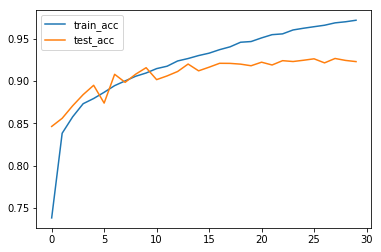

In [43]:
plt.plot(history.epoch, history.history.get('acc'), label='train_acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='test_acc')
plt.legend()

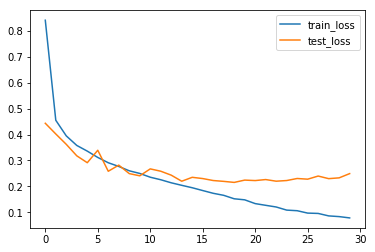

In [44]:
plt.plot(history.epoch, history.history.get('loss'), label='train_loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='test_loss')
plt.legend()